In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Consumer_Complaints.csv', low_memory=False)

In [4]:
df.head()

Date received                                            Product  \
0    08/09/2019                                    Debt collection   
1    08/09/2019  Credit reporting, credit repair services, or o...   
2    08/09/2019                        Credit card or prepaid card   
3    08/09/2019                                       Student loan   
4    08/09/2019  Credit reporting, credit repair services, or o...   

                      Sub-product                                 Issue  \
0                       Auto debt     Attempts to collect debt not owed   
1                Credit reporting  Incorrect information on your report   
2    General-purpose prepaid card   Problem with a purchase or transfer   
3  Federal student loan servicing  Incorrect information on your report   
4                Credit reporting  Incorrect information on your report   

                                           Sub-issue  \
0                  Debt was result of identity theft   
1                           Account status incorrect   
2  Card company isn't resolving a dispute about a...   
3                      Account information incorrect   
4                     Personal information incorrect   

  Consumer complaint narrative  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   

                             Company public response  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Company believes it acted appropriately as aut...   
4  Company believes it acted appropriately as aut...   

                                        Company State ZIP code Tags  \
0                     NAVY FEDERAL CREDIT UNION    FL    34746  NaN   
1                 Diversified Consultants, Inc.    GA    31021  NaN   
2                                    SQUARE INC    MD    20772  NaN   
3  NEW MEXICO EDUCATIONAL ASSISTANCE FOUNDATION    NM    87111  NaN   
4                           The CMI Group, Inc.    CA    92571  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web           08/09/2019   
1                        NaN           Web           08/09/2019   
2                        NaN           Web           08/09/2019   
3       Consent not provided           Web           08/09/2019   
4       Consent not provided           Web           08/09/2019   

      Company response to consumer Timely response? Consumer disputed?  \
0                      In progress              Yes                NaN   
1                      In progress              Yes                NaN   
2                      In progress              Yes                NaN   
3          Closed with explanation              Yes                NaN   
4  Closed with non-monetary relief              Yes                NaN   

   Complaint ID  
0       3335426  
1       3335010  
2       3335622  
3       3335326  
4       3335509

In [5]:
df['Product'].factorize()

(array([ 0,  1,  2, ..., 10,  4, 10]), Index(['Debt collection',
        'Credit reporting, credit repair services, or other personal consumer reports',
        'Credit card or prepaid card', 'Student loan', 'Mortgage',
        'Vehicle loan or lease',
        'Money transfer, virtual currency, or money service',
        'Checking or savings account',
        'Payday loan, title loan, or personal loan', 'Credit reporting',
        'Credit card', 'Bank account or service', 'Consumer Loan',
        'Prepaid card', 'Other financial service', 'Money transfers',
        'Payday loan', 'Virtual currency'],
       dtype='object'))

In [6]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

Product  \
6230   Credit reporting, credit repair services, or o...   
12812                        Credit card or prepaid card   
12836  Credit reporting, credit repair services, or o...   
13743                                    Debt collection   
14011  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  category_id  
6230   I pulled my XXXX  credit report and found Firs...            0  
12812  I am on social security XXXX and I understand ...            1  
12836  My XXXX account is being reported late 6 times...            0  
13743  A few weeks ago I started to care for my credi...            2  
14011  Two creditors agreed to remove erroneous negat...            0

In [7]:
category_id_df

Product  category_id
6230    Credit reporting, credit repair services, or o...            0
12812                         Credit card or prepaid card            1
13743                                     Debt collection            2
17483           Payday loan, title loan, or personal loan            3
19816                         Checking or savings account            4
21414                                            Mortgage            5
28655                                        Student loan            6
33877   Money transfer, virtual currency, or money ser...            7
35109                               Vehicle loan or lease            8
585003                                   Credit reporting            9
585004                                        Credit card           10
585009                            Bank account or service           11
585042                                       Prepaid card           12
585090                                      Consumer Loan           13
585115                                    Money transfers           14
585454                                        Payday loan           15
586397                            Other financial service           16
597679                                   Virtual currency           17

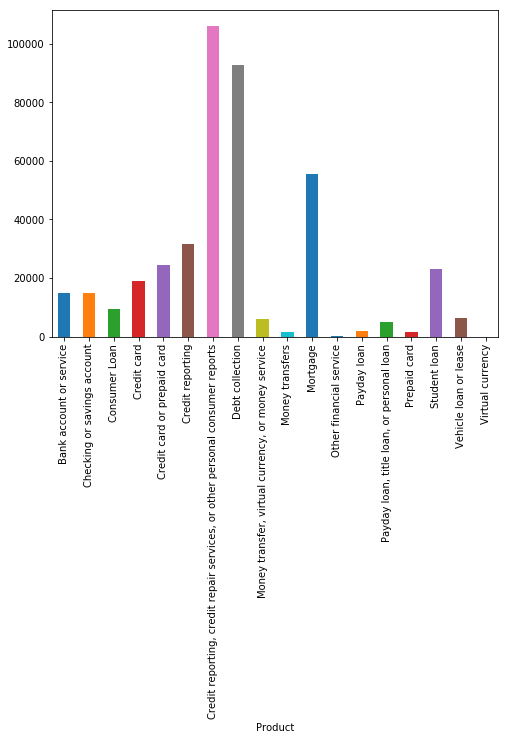

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
labels = df.category_id
features.shape

(414276, 770699)

In [10]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. savings account
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. chrysler capital
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. manner soon
. disputed resolve
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. mistakes appear


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [12]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [14]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

Product                       Consumer_complaint_narrative  \
833708  Debt collection  This company refuses to provide me verificatio...   

        category_id  
833708            2

In [15]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [16]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

Product                       Consumer_complaint_narrative  \
799281  Credit reporting  I am disputing the inaccurate information the ...   

        category_id  
799281            9

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


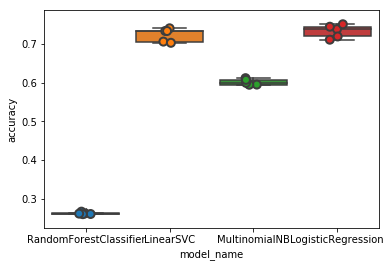

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [18]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.723465
LogisticRegression        0.732992
MultinomialNB             0.601549
RandomForestClassifier    0.261661
Name: accuracy, dtype: float64

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


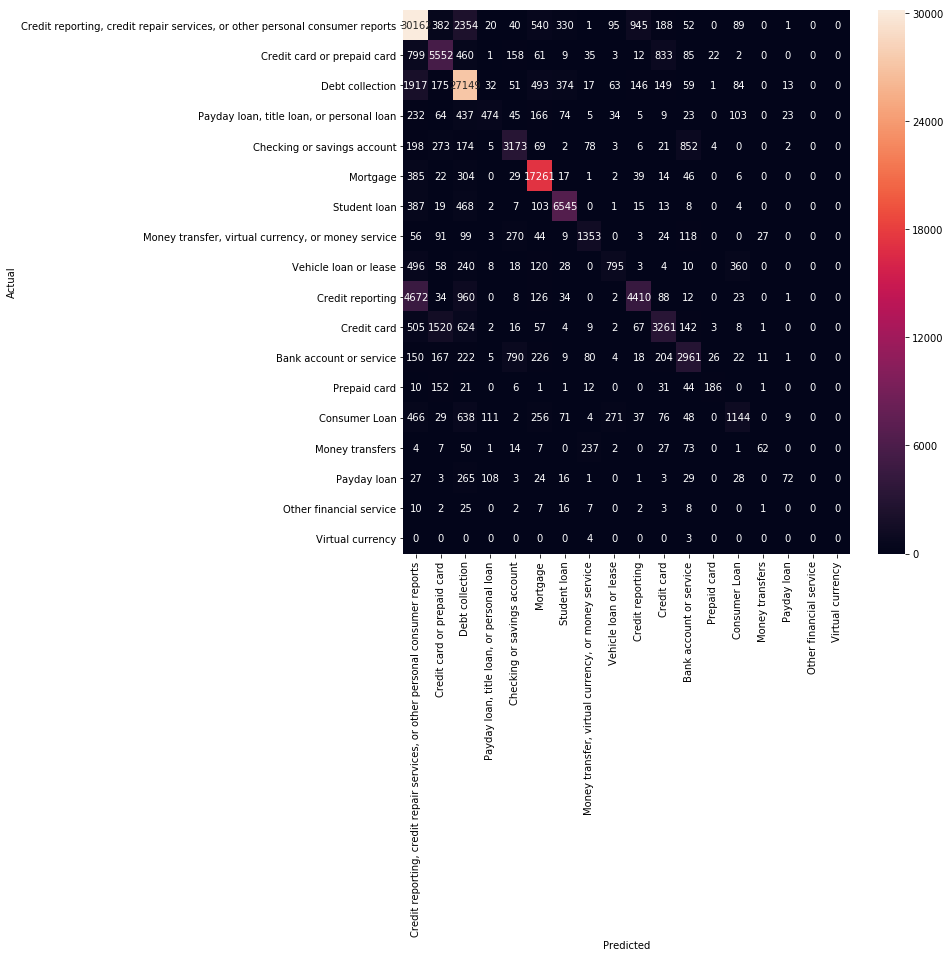

In [23]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 799 examples.


Product  \
62752   Credit card or prepaid card   
99723   Credit card or prepaid card   
246579  Credit card or prepaid card   
565706  Credit card or prepaid card   
223757  Credit card or prepaid card   
396989  Credit card or prepaid card   
64632   Credit card or prepaid card   
200862  Credit card or prepaid card   
418351  Credit card or prepaid card   
407320  Credit card or prepaid card   
436156  Credit card or prepaid card   
47810   Credit card or prepaid card   
524739  Credit card or prepaid card   
246540  Credit card or prepaid card   
79074   Credit card or prepaid card   
140385  Credit card or prepaid card   
181831  Credit card or prepaid card   
131516  Credit card or prepaid card   
304899  Credit card or prepaid card   
329864  Credit card or prepaid card   
354583  Credit card or prepaid card   
452115  Credit card or prepaid card   
539735  Credit card or prepaid card   
70219   Credit card or prepaid card   
357518  Credit card or prepaid card   
64060   Credit card or prepaid card   
107316  Credit card or prepaid card   
265545  Credit card or prepaid card   
233657  Credit card or prepaid card   
242646  Credit card or prepaid card   
...                             ...   
240199  Credit card or prepaid card   
479174  Credit card or prepaid card   
137247  Credit card or prepaid card   
547785  Credit card or prepaid card   
464300  Credit card or prepaid card   
154468  Credit card or prepaid card   
71778   Credit card or prepaid card   
146007  Credit card or prepaid card   
85763   Credit card or prepaid card   
62729   Credit card or prepaid card   
405385  Credit card or prepaid card   
298453  Credit card or prepaid card   
295240  Credit card or prepaid card   
111209  Credit card or prepaid card   
240366  Credit card or prepaid card   
217882  Credit card or prepaid card   
242408  Credit card or prepaid card   
537550  Credit card or prepaid card   
336721  Credit card or prepaid card   
321481  Credit card or prepaid card   
283249  Credit card or prepaid card   
238523  Credit card or prepaid card   
436543  Credit card or prepaid card   
228496  Credit card or prepaid card   
401393  Credit card or prepaid card   
196748  Credit card or prepaid card   
560133  Credit card or prepaid card   
504838  Credit card or prepaid card   
385591  Credit card or prepaid card   
401263  Credit card or prepaid card   

                             Consumer_complaint_narrative  
62752   Dear Barclaycard I received two letters from y...  
99723   On XX/XX/XXXX I received a letter from XXXX XX...  
246579  Between the dates XX/XX/XXXX-XX/XX/XXXX Capito...  
565706  I got a hard inquiry from a company call ed CB...  
223757  I had a Wells Fargo secured card that I paid o...  
396989  I have hard inquiries on my record that I neve...  
64632   when i opened my credit report i saw an offer ...  
200862  I have contacted the XXXX  about Wells Fargo n...  
418351  I contacted Navy Federal several times advisin...  
407320  On my XXXX credit report there exist two hard ...  
436156  Since it only let me select one option when I ...  
47810   On XX/XX/18 I had a hard inquiry from Comenity...  
524739  I previously notified Barclay Bank that I am a...  
246540  Due to some uncontrollable circumstances, I ha...  
79074   Capital One Bank has two 30 day past due for t...  
140385  Barclays Bank Delaware put a fraudulent inquir...  
181831  XX/XX/2018 While checking my credit report, I ...  
131516  Everytime I get ready to use the card it works...  
304899  Yeah, I just got a XXXX 's Prepaid XXXX in the...  
329864  Several years ago, as I understood it, XXXX 's...  
354583  On XX/XX/XXXX I sent a dispute letter to XXXX ...  
452115  At the time of the checkout at XXXX, I was off...  
539735  OnXX/XX/XXXX a BILLING ERROR, letter of valida...  
70219   I had an XXXX XXXX/Synchrony Bank account that...  
357518  I called last year to cancel and pay off all a...  
64060   Credit Account with First National Bank o


'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1917 examples.


Product                       Consumer_complaint_narrative
220745  Debt collection  Loan is from XX/XX/2010, car was returned to c...
217043  Debt collection  I have sent about 3 or 4 letters to all 3 cred...
306019  Debt collection  After the equifax breach there were a lot of f...
368039  Debt collection  Someone took out credit cards in my name with ...
332977  Debt collection  XXXX XXXX XXXX an account that was removed fro...
277829  Debt collection  Recently found out that there was unauthorized...
332476  Debt collection  There was a debt of {$4900.00} from XXXX-XXXX ...
336816  Debt collection  Creditor -XXXX XXXX  Recent Balance - {$1300.0...
788526  Debt collection  XXXX XXXX purchased account # XXXX from Syncb/...
619022  Debt collection  There are 2 accounts which i paid in full ones...
162116  Debt collection  I have a collection from Kings Credit Service ...
420629  Debt collection  I paid XXXX in XX/XX/XXXX for account # XXXX f...
574377  Debt collection                       furnished unverified account
305904  Debt collection  The following individuals have been accessing ...
126775  Debt collection  To whom it may concern - I am being charged il...
881558  Debt collection  I started with disputing with credit bureau be...
141149  Debt collection  I checked my credit report and found an open a...
182368  Debt collection  Sent them a validation letter on XX/XX/2018 an...
355532  Debt collection  XX/XX/2018 made contact with creditor that thi...
59685   Debt collection  After checking my credit score I came across a...
97900   Debt collection  This debt was settled and paif through XXXX XX...
166728  Debt collection  Request Investigation of Credit Inquiry on My ...
205465  Debt collection  I pulled my credit report and noticed that XXX...
393061  Debt collection  I had this credit card with XXXX in XX/XX/XXXX...
411100  Debt collection  Home credit should not be on my credit file .....
428954  Debt collection  XXXX XXXX XXXX, XXXX. XXXX XXXX, XXXX, NC XXXX...
643292  Debt collection  This account is reporting on all XXXX of my cr...
312171  Debt collection  I have been overseas playing XXXX XXXX in XXXX...
785919  Debt collection  I reviewed my credit report and saw a company ...
418983  Debt collection  IC Systems has put a negative mark on my credi...
...                 ...                                                ...
371477  Debt collection  I am writing as a victim of the XX/XX/XXXX XXX...
213831  Debt collection  Ive had multiple breaches of information and I...
910418  Debt collection  I have played all my collection accounts off h...
671333  Debt collection  I sent a letter requesting removal/deletion of...
88683   Debt collection  Good Evening or Good Morning! Listen, Im not s...
355160  Debt collection  On XX/XX/2018 I sent Certified Mail and Return...
362735  Debt collection  Ruining my credit score! Received a letter in ...
132375  Debt collection  I was alerted by XXXX the Midland Funding LLC ...
588341  Debt collection  This bill was paid a while ago.This should not...
57614   Debt collection  On XX/XX/2018, I have proof that a payment was...
512314  Debt collection  Upon checking my recent credit scores, I notic...
244081  Debt collection  I was dating my boyfriend for 15 years. I am a...
126606  Debt collection  I've contacted Simon Agency Inc regarding the ...
54700   Debt collection  I am contacting you about the compromising of ...
888547  Debt collection  hello my name is XXXX XXXX and I am having an ...
368642  Debt collection  On XX/XX/XXXX a debt from XXXX being handled b...
196938  Debt collection  Im a victim of identity tiff someone got my ca...
676192  Debt collection  I have sent a letter to this company. They are...
694729  Debt collection  They put it on my credit report and never cont...
582055  Debt collection  I have paid this  XXXX  account on  XXXX   XXX...
161276  Debt collection  XXXX XXXX - XXXX XXXX XXXX XXXX - Address XXXX...
392686  Debt collection  XXXX XXXX XXXX X


'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 232 examples.


Product  \
367904  Payday loan, title loan, or personal loan   
251460  Payday loan, title loan, or personal loan   
305221  Payday loan, title loan, or personal loan   
394040  Payday loan, title loan, or personal loan   
517733  Payday loan, title loan, or personal loan   
568782  Payday loan, title loan, or personal loan   
333107  Payday loan, title loan, or personal loan   
484888  Payday loan, title loan, or personal loan   
345631  Payday loan, title loan, or personal loan   
573788  Payday loan, title loan, or personal loan   
562686  Payday loan, title loan, or personal loan   
427891  Payday loan, title loan, or personal loan   
213721  Payday loan, title loan, or personal loan   
79415   Payday loan, title loan, or personal loan   
214968  Payday loan, title loan, or personal loan   
296097  Payday loan, title loan, or personal loan   
344582  Payday loan, title loan, or personal loan   
97138   Payday loan, title loan, or personal loan   
135261  Payday loan, title loan, or personal loan   
93423   Payday loan, title loan, or personal loan   
556335  Payday loan, title loan, or personal loan   
508353  Payday loan, title loan, or personal loan   
563017  Payday loan, title loan, or personal loan   
547017  Payday loan, title loan, or personal loan   
401742  Payday loan, title loan, or personal loan   
75895   Payday loan, title loan, or personal loan   
145545  Payday loan, title loan, or personal loan   
269800  Payday loan, title loan, or personal loan   
396180  Payday loan, title loan, or personal loan   
167552  Payday loan, title loan, or personal loan   
...                                           ...   
199737  Payday loan, title loan, or personal loan   
431673  Payday loan, title loan, or personal loan   
68074   Payday loan, title loan, or personal loan   
203261  Payday loan, title loan, or personal loan   
478110  Payday loan, title loan, or personal loan   
68798   Payday loan, title loan, or personal loan   
111009  Payday loan, title loan, or personal loan   
382402  Payday loan, title loan, or personal loan   
420174  Payday loan, title loan, or personal loan   
412931  Payday loan, title loan, or personal loan   
384496  Payday loan, title loan, or personal loan   
464442  Payday loan, title loan, or personal loan   
90313   Payday loan, title loan, or personal loan   
50944   Payday loan, title loan, or personal loan   
163246  Payday loan, title loan, or personal loan   
366217  Payday loan, title loan, or personal loan   
554937  Payday loan, title loan, or personal loan   
120527  Payday loan, title loan, or personal loan   
381503  Payday loan, title loan, or personal loan   
437325  Payday loan, title loan, or personal loan   
147674  Payday loan, title loan, or personal loan   
402561  Payday loan, title loan, or personal loan   
225095  Payday loan, title loan, or personal loan   
114242  Payday loan, title loan, or personal loan   
95227   Payday loan, title loan, or personal loan   
319269  Payday loan, title loan, or personal loan   
415514  Payday loan, title loan, or personal loan   
558537  Payday loan, title loan, or personal loan   
267617  Payday loan, title loan, or personal loan   
333554  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
367904  The problem I am having is the company wants t...  
251460  I am emailing you so you can please have the c...  
305221  I have a loan with XXXX. I have always made my...  
394040  Company communication practices are not fair. ...  
517733  Will first of all I tryed getting a loans but ...  
568782  The amount of the loan was over  XXXX . Accord...  
333107  I would like you to stop banks which are suppo...  
484888  In XX/XX/XXXX, I contacted the 3 credit bureau...  
345631  I was a victim of identity theft with multiple...  
573788  We received a confirmation letter on  XXXX / X...  
562686  I just applied for an application online & it ...  
427891  Note : This is separate fro


'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 198 examples.


Product  \
206208  Checking or savings account   
229880  Checking or savings account   
284098  Checking or savings account   
571341  Checking or savings account   
278508  Checking or savings account   
463779  Checking or savings account   
243683  Checking or savings account   
82936   Checking or savings account   
499186  Checking or savings account   
227582  Checking or savings account   
474294  Checking or savings account   
372818  Checking or savings account   
546844  Checking or savings account   
169438  Checking or savings account   
385798  Checking or savings account   
360211  Checking or savings account   
504691  Checking or savings account   
525240  Checking or savings account   
521884  Checking or savings account   
350186  Checking or savings account   
138549  Checking or savings account   
389157  Checking or savings account   
345342  Checking or savings account   
67453   Checking or savings account   
385799  Checking or savings account   
376077  Checking or savings account   
493577  Checking or savings account   
436744  Checking or savings account   
188208  Checking or savings account   
518844  Checking or savings account   
...                             ...   
106634  Checking or savings account   
206115  Checking or savings account   
170779  Checking or savings account   
546485  Checking or savings account   
412177  Checking or savings account   
223207  Checking or savings account   
489524  Checking or savings account   
85453   Checking or savings account   
398164  Checking or savings account   
441488  Checking or savings account   
355762  Checking or savings account   
242259  Checking or savings account   
248261  Checking or savings account   
547053  Checking or savings account   
365930  Checking or savings account   
139531  Checking or savings account   
447182  Checking or savings account   
55528   Checking or savings account   
355117  Checking or savings account   
514184  Checking or savings account   
471042  Checking or savings account   
71268   Checking or savings account   
554781  Checking or savings account   
308228  Checking or savings account   
395921  Checking or savings account   
224679  Checking or savings account   
252418  Checking or savings account   
544490  Checking or savings account   
287286  Checking or savings account   
510113  Checking or savings account   

                             Consumer_complaint_narrative  
206208  On XX/XX/2018, a charge for XXXX as posted aga...  
229880  -XX/XX/XXXX : was supposed to get a refund of ...  
284098  First complaint filed with BB & T Bank not ans...  
571341  I have paid an account that was closed due to ...  
278508  Tried to change account involving XXXX XXXX. A...  
463779  Ok, twice I got time out ... very upset ... yo...  
243683  Early Warning Services is reporting inaccurate...  
82936   Hello How do I dispute a Hard Inquires. Someon...  
499186  I wrote a letter to FDIC which was forwarded t...  
227582  Back in XX/XX/2012Bank of America put me in XX...  
474294  on XX/XX/XXXX I attempted to make a purchase f...  
372818  I AM WRITING TO DISPUTE AN ACCOUNTS FRADULENTL...  
546844  My balance is now accurate in my   XXXX   XXXX...  
169438  i was a victim of a scam tats why bank of amer...  
385798  I went to the XXXX XXXX XXXX on XX/XX/XXXX and...  
360211  Greetings, Citibank has been reporting to XXXX...  
504691  On XX/XX/2015 XXXX XXXX XXXX force closed my c...  
525240  I use XXXX XXXX to help budget but PNC does no...  
521884  I opened an online account with USAA in order ...  
350186  Banks are requiring that their customers who w...  
138549  XXXX, XXXXunpaid,XX/XX/2017, suspected fraud a...  
389157  In XX/XX/XXXXmy wife and I obtained a divorce....  
345342  A couple use ago my information was stolen and...  
67453   On Wednesday XXXX XXXX, I wasn't able to acces...  
385799  check was cashed fraudulent and i have the proof.  
376077  DEAR SIRS DIRECTOR AND RESEARCHERS CFPB U


'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 385 examples.


Product                       Consumer_complaint_narrative
655483  Mortgage  I did n't tell this Mortgage company to run my...
587598  Mortgage  Let me say first that I have already checked a...
395903  Mortgage  I filed complaint XXXX against XXXX XXXX XXXXX...
967960  Mortgage  G.E. Retail Bank place in collections # XXXX a...
439781  Mortgage  Because of non-cooperation from XXXX XXXX seni...
204307  Mortgage  My name is XXXX XXXX and I have been working o...
763562  Mortgage  WELLS FARGO IS WRONGFULLY REPORTING 30 DAY LAT...
862061  Mortgage  XX/XX/XXXXTo Whom It May ConcernRe : Loan # XX...
790035  Mortgage  Ocwen is reporting an old large balance for ye...
76719   Mortgage  In XX/XX/2019, my mortgage account was acquire...
287924  Mortgage  Mr Cooper letter dated XX/XX/XXXX says does no...
471944  Mortgage  servicer never applied payments properly from ...
426314  Mortgage  I recently was reviewing my credit report and ...
885110  Mortgage  After repeated attempts to collaborate with bo...
663778  Mortgage  I have filed a complaint in regards Nationwide...
262457  Mortgage  I have a loan with WFHM. I have always made my...
330262  Mortgage  My ex husband filed for Chapter XXXX bankruptc...
765182  Mortgage  SunTrust mortgage had given me a negative cred...
972210  Mortgage  I have a negative item on my credit report fro...
717768  Mortgage  Ocwen continues to report XXXX different mortg...
863929  Mortgage  I am writing you again for the XXXX time becau...
922944  Mortgage  This is a copy of a letter that was sent to We...
810239  Mortgage  Case number : XXXX Filed XXXX/XXXX/XXXX I fill...
91575   Mortgage  To whom it may concern, on XX/XX/XXXX I made a...
531633  Mortgage  Bank of america is not acting in good faith, a...
682125  Mortgage  My loan was showing inaccurate from Carrington...
807532  Mortgage  The mortgage company sent me a letter Dated XX...
678310  Mortgage  Sunwest Mortgage has maliciously reported my m...
250089  Mortgage  Late payment In XX/XX/XXXX of county taxes tha...
191325  Mortgage  MB Financial maintains two payments were 30 da...
...          ...                                                ...
144709  Mortgage  My wife was laid off recently so weve been run...
535604  Mortgage  In XX/XX/2017, Chase called me and told me I w...
926697  Mortgage  The credit bureaus are now limiting how and wh...
397862  Mortgage  Since XXXX XXXX 2017 my family and I have been...
888079  Mortgage  Saxon Mortgage is inaccurately reporting the m...
803816  Mortgage  This complaint is in follow-up to Complaint # ...
535895  Mortgage  Please see complaint number XXXX which was clo...
116918  Mortgage  In XXXX of 2013 my husband and I went through ...
943809  Mortgage  SLS refuses to give me the proper XX/XX/XXXX X...
915030  Mortgage  This is a new Care ( THIS IS A NEW CASE ) Back...
822047  Mortgage  I have had an account with the company ( OneWe...
894144  Mortgage  We had a mortgage loan reported on credit repo...
76885   Mortgage  In XX/XX/2019 I was not able to make my paymen...
326903  Mortgage  I filed chapter XXXX bankruptcy in XXXX it was...
258271  Mortgage  I have a loan with SETERU INC. I have always m...
756544  Mortgage  US Bank Mortgage is refusing to report my acco...
736482  Mortgage  XX/XX/2014 I completed a short sale of my home...
696398  Mortgage  They are continuously reporting me delinquent ...
752864  Mortgage  Dear Sir or Madam, I am writing to file a comp...
110551  Mortgage  In XX/XX/XXXX I filed for chapter XXXX bankrup...
271542  Mortgage  I am a XXXX Veteran and I trusted XXXX XXXX XX...
78124   Mortgage  On XX/XX/XXXX at XXXX I paid my mortgage onlin...
134394  Mortgage  I have been trying to get my Mortgage company ...
945152  Mortgage  Green tree has contacted credit bureau to chan...
164804  Mortgage  We financed our thru American Financing in XX/...
561341  Mortgage  After looking over my credit report, I noticed...
113706  Mortgage  My issue is with my USAA Mortgage showing late.


'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 387 examples.


Product                       Consumer_complaint_narrative
466873  Student loan  When applying for my student loan, I was under...
712396  Student loan  I disputed this loan and credit bureaus remove...
146336  Student loan  Great Lakes has my repay date wrong and it nee...
173282  Student loan  I submitted a check in the amount of {$160.00}...
269532  Student loan  Student Account balance and High APR on studen...
119779  Student loan  the account shows missing payments and delinqu...
725112  Student loan  I took out a XXXX XXXX from XXXX which was the...
324599  Student loan  Nelnet is in violation of FDCPA and negligence...
318291  Student loan  I have 2 issues with this company. # 1. I call...
661045  Student loan  Please review my student loan account because ...
587303  Student loan  This complaint is for a private student loan I...
221681  Student loan  XXXX XXXX  has been increasingly delinquent wi...
252131  Student loan  Discovered that fraudulent student loans were ...
308476  Student loan  No information or proof of signature regarding...
238386  Student loan  I received a bill that stated that my forbeara...
767605  Student loan  I am trying to resolve a derogatory statement ...
360303  Student loan  I am writing to you, because staff from Navien...
438193  Student loan  I filed a dispute sent through certified mail ...
619812  Student loan  On XXXX separate occasions with fedloan I was ...
220593  Student loan  I have several months that are not being repor...
976757  Student loan  Originally complained about numerous harassing...
566898  Student loan  The two ab ove accounts where removed off all ...
555730  Student loan  I received a credit monitoring notice stating ...
531806  Student loan  This company broke the terms of the accord set...
607387  Student loan  This company is damaging my credit by reportin...
327364  Student loan  I went to XXXX XXXX  college in XX/XX/1995. Th...
977906  Student loan  XX/XX/XXXX, I filed a complaint against the NJ...
646553  Student loan  Upon looking into my credit reports, I noticed...
275198  Student loan  I have a loan with XXXX XXXX/NAVI. I have alwa...
625108  Student loan  FedLoan is failing to follow the FCRA section ...
...              ...                                                ...
230027  Student loan  Apparently someone opened two student loans wi...
272466  Student loan  My son, XXXX XXXX, the borrower ( I am the co-...
822839  Student loan  Despite my previous mail correspondence, Mohel...
529974  Student loan  the company at the time said that I need to si...
177770  Student loan  XXXX XXXX  XXXX XXXX XXXXXXXX servicing unit s...
440803  Student loan  To Whom It May Concern : This letter is in res...
805754  Student loan  On XXXX/XXXX/2014, I was granted and approved ...
643900  Student loan  The information they gave me was very wrong an...
83163   Student loan  I have the monthly payment set up on autopay, ...
369727  Student loan  Ive sent numerous emails and messages after XX...
403374  Student loan  In XX/XX/XXXX I was notified I was in default ...
609510  Student loan  After reviewing my credit report i noticed acc...
176881  Student loan  I have sent 3 letters to the company that is r...
746169  Student loan  I had a total of XXXX student loans with XXXX ...
372671  Student loan  This is for XXXX XXXX XXXX, XXXX  XXXX XXXX XX...
574799  Student loan  hello, please send me a copy of the signed reh...
555802  Student loan  My payment was due and I went online to the  S...
296183  Student loan  I have a loan with XXXX. I have always made my...
282268  Student loan  In XX/XX/XXXX my husband applied for a student...
493213  Student loan  I have multiple student loans with navient, bu...
279318  Student loan  Today on XX/XX/2018 Ive received a text saying...
89065   Student loan  MyFedLoan 's site has been down for a week as ...
202324  Student loan  I have contacted XXXX XXXX on multiple occasio...
150459  Student loan  Throughout the week of XX/XX/20


'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 56 examples.


Product  \
215809  Money transfer, virtual currency, or money ser...   
425266  Money transfer, virtual currency, or money ser...   
525116  Money transfer, virtual currency, or money ser...   
73769   Money transfer, virtual currency, or money ser...   
366705  Money transfer, virtual currency, or money ser...   
410890  Money transfer, virtual currency, or money ser...   
116736  Money transfer, virtual currency, or money ser...   
545990  Money transfer, virtual currency, or money ser...   
258012  Money transfer, virtual currency, or money ser...   
437747  Money transfer, virtual currency, or money ser...   
450046  Money transfer, virtual currency, or money ser...   
293284  Money transfer, virtual currency, or money ser...   
500036  Money transfer, virtual currency, or money ser...   
211756  Money transfer, virtual currency, or money ser...   
428689  Money transfer, virtual currency, or money ser...   
403274  Money transfer, virtual currency, or money ser...   
100540  Money transfer, virtual currency, or money ser...   
293874  Money transfer, virtual currency, or money ser...   
123909  Money transfer, virtual currency, or money ser...   
130420  Money transfer, virtual currency, or money ser...   
190030  Money transfer, virtual currency, or money ser...   
542498  Money transfer, virtual currency, or money ser...   
507103  Money transfer, virtual currency, or money ser...   
79578   Money transfer, virtual currency, or money ser...   
351754  Money transfer, virtual currency, or money ser...   
551547  Money transfer, virtual currency, or money ser...   
410106  Money transfer, virtual currency, or money ser...   
121711  Money transfer, virtual currency, or money ser...   
524021  Money transfer, virtual currency, or money ser...   
340767  Money transfer, virtual currency, or money ser...   
427633  Money transfer, virtual currency, or money ser...   
311375  Money transfer, virtual currency, or money ser...   
355460  Money transfer, virtual currency, or money ser...   
121365  Money transfer, virtual currency, or money ser...   
64083   Money transfer, virtual currency, or money ser...   
175929  Money transfer, virtual currency, or money ser...   
373314  Money transfer, virtual currency, or money ser...   
329501  Money transfer, virtual currency, or money ser...   
291325  Money transfer, virtual currency, or money ser...   
294466  Money transfer, virtual currency, or money ser...   
138754  Money transfer, virtual currency, or money ser...   
122192  Money transfer, virtual currency, or money ser...   
410543  Money transfer, virtual currency, or money ser...   
330507  Money transfer, virtual currency, or money ser...   
226221  Money transfer, virtual currency, or money ser...   
206068  Money transfer, virtual currency, or money ser...   
197453  Money transfer, virtual currency, or money ser...   
259387  Money transfer, virtual currency, or money ser...   
240736  Money transfer, virtual currency, or money ser...   
424301  Money transfer, virtual currency, or money ser...   
580337  Money transfer, virtual currency, or money ser...   
417863  Money transfer, virtual currency, or money ser...   
322085  Money transfer, virtual currency, or money ser...   
126185  Money transfer, virtual currency, or money ser...   
523477  Money transfer, virtual currency, or money ser...   
556027  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
215809  My XXXX XXXX XXXX XXXX failed to transfer {>= ...  
425266  XXXX promised refunds of over {$140.00} for fr...  
525116  My name is XXXX XXXX AND I HAVE SENT COMMUNICA...  
73769   Ive been using Xoom for several years. In my r...  
366705  I never used this account. There should never ...  
410890  Nothing really happing I 'm a really good hard...  
116736  I noticed three unauthorized transactions on m...  
545990  I successfully submitted a complaint to cfpb o...  
258012  My moneygram online acco


'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 496 examples.


Product  \
297066  Vehicle loan or lease   
315160  Vehicle loan or lease   
46262   Vehicle loan or lease   
233416  Vehicle loan or lease   
259853  Vehicle loan or lease   
85494   Vehicle loan or lease   
462852  Vehicle loan or lease   
235205  Vehicle loan or lease   
428455  Vehicle loan or lease   
158749  Vehicle loan or lease   
268232  Vehicle loan or lease   
190191  Vehicle loan or lease   
338101  Vehicle loan or lease   
515539  Vehicle loan or lease   
209486  Vehicle loan or lease   
260233  Vehicle loan or lease   
296736  Vehicle loan or lease   
431174  Vehicle loan or lease   
391474  Vehicle loan or lease   
446145  Vehicle loan or lease   
303143  Vehicle loan or lease   
535351  Vehicle loan or lease   
193837  Vehicle loan or lease   
77995   Vehicle loan or lease   
45320   Vehicle loan or lease   
174140  Vehicle loan or lease   
506963  Vehicle loan or lease   
412067  Vehicle loan or lease   
256311  Vehicle loan or lease   
557290  Vehicle loan or lease   
...                       ...   
55482   Vehicle loan or lease   
233910  Vehicle loan or lease   
381200  Vehicle loan or lease   
342944  Vehicle loan or lease   
511621  Vehicle loan or lease   
450452  Vehicle loan or lease   
115361  Vehicle loan or lease   
272704  Vehicle loan or lease   
351349  Vehicle loan or lease   
144817  Vehicle loan or lease   
359816  Vehicle loan or lease   
290706  Vehicle loan or lease   
470532  Vehicle loan or lease   
532616  Vehicle loan or lease   
207169  Vehicle loan or lease   
157631  Vehicle loan or lease   
299189  Vehicle loan or lease   
60902   Vehicle loan or lease   
68998   Vehicle loan or lease   
200362  Vehicle loan or lease   
144733  Vehicle loan or lease   
403450  Vehicle loan or lease   
230208  Vehicle loan or lease   
469720  Vehicle loan or lease   
378272  Vehicle loan or lease   
178965  Vehicle loan or lease   
292400  Vehicle loan or lease   
458568  Vehicle loan or lease   
93042   Vehicle loan or lease   
55608   Vehicle loan or lease   

                             Consumer_complaint_narrative  
297066  On XX/XX/2017, I verbally authorized a telepho...  
315160  GM Financial was paid in full in XX/XX/2018. I...  
46262   The early part of XXXX GM financial mailed out...  
233416  I purchased a XXXX XXXX in XX/XX/XXXX and paid...  
259853  In XX/XX/2013 my car was rear ended and totale...  
85494   XX/XX/XXXX I was behind I paid high late fees ...  
462852  I applied for a loan on XXXX with XXXX, a divi...  
235205  I discovered in XX/XX/2018 I was reported as h...  
428455  XXXX XXXX, XXXX I received a call from XXXX XX...  
158749  On XX/XX/XXXX I applied for an auto loan from ...  
268232  I had filled a resent complaint against Bridge...  
190191  I traded my car in on XX/XX/2018 at XXXX XXXX ...  
338101  GM Financial is incorrectly reporting this acc...  
515539  Ally Financial is reporting an account on my c...  
209486  I had an auto loan with XXXX XXXX. The loan wa...  
260233  I disputed this account with XXXX  on XX/XX/20...  
296736  Around XX/XX/2015, I notified XXXX XXXX XXXX t...  
431174  We are looking to buy a new car. Two companies...  
391474  I purchased a XX/XX/XXXXXXXX XXXX  account # X...  
446145  I pulled my credit reports and noticed I am a ...  
303143  Security National was included in my bankruptc...  
535351  The vehicle was repossessed XXXX XXXX. Accordi...  
193837  BMW financial service is very unprofessional a...  
77995   A loan payment was submitted online on XX/XX/2...  
45320   My information was used to obtain two differen...  
174140  Please note that Chase Auto Finance has report...  
506963  I requested a Payment History on my vehicle th...  
412067  In XX/XX/XXXX had an accident XXXX XXXX XXXX f...  
256311  We bought a new car on XX/XX/18. We are co-own...  
557290  I made a payment on this account X/XX/17 which...  
...                                                   ...  
55482   I am contacting you about the compromising of .


'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 4672 examples.


Product                       Consumer_complaint_narrative
931087  Credit reporting  I have information that is on my credit report...
870349  Credit reporting  Addresses and accounts on all credit reports a...
835267  Credit reporting  I have disputed with Transunion to immediately...
605244  Credit reporting  Experian reporting of XXXX XXXX reflects a for...
700003  Credit reporting  RE : Credit Inquiries Equifax Credit Report Th...
859019  Credit reporting  I received a credit report from Equifax which ...
702497  Credit reporting  I filed a complaint about unauthorized inquiri...
679580  Credit reporting  I have disputed this account twice with the cr...
930035  Credit reporting  When a corporation, bank or any institute chec...
607166  Credit reporting  Around XX/XX/2017, a company quicken loans cal...
661411  Credit reporting  I placed a security freeze on my account a yea...
798623  Credit reporting  I never opened a XXXX XXXX, they say they can ...
698141  Credit reporting  I have been disputing inquiry 's on my credit ...
825728  Credit reporting  This is my second compliant. I keep getting st...
802873  Credit reporting  I receive my XXXX and XXXX scores for free thr...
934144  Credit reporting  I SUBMITTED TO TRANSUNION 3 TIMES AND THEY ARE...
978432  Credit reporting  XXXX XXXX Services is currently reporting a " ...
764330  Credit reporting  Ok my name is XXXX I 'm not XXXX that 's my si...
861698  Credit reporting  XXXX XXXX XXXX XXXX XXXX XXXX, XXXX . # XXXX X...
823078  Credit reporting  On XXXX XXXX, 2016, XXXX XXXX pulled my credit...
713325  Credit reporting  I 've disputed these items with Experian on se...
917782  Credit reporting  XXXX XXXX XXXX has a debt listed on my credit ...
880997  Credit reporting  A XXXX card account was opened fraudulently in...
720303  Credit reporting  i have so many credit inquiries on my reports ...
619772  Credit reporting  Experian credit reporting services is showing ...
938676  Credit reporting  XXXX XXXX reports my loan in default but in fa...
838822  Credit reporting  XXXX is illegally reporting on my credit, whic...
817795  Credit reporting  I have a problem with XXXX and Experian they b...
949149  Credit reporting  Bought a car in XX/XX/XXXX, totaled it XXXX .....
967811  Credit reporting  This complaint is of a general nature and impa...
...                  ...                                                ...
949800  Credit reporting  Attached to this complaint are XXXX pages:1. S...
899708  Credit reporting  There was a discrepancy in the family as to wh...
864961  Credit reporting  Per the previous response to the CFPB, Experia...
675444  Credit reporting  Experian is reporting information on my credit...
689203  Credit reporting  On XX/XX/2016, I sent a letter to Experian com...
589757  Credit reporting  Submitted dispute to equifax about unauthorize...
882140  Credit reporting  According to the Fair Credit Reporting Act ( F...
975391  Credit reporting  I paid my bill in full for {$240.00} to XXXX X...
789206  Credit reporting  They have had my accounts in dispute for three...
709956  Credit reporting  I am stationed overseas and I 'm trying to obt...
776928  Credit reporting  TransUnion refuses to update the status of all...
807597  Credit reporting  EXPERIAN refuses to comply. Credit reporting l...
725763  Credit reporting  XXXX XXXX placed a repossession on my credit r...
877473  Credit reporting  I have been fighting with the bureaus for a ye...
713701  Credit reporting  credit agency continue to report " PUBLIC RECO...
626500  Credit reporting  I have contacted Transunion for several years ...
859485  Credit reporting  I need to get a secure alert apparently somebo...
831033  Credit reporting  XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX XXXX ...
781288  Credit reporting  XXXX is illegally reporting my account as late...
965368  Credit reporting  Filed BK in XX/XX/XXXX at this time the law pr...
693527  Credit reporting  Hello, I have a history of on time paym


'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 505 examples.


Product                       Consumer_complaint_narrative
689207  Credit card  ON XX/XX/2013 I OPEN A CREDIT CARD ACCOUNT FNB...
832575  Credit card  Discover credit card. Send me for invitation c...
809246  Credit card  This account has been paid in full but is not ...
848437  Credit card  Hello, I have been a client with Capital One s...
763765  Credit card  Barclay is reporting that I was 60 days late i...
844821  Credit card  I received a 30 day late on my credit report f...
681982  Credit card  I reported the below XXXX items at least 7 tim...
949440  Credit card  While checking my personal credit report, whic...
636868  Credit card  Transunion XXXX showed up on my credit card bi...
711912  Credit card  This company is still reporting a account on m...
675377  Credit card  I keep receiving pre-approved offers in the ma...
846203  Credit card  This bank has no issue placing hard inquiries ...
950382  Credit card  Bank of America is reporting an adverse credit...
755449  Credit card  WFFNATLBNK is not reporting my payments to the...
758654  Credit card  My spouse added me as an authorized user to he...
929227  Credit card  There are several inquiries on my credit burea...
881371  Credit card  I called the Navy Exchange customer service to...
660518  Credit card  I have a hard hit inquiry on my credit reports...
708042  Credit card  I have been review my credit report and came a...
727922  Credit card  I have a {$25000.00} credit card line with Reg...
873250  Credit card  Synchrony Bank is decreasing my credit limits ...
738809  Credit card  I have called several times that they are repo...
723055  Credit card  CAPITAL ONE BANK MADE TWO HARD INQUIRES ON MY ...
863468  Credit card  The accounts XXXX and XXXX are in violation of...
794782  Credit card  I looked at my credit report and seen somethin...
937658  Credit card  I am writing in hopes of clearing up a serious...
864517  Credit card  Chase is current reporting an account on my cr...
632419  Credit card                Account paid as agreed. Never late.
886819  Credit card  RE : Bank Of America Student Credit Card / Tim...
891007  Credit card           Pulled credit report without permission.
...             ...                                                ...
920030  Credit card  I was a victim of identity theft. Someone trie...
796903  Credit card  I went XXXX XXXX military XX/XX/2013. I had an...
782247  Credit card  I have contacted Them at least 4 times to ask ...
845514  Credit card  Please know that I have filed a lawsuit agains...
940824  Credit card  Unauthorized MONTHLY credit inquires for credi...
914295  Credit card  Hello, I have a credit card account with Navy ...
708317  Credit card  XXXX XXXX I received dispute results from XXXX...
824829  Credit card  Mid to late XXXX, I wanted to trade my car in ...
652633  Credit card  My Barclaycard account was closed, but went to...
605559  Credit card  Tidewater finance has been reporting inaccurat...
670441  Credit card  During process of securing a XXXX. constructio...
811916  Credit card  I am a victim of identity theft. We have been ...
725812  Credit card  While I was working part-time between XX/XX/XX...
900336  Credit card   Overlimit fee paid without my consent or opt in.
874602  Credit card  My identity information was used to create a c...
858798  Credit card  Synchrony bank now owns all of my XXXX consume...
835515  Credit card  XXXX/XXXX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...
935582  Credit card  I have reached out to BOA, because the informa...
873306  Credit card  There is an PNC Credit Card account listed on ...
839879  Credit card  XXXX Please take a look at this link above. I ...
960889  Credit card  On XXXX XXXX BankAmerica ( BA ) failed to auto...
633201  Credit card  Hi, This is XXXX XXXX. I hold my Bank of Ameri...
949080  Credit card  While checking my personal credit report, whic...
670638  Credit card  I went ahead and placed an order on Samsclub.c...
842492  Credit card  I filed a Ch. X


'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 150 examples.


Product  \
899499  Bank account or service   
655341  Bank account or service   
928519  Bank account or service   
699599  Bank account or service   
710369  Bank account or service   
942310  Bank account or service   
809622  Bank account or service   
873724  Bank account or service   
784305  Bank account or service   
672617  Bank account or service   
684249  Bank account or service   
825272  Bank account or service   
686548  Bank account or service   
636100  Bank account or service   
666762  Bank account or service   
622263  Bank account or service   
845317  Bank account or service   
617333  Bank account or service   
846457  Bank account or service   
944209  Bank account or service   
701767  Bank account or service   
901521  Bank account or service   
944061  Bank account or service   
732462  Bank account or service   
590237  Bank account or service   
607101  Bank account or service   
922358  Bank account or service   
859804  Bank account or service   
643728  Bank account or service   
780068  Bank account or service   
...                         ...   
730896  Bank account or service   
704327  Bank account or service   
762969  Bank account or service   
598052  Bank account or service   
819644  Bank account or service   
725889  Bank account or service   
642288  Bank account or service   
688911  Bank account or service   
880908  Bank account or service   
951735  Bank account or service   
785034  Bank account or service   
858183  Bank account or service   
823908  Bank account or service   
688679  Bank account or service   
755783  Bank account or service   
965198  Bank account or service   
604170  Bank account or service   
953202  Bank account or service   
870162  Bank account or service   
603821  Bank account or service   
664680  Bank account or service   
768933  Bank account or service   
739173  Bank account or service   
668485  Bank account or service   
759683  Bank account or service   
902454  Bank account or service   
671350  Bank account or service   
666582  Bank account or service   
774572  Bank account or service   
688937  Bank account or service   

                             Consumer_complaint_narrative  
899499  Chase Bank ran an inquiry on my XXXX XXXX and ...  
655341  Chase changed my email and mailing address inf...  
928519  On XX/XX/XXXX, I filed a complaint towards cit...  
699599  XXXX. \nThis is about my personal information ...  
710369  We account was closed randomly without explana...  
942310  I subscribe to a credit monitoring service and...  
809622  A bank ( BoA ) incorrectly listed me as having...  
873724  XX/XX/XXXX I took a personal loan of {$10000.0...  
784305  I was denied the ability to open a bank accoun...  
672617  Wells Fargo reported on my credit report false...  
684249  ON XX/XX/XXXX Lexing Law firm notified me that...  
825272  XX/XX/XXXX, I have decided giving up everythin...  
686548  This is a complaint against USAA for a combina...  
636100  Bank of america had agreed to stop reporting n...  
666762  Equifax has demonstrated an unwillingness to r...  
622263  I recently reviewed my credit report and obser...  
845317  I checked my credit monitoring report via XXXX...  
617333  I have a few clients that deposit monies into ...  
846457  In XXXX, Scottrade admitted that almost XXXX X...  
944209  Prestige Financial Services entered inquiries ...  
701767  I have inquires in my report about back accoun...  
901521  I am a victim of identity theft and my informa...  
944061  Credit Technologies inc improperly an inquiry ...  
732462  PERSONAL INFORMATION AND IDENTIFICATION WAS CO...  
590237  On the date of XX/XX/2017 I sent out a payment...  
607101  I would like to be removed from XXXX. Based on...  
922358  THERE IS A INQUIRE ON MY CREDIT REPORT THAT DO...  
859804  Lately I 've been monitoring my credit report,...  
643728  Sought balance to applicable and prevailing in...  
780068  I have had my accounts repeatedly incorrectly


'Prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


Product                       Consumer_complaint_narrative
888488  Prepaid card  This company, Net Spend sent me a debit card t...
703153  Prepaid card  For inaccurate reporting and failing to proper...
876287  Prepaid card  for weeks my check been delayed late post it '...
588846  Prepaid card  On  XXXX   XXXX ,  XXXX , I contacted Rushcard...
883862  Prepaid card  Rushcard was supposed to do an update Monday X...
853742  Prepaid card  Paypal reported 30 day delinquency against for...
720768  Prepaid card  CITIBANK said I had a " bankruptcy and your ac...
856872  Prepaid card  I tried 3 times with a lot of time to let them...
674867  Prepaid card  XXXX transactions from XXXX on XXXX duplicated...
752604  Prepaid card  Western Union Prepaid XXXX XXXX, has extended ...


'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 466 examples.


Product                       Consumer_complaint_narrative
810382  Consumer Loan  I purchased a Ford XXXX Ranger in XXXX XXXX, f...
663521  Consumer Loan  I filed Chapter XXXX bankruptcy against the co...
644574  Consumer Loan  On XX/XX/2016, I received a letter from Westla...
696978  Consumer Loan  I have a vehicle on my credit that i dont own ...
604036  Consumer Loan  I 've been disputing this for 2 years now. I r...
644634  Consumer Loan  The companies were using a finance company to ...
625041  Consumer Loan  I went to XXXX XX/XX/XXXX to purchase my secon...
664188  Consumer Loan  My issue is with Capital One Auto Finance. My ...
650379  Consumer Loan  I have written to Mid-Atlantic Finance Company...
827531  Consumer Loan  XXXX XXXX XXXX XXXX XXXX # XXXX XXXX VA XXXX X...
678196  Consumer Loan  In 2011 I moved to be with my XXXX father, a V...
912313  Consumer Loan  On XXXX/XXXX/15 I went online to research car ...
920308  Consumer Loan  THERE ARE UNKNOW INQUIRES ON MY CREDIT REPORT ...
896840  Consumer Loan  I purchased a vehicle from DriveTime XX/XX/XXX...
882946  Consumer Loan  I pay by phone on the 1st of each month {$260....
665094  Consumer Loan  This complaint is referring to Suntrust Bank a...
744442  Consumer Loan  Gateway Lending is reporting inaccurate and er...
786518  Consumer Loan  BACKGROUND INFORMATION : I took over a 3-year ...
599657  Consumer Loan  Ally is reporting to XXXX, XXXX, and XXXX that...
728483  Consumer Loan  Keybank in XXXX offered me a promising solutio...
813915  Consumer Loan  I had a car loan from capital one auto that wa...
698687  Consumer Loan  There is a car loan on my credit report that d...
606566  Consumer Loan  I applied for XXXX auto loan with your firm an...
923082  Consumer Loan  Visited XXXX XXXX, a subsidiary of First Bank,...
689739  Consumer Loan  I have received an e-mail from a Prosper that ...
586172  Consumer Loan  I have a 60 month loan fro m Carmax f or my   ...
965705  Consumer Loan  I have had an account with DriveTime for over ...
740682  Consumer Loan  Capital One Auto agreed to settle a auto loan ...
957411  Consumer Loan  This letter ( XXXX personal information ) was ...
691991  Consumer Loan  Negligent, the dealer fraudulently signed cont...
...               ...                                                ...
667293  Consumer Loan  My wife and I were shopping for cars. At each ...
844045  Consumer Loan  Went to XXXX XXXX, XXXX, AL on XXXX XXXX, XXXX...
598671  Consumer Loan  I was never notified as the co-applicant that ...
617015  Consumer Loan  I was a cosigner on a vehicle lease. Apparentl...
717044  Consumer Loan  In XXXX, I was informed that a ex-boyfriend wa...
916760  Consumer Loan  Went to XXXX XXXX XXXX in XXXX TN to purchase ...
967735  Consumer Loan  After my auto was totaled, my insurance compan...
950368  Consumer Loan  My husband I bought a car with Drive Time abou...
647976  Consumer Loan  My husband was transitioning into a new job an...
642730  Consumer Loan  Spoke to a rep at Capital one auto finance on ...
896440  Consumer Loan  I have XXXX hard inquiries on my credit report...
600277  Consumer Loan  On XXXX 2017, a letter disputing an item being...
937611  Consumer Loan  I purchased a vehicle XX/XX/XXXX from Drivetim...
611559  Consumer Loan  I XXXX XXXX, phone number:XXXX, address : XXXX...
973182  Consumer Loan  In Reviewing my Credit report I noticed a late...
803767  Consumer Loan  I had paid off my auto loan ( for a XXXX Chrys...
830835  Consumer Loan  Global lending services has refused to remove ...
621589  Consumer Loan  Identity theft someone used my identity to pur...
735771  Consumer Loan  This was a request to send a certified origina...
741205  Consumer Loan  Santander Consumer Loans listed on my credit r...
688169  Consumer Loan  I was unable to work due to health problems an...
660974  Consumer Loan  I opened a loan with CNAC AKA JD BYRIDER in XX...
623677  Consumer Loan  I purchased a car from DriveTime now XXXX in X...


'Payday loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 27 examples.


Product                       Consumer_complaint_narrative
855271  Payday loan  Is this a legitimate organization? I had to pr...
615222  Payday loan  When I applied for the loan the account that I...
770750  Payday loan  I learned in XXXX XXXX that a number of 'pay-d...
959762  Payday loan  I received a copies of my XXXX, XXXX, and XXXX...
656127  Payday loan  I checked my credit report and realized there ...
926599  Payday loan  I had my identity stolen. I had fraud alerts p...
707076  Payday loan  I was a victim of fraud due to information bei...
809706  Payday loan  I need to know about this charge for {$300.00}...
834491  Payday loan  Lender made an unauthorized hard credit inquir...
951311  Payday loan  I got a loan paid it off, and now the company ...
612596  Payday loan  Zoca Loans is not licensed to do business in C...
764874  Payday loan  XXXX XXXX XXXX is the bank I use. I had to get...
737685  Payday loan  Loan was paid of f in 2011 and Lender has not ...
733064  Payday loan  I applied for a loan online and was denied. I ...
852336  Payday loan  Could n't verify my address supposedly after f...
737868  Payday loan  I have been getting payday loans from this com...
677523  Payday loan  Credit Shop said my interest rate was 32.25 %....
883090  Payday loan  I was applying for a loan from mobiloans.com a...
596203  Payday loan  There is a loan on my credit for an account th...
706398  Payday loan  I received XXXX dollars into my account to a p...
980400  Payday loan  Insta Loan, XXXX XXXX Ga, PROMISED me they wou...
621297  Payday loan  On XX/XX/XXXX Allied Collection Services locat...
788029  Payday loan  ROSEBUD LENDING BHL, D.B.A.FIRST PAY LOANS XXX...
791614  Payday loan  Hi, my name is XXXX XXXX : I am filing a compl...
888694  Payday loan  Castlepayday.com charged me 700 % interest wit...
711507  Payday loan  I keep getting calls, texts and emails about c...
884992  Payday loan  Re : Your Application for LendUp 's Credit Ser...


'Other financial service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 10 examples.


Product  \
617072  Other financial service   
642225  Other financial service   
695373  Other financial service   
590399  Other financial service   
663770  Other financial service   
596081  Other financial service   
605590  Other financial service   
601759  Other financial service   
699164  Other financial service   
605059  Other financial service   

                             Consumer_complaint_narrative  
617072  Experian sent a letter stating someone had tri...  
642225  XXXX and a company called Certegy asked for So...  
695373  I was trying to purchase a home, however my cr...  
590399  I was notified by a creditor that my personal ...  
663770  In an understanding of an " integrity and fair...  
596081  i was tolled i would have a credit score of XX...  
605590  I have been locked out of my account with Cred...  
601759  After reading all of the positive reviews from...  
699164  I had a check made out to my son I was attempt...  
605059  Lexington Law advertised that they could help ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 382 examples.


Product  \
423734  Credit reporting, credit repair services, or o...   
310864  Credit reporting, credit repair services, or o...   
60035   Credit reporting, credit repair services, or o...   
181309  Credit reporting, credit repair services, or o...   
554924  Credit reporting, credit repair services, or o...   
499265  Credit reporting, credit repair services, or o...   
567868  Credit reporting, credit repair services, or o...   
246717  Credit reporting, credit repair services, or o...   
215912  Credit reporting, credit repair services, or o...   
244654  Credit reporting, credit repair services, or o...   
479211  Credit reporting, credit repair services, or o...   
316420  Credit reporting, credit repair services, or o...   
448708  Credit reporting, credit repair services, or o...   
264610  Credit reporting, credit repair services, or o...   
271856  Credit reporting, credit repair services, or o...   
98567   Credit reporting, credit repair services, or o...   
221930  Credit reporting, credit repair services, or o...   
503783  Credit reporting, credit repair services, or o...   
311319  Credit reporting, credit repair services, or o...   
527408  Credit reporting, credit repair services, or o...   
147883  Credit reporting, credit repair services, or o...   
456826  Credit reporting, credit repair services, or o...   
420889  Credit reporting, credit repair services, or o...   
84075   Credit reporting, credit repair services, or o...   
451282  Credit reporting, credit repair services, or o...   
267239  Credit reporting, credit repair services, or o...   
371819  Credit reporting, credit repair services, or o...   
275118  Credit reporting, credit repair services, or o...   
271354  Credit reporting, credit repair services, or o...   
89728   Credit reporting, credit repair services, or o...   
...                                                   ...   
379875  Credit reporting, credit repair services, or o...   
314979  Credit reporting, credit repair services, or o...   
356167  Credit reporting, credit repair services, or o...   
157829  Credit reporting, credit repair services, or o...   
238983  Credit reporting, credit repair services, or o...   
216491  Credit reporting, credit repair services, or o...   
331692  Credit reporting, credit repair services, or o...   
523841  Credit reporting, credit repair services, or o...   
299656  Credit reporting, credit repair services, or o...   
513567  Credit reporting, credit repair services, or o...   
92474   Credit reporting, credit repair services, or o...   
423435  Credit reporting, credit repair services, or o...   
324388  Credit reporting, credit repair services, or o...   
313159  Credit reporting, credit repair services, or o...   
183573  Credit reporting, credit repair services, or o...   
444623  Credit reporting, credit repair services, or o...   
526849  Credit reporting, credit repair services, or o...   
218297  Credit reporting, credit repair services, or o...   
278403  Credit reporting, credit repair services, or o...   
102415  Credit reporting, credit repair services, or o...   
287309  Credit reporting, credit repair services, or o...   
381190  Credit reporting, credit repair services, or o...   
86860   Credit reporting, credit repair services, or o...   
565568  Credit reporting, credit repair services, or o...   
424054  Credit reporting, credit repair services, or o...   
122872  Credit reporting, credit repair services, or o...   
438040  Credit reporting, credit repair services, or o...   
522822  Credit reporting, credit repair services, or o...   
98906   Credit reporting, credit repair services, or o...   
348242  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
423734  On XXXX/XXXX/XXXX, I purchased 3 items at a to...  
310864  Around XX/XX/XXXX XXXX changed its credit card...  
60035   I have a Discover card and got an unfair late ...  
181309  XXXX has been non-c


'Debt collection' predicted as 'Credit card or prepaid card' : 175 examples.


Product                       Consumer_complaint_narrative
326786  Debt collection  XX/XX/2017- On this date, I was going to go fo...
248988  Debt collection  XX/XX/2018. \n\nI was contacted by XXXX. XXXX ...
116167  Debt collection  I ordered some things from XXXX previously. Th...
309461  Debt collection  I applied for a TJMaxx credit card at a checko...
231346  Debt collection  On Friday, XX/XX/2018 XXXX XXXX called 6 times...
519943  Debt collection  in XX/XX/XXXX I opened a Capital One card in X...
426874  Debt collection  What happened to me was that last year I bough...
117943  Debt collection  XXXX XXXX Capital One ... \nIts has come to my...
953058  Debt collection  I had tried to pay me credit cards off and fou...
623146  Debt collection  In XX/XX/XXXX My XXXX accounts were transferre...
376378  Debt collection  I owed about {$1100.00} to the company which I...
512099  Debt collection  Bank of America XX/XX/XXXX-closed my Business ...
574424  Debt collection  on  XXXX   XXXX ,  2014  I purchased furniture...
179148  Debt collection  XXXX should refund of {$370.00} due from an ov...
255999  Debt collection  got notice saying im being sued by capital one...
179083  Debt collection  Chase Bank after I noticed there's is fraud pa...
337204  Debt collection  In XX/XX/XXXXand XX/XX/XXXX Lowe's/Synchrony d...
682274  Debt collection  It was a catalog credit card thing that i neve...
133150  Debt collection  On XXXX XXXX, 2019, I received a letter via em...
235163  Debt collection  XX/XX/XXXX XXXX payment. {$1600.00} XX/XX/XXXX...
67179   Debt collection  cabela 's club and capital one of XXXX, north ...
499479  Debt collection  On Wednesday morning, XX/XX/XXXX, I received a...
251249  Debt collection  In XXXX I owed Citi Card XXXX. I was undergoin...
354827  Debt collection  I was extended a credit account by Citibank to...
238078  Debt collection  I am behind one payment of {$25.00} and over m...
478740  Debt collection  once again synchrony has not or refused to und...
236832  Debt collection  I dont use credit cards and have a 800+ credit...
589415  Debt collection  I worked as a manager for a cell phone store. ...
221748  Debt collection  I disputed a charge of {$250.00} which was cha...
460582  Debt collection  I do n't have the original receipt but in eith...
...                 ...                                                ...
216448  Debt collection  Citibank-XXXX XXXXt account. \nBack in XXXX we...
502648  Debt collection  Chase accepted, never refunded my cash, never ...
411086  Debt collection  I have been getting phone calls by various loc...
505561  Debt collection  Ref : Synchrony Bank LOWES In XXXX of I receiv...
517220  Debt collection  I had two Discover credit cards XXXX and XXXX,...
363367  Debt collection  The company CITI.Card -XXXX  XXXX XXXX XXXX, i...
132622  Debt collection  My complaint is with Sears Master Card XXXX XX...
162409  Debt collection  Discover Card refuses to refund me for fradule...
283058  Debt collection  capital onecredit card threatened me when I to...
239174  Debt collection  I demand that the lawyer named XXXX XXXX XXXX,...
770828  Debt collection  Charges after XXXX are false charges. Closed a...
523249  Debt collection  This complaint is to rebut Portfolio Recoverys...
317171  Debt collection  Unable to Pay On Account witch Led to account ...
195907  Debt collection  I have a XXXX XXXX Visa Credit Card provided b...
200819  Debt collection  I have previously filed against Wells Fargo ov...
247783  Debt collection  Dear CFPB, We are a small business XXXX XXXX X...
424483  Debt collection  I had a XXXX XXXX XXXX XXXX Card through Citib...
601293  Debt collection  I scheduled a payment for {$100.00} on my CC e...
312361  Debt collection  XXXX XXXX XXXX  attempted to add an additional...
963000  Debt collection  I have been charged a Late Fee on two occasion...
86970   Debt collection  CITIBANK DISPUTE!!!! This account was closed a...
840666  Debt collection  XXXX I purchased


'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 64 examples.


Product  \
518010  Payday loan, title loan, or personal loan   
183159  Payday loan, title loan, or personal loan   
471218  Payday loan, title loan, or personal loan   
232598  Payday loan, title loan, or personal loan   
315396  Payday loan, title loan, or personal loan   
352242  Payday loan, title loan, or personal loan   
453216  Payday loan, title loan, or personal loan   
467701  Payday loan, title loan, or personal loan   
170496  Payday loan, title loan, or personal loan   
240409  Payday loan, title loan, or personal loan   
56773   Payday loan, title loan, or personal loan   
418251  Payday loan, title loan, or personal loan   
366849  Payday loan, title loan, or personal loan   
103702  Payday loan, title loan, or personal loan   
125860  Payday loan, title loan, or personal loan   
536454  Payday loan, title loan, or personal loan   
315229  Payday loan, title loan, or personal loan   
354048  Payday loan, title loan, or personal loan   
299636  Payday loan, title loan, or personal loan   
108474  Payday loan, title loan, or personal loan   
245024  Payday loan, title loan, or personal loan   
417709  Payday loan, title loan, or personal loan   
371579  Payday loan, title loan, or personal loan   
508286  Payday loan, title loan, or personal loan   
298135  Payday loan, title loan, or personal loan   
122540  Payday loan, title loan, or personal loan   
572935  Payday loan, title loan, or personal loan   
404608  Payday loan, title loan, or personal loan   
580363  Payday loan, title loan, or personal loan   
498274  Payday loan, title loan, or personal loan   
...                                           ...   
327681  Payday loan, title loan, or personal loan   
530683  Payday loan, title loan, or personal loan   
152473  Payday loan, title loan, or personal loan   
423385  Payday loan, title loan, or personal loan   
368343  Payday loan, title loan, or personal loan   
191033  Payday loan, title loan, or personal loan   
312762  Payday loan, title loan, or personal loan   
231543  Payday loan, title loan, or personal loan   
140432  Payday loan, title loan, or personal loan   
444539  Payday loan, title loan, or personal loan   
337468  Payday loan, title loan, or personal loan   
208666  Payday loan, title loan, or personal loan   
220556  Payday loan, title loan, or personal loan   
484374  Payday loan, title loan, or personal loan   
173965  Payday loan, title loan, or personal loan   
94711   Payday loan, title loan, or personal loan   
517392  Payday loan, title loan, or personal loan   
127204  Payday loan, title loan, or personal loan   
236718  Payday loan, title loan, or personal loan   
379436  Payday loan, title loan, or personal loan   
437417  Payday loan, title loan, or personal loan   
288096  Payday loan, title loan, or personal loan   
127514  Payday loan, title loan, or personal loan   
322078  Payday loan, title loan, or personal loan   
433791  Payday loan, title loan, or personal loan   
394391  Payday loan, title loan, or personal loan   
524395  Payday loan, title loan, or personal loan   
251715  Payday loan, title loan, or personal loan   
280665  Payday loan, title loan, or personal loan   
64164   Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
518010  The company charges a {$39.00} late fee. My mo...  
183159  I have a Care Credit account through this bank...  
471218  I had pet emergency about XX/XX/XXXX for XXXX ...  
232598  Experience has been an ongoing nightmare.My hu...  
315396  I have had a Pay Pal Line Of Credit account fo...  
352242  Ma'am or sir I can not explain to you for the ...  
453216  On XXXX/XXXX/XXXX, I was on the XXXX website l...  
467701  Company Name : Care Credit Problems : Interest...  
170496  XX/XX/XXXX I had been informed not by letter, ...  
240409  I had to replace some a whole house of furnitu...  
56773   I took a loan out for XXXX and it was set to t...  
418251  There is no transparency : 


'Checking or savings account' predicted as 'Credit card or prepaid card' : 273 examples.


Product  \
90212   Checking or savings account   
557267  Checking or savings account   
426969  Checking or savings account   
528112  Checking or savings account   
547110  Checking or savings account   
267097  Checking or savings account   
406936  Checking or savings account   
102354  Checking or savings account   
374780  Checking or savings account   
365706  Checking or savings account   
202734  Checking or savings account   
335350  Checking or savings account   
132608  Checking or savings account   
121095  Checking or savings account   
247887  Checking or savings account   
275990  Checking or savings account   
379426  Checking or savings account   
388327  Checking or savings account   
259618  Checking or savings account   
349037  Checking or savings account   
117400  Checking or savings account   
410063  Checking or savings account   
110153  Checking or savings account   
406958  Checking or savings account   
225306  Checking or savings account   
397594  Checking or savings account   
76487   Checking or savings account   
184226  Checking or savings account   
287755  Checking or savings account   
218030  Checking or savings account   
...                             ...   
584975  Checking or savings account   
318580  Checking or savings account   
555457  Checking or savings account   
143975  Checking or savings account   
473607  Checking or savings account   
266943  Checking or savings account   
334789  Checking or savings account   
421315  Checking or savings account   
41801   Checking or savings account   
165877  Checking or savings account   
425380  Checking or savings account   
100700  Checking or savings account   
510239  Checking or savings account   
394112  Checking or savings account   
179678  Checking or savings account   
514276  Checking or savings account   
236480  Checking or savings account   
99840   Checking or savings account   
542711  Checking or savings account   
383502  Checking or savings account   
451274  Checking or savings account   
424645  Checking or savings account   
132687  Checking or savings account   
164684  Checking or savings account   
81392   Checking or savings account   
254830  Checking or savings account   
322312  Checking or savings account   
413194  Checking or savings account   
54689   Checking or savings account   
268715  Checking or savings account   

                             Consumer_complaint_narrative  
90212   I noticed a {$2.00} fee on my statement in XX/...  
557267  Our company had it 's checking account with Ca...  
426969  On XXXX XXXX, I went on the Citibank website (...  
528112  I called because my card was declined when I w...  
547110  On XXXX XXXX, 2017 I hired XXXX XXXX of XXXX X...  
267097  During a one day trip to XXXX XXXX, CA on XX/X...  
406936  On XX/XX/XXXX I was notified that there was a ...  
102354  I was alerted through email and phone message ...  
374780  Today I called Ally Bank to speak about a poss...  
365706  I have a Credit Card with Capital One for over...  
202734  Beginning in late XX/XX/2018 I began experienc...  
335350  I have an American express serve account. They...  
132608  I have an HSA account with XXXX. Because it ch...  
121095  Hello my name is XXXX XXXX I ordered XXXX jars...  
247887  Four charges were charged to my debit card all...  
275990  Im trying to access my account through an ach ...  
379426  About one month ago Capital One Investing anno...  
388327  On XX/XX/XXXX I called Citi to let them know w...  
259618  On XX/XX/XXXX I used the Capital One Mobile Ba...  
349037  on XX/XX/XXXX i processed a payment thru my Bi...  
117400  On XX/XX/XXXX I received an email containing a...  
410063  Wells Fargo closed my checking account for una...  
110153  First let me say that this dispute is still cu...  
406958  On XX/XX/XXXX me and business partner hired a ...  
225306  In XX/XX/XXXX, as I was performing a payment a...  
397594  In XXXX 2017, we noted fraudulent charges


'Mortgage' predicted as 'Credit card or prepaid card' : 22 examples.


Product                       Consumer_complaint_narrative
532534  Mortgage  Remove all the claims for Bank of American bec...
58825   Mortgage  I am current on my payments so far. \nThe prob...
89102   Mortgage  I was shocked when I reviewed my credit report...
649481  Mortgage  On XX/XX/XXXX at approximately XXXX, I logged ...
239282  Mortgage  Citibank sent me a letter dated XX/XX/2018 say...
303573  Mortgage  Dear Sir/Madam, My name is XXXX XXXX. \nI am t...
235865  Mortgage  I called BOA on XX/XX/2018 and wanted to make ...
321917  Mortgage  First, where is the form to report discriminat...
95533   Mortgage  tRIED TO REFINANCE WITH CASH OUT WITH NAVY FED...
129042  Mortgage  I called Kondaur Capital Corporation to make a...
697314  Mortgage  I overpaid WellsFargo the balance of my consur...
482507  Mortgage  I signed with a company in XXXX, Ohio to fix m...
205745  Mortgage  XXXX XXXX XXXX  charges a {$2.00} fee to make ...
861310  Mortgage  I setup a payment online as I made previous pa...
583295  Mortgage  I have a previous complaint that was " resolve...
323502  Mortgage  My wife And I currently have a TD Bank Line of...
572586  Mortgage  I need my    XX/XX/XXXX    statement to includ...
588833  Mortgage  B ank of america has said that they cancelled ...
217825  Mortgage  I have a loan with USAA. I have always made my...
265219  Mortgage  We were charged twice for the month of XX/XX/X...
374901  Mortgage  XX/XX/2017 XXXX XXXX points purchased XXXX XXX...
443993  Mortgage  Despite applying overpayments to my principal ...


'Student loan' predicted as 'Credit card or prepaid card' : 19 examples.


Product                       Consumer_complaint_narrative
658119  Student loan  I receive XXXX billing statements for the same...
408154  Student loan  The summary is that Heartland ECSI charged a l...
428549  Student loan  ( 1 ) XX/XX/XXXX - received a letter from my p...
138997  Student loan  On XX/XX/XXXX 2019..I called Navient to get my...
598514  Student loan  Navient has now stopped taking credit card pay...
467731  Student loan  I was shocked when I reviewed my credit report...
376150  Student loan  I was shocked when reviewing my credit report ...
173241  Student loan  I applied for a private loan to cover tuition ...
361157  Student loan  XXXX denied an IDR application I submitted two...
277247  Student loan  Navient received two payments from my bank one...
350027  Student loan  Submitted a payment onXX/XX/XXXX. Payment post...
237919  Student loan  I went to make a payment online on XX/XX/2018 ...
360817  Student loan  On XX/XX/18 My alleged past due amount was {$6...
386295  Student loan  Complaint : Following the authorization of a o...
68744   Student loan  Heartland XXXX has predatory fees associated w...
334446  Student loan  I am unable to make any payments outside their...
624297  Student loan  I had changed my monthly payment to more than ...
130617  Student loan  On XX/XX/2019 I called in to make a final paym...
312806  Student loan  The company recently was bought and is transit...


'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 91 examples.


Product  \
522397  Money transfer, virtual currency, or money ser...   
84953   Money transfer, virtual currency, or money ser...   
378975  Money transfer, virtual currency, or money ser...   
483438  Money transfer, virtual currency, or money ser...   
165889  Money transfer, virtual currency, or money ser...   
334830  Money transfer, virtual currency, or money ser...   
163374  Money transfer, virtual currency, or money ser...   
324695  Money transfer, virtual currency, or money ser...   
149888  Money transfer, virtual currency, or money ser...   
322324  Money transfer, virtual currency, or money ser...   
129020  Money transfer, virtual currency, or money ser...   
335142  Money transfer, virtual currency, or money ser...   
58919   Money transfer, virtual currency, or money ser...   
209478  Money transfer, virtual currency, or money ser...   
75424   Money transfer, virtual currency, or money ser...   
248641  Money transfer, virtual currency, or money ser...   
270754  Money transfer, virtual currency, or money ser...   
425845  Money transfer, virtual currency, or money ser...   
433278  Money transfer, virtual currency, or money ser...   
77806   Money transfer, virtual currency, or money ser...   
436242  Money transfer, virtual currency, or money ser...   
272783  Money transfer, virtual currency, or money ser...   
378627  Money transfer, virtual currency, or money ser...   
226833  Money transfer, virtual currency, or money ser...   
205615  Money transfer, virtual currency, or money ser...   
559020  Money transfer, virtual currency, or money ser...   
351538  Money transfer, virtual currency, or money ser...   
92110   Money transfer, virtual currency, or money ser...   
563227  Money transfer, virtual currency, or money ser...   
322233  Money transfer, virtual currency, or money ser...   
...                                                   ...   
554634  Money transfer, virtual currency, or money ser...   
301159  Money transfer, virtual currency, or money ser...   
494271  Money transfer, virtual currency, or money ser...   
355128  Money transfer, virtual currency, or money ser...   
96929   Money transfer, virtual currency, or money ser...   
351427  Money transfer, virtual currency, or money ser...   
152463  Money transfer, virtual currency, or money ser...   
425696  Money transfer, virtual currency, or money ser...   
205962  Money transfer, virtual currency, or money ser...   
563185  Money transfer, virtual currency, or money ser...   
90226   Money transfer, virtual currency, or money ser...   
293547  Money transfer, virtual currency, or money ser...   
392413  Money transfer, virtual currency, or money ser...   
454089  Money transfer, virtual currency, or money ser...   
190473  Money transfer, virtual currency, or money ser...   
223322  Money transfer, virtual currency, or money ser...   
201237  Money transfer, virtual currency, or money ser...   
312676  Money transfer, virtual currency, or money ser...   
338959  Money transfer, virtual currency, or money ser...   
157198  Money transfer, virtual currency, or money ser...   
201901  Money transfer, virtual currency, or money ser...   
130846  Money transfer, virtual currency, or money ser...   
102578  Money transfer, virtual currency, or money ser...   
257986  Money transfer, virtual currency, or money ser...   
497609  Money transfer, virtual currency, or money ser...   
557881  Money transfer, virtual currency, or money ser...   
322232  Money transfer, virtual currency, or money ser...   
124387  Money transfer, virtual currency, or money ser...   
584517  Money transfer, virtual currency, or money ser...   
426112  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
522397  This complaint is in reference to my PayPal ac...  
84953   Very recently I discovered I was a victim of i...  
378975  On XX/XX/XXXX about XXXX I logged into my acco...  
483438  I used XXXX XXXX to


'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 58 examples.


Product  \
573927  Vehicle loan or lease   
295390  Vehicle loan or lease   
166121  Vehicle loan or lease   
427446  Vehicle loan or lease   
412298  Vehicle loan or lease   
389814  Vehicle loan or lease   
469625  Vehicle loan or lease   
561246  Vehicle loan or lease   
376663  Vehicle loan or lease   
169783  Vehicle loan or lease   
164580  Vehicle loan or lease   
201085  Vehicle loan or lease   
155302  Vehicle loan or lease   
276751  Vehicle loan or lease   
290343  Vehicle loan or lease   
242493  Vehicle loan or lease   
584445  Vehicle loan or lease   
461323  Vehicle loan or lease   
132469  Vehicle loan or lease   
205889  Vehicle loan or lease   
277873  Vehicle loan or lease   
232694  Vehicle loan or lease   
269342  Vehicle loan or lease   
452680  Vehicle loan or lease   
201344  Vehicle loan or lease   
428324  Vehicle loan or lease   
288463  Vehicle loan or lease   
394587  Vehicle loan or lease   
156958  Vehicle loan or lease   
546950  Vehicle loan or lease   
435921  Vehicle loan or lease   
456510  Vehicle loan or lease   
237499  Vehicle loan or lease   
126668  Vehicle loan or lease   
418726  Vehicle loan or lease   
378500  Vehicle loan or lease   
293272  Vehicle loan or lease   
50275   Vehicle loan or lease   
185146  Vehicle loan or lease   
202500  Vehicle loan or lease   
273604  Vehicle loan or lease   
422276  Vehicle loan or lease   
224841  Vehicle loan or lease   
133789  Vehicle loan or lease   
208261  Vehicle loan or lease   
146506  Vehicle loan or lease   
330865  Vehicle loan or lease   
107352  Vehicle loan or lease   
295496  Vehicle loan or lease   
378982  Vehicle loan or lease   
513820  Vehicle loan or lease   
409073  Vehicle loan or lease   
302316  Vehicle loan or lease   
362122  Vehicle loan or lease   
216931  Vehicle loan or lease   
153118  Vehicle loan or lease   
241820  Vehicle loan or lease   
72147   Vehicle loan or lease   

                             Consumer_complaint_narrative  
573927  I was shocked when I reviewed my credit report...  
295390  I have a loan with PENTAGON FEDERAL CRE. I hav...  
166121  I have an auto loan with PNC Bank Pennsylvania...  
427446  I was shocked when I reviewed my credit report...  
412298  I have such a problem right now. I have been w...  
389814  In XX/XX/XXXX, I paid my bill twice by mistake...  
469625  I was shocked when I reviewed my credit report...  
561246  I contact Wells Fargo on XXXX XXXX 2017, infor...  
376663  On XX/XX/XXXX Capital One cashed a check for {...  
169783  I was shocked when reviewing my credit report ...  
164580  Amount {$500.00} I make payment on XX/XX/2018 ...  
201085  I have had an account with Capital One for a l...  
155302  Good Evening ; I was shocked when I reviewed m...  
276751  I was shocked when I reviewed my credit report...  
290343  I have a loan with GMFNANCIAL. I have always m...  
242493  I contacted Capital One at the end of XX/XX/XX...  
584445  I was shocked when I reviewed my credit report...  
461323  I recently looked at my credit reports and not...  
132469  NEW COMPLAINT ... .. \n\nI posted a payment on...  
205889  I was alarmed once I reviewed my XXXX, XXXX an...  
277873  I was shocked when reviewing my credit report ...  
232694  I am always on top of my payments so you can i...  
269342  I have a loan with NAVY FCU. I have always mad...  
452680  I was shocked when I reviewed my credit report...  
201344  I was shocked when reviewing my credit report ...  
428324  I am a customer of XXXX XXXX XXXX XXXX. \n\nXX...  
288463  I have a loan with LENDINGCLUB CORPORAT. I hav...  
394587  I bought new XXXX XXXX XXXX at XXXX XXXX XXXX ...  
156958  I have been getting surprise late fee charges ...  
546950  I was shocked when I reviewed my credit report...  
435921  I was shocked when I reviewed my credit report...  
456510  I was shocked when I reviewed my credit report...  
237499  In XX/XX/2018, my husband and I submitted the ...  
126668  Ive gone online and called


'Credit reporting' predicted as 'Credit card or prepaid card' : 34 examples.


Product                       Consumer_complaint_narrative
621693  Credit reporting  I started being a Chase customer back in XX/XX...
655806  Credit reporting  XXXX - Barclays Declined Dispute / negatively ...
913537  Credit reporting  This is not my account. I never had a XXXX XXX...
802566  Credit reporting  Applied for an XXXX XXXX XXXX credit card ... ...
626848  Credit reporting  I recently learned from a collection agency ( ...
799699  Credit reporting  My purse was stolen and my credit card was cha...
617228  Credit reporting  I made an on line transaction towards lodging ...
682566  Credit reporting  XXXX I opened a account and put a cruise on th...
900874  Credit reporting  XXXX is not up to date, card have a credit bal...
795114  Credit reporting  The man I worked for in the XXXX at a XXXX. He...
868246  Credit reporting  I noticed that my Equifax credit monitoring pr...
624669  Credit reporting  This card was lost, so they said they would ha...
615942  Credit reporting  Other than when I initially got my Cabellas Ca...
913278  Credit reporting  This is not my account. I never had a XXXX XXX...
623604  Credit reporting  Hello, I have had this Nordstrom credit card f...
832535  Credit reporting  At the beginning I thought this was fraud and ...
797652  Credit reporting  Hello, XXXX XXXX XXXX started a credit card XX...
589015  Credit reporting  I have a credit card with  Capital One . I mad...
636163  Credit reporting  An Amazon.com Store Card was successfully open...
656650  Credit reporting  I had a credit card with XXXX in XX/XX/XXXX an...
959582  Credit reporting  1. at this time. home depot is paid in full. i...
882545  Credit reporting  This is a letter that I faxed to XXXX XXXX 10 ...
619664  Credit reporting  Ex boyfriend used my rewards card and never pa...
962872  Credit reporting  My issue concerns my credit score ... XXXX it ...
862414  Credit reporting  I already have a complaint Case number : XXXX,...
792062  Credit reporting  I did n't give authorization to apply for a cr...
742066  Credit reporting  I was scammed into signing up for the timeshar...
923063  Credit reporting  I had duplicate accounts in XXXX which shows t...
934116  Credit reporting  Creditor Contact DetailsXXXX XXXX, WIXXXX ( XX...
893370  Credit reporting  I was never formally notified about a store cr...
613344  Credit reporting  I was issued cards in error the company Capita...
894322  Credit reporting  I have tried to contact the company XXXX to fi...
659808  Credit reporting  The credit reporting agencies improperly enter...
786137  Credit reporting  To whom it may concern, I had my credit accoun...


'Credit card' predicted as 'Credit card or prepaid card' : 1520 examples.


Product                       Consumer_complaint_narrative
642480  Credit card  This is a complaint about American Express cus...
789193  Credit card  Hello Team, I purchased airline tickets with X...
595169  Credit card  I enrolled in monthly minimum amount due recur...
900033  Credit card  Thank you for taking time to review my issue. ...
601101  Credit card  I reported fraud regarding my credit card to C...
590612  Credit card  All of my Capital one credit cards and bank ac...
625126  Credit card  I accidentally paid a balance on the wrong cre...
671079  Credit card  I applied for a Bank of America XXXX card whil...
929199  Credit card  I request that the CFPB investigate Sears ' fa...
861016  Credit card  Consumer serviceMy problem is that this Synchr...
651572  Credit card  I was browsing XXXX ' mobile application looki...
736577  Credit card  I have a Citibank card, and was successfully e...
743123  Credit card  I was offered to sign up for a store credit ca...
716394  Credit card  I have a BestBuy card which is managed by Citi...
592784  Credit card  I was shocked when I reviewed my credit report...
691687  Credit card  I typically get email confirmation of payment ...
832426  Credit card  I closed this account on XXXX XXXX, XXXX as pa...
917827  Credit card  I have an XXXX XXXX card through dillards. The...
847972  Credit card  I was enrolled in a premium auto protection by...
606927  Credit card  We were finalizing a trip to XXXX and purchasi...
726996  Credit card  I signed up and was approved for an Amex Plati...
774033  Credit card  I 've been having continuing problems with cal...
720788  Credit card  On XX/XX/XXXX - I called Capital one to find o...
706161  Credit card  I am attaching a statement, but the short vers...
783090  Credit card  I recently have tried to stop or change my aut...
615317  Credit card  American Express has charged me {$180.00} for ...
639976  Credit card  I had an authorized user on my credit card. Sh...
816508  Credit card  I applied for a Citi XXXX + Rewards card and r...
915203  Credit card  I wanted to purchase something with my Sears/C...
950601  Credit card  Made payments to kohl 's credit card through m...
...             ...                                                ...
868835  Credit card  I was turned down for a venture credit card fr...
651024  Credit card  XX/XX/XXXX, I applied for a credit card from C...
617450  Credit card  Recently I had a very bad experience with My B...
897079  Credit card  In XXXX my husband received an offer from USAA...
831179  Credit card  I am complaining about the deferred interest t...
747748  Credit card  I received an email from Delta Skymiles which ...
667703  Credit card  I wanted to sort out a bill that I had with a ...
589904  Credit card  History : I have a Credit Report between XXXX ...
864181  Credit card  For its XXXX XXXX, Wells Fargo currently charg...
623629  Credit card  I had a balance of {$700.00} on my AMERICAN EX...
729538  Credit card  Bank of America website does n't allow custome...
632125  Credit card  I would need your help disputing some charges ...
924770  Credit card  I have had Barclaycard since XXXX. I enjoy usi...
611429  Credit card  My Bank of America Credit Card has had frequen...
674737  Credit card  I have an XXXX AAdvantage Citicard because I w...
965736  Credit card  Dear representatives of The Consumer Financial...
904471  Credit card  XXXX XXXX, XXXX XXXX receives Bank of America ...
731261  Credit card  I was shocked when I reviewed my credit report...
926251  Credit card  I was told that I should apply for a carecredi...
802078  Credit card  Two issues. \n\n1 : on my rewards credit card,...
603076  Credit card  Dear Sir or Madam, WHO : I am a XXXX male who ...
894163  Credit card  On my Care Credit account I had some promotion...
969939  Credit card  I applied for TD Bank EasyRewards card on XXXX...
703107  Credit card  I was mailed a promotional offer by Citibank f...
900558  Credit card  I received a ca


'Bank account or service' predicted as 'Credit card or prepaid card' : 167 examples.


Product  \
658782  Bank account or service   
854067  Bank account or service   
816215  Bank account or service   
660830  Bank account or service   
621028  Bank account or service   
941016  Bank account or service   
654477  Bank account or service   
692923  Bank account or service   
700557  Bank account or service   
744233  Bank account or service   
605249  Bank account or service   
629024  Bank account or service   
856227  Bank account or service   
712240  Bank account or service   
872080  Bank account or service   
901420  Bank account or service   
635555  Bank account or service   
829347  Bank account or service   
730996  Bank account or service   
779436  Bank account or service   
932615  Bank account or service   
938662  Bank account or service   
660179  Bank account or service   
677375  Bank account or service   
769780  Bank account or service   
717180  Bank account or service   
890407  Bank account or service   
756704  Bank account or service   
922933  Bank account or service   
763165  Bank account or service   
...                         ...   
781118  Bank account or service   
603782  Bank account or service   
807420  Bank account or service   
881725  Bank account or service   
653373  Bank account or service   
712043  Bank account or service   
878176  Bank account or service   
784837  Bank account or service   
661157  Bank account or service   
687118  Bank account or service   
698463  Bank account or service   
652153  Bank account or service   
604524  Bank account or service   
595552  Bank account or service   
741831  Bank account or service   
901720  Bank account or service   
745486  Bank account or service   
682950  Bank account or service   
744935  Bank account or service   
618969  Bank account or service   
623689  Bank account or service   
967884  Bank account or service   
787179  Bank account or service   
690870  Bank account or service   
960534  Bank account or service   
758960  Bank account or service   
726037  Bank account or service   
785817  Bank account or service   
733024  Bank account or service   
689592  Bank account or service   

                             Consumer_complaint_narrative  
658782  I have been trying to close an HSBC for 8 mont...  
854067  pay pal prepaid works with net spend and they ...  
816215  I called in to close my credit card on XX/XX/2...  
660830  XX/XX/XXXX in an attempt to make my water bill...  
621028  As a loyal American Express card holder for 38...  
941016  I work for a Company that does business with X...  
654477  I am writing this complaint because I have exh...  
692923  FACT # XXXX ) I have a secured credit card wit...  
700557  AS YOU CAN SEE THIS HORRIBLE SITUATION HAS BEE...  
744233  I.am file this compliant base these three fact...  
605249  I went to XXXX XX/XX/XXXX - XX/XX/XXXX. The fi...  
629024  I received a netSpend letter in the mail conta...  
856227  I lost my credit card I went online as soon as...  
712240  XXXX, there was a fraudulent purchase of a XXX...  
872080  Supposedly simple, I charged my trip thru my X...  
901420  USAA Bank has very poor customer service and a...  
635555  I CALLED NETSPEND COPRORATION AFTER BUYING A N...  
829347  I 've had a Direct Express Debit ( MC ) Card f...  
730996  I am an XXXX in XXXX that works on behalf of X...  
779436  I called Bank of America for the umpteenth tim...  
932615  I have XXXX proplems XXXX with XXXX and the pr...  
938662  I purchased the card for {$4.00} put {$25.00} ...  
660179  I was a customer from American Express since X...  
677375  I was victim of a scam. I was contacted throug...  
769780  I bought REloadit packs and loaded them to my ...  
717180  First, chase closed the chase XXXX card by mis...  
890407  I signed up for a department store credit card...  
756704  I signed up with PNC Merchant Services on XXXX...  
922933  i am super disappointed all my calls and pleas...  
763165  An ATM claim was filed with my bank, TD Bank,


'Prepaid card' predicted as 'Credit card or prepaid card' : 152 examples.


Product                       Consumer_complaint_narrative
822468  Prepaid card  I received a Prepaid Debit card in the mail wi...
954664  Prepaid card  I had filed a dispute over @ charge someone el...
587358  Prepaid card  I regularly leave the country. Always before l...
842322  Prepaid card  I cancelled the card because I was getting una...
653866  Prepaid card  On XXXX night XX/XX/XXXX XXXX going into XXXX ...
730975  Prepaid card  I was mailed a prepaid card from a company cal...
694839  Prepaid card  I received a Citi Visa Debit card with a balan...
699344  Prepaid card  I have XXXX Prepaid Cards issued through Citi ...
599228  Prepaid card  I have filed XXXX complaints with CFPB and hav...
950108  Prepaid card  I got a gift card from my employer but did n't...
668849  Prepaid card  Amex Serve has a policy of holding a consumers...
708557  Prepaid card  I reported this to the office of the MN State ...
752048  Prepaid card  I received a pre-paid XXXX gift card that is i...
972322  Prepaid card  I opened an account for a prepaid Visa card wi...
601602  Prepaid card  My card was missing and I reported my card los...
955670  Prepaid card  In XX/XX/XXXX XXXX ( XXXX ) XXXX {$500.00} Pre...
614404  Prepaid card  I purchased XXXX XXXX Gift Cards from Wells Fa...
798895  Prepaid card  I WAS GIVING A VISA DEBIT CARD WITH XXXX $ THE...
647184  Prepaid card  Recently I stayed at a hotel in XXXX XXXX. The...
829983  Prepaid card  This is a combination of fraud/scam and unauth...
585702  Prepaid card  On  XXXX   XXXX  I noticed that the money that...
881567  Prepaid card  I purchase a prepaid card from Netspend for XX...
828389  Prepaid card  Citi bank issued a promotional VISA card to me...
703453  Prepaid card  I gave a NetSpend Debit XXXX card to my XXXX y...
879382  Prepaid card  I had a scheduled DD for XXXX which did not po...
648439  Prepaid card  On XX/XX/2017 a transaction was processed from...
588909  Prepaid card  1 ) Vis  a  does not disclose a human contact ...
933815  Prepaid card  J.P. Morgan Chase Bank deliberately withheld a...
761314  Prepaid card  There was XXXX unauthorized transactions on my...
787829  Prepaid card  For my job XXXX. These profiles are not used a...
...              ...                                                ...
869870  Prepaid card  I signed up to have my Social Security check d...
594468  Prepaid card  On XX/XX/2017, I received and alert and a phon...
894217  Prepaid card  I was given a {$40.00} prepaid card from NetSp...
944864  Prepaid card  During a recent audit of my account, I discove...
891075  Prepaid card  I applied for a card from paypal prepaid XXXX ...
957535  Prepaid card  Used XXXX to load money on my prepaid PayPower...
975757  Prepaid card  I prepared my XX/XX/XXXX income tax online. Th...
861433  Prepaid card  I received a gift card in XX/XX/2011 and went ...
853522  Prepaid card  For some time, I have been having tremendous p...
630044  Prepaid card  I went to withdraw {$300.00} from my rushcard ...
730786  Prepaid card  i have already files a complaint and got the r...
934235  Prepaid card  I frequently purchase XXXX gift cards from my ...
934845  Prepaid card  I put {$300.00} on a prepaid credit card and o...
935234  Prepaid card  XXXX purchased a prepaid credit card in XXXX o...
930208  Prepaid card  The limit was not that high and they charge me...
965583  Prepaid card  There were XXXX unauthorized transactions on m...
875887  Prepaid card  Had money in account about {$260.00}, went to ...
925397  Prepaid card  The company netSpend has mailed me an unsolici...
779613  Prepaid card  I received a XXXX XXXX rebate card in the form...
883137  Prepaid card  I had XXXX fraudulent purchases made in XXXX, ...
905992  Prepaid card  We received a " virtual '' prepaid Citi Visa c...
665568  Prepaid card  Netspend put my tax refund on a card. When I u...
760843  Prepaid card  I am the XXXX for my son 's SSI benefits via t...
697439  Prepaid card  I have been a PayPal customer s


'Consumer Loan' predicted as 'Credit card or prepaid card' : 29 examples.


Product                       Consumer_complaint_narrative
676188  Consumer Loan  Cap one quicksilver. Got a new card and my XXX...
603675  Consumer Loan  I applied for a line of credit with Fortiva ba...
649279  Consumer Loan  This payment is set up to auto pay by my credi...
838623  Consumer Loan  I was just alerted that my account was closed ...
878757  Consumer Loan  I have never missed a payment of any kind in m...
589806  Consumer Loan  I was shocked when I reviewed my credit report...
746321  Consumer Loan  Last XXXX XXXX I applied for a credit line to ...
869997  Consumer Loan  On XX/XX/XXXX I bought {$4100.00} of Furniture...
599878  Consumer Loan  On several occasions, Home Depot ( Citibank ) ...
602538  Consumer Loan  On XX/XX/XXXX, I took out a line of credit thr...
653151  Consumer Loan  For the past 6 months, I have been making extr...
961070  Consumer Loan  I filed a dispute with AMERICAN EXPRESS in reg...
972024  Consumer Loan  Good Night, My name is XXXX XXXX. I am financi...
803317  Consumer Loan  My furnace died on a frigid day in XXXX XXXX a...
690805  Consumer Loan  Sychrony Bank notified me via XXXX mail of XXX...
596675  Consumer Loan  PURCHASED MATTRESS AND WAS NOT TOLD ABOUT PROM...
605069  Consumer Loan  I was shopping for an elliptical and a co-work...
829250  Consumer Loan  Capitol One XXXX. XXXX XXXX XXXX XXXX XXXX XXX...
636348  Consumer Loan  I purchased a sewing machine for my wife and c...
609735  Consumer Loan  The company keeps reporting me as late but i h...
685386  Consumer Loan  I was shocked when I reviewed my credit report...
888999  Consumer Loan  XXXX Synchrony Bank who handles the in store c...
852289  Consumer Loan  i PURCHASED A XXXX MATTRESS SET AND THE XXXX X...
590896  Consumer Loan  I took out a personal loan with Discover. I ha...
936733  Consumer Loan  CFPB Case XXXX ( XXXX XXXX XXXX ) CareCredit A...
747774  Consumer Loan  I purchased a mattress and decided to utilize ...
884983  Consumer Loan  I have been a customer of Delta Financial Serv...
655565  Consumer Loan  Was denied credit increase and the denial lett...
874696  Consumer Loan  I made a large payment on my Bank of America c...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 2354 examples.


Product  \
274763  Credit reporting, credit repair services, or o...   
327819  Credit reporting, credit repair services, or o...   
243736  Credit reporting, credit repair services, or o...   
366056  Credit reporting, credit repair services, or o...   
286316  Credit reporting, credit repair services, or o...   
306848  Credit reporting, credit repair services, or o...   
352940  Credit reporting, credit repair services, or o...   
79169   Credit reporting, credit repair services, or o...   
198818  Credit reporting, credit repair services, or o...   
102871  Credit reporting, credit repair services, or o...   
282798  Credit reporting, credit repair services, or o...   
495447  Credit reporting, credit repair services, or o...   
332292  Credit reporting, credit repair services, or o...   
512428  Credit reporting, credit repair services, or o...   
363430  Credit reporting, credit repair services, or o...   
500549  Credit reporting, credit repair services, or o...   
413118  Credit reporting, credit repair services, or o...   
270027  Credit reporting, credit repair services, or o...   
438004  Credit reporting, credit repair services, or o...   
85886   Credit reporting, credit repair services, or o...   
412868  Credit reporting, credit repair services, or o...   
170957  Credit reporting, credit repair services, or o...   
147563  Credit reporting, credit repair services, or o...   
533905  Credit reporting, credit repair services, or o...   
574756  Credit reporting, credit repair services, or o...   
533190  Credit reporting, credit repair services, or o...   
277984  Credit reporting, credit repair services, or o...   
466918  Credit reporting, credit repair services, or o...   
150914  Credit reporting, credit repair services, or o...   
413195  Credit reporting, credit repair services, or o...   
...                                                   ...   
114471  Credit reporting, credit repair services, or o...   
241564  Credit reporting, credit repair services, or o...   
454532  Credit reporting, credit repair services, or o...   
71043   Credit reporting, credit repair services, or o...   
399268  Credit reporting, credit repair services, or o...   
518706  Credit reporting, credit repair services, or o...   
287199  Credit reporting, credit repair services, or o...   
386317  Credit reporting, credit repair services, or o...   
330633  Credit reporting, credit repair services, or o...   
225741  Credit reporting, credit repair services, or o...   
129696  Credit reporting, credit repair services, or o...   
541608  Credit reporting, credit repair services, or o...   
69818   Credit reporting, credit repair services, or o...   
138639  Credit reporting, credit repair services, or o...   
433079  Credit reporting, credit repair services, or o...   
357731  Credit reporting, credit repair services, or o...   
250516  Credit reporting, credit repair services, or o...   
54070   Credit reporting, credit repair services, or o...   
163349  Credit reporting, credit repair services, or o...   
333585  Credit reporting, credit repair services, or o...   
431004  Credit reporting, credit repair services, or o...   
105091  Credit reporting, credit repair services, or o...   
441458  Credit reporting, credit repair services, or o...   
107300  Credit reporting, credit repair services, or o...   
556208  Credit reporting, credit repair services, or o...   
454311  Credit reporting, credit repair services, or o...   
165306  Credit reporting, credit repair services, or o...   
269719  Credit reporting, credit repair services, or o...   
555394  Credit reporting, credit repair services, or o...   
258945  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
274763  XXXX XXXX  listed a debt collection on my repo...  
327819  I was told this loan was going on my G I bill ...  
243736  Payments have been paid as agreed from the beg...  
366056  BB & T letter with 


'Credit card or prepaid card' predicted as 'Debt collection' : 460 examples.


Product  \
472870  Credit card or prepaid card   
535973  Credit card or prepaid card   
469490  Credit card or prepaid card   
343790  Credit card or prepaid card   
399164  Credit card or prepaid card   
452530  Credit card or prepaid card   
133913  Credit card or prepaid card   
287248  Credit card or prepaid card   
101607  Credit card or prepaid card   
250718  Credit card or prepaid card   
354864  Credit card or prepaid card   
486249  Credit card or prepaid card   
238441  Credit card or prepaid card   
85133   Credit card or prepaid card   
227735  Credit card or prepaid card   
43574   Credit card or prepaid card   
292155  Credit card or prepaid card   
479695  Credit card or prepaid card   
580950  Credit card or prepaid card   
421086  Credit card or prepaid card   
360473  Credit card or prepaid card   
378965  Credit card or prepaid card   
95898   Credit card or prepaid card   
392560  Credit card or prepaid card   
415397  Credit card or prepaid card   
577014  Credit card or prepaid card   
98191   Credit card or prepaid card   
242448  Credit card or prepaid card   
457051  Credit card or prepaid card   
537992  Credit card or prepaid card   
...                             ...   
161700  Credit card or prepaid card   
197967  Credit card or prepaid card   
296118  Credit card or prepaid card   
110926  Credit card or prepaid card   
441699  Credit card or prepaid card   
454573  Credit card or prepaid card   
554246  Credit card or prepaid card   
116559  Credit card or prepaid card   
577742  Credit card or prepaid card   
250158  Credit card or prepaid card   
88415   Credit card or prepaid card   
242201  Credit card or prepaid card   
154247  Credit card or prepaid card   
104022  Credit card or prepaid card   
424884  Credit card or prepaid card   
368390  Credit card or prepaid card   
527241  Credit card or prepaid card   
503716  Credit card or prepaid card   
239083  Credit card or prepaid card   
440832  Credit card or prepaid card   
349772  Credit card or prepaid card   
448874  Credit card or prepaid card   
231443  Credit card or prepaid card   
137268  Credit card or prepaid card   
377687  Credit card or prepaid card   
203561  Credit card or prepaid card   
278923  Credit card or prepaid card   
411683  Credit card or prepaid card   
66326   Credit card or prepaid card   
572166  Credit card or prepaid card   

                             Consumer_complaint_narrative  
472870  In XXXX of 2016 I contacted XXXX to ask about ...  
535973  An account was placed under my name erroneousl...  
469490  As I moved through my marriage separation and ...  
343790  Capital One says that I owe them {$100.00} for...  
399164  XXXX XX/XX/XXXX ( 1 yr, 6 mos ) Account status...  
452530  Company calls me all day long. I 'm working an...  
133913  in XX/XX/2017 we in Florida were hit by the hu...  
287248  I keep trying to call this company to dispute ...  
101607  This account was opened as a result of ID Thef...  
250718  Hello my name is XXXX XXXX XXXX, I recently op...  
354864  Every single day since XX/XX/XXXX, there have ...  
486249  I contacted Chase on 2 occassions by phone, re...  
238441  I bought ring for my wife from zales in XXXX d...  
85133   We made a payment in the amount of {$3400.00}....  
227735  I went online to check my credit with XXXX XXX...  
43574   I purchased a sofa with my XXXX credit card th...  
292155  XXXX has illegally frozen ALL of my accounts a...  
479695  XXXX XXXX 2017 Company calling itself " XXXX X...  
580950  On    XXXX   XXXX   XXXX  , I  paid  Wells Far...  
421086  I filed a complaint # XXXX about Barclays Bank...  
360473  Greetings, Ive sent several faxes, emails, and...  
378965  I called the customer hotline on Thursday ; XX...  
95898   OnmyXXXXXXXX,XXXXstatement,Ihad{$0.00}purchase...  
392560  Blocking use of third party applications that ...  
415397  XXXX, XXXX XXXX XXXX SEC # XXXX DOB XXXX/XXXX/...  
577014  I had a credit card account with  XXXX  w


'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 437 examples.


Product  \
583418  Payday loan, title loan, or personal loan   
202899  Payday loan, title loan, or personal loan   
34741   Payday loan, title loan, or personal loan   
454975  Payday loan, title loan, or personal loan   
86519   Payday loan, title loan, or personal loan   
92418   Payday loan, title loan, or personal loan   
540466  Payday loan, title loan, or personal loan   
222684  Payday loan, title loan, or personal loan   
374832  Payday loan, title loan, or personal loan   
302551  Payday loan, title loan, or personal loan   
557304  Payday loan, title loan, or personal loan   
167422  Payday loan, title loan, or personal loan   
581150  Payday loan, title loan, or personal loan   
313332  Payday loan, title loan, or personal loan   
499139  Payday loan, title loan, or personal loan   
339160  Payday loan, title loan, or personal loan   
459272  Payday loan, title loan, or personal loan   
470684  Payday loan, title loan, or personal loan   
510400  Payday loan, title loan, or personal loan   
314913  Payday loan, title loan, or personal loan   
367876  Payday loan, title loan, or personal loan   
439361  Payday loan, title loan, or personal loan   
97330   Payday loan, title loan, or personal loan   
551345  Payday loan, title loan, or personal loan   
527338  Payday loan, title loan, or personal loan   
377067  Payday loan, title loan, or personal loan   
446000  Payday loan, title loan, or personal loan   
183257  Payday loan, title loan, or personal loan   
172910  Payday loan, title loan, or personal loan   
473668  Payday loan, title loan, or personal loan   
...                                           ...   
386118  Payday loan, title loan, or personal loan   
129983  Payday loan, title loan, or personal loan   
127146  Payday loan, title loan, or personal loan   
143210  Payday loan, title loan, or personal loan   
261827  Payday loan, title loan, or personal loan   
86981   Payday loan, title loan, or personal loan   
231930  Payday loan, title loan, or personal loan   
174250  Payday loan, title loan, or personal loan   
451043  Payday loan, title loan, or personal loan   
45498   Payday loan, title loan, or personal loan   
86496   Payday loan, title loan, or personal loan   
246777  Payday loan, title loan, or personal loan   
467802  Payday loan, title loan, or personal loan   
507208  Payday loan, title loan, or personal loan   
537960  Payday loan, title loan, or personal loan   
40173   Payday loan, title loan, or personal loan   
522718  Payday loan, title loan, or personal loan   
196684  Payday loan, title loan, or personal loan   
225313  Payday loan, title loan, or personal loan   
316326  Payday loan, title loan, or personal loan   
232133  Payday loan, title loan, or personal loan   
499304  Payday loan, title loan, or personal loan   
394430  Payday loan, title loan, or personal loan   
274511  Payday loan, title loan, or personal loan   
472284  Payday loan, title loan, or personal loan   
454423  Payday loan, title loan, or personal loan   
452942  Payday loan, title loan, or personal loan   
581349  Payday loan, title loan, or personal loan   
73591   Payday loan, title loan, or personal loan   
460450  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
583418  I got a call from a company called Asset Recov...  
202899  The company has been calling my phone daily fo...  
34741   paid off in full they just keep switching lenders  
454975  my company received a wage assignment notifica...  
86519   We had went to XXXX XXXX XXXX in XXXX Oh, On X...  
92418   This initially began in XXXX and XXXX when the...  
540466  The company is reporting three separate accoun...  
222684  XX/XX/18 called harassing me and my brother th...  
374832  My employer reported receiving a fax labeled a...  
302551  I advice Ace Cash Express Corporation in XXXX,...  
557304  my last payment w as   XXXX    2016. I saw  a ...  
167422  To Whom This May Concern : 


'Checking or savings account' predicted as 'Debt collection' : 174 examples.


Product  \
121374  Checking or savings account   
514954  Checking or savings account   
152660  Checking or savings account   
299210  Checking or savings account   
281436  Checking or savings account   
84639   Checking or savings account   
562308  Checking or savings account   
406591  Checking or savings account   
317012  Checking or savings account   
336083  Checking or savings account   
332489  Checking or savings account   
153958  Checking or savings account   
405306  Checking or savings account   
539154  Checking or savings account   
402818  Checking or savings account   
233167  Checking or savings account   
64041   Checking or savings account   
416318  Checking or savings account   
338402  Checking or savings account   
97990   Checking or savings account   
52777   Checking or savings account   
42182   Checking or savings account   
212597  Checking or savings account   
354769  Checking or savings account   
51577   Checking or savings account   
205591  Checking or savings account   
497459  Checking or savings account   
473150  Checking or savings account   
393640  Checking or savings account   
417324  Checking or savings account   
...                             ...   
124651  Checking or savings account   
90668   Checking or savings account   
542145  Checking or savings account   
504923  Checking or savings account   
414563  Checking or savings account   
465958  Checking or savings account   
569171  Checking or savings account   
90383   Checking or savings account   
375667  Checking or savings account   
363462  Checking or savings account   
524877  Checking or savings account   
435600  Checking or savings account   
200560  Checking or savings account   
553261  Checking or savings account   
370923  Checking or savings account   
340423  Checking or savings account   
80756   Checking or savings account   
558554  Checking or savings account   
554192  Checking or savings account   
54822   Checking or savings account   
67858   Checking or savings account   
351725  Checking or savings account   
182429  Checking or savings account   
435026  Checking or savings account   
356008  Checking or savings account   
369804  Checking or savings account   
65647   Checking or savings account   
440234  Checking or savings account   
351466  Checking or savings account   
521684  Checking or savings account   

                             Consumer_complaint_narrative  
121374  I have e-Correspondence selected to avoid phys...  
514954  A company is charging me for something I have ...  
152660  On XX/XX/2018 XXXX XXXX charged me {$1100.00} ...  
299210  on XX/XX/XXXX a hold was placed on my account ...  
281436  In XX/XX/2017 Becu called me saying there was ...  
84639   chase charges three insufficient fund at the s...  
562308  myself, my wife and XXXX XXXX XXXX son checked...  
406591  My son XXXX XXXX. He had Citibank account in X...  
317012  Good Evening, I was unabled to open a Bank Acc...  
336083  Hi, PayPal recently shut down my account witho...  
332489  Capital one added me to an account as a joint ...  
153958  People 's United Bank replied to previous comp...  
405306  FACT : My name is XXXX XXXX. On XX/XX/XXXX, Ba...  
539154  A claim was filed for item not received on or ...  
402818  In XX/XX/XXXX I was involved in an internet sc...  
233167  Police case number XXXX Officer cop XXXX I was...  
64041   I continue to receive statements by postal mai...  
416318  XXXX is preventing a merchant from accepting c...  
338402  No valid reason, all conflicting lies, no evid...  
97990   I just wanted to correct a dollar amount from ...  
52777   Company reached out trying to collect a 10 yea...  
42182   I had my payroll checks deposited into my chec...  
212597  I was reviewing my account and noticed some ch...  
354769  Around XX/XX/XXXX, I reopened my USAA checking...  
51577   Been a member of XXXX XXXX XXXX XXXX for over ...  
205591  {$15.00} Date XX/XX/2018 XXXX XXXX transa


'Mortgage' predicted as 'Debt collection' : 304 examples.


Product                       Consumer_complaint_narrative
666496  Mortgage  In regards to complaint # XXXX, you have a per...
669233  Mortgage  In XXXX XXXX I was no longer able to pay for m...
854566  Mortgage  In XXXX I had trouble using the automated syst...
235687  Mortgage  Have requested payoff amount twice as well as ...
482995  Mortgage  Bank of America will not return my calls I 've...
726300  Mortgage  I refinanced my home with The XXXX XXXX Bank i...
948918  Mortgage  I can not get anyone in the company to respond...
976558  Mortgage  I requested an application for a morgortage an...
572682  Mortgage  On  XXXX   XXXX ,  XXXX  I received a workout ...
716137  Mortgage  This complaint it will be proof that PennyMac ...
713302  Mortgage  CAUSE OF ACTION : DECEPTION / INTENT / CONTROL...
83007   Mortgage  XX/XX/2009 XXXX XXXX FILED A FRAUDULENT FORECL...
126459  Mortgage  The account with bank of America was closed XX...
954931  Mortgage  have spoken with Green Tree Servicing on multi...
907867  Mortgage  I am still really confused as to the fees and ...
909044  Mortgage  Vhda lawyers and bankruptcy attorney bullied m...
948176  Mortgage  Greentree has continued to attempt to collect ...
750808  Mortgage  Please see attached NOTICE OF INVALID INSTRUME...
780345  Mortgage  Recently the Federal Gov't fined Goldman Sachs...
803022  Mortgage  This firm caused me to file bankruptcy by fili...
758363  Mortgage  There were unexplained charges on my account t...
674355  Mortgage  The enclosed XXXX for the Attorney of XXXX sig...
655256  Mortgage  1. My deceased husband 's property that he own...
340648  Mortgage  you said that you need moor information on cas...
421543  Mortgage  I have repeatedly asked for Mr. Cooper to prov...
421006  Mortgage  I requested to see the ORIGINAL NOTE that I si...
733191  Mortgage  Bank of America did receive written Notice via...
548209  Mortgage  I am being sued by a third-party debt collecto...
946027  Mortgage  A recent check on the XXXX XXXX XXXX XXXX XXXX...
725707  Mortgage  Experian refused to validate and verify a debt...
...          ...                                                ...
626065  Mortgage  Fraud, Financial Identity Theft and Civil Thef...
850067  Mortgage  Re : Estate XXXX XXXX XXXX Nationstar Mortgage...
680561  Mortgage  There is an account reporting with RealTime re...
906336  Mortgage    hardship loss job have not been able to recover
624374  Mortgage  HSBC I 've received your XXXX/XXXX/17 response...
927974  Mortgage  There are serious issues with the loan documen...
749849  Mortgage  Dear Real Time Solutions Please provide Assign...
93204   Mortgage  I am on mailing list for the company New Day U...
962126  Mortgage  In 2014 I made XXXX payments by mistake, and e...
834297  Mortgage  Ocwen, XXXX XXXX XXXX, XXXX. and XXXX violated...
883611  Mortgage  I tried to set up by-weekly payment with Ocwin...
730584  Mortgage  I have been the victim of a fraudulent foreclo...
454322  Mortgage  Your agencys failure to rebut, address, answer...
84111   Mortgage  DITECH TRADELINE OWES US IN BK CLAIM OF $ XXXX...
137373  Mortgage  Triad financial services uses predatory busine...
939640  Mortgage  I have been paying Beneficial Member HSBC Grou...
443543  Mortgage  XXXX XXXX is continuing her same old abusive s...
175782  Mortgage  Well Fargo wrongfully foreclose on my home 200...
561825  Mortgage  chase bank foreclosed on the previous owner no...
746186  Mortgage  Home Headquarter the lender engaged a XXXX and...
278105  Mortgage  On XX/XX/2018, we sent a registered letter to ...
924145  Mortgage  Nationwide is raising my interest rate above t...
573984  Mortgage  I have already submitted a complaint and wish ...
389324  Mortgage  JPMorgan Chase keeps sending bogus letters wit...
288750  Mortgage  Received a XXXX with the Letter F in identifia...
945707  Mortgage  I have asked Cash Call on several occasions no...
216057  Mortgage  i have called them on XX/XX/XXXX and made my p.


'Student loan' predicted as 'Debt collection' : 468 examples.


Product                       Consumer_complaint_narrative
762544  Student loan  I am filing another complaint against XXXX XXX...
819271  Student loan  I was studying the year 2009. I went to a XXXX...
781962  Student loan  I would like to exercise my rights through Dod...
940464  Student loan  I wrote a cease and desist order on my account...
761796  Student loan  I XXXX in XXXX as a way to pay off my federal ...
698979  Student loan  I XXXX XXXX am being pressured by a number of ...
781548  Student loan  Spoke with a XXXX who refused to give her last...
939541  Student loan  XX/XX/XXXXUNIVERSITY ACCOUNTING SERVICES & XXX...
755811  Student loan  I received a letter saying that I had paid off...
453902  Student loan  Coast professional via phone set up a series o...
808317  Student loan  My wages have been garnished to pay this defau...
110645  Student loan  I requested a discharge due to my XXXX. I was ...
597185  Student loan  NAVIENT is using unfair collection practices a...
677550  Student loan  These people continue to harass me and threate...
455236  Student loan  Navient and XXXX XXXX are absolutely insane. T...
336411  Student loan  Something doesnt seem right about the way my s...
772087  Student loan  Bad collection process. They called our home m...
833131  Student loan  After checking my credit report, I see a listi...
922045  Student loan  They refused to provide me with a payment ledg...
414371  Student loan  My husband and I both have, and have had loans...
793205  Student loan  Simm Associates has made multiple calls to my ...
550886  Student loan  Predatory lending practices, deceitful, fraudu...
620992  Student loan  In XX/XX/XXXX I began automatic withdrawals to...
894963  Student loan  I was attending XXXX University ( online ), my...
567927  Student loan  I 've been having trouble with false informati...
664073  Student loan  I Do not know of Williams and fudge collection...
728740  Student loan  , NAVIENT, refuse to remove damaging CREDIT RE...
593428  Student loan  By letter dated XX/XX/XXXX, and received on XX...
476342  Student loan  I have received letters from GC Services Limit...
893852  Student loan  A creditor came to my place of employment at t...
...              ...                                                ...
81038   Student loan  This account has already been paid based on a ...
281859  Student loan  Transworld systems is threatening to take my m...
477271  Student loan  I was contacted by the " XXXX XXXX XXXX '', XX...
235729  Student loan  I was a student for 2 semesters at XXXX XXXX f...
845291  Student loan  I am XXXX and all my school loans were paid of...
718537  Student loan  In XXXX XXXX, my husband and I filed chapterXX...
395485  Student loan  I was contacted XXXX/2016 stating that I had t...
484583  Student loan  CALL TO GET FORENSIC AUDIT AND " FULL VALIDATI...
633924  Student loan  My private student loans were charged off and ...
720192  Student loan  Received XXXX separate calls from Citibank Stu...
457919  Student loan  I enroll at XXXX XXXX XXXX XXXX in XX/XX/XXXX ...
724873  Student loan  I have been making payments since 2014 and hav...
815914  Student loan  MY personnel information was used to secure a ...
50629   Student loan  My student loan was paid off XX/XX/2019 to an ...
845978  Student loan  Navient continually calls and sends mail haras...
598362  Student loan  XXXX   XXXX   XXXX   is trying to get my money...
96587   Student loan  I have hired an attorney to try to resolve my ...
641058  Student loan  I have asked this company Navient to provide m...
718978  Student loan  My loan was settled in full with a collection ...
698901  Student loan  Navient employees are repeatedly calling and l...
307817  Student loan  I called FAMS about my payments after speaking...
718430  Student loan  In XXXX of 2016 I received a letter from a com...
954061  Student loan  I have historically paid my bill late, due to ...
643642  Student loan  I do not understand and I have 


'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 99 examples.


Product  \
320300  Money transfer, virtual currency, or money ser...   
374177  Money transfer, virtual currency, or money ser...   
225483  Money transfer, virtual currency, or money ser...   
507647  Money transfer, virtual currency, or money ser...   
63080   Money transfer, virtual currency, or money ser...   
319042  Money transfer, virtual currency, or money ser...   
354637  Money transfer, virtual currency, or money ser...   
555592  Money transfer, virtual currency, or money ser...   
167092  Money transfer, virtual currency, or money ser...   
456671  Money transfer, virtual currency, or money ser...   
246042  Money transfer, virtual currency, or money ser...   
534925  Money transfer, virtual currency, or money ser...   
185565  Money transfer, virtual currency, or money ser...   
106772  Money transfer, virtual currency, or money ser...   
276842  Money transfer, virtual currency, or money ser...   
307947  Money transfer, virtual currency, or money ser...   
158091  Money transfer, virtual currency, or money ser...   
480843  Money transfer, virtual currency, or money ser...   
257943  Money transfer, virtual currency, or money ser...   
504563  Money transfer, virtual currency, or money ser...   
362161  Money transfer, virtual currency, or money ser...   
475915  Money transfer, virtual currency, or money ser...   
580306  Money transfer, virtual currency, or money ser...   
158497  Money transfer, virtual currency, or money ser...   
80764   Money transfer, virtual currency, or money ser...   
193246  Money transfer, virtual currency, or money ser...   
408161  Money transfer, virtual currency, or money ser...   
51149   Money transfer, virtual currency, or money ser...   
141156  Money transfer, virtual currency, or money ser...   
583598  Money transfer, virtual currency, or money ser...   
...                                                   ...   
423090  Money transfer, virtual currency, or money ser...   
550616  Money transfer, virtual currency, or money ser...   
82170   Money transfer, virtual currency, or money ser...   
546162  Money transfer, virtual currency, or money ser...   
584242  Money transfer, virtual currency, or money ser...   
456162  Money transfer, virtual currency, or money ser...   
539366  Money transfer, virtual currency, or money ser...   
140354  Money transfer, virtual currency, or money ser...   
424204  Money transfer, virtual currency, or money ser...   
383967  Money transfer, virtual currency, or money ser...   
378058  Money transfer, virtual currency, or money ser...   
175843  Money transfer, virtual currency, or money ser...   
132031  Money transfer, virtual currency, or money ser...   
101621  Money transfer, virtual currency, or money ser...   
546504  Money transfer, virtual currency, or money ser...   
577669  Money transfer, virtual currency, or money ser...   
342935  Money transfer, virtual currency, or money ser...   
172459  Money transfer, virtual currency, or money ser...   
317268  Money transfer, virtual currency, or money ser...   
470217  Money transfer, virtual currency, or money ser...   
367107  Money transfer, virtual currency, or money ser...   
59730   Money transfer, virtual currency, or money ser...   
379513  Money transfer, virtual currency, or money ser...   
408106  Money transfer, virtual currency, or money ser...   
509373  Money transfer, virtual currency, or money ser...   
105529  Money transfer, virtual currency, or money ser...   
322113  Money transfer, virtual currency, or money ser...   
510684  Money transfer, virtual currency, or money ser...   
399440  Money transfer, virtual currency, or money ser...   
280253  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
320300  On XX/XX/XXXX, I used a PayPal credit account ...  
374177  n XXXX of 2017, My internet friend named XXXX ...  
225483  I held a small 401k account sponsored by the c...  
507647  I was not aware tha


'Vehicle loan or lease' predicted as 'Debt collection' : 240 examples.


Product  \
395761  Vehicle loan or lease   
263492  Vehicle loan or lease   
570473  Vehicle loan or lease   
473942  Vehicle loan or lease   
317476  Vehicle loan or lease   
68545   Vehicle loan or lease   
88090   Vehicle loan or lease   
131914  Vehicle loan or lease   
451016  Vehicle loan or lease   
443412  Vehicle loan or lease   
318566  Vehicle loan or lease   
128212  Vehicle loan or lease   
431935  Vehicle loan or lease   
555876  Vehicle loan or lease   
237063  Vehicle loan or lease   
312180  Vehicle loan or lease   
552511  Vehicle loan or lease   
361568  Vehicle loan or lease   
363728  Vehicle loan or lease   
61602   Vehicle loan or lease   
123819  Vehicle loan or lease   
419017  Vehicle loan or lease   
217883  Vehicle loan or lease   
367324  Vehicle loan or lease   
459790  Vehicle loan or lease   
336265  Vehicle loan or lease   
252562  Vehicle loan or lease   
308273  Vehicle loan or lease   
389084  Vehicle loan or lease   
211731  Vehicle loan or lease   
...                       ...   
188941  Vehicle loan or lease   
341020  Vehicle loan or lease   
212434  Vehicle loan or lease   
428828  Vehicle loan or lease   
439450  Vehicle loan or lease   
584420  Vehicle loan or lease   
473445  Vehicle loan or lease   
220465  Vehicle loan or lease   
145318  Vehicle loan or lease   
294707  Vehicle loan or lease   
453724  Vehicle loan or lease   
275726  Vehicle loan or lease   
232639  Vehicle loan or lease   
76061   Vehicle loan or lease   
254320  Vehicle loan or lease   
567083  Vehicle loan or lease   
305066  Vehicle loan or lease   
221043  Vehicle loan or lease   
583845  Vehicle loan or lease   
247233  Vehicle loan or lease   
361898  Vehicle loan or lease   
436424  Vehicle loan or lease   
92781   Vehicle loan or lease   
176832  Vehicle loan or lease   
476756  Vehicle loan or lease   
463982  Vehicle loan or lease   
554926  Vehicle loan or lease   
583681  Vehicle loan or lease   
357459  Vehicle loan or lease   
61220   Vehicle loan or lease   

                             Consumer_complaint_narrative  
395761  On XX/XX/2017 at XXXX I ( XXXX XXXX ),  spoke ...  
263492  Bought XXXX XXXX XXXX XXXX on XX/XX/2007. Stru...  
570473  we have payed on the car for 3 years and still...  
473942  I have attempted to reach out to Santander in ...  
317476  On XX/XX/XXXX @ XXXX XXXX XXXX XXXX received a...  
68545   XXXX XXXX has entered vaguely described errone...  
88090   The servicing agent for Toyota Financial Servi...  
131914  I was provided a pay off amount on XXXX from X...  
451016  I left a lease early and leased another vehicl...  
443412  A payment was scheduled on XX/XX/XXXX with XXX...  
318566  WELL THIS COMANY CALL MY HOME ON XX/XX/XXXX I ...  
128212  In XX/XX/2018, I purchased a XXXX XXXX XXXX fr...  
431935  Account # XXXX Ally Bank XXXX XXXX XXXX was tu...  
555876  The aforementioned company Regions Bank violat...  
237063  I had my loan serviced through Ally Finacial a...  
312180  I made both of my biweekly payments for XXXX t...  
552511  I have spoken to  XXXX  at this company severa...  
361568  Automobile Acceptance Corporation & XXXX XXXX ...  
363728  I called American Honda Finance on XX/XX/2017 ...  
61602   On XX/XX/XXXX I contacted Toyota Financial to ...  
123819  I have contacted Exeter Finance LLC about the ...  
419017  World Omni Financial Corp submitted Form XXXX ...  
217883  My auto loan was transferred to Westlake Finan...  
367324  I filed a complaint on XX/XX/XXXX in response ...  
459790  My complaint is with Credit Acceptance. First ...  
336265  In XX/XX/XXXX I was granted an extension from ...  
252562  I have disputed Toyota financial off of my cre...  
308273  I purchased a lease to own car from XXXX XXXX ...  
389084  I have problum with PNC bank auto department. ...  
211731  I receive harassing phone calls from Nicholas ...  
...                                                   ...  
188941  I have been contacted excessively over the las.


'Credit reporting' predicted as 'Debt collection' : 960 examples.


Product                       Consumer_complaint_narrative
626313  Credit reporting  They sent me back info saying it will not be r...
894141  Credit reporting  Escallate LLC ( phone number XXXX ) failed to ...
923994  Credit reporting  I have several issues on my credit report I am...
700887  Credit reporting  I contacted XXXX back in XXXX 2016 about possi...
758995  Credit reporting  I paid XXXX in full With IC SYSTEMS ( XXXX XXX...
603703  Credit reporting  My lease with The XXXX apartments was terminat...
982293  Credit reporting  I purchased a lawnmower from XXXX in XXXX Alab...
695816  Credit reporting  Service rendered on XXXX/XXXX/2016 - it has no...
903850  Credit reporting               wrong account i did not use hospital
982273  Credit reporting    Someone else is trying to be me n using my info
662296  Credit reporting  I am writing to request that a debt be removed...
684795  Credit reporting  Hi, This debt is over 15 years old and they ke...
978310  Credit reporting  There was a coding error with a Doctors visit ...
733358  Credit reporting  There is an address on my report for XXXX XXXX...
890549  Credit reporting  The same debt is and has been reporting XXXX o...
947145  Credit reporting  I fought this medical debt over a emergency XX...
691840  Credit reporting  Hospital rendered service rendered on XXXX/XXX...
916704  Credit reporting  My husband and I own a small business that is ...
865135  Credit reporting  A collection agency claims that I owe them {$2...
956724  Credit reporting  I owe for a past due utility bill from XXXX. I...
603817  Credit reporting  This is an incorrect account. I owe nothing to...
744900  Credit reporting  XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX In XXX...
714903  Credit reporting  Credit report shows I am in collection for {$1...
860854  Credit reporting  THIS COMPANY IS WRONGFULLY MESSING UP MY CREDI...
629879  Credit reporting  According to my credit report, I have a paid a...
914282  Credit reporting       I have never had an employer named XXXX XXXX
704566  Credit reporting  Stated that it was correct, even though I call...
871448  Credit reporting  U.S Postal Certified Mail No : XXXX XXXX XXXX ...
814022  Credit reporting  I have been disputing these accounts for years...
977361  Credit reporting  In XX/XX/XXXX my home went into foreclosure. T...
...                  ...                                                ...
623532  Credit reporting  I was unaware of the tax lien as I lost my job...
638216  Credit reporting  on XX/XX/XXXX the collection company " XXXX ''...
890716  Credit reporting  The same debt is and has been reporting XXXX o...
855237  Credit reporting  Good Morning, I am reporting a creditor the XX...
589131  Credit reporting  Credit reporting agencies have allowed debt co...
804861  Credit reporting  I received a release of IRS and Minnesota Reve...
689817  Credit reporting  I have been dealing with this issue since XXXX...
917594  Credit reporting  In late 2011 I had to move my family out of an...
932620  Credit reporting  I have not been with XXXX XXXX XXXX for 7 year...
930184  Credit reporting  This is for a phone bill that I do n't believe...
947081  Credit reporting  I have a listing on my credit report with all ...
929041  Credit reporting  I have a report on my credit that is now an op...
917239  Credit reporting  This account has been moved to the state of Id...
889733  Credit reporting  The same debt is and has been reporting twice ...
595939  Credit reporting  On XX/XX/2017 my attorneys submitted a dispute...
872625  Credit reporting  There is an open collection 's debt. This debt...
724512  Credit reporting  This is not my account never had wireless phon...
856594  Credit reporting  In 2013 my ss # and name were used by my daugh...
892074  Credit reporting  I filed a dispute complaint about 45 days ago,...
926429  Credit reporting  I just recently reviewed my credit report and ...
603812  Credit reporting  I was XXXX on XX/XX/XXXX I was XXXX unt


'Credit card' predicted as 'Debt collection' : 624 examples.


Product                       Consumer_complaint_narrative
587530  Credit card  This is not a complaint but merely an attempt ...
684334  Credit card  I recently moved away from home with a friend ...
745313  Credit card  XXXX XXXX at GRT Financial , Inc. XXXX XXXX XX...
896790  Credit card  On XXXX XXXX 2015 a sales rep from XXXX XXXX n...
596772  Credit card  So I signed up for the care credit account whe...
775425  Credit card  Capital one has harassed me i told them many t...
884573  Credit card  Due to unexpected health issues and being hosp...
595048  Credit card  When I received my pay check on XX/XX/XXXX the...
643917  Credit card  DISCRIMINATION ON THE BASIS OF MY XXXX. THEY A...
698482  Credit card  This company is reporting inaccurate informati...
677508  Credit card  I am currently late on a credit card due to an...
951404  Credit card  I was contacted yesterday XX/XX/XXXX on my bus...
718693  Credit card  I started receiving outrageous robocalls from ...
711695  Credit card  We worked with a debt settlement company to re...
764328  Credit card  Account # XXXX XXXX XXXX Care Credit Synchrony...
591237  Credit card  Citibank , N.A . continues to circumvent the C...
936311  Credit card  I entered into an agreement with ATTUniversal/...
687872  Credit card  i was a victim of a lost credit card that was ...
982734  Credit card  I have disputed this XXXX times but discoverca...
717361  Credit card  I was surprised when i received the unwanted c...
948230  Credit card  my name is XXXX XXXX i live at XXXX XXXX XXXX ...
939378  Credit card  XXXX XXXX -- THEY CALL CONSTANTLY EVERYDAY, TW...
586513  Credit card  I received a phone call from a company  call C...
613672  Credit card  I open a credit card in the store with Target ...
924407  Credit card  i was in XXXX my card was stolen and used i se...
924087  Credit card  This company is reporting an outstanding debt ...
908233  Credit card  I agreed on a settlement amount to settle a cr...
771731  Credit card  I applied for an XXXX XXXX Card online for les...
793916  Credit card  Citicards has been attempting to submit an una...
594247  Credit card  In XX/XX/2016 I called in to the call center t...
...             ...                                                ...
693689  Credit card  I had a NFCU credit card and loan and my husba...
683503  Credit card  This credit card company Conn 's Credit Corp O...
887759  Credit card  I had a credit card account with XXXX card ser...
918512  Credit card  Sometime during XX/XX/XXXX we opened a XXXX ac...
836591  Credit card  I receive collection calls before XXXX ( my ti...
826335  Credit card  I have a Paypal credit line ( formerly known a...
871567  Credit card  I would like to cancel my card. After calling ...
698874  Credit card  Chase credit card services contacted my place ...
894573  Credit card  I got a phone call from XXXX round lp regardin...
880666  Credit card  My husband passed in XXXX. We had some credit ...
971675  Credit card  I was called on my cell phone by a man name XX...
742873  Credit card  I signed up for a gym membership and months la...
725273  Credit card  My bank sent in a check to pay off my card on ...
659859  Credit card  Kay jewelers sold my old debt to another compa...
774869  Credit card  Awaiting final response on XXXX disputed fraud...
925350  Credit card  by XXXX of XXXX the home depot credit card by ...
845137  Credit card  I have a credit card company that is garnishin...
650872  Credit card  XXXX took over management of XXXX XXXX credit ...
951446  Credit card  Family members have been receiving calls from ...
828119  Credit card  Care Credit. Im having XXXX over this. we have...
714549  Credit card  Credit card account of more than {$1500.00} wa...
745340  Credit card  DISCOVER FIN SVCS LL ACCOUNT NUMBERs : XXXX XX...
690454  Credit card  I wrote a letter to Montgomery Ward asking the...
911872  Credit card  I had a gas credit card from Shell for several...
926833  Credit card  HELLO. \nTHIS P


'Bank account or service' predicted as 'Debt collection' : 222 examples.


Product  \
941177  Bank account or service   
905638  Bank account or service   
695238  Bank account or service   
684996  Bank account or service   
854000  Bank account or service   
901611  Bank account or service   
710992  Bank account or service   
806880  Bank account or service   
592246  Bank account or service   
831050  Bank account or service   
852437  Bank account or service   
960489  Bank account or service   
777190  Bank account or service   
902520  Bank account or service   
808412  Bank account or service   
901237  Bank account or service   
910908  Bank account or service   
878962  Bank account or service   
894734  Bank account or service   
900707  Bank account or service   
715413  Bank account or service   
780541  Bank account or service   
918364  Bank account or service   
813844  Bank account or service   
954708  Bank account or service   
825040  Bank account or service   
712521  Bank account or service   
915805  Bank account or service   
636426  Bank account or service   
838582  Bank account or service   
...                         ...   
614976  Bank account or service   
868180  Bank account or service   
657439  Bank account or service   
654061  Bank account or service   
602333  Bank account or service   
762333  Bank account or service   
600539  Bank account or service   
776911  Bank account or service   
753191  Bank account or service   
651642  Bank account or service   
721336  Bank account or service   
635910  Bank account or service   
751757  Bank account or service   
830149  Bank account or service   
666149  Bank account or service   
774672  Bank account or service   
869110  Bank account or service   
722106  Bank account or service   
732069  Bank account or service   
874059  Bank account or service   
757715  Bank account or service   
709819  Bank account or service   
671092  Bank account or service   
625646  Bank account or service   
701580  Bank account or service   
722610  Bank account or service   
721169  Bank account or service   
945705  Bank account or service   
941652  Bank account or service   
635690  Bank account or service   

                             Consumer_complaint_narrative  
941177  My husband and I purchased a gym membership wi...  
905638  I am trying to find out what became of a bank ...  
695238  I had a delinquent loan with Navy Federal Cred...  
684996  In XXXX I became the victim of identity theft....  
854000  My wife had lost her debit card and had a pend...  
901611  I want to create a situation to safely pass al...  
710992  I saw that there was a fee charged to my bank ...  
806880  This is in reference to my ongoing dispute wit...  
592246  ZENCO Collections deducted funds from my accou...  
831050  I have submitted cases against Citibank previo...  
852437  In the XX/XX/XXXX XXXX representatives from US...  
960489  Harassing and threatening call with court acti...  
777190  this is relating to a compliant # XXXX XXXX XX...  
902520  I was on medical leave from my employer and my...  
808412  I went through a divorce several years ago. Th...  
901237  I wrote check # XXXX XXXX XXXX XXXX XXXX XXXX ...  
910908  I am so frustrated right now. I only get paid ...  
878962  My complaint is against Rushcard, my funds wer...  
894734  My husband had an account with Sun Trust I cos...  
900707  I submitted a bill pay on Navy Federal were th...  
715413  I was n't paying attend to the check book I wr...  
780541  I called the company advised them of an unauth...  
918364  portfolio associates keeps calling my house se...  
813844  BB & T should pay the penalties and interest o...  
954708  Pay Pal created a credit service on me without...  
825040  For whatever reason, my financial institution ...  
712521  citi bank bought my best buy credit card debt....  
915805  Funds where released on XX/XX/2015But order ma...  
636426  someone put a fake check into my account and n...  
838582  in XXXX of 2015 I received a phone saying I w


'Prepaid card' predicted as 'Debt collection' : 21 examples.


Product                       Consumer_complaint_narrative
875653  Prepaid card  I have not received my payroll deposit. Just a...
905945  Prepaid card  Blackhawk Network has seized XXXX my accounts ...
861293  Prepaid card  The Social Security Administration had informe...
796972  Prepaid card  All of a sudden I started to receive texts abo...
682323  Prepaid card  I was directed by the company that confirming ...
654960  Prepaid card  On XX/XX/XXXX XXXX night at XXXX and XXXX I we...
878244  Prepaid card  This is to address the issue that is still on ...
803170  Prepaid card  My Tmobile Visa account was closed due to an "...
819736  Prepaid card  Net Spend has sent a visa to my work, to my ho...
606916  Prepaid card  When first opened the account there was a pref...
592855  Prepaid card  Why should this company be allowed to send uns...
879752  Prepaid card          Will discuss upon receiving notification.
588769  Prepaid card  I am the son of  XXXX   XXXX . I opened a net ...
876826  Prepaid card  Recently rush card had an outage or system upd...
878823  Prepaid card  FIRST I received my deposit late then the next...
878255  Prepaid card  I have not recieved my deposit from XXXX, i wa...
968779  Prepaid card  On XX/XX/XXXX I bought a prepaid debit card th...
875471  Prepaid card  Rush are stated the system is up and working. ...
937010  Prepaid card  I tried logging into my Reloadit Safe account ...
768268  Prepaid card  I have been calling Rushcard for 4 days in a r...
798793  Prepaid card  I received a Brinks prepaid XXXX without apply...


'Consumer Loan' predicted as 'Debt collection' : 638 examples.


Product                       Consumer_complaint_narrative
661028  Consumer Loan  I am being harassed by a debt collection compa...
825702  Consumer Loan  I tendered instrument to satisfy my loan on tw...
917063  Consumer Loan  Synchrony Bank ( Care Credit ) allowed XXXX XX...
737870  Consumer Loan  Continuation of complaint XXXX. We have reques...
725900  Consumer Loan  On XXXX XXXX 2016, XXXX placed an account on m...
792475  Consumer Loan  My account is delinquent, and I receive freque...
972620  Consumer Loan  I have never had an account with the XXXX cabl...
667044  Consumer Loan  I was told I could leave the payment after hou...
865976  Consumer Loan  My account with Conn 's is due on the XXXX of ...
772841  Consumer Loan  I am a co-owner of my daughters car. started t...
586097  Consumer Loan  United Auto Credit has called me multiple time...
933047  Consumer Loan  I have an account with Tower Loan and got behi...
857263  Consumer Loan  I was frauded by a man named XXXX XXXX who wen...
731456  Consumer Loan  I am filing this complaint against Pinnacle Cr...
982277  Consumer Loan  I received a collection notice from a company ...
715424  Consumer Loan  I am homeless with my XXXX year old and I need...
588449  Consumer Loan  Lendmark Financial Service. is in violation of...
658926  Consumer Loan  TitleMax states that they sent by certified ma...
748626  Consumer Loan  I borrowed {$600.00} from XXXX XXXX and repaid...
791747  Consumer Loan  TJ Maxx serviced by Syncroney bank just put a ...
805531  Consumer Loan  I agreed to have an ach payment from my checki...
722903  Consumer Loan  ERC has been asked to please stop calling my p...
651677  Consumer Loan  I defaulted on a car loan in XXXX. The car was...
727966  Consumer Loan  they are calling my mother threatening her tha...
914776  Consumer Loan  purchased car in XXXX from Condor Capital Corp...
920895  Consumer Loan  Hi, I wanted to know how I can settle an issue...
966048  Consumer Loan  This company has been very aggressive and have...
597332  Consumer Loan  I have not received any communication from thi...
742885  Consumer Loan  I have asked for extensions on XXXX different ...
650736  Consumer Loan  My vehicle was taken in the end of 2013 due to...
...               ...                                                ...
883065  Consumer Loan  This is about Hyundai auto finance company ......
967947  Consumer Loan  This bill was disputed years ago.. All XXXX cr...
934251  Consumer Loan     50 % interest is against the law, is it not???
590915  Consumer Loan  I have had an account with a company called XX...
703236  Consumer Loan  CAR ACCIDENT DUE TOO XXXX OF LEASED XXXX CAUSE...
811917  Consumer Loan  Chrysler has defrauded the CFPB with their fal...
935937  Consumer Loan  one main finance company has continue to call ...
942574  Consumer Loan  my car was repossedOn XXXX XXXX 2015 you recei...
971121  Consumer Loan  i was incarcerated when this account was open ...
604832  Consumer Loan  A XXXX XXXX keeps calling me from XXXX and cal...
628499  Consumer Loan  I have received a letter from LTD attempting t...
782987  Consumer Loan  I had a loan with DiTech Financial that went i...
718819  Consumer Loan  To whom it may concern, This is my second comp...
767108  Consumer Loan  universal acceptance corporation was asked not...
845574  Consumer Loan  I was paying on a collections that was on my c...
629549  Consumer Loan  My name is XXXX, and I have had the telephone ...
768061  Consumer Loan  In XXXX XXXX I took out an internet installmen...
682260  Consumer Loan  My truck was totaled due to a vehicle fire and...
963076  Consumer Loan  The loan is paid in full due to a garnishment ...
965427  Consumer Loan  I have XXXX cases with you on the same conflic...
878439  Consumer Loan  I moved to XXXX from XXXX. Someone was using m...
726933  Consumer Loan  I XXXX and am not able to work at the moment. ...
693641  Consumer Loan  XXXX keeps calling me several times a day, har...


'Money transfers' predicted as 'Debt collection' : 50 examples.


Product                       Consumer_complaint_narrative
965875  Money transfers  I was a victim of fraud. Was leasing a home th...
690594  Money transfers  In XXXX, 2016, I was contacted by XXXX and off...
905468  Money transfers  I received a phone call from the " FBI '' ( ha...
752901  Money transfers  I ordered a table top game from XXXX and the p...
787699  Money transfers  I transferred money to a programmer about a ye...
660746  Money transfers  I sent a payment for a replica wrestling belt ...
683109  Money transfers  Funds were sent from my Venmo account erroneou...
863822  Money transfers  I received a phone call at XXXX on Thursday XX...
909181  Money transfers  My friend transfers fund to me according to my...
733555  Money transfers  For years I 've never had a problem paying big...
827938  Money transfers  Riamoneytransfer was contracted to provide pay...
671375  Money transfers  Hi, i used REMITLY INC.to do a transfer from m...
873310  Money transfers  I created an ad on XXXX looking for a room. So...
960978  Money transfers  On XXXX, I was speaking to a young lady by the...
969038  Money transfers  I had purchased goods via paypal services but ...
597059  Money transfers  Thought I was talking to my cousin and he was ...
884595  Money transfers  hello, i know that there has been a misunderst...
905850  Money transfers  We have a timeshare at XXXX XXXX XXXX XXXX, XX...
888340  Money transfers  I got a call from a XXXX number claiming that ...
699783  Money transfers  On XX/XX/2016 I sent a Western Union Quick Col...
592214  Money transfers  We XXXX bought a timeshare while on our honeym...
867646  Money transfers  I wire transfered {$66000.00} to a marketing c...
606925  Money transfers  Wanted to buy a XXXX puppy. Found one from XXX...
848633  Money transfers  Wanted to trade money for an online game but t...
810633  Money transfers  Someone called my XXXX grandmother ( XXXX year...
737504  Money transfers  This guy is a hacker who has done illegal thin...
936935  Money transfers  My son found a car on XXXX and contacted a lad...
853993  Money transfers  I received a phone call from XXXX stating that...
885743  Money transfers  I own a XXXX. I entered into a contract withMo...
767334  Money transfers  I was asked If I was interested in making mone...
782229  Money transfers  I friend XXXX dad sent me a friend request on ...
731712  Money transfers  Trying to purchase a radio from a person on XX...
970663  Money transfers  Used a phone at a CVS on XXXX and XXXX XXXX, X...
822281  Money transfers  This is a summary and a full version will be a...
910291  Money transfers  Six days ago I, uploaded a song I made on soun...
957038  Money transfers  Google wallet allowed a cancelled payment to c...
658680  Money transfers  I have illegally signed up by PayPal Credit. I...
675410  Money transfers  I payed XXXX XXXX on XXXX and revived an confo...
714561  Money transfers  this person act like they work for federal gov...
953463  Money transfers  I purchased a pair of XXXX XXXX boots from XXX...
893312  Money transfers  i bought an item from XXXX thru paypal, paid, ...
869692  Money transfers  In XXXX 2014, I wired money to XXXX XXXX XXXX ...
831417  Money transfers  Replied to ad on XXXX, was rental home from my...
727527  Money transfers  Paid this XXXX for assistance to help with bus...
804875  Money transfers  I sent {$1700.00} and it 's been under review ...
761222  Money transfers  It took XXXX different phone operators at XXXX...
640762  Money transfers  I ordered items from a vendor in XXXX 4 months...
766016  Money transfers  I submitted XXXX transfers to RIA Financial Se...
737326  Money transfers  A guy was offering a service for a game. It tu...
605574  Money transfers  53 Bank and their agency XXXX, XXXX allegedly ...


'Payday loan' predicted as 'Debt collection' : 265 examples.


Product                       Consumer_complaint_narrative
969566  Payday loan  Trying to collect on a debt that I do n't reco...
698279  Payday loan  I applied for XXXX payday loans for which I wa...
904957  Payday loan  I just received a call from XXXX XXXX starting...
880476  Payday loan  I had to take off work due to my wife having p...
674497  Payday loan  I am seeing a debt on my credit report, I have...
949490  Payday loan  Have several payday loans but am currently una...
826629  Payday loan  I continuously receive phone calls from a comp...
655138  Payday loan  I just received an email with no contact infor...
901802  Payday loan  Received a call at work alleging I owed a payd...
615018  Payday loan  I keep trying emails from ACE XXXX INC threate...
890825  Payday loan  I have a payday loan through the Cash Store lo...
796155  Payday loan  Advance America XXXX, Colorado continues to ch...
736551  Payday loan  I had to close my bank account to prevent Gree...
673474  Payday loan  My matter is not a payday loan but I was instr...
668086  Payday loan  On XX/XX/XXXX I was checking my credit report ...
738464  Payday loan  I made an agreement over thee telephone to pay...
732394  Payday loan  I paid this lender off a couple years back. It...
920855  Payday loan  This company called me to threaten me with leg...
981082  Payday loan  I received a call from a woman stating that th...
930062  Payday loan  Hello. My name is XXXX. I took out a payday lo...
751412  Payday loan  ACE payday loan said that I owe {$940.00} but ...
743854  Payday loan  I missed the payment date a few years back and...
885098  Payday loan  I am currently being harassed by email from XX...
641246  Payday loan  XX/XX/2017 XXXX : I received a call from XXXX ...
632193  Payday loan  Been receiving threatening emails from TrueAcc...
806214  Payday loan  Different companies who say they represent the...
822462  Payday loan  Was contacted by Cans Central of Tennessee, LL...
803501  Payday loan  I got a mail advertising a small amount of cas...
960217  Payday loan  A debt collector called and said that they are...
839877  Payday loan  I received threatening calls from a debt colle...
...             ...                                                ...
705799  Payday loan  I am not really sure about the nature of this ...
963582  Payday loan  I did a payday loan through WhitePine Lending....
686642  Payday loan  I received a phone call several weeks ago from...
799493  Payday loan  I got a call from a collector from the Cash St...
955813  Payday loan  Cash Factory USA keeps calling at my place of ...
684442  Payday loan  I am not XXXX sure of entire issue because com...
606699  Payday loan  XXXX, XXXX, FL. \n\nI contacted Advance Americ...
955903  Payday loan  I could n't find an option that best fit my co...
623470  Payday loan  I was contacted by this agency this morning an...
964901  Payday loan  I have received a call from XXXX XXXX XXXX XXX...
797737  Payday loan  Lender sold my account to another company call...
897731  Payday loan  My coworker received a call from High Point As...
809230  Payday loan  I keep receiving calls at my work cell ( never...
634579  Payday loan  XXXXAttention This is the last and final chanc...
813593  Payday loan  This old lender continues to sell old debt tha...
916110  Payday loan  Northway Financial a payday loan company exten...
795592  Payday loan  I took out an outrageous high interest loan wi...
789986  Payday loan  I continue to get calls 2-3 times a week from ...
785121  Payday loan  I filed bankruptcy XX/XX/2015 castle payday wa...
761147  Payday loan  I never applied for a payday loan through this...
835222  Payday loan  I took oit a payday loan in 2008 for XXXX doll...
848171  Payday loan  I went ot court in XX/XX/XXXX for an garnishme...
974304  Payday loan  California Budget Finance. XXXX XXXX XXXX XXXX...
846578  Payday loan  As far as remember i did not recall apply for ...
668039  Payday loan  I am currently 


'Other financial service' predicted as 'Debt collection' : 25 examples.


Product  \
693631  Other financial service   
727865  Other financial service   
797629  Other financial service   
867049  Other financial service   
810873  Other financial service   
960471  Other financial service   
851263  Other financial service   
820287  Other financial service   
885878  Other financial service   
616318  Other financial service   
595621  Other financial service   
711277  Other financial service   
626090  Other financial service   
730690  Other financial service   
888295  Other financial service   
922734  Other financial service   
592177  Other financial service   
697901  Other financial service   
700348  Other financial service   
649944  Other financial service   
678795  Other financial service   
938990  Other financial service   
969962  Other financial service   
855507  Other financial service   
941318  Other financial service   

                             Consumer_complaint_narrative  
693631  The Student Loan Help Center XXXX XXXX XXXX XX...  
727865  My friend handed me XXXX checks that was owned...  
797629  Since XXXX XXXX XXXX XXXX XXXX I have had fees...  
867049  Received faux notice stating " your XXXX XXXX ...  
810873  Western Union send a XXXX form for the year 20...  
960471  i have purchased MoneyOrders from western unio...  
851263  I was enrolled in a program XXXX XXXX XXXX thr...  
820287  Beginning In XXXX of 2010, Global Client Solut...  
885878  Returning to the XXXX I exchanged XXXX at the ...  
616318  Both XXXX & XXXX refuse to cash my federal tax...  
595621  Had an agreement with CheckCare Systems in  XX...  
711277  The cashier named XXXX XXXX, working in the Ch...  
626090  On Saturday, I started receiving text messages...  
730690  I received a phone call from XXXX. The compute...  
888295  Received check fro Capital One, LLC for {$2400...  
922734  Hello, I had processed a moneygram for a perso...  
592177  Back in XXXX of XXXX I had credit card debt. I...  
697901  Since using the service it appears my credit i...  
700348  Contract is misleading advising you can get a ...  
649944  HELLO, Re : Account # XXXX I have called asked...  
678795  I was not sure whether " lost or stolen check ...  
938990  Received a letter in mail written XXXX XXXX re...  
969962  I have tried to send money to people that I kn...  
855507  I had an account with Bill Me Later and PayPal...  
941318  I spoke with XXXX at Lexington Law, I asked fo...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Payday loan, title loan, or personal loan' : 20 examples.


Product  \
372789  Credit reporting, credit repair services, or o...   
68970   Credit reporting, credit repair services, or o...   
336144  Credit reporting, credit repair services, or o...   
145123  Credit reporting, credit repair services, or o...   
270963  Credit reporting, credit repair services, or o...   
270714  Credit reporting, credit repair services, or o...   
83006   Credit reporting, credit repair services, or o...   
390054  Credit reporting, credit repair services, or o...   
135686  Credit reporting, credit repair services, or o...   
381018  Credit reporting, credit repair services, or o...   
336829  Credit reporting, credit repair services, or o...   
566666  Credit reporting, credit repair services, or o...   
541593  Credit reporting, credit repair services, or o...   
54552   Credit reporting, credit repair services, or o...   
566645  Credit reporting, credit repair services, or o...   
235731  Credit reporting, credit repair services, or o...   
48995   Credit reporting, credit repair services, or o...   
459262  Credit reporting, credit repair services, or o...   
70299   Credit reporting, credit repair services, or o...   
532322  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
372789  In XX/XX/XXXX I received I received a phone ca...  
68970   I opened a Money Lion account in Summer of 201...  
336144  After paying a {$200.00} payday loan in full X...  
145123  XXXX XXXX IS SAYING THIS ACCOUNT IS CHARGED OF...  
270963  Several years ago, my information was stolen a...  
270714  Every month I take out a {$250.00} payday loan...  
83006   Hello I XXXX XXXX XXXX have not applied for a ...  
390054  I received an email XXXXXX/XX/XXXX, saying tha...  
135686  On about or about XX/XX/2019 I applied for a n...  
381018  I received a rejection letter from One Main Fi...  
336829  A few years ago I ventured online for a payday...  
566666  I had gotten my XXXX XXXX debit card stolen on...  
541593  I applied for a loan that I was approved for o...  
54552   Lending Club.com is reporting me delinquent. I...  
566645  I had gotten my  BMO Harris  debit card stolen...  
235731  i applied on XX/XX/XXXX18 for a payday loan wi...  
48995   On XX/XX/2019 it says that I applied for a loa...  
459262  On XXXX/XXXX/XXXX, I applied online to XXXX XX...  
70299   I filled out an application online and I thoug...  
532322  To Whom it May Concern : I applied and was app...


'Debt collection' predicted as 'Payday loan, title loan, or personal loan' : 32 examples.


Product                       Consumer_complaint_narrative
509168  Debt collection  I had a loan for a XXXX dollars at Speedy Cash...
682410  Debt collection  BigPictureLoans is claiming that I signed an a...
163938  Debt collection  I filed a bankruptcy and One Main Financial of...
400962  Debt collection  I got a loan from a company called prosper. I ...
649558  Debt collection  On XX/XX/2016 this company had someone to cont...
456111  Debt collection  I currently have a personal loan through OneMa...
722317  Debt collection  I took out a loan with Tower Loans of XXXX la ...
116521  Debt collection  A woman from a personal loan company threatene...
331723  Debt collection  My wife and I took out a large loan ( {$32000....
74199   Debt collection  I was charged for a Moneylion membership fee a...
475856  Debt collection                                  not a loan I took
497683  Debt collection  I got a loan from Big Picture Loans for {$700....
895199  Debt collection  My XXXX year old mother was solicited by a pre...
140287  Debt collection  My husband was looking for a personal loan XX/...
814993  Debt collection  i borrowed {$2500.00} from a payday loan compa...
500272  Debt collection  This was a payday load with a very high-intere...
548655  Debt collection  I borrowed {$400.00} from Big Picture Loans in...
551704  Debt collection  I am my sisters Power of Attorney. The end of ...
137096  Debt collection  In XX/XX/2017 I applied for a loan on the webs...
117272  Debt collection  I had a payday loan onXX/XX/XXXX for {$300.00}...
304668  Debt collection  My husband and I went to XXXX to look at some ...
380408  Debt collection  I took out a payday loan from this company. I ...
956573  Debt collection  title loan through titlemax XXXX tx. i have XX...
90157   Debt collection  I received a mail correspondence stating that ...
90307   Debt collection  I don't know if these practices are legal, per...
384698  Debt collection  I applied for a loan from ace cash express on ...
659527  Debt collection  The company misrepresented the total amount to...
135690  Debt collection  On XX/XX/XXXX, I went to a Conns store in XXXX...
728995  Debt collection  On XXXX/XXXX/16 I applied and was approved for...
274618  Debt collection  To whom it concern : we feel harrassed by Old ...
141977  Debt collection  Received loan from Mariner Finance XX/XX/XXXX ...
914832  Debt collection  This was the first time I had to acquire a loa...


'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 111 examples.


Product                       Consumer_complaint_narrative
683183  Consumer Loan  I paid my title loan payment to PLS on XX/XX/2...
595206  Consumer Loan  I entered a loan agreement with Big Picture lo...
982511  Consumer Loan  I took out a loan of {$2500.00} with XXXX XXXX...
964371  Consumer Loan  I took out a loan with XXXX XXXX finance in XX...
798417  Consumer Loan  In XXXX of XXXX, I applied and was approved fo...
677320  Consumer Loan  I borrowed XXXX from Big picture Loans and hav...
727651  Consumer Loan  I took out an installment loan with a company ...
851635  Consumer Loan  Hi, Wow, where do I start? I took out an insta...
645164  Consumer Loan  I was approved for a {$500.00} loan through Bi...
649778  Consumer Loan  APR for this loan is XXXX -- -Finance charges ...
790873  Consumer Loan  I received a preapproval from XXXX XXXX. The l...
666060  Consumer Loan  Took out a loan in XXXX of XXXX and I paid off...
876176  Consumer Loan  I got an email saying I owe from a company I n...
831820  Consumer Loan  I closed on a personal loan from Springleaf on...
813130  Consumer Loan  AVANT LOANS : This company does not allow you ...
635844  Consumer Loan  I applied for a installment loan with BigPitcu...
755933  Consumer Loan  NetCredit is a company that take advantage of ...
771730  Consumer Loan  While attempting to pay a loan for {$300.00}, ...
662790  Consumer Loan  I took out a loan in XX/XX/XXXX for {$15000.00...
811115  Consumer Loan  I received a letter saying I qualified for a {...
697018  Consumer Loan  I originated a Discover personal loan at {$450...
748270  Consumer Loan  The complaint starts with a personal loan that...
588808  Consumer Loan  The loan amount was for {$1000.00}. However, I...
719593  Consumer Loan  After having to retire early for my health, my...
674362  Consumer Loan  My name is XXXX XXXX and I am filing a complai...
775732  Consumer Loan  I already paid {$740.00} on a {$300.00} loan w...
680097  Consumer Loan  I had not been informed of the 850 % interest ...
610532  Consumer Loan  This loan violates Arkansas usury law because ...
861201  Consumer Loan  In XX/XX/XXXX, we got into a position where we...
764822  Consumer Loan  several times now I have been contacted by XXX...
...               ...                                                ...
978581  Consumer Loan  XXXX in XXXX XXXX, FL XXXX XXXX XXXX XXXX XXXX...
923672  Consumer Loan  I tried to take out a loan with ace cash expre...
944699  Consumer Loan  on or about XX/XX/2014 I borrowed {$800.00} fr...
824765  Consumer Loan  I took out a loan in XXXX 2014 for {$1000.00}....
961761  Consumer Loan  Concerned the loan ( SPOTLOAN ) may have been ...
909295  Consumer Loan  Payday loa lenders trap people with high inter...
774265  Consumer Loan  I took a loan out from Big Picture loans out o...
709496  Consumer Loan  I have taken out payday loans with Cashnetusa....
660690  Consumer Loan  I was offered a loan amount of {$750.00} from ...
873589  Consumer Loan  I have been paying this loan since around XXXX...
859861  Consumer Loan  On Monday of this week, I logged on to Avantcr...
633561  Consumer Loan  I attempted to contact Lending Club using the ...
616047  Consumer Loan  Hi. I used XXXX to find the best rate for a pe...
591318  Consumer Loan  Me and the young lady where dating and we had ...
728040  Consumer Loan  During XXXX of 2016, I borrowed money from a p...
745958  Consumer Loan  I recieved in the mail a letter explaining tha...
897991  Consumer Loan  Rise Credit Financial ( also known as XXXX XXX...
699696  Consumer Loan  XX/XX/XXXX I took out a loan to refinance my X...
652726  Consumer Loan  I was scrutinized and asked for very personal ...
877692  Consumer Loan  Loan me sent a post card to my address with a ...
669767  Consumer Loan  I currently have a personal loan with One Main...
586941  Consumer Loan  I was called by a company called prosper loan ...
862458  Consumer Loan  I applied for and was approved for a loan with...


'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 108 examples.


Product                       Consumer_complaint_narrative
822828  Payday loan  They saying I had got a pay day loan but I did...
631941  Payday loan  I applied for a payday loan of {$570.00} in XX...
975486  Payday loan  I got a XXXX payday loan from Castle Pay Day L...
720193  Payday loan  I received a mail offer from big picture loans...
612198  Payday loan  I borrowed XXXX dollars from a pay day loan co...
633041  Payday loan  XXXX got a loan for XXXX back in XXXX 2016 ......
753425  Payday loan  I took out a Spot Loan in XXXX XXXX. The loan ...
640014  Payday loan  Mobiloans , LLC is an online payday loan compa...
940912  Payday loan  I apply for a loan online an was approved, but...
795691  Payday loan  I took a loan out XXXX/XXXX/2015 with XXXX pay...
600011  Payday loan  I received a payday loan from XXXX XXXX XXXX f...
670144  Payday loan  This loan is illegal in Florida as they are no...
778100  Payday loan  On XX/XX/2015 I was having some financial diff...
678206  Payday loan  Spot Loan is saying that i applied for a loan ...
850766  Payday loan  I was issued a payday loan with Advance Americ...
885147  Payday loan  On XXXX/XXXX/15 I recieved a loan from Radient...
681451  Payday loan  Got a loan from XXXX Loans for {$800.00}. Over...
659073  Payday loan  I have a payday loan with a company called Bal...
889816  Payday loan  I took out a loan for {$2600.00} on XXXX XXXX,...
738509  Payday loan  I had taken a loan out with Rushmore Financial...
715160  Payday loan  Changing the payment to {$170.00} from {$150.0...
773979  Payday loan  I applied for a loan for {$400.00} from Bigpic...
852748  Payday loan  Illegal interest rates charged in Louisiana by...
633092  Payday loan  I applayed for Loan on internet the amount I a...
866597  Payday loan  I borrowed {$300.00}, for 1 month and paid {$1...
783443  Payday loan  Applied for a loan and was told I needed to se...
742239  Payday loan  I started a payday loan with PLS Cash Loan Sto...
891546  Payday loan  Trying to figure out if the company is chargin...
629007  Payday loan  My name is XXXX XXXX XXXX and in XXXX of 2015,...
822080  Payday loan  I received a loan from XXXX for XXXX in XXXX X...
...             ...                                                ...
596215  Payday loan  After receiving XXXX pay day loans with incred...
840550  Payday loan  I got a loan from a Payday Place in XXXX GA. W...
822124  Payday loan  I had a loan for XXXX from Mypsydayloan.com. O...
656871  Payday loan  I have a complaint about a transaction at this...
710229  Payday loan  I have contacted the loan company i went thru ...
709212  Payday loan  Just got off the phone with XXXX, called to se...
832549  Payday loan  I have made my payment in full before the term...
683347  Payday loan  Dear XXXX, It has come to my attention that pa...
873416  Payday loan  Speedy cash has had a negative mark on my cred...
737465  Payday loan  Today I received a check from Mariner Finance ...
602681  Payday loan  I was in need of a loan so I called and applie...
817555  Payday loan  Received call on XXXX/XXXX/XXXX stating that i...
730589  Payday loan  I took out a loan with Mobile Loans, not reali...
830639  Payday loan  I APPLIED FOR A LOAN WITH WHOM I THOUGH WAS US...
752968  Payday loan  I had no idea that I would get charge so much ...
728551  Payday loan  I am a XXXX of XXXX years old. I applied for a...
837483  Payday loan  I took loan out for {$350.00} I have paid abou...
935062  Payday loan  I found Castle Payday Loan with a search engin...
791312  Payday loan  94 % interest rate since XXXX I have paid {$44...
844839  Payday loan  Applied for Payday loan ( XXXX/XXXX/2015 ). Re...
780465  Payday loan  I applied for a XXXX loan with XXXX now known ...
771517  Payday loan  {$200.00} on a. {$400.00} which will make the ...
598622  Payday loan  Applied for XXXX dollar loan lende wanted 24 p...
814504  Payday loan  I applied for what I believed what an installm...
818679  Payday loan  I have gotten a


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 40 examples.


Product  \
184660  Credit reporting, credit repair services, or o...   
377621  Credit reporting, credit repair services, or o...   
520684  Credit reporting, credit repair services, or o...   
267066  Credit reporting, credit repair services, or o...   
184306  Credit reporting, credit repair services, or o...   
395878  Credit reporting, credit repair services, or o...   
410988  Credit reporting, credit repair services, or o...   
229139  Credit reporting, credit repair services, or o...   
148534  Credit reporting, credit repair services, or o...   
386788  Credit reporting, credit repair services, or o...   
72699   Credit reporting, credit repair services, or o...   
545486  Credit reporting, credit repair services, or o...   
137449  Credit reporting, credit repair services, or o...   
182856  Credit reporting, credit repair services, or o...   
322092  Credit reporting, credit repair services, or o...   
536087  Credit reporting, credit repair services, or o...   
126523  Credit reporting, credit repair services, or o...   
350757  Credit reporting, credit repair services, or o...   
425079  Credit reporting, credit repair services, or o...   
206471  Credit reporting, credit repair services, or o...   
581126  Credit reporting, credit repair services, or o...   
371315  Credit reporting, credit repair services, or o...   
144983  Credit reporting, credit repair services, or o...   
417684  Credit reporting, credit repair services, or o...   
392701  Credit reporting, credit repair services, or o...   
329567  Credit reporting, credit repair services, or o...   
569195  Credit reporting, credit repair services, or o...   
277843  Credit reporting, credit repair services, or o...   
550406  Credit reporting, credit repair services, or o...   
520771  Credit reporting, credit repair services, or o...   
411485  Credit reporting, credit repair services, or o...   
235118  Credit reporting, credit repair services, or o...   
258138  Credit reporting, credit repair services, or o...   
451270  Credit reporting, credit repair services, or o...   
583722  Credit reporting, credit repair services, or o...   
216651  Credit reporting, credit repair services, or o...   
179161  Credit reporting, credit repair services, or o...   
275899  Credit reporting, credit repair services, or o...   
206908  Credit reporting, credit repair services, or o...   
179042  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
184660  My complaint is against Experian.com I signed ...  
377621  I had deposited money in to my account where I...  
520684  I had a fraud incident at Chase bank back in  ...  
267066  I feel like someone has access to my credit in...  
184306  My XXXX year old daughter was selling a dresse...  
395878  I have been busy since my mothers XXXX & TD BA...  
410988  I was working from home as a XXXX XXXX XXXX XX...  
229139  On XX/XX/XXXX i called Bank of America due to ...  
148534  When my daughter moved to XXXX in XX/XX/XXXX, ...  
386788  Account with with insufficient funds is report...  
72699   XXXX XXXX XXXX - XX/XX/XXXX I ordered from XXX...  
545486  On X/XX/17 I contacted the CEO of USAA Bank, X...  
137449  I have filed a previous complaint against Chas...  
182856  XX/XX/17 fifth third bank dispute XXXX not my ...  
322092  I am with XXXX XXXX ( R-ID ), Chairman of the ...  
536087  I received my consumer report and it states I ...  
126523  I had a bank account with Bank of America whic...  
350757  I opened a student credit card line with Wells...  
425079  capital one claims i own XXXX dollars and XXXX...  
206471  To '' ATTENTION CHASE CREDIT CARD MANAGEMENT O...  
581126  This is a direct reflection of me which was no...  
371315  I have tried now for months to handle this on ...  
144983  First National Bank of Omaha, allowed a person...  
417684  Bank of America has placed me in XXXX XXXX and...  
392701  On three different occasions, i.e., XX/X


'Credit card or prepaid card' predicted as 'Checking or savings account' : 158 examples.


Product  \
73471   Credit card or prepaid card   
120316  Credit card or prepaid card   
206242  Credit card or prepaid card   
315458  Credit card or prepaid card   
203775  Credit card or prepaid card   
241529  Credit card or prepaid card   
402951  Credit card or prepaid card   
56039   Credit card or prepaid card   
159213  Credit card or prepaid card   
291187  Credit card or prepaid card   
579562  Credit card or prepaid card   
572264  Credit card or prepaid card   
502724  Credit card or prepaid card   
90457   Credit card or prepaid card   
83152   Credit card or prepaid card   
504355  Credit card or prepaid card   
324497  Credit card or prepaid card   
144936  Credit card or prepaid card   
130440  Credit card or prepaid card   
346952  Credit card or prepaid card   
82037   Credit card or prepaid card   
271339  Credit card or prepaid card   
497285  Credit card or prepaid card   
412968  Credit card or prepaid card   
111444  Credit card or prepaid card   
387049  Credit card or prepaid card   
377178  Credit card or prepaid card   
276830  Credit card or prepaid card   
330029  Credit card or prepaid card   
47898   Credit card or prepaid card   
...                             ...   
238674  Credit card or prepaid card   
262464  Credit card or prepaid card   
333022  Credit card or prepaid card   
446319  Credit card or prepaid card   
267384  Credit card or prepaid card   
302024  Credit card or prepaid card   
81999   Credit card or prepaid card   
108184  Credit card or prepaid card   
452918  Credit card or prepaid card   
440786  Credit card or prepaid card   
78256   Credit card or prepaid card   
279989  Credit card or prepaid card   
106793  Credit card or prepaid card   
166831  Credit card or prepaid card   
256231  Credit card or prepaid card   
510290  Credit card or prepaid card   
236011  Credit card or prepaid card   
392711  Credit card or prepaid card   
71044   Credit card or prepaid card   
307713  Credit card or prepaid card   
468580  Credit card or prepaid card   
351532  Credit card or prepaid card   
84746   Credit card or prepaid card   
278818  Credit card or prepaid card   
141561  Credit card or prepaid card   
176943  Credit card or prepaid card   
508389  Credit card or prepaid card   
421340  Credit card or prepaid card   
411977  Credit card or prepaid card   
82154   Credit card or prepaid card   

                             Consumer_complaint_narrative  
73471   i have XXXX XXXX debit card where my social se...  
120316  Wells Fargo has charged me over {$150.00} on o...  
206242  Today my direct deposit XX/XX/XXXX didnt come ...  
315458  On XX/XX/2018, JP Morgan chase closed all my 4...  
203775  On XX/XX/XXXX, a credit in amount of {$170.00}...  
241529  On XX/XX/2018, two fraudulent charges were mad...  
402951  I tried to use an external App with Capital On...  
56039   I paid {$470.00} on XX/XX/2019 and it was reve...  
159213  This is in regard to a debit card called acces...  
291187  RE : Capital One This bank has refused to inve...  
579562  I was involved in a military scam. The scammer...  
572264  I made a purchase for    XXXX   XXXX    concer...  
502724  Hello, I used a Citi issued prepaid card at a ...  
90457   My checking account with Suntrust closed, caus...  
83152   I need copies of statements from when my Slate...  
504355  The problem I have was n't listed, so I choose...  
324497  I was refunded {$3000.00} for a canceled cruis...  
144936  On XX/XX/XXXX a portion of my pay was direct d...  
130440  Made a payment of {$300.00} on XX/XX/19. Notic...  
346952  On XX/XX/2018 I noticed series of transactions...  
82037   On XX/XX/2019, I attempted to withdraw {$40.00...  
271339  XXXX XXXX $ {$990.00} ( police report made, pe...  
497285  I have a business checking account with TD Ban...  
412968  Here is my cut & past letter to B of A dated X...  
111444  Deposited {$3000.00} via ACH from my XXXX XXXX...  
387049  I I have a checking account US Bank and m


'Debt collection' predicted as 'Checking or savings account' : 51 examples.


Product                       Consumer_complaint_narrative
939269  Debt collection  In XX/XX/XXXX, I closed my student checking ac...
684953  Debt collection  I do n't know what happened to my account I ha...
81556   Debt collection  On XXXX XX/XX/XXXX USAA violated the Electroni...
523158  Debt collection  I had a secured card from Fifth 3rd Bank in th...
513159  Debt collection  My bank XXXX XXXX has fail to give me proper n...
404312  Debt collection  Attached is the letter I wrote to Chase in XXX...
271662  Debt collection  ON OR ABOUT XX/XX/XXXX I AUTHORIZED XXXX  TO T...
323926  Debt collection  On XX/XX/2018 my agent entered my local Citiba...
247254  Debt collection  PNC is working through XXXX XXXX to collect a ...
592874  Debt collection                         I didn't open this account
940068  Debt collection  Withdrew funds from my XXXX XXXX bank account ...
411502  Debt collection  sync bank was told to close account for fraud ...
145229  Debt collection  I had a checking 's account with US bank. I ha...
512864  Debt collection  My bank capital one has fail to give me proper...
370805  Debt collection  On XX/XX/18, XXXX XXXX ACH debited my personal...
368511  Debt collection  I got a letter from a Debit Collecter Service ...
66849   Debt collection  In XX/XX/2019, several transactions on my Chas...
307447  Debt collection  Wells Fargo debt scam. They stole money from m...
425059  Debt collection  On the day of XX/XX/XXXX I received my regular...
238776  Debt collection  In XXXX, I was overseas, and was not allowed a...
496649  Debt collection  Applied for Home Equity Line of Credit XX/XX/X...
116197  Debt collection  On XX/XX/XXXX, I logged on to my Navy Federal ...
151445  Debt collection  on XX/XX/XXXX citizens bank made a payment fro...
604316  Debt collection  I had a judgement against me in XX/XX/XXXX fro...
250279  Debt collection                             This is not my account
43950   Debt collection  I have had a Wells Fargo checking account sinc...
317527  Debt collection                            This is not my account.
246902  Debt collection  I am a XXXX and I was offered a XXXX XXXX that...
235770  Debt collection  My wallet was stolen the night of XX/XX/XXXX, ...
545747  Debt collection  Had an agreement with Discover bank to make th...
130377  Debt collection  I just discovered multiple, unauthorized trans...
341551  Debt collection  XXXX previously was opened to address Wells Fa...
552732  Debt collection  I have a medical bill in collections through A...
176371  Debt collection  I received a notice from XXXX XXXX XXXX XXXX X...
521989  Debt collection  I opened a safe deposit box at Bank of America...
125445  Debt collection  Unauthorized use of ATM/Debit Card Account End...
368125  Debt collection  On XX/XX/XXXX, my gym locker door was pried of...
690643  Debt collection              This is not and never was my account.
134283  Debt collection  Portfolio Recovery Associates, LLC took TRIPLE...
387048  Debt collection  XX/XX/XXXX18 {$10.00} and then overdraft fees ...
244774  Debt collection  I Have and Account Overdrawn {$360.00} With XX...
320440  Debt collection  I am a former employee who banked at XXXX. I w...
597395  Debt collection  To whom it may concern, Wanted to let you know...
43934   Debt collection  Opened accounts this yr, unable to get info on...
573056  Debt collection  At issue is whether or not it is legally permi...
329368  Debt collection  I had a checking account with US Bank. In XX/X...
337047  Debt collection  Contacted Bank of America and provided a polic...
359413  Debt collection  On XX/XX/2018 I contacted XXXX XXXX XXXX in re...
275716  Debt collection  XX/XX/2018 CAPITAL ONE PHONE PYMT XXXX XXXX   ...
169157  Debt collection  On XX/XX/2018 Chase Bank N.A . sent me a lette...
82219   Debt collection  NewRez had taken the amount of {$1800.00} out ...


'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 45 examples.


Product  \
51687   Payday loan, title loan, or personal loan   
144943  Payday loan, title loan, or personal loan   
337686  Payday loan, title loan, or personal loan   
394118  Payday loan, title loan, or personal loan   
464992  Payday loan, title loan, or personal loan   
559352  Payday loan, title loan, or personal loan   
47982   Payday loan, title loan, or personal loan   
117234  Payday loan, title loan, or personal loan   
322849  Payday loan, title loan, or personal loan   
117830  Payday loan, title loan, or personal loan   
413895  Payday loan, title loan, or personal loan   
537057  Payday loan, title loan, or personal loan   
414596  Payday loan, title loan, or personal loan   
187514  Payday loan, title loan, or personal loan   
43904   Payday loan, title loan, or personal loan   
483490  Payday loan, title loan, or personal loan   
113538  Payday loan, title loan, or personal loan   
257603  Payday loan, title loan, or personal loan   
367560  Payday loan, title loan, or personal loan   
67148   Payday loan, title loan, or personal loan   
96342   Payday loan, title loan, or personal loan   
416465  Payday loan, title loan, or personal loan   
196668  Payday loan, title loan, or personal loan   
343966  Payday loan, title loan, or personal loan   
233194  Payday loan, title loan, or personal loan   
569600  Payday loan, title loan, or personal loan   
527851  Payday loan, title loan, or personal loan   
236516  Payday loan, title loan, or personal loan   
228085  Payday loan, title loan, or personal loan   
327686  Payday loan, title loan, or personal loan   
257201  Payday loan, title loan, or personal loan   
302331  Payday loan, title loan, or personal loan   
521250  Payday loan, title loan, or personal loan   
125389  Payday loan, title loan, or personal loan   
177502  Payday loan, title loan, or personal loan   
239132  Payday loan, title loan, or personal loan   
113590  Payday loan, title loan, or personal loan   
77835   Payday loan, title loan, or personal loan   
81423   Payday loan, title loan, or personal loan   
332950  Payday loan, title loan, or personal loan   
579235  Payday loan, title loan, or personal loan   
353289  Payday loan, title loan, or personal loan   
525356  Payday loan, title loan, or personal loan   
105887  Payday loan, title loan, or personal loan   
172475  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
51687   in XX/XX/XXXX of 2019 i emailed the company th...  
144943  PNC misled me into believing that I was receiv...  
337686  On XX/XX/2018 Conns fraudulently submitted a p...  
394118  On more than one occasion, navy Federal offset...  
464992  Money was put in to my account without permiss...  
559352  Applied onlin e at AdvanceAmerica   XXXX / XXX...  
47982   Cashnetusa deposited {$300.00} into my persona...  
117234  Prior to XX/XX/2019, XXXX put an unauthorized ...  
322849  XXXX XXXX XXXX sent me an email to get approve...  
117830  I have a consolidation loan with One Main Fina...  
413895  As of XX/XX/XXXX, the complaint that I had fil...  
537057  I downloaded this active hours app on XX/XX/XX...  
414596                     Denied full access to account.  
187514  XX/XX/2018 I applied for a {$2500.00} loan and...  
43904   Loan was started on XX/XX/2019. For the amount...  
483490  Went into branch and asked for payoff on X/XX/...  
113538  SunTrust Bank closed the overdraft line of cre...  
257603  On XX/XX/XXXX, I paid off my Barclaycard Loan ...  
367560  I had been using XXXX ( formly Active Hours ) ...  
67148   I had a payment due in the beginning of XX/XX/...  
96342   The phone number for XXXX XXXX went dark after...  
416465  I had borrowed  $XXXX for 30 days.  Payback wa...  
196668  on the XXXX app you are able to draw money up ...  
343966  I had disabled the overdraft facilities so tha...  
233194  In XX/XX/XXXX, I paid off my auto loan. I can ...  
569600  On Tuesday,  XXXX   XXXX ,   XXXX  


'Mortgage' predicted as 'Checking or savings account' : 29 examples.


Product                       Consumer_complaint_narrative
341159  Mortgage  I have a deposit slip in my hand from physical...
135207  Mortgage  On XX/XX/2019 I received an email from PNC Ban...
58803   Mortgage  On or about XX/XX/XXXX, I, XXXX XXXX XXXX cont...
64512   Mortgage  I am writing to report an issue with Bank of A...
347601  Mortgage  Hello this is XXXX XXXX XXXX I'm still alive a...
126579  Mortgage  On XX/XX/19 XXXX XXXX at Ally Financial advise...
324709  Mortgage  I have been trying to access my account online...
175384  Mortgage  I am a long time customer of Chase both for my...
312167  Mortgage  the company XXXX XXXX XXXX withdrew my mortgag...
567091  Mortgage  A time line is attached. My mother applied for...
126971  Mortgage  XX/XX/2019,, Continuting Issues,, Yes I Did Re...
474045  Mortgage  On XXXX XXXX 2017 I faxed an ACH Change Transf...
379938  Mortgage  I closed on a HELOC for $ XXXX with PNC on XX/...
241288  Mortgage  In reslonse to my complaint filed on XX/XX/201...
549416  Mortgage  I have a mortgage with NationStar ( they recen...
883957  Mortgage  Branch Banking & Trust Company is my client 's...
374077  Mortgage  On XX/XX/2018, I authorized XXXX XXXX to deduc...
180754  Mortgage  received a call from the company and was told ...
555177  Mortgage  Someone has been fraudulently accessing my acc...
222964  Mortgage  On XX/XX/2018 I received an email containing a...
521894  Mortgage  This is a cointinuation of case XXXX response ...
371078  Mortgage  I presented the signed Authorization to releas...
399676  Mortgage  Complaint against XXXX XXXX XXXX XXXX - XX/XX/...
931887  Mortgage  Bank of America charged me {$640.00} for cutti...
818365  Mortgage  I was in mediation with Bank of America, alrea...
202046  Mortgage  On review of my account I discovered Rushmore ...
436696  Mortgage  I ( Member # : XXXX ) have been trying to work...
593961  Mortgage  I received funds from the total loss of my hom...
116827  Mortgage  I signed up for online access and accidentally...


'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 270 examples.


Product  \
224600  Money transfer, virtual currency, or money ser...   
461549  Money transfer, virtual currency, or money ser...   
550880  Money transfer, virtual currency, or money ser...   
242524  Money transfer, virtual currency, or money ser...   
550767  Money transfer, virtual currency, or money ser...   
400616  Money transfer, virtual currency, or money ser...   
332967  Money transfer, virtual currency, or money ser...   
319203  Money transfer, virtual currency, or money ser...   
546570  Money transfer, virtual currency, or money ser...   
367112  Money transfer, virtual currency, or money ser...   
402298  Money transfer, virtual currency, or money ser...   
225904  Money transfer, virtual currency, or money ser...   
69659   Money transfer, virtual currency, or money ser...   
109639  Money transfer, virtual currency, or money ser...   
389318  Money transfer, virtual currency, or money ser...   
90388   Money transfer, virtual currency, or money ser...   
550689  Money transfer, virtual currency, or money ser...   
357018  Money transfer, virtual currency, or money ser...   
579303  Money transfer, virtual currency, or money ser...   
106882  Money transfer, virtual currency, or money ser...   
253187  Money transfer, virtual currency, or money ser...   
466184  Money transfer, virtual currency, or money ser...   
308218  Money transfer, virtual currency, or money ser...   
147744  Money transfer, virtual currency, or money ser...   
165020  Money transfer, virtual currency, or money ser...   
144314  Money transfer, virtual currency, or money ser...   
329036  Money transfer, virtual currency, or money ser...   
307238  Money transfer, virtual currency, or money ser...   
286763  Money transfer, virtual currency, or money ser...   
324724  Money transfer, virtual currency, or money ser...   
...                                                   ...   
284694  Money transfer, virtual currency, or money ser...   
169074  Money transfer, virtual currency, or money ser...   
463734  Money transfer, virtual currency, or money ser...   
123209  Money transfer, virtual currency, or money ser...   
64554   Money transfer, virtual currency, or money ser...   
196735  Money transfer, virtual currency, or money ser...   
148568  Money transfer, virtual currency, or money ser...   
367541  Money transfer, virtual currency, or money ser...   
584613  Money transfer, virtual currency, or money ser...   
146875  Money transfer, virtual currency, or money ser...   
281844  Money transfer, virtual currency, or money ser...   
404960  Money transfer, virtual currency, or money ser...   
96045   Money transfer, virtual currency, or money ser...   
304566  Money transfer, virtual currency, or money ser...   
395457  Money transfer, virtual currency, or money ser...   
326286  Money transfer, virtual currency, or money ser...   
167981  Money transfer, virtual currency, or money ser...   
57312   Money transfer, virtual currency, or money ser...   
191376  Money transfer, virtual currency, or money ser...   
323085  Money transfer, virtual currency, or money ser...   
343426  Money transfer, virtual currency, or money ser...   
538011  Money transfer, virtual currency, or money ser...   
64175   Money transfer, virtual currency, or money ser...   
534765  Money transfer, virtual currency, or money ser...   
114441  Money transfer, virtual currency, or money ser...   
173254  Money transfer, virtual currency, or money ser...   
245238  Money transfer, virtual currency, or money ser...   
100926  Money transfer, virtual currency, or money ser...   
399548  Money transfer, virtual currency, or money ser...   
420440  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
224600  MY NAME IS XXXX XXXX, I AM XXXX XXXX XXXX MAN ...  
461549  I need Bank of America to update and refresh m...  
550880  I requested a payment of {$8000.00} from my re...  
242524  My employer does no


'Vehicle loan or lease' predicted as 'Checking or savings account' : 18 examples.


Product  \
408527  Vehicle loan or lease   
120421  Vehicle loan or lease   
353388  Vehicle loan or lease   
231981  Vehicle loan or lease   
330943  Vehicle loan or lease   
164908  Vehicle loan or lease   
176281  Vehicle loan or lease   
184774  Vehicle loan or lease   
309416  Vehicle loan or lease   
171606  Vehicle loan or lease   
308668  Vehicle loan or lease   
231188  Vehicle loan or lease   
281274  Vehicle loan or lease   
502218  Vehicle loan or lease   
161136  Vehicle loan or lease   
556932  Vehicle loan or lease   
303869  Vehicle loan or lease   
211548  Vehicle loan or lease   

                             Consumer_complaint_narrative  
408527  I AGAIN have to resubmit a complaint regarding...  
120421  On XX/XX/2019 I made a monthly loan payment to...  
353388  REF : ACCT # XXXX On XX/XX/2018 I processed my...  
231981  I used the BBVA app to make my loan payment on...  
330943  After becoming a widow we had some unauthorize...  
164908  On XX/XX/2018 I received a threat call from wh...  
176281  Already filed one complaint with your agency a...  
184774  I requested a rewrite to lower my monthly paym...  
309416  I mailed a pay off for my loan on XX/XX/XXXX w...  
171606  Bank of America gave me the worst banking expe...  
308668  On XX/XX/XXXX I traded in my XXXX XXXX to XXXX...  
231188  Bank of America won't loan me any money, even ...  
281274  On XX/XX/2018 My mother, XXXX years old, went ...  
502218  OnXX/XX/XXXX, I authorized a payment of {$420....  
161136  On XX/XX/2018 Wells Fargo confirmed its descri...  
556932  I opened an auto lo an wit h BBVA Compass Bank...  
303869  Two investigation fees were charged to my acco...  
211548  On Monday XX/XX/2018 My wife and I called into...


'Credit card' predicted as 'Checking or savings account' : 16 examples.


Product                       Consumer_complaint_narrative
613140  Credit card  Hello CFPB, thank you for taking the time to r...
730733  Credit card  While in XXXX, someone gained access to my deb...
604165  Credit card  This case should be adjoined to case XXXX and ...
777206  Credit card  I opened several accounts at the XXXX, NY Chas...
751918  Credit card  Capital One took money from my checking accoun...
774736  Credit card  I pay my monthly balance to Capital One in ful...
650271  Credit card  Got a message alert that my phone number had b...
944447  Credit card  I opened a Target REDcard managed by TD Bank i...
783748  Credit card  My account was locked which meant nothing can ...
802957  Credit card  My credit card with Citi Bank Advantage was se...
691984  Credit card  XX/XX/2014 I forced into purchasing a time sha...
690967  Credit card  Well I never really use my card for really big...
855267  Credit card  Hello I have social security XXXX I 'm a XXXX ...
628232  Credit card  US Bank denied a claim based on purported sign...
769531  Credit card  Hi, This is XXXX XXXX. I am the owner of XXXX....
864478  Credit card  I am writing you to lodge a formal complaint a...


'Bank account or service' predicted as 'Checking or savings account' : 790 examples.


Product  \
823848  Bank account or service   
590291  Bank account or service   
602933  Bank account or service   
768714  Bank account or service   
648824  Bank account or service   
665660  Bank account or service   
655344  Bank account or service   
647487  Bank account or service   
621207  Bank account or service   
661888  Bank account or service   
629094  Bank account or service   
736351  Bank account or service   
619654  Bank account or service   
896117  Bank account or service   
606213  Bank account or service   
729142  Bank account or service   
710122  Bank account or service   
762271  Bank account or service   
756905  Bank account or service   
756401  Bank account or service   
600852  Bank account or service   
606581  Bank account or service   
628669  Bank account or service   
769302  Bank account or service   
925642  Bank account or service   
872945  Bank account or service   
687257  Bank account or service   
742744  Bank account or service   
862287  Bank account or service   
713279  Bank account or service   
...                         ...   
917430  Bank account or service   
791780  Bank account or service   
604081  Bank account or service   
712379  Bank account or service   
747606  Bank account or service   
643804  Bank account or service   
727072  Bank account or service   
657259  Bank account or service   
610703  Bank account or service   
699820  Bank account or service   
674840  Bank account or service   
616159  Bank account or service   
855437  Bank account or service   
674481  Bank account or service   
597452  Bank account or service   
634747  Bank account or service   
859254  Bank account or service   
600449  Bank account or service   
921162  Bank account or service   
825966  Bank account or service   
655772  Bank account or service   
695982  Bank account or service   
943985  Bank account or service   
590154  Bank account or service   
606731  Bank account or service   
595488  Bank account or service   
845914  Bank account or service   
886671  Bank account or service   
713703  Bank account or service   
813375  Bank account or service   

                             Consumer_complaint_narrative  
823848  To Whom it May Concern, I was charged {$12.00}...  
590291  On Monday XX/XX/XXXX I tried to use my debit c...  
602933  The TD Bank in XXXX, NY ( well TD in general )...  
768714  I opened a SunTrust Checking and Savings accou...  
648824  Ordered bank statements for XXXX-current and w...  
665660  BMO Harris bank sent an offer to my house ... ...  
655344  A random {$290.00} disappeared from my bank ac...  
647487  In XXXX/XXXX/XXXX, I have open a new checking ...  
621207  Prior to XX/XX/XXXX, I went inside a Region 's...  
661888  On XX/XX/XXXX I walked into the Bank of Americ...  
629094  On XX/XX/XXXX I purchased an armchair from XXX...  
736351  Hello- I am contacting CFPB to file a complain...  
619654  On XX/XX/XXXX2017 I, XXXX XXXX XXXX opened a C...  
896117  In XX/XX/2012, someone hacked into my email ac...  
606213  On XXXX/XXXX/2017 I went to the BB & T Bank to...  
729142  A check was written to the Franchise Tax Board...  
710122  In XX/XX/XXXX, my business was a victim of fra...  
762271  ( 1 ) An online bank called Synchrony Bank bas...  
756905  I was traveling to XXXX from XXXX. Upon return...  
756401  Bank of America offered a business checking ac...  
600852  1. I have a 84 month CD with USAA - terms ende...  
606581  I received the attached Addendum to the Deposi...  
628669  A company debited my account without permissio...  
769302  In 2012 Bank Of America refused to close my ac...  
925642  PNC Bank re-ordered my transactions to charge ...  
872945  I had a checking account with Bank of America ...  
687257  On Thursday, XX/XX/2016 I initiated a mobile c...  
742744  I have a checking and savings account with Ban...  
862287  I am an ID theft victim tried to notify the ba...  
713279  I opened an online acct with Ally Bank last y


'Money transfers' predicted as 'Checking or savings account' : 14 examples.


Product                       Consumer_complaint_narrative
719360  Money transfers  Dear Sir/ Madam, I am a freelance journalist w...
776714  Money transfers  I will try to make a long story very concise w...
628412  Money transfers  XX/XX/XXXX one of my sons asked me to pay his ...
601453  Money transfers  On XX/XX/XXXX I made an international transfer...
725644  Money transfers  Pay pall closed my account after I confirmed m...
715945  Money transfers  Back in the spring we experienced major delays...
710361  Money transfers  pay pal randomly closed my account and withhol...
716270  Money transfers  XX/XX/2016 - centurylink account closed XX/XX/...
617865  Money transfers  Using the Navy Federal Credit Union App, I acc...
980489  Money transfers  In XXXX XX/XX/2013, XXXX, a no-contract gym in...
836892  Money transfers  I have my mother 's financial power of attorne...
703625  Money transfers  I have linked an external bank account with my...
701239  Money transfers  PayPal is having a glitch where the available ...
666249  Money transfers  I have tried several times online to close my ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 540 examples.


Product  \
133543  Credit reporting, credit repair services, or o...   
458592  Credit reporting, credit repair services, or o...   
321756  Credit reporting, credit repair services, or o...   
301106  Credit reporting, credit repair services, or o...   
194242  Credit reporting, credit repair services, or o...   
144803  Credit reporting, credit repair services, or o...   
566131  Credit reporting, credit repair services, or o...   
144802  Credit reporting, credit repair services, or o...   
95709   Credit reporting, credit repair services, or o...   
545176  Credit reporting, credit repair services, or o...   
562510  Credit reporting, credit repair services, or o...   
57528   Credit reporting, credit repair services, or o...   
110085  Credit reporting, credit repair services, or o...   
436468  Credit reporting, credit repair services, or o...   
462635  Credit reporting, credit repair services, or o...   
487296  Credit reporting, credit repair services, or o...   
362458  Credit reporting, credit repair services, or o...   
537641  Credit reporting, credit repair services, or o...   
464523  Credit reporting, credit repair services, or o...   
566648  Credit reporting, credit repair services, or o...   
522247  Credit reporting, credit repair services, or o...   
489268  Credit reporting, credit repair services, or o...   
445169  Credit reporting, credit repair services, or o...   
454896  Credit reporting, credit repair services, or o...   
379562  Credit reporting, credit repair services, or o...   
470200  Credit reporting, credit repair services, or o...   
290090  Credit reporting, credit repair services, or o...   
96801   Credit reporting, credit repair services, or o...   
211183  Credit reporting, credit repair services, or o...   
530755  Credit reporting, credit repair services, or o...   
...                                                   ...   
97066   Credit reporting, credit repair services, or o...   
581944  Credit reporting, credit repair services, or o...   
345479  Credit reporting, credit repair services, or o...   
187896  Credit reporting, credit repair services, or o...   
315261  Credit reporting, credit repair services, or o...   
395755  Credit reporting, credit repair services, or o...   
566206  Credit reporting, credit repair services, or o...   
432667  Credit reporting, credit repair services, or o...   
523440  Credit reporting, credit repair services, or o...   
567398  Credit reporting, credit repair services, or o...   
56594   Credit reporting, credit repair services, or o...   
583521  Credit reporting, credit repair services, or o...   
463174  Credit reporting, credit repair services, or o...   
405596  Credit reporting, credit repair services, or o...   
125577  Credit reporting, credit repair services, or o...   
137466  Credit reporting, credit repair services, or o...   
524724  Credit reporting, credit repair services, or o...   
227073  Credit reporting, credit repair services, or o...   
528769  Credit reporting, credit repair services, or o...   
516515  Credit reporting, credit repair services, or o...   
288774  Credit reporting, credit repair services, or o...   
93079   Credit reporting, credit repair services, or o...   
206392  Credit reporting, credit repair services, or o...   
502865  Credit reporting, credit repair services, or o...   
318121  Credit reporting, credit repair services, or o...   
540258  Credit reporting, credit repair services, or o...   
351195  Credit reporting, credit repair services, or o...   
144836  Credit reporting, credit repair services, or o...   
404652  Credit reporting, credit repair services, or o...   
475343  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
133543  As of XX/XX/XXXX of XXXX I XXXX XXXX have not ...  
458592  I had a second mortgage loan originated by XXX...  
321756  On or about XX/XX/XXXX I was notified by our M...  
301106  I purchased my home


'Credit card or prepaid card' predicted as 'Mortgage' : 61 examples.


Product  \
352412  Credit card or prepaid card   
561249  Credit card or prepaid card   
42078   Credit card or prepaid card   
206150  Credit card or prepaid card   
77950   Credit card or prepaid card   
287208  Credit card or prepaid card   
420268  Credit card or prepaid card   
74387   Credit card or prepaid card   
373457  Credit card or prepaid card   
235445  Credit card or prepaid card   
138425  Credit card or prepaid card   
118798  Credit card or prepaid card   
433322  Credit card or prepaid card   
458254  Credit card or prepaid card   
584363  Credit card or prepaid card   
70784   Credit card or prepaid card   
131036  Credit card or prepaid card   
246744  Credit card or prepaid card   
577150  Credit card or prepaid card   
540167  Credit card or prepaid card   
313544  Credit card or prepaid card   
565943  Credit card or prepaid card   
475362  Credit card or prepaid card   
238995  Credit card or prepaid card   
87040   Credit card or prepaid card   
102721  Credit card or prepaid card   
80487   Credit card or prepaid card   
151576  Credit card or prepaid card   
575012  Credit card or prepaid card   
235219  Credit card or prepaid card   
...                             ...   
177543  Credit card or prepaid card   
320550  Credit card or prepaid card   
452641  Credit card or prepaid card   
309449  Credit card or prepaid card   
125887  Credit card or prepaid card   
317122  Credit card or prepaid card   
154998  Credit card or prepaid card   
324810  Credit card or prepaid card   
217982  Credit card or prepaid card   
510167  Credit card or prepaid card   
148577  Credit card or prepaid card   
484815  Credit card or prepaid card   
130825  Credit card or prepaid card   
427343  Credit card or prepaid card   
500775  Credit card or prepaid card   
170493  Credit card or prepaid card   
46128   Credit card or prepaid card   
248201  Credit card or prepaid card   
508403  Credit card or prepaid card   
392743  Credit card or prepaid card   
504667  Credit card or prepaid card   
177277  Credit card or prepaid card   
517830  Credit card or prepaid card   
397260  Credit card or prepaid card   
455470  Credit card or prepaid card   
431955  Credit card or prepaid card   
93499   Credit card or prepaid card   
253308  Credit card or prepaid card   
79872   Credit card or prepaid card   
194589  Credit card or prepaid card   

                             Consumer_complaint_narrative  
352412  Late fees assessed erroneously. Full payment (...  
561249  I sent payment via mail last Thursday. This is...  
42078   I have applied for a Chase credit card, I am a...  
206150  XXXX is having direct deposit problems, they b...  
77950   I am currently on a 60 month hardship program ...  
287208  After going paperless I did not get a statemen...  
420268  This complaint deals specifically with false a...  
74387   Bank of America charged me {$39.00} for late p...  
373457  I called Citi XXXX on XX/XX/XXXX well before m...  
235445  Mailed Check to XXXX paid for USPS tracking XX...  
138425  XXXX XXXX/2019 : Company = XXXX XXXX XXXX Comp...  
118798  We have our 1st mtg w/wells Fargo - nothing el...  
433322  My credit line with BOA credit card was drasti...  
458254  I have been trying to become eligibile for the...  
584363  CHASE VISA  closed on   XXXX   XXXX   XXXX   ;...  
70784   Issue : Inability to set up automatic bill pay...  
131036  I tried to make a online payment as I do every...  
246744  I have been a customer of Wells Fargo for over...  
577150  Citibank advertises to provide customer servic...  
540167  On XX/XX/XXXX, we had been pressured into the ...  
313544  From : XXXX XXXX XXXX XXXX XXXX XXXX. \nXXXX, ...  
565943  This complaint was previously filed un der Cas...  
475362  I applied for a Wells Fargo credit card. They ...  
238995  Pursuant of U.C.C. - ARTICLE 3 -3-501 ( b ) 2 ...  
87040   On XX/XX/XXXX I sent a payment to Bank of Amer...  
102721  To : XXXX XXXX Subject : Account Status M


'Debt collection' predicted as 'Mortgage' : 493 examples.


Product                       Consumer_complaint_narrative
56766   Debt collection  Pacific Western Bank foreclosed our home in XX...
439250  Debt collection  On or about XX/XX/XXXX XXXX XXXX XXXX c/o XXXX...
843516  Debt collection  Wells Fargo home mortgage has contacted me two...
674054  Debt collection  I have outstanding debt on my car loan with M ...
481953  Debt collection  XX/XX/XXXX XXXX XXXX XXXX , XXXX. ( Purported ...
738874  Debt collection  Calling me monthly asking when I will make a p...
432409  Debt collection  The company keep saying that the money was ref...
669975  Debt collection  This company calls me at my job every month to...
154114  Debt collection  I am XXXX years old living alone on social sec...
555573  Debt collection  On  XX/XX/XXXX  O cwen Loan Servicing LLC, sai...
57911   Debt collection  In XXXX XXXX of XXXX, an amount of {$1500.00} ...
845356  Debt collection  SLS attempted and has extorted monies owed me ...
839842  Debt collection  COLLECTOR FAILED TO SEND VALIDATION LETTER ALO...
171032  Debt collection  Over the past year etc, i have tried to get th...
870006  Debt collection  A Deed-in-lieu ( DIL ) of Foreclosure was nego...
837052  Debt collection  Just today the Bank has called my number 4 tim...
605582  Debt collection  I owned a house that was in foreclosure on 201...
476767  Debt collection  I had a loan for {$10000.00} from Wells Fargo ...
467293  Debt collection  Received letter from XXXX XXXX XXXX with XXXX ...
796912  Debt collection  false statements or representation fraud under...
872529  Debt collection  Citizen 's Bank Mortgage ( XXXX ) XXXX incessa...
925886  Debt collection  I was behind on my mortgage payments I got a c...
701170  Debt collection  The purpose of this complaint is to clarify th...
450023  Debt collection  I was approved by XXXX XXXX for trial modifica...
558432  Debt collection  Borrower filed Bankruptcy Chapter  XXXX  on or...
348129  Debt collection  In XX/XX/XXXX, I was living with my Grandmothe...
820288  Debt collection  I DO NOT OWE DEBPT WITH BANK OF AMERICA. I NEV...
309243  Debt collection  I have an auto loan with Wells Fargo. I receiv...
244053  Debt collection  J. P. Morgan Chase Bank failed to file a Credi...
99873   Debt collection  I dispute the amount owed by me to Select Port...
...                 ...                                                ...
420165  Debt collection  This complaint is lodge against Wells Fargo fo...
603730  Debt collection  I received a noticed from SLS who is a debt co...
399846  Debt collection  I just feel so disappointed big banks like XXX...
763648  Debt collection  I got behind these payments because my husband...
773855  Debt collection  Nationstar claims they are collecting a debt a...
393757  Debt collection  State Farm Bank whom I had an home equity loan...
899770  Debt collection  My mortgage is being serviced by NationStar Mo...
320175  Debt collection  I have been trying to work with XXXX XXXX XXXX...
670435  Debt collection  I called Navy Federal per my agreement with th...
319836  Debt collection  I have been trying to work with XXXX XXXX XXXX...
506462  Debt collection  XX/XX/XXXX XXXX QWR NOTICE OF ERROR Loan : XXX...
482351  Debt collection  C & F Mortgage Corporation and/or XXXX and XXX...
580280  Debt collection  On   XXXX   XXXX   XXXX   I emailed a letter d...
868206  Debt collection  On XX/XX/XXXX, I received ( XXXX ) Letters fro...
710273  Debt collection  My uncle had a little house is XXXX Washington...
373624  Debt collection  My name is XXXX XXXX, and I am disputing a deb...
245306  Debt collection  I am a victim of a debt fraud scheme involving...
284089  Debt collection  My property was Foreclosed on on XX/XX/2016 by...
636970  Debt collection  my payment is due on the XXXX, i received a ca...
211373  Debt collection  Upon direction of Select Portfolio Servicing, ...
788698  Debt collection  XXXX XXXX XXXX, XXXX ( hereinafter " XXXX '' )...
409820  Debt collection  We bought this p


'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 166 examples.


Product  \
216834  Payday loan, title loan, or personal loan   
378967  Payday loan, title loan, or personal loan   
214266  Payday loan, title loan, or personal loan   
440653  Payday loan, title loan, or personal loan   
281419  Payday loan, title loan, or personal loan   
389775  Payday loan, title loan, or personal loan   
100093  Payday loan, title loan, or personal loan   
89502   Payday loan, title loan, or personal loan   
438013  Payday loan, title loan, or personal loan   
521062  Payday loan, title loan, or personal loan   
478119  Payday loan, title loan, or personal loan   
391490  Payday loan, title loan, or personal loan   
106759  Payday loan, title loan, or personal loan   
517104  Payday loan, title loan, or personal loan   
535636  Payday loan, title loan, or personal loan   
320297  Payday loan, title loan, or personal loan   
343506  Payday loan, title loan, or personal loan   
235795  Payday loan, title loan, or personal loan   
286705  Payday loan, title loan, or personal loan   
325872  Payday loan, title loan, or personal loan   
358385  Payday loan, title loan, or personal loan   
288803  Payday loan, title loan, or personal loan   
105557  Payday loan, title loan, or personal loan   
507968  Payday loan, title loan, or personal loan   
148676  Payday loan, title loan, or personal loan   
110011  Payday loan, title loan, or personal loan   
498542  Payday loan, title loan, or personal loan   
196831  Payday loan, title loan, or personal loan   
475629  Payday loan, title loan, or personal loan   
117654  Payday loan, title loan, or personal loan   
...                                           ...   
123560  Payday loan, title loan, or personal loan   
138419  Payday loan, title loan, or personal loan   
168994  Payday loan, title loan, or personal loan   
368406  Payday loan, title loan, or personal loan   
163395  Payday loan, title loan, or personal loan   
246798  Payday loan, title loan, or personal loan   
548078  Payday loan, title loan, or personal loan   
302201  Payday loan, title loan, or personal loan   
496864  Payday loan, title loan, or personal loan   
260876  Payday loan, title loan, or personal loan   
78990   Payday loan, title loan, or personal loan   
393927  Payday loan, title loan, or personal loan   
442215  Payday loan, title loan, or personal loan   
478284  Payday loan, title loan, or personal loan   
438977  Payday loan, title loan, or personal loan   
570633  Payday loan, title loan, or personal loan   
544195  Payday loan, title loan, or personal loan   
191336  Payday loan, title loan, or personal loan   
551873  Payday loan, title loan, or personal loan   
374588  Payday loan, title loan, or personal loan   
382745  Payday loan, title loan, or personal loan   
399453  Payday loan, title loan, or personal loan   
190584  Payday loan, title loan, or personal loan   
462349  Payday loan, title loan, or personal loan   
258976  Payday loan, title loan, or personal loan   
127910  Payday loan, title loan, or personal loan   
109239  Payday loan, title loan, or personal loan   
333408  Payday loan, title loan, or personal loan   
243823  Payday loan, title loan, or personal loan   
200717  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
216834  In XXXX I borrowed money from XXXX XXXX in the...  
378967  I contacted Ditech on XXXX regarding my accoun...  
214266  I am passed trying to get a response from Well...  
440653  XXXX XXXX, 2017 - I forgot my password on my a...  
281419  I obtained a loan from XXXX towards the end of...  
389775  In XX/XX/XXXX I found myself needing a new roo...  
100093  I am a XXXX XXXX of XXXX XXXX XXXX XXXX, my LL...  
89502   I had an existing loan with One Main Financial...  
438013  The problem is that the payment is {$540.00} a...  
521062  Did n't work for a week now I ca n't borrow fr...  
478119  This company outright steals from their custom...  
391490  The problem is with the sta


'Checking or savings account' predicted as 'Mortgage' : 69 examples.


Product  \
306340  Checking or savings account   
382595  Checking or savings account   
107857  Checking or savings account   
576267  Checking or savings account   
447794  Checking or savings account   
350713  Checking or savings account   
505904  Checking or savings account   
176636  Checking or savings account   
157390  Checking or savings account   
520341  Checking or savings account   
505444  Checking or savings account   
379621  Checking or savings account   
390483  Checking or savings account   
516548  Checking or savings account   
490480  Checking or savings account   
56554   Checking or savings account   
369261  Checking or savings account   
264415  Checking or savings account   
531712  Checking or savings account   
146294  Checking or savings account   
387652  Checking or savings account   
131454  Checking or savings account   
107869  Checking or savings account   
523906  Checking or savings account   
215503  Checking or savings account   
277715  Checking or savings account   
497125  Checking or savings account   
522578  Checking or savings account   
446161  Checking or savings account   
478003  Checking or savings account   
...                             ...   
456537  Checking or savings account   
443008  Checking or savings account   
389998  Checking or savings account   
487544  Checking or savings account   
543684  Checking or savings account   
435993  Checking or savings account   
317947  Checking or savings account   
419977  Checking or savings account   
152006  Checking or savings account   
78763   Checking or savings account   
565925  Checking or savings account   
291333  Checking or savings account   
470676  Checking or savings account   
259951  Checking or savings account   
128817  Checking or savings account   
548167  Checking or savings account   
223403  Checking or savings account   
574372  Checking or savings account   
478583  Checking or savings account   
270846  Checking or savings account   
302924  Checking or savings account   
436320  Checking or savings account   
465789  Checking or savings account   
558776  Checking or savings account   
438645  Checking or savings account   
329861  Checking or savings account   
328200  Checking or savings account   
324358  Checking or savings account   
321460  Checking or savings account   
217470  Checking or savings account   

                             Consumer_complaint_narrative  
306340  I have previously filed a complaint to you guy...  
382595  I wrote a XXXX check # XXXX to Chase Bank on X...  
107857  ON XX/XX/2019 I made some bill pays on line wi...  
576267  In  XXXX    XXXX  , we obtained a mortgage loa...  
447794  I recently seperated from my husband of 30 yrs...  
350713  I wrote BofA check number XXXX ( {$1700.00} ) ...  
505904  I paid off an old mortgage with Wells Fargo on...  
176636  This is an update and clarification to Complai...  
157390  Previously filed complaint XXXX, requested tha...  
520341  Chase responded with ridiculous reasoning -- C...  
505444  I was denied a savings account per email they ...  
379621  The Directors of XXXX XXXX XXXX XXXX XXXX XXXX...  
390483  I made a payment to XXXX on the basis that it ...  
516548  I discovered that Wells Fargo opened a checkin...  
490480  I sent out my mortgage check ( check # XXXX - ...  
56554   I bought a new house in XXXX of XXXX. The serv...  
369261  On XX/XX/2015 my ex-husband XXXX XXXX and I re...  
264415  My baby sister, XXXX XXXX XXXX, WAS KILLED ON ...  
531712  I had an automatic payment from my Bank of Ame...  
146294  this is my 3rd complaint on same acct-continue...  
387652  I purchased a home in XX/XX/XXXX. The mortgage...  
131454  Our Social Security checks come in on the seco...  
107869  On XX/XX/XXXX, I discovered that a Bill Pay pa...  
523906  Our father died ( XX/XX/XXXX ), and my sister ...  
215503  A while back, I had filed a complaint against ...  
277715  Wells Fargo says to try to work out dispu


'Student loan' predicted as 'Mortgage' : 103 examples.


Product                       Consumer_complaint_narrative
910323  Student loan  My name is XXXX XXXX and I attended XXXX XXXX ...
894778  Student loan  I have scheduled automatic payments. The payme...
797405  Student loan  I have been trying to work with US Bank to get...
667822  Student loan  After repeated failed attempts to contact Well...
955987  Student loan  I have been paying on this debt for over 7 yea...
766359  Student loan  over charging interest. will not send complete...
274638  Student loan  This company, XXXX XXXX, has exhibited numerou...
319775  Student loan  my loan was in rehab approx. 12 months and I n...
453094  Student loan  I co-signed my daughters loan for $ XXXX I hav...
79950   Student loan  I have a loan with First Associates from back ...
73816   Student loan  I made a payment of {$25000.00} on XX/XX/XXXX....
130365  Student loan  We have requested a statement for the recently...
781171  Student loan  Why do you have to keep reapplying to have you...
907767  Student loan  In preparation for a mortgage, I requested a s...
475284  Student loan  I have had persistent problems obtaining a def...
262269  Student loan  I've attached a 2 page PDF because this issue ...
504640  Student loan  This complaint is regarding intentionally dece...
121946  Student loan  I have paid the student loan in full when I si...
425906  Student loan  I received the attached email message this eve...
645908  Student loan  Higher interest rate charged than originally t...
756879  Student loan  Great Lakes is reporting to credit bureaus pas...
555874  Student loan  I submitted the co-signer release document to ...
316788  Student loan  My tax refund was send to Navient and I reques...
807690  Student loan  Loan processor is blocking my ability to pay t...
677378  Student loan  I have been going through this dispute for an ...
741578  Student loan  I initially filed a complaint ( Case No. XXXX ...
119841  Student loan  Every month to login to make the payment I hav...
333337  Student loan  1. XX/XX/XXXX XXXX # XXXX spoke with me to han...
359859  Student loan  Loan with Access Group that is serviced by XXX...
432762  Student loan  Entered into a rehabilitation loan repayment p...
...              ...                                                ...
237823  Student loan  SoFi failed to let me know why they denied my ...
801321  Student loan  I obtained my loan in XXXX when I had enough e...
264919  Student loan  I submitted a complaint already XXXX. I have b...
660195  Student loan  We made a large extra payment to paydown the l...
121884  Student loan  For many years I had the same interes but the ...
152439  Student loan  My loan servicer : XXXX XXXX XXXX is denying m...
943852  Student loan  I can not believe that Wells Fargo has made su...
641327  Student loan  The lender is completely unwilling to make any...
410192  Student loan  I have been working with XXXX XXXX to update m...
920244  Student loan  My daughter attended XXXX in XXXX several year...
275459  Student loan  My payments are being allocated incorrectly. I...
668974  Student loan  I 've noticed that since I took this loan out,...
574331  Student loan  In XXXX XXXX, I contacted Sun Trust with respe...
149161  Student loan  It will often take 2 weeks or 3 working weeks ...
678852  Student loan  I filed a complaint already about this company...
388887  Student loan  In XX/XX/XXXX, I used College Ave to refinance...
433344  Student loan  I am writing in hopes this does not happen to ...
473993  Student loan  My loan was put into deferrment without my per...
618382  Student loan  I cosigned with my parents on a loan with Well...
131778  Student loan  During the loan application process with Sun T...
721874  Student loan  When I took a XXXX mortgage on my house the lo...
353915  Student loan  I would like to obtain the assignment document...
907523  Student loan  I graduated from XXXX XXXX XXXX XXXX, 2015. Th...
796691  Student loan  This loan was cancelled and cla


'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 44 examples.


Product  \
335938  Money transfer, virtual currency, or money ser...   
572103  Money transfer, virtual currency, or money ser...   
220692  Money transfer, virtual currency, or money ser...   
292693  Money transfer, virtual currency, or money ser...   
489425  Money transfer, virtual currency, or money ser...   
401020  Money transfer, virtual currency, or money ser...   
575076  Money transfer, virtual currency, or money ser...   
408156  Money transfer, virtual currency, or money ser...   
126503  Money transfer, virtual currency, or money ser...   
291028  Money transfer, virtual currency, or money ser...   
164803  Money transfer, virtual currency, or money ser...   
223549  Money transfer, virtual currency, or money ser...   
501208  Money transfer, virtual currency, or money ser...   
484238  Money transfer, virtual currency, or money ser...   
79641   Money transfer, virtual currency, or money ser...   
453402  Money transfer, virtual currency, or money ser...   
388693  Money transfer, virtual currency, or money ser...   
273303  Money transfer, virtual currency, or money ser...   
413876  Money transfer, virtual currency, or money ser...   
263688  Money transfer, virtual currency, or money ser...   
343905  Money transfer, virtual currency, or money ser...   
322032  Money transfer, virtual currency, or money ser...   
325826  Money transfer, virtual currency, or money ser...   
87309   Money transfer, virtual currency, or money ser...   
530762  Money transfer, virtual currency, or money ser...   
241743  Money transfer, virtual currency, or money ser...   
348545  Money transfer, virtual currency, or money ser...   
52333   Money transfer, virtual currency, or money ser...   
175687  Money transfer, virtual currency, or money ser...   
228271  Money transfer, virtual currency, or money ser...   
179190  Money transfer, virtual currency, or money ser...   
88882   Money transfer, virtual currency, or money ser...   
449127  Money transfer, virtual currency, or money ser...   
457566  Money transfer, virtual currency, or money ser...   
269834  Money transfer, virtual currency, or money ser...   
353592  Money transfer, virtual currency, or money ser...   
458946  Money transfer, virtual currency, or money ser...   
259724  Money transfer, virtual currency, or money ser...   
433712  Money transfer, virtual currency, or money ser...   
286315  Money transfer, virtual currency, or money ser...   
438206  Money transfer, virtual currency, or money ser...   
486376  Money transfer, virtual currency, or money ser...   
147579  Money transfer, virtual currency, or money ser...   
125921  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
335938  My falsely XXXX cousin received an insurance c...  
572103  For more than 200 years, Chase has been one of...  
220692  On XXXX, my wife and I received our mortgage p...  
292693  I ask to change the name of my reciever.. and ...  
489425  I used Check Free Pay to make a mortgage payme...  
401020  Hi this incident was happen when I was trying ...  
575076  I  XXXX  from   XXXX   XXXX   XXXX     where I...  
408156  I was involved in Ace cash express refund sett...  
126503  XX/XX/19 I was preparing to close on a propert...  
291028  We received an insurance claim check from our ...  
164803  In XXXX I received a check for a settlement wi...  
223549  Re : XXXX v HSBC Bank Case # XXXX Presiding : ...  
501208  I am trying to recover the rest of my money th...  
484238  I received an advance payment of {$5000.00} fr...  
79641   I found a house for rent on XXXX XXXX XXXX and...  
453402  JP Morgan cleared a XXXX for my federal tax re...  
388693  Currently my wife and I are in the process of ...  
273303  On XX/XX/XXXX, I initiated a rollover of a 401...  
413876  I applied for and received a mortgage through ...  
263688  I incurred a property insurance loss at my hom...  
343905  In XX/XX/2016 I purchased a computer


'Vehicle loan or lease' predicted as 'Mortgage' : 120 examples.


Product  \
451155  Vehicle loan or lease   
445542  Vehicle loan or lease   
516342  Vehicle loan or lease   
162381  Vehicle loan or lease   
584079  Vehicle loan or lease   
324640  Vehicle loan or lease   
73972   Vehicle loan or lease   
335733  Vehicle loan or lease   
137417  Vehicle loan or lease   
544062  Vehicle loan or lease   
289139  Vehicle loan or lease   
516863  Vehicle loan or lease   
554323  Vehicle loan or lease   
477781  Vehicle loan or lease   
429371  Vehicle loan or lease   
224530  Vehicle loan or lease   
499683  Vehicle loan or lease   
483505  Vehicle loan or lease   
542060  Vehicle loan or lease   
169168  Vehicle loan or lease   
387914  Vehicle loan or lease   
219160  Vehicle loan or lease   
95941   Vehicle loan or lease   
512935  Vehicle loan or lease   
146327  Vehicle loan or lease   
462434  Vehicle loan or lease   
147795  Vehicle loan or lease   
553626  Vehicle loan or lease   
505375  Vehicle loan or lease   
446956  Vehicle loan or lease   
...                       ...   
441440  Vehicle loan or lease   
415223  Vehicle loan or lease   
222910  Vehicle loan or lease   
324628  Vehicle loan or lease   
376091  Vehicle loan or lease   
419715  Vehicle loan or lease   
296583  Vehicle loan or lease   
129637  Vehicle loan or lease   
244944  Vehicle loan or lease   
520201  Vehicle loan or lease   
150307  Vehicle loan or lease   
287548  Vehicle loan or lease   
485704  Vehicle loan or lease   
184880  Vehicle loan or lease   
110081  Vehicle loan or lease   
309232  Vehicle loan or lease   
213937  Vehicle loan or lease   
548408  Vehicle loan or lease   
576626  Vehicle loan or lease   
567741  Vehicle loan or lease   
270196  Vehicle loan or lease   
450105  Vehicle loan or lease   
90948   Vehicle loan or lease   
152427  Vehicle loan or lease   
442444  Vehicle loan or lease   
504391  Vehicle loan or lease   
263715  Vehicle loan or lease   
481666  Vehicle loan or lease   
224507  Vehicle loan or lease   
519033  Vehicle loan or lease   

                             Consumer_complaint_narrative  
451155  I had called XXXX XXXX XXXX to have a due date...  
445542  I purchased a used XXXX XXXX XXXX XXXX Boat on...  
516342  My original monthly payment was {$870.00} on t...  
162381  In addition to my complaint on file XXXX, the ...  
584079  During the period of my car note I needed a co...  
324640  I obtained a new car loan from Bank of America...  
73972   This company continues to apply payments incor...  
335733  XX/XX/XXXX, I go to the XXXX of Massachusetts....  
137417  Have paid off principle balance but payoff bal...  
544062  Hello CFPB, I have an auto loan with Citizens ...  
289139  You have illegally attempted to run my credit ...  
516863  We started a refinance with openroadlending. W...  
554323  I used  Charles Schwab  's Bill Pay to make pa...  
477781  My husband and I had an auto loan from Bank of...  
429371  The first week of XX/XX/XXXXI requested a loan...  
224530  On XX/XX/2018 I had an appointment @ XXXX to m...  
499683  On Saturday XX/XX/XXXX I paid {$460.00} via my...  
483505  My regular monthly payment amount is XXXX. I m...  
542060  Since the loan inception ( 16 months ) I 've b...  
169168  The term of the loan was 72 months and this co...  
387914  I financed a motor home through M & T Bank and...  
219160  I have been fighting with Wells Fargo Dealer S...  
95941   On more than one occasion my payment cleared m...  
512935  On XX/XX/XXXX i traded my vehicle in at XXXX X...  
146327  I am writing to complain about an extremely po...  
462434  I have a car loan with US Bank. On XXXX XXXX, ...  
147795  This car belonged to my daughter and never had...  
553626  On Thursday   XXXX   XXXX   XXXX     I contact...  
505375  Lender never sent me a lien release letter as ...  
446956  I called Valley National Bank XXXX XXXX XXXX t...  
...                                                   ...  
441440  Loan was sold from a NC dealership to FL one X.


'Credit reporting' predicted as 'Mortgage' : 126 examples.


Product                       Consumer_complaint_narrative
689252  Credit reporting  CFPB indicated that Case number : XXXX was a d...
597074  Credit reporting  Experian uses XXXX and it discriminates agains...
830019  Credit reporting  Our house went up in smoke in XXXX 2009, after...
627757  Credit reporting  On XX/XX/XXXX, we filed for chapter XXXX bankr...
928373  Credit reporting  Im a victim of title fraud XXXX XXXX made the ...
794979  Credit reporting  FHA Loan-short sale, FHA requires that I am la...
746822  Credit reporting  I am victim of mail and identity theft. Case h...
963296  Credit reporting  XXXX XXXX foreclosed on our property XXXX XXXX...
840102  Credit reporting  I purchased the home at XXXX XXXX XXXX XXXX in...
927136  Credit reporting  Please accept this as a formal complaint again...
763838  Credit reporting  Transunion should not be allowed to " Rubber S...
699550  Credit reporting  I had several issues over the past years that ...
824743  Credit reporting  Experian has relied on XXXX arguments to keep ...
655227  Credit reporting  I spent most of last year building my credit i...
936011  Credit reporting  I have gone through a bankruptcy chapter XXXX....
917186  Credit reporting  Several disputes have been sent in regarding m...
857691  Credit reporting  FHA is requiring me to be late due to a short ...
943698  Credit reporting  I am a XXXX veteran. I had fallen and I told t...
937505  Credit reporting  I did a loan modification with XXXX XXXX XXXX....
934283  Credit reporting  To whom it may concern, I am writing you in th...
906698  Credit reporting  Experian is falsely reporting that I filed a C...
745414  Credit reporting  I was a loan modification process with XXXX. I...
787511  Credit reporting  XX/XX/XXXX received my credit report from repo...
849832  Credit reporting  I applied for a mortgage and Equifax sold my i...
807196  Credit reporting  In 2010 I was forced to move because of my job...
914892  Credit reporting  On both accounts reported, XXXX is showing a m...
791769  Credit reporting  I filed a Chapter XXXX Bankruptcy to protect m...
627456  Credit reporting  On XX/XX/XXXX, we filed for chapter XXXX bankr...
793880  Credit reporting  FHA Loan-short sale, FHA requires that I am la...
805681  Credit reporting  I have XXXX reports with my name incorrect and...
...                  ...                                                ...
803572  Credit reporting  My mortgage company XXXX is re-aging my debt t...
597729  Credit reporting  One three separate occasions since XXXX XX/XX/...
600575  Credit reporting  My name is XXXX XXXX XXXX Wells Fargo is repor...
927408  Credit reporting  After the past several years of XXXX, starting...
758492  Credit reporting  Experien never initially followed proper inves...
837939  Credit reporting  SINCE 2010 THE COURT REQUEST XXXX XXXX XXXX XX...
857562  Credit reporting  I was required to be late by FHA. Supporting d...
779835  Credit reporting  My husband and I sold our home in XXXX, XXXX X...
660095  Credit reporting  There was a fire in a home I owned. My homeown...
808871  Credit reporting  In XXXX of 2015 an auto pay was set up for equ...
716706  Credit reporting  XX/XX/2010 we had to short sale our house due ...
963740  Credit reporting  XXXX XXXX foreclosed on our property XXXX XXXX...
956327  Credit reporting  My name is XXXX XXXX XXXX and my wife is XXXX ...
715322  Credit reporting  Credit report shows zero balance for XXXX Serv...
884909  Credit reporting  I purchased insurance with this company in XXX...
672870  Credit reporting  I had a property in XXXX, Oregon with a mortga...
589463  Credit reporting  We are trying to refinance our house. \nBackgr...
839687  Credit reporting  I am attempting to get a mortgage and received...
707591  Credit reporting  In 2012 I set up a temporary account for a one...
806186  Credit reporting  I have XXXX reports with my name incorrect and...
726306  Credit reporting  Most of the the securely question about


'Credit card' predicted as 'Mortgage' : 57 examples.


Product                       Consumer_complaint_narrative
925063  Credit card  The company name on the contract is ; XXXX XXX...
864196  Credit card    Follow up to Bank of America case of XXXX case.
881279  Credit card  Capital One has intimidated and harasses me an...
674650  Credit card  In XX/XX/2016, I made an online request to red...
600570  Credit card  I applied for a mortgage loan and the bank den...
695000  Credit card  Obtained a zero interest promotional from Room...
816245  Credit card  After discovering this issue while trying to a...
811475  Credit card  I refinanced my mortgage in XX/XX/XXXX, and pa...
956370  Credit card  every month chase give interest on my account ...
595214  Credit card  Restore my dispute page/Do not lock me out/Res...
836166  Credit card  Originally I filed a complaint under case numb...
905864  Credit card  I was told my son first year annual fee would ...
698198  Credit card  My husband and I took out a loan from our loca...
828300  Credit card  the credit card issuer navy federal fabricated...
946706  Credit card  I requested a {$5000.00} increase to my Bank o...
770455  Credit card  I completed a debt consolidation loan and had ...
716052  Credit card  they barckleys constantley mess up my website ...
663033  Credit card  This correspondence concerns a failed automate...
587884  Credit card  I applied For a  Chase   XXXX  Rewards Card on...
612189  Credit card  Bank of America has repeatedly refused to acce...
779096  Credit card  While working on a loan modification with XXXX...
695336  Credit card  In XXXX I called Bank of America to review my ...
624837  Credit card  We have a 0 % introductory amount owing to Ban...
851044  Credit card  I have a credit card with Wells Fargo Bank. Pa...
733811  Credit card  This is a follow-up complaint to several other...
737165  Credit card  I was an authorized user on my mother 's Kohl ...
909530  Credit card  Bank of America charged fees for a payment tha...
957822  Credit card  When I was in the process of refinancing my ho...
664497  Credit card  In XXXX 2016, I contacted my mortgage company,...
875221  Credit card  bank chg a XXXX late feeI call wanted to get t...
803200  Credit card  We have XXXX business products with Fifth Thir...
930490  Credit card  Foreclosure, loss of job, bereavement grief. M...
915504  Credit card        Wells Fargo is charging excessive late fees
842338  Credit card  CitiCards payment processing process violates ...
718601  Credit card  On XXXX XXXX, 2016 Chase wrote regarding Case ...
818166  Credit card  I received a home improvement loan from Home D...
763596  Credit card  Bank of America canceled my recurring payment ...
713551  Credit card  On XX/XX/XXXX a supervisor, XXXX XXXX, claimed...
693782  Credit card  The idiots at Wells Fargo do n't know the defi...
768375  Credit card  I am requesting that the CFPB assist me in get...
705697  Credit card  I spoke to XXXX XXXX President of Bank of Amer...
599460  Credit card  I sent in payment and got a late fee. I want t...
888371  Credit card  Bank of America provided a pre selected offer ...
696804  Credit card  In XXXX of this year I had my lawyer write a l...
700675  Credit card  I went through severe financial hardship after...
782065  Credit card  I took out a Wells Fargo " Home Rebate '' cred...
657841  Credit card  CFPB case # XXXX XXXX weeks and no response. S...
726349  Credit card  back in XXXX 2016 was the last payment I made ...
846753  Credit card  I took out what was called The Gold Option Loa...
978077  Credit card  I have a case number Case number : XXXX receiv...
690039  Credit card  I filed Chapter XXXX bankruptcy in XXXX 2010. ...
594142  Credit card  CAPITAL ONE CHANGED THEIR COMPUTER SYSTEM WHIC...
658292  Credit card  Citibank did the following : 1.Citibank profit...
977797  Credit card  30 day late payment assessed. Payment sent XXX...
616403  Credit card  I have a XXXX, Wells Fargo App barely works, I...
660395  Credit card  Wells Fargo had


'Bank account or service' predicted as 'Mortgage' : 226 examples.


Product  \
939686  Bank account or service   
613351  Bank account or service   
750678  Bank account or service   
937234  Bank account or service   
708013  Bank account or service   
605181  Bank account or service   
922782  Bank account or service   
852363  Bank account or service   
665480  Bank account or service   
949436  Bank account or service   
773884  Bank account or service   
635978  Bank account or service   
641093  Bank account or service   
859341  Bank account or service   
692000  Bank account or service   
708086  Bank account or service   
636321  Bank account or service   
716517  Bank account or service   
863937  Bank account or service   
869268  Bank account or service   
600415  Bank account or service   
588981  Bank account or service   
862311  Bank account or service   
621988  Bank account or service   
640238  Bank account or service   
707051  Bank account or service   
951545  Bank account or service   
686587  Bank account or service   
703818  Bank account or service   
795468  Bank account or service   
...                         ...   
624282  Bank account or service   
864946  Bank account or service   
861960  Bank account or service   
660956  Bank account or service   
587476  Bank account or service   
677929  Bank account or service   
790535  Bank account or service   
798389  Bank account or service   
763243  Bank account or service   
719679  Bank account or service   
800463  Bank account or service   
843548  Bank account or service   
928267  Bank account or service   
617030  Bank account or service   
884478  Bank account or service   
940191  Bank account or service   
791616  Bank account or service   
752095  Bank account or service   
837090  Bank account or service   
706155  Bank account or service   
625689  Bank account or service   
948888  Bank account or service   
670278  Bank account or service   
671363  Bank account or service   
629058  Bank account or service   
654818  Bank account or service   
791510  Bank account or service   
651393  Bank account or service   
697442  Bank account or service   
740444  Bank account or service   

                             Consumer_complaint_narrative  
939686  i attempted to obtain a small XXXX loan throug...  
613351  On XX/XX/2016 my husband and I paid off our Mo...  
750678  On XXXX XXXX, 2016, a Chase Mortgage Banker, X...  
937234  I have been a Citibank gold customer for 40 yr...  
708013  The culture of fraud exposed in the current We...  
605181  I am a customer of Bank of America. Went to BO...  
922782  In XXXX I filed for bankruptcy. Pentagon Feder...  
852363  In XXXX, I applied for a Home Equity Loan thro...  
665480  After providing Wells Fargo with the Notice of...  
949436  Wells XXXX. Still no resolution. Wells clearly...  
773884  I had an unauthorized transaction on my checki...  
635978  XXXX appears to be one of the main co-conspira...  
641093  Trying to refinance my loan to lower rate with...  
859341  In short I was scammed, it was an over-payment...  
692000  Threatened by Bank of America ( BofA ) with fo...  
708086  To whom it may concert, Wells Fargo has been m...  
636321  In XX/XX/XXXX, I bought a car and got an equit...  
716517  i had several accounts opened for me which i d...  
863937  I made few claims and Wells Fargo approved the...  
869268  I received a letter from Polaris Home Funding ...  
600415  My 5th 3rd Bank account has been hacked and I ...  
588981  WE have a loan with Champion Mortgage, XXXX Mi...  
862311  Citizens Bank - refinancing of equity loanI wa...  
621988  Our daughter worked for U. S. Bank Home Mortga...  
640238  In XXXX, I bought a car and got an equity loan...  
707051  I had a Mortgage with Wells Fargo. That was pa...  
951545  I had my 2015 tax return sent to net spend on ...  
686587  A Home Equity Loan that we have with Bank of A...  
703818  Wells Fargo Bank initiated predatory Lending o...  
795468  I have an HSA with XXXX ( Bank of New York Me


'Consumer Loan' predicted as 'Mortgage' : 256 examples.


Product                       Consumer_complaint_narrative
812476  Consumer Loan  Took out a home equity line of credit with XXX...
657680  Consumer Loan  I opened a 12 month-no interest loan for items...
590953  Consumer Loan  I took out an auto loan from M & T Bank in XX/...
621242  Consumer Loan  Key Bank sent a proposed arbitration provision...
690690  Consumer Loan  We decided to take advantage of a home equity ...
695752  Consumer Loan  This is the attached letter sent to XXXX XXXX,...
682794  Consumer Loan  I took a loan out with this company on XXXX XX...
952889  Consumer Loan  Forced to take predatory loan right after XXXX...
693062  Consumer Loan  Due to circumstances out of my control I got b...
607484  Consumer Loan  I have a line of credit with HSBC on XX/XX/200...
975878  Consumer Loan  Since XXXX XXXX, XX/XX/2015, I have unsuccessf...
637316  Consumer Loan  Please see the attached document with the full...
722908  Consumer Loan  myself and my partner applied for a loan with ...
730738  Consumer Loan  On XXXX XXXX XXXX, my wife and I applied for a...
886186  Consumer Loan  I submitted a contract in XXXX 2015 to purchas...
877739  Consumer Loan  This is a dispute for case number XXXX : Once ...
907396  Consumer Loan  Loan depot called me, at work, and said they w...
873422  Consumer Loan  I took this note out XXXX 2013 in the amount o...
713058  Consumer Loan  I took out an auto loan through Wells Fargo on...
916404  Consumer Loan  I have been paying XXXX on Friday every 2 week...
732994  Consumer Loan  My monthly statement does not include my payme...
939529  Consumer Loan  Huntington Bank has somehow lost my XXXX payme...
624293  Consumer Loan  Wells Fargo is in violation of The Fair Lendin...
899727  Consumer Loan  We applied for a personal loan through Wells F...
697303  Consumer Loan  One Main Financial in XXXX, Ohio falsely wrote...
901185  Consumer Loan  On XXXX/XXXX/2015, I applied for a personal lo...
645078  Consumer Loan  I had a car loan with First Premier Financial,...
806226  Consumer Loan  On XXXX/XXXX/XXXX my husband and I submitted a...
829436  Consumer Loan  They will not refinance my auto loan, but will...
656354  Consumer Loan  Last year we requested deferment of 3 months, ...
...               ...                                                ...
754105  Consumer Loan  I signed up for a zero interest loan for 12 mo...
675745  Consumer Loan  We bought a condo in texas-needed a line of cr...
706248  Consumer Loan  complaint against BBVA compass for not honorin...
832989  Consumer Loan  When I applied for this refinancing loan I was...
878660  Consumer Loan  Upon purchasing my vehicle and the meeting wit...
959493  Consumer Loan  I started a deed to land contract with XXXX XX...
920614  Consumer Loan  Lyon Financial has approved me for a pool loan...
966825  Consumer Loan  the loan is included in my chapter  XXXX  the ...
793781  Consumer Loan  I spoke with a representative on XXXX XXXX, 20...
792722  Consumer Loan  I have never been late on any payments and I h...
970882  Consumer Loan  In XXXX of 2014 our automatic payment to Capit...
745334  Consumer Loan  Do n't XXXX this up!! this is XXXX, email XXXX...
831780  Consumer Loan  I have disputed this several times. With CRC a...
680279  Consumer Loan  When making payments to Wells Fargo the contra...
782271  Consumer Loan  I went directly thru Bank of America to get pr...
758791  Consumer Loan  I logged into Mercedes Benz Financial website ...
967044  Consumer Loan  I purchased an RV through US Bank. The payment...
586676  Consumer Loan  Hello, I have an auto loan # :  XXXX  with  Fi...
621958  Consumer Loan  On XXXX XXXX, XXXX, we turned-over our XXXX XX...
632814  Consumer Loan  I have a large loan with Wells Fargo Bank. I h...
729778  Consumer Loan  When I applied for a loan with 21st Mortgage, ...
679778  Consumer Loan  The online lender is charging 300 % interest r...
903204  Consumer Loan  I got the loan in XXXX XXXX for an emergency h...


'Payday loan' predicted as 'Mortgage' : 24 examples.


Product                       Consumer_complaint_narrative
883453  Payday loan  Almost 18 months ago, my loan was purchased by...
901317  Payday loan  i am paying weekly payments through direct dep...
965938  Payday loan  The amount of interest is ridiculous. I applie...
741615  Payday loan  the lender removed money from a bank account i...
847013  Payday loan  The company deducts interest from partial prin...
844670  Payday loan  I do not want this lender to contact me anymor...
825596  Payday loan  XXXX site said it is normally 20-35 % interest...
729785  Payday loan  I was attempting to contact the lender so that...
719955  Payday loan  I took out a short loan {$670.00} to date I ha...
703313  Payday loan  Lender contact info is no longer working, both...
815582  Payday loan  I have always paid on time and when I am going...
837263  Payday loan  I was in need of money to make my rent payment...
764015  Payday loan  Hello, my name is XXXX XXXX and I applied for ...
970886  Payday loan  II called a Wells Fargo Visa card representati...
689643  Payday loan  Lender is not updating my loan status in the V...
963226  Payday loan  Generally, they will draft all the interest pa...
949585  Payday loan  XXXX/XXXX/2015 received via mail a letter stat...
836080  Payday loan  I was getting a mail information to get a loan...
879780  Payday loan  I requested spot loan to draft the full paymen...
943404  Payday loan  Middlegate Funding is such a rip off and I wou...
889084  Payday loan  I applied for a loan for {$400.00} to help pay...
779364  Payday loan  these lender do n't care becuase all my paymen...
726904  Payday loan  I am having financial difficulty and have aske...
591814  Payday loan  I inquire about this loan, the explanation was...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 330 examples.


Product  \
496854  Credit reporting, credit repair services, or o...   
357572  Credit reporting, credit repair services, or o...   
247566  Credit reporting, credit repair services, or o...   
415878  Credit reporting, credit repair services, or o...   
338109  Credit reporting, credit repair services, or o...   
408835  Credit reporting, credit repair services, or o...   
557715  Credit reporting, credit repair services, or o...   
90312   Credit reporting, credit repair services, or o...   
374600  Credit reporting, credit repair services, or o...   
119357  Credit reporting, credit repair services, or o...   
529336  Credit reporting, credit repair services, or o...   
308151  Credit reporting, credit repair services, or o...   
463875  Credit reporting, credit repair services, or o...   
308899  Credit reporting, credit repair services, or o...   
434877  Credit reporting, credit repair services, or o...   
302436  Credit reporting, credit repair services, or o...   
430899  Credit reporting, credit repair services, or o...   
136421  Credit reporting, credit repair services, or o...   
582740  Credit reporting, credit repair services, or o...   
259889  Credit reporting, credit repair services, or o...   
293957  Credit reporting, credit repair services, or o...   
126436  Credit reporting, credit repair services, or o...   
413219  Credit reporting, credit repair services, or o...   
584032  Credit reporting, credit repair services, or o...   
509949  Credit reporting, credit repair services, or o...   
305247  Credit reporting, credit repair services, or o...   
294031  Credit reporting, credit repair services, or o...   
137145  Credit reporting, credit repair services, or o...   
545362  Credit reporting, credit repair services, or o...   
413855  Credit reporting, credit repair services, or o...   
...                                                   ...   
279886  Credit reporting, credit repair services, or o...   
84244   Credit reporting, credit repair services, or o...   
356918  Credit reporting, credit repair services, or o...   
501043  Credit reporting, credit repair services, or o...   
583716  Credit reporting, credit repair services, or o...   
326542  Credit reporting, credit repair services, or o...   
110968  Credit reporting, credit repair services, or o...   
537935  Credit reporting, credit repair services, or o...   
261051  Credit reporting, credit repair services, or o...   
84702   Credit reporting, credit repair services, or o...   
234274  Credit reporting, credit repair services, or o...   
272693  Credit reporting, credit repair services, or o...   
445522  Credit reporting, credit repair services, or o...   
201735  Credit reporting, credit repair services, or o...   
467729  Credit reporting, credit repair services, or o...   
489084  Credit reporting, credit repair services, or o...   
227340  Credit reporting, credit repair services, or o...   
526983  Credit reporting, credit repair services, or o...   
330332  Credit reporting, credit repair services, or o...   
211441  Credit reporting, credit repair services, or o...   
395151  Credit reporting, credit repair services, or o...   
86071   Credit reporting, credit repair services, or o...   
446335  Credit reporting, credit repair services, or o...   
544795  Credit reporting, credit repair services, or o...   
476293  Credit reporting, credit repair services, or o...   
468327  Credit reporting, credit repair services, or o...   
533689  Credit reporting, credit repair services, or o...   
574884  Credit reporting, credit repair services, or o...   
396722  Credit reporting, credit repair services, or o...   
357254  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
496854  Each year I have to reapply for Income Driven ...  
357572  my last student loan was in XXXX. Those with X...  
247566  I became XXXX XX/XX/2015, Been on total XXXX a...  
415878  XXXX/XXXX/XXXX I se


'Debt collection' predicted as 'Student loan' : 374 examples.


Product                       Consumer_complaint_narrative
972570  Debt collection  National Collegiate Student Loan Trust is a tr...
370009  Debt collection  I owe a fairly large amount of money to Navien...
432228  Debt collection  Nelnet changed the monthly repayment amount on...
620099  Debt collection  I am XXXX of XXXX co-signers on my son 's XXXX...
342371  Debt collection  I have my student loan with XXXX XXXX. This is...
846998  Debt collection  Unfair tactics used by student loan collection...
578764  Debt collection  Hello, I have a defaulted school loan with   X...
448038  Debt collection  USA Funds continues to garnish my wages withou...
898326  Debt collection  I received a letter and multiple collection ag...
97908   Debt collection  They failed to properly notify me of student l...
692708  Debt collection  XXXX XXXX XXXX XXXX XXXX is misrepresenting th...
807973  Debt collection  Hello! I have a XXXX XXXX XXXX that is in defa...
827598  Debt collection  I was XXXX at XXXX XXXX from XX/XX/XXXX-XX/XX/...
504887  Debt collection  I am being harrassed multiple times daily by N...
723591  Debt collection  The accoun manager at navient threaten to take...
902576  Debt collection  They 've called a few times to explain my opti...
523623  Debt collection  The company Navient has been calling me tellin...
699941  Debt collection  I have student loans from 1994 from NAVIENT. I...
74360   Debt collection  On XX/XX/2019 I spoke with a representative be...
161294  Debt collection  1st XXXX loss my hardship paperwork packet to ...
58496   Debt collection  Took out this loan with company to get cabinet...
649564  Debt collection  Navient is still reporting derogatory credit i...
349753  Debt collection  After I graduated from university, my job as a...
824700  Debt collection  Sallie Mae, took a scheduled payment out on th...
263200  Debt collection  1. NAVIENT ( private student loans ) have call...
273985  Debt collection  I XXXX XXXX have tried to invalidate several n...
303861  Debt collection  hello, I received a letter promising " student...
595232  Debt collection  The past 11 years have been filled with attemp...
345882  Debt collection  I've spoken with Navient multiple times about ...
432322  Debt collection  To Whom this May Concern I was told that in XX...
...                 ...                                                ...
100308  Debt collection  i was XXXX at the time of this school being at...
369595  Debt collection  They have repeatedly harassed and called multi...
568316  Debt collection  I had  a  XX/XX/XXXX  stud ent loan originally...
598201  Debt collection  I received many phone calls from this company ...
267377  Debt collection  On Thursday, XX/XX/XXXX I receive a call from ...
616524  Debt collection  I contacted my student loan agency, XXXX and i...
543310  Debt collection  Navient has breached it 's own verbal contract...
77604   Debt collection  I received a letter from XXXX dated XX/XX/19 s...
285143  Debt collection  Navient has repeatedly XXXX  up my account. On...
77541   Debt collection  Yesterday I received a wage attachment/Garnish...
428394  Debt collection  Repeated calls ... MANY calls, all recordings,...
981651  Debt collection  I applied for a payday loan to help my XXXX so...
319682  Debt collection  I am trying to understand what is going on wha...
107116  Debt collection  Back in XXXX I decided to go back to school fo...
969701  Debt collection  The Navient loan company has been calling me r...
94771   Debt collection  Wells Fargo states I owe them XXXX dollars in ...
391095  Debt collection  Navient is claiming to be XXXX XXXX, which doe...
124679  Debt collection  I have a debt with Navient Dept. of Education ...
517196  Debt collection  My ex boyfriend took out loans with XXXX XXXX ...
438635  Debt collection  I am a a few payments behind on my XXXX loan a...
352017  Debt collection  1 ) XXXX  ( XXXX XXXX XXXX XXXX ) began garnis...
63208   Debt collection  Student loans Fr


'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 74 examples.


Product  \
236123  Payday loan, title loan, or personal loan   
154496  Payday loan, title loan, or personal loan   
433736  Payday loan, title loan, or personal loan   
374578  Payday loan, title loan, or personal loan   
125242  Payday loan, title loan, or personal loan   
537715  Payday loan, title loan, or personal loan   
480268  Payday loan, title loan, or personal loan   
470111  Payday loan, title loan, or personal loan   
452262  Payday loan, title loan, or personal loan   
146567  Payday loan, title loan, or personal loan   
222710  Payday loan, title loan, or personal loan   
230475  Payday loan, title loan, or personal loan   
454954  Payday loan, title loan, or personal loan   
374570  Payday loan, title loan, or personal loan   
207208  Payday loan, title loan, or personal loan   
329421  Payday loan, title loan, or personal loan   
363529  Payday loan, title loan, or personal loan   
451989  Payday loan, title loan, or personal loan   
216469  Payday loan, title loan, or personal loan   
429149  Payday loan, title loan, or personal loan   
435010  Payday loan, title loan, or personal loan   
392488  Payday loan, title loan, or personal loan   
127698  Payday loan, title loan, or personal loan   
442939  Payday loan, title loan, or personal loan   
108768  Payday loan, title loan, or personal loan   
254639  Payday loan, title loan, or personal loan   
532184  Payday loan, title loan, or personal loan   
335744  Payday loan, title loan, or personal loan   
580550  Payday loan, title loan, or personal loan   
143973  Payday loan, title loan, or personal loan   
...                                           ...   
431841  Payday loan, title loan, or personal loan   
143807  Payday loan, title loan, or personal loan   
89081   Payday loan, title loan, or personal loan   
322263  Payday loan, title loan, or personal loan   
516211  Payday loan, title loan, or personal loan   
478155  Payday loan, title loan, or personal loan   
115535  Payday loan, title loan, or personal loan   
186454  Payday loan, title loan, or personal loan   
45400   Payday loan, title loan, or personal loan   
316426  Payday loan, title loan, or personal loan   
115089  Payday loan, title loan, or personal loan   
515937  Payday loan, title loan, or personal loan   
280395  Payday loan, title loan, or personal loan   
211780  Payday loan, title loan, or personal loan   
499889  Payday loan, title loan, or personal loan   
278550  Payday loan, title loan, or personal loan   
553276  Payday loan, title loan, or personal loan   
146806  Payday loan, title loan, or personal loan   
493617  Payday loan, title loan, or personal loan   
563414  Payday loan, title loan, or personal loan   
210677  Payday loan, title loan, or personal loan   
465667  Payday loan, title loan, or personal loan   
306929  Payday loan, title loan, or personal loan   
486505  Payday loan, title loan, or personal loan   
558831  Payday loan, title loan, or personal loan   
237842  Payday loan, title loan, or personal loan   
383304  Payday loan, title loan, or personal loan   
283360  Payday loan, title loan, or personal loan   
573863  Payday loan, title loan, or personal loan   
528390  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
236123  I requested a loan on XX/XX/XXXX, which was fu...  
154496  I met someone online 5 months ago and it was n...  
433736  My main concern is that I 've been told that t...  
374578  I believe I was overcharged on loans I payed o...  
125242  I keep getting different final amounts owed fr...  
537715  Last year this company reached out to me by se...  
480268  Five years agoon XXXX XXXX, 2012, my wife ( a ...  
470111  I accepted a personal loan from sofi at least ...  
452262  Monthly statements do not display current inte...  
146567  I took out this loan on the internet as a shor...  
222710  I called to set up automatic payments, Because...  
230475  People 's United Bank is no


'Mortgage' predicted as 'Student loan' : 17 examples.


Product                       Consumer_complaint_narrative
45398   Mortgage  I took out a loan to have a bathroom remodeled...
701756  Mortgage  refused loan payment, misinformation trying to...
718535  Mortgage  Upon calculation of our monthly interest we ha...
153044  Mortgage  We are not getting our statement in a timely m...
779018  Mortgage  BBVA Compass is not following FHA 2016 guideli...
161981  Mortgage  My account was transferred from one loan servi...
253814  Mortgage  I believe that loans were predator. I need to ...
456801  Mortgage  I want to file an application for a special fo...
67193   Mortgage  You still have not sent me proof of deferment ...
212100  Mortgage  We put our loan with Primelending on a biweekl...
153722  Mortgage  When I make extra payments to be applied to th...
213154  Mortgage  On XX/XX/2018 I underwent an XXXX XXXX  of my ...
567312  Mortgage  I worked wit h Franklin Credit to  arrange a p...
223004  Mortgage  On XX/XX/18 I received a call from Mrs. XXXX X...
757723  Mortgage  To whom it may concern, XXXX XXXX XXXX, my mot...
485476  Mortgage  I have had an issue with City National Bank th...
806281  Mortgage  After initial contact, I asked the originator ...


'Vehicle loan or lease' predicted as 'Student loan' : 28 examples.


Product  \
189144  Vehicle loan or lease   
455010  Vehicle loan or lease   
427172  Vehicle loan or lease   
237561  Vehicle loan or lease   
158396  Vehicle loan or lease   
537467  Vehicle loan or lease   
174572  Vehicle loan or lease   
110568  Vehicle loan or lease   
372937  Vehicle loan or lease   
161800  Vehicle loan or lease   
482999  Vehicle loan or lease   
221644  Vehicle loan or lease   
107759  Vehicle loan or lease   
129197  Vehicle loan or lease   
110818  Vehicle loan or lease   
245733  Vehicle loan or lease   
425944  Vehicle loan or lease   
435078  Vehicle loan or lease   
94708   Vehicle loan or lease   
429233  Vehicle loan or lease   
336154  Vehicle loan or lease   
286464  Vehicle loan or lease   
113944  Vehicle loan or lease   
391977  Vehicle loan or lease   
431812  Vehicle loan or lease   
315155  Vehicle loan or lease   
194066  Vehicle loan or lease   
557625  Vehicle loan or lease   

                             Consumer_complaint_narrative  
189144  I make my payments early and on time it's a fa...  
455010  My family and I were impacted by Hurricane Irm...  
427172  I co-signed an auto loan for my daughter. The ...  
237561  I got a loan through XXXX XXXX XXXX for a new ...  
158396  Hi, i am in the process of trying to refinance...  
537467  my name is  XXXX   XXXX  and my loan number is...  
174572  I have a loan with Wells Fargo Dealer Services...  
110568  Toyota / XXXX XXXX XXXX has systemically defra...  
372937  Over the last three years I had gone through f...  
161800  Unfortunantly I am not in the best health and ...  
482999  My complaint is with US Banks payment processi...  
221644  I was granted a simple interest loan, with an ...  
107759  Have been receiving numerous calls from Credit...  
129197  TOYOTA MOTOR CREDIT - PURPOSELY MAKE IT DIFFIC...  
110818  I have been making extra payments to my accoun...  
245733  Through out my entire loan navy federal has ch...  
425944  On XXXX XXXX,2017 CFPB had sent me a response ...  
435078  When attempting to post additional payments to...  
94708   On XX/XX/19 I spoke with XXXX. I requested an ...  
429233  The interest on the loan should have been lowe...  
336154  Just last year I had my car repossessed. I was...  
286464  I have been trying since XXXX to get an amorti...  
113944  In XXXX, XXXX I secured a car loan with SunTru...  
391977  XX/XX/2018 : Applied for a Used Auto Loan. Loa...  
431812  I received a loan in the amount of XXXX, term ...  
315155  I have an automatic recurring payment set up w...  
194066  I pay my bills on time and even provide double...  
557625  I contacted Tidewater after consistently being...


'Credit reporting' predicted as 'Student loan' : 34 examples.


Product                       Consumer_complaint_narrative
685928  Credit reporting  XXXX XXXX XXXX XXXX. This Student Loan was dis...
763610  Credit reporting  I have a student loan that says it is over 130...
631146  Credit reporting  The NYS Department of Education has XXXX loans...
633163  Credit reporting  For the last XXXX to four years I have tried a...
652098  Credit reporting  An address was updated that is not mine. It is...
625132  Credit reporting  Equifax still shows that I have defaulted on m...
858338  Credit reporting  Equitfax reflects my school loan is defaulted....
818135  Credit reporting  My Department of Education loan has been in in...
594735  Credit reporting  I have a student loan which was submitted to t...
975793  Credit reporting  I am a XXXX percent XXXX military Veteran who ...
615728  Credit reporting  My credit damage occurred because of beyond my...
932926  Credit reporting  My name is XXXX XXXX. I disputing my students ...
712365  Credit reporting  My student loan is being reported as 180 days ...
603833  Credit reporting  DEPT OF ED/NAVIENT failed to properly report t...
607363  Credit reporting  On XX/XX/XXXX, a large transaction in the amou...
626036  Credit reporting  Navient reported my payments late when it was ...
693286  Credit reporting  The Credit Report Bureaus ( XXXX, XXXX, Transu...
880866  Credit reporting  NAVIENT is in direct violation of my rights un...
606097  Credit reporting  In XX/XX/XXXX, I received my first notificatio...
814554  Credit reporting  I disputed my navient student loan for a Balan...
969152  Credit reporting  I disputed a 90 day late on a Federal Student ...
876435  Credit reporting  All my student loan has been paid and charged ...
612986  Credit reporting  Student loans are in deferral. Transunion is s...
682655  Credit reporting  My student loans have always been in Deferment...
928574  Credit reporting  As per the correspondence, I received from : T...
957008  Credit reporting  Since XXXX2013 XXXX XXXX is not to be on my cr...
968330  Credit reporting  I contacted TransUnion in 2014 regarding a stu...
788525  Credit reporting  As with complaint # XXXX, I am unable to recei...
718048  Credit reporting  My student loans have been discharged by the D...
682667  Credit reporting  My student loans have always been in Deferment...
825148  Credit reporting  XXXX student loans are reporting monthly payme...
682882  Credit reporting  My student loans have always been in Deferment...
657512  Credit reporting  When requesting to open a account at XXXX, a r...
916263  Credit reporting  I tried to let them know that I had a student ...


'Consumer Loan' predicted as 'Student loan' : 71 examples.


Product                       Consumer_complaint_narrative
771022  Consumer Loan  When I applied for this payday loan through th...
704902  Consumer Loan  I have XXXX business loan agreements with Fina...
781492  Consumer Loan  In XX/XX/XXXX and XX/XX/XXXX, in a desperate s...
825579  Consumer Loan  applied for a loan not seeing the payments go ...
595051  Consumer Loan  every month there an interest charge and is di...
646965  Consumer Loan  I have fallen behind in my payments to America...
831089  Consumer Loan  I have a personal loan with SoFi. On XXXX XXXX...
911368  Consumer Loan  I was declined for a student loan consolidatio...
606888  Consumer Loan  This is my second complaint about GMfinancial....
592757  Consumer Loan  I took a loan with Avant online. The amount wa...
661522  Consumer Loan  My husband has a private student loan he obtai...
609002  Consumer Loan  I was making my normal monthly payments up unt...
701045  Consumer Loan  I purchased a XXXX XXXX almost three years ago...
716114  Consumer Loan  Capital one added on {$190.00} dollars to my b...
627848  Consumer Loan  We took out a loan with XXXX in XXXX for a ter...
810033  Consumer Loan  Hello. I have couple loans that it is hard to ...
647187  Consumer Loan  This company gave me an extremely high interes...
596657  Consumer Loan  I took out XXXX loans with XXXX XXXX. The firs...
643485  Consumer Loan  I have n't received a statement of my account ...
827358  Consumer Loan  I originally took out a small loan of {$6500.0...
833034  Consumer Loan  I applied and was approved for a loan from SoF...
717923  Consumer Loan  In XXXX XXXX I was discharged from my job and ...
879416  Consumer Loan  I originally took a loan from Santander on XXX...
797154  Consumer Loan  I lost my job in XX/XX/XXXX and was unable to ...
683098  Consumer Loan  To : RISE Re : Complaint for Loan Number XXXX ...
790555  Consumer Loan  We own a XXXX ( XXXX ) and were offered " Merc...
958164  Consumer Loan  I took out a loan with instaloan around the en...
869878  Consumer Loan  I applied online for a personal loan ( to help...
871716  Consumer Loan  I purchased a XX/XX/XXXX XXXX XXXX XX/XX/XXXX ...
589461  Consumer Loan  I keep getting letters from dept of education ...
...               ...                                                ...
667690  Consumer Loan  I have a loan through Discover. I 've always p...
652677  Consumer Loan  I received a Care Credit loan from my Dentist ...
716708  Consumer Loan  Capital One loan is for a recreational vehicle...
969671  Consumer Loan  I went in to a motorcycle dealership to see if...
615159  Consumer Loan  I called the company Navient to get a payoff a...
765349  Consumer Loan  I 'm filing a complaint against Discover Perso...
889712  Consumer Loan  I believe I am a victim of consumer fraud. I w...
897357  Consumer Loan  I was approved for a loan that took the place ...
691681  Consumer Loan  Loan originally from XXXX XXXX and assumed int...
777269  Consumer Loan  On XXXX XXXX, XXXX, I applied and was approved...
658112  Consumer Loan  Through Equitable Acceptance Cooperation I und...
659553  Consumer Loan  I recently applied for a debt consolidation lo...
726931  Consumer Loan  Advance Financial has automatically debited my...
627436  Consumer Loan  I do n't understand why other loans with a due...
916421  Consumer Loan  I OVERPAID THE LOAN, which was a ZERO INTEREST...
922804  Consumer Loan  I have XXXX carloans with Capital one auto. At...
922681  Consumer Loan  Long story I had a loan with One Main Financia...
714498  Consumer Loan  I would like to make a complaint against Mobil...
704534  Consumer Loan  I have taken out a loan with Citizens One thro...
721916  Consumer Loan  Got a Discover Personal Loan XXXX, 2016. Said ...
848436  Consumer Loan  A fix interest rate that change all the time. ...
718577  Consumer Loan  I am a XXXX year old student who took out a ca...
712563  Consumer Loan  I have asked for assistance in reducing my pay...


'Payday loan' predicted as 'Student loan' : 16 examples.


Product                       Consumer_complaint_narrative
679547  Payday loan  Received a loan from Mobiloans. They were dece...
706347  Payday loan  They charged me 643.01 % to pay this loan off,...
671411  Payday loan  I pay XXXX % interest on XXXX. I knew about th...
841547  Payday loan  I took out a XXXX loan in XXXX 2015, they were...
685377  Payday loan  I defaulted on my loan and they tried cashing ...
674785  Payday loan  I took out a XXXX $ loan originaly with XXXX $...
847667  Payday loan  Excessive fees charged in continuous months in...
941619  Payday loan  I initiated contact with the lender to set-up ...
901571  Payday loan  I took out a loan from this company, just afte...
744370  Payday loan  Despite my repeated requests for them to desis...
620916  Payday loan  The lender blocked my access to their website,...
771872  Payday loan  I took out an online loan in the amount of {$5...
797421  Payday loan  This loan from XXXX XXXX has charged me more i...
874844  Payday loan  XX/XX/2013, I visited a California Check Cashi...
762470  Payday loan  I called cash fairy loans saying I needed paym...
771219  Payday loan  I borrowed {$480.00} and now I 'm expected to ...


'Other financial service' predicted as 'Student loan' : 16 examples.


Product  \
788205  Other financial service   
623695  Other financial service   
791763  Other financial service   
586397  Other financial service   
698663  Other financial service   
653265  Other financial service   
590320  Other financial service   
590119  Other financial service   
625520  Other financial service   
786698  Other financial service   
625195  Other financial service   
650807  Other financial service   
697434  Other financial service   
707804  Other financial service   
683110  Other financial service   
655393  Other financial service   

                             Consumer_complaint_narrative  
788205  I was contacted by fedloan and told they could...  
623695  I used a company called FedLoanhelp.org to red...  
791763  In XX/XX/XXXX, I reach out to Fedloanhelp.org ...  
586397  I attempted to contact Navient to discuss my s...  
698663  Upon Gradutiong from XXXX XXXX XXXX University...  
653265  Financial aid Services was the company that pr...  
590320  Back in XX/XX/2016 I was doing so research on ...  
590119  I enrolled in National Budget Planners of Sout...  
625520  I hired the company The Student Loan Help Cent...  
786698  I received an email from representatives from ...  
625195  I called a number that I found when I searched...  
650807  I saw an ad on Facebook that a friend posted s...  
697434  I have a student loan that surpassed {$100.00}...  
707804  Company claiming to get my student loans reduc...  
683110  I have a student loan that surpassed {$100.00}...  
655393  A company by the name of student loan relief d...


'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 35 examples.


Product  \
417627  Credit card or prepaid card   
283267  Credit card or prepaid card   
362424  Credit card or prepaid card   
157557  Credit card or prepaid card   
503800  Credit card or prepaid card   
378865  Credit card or prepaid card   
571755  Credit card or prepaid card   
508156  Credit card or prepaid card   
323163  Credit card or prepaid card   
544381  Credit card or prepaid card   
351031  Credit card or prepaid card   
277914  Credit card or prepaid card   
207563  Credit card or prepaid card   
151065  Credit card or prepaid card   
567631  Credit card or prepaid card   
522220  Credit card or prepaid card   
291376  Credit card or prepaid card   
254466  Credit card or prepaid card   
201124  Credit card or prepaid card   
115835  Credit card or prepaid card   
414755  Credit card or prepaid card   
141879  Credit card or prepaid card   
314740  Credit card or prepaid card   
570897  Credit card or prepaid card   
255933  Credit card or prepaid card   
277405  Credit card or prepaid card   
273083  Credit card or prepaid card   
378176  Credit card or prepaid card   
216440  Credit card or prepaid card   
198346  Credit card or prepaid card   
387622  Credit card or prepaid card   
435647  Credit card or prepaid card   
237475  Credit card or prepaid card   
134931  Credit card or prepaid card   
205917  Credit card or prepaid card   

                             Consumer_complaint_narrative  
417627  Hello, I 'm a military service member currentl...  
283267  Credut Card forgot number as well as other com...  
362424  Date : XX/XX/2017 Transaction Amount : {$95.00...  
157557  On XX/XX/2018 I purchased a brand new XXXX fro...  
503800  I ordered a pair of shoes from XXXX and paid w...  
378865  XX/XX/XXXX I made a {$100.00} purchase from Co...  
571755  This is the complaint against unfair, deceptiv...  
508156  Hello, Yesterday ( XXXX ) afternoon, around XX...  
323163  Paypal chose to suspend my account because the...  
544381  I opened a credit card with Citibank in XX/XX/...  
351031  I made a purchase on XX/XX/XXXX The merchant p...  
277914  I made a purchase on PayPal and did not get wh...  
207563  XX/XX/2018, I placed a PayPal order for {$24.0...  
151065  I purchased a piece of software form a vendor ...  
567631  In a attempt to purchase  XXXX , I was instruc...  
522220  XX/XX/XXXX I made a transaction from my RushCa...  
291376  I traveled to XXXX, XXXX, XXXX, XXXX and XXXX ...  
254466  On Tuesday, XX/XX/2018, I ordered {$180.00} wo...  
201124  On XX/XX/XXXX my computer was hacked into by a...  
115835  On XX/XX/XXXX I send money via XXXX which is l...  
414755  Unable to connect to a third party application...  
141879  I used paypal credit to send XXXX dollars to m...  
314740  I had set up an online bill pay through my Ame...  
570897  On  XXXX / XXXX /  XXXX   @  XXXX  i activated...  
255933  Hello, This regards my credit account with Pay...  
277405  On Sunday XX/XX/XXXX I purchased 3 comic books...  
273083  On XXXX I received an offer on a auction I had...  
378176  Coinbase processed charges to my account. Thes...  
216440  I have been trying to add a bank account to pa...  
198346  On XX/XX/XXXX, a purchased an item on XXXX for...  
387622  I order a key for specific trunk and paid a to...  
435647  I purchased an automobile through XXXX XXXX bu...  
237475  XX/XX/XXXX transfer bal. {$6500.00} bal transf...  
134931  On Friday XX/XX/2019 at XXXX central standard ...  
205917  XX/XX/XXXX - Paypal-Prepaid, Paypal, XXXX XXXX...


'Debt collection' predicted as 'Money transfer, virtual currency, or money service' : 17 examples.


Product                       Consumer_complaint_narrative
259980  Debt collection  I got a bill that is not mine from XXXX for Pa...
430202  Debt collection  Today 's date : XXXX XXXX 2017 I have used Pay...
213992  Debt collection  I saw several transaction notifications in the...
254815  Debt collection  I had my account accessed and used in what I b...
545898  Debt collection  Dear XXXX : RE : PayPal Case ID # XXXX My comp...
96565   Debt collection  I was contacted over the app XXXX XXXX, and wa...
898417  Debt collection  My PayPal account was compromised by someone i...
332650  Debt collection  I bought a puppy ( dog ) and paid the breeder ...
168249  Debt collection  Paypal stole {$1100.00} from my bank account. ...
319064  Debt collection  XXXX  accepted an application from a thief and...
445696  Debt collection  My PayPal XXXX XXXX was stolen as I was walkin...
931161  Debt collection  I am XXXX. I will try to get my point across. ...
387590  Debt collection  I paid by a western union money order to pay m...
129705  Debt collection  Paypal has robbed me of all of my funds from m...
195085  Debt collection  AS I HAVE DONE SEVERAL TIMES BEFORE I PLACED A...
167240  Debt collection  WESTERN UNION FINANCIAL SERVICES , INC. XX/XX/...
420969  Debt collection  On XX/XX/XXXX, 2017, my phone and wallet were ...


'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 78 examples.


Product  \
387633  Checking or savings account   
55874   Checking or savings account   
262267  Checking or savings account   
96134   Checking or savings account   
62007   Checking or savings account   
134114  Checking or savings account   
56035   Checking or savings account   
272422  Checking or savings account   
387910  Checking or savings account   
100683  Checking or savings account   
379278  Checking or savings account   
368232  Checking or savings account   
89917   Checking or savings account   
232028  Checking or savings account   
180298  Checking or savings account   
277000  Checking or savings account   
158910  Checking or savings account   
270181  Checking or savings account   
244443  Checking or savings account   
186570  Checking or savings account   
145498  Checking or savings account   
172495  Checking or savings account   
323780  Checking or savings account   
174792  Checking or savings account   
410596  Checking or savings account   
282752  Checking or savings account   
106641  Checking or savings account   
291046  Checking or savings account   
430800  Checking or savings account   
44410   Checking or savings account   
...                             ...   
400992  Checking or savings account   
370178  Checking or savings account   
283117  Checking or savings account   
214822  Checking or savings account   
405052  Checking or savings account   
247563  Checking or savings account   
65405   Checking or savings account   
143506  Checking or savings account   
281525  Checking or savings account   
297720  Checking or savings account   
424594  Checking or savings account   
192615  Checking or savings account   
512826  Checking or savings account   
479288  Checking or savings account   
155143  Checking or savings account   
412459  Checking or savings account   
379411  Checking or savings account   
519607  Checking or savings account   
50813   Checking or savings account   
158013  Checking or savings account   
451878  Checking or savings account   
77454   Checking or savings account   
397487  Checking or savings account   
372194  Checking or savings account   
569992  Checking or savings account   
290594  Checking or savings account   
193536  Checking or savings account   
111667  Checking or savings account   
251392  Checking or savings account   
203202  Checking or savings account   

                             Consumer_complaint_narrative  
387633  My computer was hacked and the people that did...  
55874   On XX/XX/2019 I made a transaction of {$1000.0...  
262267  My name is XXXX XXXX XXXX XXXX, I was the vict...  
96134   XXXX does no have fraud protection and a scamm...  
62007   I opened a Citi Accelerate Savings account and...  
134114  On XX/XX/2019, I tried to transfer money to my...  
56035   On XX/XX/2019, I instructed a wire transfer to...  
272422  On XX/XX/2017 my Paypal account was limited by...  
387910  Tried to connect my Barclays Bank US account w...  
100683  Since start of XXXX, I am unable to transfer m...  
379278  Coinbase charged my debit card with unauthoriz...  
368232  + not refunded XXXX XXXX perks XXXX XXXX XXXX ...  
89917   Today we noticed a charge on our XXXX XXXX  XX...  
232028  In early XX/XX/2018, PayPal asked me to update...  
180298  On XX/XX/2018, I transferred {$2000.00} into a...  
277000  XX/XX/2018 XXXX XXXX XXXX XXXX XXXX XXXX, XXXX...  
158910  Date:XX/XX/2018 Amount:XXXXHKD Action : purcha...  
270181  i wanted to make a transfer to another bank fr...  
244443  I wrote Moneygram in XXXX, MN. on XX/XX/2018. ...  
186570  XXXX XXXX XXXX Attachments Thu, XX/XX/XXXX, XX...  
145498  I contacted a seller on for tickets to a play....  
172495  I have contacted a person for apartment, she i...  
323780  I like this bank and I am submitting a complai...  
174792  XX/XX/18 I utilized My USAA checking account t...  
410596  User email XXXXXXXXXXXX on XX/XX/XXXX I withdr...  
282752  On XX/XX/2018 I used Chase quickpay to se


'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 80 examples.


Product  \
619056  Bank account or service   
958001  Bank account or service   
758362  Bank account or service   
927661  Bank account or service   
876382  Bank account or service   
828601  Bank account or service   
648698  Bank account or service   
730342  Bank account or service   
773142  Bank account or service   
831762  Bank account or service   
786212  Bank account or service   
585047  Bank account or service   
718500  Bank account or service   
771540  Bank account or service   
895040  Bank account or service   
856714  Bank account or service   
590806  Bank account or service   
873524  Bank account or service   
593023  Bank account or service   
626963  Bank account or service   
676775  Bank account or service   
792938  Bank account or service   
597902  Bank account or service   
794148  Bank account or service   
616782  Bank account or service   
592508  Bank account or service   
975819  Bank account or service   
791270  Bank account or service   
624450  Bank account or service   
625903  Bank account or service   
...                         ...   
727534  Bank account or service   
674929  Bank account or service   
630130  Bank account or service   
886893  Bank account or service   
974641  Bank account or service   
792158  Bank account or service   
703599  Bank account or service   
846062  Bank account or service   
935138  Bank account or service   
909418  Bank account or service   
894945  Bank account or service   
799856  Bank account or service   
980895  Bank account or service   
681688  Bank account or service   
632274  Bank account or service   
963213  Bank account or service   
974672  Bank account or service   
869416  Bank account or service   
705795  Bank account or service   
921586  Bank account or service   
602915  Bank account or service   
914053  Bank account or service   
662060  Bank account or service   
935779  Bank account or service   
638617  Bank account or service   
855132  Bank account or service   
679148  Bank account or service   
719580  Bank account or service   
928521  Bank account or service   
678417  Bank account or service   

                             Consumer_complaint_narrative  
619056  Initiated a Bank of America money transfer for...  
958001  Last XXXX, Paypal placed a limitation on my ac...  
758362  On XXXX XXXX, XXXX, at XXXX PST somebody wire ...  
927661  Received a Western Union money order that I ca...  
876382  I use BBVA Compass Bank to send an Internation...  
828601  I canceled a transaction with Paypal and they ...  
648698  After 2 years of service with no issues Coinba...  
730342  I have been using paypal to pay my friends and...  
773142  Dear XXXX, Attached with this complaint is a c...  
831762  I have an account with Ally Bank. As per the A...  
786212  Bank of America placed limitations on my accou...  
585047  My paypal accoutn is locked and I would like i...  
718500  I fell victim to a job scam for a XXXX that wa...  
771540  On XXXX XXXX a payment request from my girlfri...  
895040  I sold XXXX items on eBay and the items were s...  
856714  Paypal opened a line of credit for me by trick...  
590806  A bank account at Citi Bank is being used for ...  
873524  One day Paypal put a limitation on my account....  
593023  PayPal locked my account and will not give me ...  
626963  On XXXX I spoke with a supervisor with Paypal ...  
676775  On XX/XX/XXXX, 2008 I bought from XXXX XXXX XX...  
792938  I added money to my paypal account from my lin...  
597902  I send money to my personal bank of communicat...  
794148  Refusal to provide refund I made a purchase us...  
616782  I had sent an ACH payment from my business acc...  
592508  Hi a wire was send to pay, {$4000.00} and one ...  
975819  Explanation of complaint against PAYPAL Accoun...  
791270  XXXX XXXX ( A scammer ) offered to buy my tv f...  
624450  I have an account with PayPal and have funded ...  
625903  XXXX : Sender 's Reference : XXXX XXXX : Bank


'Prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 12 examples.


Product                       Consumer_complaint_narrative
908971  Prepaid card  my paypal account was permanently limited, and...
865824  Prepaid card  Found tow trailer on XXXX. Contacted seller an...
876439  Prepaid card  I purchased a property from XXXX XXXX in XXXX....
875377  Prepaid card  XXXX refunded a transaction for {$68.00} back ...
914249  Prepaid card  I have a Paypal account where I have funds. Su...
808769  Prepaid card  I have an AMEX XXXX account and have had it fo...
597289  Prepaid card  I wired money to PayPal from my bank on XXXX. ...
670655  Prepaid card  I have a {$5.00} charge on my XXXX. This was m...
635667  Prepaid card  I purchased $ XXXX ( XXXX/XXXX/XXXX ) and $ XX...
859020  Prepaid card  Hello, I am writing to make a complain against...
914446  Prepaid card  I was sent {$2400.00} from my client through P...
975673  Prepaid card  My paypal account was permanently limited by P...


'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 237 examples.


Product                       Consumer_complaint_narrative
885701  Money transfers  I am purchasing a house and my mother and my s...
673311  Money transfers  I became friends with a gentlemen I met on XXX...
826376  Money transfers  Re : Problem with money transfer from PayPal a...
767147  Money transfers  I was the victim of a wire transfer scam invol...
660715  Money transfers  I submitted a Chase XXXX transaction to an ind...
958911  Money transfers  I order an item ( XXXX ) via online on a websi...
599310  Money transfers  I did a money transfer on XX/XX/2017 when the ...
768768  Money transfers  I did log in to my PayPal account to transfet ...
612554  Money transfers  On XX/XX/2017 i noticed an unauthorized paymen...
617985  Money transfers  I transferred {$300.00} from Chase quick pay t...
824713  Money transfers  WESTERN UNION 'S REFUSAL TO TRANSFER MONEY,, S...
979752  Money transfers  i posted an ad on XXXX selling a XXXX. the per...
752971  Money transfers  Western Union refused to pay recipient of fund...
619391  Money transfers  My mother sent me money from her Wells Fargo B...
699331  Money transfers  PayPal updated their system unfairly and decep...
609922  Money transfers  My name is XXXX, On XXXX I made a Western Unio...
738084  Money transfers  I ordered a product that turned out to be not ...
661549  Money transfers  I purchased a money order on XX/XX/2016 ( to c...
899155  Money transfers  Paypal did not notify me in advance that I wou...
867936  Money transfers  On XXXX/XXXX/2014 I made XXXX wire transfers t...
689144  Money transfers  This complaint is about Western Union. I tried...
724534  Money transfers  I paid a deposit for a stay at a surf camp in ...
691562  Money transfers  Someone sent me {$1900.00} via the app Venmo o...
860787  Money transfers  My XXXX year old father sent numerous wire tra...
729962  Money transfers  Hi, We will file XXXX complaints, this one is ...
958708  Money transfers  I made a wire transfer payment for services to...
689189  Money transfers  i have used and app called Venmo for multiple ...
975862  Money transfers  Hello, On XXXX XXXX, XX/XX/XXXX, I sent paymen...
671189  Money transfers  I have been sending money to XXXX to take care...
775682  Money transfers  The Bank XXXX XXXX New York XXXX was involved ...
...                 ...                                                ...
915421  Money transfers  I was scammed by a company recruiter into send...
616658  Money transfers  I paid {$420.00} for a retreat, but immediatel...
866301  Money transfers  PAYPAL. \nOn XXXX XXXX I opened a Paypal accou...
608867  Money transfers  www.consumerfinance.gov Here 's the situation,...
676440  Money transfers  I purchased a service using PayPal for {$290.0...
661424  Money transfers  My google wallet / payment account was blocked...
965175  Money transfers  I have made an international money transfer th...
662430  Money transfers  I have been doing business with Western Union ...
653664  Money transfers  On XXXX XXXX, 2016 I made a payment by wire Tr...
832852  Money transfers  Bank of America has instituted XXXX, a feature...
920966  Money transfers  I made a Money Transfer by Western Union from ...
905717  Money transfers  I made a transfer to my XXXX account through M...
606767  Money transfers  I purchased a rifle from XXXX, an online store...
686686  Money transfers  An Internation wire transfer from First Citize...
783381  Money transfers  Moneygram short changed the exchange rate on m...
864845  Money transfers  I sent a friend {$100.00} via Western Union. O...
755043  Money transfers  I thought I was buying an XXXX online. The per...
813475  Money transfers  PayPal has my payments received on hold due to...
917636  Money transfers  I utilized PayPal as a money transfer service ...
893797  Money transfers  XXXX XXXX XXXX XXXX XXXX wired {$250000.00} on...
598933  Money transfers  I purchased a pair tickets for myself and a fr...
729939  Money transfers  Good Day to whom


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 95 examples.


Product  \
476354  Credit reporting, credit repair services, or o...   
406742  Credit reporting, credit repair services, or o...   
213232  Credit reporting, credit repair services, or o...   
47418   Credit reporting, credit repair services, or o...   
149516  Credit reporting, credit repair services, or o...   
182975  Credit reporting, credit repair services, or o...   
346824  Credit reporting, credit repair services, or o...   
578882  Credit reporting, credit repair services, or o...   
250334  Credit reporting, credit repair services, or o...   
400556  Credit reporting, credit repair services, or o...   
241912  Credit reporting, credit repair services, or o...   
208803  Credit reporting, credit repair services, or o...   
402111  Credit reporting, credit repair services, or o...   
301786  Credit reporting, credit repair services, or o...   
395082  Credit reporting, credit repair services, or o...   
348407  Credit reporting, credit repair services, or o...   
444269  Credit reporting, credit repair services, or o...   
268615  Credit reporting, credit repair services, or o...   
457664  Credit reporting, credit repair services, or o...   
567077  Credit reporting, credit repair services, or o...   
329247  Credit reporting, credit repair services, or o...   
370157  Credit reporting, credit repair services, or o...   
323051  Credit reporting, credit repair services, or o...   
404976  Credit reporting, credit repair services, or o...   
440878  Credit reporting, credit repair services, or o...   
184310  Credit reporting, credit repair services, or o...   
422291  Credit reporting, credit repair services, or o...   
355042  Credit reporting, credit repair services, or o...   
453228  Credit reporting, credit repair services, or o...   
202058  Credit reporting, credit repair services, or o...   
...                                                   ...   
516559  Credit reporting, credit repair services, or o...   
530022  Credit reporting, credit repair services, or o...   
321847  Credit reporting, credit repair services, or o...   
99841   Credit reporting, credit repair services, or o...   
144509  Credit reporting, credit repair services, or o...   
382529  Credit reporting, credit repair services, or o...   
273448  Credit reporting, credit repair services, or o...   
302475  Credit reporting, credit repair services, or o...   
339414  Credit reporting, credit repair services, or o...   
227278  Credit reporting, credit repair services, or o...   
71121   Credit reporting, credit repair services, or o...   
380306  Credit reporting, credit repair services, or o...   
67536   Credit reporting, credit repair services, or o...   
95264   Credit reporting, credit repair services, or o...   
138989  Credit reporting, credit repair services, or o...   
268711  Credit reporting, credit repair services, or o...   
392084  Credit reporting, credit repair services, or o...   
380917  Credit reporting, credit repair services, or o...   
305509  Credit reporting, credit repair services, or o...   
92093   Credit reporting, credit repair services, or o...   
227739  Credit reporting, credit repair services, or o...   
105948  Credit reporting, credit repair services, or o...   
383641  Credit reporting, credit repair services, or o...   
444994  Credit reporting, credit repair services, or o...   
280089  Credit reporting, credit repair services, or o...   
386509  Credit reporting, credit repair services, or o...   
506433  Credit reporting, credit repair services, or o...   
327743  Credit reporting, credit repair services, or o...   
89427   Credit reporting, credit repair services, or o...   
126616  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
476354  On XXXX XXXX, XXXX my son was driving a Hyunda...  
406742  I recently purchased a car through a dealershi...  
213232  On XX/XX/2018 XXXX XXXX XXXX recovered my vehi...  
47418   I went to XXXX XXXX


'Debt collection' predicted as 'Vehicle loan or lease' : 63 examples.


Product                       Consumer_complaint_narrative
432210  Debt collection  I purchased a XX/XX/XXXX XXXX from XXXX XXXX X...
140218  Debt collection  We received the first letter of payment owed o...
764204  Debt collection  I bought the car and then I sold the car. The ...
499466  Debt collection  My car was involved in a hit and run on XX/XX/...
739831  Debt collection  XX/XX/2016 XXXX, TX XXXX XXXX RA # : XXXX : XX...
145615  Debt collection  In XX/XX/XXXX I went to a car dealership that ...
401059  Debt collection  I purchased a used vehicle on XXXX XXXX XXXX l...
259143  Debt collection  I had a loan with XXXX XXXX where the loan ter...
543980  Debt collection  1. This complaint is to dispute a concern that...
49862   Debt collection  I been having problems with the staff at this ...
264405  Debt collection  On XX/XX/2018 Suntrust Bank of XXXX Florida hi...
489938  Debt collection  On XX/XX/XXXX, my vehicle was repossessed by G...
264091  Debt collection  1.On XX/XX/XXXX I physically signed ( ink sign...
711649  Debt collection  CJA Auto Sales INC, came to my residence when ...
451553  Debt collection  I am a member of the XXXX XXXX XXXX, and, prio...
63663   Debt collection  On XX/XX/2019, my car was totaled in an accide...
207863  Debt collection  On XX/XX/2018 Santander Consumer, reported a n...
157281  Debt collection  I NEVER received any documentation from XXXX/B...
291211  Debt collection  So I have been contacted almost every day and ...
832723  Debt collection  The seller of the auto USA Santander Consumer ...
327722  Debt collection  My wallet was stolen and my identity was stole...
372492  Debt collection  I dont know why XXXX XXXX XXXX XXXX is stating...
157093  Debt collection  On XX/XX/XXXX, I let my son use my credit to p...
347269  Debt collection  Team leader XXXX XXXX  at GMFinancial ( ph XXX...
429061  Debt collection  In XX/XX/XXXX, I was in a car accident with my...
324501  Debt collection  I purchased a XXXX XXXX XXXX in XXXX of XXXX d...
367804  Debt collection  I never bought a car from the dealer that fina...
579694  Debt collection  In  XXXX   XXXX  I traded in my  XXXX   XXXX  ...
895855  Debt collection  I bought a vehicle from a dealer in XXXX NY, A...
206243  Debt collection  Several years ago I cosigned an auto loan for ...
...                 ...                                                ...
251861  Debt collection  Called to make my payment with XXXX XXXX in XX...
456918  Debt collection  I Purchased a car XXXX/XXXX/XXXX for {$15000.0...
245961  Debt collection  I leased a XXXX XXXX dealership with XXXX in X...
407277  Debt collection  There were faults done by both the Dealership ...
233921  Debt collection  Vehicle was repossessed on XX/XX/2018. I calle...
361791  Debt collection  I purchased total loss protection for a used X...
575244  Debt collection  I am writing concerning  Santander Consumer US...
289786  Debt collection  My car depreciated extremely over the course o...
284527  Debt collection  My complaint is against XXXX XXXX. They reposs...
567017  Debt collection  On   XX/XX/XXXX   at  XXXX  a tow truck driver...
531236  Debt collection  I 've been with my financing company for almos...
263897  Debt collection  Gm financial repossed vehicle that was not beh...
297415  Debt collection  Please note that I have filed other CFPB compl...
270957  Debt collection  I financed a XXXX XXXX XXXX XXXX for my job ba...
980378  Debt collection  XX/XX/2012 I attempted to make an internet pur...
540106  Debt collection  I signed up for a financing company to finance...
134397  Debt collection  Thats not a full and complete investigation. Y...
448583  Debt collection                      The car was sold and paid off
106130  Debt collection  When I was married my ex wife and I we get a c...
98994   Debt collection  8 months ago i spoke with a supervisor at ally...
80048   Debt collection  I co-signed for a lease for my daughter about ...
224947  Debt collection  On or about XX/X


'Payday loan, title loan, or personal loan' predicted as 'Vehicle loan or lease' : 34 examples.


Product  \
205986  Payday loan, title loan, or personal loan   
534211  Payday loan, title loan, or personal loan   
147263  Payday loan, title loan, or personal loan   
300606  Payday loan, title loan, or personal loan   
497935  Payday loan, title loan, or personal loan   
403380  Payday loan, title loan, or personal loan   
154400  Payday loan, title loan, or personal loan   
240815  Payday loan, title loan, or personal loan   
299615  Payday loan, title loan, or personal loan   
147488  Payday loan, title loan, or personal loan   
505851  Payday loan, title loan, or personal loan   
221656  Payday loan, title loan, or personal loan   
57775   Payday loan, title loan, or personal loan   
500517  Payday loan, title loan, or personal loan   
81208   Payday loan, title loan, or personal loan   
457042  Payday loan, title loan, or personal loan   
231187  Payday loan, title loan, or personal loan   
340558  Payday loan, title loan, or personal loan   
105593  Payday loan, title loan, or personal loan   
286327  Payday loan, title loan, or personal loan   
79688   Payday loan, title loan, or personal loan   
258282  Payday loan, title loan, or personal loan   
438692  Payday loan, title loan, or personal loan   
287578  Payday loan, title loan, or personal loan   
310508  Payday loan, title loan, or personal loan   
351114  Payday loan, title loan, or personal loan   
313983  Payday loan, title loan, or personal loan   
566565  Payday loan, title loan, or personal loan   
362932  Payday loan, title loan, or personal loan   
375979  Payday loan, title loan, or personal loan   
117751  Payday loan, title loan, or personal loan   
134088  Payday loan, title loan, or personal loan   
198224  Payday loan, title loan, or personal loan   
256034  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
205986  I have been with Mariner finance for many year...  
534211  ON XX/XX/2017 XXXX XXXX MY XXXX XXXX XXXX WAS ...  
147263  I refinanced my car with Bridgecrest through X...  
300606  On XX/XX/XXXX we went to XXXX XXXX XXXX in XXX...  
497935  I have two leases through GM Financial ; which...  
403380  XX/XX/XXXX Emailed XXXX to inquire about how t...  
154400  I traded my XXXX XXXX XXXX lease in back in XX...  
240815  I financed a brand new XXXX through XXXX XXXX....  
299615  i contact upgrade today XX/XX/XXXX XXXX about ...  
147488  Before I start, I want to clarify that my comp...  
505851  Complaint regarding American Credit Acceptance...  
221656  I suffered a total loss of the XXXX XXXX XXXX,...  
57775   I have been charged multiple late payments fee...  
500517  We purchased a car from XXXX XXXX in XXXX XXXX...  
81208   On XX/XX/2019 I mailed a cashier 's check. # X...  
457042  I went to A1 Action Cash to get a loan on my c...  
231187  The current financial institution is Mariner F...  
340558  Honda Financial Services dba AHFC absconded my...  
105593  I went to a dealership asking to buy a car, an...  
286327  I applied for a title loan. I was approved and...  
79688   I could not get the service department of the ...  
258282  XX/XX/XXXX - wrote headquarters informing them...  
438692  On XX/XX/XXXX I made a payment in the amount o...  
287578  Last month, on XX/XX/XXXX, I realized that I h...  
310508  I took a {$550.00} credit builder loan from se...  
351114  My car was paid off on XX/XX/XXXX. To date, I ...  
313983  I took a car title loan out in XX/XX/XXXX at X...  
566565  After 45 days and no voicemails, and no notice...  
362932  My vehicle was repossed on the night of XX/XX/...  
375979  To whom it may concern : I took out a car titl...  
117751  I obtained loan and used car title as collater...  
134088  On XX/XX/2018 I leased a pet through XXXX  whi...  
198224  I currently have an auto loan with Navy Federa...  
256034  5 days after missing the first payment on loan...


'Consumer Loan' predicted as 'Vehicle loan or lease' : 271 examples.


Product                       Consumer_complaint_narrative
958400  Consumer Loan  I am submitting this complaint related to acti...
680353  Consumer Loan  We bought a car from XXXX in XXXX, the vehicle...
691141  Consumer Loan  I was working for a car dealership. I was work...
673917  Consumer Loan  On XX/XX/XXXX I called Toyota Motorcredit in r...
635531  Consumer Loan  I was referred to a broker who worked for Flee...
602009  Consumer Loan  I have an auto loan with USAA. The funds are e...
658544  Consumer Loan  Unfair, deceptive, and abusive sales practices...
614173  Consumer Loan  My complaint involves having to pay a personal...
832950  Consumer Loan  My name is XXXX XXXX. I was XXXX aware of the ...
957330  Consumer Loan  I want to file a complain, against AC Auto pay...
783481  Consumer Loan  I feel that I was pressured into purchasing s ...
675847  Consumer Loan  I traded in this vehicle with a auto dealershi...
633232  Consumer Loan  Auto Loan fraudulently opened at XXXX XXXX XXX...
803467  Consumer Loan  I purchased gap insurance from the dealership ...
671075  Consumer Loan  add to complaint XXXX XXXX Titlemax XXXX XX/XX...
878030  Consumer Loan  Nissan Finance reported to the credit bureau t...
704478  Consumer Loan  Since l file various complaints against Presti...
741058  Consumer Loan  I purchased a Certified XXXX Toyota from XXXX ...
812587  Consumer Loan  I leased from Ally a Hummer from XX/XX/XXXX to...
722682  Consumer Loan  Part ( 1 ) : On XXXX XXXX, 2016, I engaged in ...
937013  Consumer Loan  This vehicle was repossessed illegally, and I ...
653692  Consumer Loan  American Credit Acceptance XXXX, SC XXXX On XX...
595326  Consumer Loan  In XX/XX/XXXX I took out a loan with Regions B...
743107  Consumer Loan  BMW financial reported on our credit report th...
957763  Consumer Loan  I have a car loan with Santander Consumer USA,...
587864  Consumer Loan  We had a loan with  TD Auto Finance  on our   ...
627642  Consumer Loan  I needed a car and knew that my credit was not...
821047  Consumer Loan  In XXXX XXXX, I opened a loan with another per...
614032  Consumer Loan  Per XX/XX/XXXX MB Trust CFPB has jurisdiction....
772789  Consumer Loan  I have been paying {$540.00} a month for a car...
...               ...                                                ...
599615  Consumer Loan  My Auto Lease payment was due on XX/XX/2017. I...
792585  Consumer Loan  I leased a new vehicle which was financed thro...
619247  Consumer Loan  I purchased a XXXX XXXX in XX/XX/XXXX ; due to...
693607  Consumer Loan  In XXXX XXXX, my lease for a XXXX XXXX XXXX ha...
677518  Consumer Loan  What Happened? \nI signed an Auto Lease with X...
649112  Consumer Loan  I returned a vehicle at the end of a lease agr...
959513  Consumer Loan  This is my second complaint against Credit Acc...
717736  Consumer Loan  i had bought a vehicle from a dealership that ...
642750  Consumer Loan  On XXXX/XXXX/XXXX I began the car buying proce...
868093  Consumer Loan  I leased a Regal Buick XX/XX/XXXX, 3 years ago...
597120  Consumer Loan  I had a loan out with Citizens One Auto Financ...
732772  Consumer Loan  On XXXX XXXX, XXXX I decided to go to VW to se...
609217  Consumer Loan  I contacted ally financial on Monday XX/XX/201...
924484  Consumer Loan  I purchased a 2014 XXXX XXXX from XXXX XXXX XX...
719003  Consumer Loan  Hello, I have an auto loan with this dealer in...
830115  Consumer Loan  On XXXX, we were sent an email from XXXX adver...
926525  Consumer Loan  My Experian credit report shows a write off on...
979623  Consumer Loan  Around XX/XX/XXXX, I purchased a brand new car...
645370  Consumer Loan  I do n't have any credit cards and a lot of st...
886161  Consumer Loan  I leased a XX/XX/XXXX XXXX S60 through U.S. Ba...
672876  Consumer Loan  Sent from my iPad Begin forwarded message : Go...
962275  Consumer Loan  Purchased a XXXX Volkswagen Jetta Sedan, used,...
893965  Consumer Loan  I made all XXXX payments to Santander plus XXX...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 945 examples.


Product  \
408365  Credit reporting, credit repair services, or o...   
581816  Credit reporting, credit repair services, or o...   
426452  Credit reporting, credit repair services, or o...   
569169  Credit reporting, credit repair services, or o...   
537836  Credit reporting, credit repair services, or o...   
406497  Credit reporting, credit repair services, or o...   
485145  Credit reporting, credit repair services, or o...   
424505  Credit reporting, credit repair services, or o...   
296821  Credit reporting, credit repair services, or o...   
172902  Credit reporting, credit repair services, or o...   
505682  Credit reporting, credit repair services, or o...   
552950  Credit reporting, credit repair services, or o...   
419620  Credit reporting, credit repair services, or o...   
116679  Credit reporting, credit repair services, or o...   
115623  Credit reporting, credit repair services, or o...   
444552  Credit reporting, credit repair services, or o...   
91246   Credit reporting, credit repair services, or o...   
110424  Credit reporting, credit repair services, or o...   
485580  Credit reporting, credit repair services, or o...   
455606  Credit reporting, credit repair services, or o...   
221970  Credit reporting, credit repair services, or o...   
502290  Credit reporting, credit repair services, or o...   
475954  Credit reporting, credit repair services, or o...   
538009  Credit reporting, credit repair services, or o...   
474796  Credit reporting, credit repair services, or o...   
552616  Credit reporting, credit repair services, or o...   
362728  Credit reporting, credit repair services, or o...   
98149   Credit reporting, credit repair services, or o...   
398637  Credit reporting, credit repair services, or o...   
480289  Credit reporting, credit repair services, or o...   
...                                                   ...   
531183  Credit reporting, credit repair services, or o...   
307122  Credit reporting, credit repair services, or o...   
250585  Credit reporting, credit repair services, or o...   
559033  Credit reporting, credit repair services, or o...   
422005  Credit reporting, credit repair services, or o...   
467668  Credit reporting, credit repair services, or o...   
263518  Credit reporting, credit repair services, or o...   
359691  Credit reporting, credit repair services, or o...   
230927  Credit reporting, credit repair services, or o...   
90662   Credit reporting, credit repair services, or o...   
368118  Credit reporting, credit repair services, or o...   
74877   Credit reporting, credit repair services, or o...   
204127  Credit reporting, credit repair services, or o...   
83398   Credit reporting, credit repair services, or o...   
482802  Credit reporting, credit repair services, or o...   
515192  Credit reporting, credit repair services, or o...   
410003  Credit reporting, credit repair services, or o...   
542431  Credit reporting, credit repair services, or o...   
151932  Credit reporting, credit repair services, or o...   
551374  Credit reporting, credit repair services, or o...   
571045  Credit reporting, credit repair services, or o...   
257893  Credit reporting, credit repair services, or o...   
311936  Credit reporting, credit repair services, or o...   
145038  Credit reporting, credit repair services, or o...   
575293  Credit reporting, credit repair services, or o...   
180917  Credit reporting, credit repair services, or o...   
485266  Credit reporting, credit repair services, or o...   
583276  Credit reporting, credit repair services, or o...   
564804  Credit reporting, credit repair services, or o...   
411961  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
408365  Trans Union Credit Report Agency has included ...  
581816  I have attempted more than  10 time s thru the...  
426452  I am aware that you may have totally disregard...  
569169  On Monday  XXXX , I


'Credit card or prepaid card' predicted as 'Credit reporting' : 12 examples.


Product  \
282362  Credit card or prepaid card   
113724  Credit card or prepaid card   
230107  Credit card or prepaid card   
463270  Credit card or prepaid card   
157532  Credit card or prepaid card   
138324  Credit card or prepaid card   
405310  Credit card or prepaid card   
520196  Credit card or prepaid card   
522853  Credit card or prepaid card   
478535  Credit card or prepaid card   
174212  Credit card or prepaid card   
394513  Credit card or prepaid card   

                             Consumer_complaint_narrative  
282362  I sent in wrong file on the previous case. Ref...  
113724  I need help in terms of XXXX because I have XX...  
230107  Someone opened a credit card in my name throug...  
463270  There are XXXX inquires from CITI listed on my...  
157532  a person called me from XXXX said they want to...  
138324  This problem is new added to the prior report ...  
405310  Did n't know that they would do a hard credit ...  
520196  FirstData ( merchant processor for   XXXX   XX...  
522853  I 'm seeing a hard inquiry by Cbna on my credi...  
478535  I applied for a job and the employer did a bac...  
174212  I called XXXX XXXX who is issued by XXXX XXXX,...  
394513   PLEASE CALL ME WITH A RESOLUTION ON CASE # XXXX.


'Debt collection' predicted as 'Credit reporting' : 146 examples.


Product                       Consumer_complaint_narrative
531701  Debt collection  I am filing this complaint because Capio Partn...
894531  Debt collection  My car was stolen XXXX XXXX 2014. The correspo...
291162  Debt collection  Equifax is reporting on debts I do not owe. XX...
753973  Debt collection  Dear Sir or Madam of the Bureau of Consumer Fi...
360044  Debt collection  I recently sent a letter to Department of Reve...
783346  Debt collection  This company has reinserTed this debt on my cr...
660259  Debt collection  I NEVER EVER APPLIED FOR THIS ACCT IN MY XXXX ...
971377  Debt collection  I submitted a dispute to the colletion agency ...
192488  Debt collection  I have written numerous times to Eqifax and I ...
954540  Debt collection  Reporting incorrect information on XXXX credit...
743200  Debt collection  The item is FMS ( Premiere Property ), it shou...
714356  Debt collection  This is not mine cause if it was i would not h...
978976  Debt collection  This information was suppose to age off my cre...
629653  Debt collection  my identity was stolen, i filed a police repor...
845402  Debt collection  Requested verification only received a bill th...
974668  Debt collection  NATIOSTAR MORTAGE IS REPORTING FORECLOSURE AND...
971425  Debt collection  please see attached, the complex had my info t...
734206  Debt collection  This is a complaint about a change in the firs...
101195  Debt collection  Approximately XXXX, I paid XXXX XXXX XXXX form...
890315  Debt collection  I asked, DEBT VALIDATION to XXXX XXXX thiscoll...
554949  Debt collection  I disputed the collection through  XXXX  origi...
775795  Debt collection  I checked my credit on XXXX ( report # XXXX ) ...
771312  Debt collection  XXXX is using my credit report against me for ...
889480  Debt collection  Dispute Over Inquiries on XXXX Credit Report- ...
682245  Debt collection  This account is too old and was not open in XX...
460385  Debt collection  Equifax has removed a collection from my accou...
590844  Debt collection  I do not own this account. It is indicating a ...
961619  Debt collection  We moved out of XXXX XXXX XXXX XXXX, XXXX XXXX...
700587  Debt collection  I pulled my credit today ( XXXX/XXXX/16 ) thro...
619443  Debt collection  I never had a XXXX account of my own. My cousi...
...                 ...                                                ...
468132  Debt collection  ZWICKER FAILED TO RELEASE 2 JUDGEMENTS FROM MY...
144242  Debt collection  XXXX continues to report an account that was d...
175069  Debt collection  Reporting to my XXXX credit report as XXXX XXX...
71199   Debt collection  FIVE COLLECTIONS ARE REPORTING UNDER MY XXXX C...
759526  Debt collection  I have an erroneous tax lien held against me w...
734955  Debt collection  Listed XXXX XXXX, XXXX, original debtor : HSBC...
558426  Debt collection  XXXX /2016,  XXXX ,  XXXX /2016,  XXXX , none ...
723495  Debt collection  I have repeatedly disputed items and I show XX...
774007  Debt collection  XXXX companies reporting same information on c...
894944  Debt collection  Collection Consultant, a collection agency, re...
693854  Debt collection  THE XXXX HOSPITAL BILL WAS SETTLED IN XXXX 201...
914924  Debt collection  My ex husband purchased a boat, but it was don...
902250  Debt collection  XXXX collection agency reported an account fro...
151196  Debt collection  The following Creditors XXXX XXXX XXXX, XXXX a...
931336  Debt collection  I have reviewed my credit file and have been t...
363019  Debt collection  Experian will not delete a collection account ...
401222  Debt collection  I have been disputing my credit for quite some...
470640  Debt collection  Transunion XXXX added a debt from XXXX XXXX XX...
663951  Debt collection  XXXX is reporting on my XXXX as multiple accou...
902568  Debt collection  Cavalry XXXX reported an account from XXXX Ban...
725938  Debt collection  Amount was originally XXXX - settlement of new...
264794  Debt collection  I've disputed th


'Mortgage' predicted as 'Credit reporting' : 39 examples.


Product                       Consumer_complaint_narrative
891283  Mortgage  I went through a foreclosure with WellsFargo, ...
674699  Mortgage  Factual Data, bureau express reported false da...
827718  Mortgage  BBT once again is overcharging my escrows acco...
899093  Mortgage  Wells Fargo Home Mortgage is listed on my cred...
673477  Mortgage  I have filed QWRs with both of my mortgage hol...
944614  Mortgage  Bank of America is reporting, or rather holdin...
608335  Mortgage  I received a XXXX Cancelation of debt for this...
770650  Mortgage  Equifax Mortgage Services ( EMS ) made a hard ...
421747  Mortgage  I Disputed with XXXX in Reports # : XXXX on XX...
962581  Mortgage  I already disputed this on XXXX/XXXX/2015, but...
820155  Mortgage  My complaint is concerning my mortgage info be...
595610  Mortgage  I applied for a HELOC with KeyBank. After a we...
707029  Mortgage  Here 's the documentation you requested. As I ...
621298  Mortgage  I received a bank statement that was a couple ...
707461  Mortgage  XXXX and XXXX XXXX ( SSN : XXXX and XXXX ) are...
923712  Mortgage  requested credit report from XXXX on XXXX/XXXX...
869849  Mortgage  Interest reported to IRS on form XXXX for 2014...
941235  Mortgage  I strongly believe rules need to be adopted wh...
937034  Mortgage  I have written to Statebridge Compnay at least...
877381  Mortgage  I ordered my credit reports from all XXXX agen...
831280  Mortgage  This issue was reported with cfpb on Case numb...
937160  Mortgage  I have written to Citimortgage at least XXXX t...
832132  Mortgage  I purchased a new home XXXX 2014 directly from...
594253  Mortgage  I was recently denied credit for a HELOC by TD...
208500  Mortgage         I need a print out of my payments history.
226511  Mortgage  I applied for Mortage loan my credit score was...
665222  Mortgage  At the request of Carrington Mortgage, I have ...
653375  Mortgage  I would like to dispute the response submitted...
701916  Mortgage  I obtained all XXXX of my credit reports and m...
880852  Mortgage  am writing this letter to request that you rem...
967548  Mortgage  A copy of credit reports were received in XXXX...
420415  Mortgage    reopen case # XXXX. Bank 's reply is inaccurate
948736  Mortgage  Citi misposted late payments to XXXX of my old...
801026  Mortgage  Nationstar reported for a year on my credit th...
766298  Mortgage  I applied for mortgage loan with XXXX bank on ...
672083  Mortgage  I had spoken to XXXX XXXX XXXX on several occa...
660460  Mortgage  My credit is being damaged by false informatio...
757084  Mortgage  This is in follow-up to Complaint # XXXX. Citi...
623823  Mortgage  A few years ago XXXX Mortgage bought my loan. ...


'Student loan' predicted as 'Credit reporting' : 15 examples.


Product                       Consumer_complaint_narrative
975020  Student loan  I have file several complaints with Equifax to...
795409  Student loan  I have filed disputes with all XXXX credit bur...
578324  Student loan  Navient h as a 90 day late payment on my credi...
924355  Student loan  I had a genesis lending loan, that has been ch...
714182  Student loan  This was previously submitted and I received m...
956224  Student loan  On XXXX/XXXX/2015 I paid off account # XXXX in...
838383  Student loan  WF XXXX continues to report that ( XXXX ) acco...
141555  Student loan  Just want to know if they still records of the...
892803  Student loan  This dispute involves incomplete and inaccurat...
675759  Student loan  In the past months, I have been reviewing all ...
162111  Student loan  I was XXXX during this time frame and I would ...
843842  Student loan  An appeal dispute was reissued after a plausib...
772280  Student loan  XXXX accounts ending in xxxx and xxxx, have in...
781859  Student loan  XXXX As in that case, there is no circumstance...
893181  Student loan  I had a loan through XXXX student loan, and th...


'Credit card' predicted as 'Credit reporting' : 67 examples.


Product                       Consumer_complaint_narrative
927909  Credit card  As you can see from attached picture Capital O...
733265  Credit card  XXXX XXXX has frozen all of my accounts ( whic...
805152  Credit card  BBVA Compass is violating Federal Bankruptcy L...
952764  Credit card  Due to the conversion of the Matrix XXXX accou...
930543  Credit card  Still NOT resolved. \nXXXXCompany reviewIn pro...
668369  Credit card  Navy Federal Credit Union is reporting a credi...
896458  Credit card  I had an account with Target XXXX Bank Account...
837639  Credit card  I called XXXX Bank to remove as an authorizied...
898956  Credit card  I received a letter from XXXX Credit Card acco...
862517  Credit card  This account was closed on XXXX/XXXX/2010 with...
678494  Credit card  I have sent Capital One several letters but th...
949241  Credit card  Per a credit report pulled in XXXX and dispute...
838046  Credit card  Macy reports false data to my credit report on...
726580  Credit card  A complaint - # XXXX was filed regarding Ameri...
899839  Credit card  Disputed last pd date in XXXX, account charged...
954441  Credit card  Discover Financial has included on my credit r...
868066  Credit card  While reviewing my XXXX credit report ( XXXX/X...
963387  Credit card  HSBC Bank is reporting XXXX separate delinquen...
894808  Credit card  Trade line was removed from my credit reportin...
856317  Credit card  I have a charge off on my redit report for {$4...
813521  Credit card  I FILED CHAPTER XXXX AND THE CREDIT CARD COMAP...
896290  Credit card  I had an account with Old Navy, account # XXXX...
626201  Credit card  a fraudulant card belonging to GAP XXXX is bei...
685694  Credit card  The 15 U.S. Code 1681g Section 609- Disclosure...
969225  Credit card  i have to accounts XXXX is for captial one and...
862411  Credit card  I want this account to be removed from XXXX cl...
950319  Credit card  After reviewing my credit report, this company...
585004  Credit card  I have dispute d my Capital One ac count many ...
671064  Credit card  XX/XX/2016 - Checked my credit report and foun...
965258  Credit card  I arpled for an count with XXXX and was approv...
...             ...                                                ...
920175  Credit card  A late payment of XXXX days hit on my credit r...
665979  Credit card  I ran my free credit report today. It shows cr...
676817  Credit card  I have requested XXXX XXXX to run a credit rep...
954403  Credit card  I found fraudulent activity on my credit repor...
958878  Credit card  I was contacted by XXXX XXXX of Citibank 's Of...
724640  Credit card  Inquiries from Paypal Credit was placed on my ...
776834  Credit card  I have recently become aware that I am a victi...
864601  Credit card  I never applied to pay pal credit but a credit...
701149  Credit card  This account has a last payment date of 2010, ...
805348  Credit card  RE : CFPB Case number XXXX Be advised this cas...
786019  Credit card  Synchrony Bank/ Care credit is continuing to r...
895695  Credit card  i do not have any credit cards in my name i lo...
872842  Credit card  XXXX Card stolen - charges exceeded {$8700.00}...
656904  Credit card  I have previously submitted a certified letter...
602644  Credit card  COMENITY BANK /XXXX ACCOUNT # XXXX KEEP SHOWIN...
702239  Credit card  No warning was received on my 90 day fraud ale...
887651  Credit card  The below disputed charge from XXXX was rebill...
967897  Credit card  I am a victim of identity theft from more than...
915770  Credit card  i HAVE XXXX ACCOUNTS FROM USAA THAT I HAVE REC...
720549  Credit card  This charge off has been on my credit report f...
608764  Credit card  I found that US Bank opened a fraudulent credi...
749347  Credit card  I have requested proof of billing and pay hist...
800762  Credit card  Called on my XXXX credit card for a balance tr...
842204  Credit card  paid an unauthorized/disputed charge to my XXX...
960133  Credit card  The following C


'Bank account or service' predicted as 'Credit reporting' : 18 examples.


Product  \
945169  Bank account or service   
704651  Bank account or service   
759442  Bank account or service   
801646  Bank account or service   
745701  Bank account or service   
891069  Bank account or service   
978209  Bank account or service   
658897  Bank account or service   
616506  Bank account or service   
876224  Bank account or service   
969137  Bank account or service   
810652  Bank account or service   
676166  Bank account or service   
798380  Bank account or service   
967485  Bank account or service   
847042  Bank account or service   
970760  Bank account or service   
850916  Bank account or service   

                             Consumer_complaint_narrative  
945169  I tried to apply for a loan online. I was redi...  
704651  i went to go cash a check and it was not autho...  
759442  This is a follow up, with additional informati...  
801646  someone opened an account with Bb & t it was n...  
745701  1ST NATIONAL BANK OF OMAHA XXXX XXXX XXXX XXXX...  
891069  I filed a complaint with your agency, Case No....  
978209  JPMORGANCHASE OPENED SEVERAL ACCOUNTS TO XXXX ...  
658897  I became aware that my identity was stolen in ...  
616506  The USAA bank made me responsible for my son '...  
876224  I BROUGHT A BRAIN ENHANCER ONLINE AND XXXX $ C...  
969137  Hello, I am disputing the charge of {$1000.00}...  
810652  XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX SS ...  
676166  i ordered a file on me from XXXX and found rec...  
798380  I ASKED BEFORE CASHING A CHECK THAT IT BE VERI...  
967485  On XXXX XXXX, I attempted to open an account w...  
847042  Hello, I went into XXXX XXXX XXXX to pen an ac...  
970760  Dear Sir or Madam, While checking my personal ...  
850916  This is a complaint against Branch Banking & T...


'Consumer Loan' predicted as 'Credit reporting' : 37 examples.


Product                       Consumer_complaint_narrative
800696  Consumer Loan  Equifax is not reporting my credit history. I ...
886895  Consumer Loan  The credit balance of the account is XXXX and ...
960652  Consumer Loan  Hello. Please assist me in resolving an operat...
799204  Consumer Loan  Lender reported to credit bureaus that my XXXX...
806337  Consumer Loan  While reviewing my Equifax credit report, thei...
862447  Consumer Loan  I previously submitted CFPB complaint # XXXX. ...
653204  Consumer Loan        Unauthorized inquiry and/or unknown company
979654  Consumer Loan  the company dollar loan center somewhere in XX...
949498  Consumer Loan  While checking my personal credit report, whic...
818413  Consumer Loan  Since I have not been able to pay the Loan thi...
864884  Consumer Loan  I was never late with this company. I had to f...
811958  Consumer Loan  I recently received a copy of my XXXX credit r...
810573  Consumer Loan  XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX dob...
980602  Consumer Loan  We have an auto loan with Ally Financial. We c...
801248  Consumer Loan  I filed a Chapter XXXX Bankruptcy and it was d...
752692  Consumer Loan  Case number : XXXX. This is a follow up compla...
685957  Consumer Loan  My wife and I applied to have XXXX of our cars...
980642  Consumer Loan  We have an auto loan with Ally Financial. We c...
892090  Consumer Loan  MAVERICK FINANCE PAID IN FULL DELETED THAN REI...
846280  Consumer Loan  The car was towed by BMW and was damaged sligh...
853918  Consumer Loan  On XXXX XXXX, 2015 I made a call to my lien ho...
725959  Consumer Loan  Please be advised on XX/XX/XXXX2016 I sent Spr...
818293  Consumer Loan  I recently signed up with " Credit Karma '' to...
956499  Consumer Loan  This duplicate case is in reference to complai...
660081  Consumer Loan  This creditor is stating that account is XXXX ...
618084  Consumer Loan  This company made inquiries to my credit repor...
742351  Consumer Loan  For about XXXX6 years I have had multiple acco...
670337  Consumer Loan  Credit reporting error. I had a balance in XXX...
632497  Consumer Loan  Not much happened other than the capitalist ri...
711491  Consumer Loan  Auto Lease was written off in 2009 with XXXX. ...
902083  Consumer Loan  I made an early payment to my account with Vol...
693204  Consumer Loan  I currently have an auto loan with Reliable Cr...
742692  Consumer Loan  First they said I did n't make enough, that wa...
889167  Consumer Loan  In XXXX of 2014, I tried an XXXX XXXX XXXX and...
818101  Consumer Loan  GM erroneously applied my XXXX 2015 payment to...
843717  Consumer Loan  In XXXX of 2007 I purchased a vehicle which I ...
728139  Consumer Loan  American Honda Finance has reported incorrect ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 188 examples.


Product  \
145418  Credit reporting, credit repair services, or o...   
47184   Credit reporting, credit repair services, or o...   
576693  Credit reporting, credit repair services, or o...   
522922  Credit reporting, credit repair services, or o...   
371622  Credit reporting, credit repair services, or o...   
418787  Credit reporting, credit repair services, or o...   
65767   Credit reporting, credit repair services, or o...   
422972  Credit reporting, credit repair services, or o...   
133688  Credit reporting, credit repair services, or o...   
510669  Credit reporting, credit repair services, or o...   
372614  Credit reporting, credit repair services, or o...   
197318  Credit reporting, credit repair services, or o...   
527116  Credit reporting, credit repair services, or o...   
573331  Credit reporting, credit repair services, or o...   
562681  Credit reporting, credit repair services, or o...   
455959  Credit reporting, credit repair services, or o...   
565914  Credit reporting, credit repair services, or o...   
408090  Credit reporting, credit repair services, or o...   
443155  Credit reporting, credit repair services, or o...   
517203  Credit reporting, credit repair services, or o...   
361705  Credit reporting, credit repair services, or o...   
199135  Credit reporting, credit repair services, or o...   
57144   Credit reporting, credit repair services, or o...   
78133   Credit reporting, credit repair services, or o...   
207489  Credit reporting, credit repair services, or o...   
414103  Credit reporting, credit repair services, or o...   
515436  Credit reporting, credit repair services, or o...   
501647  Credit reporting, credit repair services, or o...   
290746  Credit reporting, credit repair services, or o...   
584816  Credit reporting, credit repair services, or o...   
...                                                   ...   
231376  Credit reporting, credit repair services, or o...   
456818  Credit reporting, credit repair services, or o...   
573621  Credit reporting, credit repair services, or o...   
463372  Credit reporting, credit repair services, or o...   
61929   Credit reporting, credit repair services, or o...   
241109  Credit reporting, credit repair services, or o...   
320828  Credit reporting, credit repair services, or o...   
546360  Credit reporting, credit repair services, or o...   
278659  Credit reporting, credit repair services, or o...   
378727  Credit reporting, credit repair services, or o...   
572064  Credit reporting, credit repair services, or o...   
563679  Credit reporting, credit repair services, or o...   
348659  Credit reporting, credit repair services, or o...   
565303  Credit reporting, credit repair services, or o...   
436760  Credit reporting, credit repair services, or o...   
422049  Credit reporting, credit repair services, or o...   
384495  Credit reporting, credit repair services, or o...   
241485  Credit reporting, credit repair services, or o...   
331713  Credit reporting, credit repair services, or o...   
328692  Credit reporting, credit repair services, or o...   
551998  Credit reporting, credit repair services, or o...   
563983  Credit reporting, credit repair services, or o...   
499229  Credit reporting, credit repair services, or o...   
61743   Credit reporting, credit repair services, or o...   
455507  Credit reporting, credit repair services, or o...   
218243  Credit reporting, credit repair services, or o...   
352946  Credit reporting, credit repair services, or o...   
440264  Credit reporting, credit repair services, or o...   
312651  Credit reporting, credit repair services, or o...   
373602  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
145418  Capital One Bank has refused to abide by Feder...  
47184   XXXX/XXXX, XXXX, XXXX AND AMERICAN EXPRESS ILL...  
576693  Credit card balance was paid in full in  XXXX ...  
522922  I have been trying 


'Credit card or prepaid card' predicted as 'Credit card' : 833 examples.


Product  \
297371  Credit card or prepaid card   
455986  Credit card or prepaid card   
358994  Credit card or prepaid card   
62880   Credit card or prepaid card   
278326  Credit card or prepaid card   
46946   Credit card or prepaid card   
161588  Credit card or prepaid card   
461456  Credit card or prepaid card   
322418  Credit card or prepaid card   
156411  Credit card or prepaid card   
368677  Credit card or prepaid card   
498726  Credit card or prepaid card   
583298  Credit card or prepaid card   
478450  Credit card or prepaid card   
125060  Credit card or prepaid card   
389014  Credit card or prepaid card   
403257  Credit card or prepaid card   
543889  Credit card or prepaid card   
438080  Credit card or prepaid card   
110379  Credit card or prepaid card   
437231  Credit card or prepaid card   
152710  Credit card or prepaid card   
127933  Credit card or prepaid card   
243362  Credit card or prepaid card   
99945   Credit card or prepaid card   
537923  Credit card or prepaid card   
500947  Credit card or prepaid card   
395582  Credit card or prepaid card   
310517  Credit card or prepaid card   
279516  Credit card or prepaid card   
...                             ...   
66204   Credit card or prepaid card   
152191  Credit card or prepaid card   
422230  Credit card or prepaid card   
453952  Credit card or prepaid card   
118972  Credit card or prepaid card   
452021  Credit card or prepaid card   
241324  Credit card or prepaid card   
125855  Credit card or prepaid card   
441593  Credit card or prepaid card   
449857  Credit card or prepaid card   
478540  Credit card or prepaid card   
112368  Credit card or prepaid card   
553020  Credit card or prepaid card   
54547   Credit card or prepaid card   
489153  Credit card or prepaid card   
412705  Credit card or prepaid card   
518042  Credit card or prepaid card   
562741  Credit card or prepaid card   
547482  Credit card or prepaid card   
165648  Credit card or prepaid card   
564082  Credit card or prepaid card   
457497  Credit card or prepaid card   
540561  Credit card or prepaid card   
420243  Credit card or prepaid card   
192260  Credit card or prepaid card   
120379  Credit card or prepaid card   
242262  Credit card or prepaid card   
548605  Credit card or prepaid card   
313712  Credit card or prepaid card   
396873  Credit card or prepaid card   

                             Consumer_complaint_narrative  
297371  i had XXXX reward credit card from chase. a mo...  
455986  I had been using autopay features in Bank of A...  
358994  Wells Fargo opened a credit card under my name...  
62880   Paypal holds a payment form a credit card ( vi...  
278326  CAPITAL ONE ONCE AGAIN FAILED TO REVERSE ALL F...  
46946   I applied for a XXXX XXXX card that is handled...  
161588  I applied for the Citibank AAdvantage Platinum...  
461456  My account was closed without any warnings and...  
322418  Iv got a Best Buy Credit card And on my last m...  
156411  I called XXXX  's to pay off a credit card aft...  
368677  An unauthorized charge for {$2000.00} was char...  
498726  Hello I like to file a complaint about Discove...  
583298  I am currently an  XXXX   XXXX  service member...  
478450  I have been making regular payments of {$25.00...  
125060  I had this credit card, and there was unauthor...  
389014  My name is XXXX XXXX and I reported a fraud ch...  
403257  Chase freedom credit card charge everey month ...  
543889  I recently acquired the Barclaycard Arrival Pl...  
438080  XXXX XXXX is hard to dealt credit card. I call...  
110379  i signed up for autopay on the capital one com...  
437231  I believe PayPal credit card is delaying the p...  
152710  Card issued and account opened without my cons...  
127933  I pay my credit card bills on the day of the d...  
243362  My husband and I paid over $ XXXX to have a ne...  
99945   Following an over 30 minute arguing with a cus...  
537923  I am an American Express  XXXX  platinum 


'Debt collection' predicted as 'Credit card' : 149 examples.


Product                       Consumer_complaint_narrative
765886  Debt collection  I had a capital one credit card but I have pai...
787063  Debt collection  I have n't had a credit card with this company...
709371  Debt collection  ON XXXX XXXX 2016 I SUBMITTED AN OFFICIAL CHEC...
945920  Debt collection  Capital One Bank has posted negative remarks o...
926442  Debt collection  I am one month behind on my credit card bill d...
865364  Debt collection  I opened up a Home Depot credit line when I bo...
432794  Debt collection  I went to the local carpet store being new to ...
923270  Debt collection  when i went to refinance my home, I was told t...
955639  Debt collection  USAA Closed account fraud activity on credit c...
747255  Debt collection  A chargeback was issued for an unauthorized cr...
911025  Debt collection  I received a XXXX Cancellation of Debt form fr...
969548  Debt collection  Upon application for mortgage, XXXX XXXX infor...
163531  Debt collection  Paypal Credit has charged me a late fee, becau...
60002   Debt collection  I had a debt with Amazon/Synchrony Bank. The a...
207315  Debt collection  Company did not notify me of purchases made on...
975723  Debt collection  XXXX XXXX XXXX of XXXX XXXX Ca charged me XXXX...
253717  Debt collection  Discover credit Card XXXX is calling my job ab...
184333  Debt collection  Synchrony Bank, XXXX Florida is the company fo...
766340  Debt collection  I purchased a Chanel Purse for my daughter on ...
816668  Debt collection  I got a letter in the mail started that I have...
642269  Debt collection  About two years ago I applied for dept relief ...
853781  Debt collection  Have received XXXX to XXXX ROBO calls from Syn...
904751  Debt collection  XXXX charged {$49.00} to my AM Express card fo...
647452  Debt collection  short of cash paying vet bill in XXXX 2016, th...
795609  Debt collection  I entered into an agreement with XXXX XXXX to ...
554903  Debt collection  Sears citi bank card I have been trying someti...
722174  Debt collection  I missed my XX/XX/XXXX payment for my Macy 's ...
604412  Debt collection  SYNCB/Amazon is reporting an account on my cre...
256675  Debt collection  My chase card account was used fraudulently an...
965595  Debt collection  FIA Card Services contacted me on behalf of Ba...
...                 ...                                                ...
766557  Debt collection  STATUS Response disputed XXXX Credit Card said...
422926  Debt collection  I have had an account with American express an...
273126  Debt collection  I had paid off this credit card and they claim...
777220  Debt collection  Trying to be brief : however this has been goi...
460136  Debt collection  this item was ordered by mistake due to the cu...
963621  Debt collection  This concerns a settlement agreement between C...
742262  Debt collection  I was not the card holders it was XXXX. Citi card
814572  Debt collection  XXXX XXXX XXXX XXXX who works for American Exp...
280268  Debt collection  My wife and I have been having difficulty with...
770401  Debt collection  I 've been victimized by the illegal collectio...
149743  Debt collection  I applied for a Credit Card at XXXX XXXX which...
707171  Debt collection  I am having a problem with Synchrony Bank. I s...
254570  Debt collection  I had flooring installed in my home in XX/XX/X...
653823  Debt collection  SOMEONE HAS REQUESTED INFORMATION FROM 'CAPITA...
416097  Debt collection  XXXX2017 phoned Discover to make an additional...
313021  Debt collection  I am being harrassed by this credit card compa...
460798  Debt collection  this item was ordered by mistake due to the cu...
555708  Debt collection  Synchrony Care credit card account # XXXX, I g...
852482  Debt collection  macy 's double-charged me for an item. i dispu...
223143  Debt collection  I'm a victim of identity theft. Even though I ...
461548  Debt collection  Capital one credit card amount {$3500.00} acco...
665451  Debt collection  A collection age


'Checking or savings account' predicted as 'Credit card' : 21 examples.


Product  \
524524  Checking or savings account   
127050  Checking or savings account   
400768  Checking or savings account   
537322  Checking or savings account   
518894  Checking or savings account   
85602   Checking or savings account   
476267  Checking or savings account   
173826  Checking or savings account   
304208  Checking or savings account   
145284  Checking or savings account   
576937  Checking or savings account   
539145  Checking or savings account   
278018  Checking or savings account   
356860  Checking or savings account   
180621  Checking or savings account   
510315  Checking or savings account   
550921  Checking or savings account   
498999  Checking or savings account   
155535  Checking or savings account   
143348  Checking or savings account   
408393  Checking or savings account   

                             Consumer_complaint_narrative  
524524  I have a checking account and credit card with...  
127050  There were a few international charges that we...  
400768  I HAVE NOT RECIEVED MY DEBIT/ CREDIT CARD & I ...  
537322  I received an offer from capital one credit fo...  
518894  Bank of america account was hacked in the amou...  
85602   I purchased what I thought was a legitimate pr...  
476267  THIS HAS BEEN A CONSISTENT PROBLEM WITH BANK O...  
173826  BBVA Compass is my bank. This summer someone o...  
304208  Hello, I apologize if I have submitted the wro...  
145284  I have a Huntington checking account ending in...  
576937  XXXX   XXXX  i lost my chase credit card at my...  
539145  I have tried to call your customer service, bu...  
278018  I RECEIVED MONTHLY STATEMENT REGARDING MY XXXX...  
356860  Paypal, Paypal Credit, and XXXX XXXX XXXX, has...  
180621  XXXX XXXX there where some unauthorized charge...  
510315  I do n't understand why PNC charges so much fo...  
550921  I have filed a recent CFPB complaint on Bank o...  
498999  I made adjustments through the online dashboar...  
155535  Citibank paid an item that was presented as an...  
143348  Someone applied a capitol one bank account in ...  
408393  I purchased a product for a trial period and a...


'Mortgage' predicted as 'Credit card' : 14 examples.


Product                       Consumer_complaint_narrative
815022  Mortgage  I opened a line of credit with US Bank in XXXX...
912069  Mortgage  Capital one makes many mistakes with my mortga...
592670  Mortgage  Applied for a Bank of America home equity loan...
910581  Mortgage  I just days ago got from XXXX a credit report ...
767358  Mortgage  I was shopping for a refinance loan and I made...
692210  Mortgage  On XXXX XXXX 2016 Bank of America accepted a l...
897709  Mortgage  payment sent out on XXXX XXXX, 2015 not credit...
661375  Mortgage  Capital One failed to collect the annual fee a...
764348  Mortgage  On XXXX/XXXX/2016, I called First National 's ...
651327  Mortgage  PLEASE DO NOT OVER LOOK!!!!!!!! THIS IS A NEW ...
901331  Mortgage  XXXX/XXXX/2015 Payment XXXXBank of America, N....
960075  Mortgage  chase XXXX i do n't remember ever having this ...
875576  Mortgage  In XXXX 2014 I used Chase internet bill pay an...
172605  Mortgage  I contacted multiple different mortgage compan...


'Student loan' predicted as 'Credit card' : 13 examples.


Product                       Consumer_complaint_narrative
752967  Student loan  Constant phone calls when the account rolls pa...
705350  Student loan  Wells Fargo has been charging me late fees ove...
733258  Student loan  I use XXXX XXXX XXXX to pay for college. They ...
616529  Student loan  I tried to pay Navient by credit card today by...
638393  Student loan  I was not made aware that XXXX changed their n...
655835  Student loan  I made a payment to Wells Fargo on XX/XX/2016,...
647250  Student loan                  My balance seems to never go down
923112  Student loan  I recently requested a copy of my credit repor...
306585  Student loan  I filed complaint XXXX about CITI BANK and it ...
732536  Student loan  Summary : I attempted to pay off my student lo...
734886  Student loan  Mohela reported to the three credit bureaus in...
441433  Student loan  I have spent many hours calling Discover in at...
965002  Student loan  Well Fargo, where I have a private student loa...


'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 24 examples.


Product  \
485252  Money transfer, virtual currency, or money ser...   
47696   Money transfer, virtual currency, or money ser...   
416961  Money transfer, virtual currency, or money ser...   
503735  Money transfer, virtual currency, or money ser...   
227265  Money transfer, virtual currency, or money ser...   
135669  Money transfer, virtual currency, or money ser...   
368861  Money transfer, virtual currency, or money ser...   
531112  Money transfer, virtual currency, or money ser...   
350800  Money transfer, virtual currency, or money ser...   
584289  Money transfer, virtual currency, or money ser...   
400732  Money transfer, virtual currency, or money ser...   
284629  Money transfer, virtual currency, or money ser...   
458463  Money transfer, virtual currency, or money ser...   
323842  Money transfer, virtual currency, or money ser...   
317071  Money transfer, virtual currency, or money ser...   
60795   Money transfer, virtual currency, or money ser...   
459625  Money transfer, virtual currency, or money ser...   
361609  Money transfer, virtual currency, or money ser...   
273501  Money transfer, virtual currency, or money ser...   
558452  Money transfer, virtual currency, or money ser...   
436311  Money transfer, virtual currency, or money ser...   
571281  Money transfer, virtual currency, or money ser...   
411541  Money transfer, virtual currency, or money ser...   
451988  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
485252  A house photography service that I used sent m...  
47696   PayPal credit. 6 months interest free account....  
416961  We have a Pay Pal Account we use for credit ca...  
503735  My customer filed a claim with his credit card...  
227265  Every time I proceed on sending a transaction ...  
135669  i use XXXX  and have my credit card attached t...  
368861  I sold some computer networking equipment on X...  
531112  I was approved for  XXXX  dollars of line of c...  
350800  I utilized paypal credit for their 6 months in...  
584289  I have an account with  PayPal  that has been ...  
400732  I needed to send Euro XXXX to a hotel in XXXX ...  
284629  I recently discovered, quite by accident that ...  
458463  I filed two disputes with PayPal and the peopl...  
323842  PayPal Credit selling assets to XXXX XXXX and ...  
317071  My wife sent me a payment via paypal of {$220....  
60795   I paid for a cab ride with my credit card and ...  
459625  On XX/XX/XXXX 2016 I went on XXXX to pay a ven...  
361609  Card was previously added to the XXXX payments...  
273501  paypal for the last two months hasn't been wit...  
558452  I am having issues with Google I have a balanc...  
436311  Capital One Bank is blocking me from using XXX...  
571281             {$35.00} Refund due.  Amazon  refuses.  
411541  I had a reserve balance of {$990.00} in my acc...  
451988  I sold an item and accepted payment through Pa...


'Credit reporting' predicted as 'Credit card' : 88 examples.


Product                       Consumer_complaint_narrative
653249  Credit reporting  I checked my credit report on XXXX XXXX and it...
715848  Credit reporting  I have disputed a credit card on my CR that is...
863710  Credit reporting  I paid off my credit card in XXXX of this year...
655167  Credit reporting  Navy Federal Credit Union made a mistake on my...
922794  Credit reporting          I never had a credit card from XXXX XXXX.
587697  Credit reporting  We applied for a credit card with   XXXX   XXX...
852990  Credit reporting  I had a XXXX card for many years I paid on tim...
974821  Credit reporting  I checked my credit score through Experian on ...
651409  Credit reporting  XXXX had a glitch in their system that violate...
833135  Credit reporting  You have no statements for this period. It may...
586570  Credit reporting  My credit card company , SunTrust, aut horized...
931750  Credit reporting  There is an credit card account that is stated...
765102  Credit reporting  XXXX has over charged with their over charge i...
933970  Credit reporting  I paid my XXXX XXXX credit card off XXXX month...
888110  Credit reporting  I received an email from the company " XXXX to...
594506  Credit reporting  In 2015, I ordered workout items from XXXX Co....
775177  Credit reporting  I had a XXXX XXXX XXXX Card with a {$0.00} bal...
800797  Credit reporting  Not applied for a credit card was not in town ...
904161  Credit reporting  XXXX is not my account. Remove immediately. I ...
755390  Credit reporting  I went to XXXX for small purchase and they hav...
594347  Credit reporting  In 2015, I ordered workout items from XXXX. Th...
828828  Credit reporting  * All the information regarding this case such...
785433  Credit reporting  I received a screen online that read, " We wer...
790632  Credit reporting  I disputed an issue concerning whether an acco...
909275  Credit reporting  I do not have a XXXX XXXX credit card account,...
738281  Credit reporting  The bank that issued my credit card is showing...
671733  Credit reporting  I received a prescreened credit card offer fro...
775097  Credit reporting  I tried calling the number from the contact in...
971335  Credit reporting  I applied for this card specifically for a med...
914019  Credit reporting        Bill on credit card has been payed in full.
...                  ...                                                ...
811280  Credit reporting  I paid {$1.00} for my credit score and was req...
864069  Credit reporting  I paid off my credit card in XXXX of this year...
946093  Credit reporting  My equity line from XXXX XXXX ending in XXXX w...
611771  Credit reporting  I stared XXXX dental treatment in XX/XX/XXXX. ...
899966  Credit reporting  In a nutshell, I had a XXXX bankcard credit ca...
915841  Credit reporting  In XXXX XXXX I bought a jacket from XXXX XXXX ...
862839  Credit reporting  Look. I am trying to get a credit card? All I ...
623080  Credit reporting  Barclay Bank reports account XXXX as derrogato...
635074  Credit reporting  In XX/XX/XXXX, Costco switched from accepting ...
637042  Credit reporting  I paid in full and closed a credit card accoun...
949636  Credit reporting  I had a card with XXXX closed acct to open a X...
750271  Credit reporting  Several months back I went to Experian to get ...
628189  Credit reporting  My XXXX XXXX Credit card was stolen. I contact...
749212  Credit reporting  Hi, Like many other posters on consumer affair...
604850  Credit reporting  My credit card with XXXX XXXX was charged off ...
848193  Credit reporting  I have a Value City Furniture Synchrony credit...
636767  Credit reporting  To whom it may concern my name : XXXX XXXX XXX...
660625  Credit reporting  I made charges on the credit card, XXXX in thi...
632878  Credit reporting  Hi, My name is XXXX. I have a credit card with...
946206  Credit reporting  My equity line from XXXX XXXX ending in XXXX w...
911042  Credit reporting  Someone opened up a credit card on my a


'Bank account or service' predicted as 'Credit card' : 204 examples.


Product  \
666553  Bank account or service   
741481  Bank account or service   
602720  Bank account or service   
782729  Bank account or service   
772910  Bank account or service   
665143  Bank account or service   
965302  Bank account or service   
803455  Bank account or service   
931824  Bank account or service   
753764  Bank account or service   
918696  Bank account or service   
977451  Bank account or service   
609726  Bank account or service   
909361  Bank account or service   
845544  Bank account or service   
660393  Bank account or service   
919889  Bank account or service   
897276  Bank account or service   
967970  Bank account or service   
926435  Bank account or service   
722805  Bank account or service   
705337  Bank account or service   
697301  Bank account or service   
953530  Bank account or service   
667597  Bank account or service   
791439  Bank account or service   
952310  Bank account or service   
661994  Bank account or service   
588724  Bank account or service   
705696  Bank account or service   
...                         ...   
772947  Bank account or service   
939128  Bank account or service   
615793  Bank account or service   
743746  Bank account or service   
642068  Bank account or service   
952867  Bank account or service   
753679  Bank account or service   
810654  Bank account or service   
871269  Bank account or service   
982543  Bank account or service   
948521  Bank account or service   
663102  Bank account or service   
858649  Bank account or service   
731410  Bank account or service   
904925  Bank account or service   
624713  Bank account or service   
777689  Bank account or service   
835899  Bank account or service   
836701  Bank account or service   
710141  Bank account or service   
648630  Bank account or service   
874289  Bank account or service   
655853  Bank account or service   
635431  Bank account or service   
817683  Bank account or service   
708116  Bank account or service   
862886  Bank account or service   
857282  Bank account or service   
713336  Bank account or service   
822464  Bank account or service   

                             Consumer_complaint_narrative  
666553  Sun Bank credit card makes Due Date impossible...  
741481  The bank just approves things that are fraudul...  
602720  I had XXXX high balances on XXXX Bank of Ameri...  
782729  Continental Finance is refusing to give me vit...  
772910  yes pnc bank charged my mom XXXX late fee???? ...  
665143  Pleaseeee help! \n\nA couple of weeks ago, I r...  
965302  I have XXXX checking and XXXX credit card acco...  
803455  I purchased furniture at XXXX in XXXX AZ on XX...  
931824  I have received XXXX emailed bills from " PayP...  
753764  On XXXX/XXXX/2016 Capital One sent me an email...  
918696  Synchrony Bank began to erroneously charge me ...  
977451  I received a letter from Fifth Third Bank " Th...  
609726  I an a JPMorganChase Client, I currently hold ...  
909361  I would like some one to explain the XXXX fee ...  
845544  XXXX/PPC PayPal ran an unauthorized hard credi...  
660393  I am a long standing Wells Fargo banking custo...  
919889  On XXXX XXXX, 2015 I spoke to XXXX XXXX at Dis...  
897276  I want to report Bank of America for its ethic...  
967970  I disputed charges on my credit card since XXX...  
926435  On XXXX/XXXX/2015, I was purchasing a {$3.00} ...  
722805  I filed a dispute with my pnc bank after I was...  
705337  We purchased tickets to a local concert using ...  
697301  Dear Sir/Madam : This is letter in reference t...  
953530  I received a text from my bank today ( XXXX ) ...  
667597  A reversal of credit was posted to my account ...  
791439  The banking system of the USA has failed us al...  
952310  I walked into the Citibank branch on XXXX XXXX...  
661994  Hello, I 'm a customer of Bank of America and ...  
588724  On  XXXX / XXXX /  XXXX  , I received an ema i...  
705696  ON XXXX I WAS CHARGE {$14.00} FOR A FREE MOVI


'Prepaid card' predicted as 'Credit card' : 31 examples.


Product                       Consumer_complaint_narrative
808152  Prepaid card  I have been trying to open an American Express...
940754  Prepaid card  On XXXX XXXX, 2015 I was online trying to book...
601134  Prepaid card  Hi, I purchased XXXX gift cards on eBay from s...
781565  Prepaid card  Consumer Financial Protection Board Complaint ...
765093  Prepaid card  An unauthorized charge of {$120.00} was taken ...
856254  Prepaid card  I applied and received a secured credit card f...
868304  Prepaid card  On XXXX/XXXX/2015 am authorized transaction of...
891518  Prepaid card  I enrolled in American Express has premier shi...
805808  Prepaid card  I lost my wallet on XXXX/XXXX/2016 and called ...
669293  Prepaid card  New ADP paycard. I called ADP customer service...
771061  Prepaid card  My card, PIN, and ID was compromised. I 've to...
756276  Prepaid card  I received XXXX citibank ( prepaid.citi.com ) ...
802197  Prepaid card  On XXXX/XXXX/16 I noticed charges to my accoun...
773552  Prepaid card  I paid off my Pay Pal Credit in full except fo...
624113  Prepaid card  I returned several items to my local Home Depo...
738199  Prepaid card  On XXXX XXXX, 2016, there is a charge of {$780...
691097  Prepaid card  Someone used my information go to apply for cr...
874603  Prepaid card  They was suppose to send me a new card and it ...
596050  Prepaid card  Oklahoma  Tax Commission giv es state refunds ...
928902  Prepaid card  Re-opening of case # XXXX*Update*I was told by...
759266  Prepaid card  I had a REDcard acct that I only used at XXXX ...
739459  Prepaid card  In XXXX, I made a large purchase at Kohls.com ...
788003  Prepaid card  On XXXX XXXX th my husband and I went to the A...
931828  Prepaid card  My brother purchased a {$100.00} gift card for...
938169  Prepaid card  I got 2 Pre Paid Debit Cards issued as a Rewar...
958588  Prepaid card  On XX/XX/2014, I paid a bill over the phone fo...
876609  Prepaid card  i have lost my card and have been trying for d...
809698  Prepaid card  they issued my XXXX cards and as I understood ...
972630  Prepaid card  I would like to document a complaint against t...
943049  Prepaid card  As a reward from XXXX, I got a prepaid Visa ca...
853558  Prepaid card  My parents bought me a XXXX gift card for my g...


'Consumer Loan' predicted as 'Credit card' : 76 examples.


Product                       Consumer_complaint_narrative
790090  Consumer Loan  XXXX unauthorised charged my Father XXXX XXXX ...
908902  Consumer Loan  Yamaha credit/Capital one is reporting on my c...
607196  Consumer Loan  This account is reported in to XXXX, XXXX and ...
943802  Consumer Loan  I opted to use PayPal 's BillMeLater XXXX XXXX...
715267  Consumer Loan  LOST JOB.. LATE 1 MONTH, NEXT MONTH PAID 2 MON...
907155  Consumer Loan  In XXXX 2015 I received a bill from Macys for ...
785319  Consumer Loan  I have had a Best Buy credit card since XXXX X...
605438  Consumer Loan  I was shocked when I reviewed my credit report...
601501  Consumer Loan  I was shocked when I reviewed my credit report...
913717  Consumer Loan  I have just been notified that my Care Credit ...
764504  Consumer Loan  On XXXX/XXXX/2014 we went to Home depot and pu...
914292  Consumer Loan  On XXXX/XXXX/15 XXXX? XXXX pulled a hard credi...
710113  Consumer Loan  I recently opened a loan with Wells Fargo Bank...
925679  Consumer Loan  I have used PayPal Credit on line for a few pu...
841635  Consumer Loan  I made a purchase using PayPal. They claim to ...
942054  Consumer Loan  On XX/XX/2015 I purchased a bed from XXXX 's X...
647401  Consumer Loan  I was shocked when I reviewed my credit report...
659911  Consumer Loan  I purchased tickets to an event through XXXX X...
898310  Consumer Loan  I made a small purchase XX/XX/XXXX under Best ...
622717  Consumer Loan  I was shocked when I reviewed my credit report...
728168  Consumer Loan  I requested an increase in the credit limit fo...
692443  Consumer Loan  Synchrony Bank lowers my credit limit down to ...
612494  Consumer Loan  Had a business credit card with Bank of Americ...
627930  Consumer Loan  I have been an American Express customer since...
798941  Consumer Loan  Paypal.com in conjunction with a XXXX online o...
784624  Consumer Loan  Paypal credit is asking for a high minimum pay...
871896  Consumer Loan  I purchased a XXXX XXXX from a well known nati...
835406  Consumer Loan  I have been a Wells Fargo customer since 1999 ...
669128  Consumer Loan  To whom it may concern, On XX/XX/2016- I accep...
716069  Consumer Loan  I opened a business checking account at Wells ...
...               ...                                                ...
601048  Consumer Loan  I was shocked when I reviewed my credit report...
690520  Consumer Loan  I had a personal loan account attached to a cr...
690740  Consumer Loan  I applied for a new Care Credit/Synchrony Bank...
866104  Consumer Loan  I paid off my daughter 's car loan. The compan...
689561  Consumer Loan  I want to apologize in advance for the length ...
604751  Consumer Loan  I was shocked when I reviewed my credit report...
912987  Consumer Loan  My loan has a payment due date on the XXXX of ...
963303  Consumer Loan  I APPLIED MY CREDIT CARD WITH BANK OF AMERICA ...
848953  Consumer Loan  Paypal-i signed up and logged my credit card f...
862657  Consumer Loan  I want to file a complaint against State Farm ...
653216  Consumer Loan  Wells Fargo added " late charges '' to our con...
851011  Consumer Loan  The month of XXXX 2015, I contacted XXXX XXXX ...
588511  Consumer Loan  In  XXXX  o f 2016 Payment for card Lease did ...
764878  Consumer Loan  Since receiving the loan, Duvera Financial has...
828311  Consumer Loan  While reviewing my XXXX credit report, I notic...
934336  Consumer Loan  On XXXX XXXX 2015. I applied online for a walm...
607241  Consumer Loan  I was shocked when I reviewed my credit report...
651350  Consumer Loan  I was shocked when I reviewed my credit report...
838927  Consumer Loan  I 'm being charged a balance of {$190.00} by C...
976183  Consumer Loan  I purchased a chair from XXXX in XX/XX/XXXX. W...
706328  Consumer Loan  Account number : XXXX I was shocked when I rev...
617359  Consumer Loan  Synchrony Bank. I got a credit card for XXXX X...
738668  Consumer Loan  Care Credit, aka Synchrony Bank, GE Capital ba...


'Money transfers' predicted as 'Credit card' : 27 examples.


Product                       Consumer_complaint_narrative
853332  Money transfers  PayPal signed me up without my knowledge or co...
725897  Money transfers  I have a paypal credit account, which used to ...
951689  Money transfers  I used Paypal to submit a payment to XXXX XXXX...
944154  Money transfers  I have now and have had an account with Paypal...
626062  Money transfers  On XX/XX/2016 I transferred payment to XXXX XX...
955224  Money transfers  PayPal charged me late fees for missing a paym...
803312  Money transfers  On XXXX XXXX I went online and made a payment ...
808805  Money transfers  I attempted to use PayPal to make a {$3500.00}...
961422  Money transfers  I was sold patio furniture by XXXX and I find ...
667692  Money transfers  This is an issue with MoneyGram online service...
869075  Money transfers  I recently received a phone call from PayPal C...
670973  Money transfers  In XX/XX/2016, I received a call offer for an ...
900130  Money transfers  XXXX/XXXX/15 I requested a Paypal Credit line ...
784796  Money transfers  Paypal has repeated charged my bank account/cr...
878980  Money transfers  paypal changed my account form regular paypal ...
731116  Money transfers  Western union failed to say that if i use a cr...
788659  Money transfers  CFPB Complaint Number : XXXX XXXX Police Dept....
716625  Money transfers  Electronic credit card payment was made from m...
776699  Money transfers  On XXXX XXXX, 2016 I submitted a bill payment ...
874623  Money transfers  PayPal requires users to link a bank account t...
795808  Money transfers  In XXXX 2016 I sought to make a purchase on EB...
792065  Money transfers  This is now the 2nd complaint on the issue as ...
794987  Money transfers  PayPal changed my old PayPal account to a Bill...
942001  Money transfers  I have received around {$800.00} in overdraft ...
664598  Money transfers  On XX/XX/2016 I purchased an item on eBay Item...
954211  Money transfers  I received an email from PayPal on XXXX XXXX s...
954517  Money transfers  PayPal enrolled me in PayPal Credit without me...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 52 examples.


Product  \
538132  Credit reporting, credit repair services, or o...   
259880  Credit reporting, credit repair services, or o...   
173553  Credit reporting, credit repair services, or o...   
322061  Credit reporting, credit repair services, or o...   
248739  Credit reporting, credit repair services, or o...   
315971  Credit reporting, credit repair services, or o...   
396066  Credit reporting, credit repair services, or o...   
401917  Credit reporting, credit repair services, or o...   
554295  Credit reporting, credit repair services, or o...   
136395  Credit reporting, credit repair services, or o...   
362713  Credit reporting, credit repair services, or o...   
547793  Credit reporting, credit repair services, or o...   
132736  Credit reporting, credit repair services, or o...   
409794  Credit reporting, credit repair services, or o...   
502702  Credit reporting, credit repair services, or o...   
366086  Credit reporting, credit repair services, or o...   
347646  Credit reporting, credit repair services, or o...   
469288  Credit reporting, credit repair services, or o...   
525590  Credit reporting, credit repair services, or o...   
372837  Credit reporting, credit repair services, or o...   
183710  Credit reporting, credit repair services, or o...   
536091  Credit reporting, credit repair services, or o...   
550792  Credit reporting, credit repair services, or o...   
365325  Credit reporting, credit repair services, or o...   
275428  Credit reporting, credit repair services, or o...   
562091  Credit reporting, credit repair services, or o...   
221709  Credit reporting, credit repair services, or o...   
394919  Credit reporting, credit repair services, or o...   
73417   Credit reporting, credit repair services, or o...   
456199  Credit reporting, credit repair services, or o...   
275425  Credit reporting, credit repair services, or o...   
533128  Credit reporting, credit repair services, or o...   
566118  Credit reporting, credit repair services, or o...   
575239  Credit reporting, credit repair services, or o...   
513432  Credit reporting, credit repair services, or o...   
136731  Credit reporting, credit repair services, or o...   
36547   Credit reporting, credit repair services, or o...   
305265  Credit reporting, credit repair services, or o...   
489736  Credit reporting, credit repair services, or o...   
362148  Credit reporting, credit repair services, or o...   
348836  Credit reporting, credit repair services, or o...   
283049  Credit reporting, credit repair services, or o...   
269728  Credit reporting, credit repair services, or o...   
371391  Credit reporting, credit repair services, or o...   
183617  Credit reporting, credit repair services, or o...   
538029  Credit reporting, credit repair services, or o...   
581066  Credit reporting, credit repair services, or o...   
512083  Credit reporting, credit repair services, or o...   
473835  Credit reporting, credit repair services, or o...   
377675  Credit reporting, credit repair services, or o...   
554938  Credit reporting, credit repair services, or o...   
287039  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
538132  ( copy sent to XXXX XXXX XXXX XXXX and XXXX ) ...  
259880  XXXX weeks ago, I was turned down for credit a...  
173553  I XXXX XXXX have asked the current banking ins...  
322061  I have significant concerns about the XXXX and...  
248739  1. XXXX XXXX COMPLAINT. \nWhile banking with X...  
315971  Bank of America reported to XXXX that I was su...  
396066  Complaint with : Telecheck Telecheck 's Denial...  
401917  cra harassment phone call not mine no knowledg...  
554295  My HELOC w ith First Merit B ank termed out  X...  
136395  My family moved from XXXX to XXXX XXXX Michiga...  
362713  I tried to get a Wells Fargo secure credit car...  
547793  I have two accounts with Capital One MasterCar...  
132736  I am trying to open a bank a


'Credit card or prepaid card' predicted as 'Bank account or service' : 85 examples.


Product  \
88386   Credit card or prepaid card   
213688  Credit card or prepaid card   
259210  Credit card or prepaid card   
577992  Credit card or prepaid card   
122448  Credit card or prepaid card   
83101   Credit card or prepaid card   
564923  Credit card or prepaid card   
504364  Credit card or prepaid card   
498376  Credit card or prepaid card   
47726   Credit card or prepaid card   
432216  Credit card or prepaid card   
583928  Credit card or prepaid card   
328339  Credit card or prepaid card   
368488  Credit card or prepaid card   
226189  Credit card or prepaid card   
445620  Credit card or prepaid card   
326974  Credit card or prepaid card   
92468   Credit card or prepaid card   
158022  Credit card or prepaid card   
270233  Credit card or prepaid card   
472090  Credit card or prepaid card   
338376  Credit card or prepaid card   
63302   Credit card or prepaid card   
172192  Credit card or prepaid card   
356313  Credit card or prepaid card   
577013  Credit card or prepaid card   
371424  Credit card or prepaid card   
482515  Credit card or prepaid card   
143446  Credit card or prepaid card   
53776   Credit card or prepaid card   
...                             ...   
322318  Credit card or prepaid card   
102351  Credit card or prepaid card   
469843  Credit card or prepaid card   
467980  Credit card or prepaid card   
445823  Credit card or prepaid card   
507685  Credit card or prepaid card   
430260  Credit card or prepaid card   
534999  Credit card or prepaid card   
584668  Credit card or prepaid card   
477064  Credit card or prepaid card   
278450  Credit card or prepaid card   
559207  Credit card or prepaid card   
439701  Credit card or prepaid card   
247770  Credit card or prepaid card   
501930  Credit card or prepaid card   
472439  Credit card or prepaid card   
392621  Credit card or prepaid card   
183398  Credit card or prepaid card   
461012  Credit card or prepaid card   
130806  Credit card or prepaid card   
476828  Credit card or prepaid card   
210794  Credit card or prepaid card   
437678  Credit card or prepaid card   
387960  Credit card or prepaid card   
164192  Credit card or prepaid card   
583504  Credit card or prepaid card   
107298  Credit card or prepaid card   
441070  Credit card or prepaid card   
437535  Credit card or prepaid card   
574920  Credit card or prepaid card   

                             Consumer_complaint_narrative  
88386   I had fraudulent charges on my Wells Fargo acc...  
213688  I have 2 closed cases in which the bank resolv...  
259210  Paypal allowed someone to order a debit card a...  
577992  The paragraph below in quotes, taken from your...  
122448  Due to tort and wrongful interference PayPal w...  
83101   Bank of America closed my account without noti...  
564923  On    XXXX   XXXX   XXXX     2017  I have depo...  
504364  I AM A US CITIZEN LIVING IN XXXX. I HAVE A CHE...  
498376  I am living in XXXX but worked 2 months at the...  
47726   On Saturday XX/XX/XXXX around XXXX I walked in...  
432216  In XXXX XXXX, U.S. Bank opened or allowed to b...  
583928  Bank Of America Intentionally Robs Me and i ca...  
328339  Electronic payment made. Bank of America accep...  
368488  I put {$10000.00} into a secured credit card w...  
226189  To whom it may be concern, I have found Multip...  
445620  I was issued XXXX XXXX Debit card ending in XX...  
326974  I processed a balance transfer off from my BOA...  
92468   My XXXX CARD WHICH I GET MY SOCIAL SECURITY CH...  
158022  I received a pre-approved card offer from PNC ...  
270233  Bank of American makes it effectively impossib...  
472090  A company called XXXX XXXX has been charging m...  
338376  This is part of the Wells Fargo 'accounts open...  
63302   I have a dispute with XXXX, the car rental, an...  
172192  I have presented Bank of America with disclosu...  
356313  I have received a prep paid debit card from XX...  
577013  I opened the account in   XXXX   XXXX    


'Debt collection' predicted as 'Bank account or service' : 59 examples.


Product                       Consumer_complaint_narrative
897409  Debt collection  I wrote letter to Wells Fargo Dealer Services ...
917983  Debt collection  In regard to the EFTA ( Electronic Funds Trans...
293031  Debt collection  XXXX tried to collect my medical bill without ...
666539  Debt collection  My house sold on XX/XX/XXXX and XXXX was paid ...
964802  Debt collection  they took money from XXXX differnt bank accoun...
255797  Debt collection  Wells Fargo Bank is trying to take advantage m...
945833  Debt collection  In 2010, my check book was stolen unknowingly ...
956472  Debt collection  XXXX 2014 I received XXXX checks in the amount...
578075  Debt collection  In  XXXX , I fell behind on both my signature ...
443854  Debt collection                  XXXX XXXX two Account Wells Fargo
723834  Debt collection  I never have account with this company which X...
898115  Debt collection  To whom it may concern : The 53rd Bank is maki...
672905  Debt collection  TD Bank XXXX XXXX XXXX, FL XXXX Account # XXXX...
973918  Debt collection  I opened an account at XXXX XXXX XXXX as a sup...
298114  Debt collection  Step 1 : What is this complaint about? \n\nBan...
143655  Debt collection  Bank of America About ten years ago i had an a...
960447  Debt collection  In XXXX of this year, Messerli and Kramer, fro...
425239  Debt collection  On the day of XXXX/XXXX/XXXX I received my reg...
927776  Debt collection  This complaint is a follow-up to Case number :...
909922  Debt collection  I am constantly receiving calls from TD Bank a...
788350  Debt collection  I 'm a XXXX year old single mother. On XXXX XX...
359630  Debt collection  XXXX  account was charging money that is not m...
579322  Debt collection  In   XXXX   my husband and I opened a joint ch...
457967  Debt collection  Bank of America set up a XXXX XXXX XXXX machin...
972938  Debt collection  On XXXX XXXX I had a NSF check with the XXXX X...
856458  Debt collection  XXXX XXXX , XXXX Represented by Hameroff law G...
807634  Debt collection  I had fraudulent activity on my checking accou...
525861  Debt collection  Due to the 15 plus years of computer hacking, ...
205277  Debt collection  XXXX XXXX, US Bank stole {$20000.00} of invent...
864802  Debt collection  I was taken to court by a law firm representin...
925947  Debt collection  long time ago I have opened bank acc in XXXX b...
884847  Debt collection  I am the recipient of a large number of contac...
314658  Debt collection  Wells Fargo, past due account. Never ever had ...
661430  Debt collection  The credit card account in question here - tot...
379112  Debt collection  It has been 7 months trying to resolve a charg...
761692  Debt collection  The bank opened an account for someone other t...
578290  Debt collection  I went to close a safe deposit box a t Wells F...
255067  Debt collection  INDEMNITY BOND with the Department of the Trea...
317936  Debt collection  In XX/XX/XXXX a close family friend, XXXX XXXX...
797816  Debt collection  I recently became unemployed and filled for un...
821936  Debt collection  Regions Bank took money out of my savings acco...
885388  Debt collection  A XXXX XXXX XXXX of US Bank XXXX XXXX XXXX on ...
285593  Debt collection  My husband opened a credit card with the bank ...
684824  Debt collection  My debit card was stolen on XXXX 2010 and was ...
357076  Debt collection  To whom it may concern : I did not incur the d...
862642  Debt collection  I had a personal and business checking account...
669988  Debt collection  I signed a check to XXXX when married to my ex...
700589  Debt collection  I have funds automatically withdrawn from anot...
435348  Debt collection  I am a XXXX XXXX old unemployed and XXXX indiv...
585709  Debt collection  I work for the government and was part of the ...
845921  Debt collection  This company is a fraud and they steal custome...
225828  Debt collection  RE-OPEN PREVIOUS CASES added to CFPB member ac...
941222  Debt collection  On XXXX I had a 


'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 23 examples.


Product  \
201689  Payday loan, title loan, or personal loan   
584496  Payday loan, title loan, or personal loan   
425379  Payday loan, title loan, or personal loan   
213540  Payday loan, title loan, or personal loan   
288021  Payday loan, title loan, or personal loan   
165351  Payday loan, title loan, or personal loan   
476885  Payday loan, title loan, or personal loan   
176536  Payday loan, title loan, or personal loan   
350288  Payday loan, title loan, or personal loan   
554864  Payday loan, title loan, or personal loan   
396856  Payday loan, title loan, or personal loan   
125295  Payday loan, title loan, or personal loan   
344387  Payday loan, title loan, or personal loan   
329680  Payday loan, title loan, or personal loan   
551638  Payday loan, title loan, or personal loan   
573641  Payday loan, title loan, or personal loan   
383751  Payday loan, title loan, or personal loan   
292628  Payday loan, title loan, or personal loan   
476779  Payday loan, title loan, or personal loan   
185330  Payday loan, title loan, or personal loan   
289198  Payday loan, title loan, or personal loan   
543089  Payday loan, title loan, or personal loan   
579877  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
201689  I applied for personnel loan to consolidate bi...  
584496  I made the payment on  XXXX   XXXX  i handed a...  
425379  Back in the month of XXXX I had traveled to XX...  
213540  Earlier this year Navy Federal credit union di...  
288021  I had an unsecured personal loan with Citizens...  
165351  Wells Fargo bank of XXXX Ga XXXX sent me an of...  
476885  Due to the hurricane I had damages to my car a...  
176536  Hi, I have filed a report against this company...  
350288  PNC Bank re-activated an old line of credit ac...  
554864  On the morning of Friday, XXXX XXXX 2017 I cas...  
396856  My husband and I applied and were qualified fo...  
125295  Received check in mail from XXXX XXXX for {$80...  
344387  When I opened an account with BECU, I opened a...  
329680  I recieved a call that I got approved for a lo...  
551638  I was called by this company and they said the...  
573641  Synchrony Bank took {$3000.00} out of my check...  
383751  I am having a lot of trouble with getting Citi...  
292628  Key Bank They love to charge overdraft fees. \...  
476779  I just joined navy federal through my niece An...  
185330  Please ignore the filters to this complaint ; ...  
289198  Secured a personal line of credit and personal...  
543089  I am writing to complain about an insane marke...  
579877  I have a line o f credit with Wells Fargo.  On...


'Checking or savings account' predicted as 'Bank account or service' : 852 examples.


Product  \
541162  Checking or savings account   
423089  Checking or savings account   
484910  Checking or savings account   
439031  Checking or savings account   
410295  Checking or savings account   
499279  Checking or savings account   
473368  Checking or savings account   
511057  Checking or savings account   
541016  Checking or savings account   
197582  Checking or savings account   
254459  Checking or savings account   
441292  Checking or savings account   
440428  Checking or savings account   
384322  Checking or savings account   
584175  Checking or savings account   
137367  Checking or savings account   
479577  Checking or savings account   
562233  Checking or savings account   
548238  Checking or savings account   
249618  Checking or savings account   
432662  Checking or savings account   
230271  Checking or savings account   
386224  Checking or savings account   
519651  Checking or savings account   
188690  Checking or savings account   
59739   Checking or savings account   
393673  Checking or savings account   
405933  Checking or savings account   
95591   Checking or savings account   
384868  Checking or savings account   
...                             ...   
223920  Checking or savings account   
418788  Checking or savings account   
578081  Checking or savings account   
478270  Checking or savings account   
515354  Checking or savings account   
476829  Checking or savings account   
236277  Checking or savings account   
415757  Checking or savings account   
552809  Checking or savings account   
467036  Checking or savings account   
271563  Checking or savings account   
418543  Checking or savings account   
564899  Checking or savings account   
531654  Checking or savings account   
271575  Checking or savings account   
414916  Checking or savings account   
362535  Checking or savings account   
488153  Checking or savings account   
400875  Checking or savings account   
171782  Checking or savings account   
435287  Checking or savings account   
392481  Checking or savings account   
562163  Checking or savings account   
446695  Checking or savings account   
471638  Checking or savings account   
513640  Checking or savings account   
531109  Checking or savings account   
337992  Checking or savings account   
225021  Checking or savings account   
361504  Checking or savings account   

                             Consumer_complaint_narrative  
541162  Complaint against Wells Fargo Bank, N.A. <P/>O...  
423089  I received the amount of {$1800.00} through th...  
484910  I was recently charged a $ XXXX monthly fee on...  
439031  On XXXX XXXX, XXXX, my check of {$840.00} was ...  
410295  on XXXX/XXXX/XXXX an ATM withdrawal in the amo...  
499279  Hello my name is XXXX XXXX and i will like to ...  
473368  The banking professionals treated with disdain...  
511057  A couple of years ago, I decided to open a che...  
541016  Bank failed to honor new account promotion cod...  
197582  I normally never call the bank with any issues...  
254459  I have a mutual fund account in joint tenancy ...  
441292  I was notified by a government agency that int...  
440428  i closed my checking account # XXXX in person ...  
384322  Submitted an application to add my husband to ...  
584175  It is my fault that my account became in overd...  
137367  Santander bank has repeatedly placed extended ...  
479577  I HAVE A SAVING ACCOUNT WITH ALLY BANK. BANK C...  
562233  I mailed a check for {$7200.00} and my Bank   ...  
548238  In XXXX XXXX an unauthorized person who i do n...  
249618  In XX/XX/2016 took out a CD for four years at ...  
432662  I opened a Checking and Savings account with S...  
230271  I withdrew my money from a money market accoun...  
386224  I am just noticing a XXXX monthly fee on my ac...  
519651  SUNTRUST BANK is charging business owners {$75...  
188690  I have had checking/savings accounts at J. P. ...  
59739   I was offered an incentive to open a new 


'Mortgage' predicted as 'Bank account or service' : 46 examples.


Product                       Consumer_complaint_narrative
939756  Mortgage  I spoke with a representative on XXXX XXXX, 20...
476390  Mortgage  Opened a home equity line of credit with US Ba...
830750  Mortgage  I am a small business owner. AIMLOAN requested...
674407  Mortgage  Wells Fargo sent a letter advising of a system...
212258  Mortgage  Transfer2 XXXX Although the CFPB solicits comm...
465087  Mortgage  i opened a line of credit with them. they imme...
789187  Mortgage  I inquired at US Bank, XXXX XXXX XXXX XXXX. in...
825172  Mortgage  Opened a checking account last year with US Ba...
969691  Mortgage  I received an unfair and very upsetting respon...
665472  Mortgage  Have on the credit report that this is a joint...
706604  Mortgage  I 've had two refinances with Chase Bank. They...
172025  Mortgage  Hello. This complaint is a result of a previou...
592083  Mortgage  Dear Officer I am writing to report that Bank ...
787735  Mortgage  Telephone conference was scheduled for XXXX XX...
521359  Mortgage  Banks, Such As Chase And   XXXX   XXXX   Charg...
912724  Mortgage  This is an addendum to my XXXX complaint. Well...
359575  Mortgage  I've been asking for the signed contract betwe...
976383  Mortgage  360 Mortgage has submitted a debit to an accou...
615424  Mortgage  I had a home equity line of credit with First ...
808888  Mortgage  Bank of America Accounts compromise, Bank of A...
796771  Mortgage  I am not getting anywhere with the bank need t...
648234  Mortgage  Dear sir, In early 2015, my late wife became i...
855253  Mortgage  My XXXX attempt to get my XXXX funds back from...
860777  Mortgage  We entered repayment plan with our Nation Star...
694928  Mortgage  This complaint documents my experiences with W...
783654  Mortgage  On XXXX/XXXX/2016 I called Amerihome Mortage a...
624425  Mortgage  " State Farm Bank did not pay my local taxes i...
878533  Mortgage  On XXXX/XXXX/15 I faxed my ACH form to XXXX XX...
444799  Mortgage  I have HELOC and a checking account with TD Ba...
467328  Mortgage  We formed XXXX corporations for the purchase o...
747717  Mortgage  case # XXXX what going with this fraud comment...
942851  Mortgage  XX/XX/2015My wife and I have a Mortgage held j...
694432  Mortgage  On XXXX XXXX, 2016, I submitted a home equity ...
703771  Mortgage  Wells Fargo intentionally acted in a personall...
468648  Mortgage  Early XXXX 2008 talked with XXXX XXXX at Wells...
924374  Mortgage  I needed to change the bank BB & T Bank used t...
671628  Mortgage  Bank of America set up an unauthorized automat...
581686  Mortgage  Hello, I was issued a check from the CFPB on b...
722605  Mortgage  I went to US bank to get a new debit card orde...
322027  Mortgage  Bank of America has decided to make banking de...
198414  Mortgage  Seniors should be especially wary of doing bus...
658211  Mortgage  I was late 3 days on a payment and as a result...
128255  Mortgage  I made my monthly payment online through the c...
653935  Mortgage  Wells Fargo has tried to swindle me! I put in ...
855549  Mortgage  TD bank keeps reporting me for the past 2 year...
591967  Mortgage  We applied Home Equity Line of Credit with US ...


'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 118 examples.


Product  \
489099  Money transfer, virtual currency, or money ser...   
557991  Money transfer, virtual currency, or money ser...   
551391  Money transfer, virtual currency, or money ser...   
580445  Money transfer, virtual currency, or money ser...   
401207  Money transfer, virtual currency, or money ser...   
139813  Money transfer, virtual currency, or money ser...   
419173  Money transfer, virtual currency, or money ser...   
307179  Money transfer, virtual currency, or money ser...   
450870  Money transfer, virtual currency, or money ser...   
378434  Money transfer, virtual currency, or money ser...   
325057  Money transfer, virtual currency, or money ser...   
396817  Money transfer, virtual currency, or money ser...   
422930  Money transfer, virtual currency, or money ser...   
522161  Money transfer, virtual currency, or money ser...   
497524  Money transfer, virtual currency, or money ser...   
275224  Money transfer, virtual currency, or money ser...   
435571  Money transfer, virtual currency, or money ser...   
290862  Money transfer, virtual currency, or money ser...   
417042  Money transfer, virtual currency, or money ser...   
430296  Money transfer, virtual currency, or money ser...   
571075  Money transfer, virtual currency, or money ser...   
426232  Money transfer, virtual currency, or money ser...   
251942  Money transfer, virtual currency, or money ser...   
84957   Money transfer, virtual currency, or money ser...   
405249  Money transfer, virtual currency, or money ser...   
344804  Money transfer, virtual currency, or money ser...   
413780  Money transfer, virtual currency, or money ser...   
360319  Money transfer, virtual currency, or money ser...   
220053  Money transfer, virtual currency, or money ser...   
550150  Money transfer, virtual currency, or money ser...   
...                                                   ...   
552012  Money transfer, virtual currency, or money ser...   
521759  Money transfer, virtual currency, or money ser...   
566984  Money transfer, virtual currency, or money ser...   
288761  Money transfer, virtual currency, or money ser...   
478636  Money transfer, virtual currency, or money ser...   
523801  Money transfer, virtual currency, or money ser...   
485852  Money transfer, virtual currency, or money ser...   
216868  Money transfer, virtual currency, or money ser...   
544194  Money transfer, virtual currency, or money ser...   
421976  Money transfer, virtual currency, or money ser...   
149463  Money transfer, virtual currency, or money ser...   
343889  Money transfer, virtual currency, or money ser...   
275732  Money transfer, virtual currency, or money ser...   
334874  Money transfer, virtual currency, or money ser...   
502893  Money transfer, virtual currency, or money ser...   
215149  Money transfer, virtual currency, or money ser...   
365515  Money transfer, virtual currency, or money ser...   
571089  Money transfer, virtual currency, or money ser...   
275409  Money transfer, virtual currency, or money ser...   
325436  Money transfer, virtual currency, or money ser...   
114076  Money transfer, virtual currency, or money ser...   
341423  Money transfer, virtual currency, or money ser...   
249380  Money transfer, virtual currency, or money ser...   
459718  Money transfer, virtual currency, or money ser...   
467307  Money transfer, virtual currency, or money ser...   
122418  Money transfer, virtual currency, or money ser...   
288745  Money transfer, virtual currency, or money ser...   
522531  Money transfer, virtual currency, or money ser...   
225413  Money transfer, virtual currency, or money ser...   
379312  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
489099  XXXX Co {$2500.00} dollars for a shelf corp se...  
557991  Hi, We stay in  XXXX  and worked with a legal ...  
551391  About two years ago, I put up an artificial tr...  
580445  My wife and I wante


'Vehicle loan or lease' predicted as 'Bank account or service' : 10 examples.


Product  \
560414  Vehicle loan or lease   
484448  Vehicle loan or lease   
301570  Vehicle loan or lease   
455854  Vehicle loan or lease   
211953  Vehicle loan or lease   
241662  Vehicle loan or lease   
555884  Vehicle loan or lease   
472171  Vehicle loan or lease   
222025  Vehicle loan or lease   
202676  Vehicle loan or lease   

                             Consumer_complaint_narrative  
560414  US bank intentionally misleads consumers to co...  
484448  I paid this account off twice payments are get...  
301570  US Bank is purposely making enrolling in auto ...  
455854  We have been restlessly attempting to resolve ...  
211953  I have been a member of USAA bank for over a d...  
241662  wells fargo bank amount XXXX opened XX/XX/2014...  
555884  Chase has security policies and rules that are...  
472171  My car loan is on an automatic debit from my b...  
222025  Capital One Auto Finance has made it clear fro...  
202676  XX/XX/XXXX, signed first refinance loan. XX/XX...


'Credit reporting' predicted as 'Bank account or service' : 12 examples.


Product                       Consumer_complaint_narrative
726681  Credit reporting  I got a hard pull inquiry from XXXX on XXXX XX...
909355  Credit reporting  There seems to be showing an overdraft account...
765549  Credit reporting  XXXX rental furniture picked up their stuff an...
931327  Credit reporting  I had an account with XXXX like five years ago...
655841  Credit reporting  Spent a XXXX on a simple credit score check. W...
952619  Credit reporting  I opened an account with XXXX XXXX XXXX shortl...
747281  Credit reporting  XXXX XXXX XXXX bank issued an unauthorized cre...
656243  Credit reporting  I tried to open an HSA ( Health Savings Accoun...
615811  Credit reporting  Bank of America sent me XXXX credit card offer...
818576  Credit reporting  In XXXX 2013, I became a XXXX. During this tim...
952312  Credit reporting  I opened an account with XXXX XXXX XXXX shortl...
649806  Credit reporting  i WAS TRICKED INTO USING WATCH-GUARD PREFERRED...


'Credit card' predicted as 'Bank account or service' : 142 examples.


Product                       Consumer_complaint_narrative
668050  Credit card  I have asked Chase bank to remove me from thei...
718545  Credit card  I opened a business checking/savings account i...
723887  Credit card  Dear Sir/Mdm, I am writing regarding the BBVA ...
665823  Credit card  bank of america is insisting i set up a recurr...
728607  Credit card  XX/XX/2016 I was the victim of credit card fra...
671753  Credit card  I 've been a happy Citi customer for over a de...
888363  Credit card  I was using my PayPal account to purchase an i...
764755  Credit card  Hello, I signed up for a Citi Checking account...
591834  Credit card  I am filing this complaint on behalf of my sis...
922361  Credit card  American Express made an unauthorized withdraw...
619114  Credit card  In XX/XX/2016 I submitted XXXX payments to my ...
718219  Credit card  I went to the PNC branch in XXXX, MD to get a ...
912964  Credit card  I had a business credit card account with Bank...
914969  Credit card  Hi based on Bank of America overdraft fee clas...
656430  Credit card  My bank, TD Bank, recently just closed my cred...
626932  Credit card  I am XXXX and recently survived a bout with XX...
942047  Credit card  Without my permission, Wells Fargo took money ...
725632  Credit card  I was charged a foreign transaction fee of XXX...
792702  Credit card  On XXXX/XXXX/XXXX I entered an XXXX at XXXX. X...
695421  Credit card  Approximately 30 days ago i received a mailed ...
669735  Credit card  To Whom It May Concern : On XX/XX/2016 I attem...
918716  Credit card  Bank of America claimed I have done fraud. the...
947508  Credit card  VISA credit card through Bank Of America -- --...
590503  Credit card  My husband was paying on line and accidentally...
628436  Credit card  I have applied for paperless statements ; and,...
738079  Credit card  Basically, I have XXXX balance on my card beli...
604085  Credit card  I called about fee on my accounts. The XXXX Re...
793475  Credit card  Bank of America notified me they were closing ...
975118  Credit card  My name is XXXX XXXX XXXX, I live at XXXX XXXX...
593560  Credit card  bank has committee consumer fraud as I have XX...
...             ...                                                ...
643951  Credit card  Bank of America did not properly and thoroughl...
697636  Credit card  My identity from my bank account had been jeop...
668445  Credit card  An ATM teller assist machine was unable to com...
709254  Credit card  On XXXX XXXX 2016, {$200.00} was taken from my...
844438  Credit card  on XXXX/XXXX/16 I have a XXXX so why did they ...
588451  Credit card  We opened a secured credit line with Wells Far...
653364  Credit card  Wells Fargo deducted {$16000.00} from my perso...
614016  Credit card  Unrecognized charge. Multiple claims to Synchr...
683295  Credit card  I received an email from Wells Fargo on XXXX X...
850673  Credit card  I closed all of my Bank of America accounts, d...
693176  Credit card  On XX/XX/2016, while checking my accounts with...
845512  Credit card  I went to my local Bank of America branch to o...
768680  Credit card  Bank card made unauthorized withdrawals over y...
676758  Credit card  I refinanced a mortgage through US Bank in XXX...
849135  Credit card  In XXXX 2014 I made a purchase in the amount o...
656777  Credit card  XX/XX/2017 Consumer Financial Protection Burea...
731480  Credit card  I have had a Direct Express Debit Card for sev...
721000  Credit card  I paid my minimum payment of {$51.00} on time ...
831240  Credit card  In XXXX 2014, Bank of America permitted a bala...
794365  Credit card  Bank of America changed my mailing address on ...
615085  Credit card  I got myself involved with business opportunit...
689257  Credit card  So a few months ago, I had all my major bankin...
709730  Credit card  I came into Bank of America to get my pin numb...
892504  Credit card  On XXXX/XXXX/2015, I took a cash advance from ...
623011  Credit card  In XXXX of 2015


'Prepaid card' predicted as 'Bank account or service' : 44 examples.


Product                       Consumer_complaint_narrative
720564  Prepaid card  My account was used to make purchases I did no...
628289  Prepaid card  I received a western union net spend MasterCar...
607277  Prepaid card  Received Netspend deceptive mail with read deb...
952903  Prepaid card  I lost my card ending in XXXX. Western union p...
612579  Prepaid card  I stayed in the car and send my wife to withdr...
667360  Prepaid card  I have a netspend debit, credit card, I have s...
737303  Prepaid card  Eppicard does not want to reimburse me for fra...
920759  Prepaid card  Paypal took action to close my account but ref...
707062  Prepaid card  Wells Fargo has repeatly taken money out of my...
742787  Prepaid card  To Whom It May Concern : I am composing a comp...
887549  Prepaid card  I opened an American Express Bluebird account ...
733531  Prepaid card  On XXXX XXXX, 2016 I was reviewing my account ...
889526  Prepaid card  This company is holding my funds in the amount...
765345  Prepaid card  I signed up with net spend and then signed up ...
920215  Prepaid card  Paypal took action to close my account but ref...
758683  Prepaid card  I was over fraft with bank of america for XXXX...
920239  Prepaid card  Paypal closed my accounts and they 're refusin...
915521  Prepaid card  To whom it may concern ; My name is XXXX XXXX ...
681586  Prepaid card  I recently went to draw XXXX dollars out of my...
594578  Prepaid card  TIMELINE OF EVENTS RE : FRAUD INVOLVING DIRECT...
739143  Prepaid card  Re PLS prepaid card, and atm use. \n\nI used m...
836736  Prepaid card  I have been having a major problem with XXXX X...
833126  Prepaid card  First. let me state that I never wanted this p...
885181  Prepaid card  My XXXX-year old son bought a " pre-paid '' de...
698553  Prepaid card  In light of the Wells Fargo scam I want to add...
909764  Prepaid card  Netspend deactivated my card when I inadverten...
927301  Prepaid card  Every since I open my account with American Ex...
791203  Prepaid card  In middle of XXXX 2016 someone committed fraud...
976190  Prepaid card  I ordered a XXXX Tablet for {$53.00} at XXXX o...
881557  Prepaid card  I have been a loyal customer to Rushcard, sinc...
602603  Prepaid card  About 2 weeks ago I had reported my Rush Debit...
876462  Prepaid card  On Friday XXXX XXXX, 2015 a direct deposit fro...
935142  Prepaid card  Paypal has limited my account such that I can ...
897368  Prepaid card  My account, as well as at least two others bel...
665171  Prepaid card  I unloaded the funds from my prepaid visa card...
674356  Prepaid card  Wells Fargo opened an account without any type...
785107  Prepaid card  I reported on XXXX XXXX that an unauthorized a...
742367  Prepaid card  Hi, I have been a serve member for a little bi...
759924  Prepaid card  I am a Colorado resident. I have a {$100.00} V...
966809  Prepaid card  My paypal account was permanently limited on X...
649773  Prepaid card  I had XXXX dollars inside of my wallet with my...
700030  Prepaid card  On XX/XX/2016 around XXXX I went to bank of Am...
924704  Prepaid card  A company has refunded my money in the amount ...
766646  Prepaid card  I have a prepaid First Tennessee Bank Prepaid ...


'Consumer Loan' predicted as 'Bank account or service' : 48 examples.


Product                       Consumer_complaint_narrative
859612  Consumer Loan  It happened around first week of XXXX 2015. I ...
932964  Consumer Loan  BB & T claims that I am months behind on a loa...
754671  Consumer Loan  Ally Bank defrauded and short changed me by se...
624523  Consumer Loan  Bank Fraud, Wire Fraud and Elder Fraud to star...
637575  Consumer Loan  I have an XXXX loan from cash-n-go. Every time...
929757  Consumer Loan  Submitted previous complaint # XXXX regarding ...
801416  Consumer Loan  Honda Financial Services charged, without perm...
665300  Consumer Loan  Navy Federal Credit Union knowing there was a ...
869454  Consumer Loan  I paid off my car they kept deducting payments...
693779  Consumer Loan  Simply I want to buy a car from XXXX, and I si...
800060  Consumer Loan  My husband and I opened up an account with BBV...
975040  Consumer Loan  Our son purchased a vehicle and had it finance...
643166  Consumer Loan  I had to do a stop payment on the first instal...
689820  Consumer Loan  on XXXX/XXXX/2016 I received a email from a co...
902259  Consumer Loan  I have been dealing with US Bank credit depart...
641351  Consumer Loan  CCP XXXX Those are Civil Codes of Procedure fo...
806158  Consumer Loan  The details are in the attached letter that wa...
709670  Consumer Loan  I have applied for a loan through XXXX as part...
739915  Consumer Loan  XXXX XXXX XXXX poses as a lender who lend mone...
715823  Consumer Loan  santander bank issued me a over draft acct tha...
730577  Consumer Loan  I returned my mini cooper XXXX on XXXX/XXXX/XX...
956862  Consumer Loan  I had fraudulent activity on my checking accou...
887750  Consumer Loan  I was offered a loan for XXXX dollars but in o...
684051  Consumer Loan  Reviewed by phone my equity line of credit wit...
630273  Consumer Loan  After multiples inquires with the general numb...
687293  Consumer Loan  I applied for a personal loan at Wells Fargo. ...
799197  Consumer Loan  i have a loan from a payday co. i had requeste...
944537  Consumer Loan  Check n ' Go online continued to debit my acco...
711103  Consumer Loan  I obtained a loan through Argon. The payments ...
654402  Consumer Loan  Synchrony Bank closed XXXX of my accounts with...
929686  Consumer Loan  Union Bank IT employees continue to " Cancel, ...
761677  Consumer Loan  I bought a XXXX XXXX from a business in XXXX X...
646734  Consumer Loan  On several occasions as a borrower, I have att...
847005  Consumer Loan  Fifth Third Bank made an unauthorized withdraw...
601674  Consumer Loan  Fifth Third bank has taken funds, via direct d...
983569  Consumer Loan  I contacted Avant Credit after reading about t...
814624  Consumer Loan  Made a $ XXXX+ payment on my line of credit ( ...
835034  Consumer Loan  Each month my auto payment is due on the XXXX....
916027  Consumer Loan  I opened a {$40000.00} home equity line of cre...
682176  Consumer Loan  JP Chase Bank is just not doing right to their...
660537  Consumer Loan  I opened a wells Fargo loan at XXXX XX/XX/2016...
663819  Consumer Loan  I executed a new Lease agreement XXXX/XXXX/16 ...
819283  Consumer Loan  First merit only allows method of payment limi...
916696  Consumer Loan  I had a business line of credit with Wells Far...
878921  Consumer Loan  As reported on Case number : XXXX, PayPal open...
955599  Consumer Loan  PayPal signed me up for a loan when I thought ...
819030  Consumer Loan  My car loan payment of {$290.00} is due to Fif...
716787  Consumer Loan  On XXXX XXXX, 2016 we received a past due noti...


'Money transfers' predicted as 'Bank account or service' : 73 examples.


Product                       Consumer_complaint_narrative
843111  Money transfers  XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX To Whom...
710998  Money transfers  Owner opened business account with Chase Bank ...
762042  Money transfers  I enrolled in a high deductible Health Insuran...
876034  Money transfers  On XXXX XXXX a wire transfer of {$23000.00} wa...
825026  Money transfers  My complaint is against the unethical ( and pr...
888871  Money transfers  Another consumer and I had a transfer with USA...
594056  Money transfers  I transferred {$650.00} using Wells Fargo Sure...
771367  Money transfers  I submitted a request to transfer funds from m...
962587  Money transfers  On XXXX/XXXX/15 - I attempted to make a mobile...
917665  Money transfers  Fifth Third Bank completed only one of 5 reque...
884521  Money transfers  I tried to send {$2900.00} to my cousin brothe...
790467  Money transfers  I initiated a transfer between Suntrust Bank a...
838675  Money transfers  ( 1 ) I attempted to transfer funds from Citib...
797242  Money transfers  I was trying to wire money from Wells Fargo Ba...
754375  Money transfers  On XXXX XXXX, 2016, I received a call from the...
631560  Money transfers  I recieve XXXX payments on the " direct expres...
741455  Money transfers  I recently opened personal checking and also p...
702912  Money transfers  On XXXX XXXX, 2016, I walked into the Wells Fa...
599373  Money transfers  I have an account with both Citibank XXXX and ...
749016  Money transfers  XXXX chose to charge my checking account indis...
679256  Money transfers  I have an account with Paypal Credit which is ...
591916  Money transfers  Three days prior to closing on a real estate p...
634665  Money transfers  I have banked with Regions bank several times ...
805224  Money transfers  On XXXX/XXXX/2016, I submitted XXXX transactio...
934953  Money transfers  The last XXXX to XXXX times I have used the Ch...
773224  Money transfers  I am trying to use my credit union 's XXXX sol...
956079  Money transfers  I received a {$35.00} NSF charge from XXXX. I ...
739419  Money transfers  i paid for two jewelry items on ebay, a XXXX a...
669997  Money transfers  My husband and I were supposed to close on our...
908919  Money transfers  In XXXX 2015, I established a PayPal business ...
...                 ...                                                ...
668954  Money transfers  I was paying rent via an account number. Howev...
894972  Money transfers  Someone from out of the US transferred funds f...
888632  Money transfers  On XXXX XXXX, 2015 I set up an on-line wire tr...
718731  Money transfers  I made a sale through Ebay, the customer paid ...
665522  Money transfers  I have copied this from case # XXXX so you can...
731393  Money transfers  I set up a new account with a company named Si...
728485  Money transfers  I made a transfer from my Bank of America chec...
944006  Money transfers  I was contacted by a repair company that did s...
800359  Money transfers  I logged into my Chase bank accounts at approx...
716420  Money transfers  A friend made a deposit to my Bank of America ...
597761  Money transfers  On XX/XX/XXXX I thought I had transferred {$19...
929797  Money transfers  A funds transfer in the amount of XXXX was req...
859143  Money transfers  I gave my mon-ey to JPMorgan Chase bankand ask...
877532  Money transfers  On XXXX, XXXX, and finally on XXXX I attempted...
619923  Money transfers  I noticed XXXX unauthorized charges were made ...
627049  Money transfers  I have initiated a wire transfer on XX/XX/2014...
898775  Money transfers  The wire-transfer to Chase contemplated a cred...
934776  Money transfers  I am still discriminating and totally ignored ...
973179  Money transfers  I am a customer of Bank of America. Whenever I...
898927  Money transfers  The wire-transfer to XXXX contemplated a credi...
970868  Money transfers  On XXXX XXXX 2015 I when online into my Paypal...
606430  Money transfers  I wanted to sell


'Payday loan' predicted as 'Bank account or service' : 29 examples.


Product                       Consumer_complaint_narrative
849671  Payday loan  Wells Fargo treated me lousy as a new bank cus...
928669  Payday loan  As a continuance to my official Case number : ...
775541  Payday loan  On Friday, XXXX XXXX, at approximately XXXX, I...
658702  Payday loan  I have set up certain days to have my payments...
893260  Payday loan  I noticed a deposit on my bank account for {$5...
881896  Payday loan  my XXXX $ loan has turned in to {$12000.00} pa...
839479  Payday loan  Had line of credit payday loan account with Ca...
693488  Payday loan  The company BalanceCredit.com took a payment f...
613079  Payday loan  I received a text from this company saying the...
947641  Payday loan  Paypal paid my purchase with credit, not as us...
890359  Payday loan  I have submitted a cease and desist letter on ...
592104  Payday loan  Bank charged me an overdraft fee and they char...
698827  Payday loan  I could not get Speedy Cash to stop taking pay...
760475  Payday loan  So I applied for a XXXX loan and was approved ...
643558  Payday loan  I did all the steps right they just di n't dea...
915280  Payday loan  I have dealt with this company before. My payd...
877411  Payday loan  I had a payment schedule set up with checksmar...
867935  Payday loan  My issue started this morning when I received ...
888323  Payday loan  I submitted request to stop ACH transactions f...
888312  Payday loan  Advance America charged my bank account that w...
872084  Payday loan  Spotloan was the lenders i went with. I had to...
721346  Payday loan  i received a deposit in my account that was an...
709900  Payday loan  Wells Fargo Bank of California charged my chec...
862228  Payday loan  Lenders charge caused bank charges and overdra...
704952  Payday loan  Counterfeit checks were deposited into my chec...
922349  Payday loan  Everytime they debited my bank account it was ...
681185  Payday loan  I had a line of credit and over draft protecti...
623650  Payday loan  fees and payments were different than what the...
657540  Payday loan  I had officially revoked my ACH hold. Spoke wi...


'Credit card or prepaid card' predicted as 'Prepaid card' : 22 examples.


Product  \
151440  Credit card or prepaid card   
187665  Credit card or prepaid card   
427387  Credit card or prepaid card   
390059  Credit card or prepaid card   
475363  Credit card or prepaid card   
432654  Credit card or prepaid card   
439037  Credit card or prepaid card   
533217  Credit card or prepaid card   
229044  Credit card or prepaid card   
455759  Credit card or prepaid card   
176623  Credit card or prepaid card   
485818  Credit card or prepaid card   
579466  Credit card or prepaid card   
206295  Credit card or prepaid card   
522878  Credit card or prepaid card   
206247  Credit card or prepaid card   
543153  Credit card or prepaid card   
205956  Credit card or prepaid card   
159111  Credit card or prepaid card   
564492  Credit card or prepaid card   
474010  Credit card or prepaid card   
52720   Credit card or prepaid card   

                             Consumer_complaint_narrative  
151440  I have gotten paid from XXXX and had direct de...  
187665  XXXX XXXX XXXX credited my account for a retur...  
427387  Hi, I received a prepaid card for {$240.00} on...  
390059  Made transfers to this prepaid card and when I...  
475363  I have a Money Network card through XXXX XXXX....  
432654  I received a prepaid reward American Express c...  
439037  Monday XXXX17 at XXXX there was a transaction ...  
533217  I had XXXX PayPal prepaid cards that were supp...  
229044  XXXX XXXX Visa Prepaid card.I can not withdraw...  
455759  I have a American Express Prepaid Card. On Mon...  
176623  My direct deposit was set to hit today ... the...  
485818  I bought a prepaid gift card and I bought it a...  
579466  This is a well known issue. H  undreds if not ...  
206295  I use XXXX prepaid card, my direct deposit was...  
522878  On XXXX/XXXX/17 XXXX debited {$120.00} and can...  
206247  DIRECT DEPOSITS ARE NOT POSTING TO OUR ACCOUNT...  
543153  XXXX prepaid card terminated service. They sai...  
205956  My payroll direct deposit is linked to my Amer...  
159111  My account was closed because I called on the ...  
564492  My name is  XXXX   XXXX  and I filed my tax re...  
474010  Netspend completely lock me out of my prepaid ...  
52720   On XX/XX/2019 a person logged into my blue -bi...


'Bank account or service' predicted as 'Prepaid card' : 26 examples.


Product  \
880800  Bank account or service   
883802  Bank account or service   
918566  Bank account or service   
873619  Bank account or service   
876223  Bank account or service   
874760  Bank account or service   
878956  Bank account or service   
877054  Bank account or service   
877686  Bank account or service   
749681  Bank account or service   
878265  Bank account or service   
937174  Bank account or service   
875774  Bank account or service   
875185  Bank account or service   
865158  Bank account or service   
877653  Bank account or service   
752764  Bank account or service   
874737  Bank account or service   
880281  Bank account or service   
877648  Bank account or service   
881569  Bank account or service   
884135  Bank account or service   
747103  Bank account or service   
878325  Bank account or service   
883520  Bank account or service   
915818  Bank account or service   

                             Consumer_complaint_narrative  
880800  I am a card holder for " RUSHCARD '' and for 1...  
883802  I bank with Rushcard prepaid services and on M...  
918566  ILLEGAL & CAPRICIOUS SEIZURE AND HOLDING OF CO...  
873619  I am having an issue with Rush Card debit ever...  
876223  Rush card has completely been so disrespectful...  
874760  I am a rush can d prepaid debit card member. I...  
878956  I am one of the many affected by the RushCard ...  
877054  The Rush Card has been with holding money from...  
877686  RUSHCARD not able to receive deposits and no a...  
749681  I made a purchased using my rushcard debit car...  
878265  I bank with Rushcard! I have yet to receive my...  
937174  I apply for America Express Serve Card and the...  
875774  Rush Card deducted {$500.00} from account for ...  
875185  RushCard sent out a message that they were upd...  
865158  On XXXX XXXX I had {$130.00} on my account end...  
877653  Company : XXXX XXXX rush cards. XXXX of custom...  
752764  Paypal limited my account. I still have { {$22...  
874737  I 've been a cardholder since 2008 I have XXXX...  
880281  My RushCard Acct. notified people that they we...  
877648  My employer direct deposited my payroll check ...  
881569  Tuesday is the day I get paid early. But Thurs...  
884135  Rushcard stated they would be doing a system u...  
747103  On XXXX XXXX 2016 Bluebird By American Express...  
878325  I 've been with Rush Card 8 years and they hav...  
883520  My name is XXXX XXXX and my employer posted ou...  
915818  I purchased a {$500.00} reload pack from XXXX ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 89 examples.


Product  \
504466  Credit reporting, credit repair services, or o...   
439362  Credit reporting, credit repair services, or o...   
552932  Credit reporting, credit repair services, or o...   
114062  Credit reporting, credit repair services, or o...   
250381  Credit reporting, credit repair services, or o...   
439306  Credit reporting, credit repair services, or o...   
504303  Credit reporting, credit repair services, or o...   
430951  Credit reporting, credit repair services, or o...   
460093  Credit reporting, credit repair services, or o...   
357403  Credit reporting, credit repair services, or o...   
265305  Credit reporting, credit repair services, or o...   
502995  Credit reporting, credit repair services, or o...   
237083  Credit reporting, credit repair services, or o...   
556670  Credit reporting, credit repair services, or o...   
476022  Credit reporting, credit repair services, or o...   
314269  Credit reporting, credit repair services, or o...   
553879  Credit reporting, credit repair services, or o...   
472860  Credit reporting, credit repair services, or o...   
492022  Credit reporting, credit repair services, or o...   
193508  Credit reporting, credit repair services, or o...   
469712  Credit reporting, credit repair services, or o...   
156668  Credit reporting, credit repair services, or o...   
139832  Credit reporting, credit repair services, or o...   
121824  Credit reporting, credit repair services, or o...   
536028  Credit reporting, credit repair services, or o...   
398947  Credit reporting, credit repair services, or o...   
371539  Credit reporting, credit repair services, or o...   
321682  Credit reporting, credit repair services, or o...   
263618  Credit reporting, credit repair services, or o...   
88904   Credit reporting, credit repair services, or o...   
...                                                   ...   
506767  Credit reporting, credit repair services, or o...   
416996  Credit reporting, credit repair services, or o...   
357426  Credit reporting, credit repair services, or o...   
419860  Credit reporting, credit repair services, or o...   
40662   Credit reporting, credit repair services, or o...   
216780  Credit reporting, credit repair services, or o...   
161207  Credit reporting, credit repair services, or o...   
302596  Credit reporting, credit repair services, or o...   
94368   Credit reporting, credit repair services, or o...   
407667  Credit reporting, credit repair services, or o...   
229413  Credit reporting, credit repair services, or o...   
461753  Credit reporting, credit repair services, or o...   
116678  Credit reporting, credit repair services, or o...   
552225  Credit reporting, credit repair services, or o...   
137456  Credit reporting, credit repair services, or o...   
158502  Credit reporting, credit repair services, or o...   
473075  Credit reporting, credit repair services, or o...   
56520   Credit reporting, credit repair services, or o...   
503593  Credit reporting, credit repair services, or o...   
259493  Credit reporting, credit repair services, or o...   
531402  Credit reporting, credit repair services, or o...   
188573  Credit reporting, credit repair services, or o...   
398883  Credit reporting, credit repair services, or o...   
464244  Credit reporting, credit repair services, or o...   
448925  Credit reporting, credit repair services, or o...   
229945  Credit reporting, credit repair services, or o...   
532481  Credit reporting, credit repair services, or o...   
210225  Credit reporting, credit repair services, or o...   
323006  Credit reporting, credit repair services, or o...   
229930  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
504466  This dispute is regarding account # XXXX for X...  
439362  I would like to express my feelings of despair...  
552932  I have never been past due on my auto payments...  
114062  The people I bought


'Debt collection' predicted as 'Consumer Loan' : 84 examples.


Product                       Consumer_complaint_narrative
278961  Debt collection  I submitted the following complaint to the CFP...
617016  Debt collection  I took out a personal loan with a company call...
370005  Debt collection  XXXX XXXX XXXX is charging me for an account I...
162265  Debt collection  XXXX XXXX , XXXX and XXXX XXXX, XXXX are the s...
921703  Debt collection  DEBTOR 'S NAME IS XXXX XXXX HE HAD A TITLE LOA...
729227  Debt collection  Repeated, continuous calls all day everyday as...
356041  Debt collection  Wells Fargo Financial interfered with a disput...
703183  Debt collection  I 've Verbally requested that the Auto Loan co...
589337  Debt collection  I lost my job due to an motor vehicle accident...
956657  Debt collection  My car loan with Regional Acceptance has langu...
520470  Debt collection  I have debt with National Auto Finance for a l...
874836  Debt collection  Regional finance contacted XXXX of my listed r...
357111  Debt collection  I co-signed on a vehicle for my sister back in...
780386  Debt collection  I am being charged four hundred percent intere...
922228  Debt collection  We leased a vehicle with ALLY Bank, that was m...
904124  Debt collection  Took out an auto loan/truck repossessed in 200...
552471  Debt collection  United Acceptance is claiming that I owe them ...
348760  Debt collection  As a consumer in the American credit community...
684922  Debt collection  I voluntarily turned in a vehicle in 2013. Aft...
940326  Debt collection  I have never applied for a loan at GMAC for an...
97774   Debt collection  I was a cosigner on an auto loan with my ex wi...
964729  Debt collection  World Finance who I got a loan from showed up ...
756606  Debt collection  I received over five phone calls yesterday fro...
971958  Debt collection  I REVIEWED MY XXXX CREDIT BUREAU REPORTS AND I...
782488  Debt collection  I am a reference on an auto loan and I am call...
767028  Debt collection  My XXXX XXXX was repossessed XXXX XXXX, XXXX. ...
943945  Debt collection  I contacted my loan company to set up a arrang...
962569  Debt collection  I have a auto loan with Gm Financial. The repo...
965236  Debt collection  I have a personal loan with One Main Finance. ...
786538  Debt collection  I cash a loan check that I received in the mai...
...                 ...                                                ...
285585  Debt collection  My auto loan through Ally Financial was paid n...
947155  Debt collection  I purchased a vehicle through XXXX dealership....
660112  Debt collection  Ally Auto Financial. My name is XXXX and I hav...
611836  Debt collection  Auto loan paid in full. Balance is 0, account ...
108565  Debt collection  Westlake financial services I have no knowledg...
470630  Debt collection  I am being severally harassed XXXX times a day...
822836  Debt collection  I signed for a car loan for XXXX XXXX, he has ...
824966  Debt collection  I, ve contacted Lobel Financial about this deb...
713087  Debt collection  I have an auto loan with ally financial and I ...
916393  Debt collection  auto finance bank is now harassing me that I w...
388155  Debt collection  I have asked the company to notify me in writi...
793208  Debt collection  I had an auto loan that I signed XX/XX/XXXX wi...
804546  Debt collection  I bought a XXXX inch FROM XXXX FOR XXXX FOR WH...
193022  Debt collection  WELLS FARGO BANK CAR with high balance of {$22...
457707  Debt collection  Around XXXX 2015 I could n't pay my auto loans...
515644  Debt collection  I have written multiple letter to ALLY about t...
572829  Debt collection  I purchased a  XXXX   XXXX   XXXX  from  XXXX ...
346237  Debt collection  Ally Financial illegally obtained my personal ...
115093  Debt collection  I took out a debt consolidation loan in the am...
667513  Debt collection  XXXX was very unhelpful in my situation. I kne...
58145   Debt collection  On XX/XX/XXXX I received a Bankruptcy discharg...
802830  Debt collection  Santander Consum


'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 103 examples.


Product  \
406553  Payday loan, title loan, or personal loan   
571657  Payday loan, title loan, or personal loan   
153440  Payday loan, title loan, or personal loan   
541935  Payday loan, title loan, or personal loan   
584206  Payday loan, title loan, or personal loan   
556420  Payday loan, title loan, or personal loan   
452268  Payday loan, title loan, or personal loan   
558238  Payday loan, title loan, or personal loan   
519554  Payday loan, title loan, or personal loan   
438604  Payday loan, title loan, or personal loan   
401366  Payday loan, title loan, or personal loan   
166048  Payday loan, title loan, or personal loan   
412138  Payday loan, title loan, or personal loan   
242917  Payday loan, title loan, or personal loan   
164571  Payday loan, title loan, or personal loan   
406605  Payday loan, title loan, or personal loan   
441471  Payday loan, title loan, or personal loan   
571110  Payday loan, title loan, or personal loan   
578941  Payday loan, title loan, or personal loan   
333220  Payday loan, title loan, or personal loan   
222516  Payday loan, title loan, or personal loan   
464123  Payday loan, title loan, or personal loan   
534177  Payday loan, title loan, or personal loan   
415383  Payday loan, title loan, or personal loan   
321079  Payday loan, title loan, or personal loan   
584624  Payday loan, title loan, or personal loan   
47381   Payday loan, title loan, or personal loan   
558923  Payday loan, title loan, or personal loan   
582346  Payday loan, title loan, or personal loan   
549943  Payday loan, title loan, or personal loan   
...                                           ...   
431718  Payday loan, title loan, or personal loan   
319474  Payday loan, title loan, or personal loan   
433444  Payday loan, title loan, or personal loan   
186708  Payday loan, title loan, or personal loan   
525829  Payday loan, title loan, or personal loan   
168100  Payday loan, title loan, or personal loan   
440774  Payday loan, title loan, or personal loan   
568703  Payday loan, title loan, or personal loan   
540284  Payday loan, title loan, or personal loan   
191588  Payday loan, title loan, or personal loan   
429399  Payday loan, title loan, or personal loan   
433119  Payday loan, title loan, or personal loan   
175306  Payday loan, title loan, or personal loan   
408476  Payday loan, title loan, or personal loan   
571179  Payday loan, title loan, or personal loan   
489183  Payday loan, title loan, or personal loan   
424493  Payday loan, title loan, or personal loan   
531835  Payday loan, title loan, or personal loan   
211569  Payday loan, title loan, or personal loan   
551521  Payday loan, title loan, or personal loan   
446799  Payday loan, title loan, or personal loan   
427975  Payday loan, title loan, or personal loan   
505550  Payday loan, title loan, or personal loan   
414583  Payday loan, title loan, or personal loan   
403620  Payday loan, title loan, or personal loan   
529003  Payday loan, title loan, or personal loan   
414402  Payday loan, title loan, or personal loan   
216213  Payday loan, title loan, or personal loan   
464894  Payday loan, title loan, or personal loan   
516367  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
406553  Starting in XXXX i begin to have financial pro...  
571657  On   XXXX  , my mother,  XXXX   XXXX , was app...  
153440  My Husband XXXX XXXX took out a loan with Spri...  
541935  Dear FCC or Consumer Financial Protection Agen...  
584206  I received a loan  with One Main Financial in ...  
556420  I took out an original loan for  XXXX  dollars...  
452268  On or around XXXX XXXX, XXXX I visited a XXXX ...  
558238  XXXX Location, XXXX XXXX My wifes cell is XXXX...  
519554  I took out a title loan with Title Max in XXXX...  
438604  I have a Title loan with XXXX. \n\nI lost my j...  
401366  On XXXX XXXX, 2016 I was approved for a loan t...  
166048  On or about 2018 I took an 


'Vehicle loan or lease' predicted as 'Consumer Loan' : 360 examples.


Product  \
580731  Vehicle loan or lease   
163654  Vehicle loan or lease   
198926  Vehicle loan or lease   
385395  Vehicle loan or lease   
451008  Vehicle loan or lease   
176905  Vehicle loan or lease   
450672  Vehicle loan or lease   
486998  Vehicle loan or lease   
426905  Vehicle loan or lease   
285640  Vehicle loan or lease   
562184  Vehicle loan or lease   
547185  Vehicle loan or lease   
571158  Vehicle loan or lease   
417547  Vehicle loan or lease   
479686  Vehicle loan or lease   
423543  Vehicle loan or lease   
398601  Vehicle loan or lease   
479671  Vehicle loan or lease   
521182  Vehicle loan or lease   
225428  Vehicle loan or lease   
407533  Vehicle loan or lease   
389523  Vehicle loan or lease   
306053  Vehicle loan or lease   
213942  Vehicle loan or lease   
301278  Vehicle loan or lease   
557895  Vehicle loan or lease   
396797  Vehicle loan or lease   
170197  Vehicle loan or lease   
468119  Vehicle loan or lease   
510264  Vehicle loan or lease   
...                       ...   
371143  Vehicle loan or lease   
135512  Vehicle loan or lease   
550078  Vehicle loan or lease   
511950  Vehicle loan or lease   
496709  Vehicle loan or lease   
581536  Vehicle loan or lease   
534358  Vehicle loan or lease   
331259  Vehicle loan or lease   
403039  Vehicle loan or lease   
525828  Vehicle loan or lease   
562850  Vehicle loan or lease   
554614  Vehicle loan or lease   
294634  Vehicle loan or lease   
555362  Vehicle loan or lease   
519435  Vehicle loan or lease   
584539  Vehicle loan or lease   
281115  Vehicle loan or lease   
475697  Vehicle loan or lease   
226153  Vehicle loan or lease   
558927  Vehicle loan or lease   
465849  Vehicle loan or lease   
275719  Vehicle loan or lease   
76615   Vehicle loan or lease   
506116  Vehicle loan or lease   
310577  Vehicle loan or lease   
577507  Vehicle loan or lease   
440139  Vehicle loan or lease   
572149  Vehicle loan or lease   
319620  Vehicle loan or lease   
238270  Vehicle loan or lease   

                             Consumer_complaint_narrative  
580731  In  XXXX  I purchased a used car that is finan...  
163654  On XX/XX/XXXX, we purchased a XXXX  XXXX XXXX ...  
198926  I obtained a loan from Santander in XX/XX/XXXX...  
385395  I had an auto loan with Wells Fargo Dealer Ser...  
451008  Kia Motor Finance took two payments this month...  
176905  XX/XX/2016 Dispute 1 : slammed with GAP insura...  
450672  Long story short Prestige has deliberately fal...  
486998  I contacted XXXX XXXX XXXX on XXXX/XXXX/XXXX, ...  
426905  On my visit to my hometown in XXXX, my daughte...  
285640  The State of California law requires an auto l...  
562184  I sent a check for full payment of my auto loa...  
547185  Without notice, justification, cause, or docum...  
571158  To whom it may concern, It saddens me deeply t...  
417547  I checked the XXXX website to apply for an aut...  
479686  I purchased my vehicle in XX/XX/XXXX under my ...  
423543  In the month of XXXX XXXX I fell behind on my ...  
398601  I purchased my car in XX/XX/XXXX. The loan is ...  
479671  I contacted Capital One Auto Finance on Monday...  
521182  Had an auto loan with wells Fargo in 2009. Hit...  
225428  I purchased a vehicle in XX/XX/2014 through GM...  
407533  I financed my auto loan through Toyota Motor C...  
389523  Hello, I had an auto loan with the XXXX XXXX X...  
306053  All people are the same. In XXXX, I purchased ...  
213942  We purchased a car and did not receive paperwo...  
301278  I cosigned on a vehicle loan for my boyfriend ...  
557895  As a consumer in the American credit community...  
396797  This, car was not working correctly since I go...  
170197  Navy Federal Credit Union raised my interest r...  
468119  I have a ford XXXX XXXX the lease was complete...  
510264  On XXXX XXXX,2015. I logged onto WestLake Fina...  
...                                                   ...  
371143  I have a car loan with Huntington Bank. I fill.


'Credit reporting' predicted as 'Consumer Loan' : 23 examples.


Product                       Consumer_complaint_narrative
911324  Credit reporting  Several times I disputed this account with not...
817859  Credit reporting  XXXX XXXX had a policy on my car that would pa...
664664  Credit reporting  I traded my car in on the XXXX the company tha...
767423  Credit reporting  I disputed an account opened XXXX for a secure...
880701  Credit reporting  Good Morning, I have disputed my pay history w...
888901  Credit reporting  We bought a car that had some issues that was ...
667451  Credit reporting  Trans Union is reporting a 6 and 1/2 year old ...
922967  Credit reporting  Credit report has been shared with car loan co...
664820  Credit reporting  I believe that I was a victim of the " inquiry...
603059  Credit reporting  I paid off my auto loan XX/XX/2016 before that...
910912  Credit reporting  Several times I disputed this account with not...
613201  Credit reporting  We have a leased XXXX from toyota financial se...
640830  Credit reporting  i purchased and financed an engagement ring fo...
929887  Credit reporting  we have paid off the XXXX ford truck I want it...
917748  Credit reporting  Dating back to XXXX 2015 I was contacted BY XX...
757389  Credit reporting  I had paid my auto loan on time, and in full a...
654085  Credit reporting  XXXX is charging me the full amount as late on...
930326  Credit reporting  I paid the loan off XXXX on a car loan XXXX ye...
914028  Credit reporting  Actually I have a car payment account.but, It ...
644147  Credit reporting  As part of our divorce settlement, my ex wife ...
834100  Credit reporting  I am including a copy of my contract with Hyun...
930708  Credit reporting  I traded in 2013 XXXX XXXX that was financed w...
672210  Credit reporting  My auto loan through ally XXXX XXXX is in good...


'Bank account or service' predicted as 'Consumer Loan' : 22 examples.


Product  \
782300  Bank account or service   
672783  Bank account or service   
747254  Bank account or service   
932488  Bank account or service   
786966  Bank account or service   
722985  Bank account or service   
726199  Bank account or service   
723231  Bank account or service   
793978  Bank account or service   
668006  Bank account or service   
657822  Bank account or service   
639372  Bank account or service   
697859  Bank account or service   
666182  Bank account or service   
861950  Bank account or service   
739963  Bank account or service   
930411  Bank account or service   
689000  Bank account or service   
660735  Bank account or service   
735278  Bank account or service   
949588  Bank account or service   
675213  Bank account or service   

                             Consumer_complaint_narrative  
782300  have a personal loan with TD Bank terms are fi...  
672783  I am a USAA member. In 2014 after a divorce an...  
747254  I had a car loan with 5/3rd Bank which they se...  
932488  I had a checking account at Associated Bank. I...  
786966  Hello. I paid off a car loan that I had with B...  
722985  I paid off my loan with ally bank back in XXXX...  
726199  I recently paid off my car loan on XXXX and ha...  
723231  I took my car to XXXX XXXX on XXXX/XXXX/2016. ...  
793978  I traded in my car and the dealership requeste...  
668006  I had a car loan with First Niagra Bank. The l...  
657822  I cosigned a car loan for my daughter. Her che...  
639372  I applied for a used auto loan through usbank....  
697859  in XXXX XXXX I contacted 5th third to request ...  
666182  I recently purchased a vehicle from a dealersh...  
861950  Re-AllybankI make auto loan payments to Ally b...  
739963  I want to pay my truck payment on line to GM f...  
930411  My daughter applied for a auto loan and was pr...  
689000  Reserved an suv rental car at XXXX of XXXX in ...  
660735  Problem Setting up Bill Pay via Chase Online -...  
735278  In XXXX / XXXX of XXXX, I began to have paymen...  
949588  I signed up for a program with Synchrony Bank....  
675213  My auto loan was purchased from First Niagara ...


'Payday loan' predicted as 'Consumer Loan' : 28 examples.


Product                       Consumer_complaint_narrative
931516  Payday loan  I received a a loan from Check N Go on XXXX/XX...
939495  Payday loan  In XX/XX/2013 I took a loan from Western Sky. ...
913754  Payday loan  The original loan from Cash Call was for {$260...
656706  Payday loan  I paid my loan off within the 30 days before t...
754300  Payday loan  I took a loan with Big Picture loans. They wer...
651163  Payday loan  I received a loan from RISE credit, illegal in...
790444  Payday loan  On XXXX XXXX, 2016 I applied and received a pa...
880532  Payday loan  Took out a {$3500.00} loan over 18 months ago ...
861135  Payday loan  I unable to repay Ace cash express and the loa...
722923  Payday loan  I got a loan back in XXXX of 2016 and I was ma...
978190  Payday loan  I received a letter from Worth Finance Corp th...
746934  Payday loan  Applied and approved for a loan from Big Pictu...
691070  Payday loan  I was given a loan of {$650.00} and was told t...
646645  Payday loan  I had vehicle problems and needed some quick c...
921775  Payday loan  I borrowed XXXX in 2012, I have already paid b...
717188  Payday loan  Yes, I had been a victim of fraud and scam for...
785668  Payday loan  XXXX payments every month not XXXX! Impossible...
930806  Payday loan  The lender is Instaloan in XXXX, GA. I acquire...
958174  Payday loan  they are rip-me off for this loan. \nmy loan a...
960033  Payday loan  I took out a loan from Care Credit in order to...
608409  Payday loan  Lender called my references and disclosed the ...
947921  Payday loan  there was a loan with check n cash and XXXX fi...
771019  Payday loan  I keep getting phone calls and mailings from B...
672194  Payday loan  I called and spoke to XXXX on XXXX/XXXX/2016 a...
923300  Payday loan  I took a XXXX loan from Cash Call. In taking t...
892930  Payday loan  I pay my loan back in 2012 I pay my the amount...
876693  Payday loan  Lender sent me a contract saying first payment...
956324  Payday loan  I applied for a loan for on XXXX XXXX, 2015 fo...


'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 27 examples.


Product  \
245651  Money transfer, virtual currency, or money ser...   
308713  Money transfer, virtual currency, or money ser...   
386009  Money transfer, virtual currency, or money ser...   
356289  Money transfer, virtual currency, or money ser...   
552096  Money transfer, virtual currency, or money ser...   
360942  Money transfer, virtual currency, or money ser...   
460507  Money transfer, virtual currency, or money ser...   
419625  Money transfer, virtual currency, or money ser...   
477522  Money transfer, virtual currency, or money ser...   
280321  Money transfer, virtual currency, or money ser...   
544931  Money transfer, virtual currency, or money ser...   
104186  Money transfer, virtual currency, or money ser...   
278430  Money transfer, virtual currency, or money ser...   
135993  Money transfer, virtual currency, or money ser...   
373338  Money transfer, virtual currency, or money ser...   
461712  Money transfer, virtual currency, or money ser...   
481619  Money transfer, virtual currency, or money ser...   
498052  Money transfer, virtual currency, or money ser...   
526951  Money transfer, virtual currency, or money ser...   
316747  Money transfer, virtual currency, or money ser...   
434590  Money transfer, virtual currency, or money ser...   
526314  Money transfer, virtual currency, or money ser...   
357863  Money transfer, virtual currency, or money ser...   
386929  Money transfer, virtual currency, or money ser...   
273773  Money transfer, virtual currency, or money ser...   
446465  Money transfer, virtual currency, or money ser...   
277620  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
245651  i sent XXXX to my friend in XXXX. it was to be...  
308713  For the last few months I have used money gram...  
386009  I went to send money to my brother in XXXX on ...  
356289  i sent money in XXXX yesterday through western...  
552096  send {$1000.00} to daughter through western un...  
360942  XXXX Money Transfer ( Western Union ) I did a ...  
460507  I sent {$210.00} thru money gram for a puppy a...  
419625  My XXXX XXXX XXXX mother wanted to send money ...  
477522  I run a grocery store in XXXX XXXX XXXX, PA. R...  
280321  Wired money to our son who was on a summer stu...  
544931  Western Union sponsored a sweepstakes which wa...  
104186  I sent {$220.00} to my friend in XXXX XXXX ( X...  
278430  I sent XXXX dollars through money gram to a fa...  
135993  I sent money via western union to a relative i...  
373338  Western union is has been collecting money tra...  
461712  Complaint against Western Union Location in XX...  
481619  Elderly woman received call from grandson that...  
498052  On XXXX I tried to made a payment to my mortga...  
526951  I made a money transfer on line with Western U...  
316747  A MONEY TRANSFER WAS AUTOMATICALLY PUT ON HOLD...  
434590  On XXXX XXXX, 2017 I went to Western Union to ...  
526314  My Name is XXXX XXXX Western Union was suppose...  
357863  I sent Western Union money order to XXXX XXXX....  
386929  WESTERN UNION SENT A LETTER DATED XXXX2017. TH...  
273773  I one to like this development for all online ...  
446465  I reported the problem to Money gram agent. wo...  
277620  I sent money through western union and an hour...


'Bank account or service' predicted as 'Money transfers' : 11 examples.


Product  \
714233  Bank account or service   
694915  Bank account or service   
759950  Bank account or service   
696825  Bank account or service   
872151  Bank account or service   
730888  Bank account or service   
854817  Bank account or service   
851935  Bank account or service   
854900  Bank account or service   
751812  Bank account or service   
818696  Bank account or service   

                             Consumer_complaint_narrative  
714233  On Thursday, XX/XX/2016 I made money transfer ...  
694915  I entered into a transaction EBAYXXXX. on acco...  
759950  Paypal resists providing credit for items orde...  
696825  Paypal withdraw {$410.00} in XXXX XXXX 2016 to...  
872151  On XXXX XXXX, 2015 I sold a large dog cage on ...  
730888  As an Ebay user i have purchased many items th...  
854817  Paypal will not give me my money for a item i ...  
851935  I sent Money through My Western Union WU Pay A...  
854900  An impostor faked to a company that fixed my c...  
751812  I have a refund from Ebay, they gave me the fo...  
818696  I made an account on PayPal so that I could tr...


'Debt collection' predicted as 'Payday loan' : 13 examples.


Product                       Consumer_complaint_narrative
860987  Debt collection  I received a call from a company stating that ...
806713  Debt collection  I am receiving threatening and harassing telep...
850055  Debt collection  I was unable to pay my payday loan with cash e...
641952  Debt collection  I applied for a pay day loan with Green Trust ...
402765  Debt collection  I am unable to pay back payday loan due to unf...
949642  Debt collection  Past due on a payday loan and they are calling...
410313  Debt collection  On Friday, XXXX XXXX a received a call from so...
963036  Debt collection  Ace Cash Express said they would have governme...
870026  Debt collection  I received a call from a XXXX XXXX stating tha...
745618  Debt collection  I had a payday loan and was unable to make pay...
645004  Debt collection  I had a payday loan with a lender, XXXX. They ...
141028  Debt collection  Cash Central of XXXX XXXX XXXX XXXX XXXX, XXXX...
514395  Debt collection  I have received threatening phone calls statin...


'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 23 examples.


Product  \
135445  Payday loan, title loan, or personal loan   
459504  Payday loan, title loan, or personal loan   
281843  Payday loan, title loan, or personal loan   
417355  Payday loan, title loan, or personal loan   
575423  Payday loan, title loan, or personal loan   
451334  Payday loan, title loan, or personal loan   
174333  Payday loan, title loan, or personal loan   
191614  Payday loan, title loan, or personal loan   
547035  Payday loan, title loan, or personal loan   
402893  Payday loan, title loan, or personal loan   
162973  Payday loan, title loan, or personal loan   
530616  Payday loan, title loan, or personal loan   
470961  Payday loan, title loan, or personal loan   
451293  Payday loan, title loan, or personal loan   
506212  Payday loan, title loan, or personal loan   
435604  Payday loan, title loan, or personal loan   
53206   Payday loan, title loan, or personal loan   
547437  Payday loan, title loan, or personal loan   
570382  Payday loan, title loan, or personal loan   
303529  Payday loan, title loan, or personal loan   
378493  Payday loan, title loan, or personal loan   
227747  Payday loan, title loan, or personal loan   
454214  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
135445  I applied for a payday loan in XXXX and was ap...  
459504  On XXXX XXXX, I was given a payday loan from n...  
281843  I received a payday loan from Advance America....  
417355  I took out a loan with Big Picture Loans ( a w...  
575423  I borrowed {$350.00}, I am being charged 795 %...  
451334  I went to ACE Cash express yesterday XXXX XXXX...  
174333  I took out a {$1000.00} pay day loan which was...  
191614  I have contacted XXXX  about harrassing me thr...  
547035  Took a payday loan out with castle Payday in  ...  
402893  I am unable to pay back payday loan due to unf...  
162973  Received a call that my previously submitted a...  
530616  On   XXXX   XXXX   I applied for a payday loan...  
470961  I started receiving emails from this company i...  
451293  I took out a short term payday loan with Speed...  
506212  On XXXX-XXXX-2017 I received a loan from Big P...  
435604  I received a payday loan in the amount of {$50...  
53206   I recieved a call from a process server about ...  
547437  A pay day loan listed as XXXX,XXXX is listed a...  
570382  On or about  XXXX     2016 I co ntacted bigpic...  
303529  have a payday loan and interest rates are high...  
378493  Someone took an Advance America account in my ...  
227747  Borrowed {$1000.00} from Big Picture Loans and...  
454214  On or about XXXX XXXX, XXXX, {$500.00} was dep...

In [25]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . xx 2016
       . xx 2017
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . funds
  . Top bigrams:
       . debit card
       . xxxx 2017
# 'Consumer Loan':
  . Top unigrams:
       . loan
       . car
  . Top bigrams:
       . drive time
       . installment loan
# 'Credit card':
  . Top unigrams:
       . card
       . macy
  . Top bigrams:
       . xx 2016
       . credit card
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . xxxx 2017
       . xxxx xxxx
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx bank
       . xxxx points
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . xxxx transunion
# 'Debt collection':
  . T

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.75      0.86      0.80     35199
                                                 Credit card or prepaid card       0.65      0.69      0.67      8032
                                                             Debt collection       0.79      0.88      0.83     30723
                                   Payday loan, title loan, or personal loan       0.61      0.28      0.38      1694
                                                 Checking or savings account       0.69      0.65      0.67      4860
                                                                    Mortgage       0.88      0.95      0.92     18126
                                                                Student loan       0.87      0.86      0.87      7572
                          Money transfer, virtual curre

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


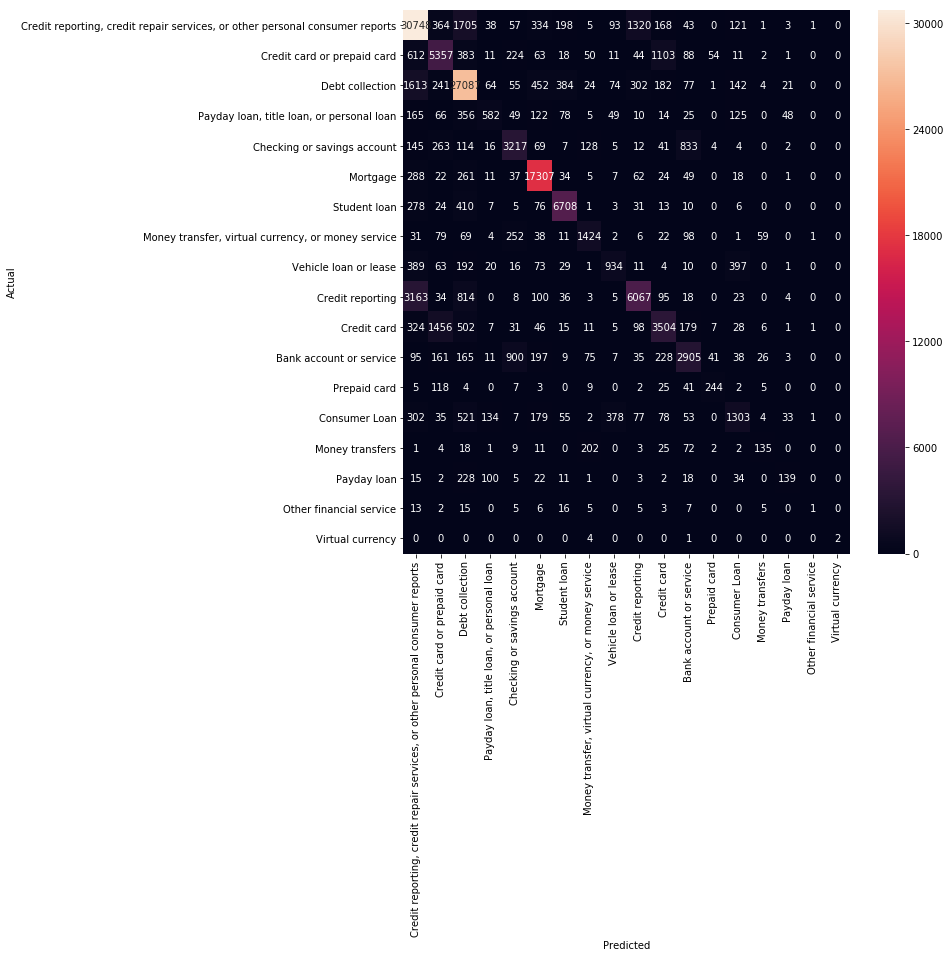

In [19]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 612 examples.


Product  \
62752   Credit card or prepaid card   
99723   Credit card or prepaid card   
246579  Credit card or prepaid card   
565706  Credit card or prepaid card   
396989  Credit card or prepaid card   
64632   Credit card or prepaid card   
200862  Credit card or prepaid card   
239050  Credit card or prepaid card   
436156  Credit card or prepaid card   
47810   Credit card or prepaid card   
503509  Credit card or prepaid card   
246540  Credit card or prepaid card   
181831  Credit card or prepaid card   
304899  Credit card or prepaid card   
385491  Credit card or prepaid card   
452115  Credit card or prepaid card   
70219   Credit card or prepaid card   
357518  Credit card or prepaid card   
233657  Credit card or prepaid card   
242646  Credit card or prepaid card   
214325  Credit card or prepaid card   
104558  Credit card or prepaid card   
244185  Credit card or prepaid card   
264503  Credit card or prepaid card   
96147   Credit card or prepaid card   
277431  Credit card or prepaid card   
43574   Credit card or prepaid card   
428783  Credit card or prepaid card   
68147   Credit card or prepaid card   
299036  Credit card or prepaid card   
...                             ...   
300688  Credit card or prepaid card   
506361  Credit card or prepaid card   
221825  Credit card or prepaid card   
398354  Credit card or prepaid card   
286662  Credit card or prepaid card   
577025  Credit card or prepaid card   
230589  Credit card or prepaid card   
54524   Credit card or prepaid card   
363500  Credit card or prepaid card   
448602  Credit card or prepaid card   
240199  Credit card or prepaid card   
479174  Credit card or prepaid card   
547785  Credit card or prepaid card   
71778   Credit card or prepaid card   
85763   Credit card or prepaid card   
62729   Credit card or prepaid card   
405385  Credit card or prepaid card   
177005  Credit card or prepaid card   
298453  Credit card or prepaid card   
295240  Credit card or prepaid card   
242408  Credit card or prepaid card   
336721  Credit card or prepaid card   
474302  Credit card or prepaid card   
321481  Credit card or prepaid card   
283249  Credit card or prepaid card   
238523  Credit card or prepaid card   
228496  Credit card or prepaid card   
285806  Credit card or prepaid card   
401393  Credit card or prepaid card   
385591  Credit card or prepaid card   

                             Consumer_complaint_narrative  
62752   Dear Barclaycard I received two letters from y...  
99723   On XX/XX/XXXX I received a letter from XXXX XX...  
246579  Between the dates XX/XX/XXXX-XX/XX/XXXX Capito...  
565706  I got a hard inquiry from a company call ed CB...  
396989  I have hard inquiries on my record that I neve...  
64632   when i opened my credit report i saw an offer ...  
200862  I have contacted the XXXX  about Wells Fargo n...  
239050  I purchased a vehicle at the XXXX XXXX XXXX in...  
436156  Since it only let me select one option when I ...  
47810   On XX/XX/18 I had a hard inquiry from Comenity...  
503509  Date : XX/XX/XXXX From : XXXX XXXX XXXX XXXX X...  
246540  Due to some uncontrollable circumstances, I ha...  
181831  XX/XX/2018 While checking my credit report, I ...  
304899  Yeah, I just got a XXXX 's Prepaid XXXX in the...  
385491  OnXX/XX/XXXX I went to Bank of America XXXX  (...  
452115  At the time of the checkout at XXXX, I was off...  
70219   I had an XXXX XXXX/Synchrony Bank account that...  
357518  I called last year to cancel and pay off all a...  
233657  XXXX has been non-compliant with removing the ...  
242646  Barclay bank has reported my XXXX account as d...  
214325  They are reporting negative inaccurate informa...  
104558  Transunion freeze my credit report for securit...  
244185  XXXX has been non-compliant with removing the ...  
264503  I recently applied for a XXXX Citi Card. When ...  
96147   I am a victim of identity theft. I never appli...  
277431  I am writing to dispute an account fraudu


'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1613 examples.


Product                       Consumer_complaint_narrative
220745  Debt collection  Loan is from XX/XX/2010, car was returned to c...
217043  Debt collection  I have sent about 3 or 4 letters to all 3 cred...
306019  Debt collection  After the equifax breach there were a lot of f...
332977  Debt collection  XXXX XXXX XXXX an account that was removed fro...
174412  Debt collection  I have asked that this debt be removed from al...
277829  Debt collection  Recently found out that there was unauthorized...
788526  Debt collection  XXXX XXXX purchased account # XXXX from Syncb/...
619022  Debt collection  There are 2 accounts which i paid in full ones...
420629  Debt collection  I paid XXXX in XX/XX/XXXX for account # XXXX f...
574377  Debt collection                       furnished unverified account
263774  Debt collection  I received a letter/notice in the mail from XX...
305904  Debt collection  The following individuals have been accessing ...
241829  Debt collection  Already made one complaint about this company,...
126775  Debt collection  To whom it may concern - I am being charged il...
430259  Debt collection  Portfolio Recovery Associates is reporting 3 d...
182368  Debt collection  Sent them a validation letter on XX/XX/2018 an...
234199  Debt collection  XXXX, XXXX XXXX XXXX # XXXX DOB XX/XX/XXXX ADD...
60913   Debt collection  I have not received any notification before ha...
59685   Debt collection  After checking my credit score I came across a...
166728  Debt collection  Request Investigation of Credit Inquiry on My ...
205465  Debt collection  I pulled my credit report and noticed that XXX...
393061  Debt collection  I had this credit card with XXXX in XX/XX/XXXX...
411100  Debt collection  Home credit should not be on my credit file .....
312171  Debt collection  I have been overseas playing XXXX XXXX in XXXX...
785919  Debt collection  I reviewed my credit report and saw a company ...
388392  Debt collection  I disputed a collection that hit my credit rep...
547767  Debt collection  Equifax is reporting a debt for a company call...
273530  Debt collection  I recently started a monitoring service and no...
637526  Debt collection  I have a bill from XXXX and XXXX specialists X...
293615  Debt collection  this company on my report is reporting inaccur...
...                 ...                                                ...
112038  Debt collection  In XX/XX/XXXX I applied for and received an on...
939677  Debt collection  The third party collection agency is reporting...
479349  Debt collection  XXXXCARE CREDIT never verified the status of t...
350491  Debt collection  1st dispute XX/XX/XXXX {$5100.00} with XXXX  2...
290296  Debt collection  XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...
467424  Debt collection  Macy 's ( account number XXXX ) is currently r...
684000  Debt collection  I have paid this balance about 6 month ago, bu...
41607   Debt collection  Called company and Equifax explained to them t...
795917  Debt collection  XXXX XXXX XXXX ( XXXX ) has paid out XXXX in t...
227091  Debt collection  This is my 3rd attempt to have this collection...
56059   Debt collection  currently enrolled in debt relief program and ...
213831  Debt collection  Ive had multiple breaches of information and I...
525136  Debt collection  1. ) XXXX XXXX {$720.00} contacted agency seve...
132375  Debt collection  I was alerted by XXXX the Midland Funding LLC ...
57614   Debt collection  On XX/XX/2018, I have proof that a payment was...
244081  Debt collection  I was dating my boyfriend for 15 years. I am a...
678410  Debt collection  Coat Professional contacted my office wanting ...
245552  Debt collection  You have 1 account in Collections Contact Info...
126606  Debt collection  I've contacted Simon Agency Inc regarding the ...
54700   Debt collection  I am contacting you about the compromising of ...
196938  Debt collection  Im a victim of identity tiff someone got my ca...
694729  Debt collection  They put it on m


'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 165 examples.


Product  \
367904  Payday loan, title loan, or personal loan   
313332  Payday loan, title loan, or personal loan   
281419  Payday loan, title loan, or personal loan   
517733  Payday loan, title loan, or personal loan   
484888  Payday loan, title loan, or personal loan   
427891  Payday loan, title loan, or personal loan   
213721  Payday loan, title loan, or personal loan   
214968  Payday loan, title loan, or personal loan   
296097  Payday loan, title loan, or personal loan   
344582  Payday loan, title loan, or personal loan   
97138   Payday loan, title loan, or personal loan   
135261  Payday loan, title loan, or personal loan   
93423   Payday loan, title loan, or personal loan   
556335  Payday loan, title loan, or personal loan   
508353  Payday loan, title loan, or personal loan   
563017  Payday loan, title loan, or personal loan   
547017  Payday loan, title loan, or personal loan   
401742  Payday loan, title loan, or personal loan   
75895   Payday loan, title loan, or personal loan   
145545  Payday loan, title loan, or personal loan   
574332  Payday loan, title loan, or personal loan   
249827  Payday loan, title loan, or personal loan   
355129  Payday loan, title loan, or personal loan   
391578  Payday loan, title loan, or personal loan   
164757  Payday loan, title loan, or personal loan   
149715  Payday loan, title loan, or personal loan   
345188  Payday loan, title loan, or personal loan   
414844  Payday loan, title loan, or personal loan   
403311  Payday loan, title loan, or personal loan   
292422  Payday loan, title loan, or personal loan   
...                                           ...   
58924   Payday loan, title loan, or personal loan   
200334  Payday loan, title loan, or personal loan   
265887  Payday loan, title loan, or personal loan   
199737  Payday loan, title loan, or personal loan   
315674  Payday loan, title loan, or personal loan   
431673  Payday loan, title loan, or personal loan   
394391  Payday loan, title loan, or personal loan   
68074   Payday loan, title loan, or personal loan   
478110  Payday loan, title loan, or personal loan   
111009  Payday loan, title loan, or personal loan   
382402  Payday loan, title loan, or personal loan   
384496  Payday loan, title loan, or personal loan   
570633  Payday loan, title loan, or personal loan   
464442  Payday loan, title loan, or personal loan   
362932  Payday loan, title loan, or personal loan   
143210  Payday loan, title loan, or personal loan   
50944   Payday loan, title loan, or personal loan   
163246  Payday loan, title loan, or personal loan   
366217  Payday loan, title loan, or personal loan   
554937  Payday loan, title loan, or personal loan   
381503  Payday loan, title loan, or personal loan   
437325  Payday loan, title loan, or personal loan   
225095  Payday loan, title loan, or personal loan   
114242  Payday loan, title loan, or personal loan   
95227   Payday loan, title loan, or personal loan   
216213  Payday loan, title loan, or personal loan   
558537  Payday loan, title loan, or personal loan   
267617  Payday loan, title loan, or personal loan   
333554  Payday loan, title loan, or personal loan   
483456  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
367904  The problem I am having is the company wants t...  
313332  I didnt request anything from whomever this th...  
281419  I obtained a loan from XXXX towards the end of...  
517733  Will first of all I tryed getting a loans but ...  
484888  In XX/XX/XXXX, I contacted the 3 credit bureau...  
427891  Note : This is separate from previously filed ...  
213721  This company is practicing a Predatory Landing...  
214968  I have already contacted you guys about this a...  
296097  Loan account through XXXX XXXX XXXX was closed...  
344582  XXXX XXXX XXXX  XXXX XXXX opened XX/XX/XXXX re...  
97138   UDAAP issue - XXXX at Westview Financial in XX...  
135261  Hi my old account number = 


'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 145 examples.


Product  \
278508  Checking or savings account   
243683  Checking or savings account   
82936   Checking or savings account   
227582  Checking or savings account   
247887  Checking or savings account   
474294  Checking or savings account   
372818  Checking or savings account   
153958  Checking or savings account   
169438  Checking or savings account   
385798  Checking or savings account   
360211  Checking or savings account   
524524  Checking or savings account   
504691  Checking or savings account   
521884  Checking or savings account   
350186  Checking or savings account   
138549  Checking or savings account   
172299  Checking or savings account   
389157  Checking or savings account   
228685  Checking or savings account   
345342  Checking or savings account   
385799  Checking or savings account   
376077  Checking or savings account   
188208  Checking or savings account   
414095  Checking or savings account   
553953  Checking or savings account   
272225  Checking or savings account   
110025  Checking or savings account   
139373  Checking or savings account   
206720  Checking or savings account   
165125  Checking or savings account   
...                             ...   
391356  Checking or savings account   
170580  Checking or savings account   
269146  Checking or savings account   
77869   Checking or savings account   
105842  Checking or savings account   
447383  Checking or savings account   
414563  Checking or savings account   
106634  Checking or savings account   
206115  Checking or savings account   
375667  Checking or savings account   
223207  Checking or savings account   
85453   Checking or savings account   
558089  Checking or savings account   
398164  Checking or savings account   
441488  Checking or savings account   
355762  Checking or savings account   
242259  Checking or savings account   
547053  Checking or savings account   
139531  Checking or savings account   
447182  Checking or savings account   
420661  Checking or savings account   
355117  Checking or savings account   
514184  Checking or savings account   
71268   Checking or savings account   
224875  Checking or savings account   
488153  Checking or savings account   
544490  Checking or savings account   
287286  Checking or savings account   
510113  Checking or savings account   
203933  Checking or savings account   

                             Consumer_complaint_narrative  
278508  Tried to change account involving XXXX XXXX. A...  
243683  Early Warning Services is reporting inaccurate...  
82936   Hello How do I dispute a Hard Inquires. Someon...  
227582  Back in XX/XX/2012Bank of America put me in XX...  
247887  Four charges were charged to my debit card all...  
474294  on XX/XX/XXXX I attempted to make a purchase f...  
372818  I AM WRITING TO DISPUTE AN ACCOUNTS FRADULENTL...  
153958  People 's United Bank replied to previous comp...  
169438  i was a victim of a scam tats why bank of amer...  
385798  I went to the XXXX XXXX XXXX on XX/XX/XXXX and...  
360211  Greetings, Citibank has been reporting to XXXX...  
524524  I have a checking account and credit card with...  
504691  On XX/XX/2015 XXXX XXXX XXXX force closed my c...  
521884  I opened an online account with USAA in order ...  
350186  Banks are requiring that their customers who w...  
138549  XXXX, XXXXunpaid,XX/XX/2017, suspected fraud a...  
172299  Called to open dispute XX/XX/18. Called back i...  
389157  In XX/XX/XXXXmy wife and I obtained a divorce....  
228685  I had several fraudulent transactions in my ac...  
345342  A couple use ago my information was stolen and...  
385799  check was cashed fraudulent and i have the proof.  
376077  DEAR SIRS DIRECTOR AND RESEARCHERS CFPB US FED...  
188208  My account data was breached as part of HSBC a...  
414095  I was told by a bank manager when i went to op...  
553953  On  XXXX   XXXX ,  2017 , I applied for a  Sch...  
272225  I want early warning system to stop repor


'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 288 examples.


Product                       Consumer_complaint_narrative
655483  Mortgage  I did n't tell this Mortgage company to run my...
967960  Mortgage  G.E. Retail Bank place in collections # XXXX a...
439781  Mortgage  Because of non-cooperation from XXXX XXXX seni...
204307  Mortgage  My name is XXXX XXXX and I have been working o...
763562  Mortgage  WELLS FARGO IS WRONGFULLY REPORTING 30 DAY LAT...
790035  Mortgage  Ocwen is reporting an old large balance for ye...
76719   Mortgage  In XX/XX/2019, my mortgage account was acquire...
64131   Mortgage  My Mortgage was recently sold from JPM Chase t...
471944  Mortgage  servicer never applied payments properly from ...
426314  Mortgage  I recently was reviewing my credit report and ...
330262  Mortgage  My ex husband filed for Chapter XXXX bankruptc...
765182  Mortgage  SunTrust mortgage had given me a negative cred...
922944  Mortgage  This is a copy of a letter that was sent to We...
91575   Mortgage  To whom it may concern, on XX/XX/XXXX I made a...
271171  Mortgage  Select Port Folio my mortgage servicer recentl...
682125  Mortgage  My loan was showing inaccurate from Carrington...
807532  Mortgage  The mortgage company sent me a letter Dated XX...
678310  Mortgage  Sunwest Mortgage has maliciously reported my m...
647340  Mortgage  I made a payment online and they said that the...
586894  Mortgage  We were wrongfully Evicted on   XXXX   XXXX   ...
590874  Mortgage  My credit report was pulled by an Assurance Fi...
806948  Mortgage  Chase Mortgage Acct # XXXX is reporting a bala...
267535  Mortgage  This account is not being reported on my XXXX ...
441497  Mortgage  XXXX XXXX, XXXX On XXXX XXXX, XXXX, I received...
899093  Mortgage  Wells Fargo Home Mortgage is listed on my cred...
974015  Mortgage  Included my mortgage in bankruptcy chapter XXX...
343767  Mortgage  Paid off the mortgage with a bank certified ck...
457535  Mortgage  XXXX bought my mortgage from another company i...
259716  Mortgage  On the end of XX/XX/XXXX I e-mailed XXXX XXXX ...
149651  Mortgage  Family stole property and bank accounts added ...
...          ...                                                ...
690873  Mortgage  My previous complaint was supposedly resolved ...
326428  Mortgage  I submitted CFPB Complaint # XXXX-XXXX on XX/X...
860179  Mortgage  I found a foreclosure that never happened. I f...
928789  Mortgage  In XX/XX/XXXX I paid a Morgan Stanley mortgage...
379780  Mortgage  I have my loan through XXXX XXXX XXXX. I am mi...
616300  Mortgage  I had a mortgage loan that was owned and servi...
733622  Mortgage  Bank of America XXXX is reporting inaccurate l...
144709  Mortgage  My wife was laid off recently so weve been run...
535604  Mortgage  In XX/XX/2017, Chase called me and told me I w...
397862  Mortgage  Since XXXX XXXX 2017 my family and I have been...
593883  Mortgage  We went in to discuss the loan process. They r...
116918  Mortgage  In XXXX of 2013 my husband and I went through ...
822496  Mortgage  My mortgage company ( US Bank ) is not reporti...
915030  Mortgage  This is a new Care ( THIS IS A NEW CASE ) Back...
822047  Mortgage  I have had an account with the company ( OneWe...
894144  Mortgage  We had a mortgage loan reported on credit repo...
76885   Mortgage  In XX/XX/2019 I was not able to make my paymen...
326903  Mortgage  I filed chapter XXXX bankruptcy in XXXX it was...
384759  Mortgage  I am trying to get intouch with the Beneficial...
696398  Mortgage  They are continuously reporting me delinquent ...
752864  Mortgage  Dear Sir or Madam, I am writing to file a comp...
78124   Mortgage  On XX/XX/XXXX at XXXX I paid my mortgage onlin...
134394  Mortgage  I have been trying to get my Mortgage company ...
79710   Mortgage  In XX/XX/XXXX I filed the same complaint, and ...
945152  Mortgage  Green tree has contacted credit bureau to chan...
164804  Mortgage  We financed our thru American Financing in XX/...
561341  Mortgage  After looking over my credit report, I noticed.


'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 278 examples.


Product                       Consumer_complaint_narrative
372611  Student loan  I have requested from Suntrust Bank who recent...
466873  Student loan  When applying for my student loan, I was under...
712396  Student loan  I disputed this loan and credit bureaus remove...
173282  Student loan  I submitted a check in the amount of {$160.00}...
324253  Student loan  My loan information has disappeared on the web...
269532  Student loan  Student Account balance and High APR on studen...
119779  Student loan  the account shows missing payments and delinqu...
661045  Student loan  Please review my student loan account because ...
587303  Student loan  This complaint is for a private student loan I...
252131  Student loan  Discovered that fraudulent student loans were ...
767605  Student loan  I am trying to resolve a derogatory statement ...
438193  Student loan  I filed a dispute sent through certified mail ...
220593  Student loan  I have several months that are not being repor...
607387  Student loan  This company is damaging my credit by reportin...
327364  Student loan  I went to XXXX XXXX  college in XX/XX/1995. Th...
625108  Student loan  FedLoan is failing to follow the FCRA section ...
603158  Student loan  TX GUAR XXXX is reporting inaccurate informati...
620059  Student loan  I have an unemployment forbearance. The unempl...
694453  Student loan  Currently the Department of Education/NELNET i...
747866  Student loan  My loan was being brought up to date by the XX...
590175  Student loan  I was being charged random fees and charges ev...
238830  Student loan  I have been having issues with XXXX XXXX, who ...
477388  Student loan  Credit report showing account is delinquent 90...
220843  Student loan  I have several months that are not being repor...
618119  Student loan  XXXX groups of loans were reported, accurately...
605797  Student loan  Navient does not report to the credit bureaus ...
498151  Student loan  I 've contacted the Dept. of Education/Navient...
284333  Student loan  I have a loan with XXXX. I have always made my...
147878  Student loan  On XX/XX/XXXX i called XXXX about my account ....
123835  Student loan  Im have financial difficulties at the moment a...
...              ...                                                ...
271154  Student loan  I have setup an auto draft for one of my stude...
114206  Student loan  XXXX XXXX XXXX ( XXXX ) XXXX contacted me on X...
286584  Student loan  US DEPT OF EDUCATION has re-aged my account st...
64096   Student loan  The DEPT. Of ED/Nelnet continues to inaccurate...
344918  Student loan  I filed disputes for removal cause of missing ...
98859   Student loan  I initially was making payments each month unt...
389483  Student loan  I've tried on more that one occasion to do a s...
272466  Student loan  My son, XXXX XXXX, the borrower ( I am the co-...
822839  Student loan  Despite my previous mail correspondence, Mohel...
529974  Student loan  the company at the time said that I need to si...
413674  Student loan  I recently joined with a student loan debt rel...
440803  Student loan  To Whom It May Concern : This letter is in res...
643900  Student loan  The information they gave me was very wrong an...
403374  Student loan  In XX/XX/XXXX I was notified I was in default ...
818531  Student loan  a few years ago I had went to college and had ...
609510  Student loan  After reviewing my credit report i noticed acc...
646032  Student loan  It was difficult to make the payments they req...
50629   Student loan  My student loan was paid off XX/XX/2019 to an ...
746169  Student loan  I had a total of XXXX student loans with XXXX ...
372671  Student loan  This is for XXXX XXXX XXXX, XXXX  XXXX XXXX XX...
574799  Student loan  hello, please send me a copy of the signed reh...
296183  Student loan  I have a loan with XXXX. I have always made my...
493213  Student loan  I have multiple student loans with navient, bu...
526189  Student loan  I went to XXXX XXXX Institute F


'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 31 examples.


Product  \
525116  Money transfer, virtual currency, or money ser...   
116736  Money transfer, virtual currency, or money ser...   
545990  Money transfer, virtual currency, or money ser...   
450046  Money transfer, virtual currency, or money ser...   
500036  Money transfer, virtual currency, or money ser...   
474283  Money transfer, virtual currency, or money ser...   
428689  Money transfer, virtual currency, or money ser...   
84957   Money transfer, virtual currency, or money ser...   
130420  Money transfer, virtual currency, or money ser...   
190030  Money transfer, virtual currency, or money ser...   
542498  Money transfer, virtual currency, or money ser...   
138409  Money transfer, virtual currency, or money ser...   
91967   Money transfer, virtual currency, or money ser...   
410106  Money transfer, virtual currency, or money ser...   
472513  Money transfer, virtual currency, or money ser...   
355460  Money transfer, virtual currency, or money ser...   
175929  Money transfer, virtual currency, or money ser...   
577198  Money transfer, virtual currency, or money ser...   
138754  Money transfer, virtual currency, or money ser...   
122192  Money transfer, virtual currency, or money ser...   
545544  Money transfer, virtual currency, or money ser...   
330507  Money transfer, virtual currency, or money ser...   
226221  Money transfer, virtual currency, or money ser...   
197453  Money transfer, virtual currency, or money ser...   
449127  Money transfer, virtual currency, or money ser...   
259387  Money transfer, virtual currency, or money ser...   
580337  Money transfer, virtual currency, or money ser...   
249380  Money transfer, virtual currency, or money ser...   
126185  Money transfer, virtual currency, or money ser...   
122418  Money transfer, virtual currency, or money ser...   
497609  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
525116  My name is XXXX XXXX AND I HAVE SENT COMMUNICA...  
116736  I noticed three unauthorized transactions on m...  
545990  I successfully submitted a complaint to cfpb o...  
450046  My XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXX...  
500036  XXXX XXXX Friday, XXXX XXXX XXXX XXXX XXXX Tri...  
474283  Paypal has a permanent block or restriction on...  
428689  XXXX RUNS AD 'S ON XXXX TO USE AS A TOOL TO LU...  
84957   PNC bank in XXXX New Jersey in the year 2013 c...  
130420  Hello Respective Officer, HEre Iam writing thi...  
190030  Your bank will be shown to have not performed ...  
542498  I am reporting The XXXXXXXX Family on behalf o...  
138409  Initiated two transfers to bank account on XX/...  
91967   Certegy declined my check on the date of XX/XX...  
410106  Bought XXXX dollars in Ethereum. Entered in my...  
472513  XXXX will still not add my bank, XXXX XXXX, or...  
355460  My mother purchased a money order with cash on...  
175929  Hello Respective Officer, HEre Iam writing thi...  
577198  I sent  XXXX  to my  XXXX    XXXX   XXXX   com...  
138754  XXXX XXXX sent the amount of {$1000.00} to XXX...  
122192  I've.treid what I've believed to be every thin...  
545544  On  XXXX / XXXX / 2017  I had my ba nk ( Santa...  
330507  My Name is XXXX XXXX XXXX, on XXXX, 2018 I wir...  
226221  I have some concerns about the information tha...  
197453   I tried buying a XXXX  game acount a got scammed  
449127  XXXX. XXXX faxed insurance check to be cosigne...  
259387  They just XXXX  me and changed the subject and...  
580337  This is in regard to my previous complaint,  X...  
249380  On or about XX/XX/2016 a promissory note was c...  
126185  I am currently being discriminated against lik...  
122418  I own a business and have been writing checks ...  
497609  Paypal is a horrible website to use, and a hor...


'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 389 examples.


Product  \
297066  Vehicle loan or lease   
315160  Vehicle loan or lease   
46262   Vehicle loan or lease   
259853  Vehicle loan or lease   
85494   Vehicle loan or lease   
235205  Vehicle loan or lease   
428455  Vehicle loan or lease   
158749  Vehicle loan or lease   
486998  Vehicle loan or lease   
338101  Vehicle loan or lease   
515539  Vehicle loan or lease   
209486  Vehicle loan or lease   
317476  Vehicle loan or lease   
260233  Vehicle loan or lease   
296736  Vehicle loan or lease   
431174  Vehicle loan or lease   
391474  Vehicle loan or lease   
446145  Vehicle loan or lease   
303143  Vehicle loan or lease   
248496  Vehicle loan or lease   
535351  Vehicle loan or lease   
193837  Vehicle loan or lease   
77995   Vehicle loan or lease   
174140  Vehicle loan or lease   
506963  Vehicle loan or lease   
557290  Vehicle loan or lease   
534004  Vehicle loan or lease   
528347  Vehicle loan or lease   
211052  Vehicle loan or lease   
272946  Vehicle loan or lease   
...                       ...   
131119  Vehicle loan or lease   
171425  Vehicle loan or lease   
190329  Vehicle loan or lease   
238752  Vehicle loan or lease   
233910  Vehicle loan or lease   
381200  Vehicle loan or lease   
511621  Vehicle loan or lease   
272704  Vehicle loan or lease   
351349  Vehicle loan or lease   
359816  Vehicle loan or lease   
290706  Vehicle loan or lease   
470532  Vehicle loan or lease   
532616  Vehicle loan or lease   
207169  Vehicle loan or lease   
275719  Vehicle loan or lease   
157631  Vehicle loan or lease   
299189  Vehicle loan or lease   
60902   Vehicle loan or lease   
68998   Vehicle loan or lease   
200362  Vehicle loan or lease   
144733  Vehicle loan or lease   
403450  Vehicle loan or lease   
230208  Vehicle loan or lease   
378272  Vehicle loan or lease   
577507  Vehicle loan or lease   
178965  Vehicle loan or lease   
292400  Vehicle loan or lease   
224507  Vehicle loan or lease   
127716  Vehicle loan or lease   
55608   Vehicle loan or lease   

                             Consumer_complaint_narrative  
297066  On XX/XX/2017, I verbally authorized a telepho...  
315160  GM Financial was paid in full in XX/XX/2018. I...  
46262   The early part of XXXX GM financial mailed out...  
259853  In XX/XX/2013 my car was rear ended and totale...  
85494   XX/XX/XXXX I was behind I paid high late fees ...  
235205  I discovered in XX/XX/2018 I was reported as h...  
428455  XXXX XXXX, XXXX I received a call from XXXX XX...  
158749  On XX/XX/XXXX I applied for an auto loan from ...  
486998  I contacted XXXX XXXX XXXX on XXXX/XXXX/XXXX, ...  
338101  GM Financial is incorrectly reporting this acc...  
515539  Ally Financial is reporting an account on my c...  
209486  I had an auto loan with XXXX XXXX. The loan wa...  
317476  On XX/XX/XXXX @ XXXX XXXX XXXX XXXX received a...  
260233  I disputed this account with XXXX  on XX/XX/20...  
296736  Around XX/XX/2015, I notified XXXX XXXX XXXX t...  
431174  We are looking to buy a new car. Two companies...  
391474  I purchased a XX/XX/XXXXXXXX XXXX  account # X...  
446145  I pulled my credit reports and noticed I am a ...  
303143  Security National was included in my bankruptc...  
248496  I bought a used vehicle from car mart in XXXX ...  
535351  The vehicle was repossessed XXXX XXXX. Accordi...  
193837  BMW financial service is very unprofessional a...  
77995   A loan payment was submitted online on XX/XX/2...  
174140  Please note that Chase Auto Finance has report...  
506963  I requested a Payment History on my vehicle th...  
557290  I made a payment on this account X/XX/17 which...  
534004  There was a late payment made on the account, ...  
528347  FIRST INVESTORS FINANCIAL SERV, Account Number...  
211052  On XX/XX/2017 I was in XXXX XXXX XXXX in XXXX ...  
272946  I have a loan with XXXX XXXX XXXX I have alway...  
...                                                   ...  
131119  XXXX XXXX 2018XXXX XXXX XXXX 2018.IN XX/XX/ 20.


'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 3163 examples.


Product                       Consumer_complaint_narrative
835267  Credit reporting  I have disputed with Transunion to immediately...
605244  Credit reporting  Experian reporting of XXXX XXXX reflects a for...
859019  Credit reporting  I received a credit report from Equifax which ...
702497  Credit reporting  I filed a complaint about unauthorized inquiri...
679580  Credit reporting  I have disputed this account twice with the cr...
607166  Credit reporting  Around XX/XX/2017, a company quicken loans cal...
661411  Credit reporting  I placed a security freeze on my account a yea...
798623  Credit reporting  I never opened a XXXX XXXX, they say they can ...
825728  Credit reporting  This is my second compliant. I keep getting st...
802873  Credit reporting  I receive my XXXX and XXXX scores for free thr...
934144  Credit reporting  I SUBMITTED TO TRANSUNION 3 TIMES AND THEY ARE...
764330  Credit reporting  Ok my name is XXXX I 'm not XXXX that 's my si...
861698  Credit reporting  XXXX XXXX XXXX XXXX XXXX XXXX, XXXX . # XXXX X...
823078  Credit reporting  On XXXX XXXX, 2016, XXXX XXXX pulled my credit...
917782  Credit reporting  XXXX XXXX XXXX has a debt listed on my credit ...
619772  Credit reporting  Experian credit reporting services is showing ...
938676  Credit reporting  XXXX XXXX reports my loan in default but in fa...
838822  Credit reporting  XXXX is illegally reporting on my credit, whic...
817795  Credit reporting  I have a problem with XXXX and Experian they b...
967811  Credit reporting  This complaint is of a general nature and impa...
866426  Credit reporting  I ordered credit report on XX/XX/XXXX through ...
922106  Credit reporting  On Wednesday XXXX at XXXX, I spoke with a XXXX...
873040  Credit reporting  I called the XXXX XXXX Bank and I told them so...
945970  Credit reporting  A company XXXX was given my credit report by E...
873028  Credit reporting  I called the XXXX XXXX Bank and I told them so...
607595  Credit reporting  I have spent hours on the phone with TransUnio...
599225  Credit reporting  There have been unauthorized inquiries put on ...
824367  Credit reporting  Contacted Experian after getting a credit repo...
919689  Credit reporting  I was interested in refinancing my home. I was...
606078  Credit reporting  XXXX account was placed on debt management pro...
...                  ...                                                ...
951467  Credit reporting  Equifax reporting several incorrect informatio...
943107  Credit reporting  I am not receiving the benefit of the service ...
707846  Credit reporting  Experian is reporting XXXX bankruptcy forXX/XX...
706141  Credit reporting  The following personal information is incorrec...
825823  Credit reporting  I submitted a dispute to TransUnion on XXXX ab...
697709  Credit reporting  XXXX XXXX is reporting the account inaccuratel...
975294  Credit reporting  I originally filed a disputed on XXXX XXXX for...
749986  Credit reporting  I disputed a settled account with XXXX XXXX on...
783786  Credit reporting  The state of Illinois put a lien on me for sup...
692561  Credit reporting  EQUIFAX CONTINUES TO REPORT A PUBLIC RECORD TH...
663606  Credit reporting  I have made Equifax aware that my Identity was...
899708  Credit reporting  There was a discrepancy in the family as to wh...
675444  Credit reporting  Experian is reporting information on my credit...
689203  Credit reporting  On XX/XX/2016, I sent a letter to Experian com...
589757  Credit reporting  Submitted dispute to equifax about unauthorize...
975391  Credit reporting  I paid my bill in full for {$240.00} to XXXX X...
789206  Credit reporting  They have had my accounts in dispute for three...
709956  Credit reporting  I am stationed overseas and I 'm trying to obt...
776928  Credit reporting  TransUnion refuses to update the status of all...
807597  Credit reporting  EXPERIAN refuses to comply. Credit reporting l...
877473  Credit reporting  I have been fighting with the bureaus f


'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 324 examples.


Product                       Consumer_complaint_narrative
689207  Credit card  ON XX/XX/2013 I OPEN A CREDIT CARD ACCOUNT FNB...
809246  Credit card  This account has been paid in full but is not ...
848437  Credit card  Hello, I have been a client with Capital One s...
763765  Credit card  Barclay is reporting that I was 60 days late i...
844821  Credit card  I received a 30 day late on my credit report f...
949440  Credit card  While checking my personal credit report, whic...
636868  Credit card  Transunion XXXX showed up on my credit card bi...
950382  Credit card  Bank of America is reporting an adverse credit...
755449  Credit card  WFFNATLBNK is not reporting my payments to the...
738809  Credit card  I have called several times that they are repo...
723055  Credit card  CAPITAL ONE BANK MADE TWO HARD INQUIRES ON MY ...
794782  Credit card  I looked at my credit report and seen somethin...
937658  Credit card  I am writing in hopes of clearing up a serious...
806576  Credit card  My credit card accounts was close for no reaso...
864517  Credit card  Chase is current reporting an account on my cr...
671959  Credit card  I submitted a previous complaint against tidew...
745718  Credit card  Total Credit Card refuses to provide me with a...
693820  Credit card  I have been on time for over a year and a half...
611575  Credit card  Hello, I am a XXXX who just received my social...
941104  Credit card  Chase is offering " free monthly credit score ...
656314  Credit card  XXXX hard inquiries by CBNA ( XXXX XXXX, 2016 ...
795791  Credit card  Paypal credit services and XXXX XXXX have done...
644405  Credit card  my account on their web site is not functionin...
597749  Credit card  I have been a consumer with Kohl 's since XX/X...
661951  Credit card  Hi I have credit card with Capital One. It was...
645900  Credit card  I have an XXXX XXXX XXXX for long time. I have...
660091  Credit card  My account ending in XXXX had fraud on it and ...
599178  Credit card  I am in bankruptcy as of XX/XX/XXXX. As such, ...
850010  Credit card  This is a complaint in reference to a credit c...
865078  Credit card  I have an unauthorized and unjustified hard in...
...             ...                                                ...
940502  Credit card  unauthorized inquiry on my XXXX and XXXX credi...
780836  Credit card  This letter is being written in regards to an ...
900112  Credit card  PayPal extended me a line of online credit wit...
931832  Credit card  we applied for a mortgage loan, and this error...
833841  Credit card  Discover card is reporting that I have a joint...
895914  Credit card  My credit report shows I have an AMEX account ...
942528  Credit card  I made previous complaint # XXXX where Citi ha...
725391  Credit card  Barclays will not remove old information on my...
621660  Credit card  On XX/XX/2017, XXXX XXXX visited ToysRUs at XX...
719241  Credit card  I paid my card down I got s credit for a late ...
791257  Credit card  The Legal entity ( GECRB HBC ) is reporting ne...
606617  Credit card  i got a letter in the mail today from citizens...
660386  Credit card  Despite my repeated requests to be removed fro...
704990  Credit card  I have sent several letters asking for proof b...
906303  Credit card  I am writing in regards to Bank of America 's ...
958136  Credit card  My wife and I applied for a construction loan ...
854282  Credit card  My ex husband applied for a Discover card and ...
796903  Credit card  I went XXXX XXXX military XX/XX/2013. I had an...
782247  Credit card  I have contacted Them at least 4 times to ask ...
708317  Credit card  XXXX XXXX I received dispute results from XXXX...
605559  Credit card  Tidewater finance has been reporting inaccurat...
670441  Credit card  During process of securing a XXXX. constructio...
900336  Credit card   Overlimit fee paid without my consent or opt in.
914797  Credit card  paid bill before I filed Banrupty is should a ...
935582  Credit card  I have reached 


'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 95 examples.


Product  \
899499  Bank account or service   
928519  Bank account or service   
699599  Bank account or service   
862287  Bank account or service   
710369  Bank account or service   
809622  Bank account or service   
873724  Bank account or service   
784305  Bank account or service   
684249  Bank account or service   
636100  Bank account or service   
666762  Bank account or service   
622263  Bank account or service   
944209  Bank account or service   
701767  Bank account or service   
909716  Bank account or service   
901521  Bank account or service   
944061  Bank account or service   
732462  Bank account or service   
922358  Bank account or service   
663665  Bank account or service   
643728  Bank account or service   
780068  Bank account or service   
755940  Bank account or service   
589466  Bank account or service   
686073  Bank account or service   
588991  Bank account or service   
885930  Bank account or service   
788218  Bank account or service   
876544  Bank account or service   
600522  Bank account or service   
...                         ...   
628944  Bank account or service   
653958  Bank account or service   
642431  Bank account or service   
653854  Bank account or service   
705991  Bank account or service   
806301  Bank account or service   
959977  Bank account or service   
629296  Bank account or service   
874053  Bank account or service   
611459  Bank account or service   
882414  Bank account or service   
615707  Bank account or service   
845089  Bank account or service   
725289  Bank account or service   
730896  Bank account or service   
704327  Bank account or service   
762969  Bank account or service   
598052  Bank account or service   
819644  Bank account or service   
642288  Bank account or service   
688911  Bank account or service   
965198  Bank account or service   
953202  Bank account or service   
664680  Bank account or service   
668485  Bank account or service   
759683  Bank account or service   
902454  Bank account or service   
671350  Bank account or service   
774572  Bank account or service   
688937  Bank account or service   

                             Consumer_complaint_narrative  
899499  Chase Bank ran an inquiry on my XXXX XXXX and ...  
928519  On XX/XX/XXXX, I filed a complaint towards cit...  
699599  XXXX. \nThis is about my personal information ...  
862287  I am an ID theft victim tried to notify the ba...  
710369  We account was closed randomly without explana...  
809622  A bank ( BoA ) incorrectly listed me as having...  
873724  XX/XX/XXXX I took a personal loan of {$10000.0...  
784305  I was denied the ability to open a bank accoun...  
684249  ON XX/XX/XXXX Lexing Law firm notified me that...  
636100  Bank of america had agreed to stop reporting n...  
666762  Equifax has demonstrated an unwillingness to r...  
622263  I recently reviewed my credit report and obser...  
944209  Prestige Financial Services entered inquiries ...  
701767  I have inquires in my report about back accoun...  
909716  chex systems reports that i have deliquent ban...  
901521  I am a victim of identity theft and my informa...  
944061  Credit Technologies inc improperly an inquiry ...  
732462  PERSONAL INFORMATION AND IDENTIFICATION WAS CO...  
922358  THERE IS A INQUIRE ON MY CREDIT REPORT THAT DO...  
663665  US BANK TOOK XXXX FROM MY ACTIVE ACCOUNT DUE T...  
643728  Sought balance to applicable and prevailing in...  
780068  I have had my accounts repeatedly incorrectly ...  
755940  Experian Credit Reporting indicates I signed u...  
589466  To whom this may concern, This is a follow-up ...  
686073  Chase Bank account closed, charged off and/or ...  
588991  I submitted a complaint in XX/XX/XXXX regardin...  
885930  CHEXSYSTEMS HAS FAILED TO REMOVE ALL NEGATIVE ...  
788218  Hi, My name is XXXX XXXX, I have an account wi...  
876544  I opened an account XXXX XXXX and due to inact...  
600522  US BANK made an unauthorized credit inquiry t


'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 302 examples.


Product                       Consumer_complaint_narrative
663521  Consumer Loan  I filed Chapter XXXX bankruptcy against the co...
644574  Consumer Loan  On XX/XX/2016, I received a letter from Westla...
644634  Consumer Loan  The companies were using a finance company to ...
625041  Consumer Loan  I went to XXXX XX/XX/XXXX to purchase my secon...
590953  Consumer Loan  I took out an auto loan from M & T Bank in XX/...
664188  Consumer Loan  My issue is with Capital One Auto Finance. My ...
827531  Consumer Loan  XXXX XXXX XXXX XXXX XXXX # XXXX XXXX VA XXXX X...
912313  Consumer Loan  On XXXX/XXXX/15 I went online to research car ...
920308  Consumer Loan  THERE ARE UNKNOW INQUIRES ON MY CREDIT REPORT ...
791747  Consumer Loan  TJ Maxx serviced by Syncroney bank just put a ...
896840  Consumer Loan  I purchased a vehicle from DriveTime XX/XX/XXX...
665094  Consumer Loan  This complaint is referring to Suntrust Bank a...
786518  Consumer Loan  BACKGROUND INFORMATION : I took over a 3-year ...
728483  Consumer Loan  Keybank in XXXX offered me a promising solutio...
813915  Consumer Loan  I had a car loan from capital one auto that wa...
698687  Consumer Loan  There is a car loan on my credit report that d...
606566  Consumer Loan  I applied for XXXX auto loan with your firm an...
586172  Consumer Loan  I have a 60 month loan fro m Carmax f or my   ...
740682  Consumer Loan  Capital One Auto agreed to settle a auto loan ...
680669  Consumer Loan  I have a corporate auto loan with Bank of Amer...
743107  Consumer Loan  BMW financial reported on our credit report th...
879100  Consumer Loan  best buy paid it off XXXX they was taking it o...
979145  Consumer Loan  I was reviewing my ( 3 ) credit reports and fo...
585425  Consumer Loan  Can not make car payment online or over the ph...
615569  Consumer Loan  Again I making another compaint against Republ...
924366  Consumer Loan  Roadlloans.com did a hard credit inquiry on my...
826850  Consumer Loan  So I have had a loan from Infiniti Financial s...
606235  Consumer Loan  Regional Finance of XXXX NC, assessed a {$15.0...
682226  Consumer Loan  Key bank, XXXX & XXXX are reporting incorrect ...
773743  Consumer Loan  The insurance group of several leasing / loan ...
...               ...                                                ...
949862  Consumer Loan  I AM AWAITING A RESPONSE FROM ALL XXXX CREDIT ...
597329  Consumer Loan  I have been trying to get statements for my XX...
702288  Consumer Loan  company has requested more information about t...
924475  Consumer Loan  Bought a car in XXXX 2015 and financing was ac...
640262  Consumer Loan  Credit Acceptance Corporation is reporting my ...
745462  Consumer Loan  XXXX acct number i overpaid this loan by XXXX ...
855845  Consumer Loan  " Employees '' visit my house and argue with m...
706698  Consumer Loan  I was declined for an auto loan by SunTrust an...
866555  Consumer Loan  On the companies website, they show a due date...
844045  Consumer Loan  Went to XXXX XXXX, XXXX, AL on XXXX XXXX, XXXX...
598671  Consumer Loan  I was never notified as the co-applicant that ...
719003  Consumer Loan  Hello, I have an auto loan with this dealer in...
617015  Consumer Loan  I was a cosigner on a vehicle lease. Apparentl...
717044  Consumer Loan  In XXXX, I was informed that a ex-boyfriend wa...
967735  Consumer Loan  After my auto was totaled, my insurance compan...
950368  Consumer Loan  My husband I bought a car with Drive Time abou...
647976  Consumer Loan  My husband was transitioning into a new job an...
880464  Consumer Loan  Discover Financial Services ( Personal Loan ) ...
896440  Consumer Loan  I have XXXX hard inquiries on my credit report...
600277  Consumer Loan  On XXXX 2017, a letter disputing an item being...
728139  Consumer Loan  American Honda Finance has reported incorrect ...
937611  Consumer Loan  I purchased a vehicle XX/XX/XXXX from Drivetim...
611559  Consumer Loan  I XXXX XXXX, phone number:XXXX, address : XXXX...


'Payday loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


Product                       Consumer_complaint_narrative
615222  Payday loan  When I applied for the loan the account that I...
770750  Payday loan  I learned in XXXX XXXX that a number of 'pay-d...
959762  Payday loan  I received a copies of my XXXX, XXXX, and XXXX...
656127  Payday loan  I checked my credit report and realized there ...
707076  Payday loan  I was a victim of fraud due to information bei...
834491  Payday loan  Lender made an unauthorized hard credit inquir...
951311  Payday loan  I got a loan paid it off, and now the company ...
764874  Payday loan  XXXX XXXX XXXX is the bank I use. I had to get...
733064  Payday loan  I applied for a loan online and was denied. I ...
613355  Payday loan  This company loaned XXXX and with all the inte...
852336  Payday loan  Could n't verify my address supposedly after f...
596203  Payday loan  There is a loan on my credit for an account th...
980400  Payday loan  Insta Loan, XXXX XXXX Ga, PROMISED me they wou...
791614  Payday loan  Hi, my name is XXXX XXXX : I am filing a compl...
668039  Payday loan  I am currently put of work and need the lender...


'Other financial service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


Product  \
820287  Other financial service   
642225  Other financial service   
695373  Other financial service   
590399  Other financial service   
663770  Other financial service   
626090  Other financial service   
590119  Other financial service   
596081  Other financial service   
605590  Other financial service   
824576  Other financial service   
601759  Other financial service   
941318  Other financial service   
605059  Other financial service   

                             Consumer_complaint_narrative  
820287  Beginning In XXXX of 2010, Global Client Solut...  
642225  XXXX and a company called Certegy asked for So...  
695373  I was trying to purchase a home, however my cr...  
590399  I was notified by a creditor that my personal ...  
663770  In an understanding of an " integrity and fair...  
626090  On Saturday, I started receiving text messages...  
590119  I enrolled in National Budget Planners of Sout...  
596081  i was tolled i would have a credit score of XX...  
605590  I have been locked out of my account with Cred...  
824576  I paid {$800.00} to XXXX, CEO, XXXX Simple Sol...  
601759  After reading all of the positive reviews from...  
941318  I spoke with XXXX at Lexington Law, I asked fo...  
605059  Lexington Law advertised that they could help ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 364 examples.


Product  \
209421  Credit reporting, credit repair services, or o...   
310864  Credit reporting, credit repair services, or o...   
60035   Credit reporting, credit repair services, or o...   
554924  Credit reporting, credit repair services, or o...   
246717  Credit reporting, credit repair services, or o...   
51699   Credit reporting, credit repair services, or o...   
244654  Credit reporting, credit repair services, or o...   
479211  Credit reporting, credit repair services, or o...   
316420  Credit reporting, credit repair services, or o...   
448708  Credit reporting, credit repair services, or o...   
264610  Credit reporting, credit repair services, or o...   
98567   Credit reporting, credit repair services, or o...   
311319  Credit reporting, credit repair services, or o...   
194449  Credit reporting, credit repair services, or o...   
527408  Credit reporting, credit repair services, or o...   
197318  Credit reporting, credit repair services, or o...   
147883  Credit reporting, credit repair services, or o...   
434787  Credit reporting, credit repair services, or o...   
456826  Credit reporting, credit repair services, or o...   
420889  Credit reporting, credit repair services, or o...   
451282  Credit reporting, credit repair services, or o...   
267239  Credit reporting, credit repair services, or o...   
275118  Credit reporting, credit repair services, or o...   
252352  Credit reporting, credit repair services, or o...   
312224  Credit reporting, credit repair services, or o...   
132686  Credit reporting, credit repair services, or o...   
59112   Credit reporting, credit repair services, or o...   
95951   Credit reporting, credit repair services, or o...   
152393  Credit reporting, credit repair services, or o...   
82872   Credit reporting, credit repair services, or o...   
...                                                   ...   
578094  Credit reporting, credit repair services, or o...   
421670  Credit reporting, credit repair services, or o...   
314979  Credit reporting, credit repair services, or o...   
356167  Credit reporting, credit repair services, or o...   
157829  Credit reporting, credit repair services, or o...   
331692  Credit reporting, credit repair services, or o...   
523841  Credit reporting, credit repair services, or o...   
324388  Credit reporting, credit repair services, or o...   
313159  Credit reporting, credit repair services, or o...   
83091   Credit reporting, credit repair services, or o...   
314307  Credit reporting, credit repair services, or o...   
444623  Credit reporting, credit repair services, or o...   
56594   Credit reporting, credit repair services, or o...   
208783  Credit reporting, credit repair services, or o...   
307122  Credit reporting, credit repair services, or o...   
218297  Credit reporting, credit repair services, or o...   
482840  Credit reporting, credit repair services, or o...   
102415  Credit reporting, credit repair services, or o...   
287309  Credit reporting, credit repair services, or o...   
381190  Credit reporting, credit repair services, or o...   
86860   Credit reporting, credit repair services, or o...   
424054  Credit reporting, credit repair services, or o...   
287150  Credit reporting, credit repair services, or o...   
122872  Credit reporting, credit repair services, or o...   
438040  Credit reporting, credit repair services, or o...   
421007  Credit reporting, credit repair services, or o...   
53632   Credit reporting, credit repair services, or o...   
277979  Credit reporting, credit repair services, or o...   
98906   Credit reporting, credit repair services, or o...   
348242  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
209421  Complaint XXXX about XXXX XXXX XXXX XXXX. to r...  
310864  Around XX/XX/XXXX XXXX changed its credit card...  
60035   I have a Discover card and got an unfair late ...  
554924  During the month of


'Debt collection' predicted as 'Credit card or prepaid card' : 241 examples.


Product                       Consumer_complaint_narrative
326786  Debt collection  XX/XX/2017- On this date, I was going to go fo...
257504  Debt collection  My husband died in XXXX. About a week later I ...
116167  Debt collection  I ordered some things from XXXX previously. Th...
309461  Debt collection  I applied for a TJMaxx credit card at a checko...
519943  Debt collection  in XX/XX/XXXX I opened a Capital One card in X...
426874  Debt collection  What happened to me was that last year I bough...
117943  Debt collection  XXXX XXXX Capital One ... \nIts has come to my...
953058  Debt collection  I had tried to pay me credit cards off and fou...
432794  Debt collection  I went to the local carpet store being new to ...
376378  Debt collection  I owed about {$1100.00} to the company which I...
114312  Debt collection  I got a call 10 to 12 years ago from XXXX XXXX...
154755  Debt collection  While reviewing my credit report I noticed a c...
574424  Debt collection  on  XXXX   XXXX ,  2014  I purchased furniture...
255999  Debt collection  got notice saying im being sued by capital one...
179083  Debt collection  Chase Bank after I noticed there's is fraud pa...
668527  Debt collection  I was shopping inside a mall and my wallet was...
253717  Debt collection  Discover credit Card XXXX is calling my job ab...
133150  Debt collection  On XXXX XXXX, 2019, I received a letter via em...
235163  Debt collection  XX/XX/XXXX XXXX payment. {$1600.00} XX/XX/XXXX...
67179   Debt collection  cabela 's club and capital one of XXXX, north ...
499479  Debt collection  On Wednesday morning, XX/XX/XXXX, I received a...
354827  Debt collection  I was extended a credit account by Citibank to...
238078  Debt collection  I am behind one payment of {$25.00} and over m...
654504  Debt collection  I rented a XXXX ' unit from an XXXX, CA, stora...
236832  Debt collection  I dont use credit cards and have a 800+ credit...
589415  Debt collection  I worked as a manager for a cell phone store. ...
221748  Debt collection  I disputed a charge of {$250.00} which was cha...
460582  Debt collection  I do n't have the original receipt but in eith...
465568  Debt collection  I was a victim of identity fraud. Someone used...
324270  Debt collection  On or around XX/XX/XXXX, I contacted American ...
...                 ...                                                ...
132622  Debt collection  My complaint is with Sears Master Card XXXX XX...
162409  Debt collection  Discover Card refuses to refund me for fradule...
460798  Debt collection  this item was ordered by mistake due to the cu...
283058  Debt collection  capital onecredit card threatened me when I to...
278097  Debt collection  This discover account was a paid charge off as...
239174  Debt collection  I demand that the lawyer named XXXX XXXX XXXX,...
770828  Debt collection  Charges after XXXX are false charges. Closed a...
217474  Debt collection  On XX/XX/2018 from XXXX XXXX XXXX on behalf of...
261036  Debt collection  I am being harassed by 2 companies. XXXX and X...
523249  Debt collection  This complaint is to rebut Portfolio Recoverys...
317171  Debt collection  Unable to Pay On Account witch Led to account ...
200819  Debt collection  I have previously filed against Wells Fargo ov...
247783  Debt collection  Dear CFPB, We are a small business XXXX XXXX X...
424483  Debt collection  I had a XXXX XXXX XXXX XXXX Card through Citib...
811204  Debt collection  On XXXX/XXXX/XXXX I made first contact with Pa...
407591  Debt collection  **This Complaint is not a Duplicate** Please a...
218356  Debt collection  My ex husband requested an extra copy of my cr...
312361  Debt collection  XXXX XXXX XXXX  attempted to add an additional...
963000  Debt collection  I have been charged a Late Fee on two occasion...
86970   Debt collection  CITIBANK DISPUTE!!!! This account was closed a...
840666  Debt collection  XXXX I purchased a refrigerator, microwave ove...
773286  Debt collection  Someone is using


'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 66 examples.


Product  \
518010  Payday loan, title loan, or personal loan   
183159  Payday loan, title loan, or personal loan   
305221  Payday loan, title loan, or personal loan   
471218  Payday loan, title loan, or personal loan   
232598  Payday loan, title loan, or personal loan   
235795  Payday loan, title loan, or personal loan   
352242  Payday loan, title loan, or personal loan   
453216  Payday loan, title loan, or personal loan   
396180  Payday loan, title loan, or personal loan   
467701  Payday loan, title loan, or personal loan   
222710  Payday loan, title loan, or personal loan   
170496  Payday loan, title loan, or personal loan   
240409  Payday loan, title loan, or personal loan   
418251  Payday loan, title loan, or personal loan   
366849  Payday loan, title loan, or personal loan   
347915  Payday loan, title loan, or personal loan   
533596  Payday loan, title loan, or personal loan   
315229  Payday loan, title loan, or personal loan   
354048  Payday loan, title loan, or personal loan   
299636  Payday loan, title loan, or personal loan   
529285  Payday loan, title loan, or personal loan   
108474  Payday loan, title loan, or personal loan   
250291  Payday loan, title loan, or personal loan   
386241  Payday loan, title loan, or personal loan   
245024  Payday loan, title loan, or personal loan   
417709  Payday loan, title loan, or personal loan   
371579  Payday loan, title loan, or personal loan   
389933  Payday loan, title loan, or personal loan   
106586  Payday loan, title loan, or personal loan   
122540  Payday loan, title loan, or personal loan   
...                                           ...   
327681  Payday loan, title loan, or personal loan   
530683  Payday loan, title loan, or personal loan   
405802  Payday loan, title loan, or personal loan   
254312  Payday loan, title loan, or personal loan   
221074  Payday loan, title loan, or personal loan   
152473  Payday loan, title loan, or personal loan   
423385  Payday loan, title loan, or personal loan   
368343  Payday loan, title loan, or personal loan   
576061  Payday loan, title loan, or personal loan   
191033  Payday loan, title loan, or personal loan   
312762  Payday loan, title loan, or personal loan   
231543  Payday loan, title loan, or personal loan   
444539  Payday loan, title loan, or personal loan   
337468  Payday loan, title loan, or personal loan   
173965  Payday loan, title loan, or personal loan   
517392  Payday loan, title loan, or personal loan   
127204  Payday loan, title loan, or personal loan   
236718  Payday loan, title loan, or personal loan   
379436  Payday loan, title loan, or personal loan   
437417  Payday loan, title loan, or personal loan   
288096  Payday loan, title loan, or personal loan   
322078  Payday loan, title loan, or personal loan   
433791  Payday loan, title loan, or personal loan   
137069  Payday loan, title loan, or personal loan   
74756   Payday loan, title loan, or personal loan   
524395  Payday loan, title loan, or personal loan   
467802  Payday loan, title loan, or personal loan   
251715  Payday loan, title loan, or personal loan   
280665  Payday loan, title loan, or personal loan   
64164   Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
518010  The company charges a {$39.00} late fee. My mo...  
183159  I have a Care Credit account through this bank...  
305221  I have a loan with XXXX. I have always made my...  
471218  I had pet emergency about XX/XX/XXXX for XXXX ...  
232598  Experience has been an ongoing nightmare.My hu...  
235795  I have a Home Project Loan with Wells Fargo. I...  
352242  Ma'am or sir I can not explain to you for the ...  
453216  On XXXX/XXXX/XXXX, I was on the XXXX website l...  
396180  XXXX/XXXX/2018 I attempted to use my personal ...  
467701  Company Name : Care Credit Problems : Interest...  
222710  I called to set up automatic payments, Because...  
170496  XX/XX/XXXX I had been infor


'Checking or savings account' predicted as 'Credit card or prepaid card' : 263 examples.


Product  \
557267  Checking or savings account   
426969  Checking or savings account   
528112  Checking or savings account   
547110  Checking or savings account   
113798  Checking or savings account   
267097  Checking or savings account   
219431  Checking or savings account   
102354  Checking or savings account   
132608  Checking or savings account   
121095  Checking or savings account   
388327  Checking or savings account   
233191  Checking or savings account   
401228  Checking or savings account   
349037  Checking or savings account   
117400  Checking or savings account   
404711  Checking or savings account   
410063  Checking or savings account   
110153  Checking or savings account   
406958  Checking or savings account   
105112  Checking or savings account   
405306  Checking or savings account   
183370  Checking or savings account   
397594  Checking or savings account   
439813  Checking or savings account   
76487   Checking or savings account   
184226  Checking or savings account   
312158  Checking or savings account   
380401  Checking or savings account   
226155  Checking or savings account   
408682  Checking or savings account   
...                             ...   
318580  Checking or savings account   
555457  Checking or savings account   
143975  Checking or savings account   
548867  Checking or savings account   
266943  Checking or savings account   
334789  Checking or savings account   
119123  Checking or savings account   
308228  Checking or savings account   
165877  Checking or savings account   
425380  Checking or savings account   
252418  Checking or savings account   
100700  Checking or savings account   
408393  Checking or savings account   
139367  Checking or savings account   
394112  Checking or savings account   
179678  Checking or savings account   
514276  Checking or savings account   
236480  Checking or savings account   
351725  Checking or savings account   
99840   Checking or savings account   
383502  Checking or savings account   
451274  Checking or savings account   
424645  Checking or savings account   
164684  Checking or savings account   
81392   Checking or savings account   
254830  Checking or savings account   
274479  Checking or savings account   
322312  Checking or savings account   
413194  Checking or savings account   
54689   Checking or savings account   

                             Consumer_complaint_narrative  
557267  Our company had it 's checking account with Ca...  
426969  On XXXX XXXX, I went on the Citibank website (...  
528112  I called because my card was declined when I w...  
547110  On XXXX XXXX, 2017 I hired XXXX XXXX of XXXX X...  
113798  On XX/XX/2019, Chase JP Morgan decided to clos...  
267097  During a one day trip to XXXX XXXX, CA on XX/X...  
219431  I was a victim of a phishing scam as a XXXX at...  
102354  I was alerted through email and phone message ...  
132608  I have an HSA account with XXXX. Because it ch...  
121095  Hello my name is XXXX XXXX I ordered XXXX jars...  
388327  On XX/XX/XXXX I called Citi to let them know w...  
233191  My wallet was stolen with my ID, Social Securi...  
401228  InXX/XX/XXXXCHASE BANK ( located on XXXX XXXX ...  
349037  on XX/XX/XXXX i processed a payment thru my Bi...  
117400  On XX/XX/XXXX I received an email containing a...  
404711  I had a checking and a prepaid accounts with C...  
410063  Wells Fargo closed my checking account for una...  
110153  First let me say that this dispute is still cu...  
406958  On XX/XX/XXXX me and business partner hired a ...  
105112         chase close my account but it was id theft  
405306  FACT : My name is XXXX XXXX. On XX/XX/XXXX, Ba...  
183370  XX/XX/2018 : XXXX received a NSF Email Alert o...  
397594  In XXXX 2017, we noted fraudulent charges on m...  
439813  I need access to my financial data and Capital...  
76487   XX/XX/19 XXXX EST I received this text after p...  
184226  Hi, I am writing this complaint in regard


'Mortgage' predicted as 'Credit card or prepaid card' : 22 examples.


Product                       Consumer_complaint_narrative
899713  Mortgage  Bank of America has shown XXXX XXXX XXXX XXXX ...
89102   Mortgage  I was shocked when I reviewed my credit report...
318560  Mortgage  On XX/XX/XXXX, I mailed my mortgage payment to...
649481  Mortgage  On XX/XX/XXXX at approximately XXXX, I logged ...
239282  Mortgage  Citibank sent me a letter dated XX/XX/2018 say...
235865  Mortgage  I called BOA on XX/XX/2018 and wanted to make ...
452979  Mortgage  I recently looked at my credit reports and not...
706604  Mortgage  I 've had two refinances with Chase Bank. They...
321917  Mortgage  First, where is the form to report discriminat...
665643  Mortgage  I had a difficult time paying online. The peop...
697314  Mortgage  I overpaid WellsFargo the balance of my consur...
482507  Mortgage  I signed with a company in XXXX, Ohio to fix m...
861310  Mortgage  I setup a payment online as I made previous pa...
286034  Mortgage  I have a loan with PRIMARY RESIDENTIAL MORTGA....
918956  Mortgage  Case number : XXXX Please note that I DO dispu...
931887  Mortgage  Bank of America charged me {$640.00} for cutti...
588833  Mortgage  B ank of america has said that they cancelled ...
66661   Mortgage  I reported an issue with Ditech Financial LLC ...
217825  Mortgage  I have a loan with USAA. I have always made my...
265219  Mortgage  We were charged twice for the month of XX/XX/X...
374901  Mortgage  XX/XX/2017 XXXX XXXX points purchased XXXX XXX...
258271  Mortgage  I have a loan with SETERU INC. I have always m...


'Student loan' predicted as 'Credit card or prepaid card' : 24 examples.


Product                       Consumer_complaint_narrative
939541  Student loan  XX/XX/XXXXUNIVERSITY ACCOUNTING SERVICES & XXX...
138997  Student loan  On XX/XX/XXXX 2019..I called Navient to get my...
467731  Student loan  I was shocked when I reviewed my credit report...
616529  Student loan  I tried to pay Navient by credit card today by...
222395  Student loan  This is a continuation of the case # XXXX that...
376150  Student loan  I was shocked when reviewing my credit report ...
277247  Student loan  Navient received two payments from my bank one...
485438  Student loan  Hello, In XXXX XXXX 2017 I made my first payme...
350027  Student loan  Submitted a payment onXX/XX/XXXX. Payment post...
646374  Student loan  My bills are only mailed every other month giv...
237919  Student loan  I went to make a payment online on XX/XX/2018 ...
687712  Student loan  I am XXXX. I have been struggle to meet the pa...
162427  Student loan  I have tried to call Conduent for a month sinc...
360817  Student loan  On XX/XX/18 My alleged past due amount was {$6...
161131  Student loan  On XX/XX/XXXX I processed a payment for {$1400...
45456   Student loan  OnXX/XX/2019IreceivedaTotalandPermanentXXXXdis...
386295  Student loan  Complaint : Following the authorization of a o...
334446  Student loan  I am unable to make any payments outside their...
624297  Student loan  I had changed my monthly payment to more than ...
130617  Student loan  On XX/XX/2019 I called in to make a final paym...
312806  Student loan  The company recently was bought and is transit...
378059  Student loan  Date : XX/XX/2018 RE : Complaint ID XXXX To Wh...
413247  Student loan  Payment amount went from {$22.00} to {$350.00}...
149571  Student loan  PHEAA is harassing me claiming I have a loan w...


'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 79 examples.


Product  \
522397  Money transfer, virtual currency, or money ser...   
84953   Money transfer, virtual currency, or money ser...   
319042  Money transfer, virtual currency, or money ser...   
378975  Money transfer, virtual currency, or money ser...   
334830  Money transfer, virtual currency, or money ser...   
149888  Money transfer, virtual currency, or money ser...   
322324  Money transfer, virtual currency, or money ser...   
209478  Money transfer, virtual currency, or money ser...   
75424   Money transfer, virtual currency, or money ser...   
192703  Money transfer, virtual currency, or money ser...   
433278  Money transfer, virtual currency, or money ser...   
272783  Money transfer, virtual currency, or money ser...   
378627  Money transfer, virtual currency, or money ser...   
226833  Money transfer, virtual currency, or money ser...   
205615  Money transfer, virtual currency, or money ser...   
559020  Money transfer, virtual currency, or money ser...   
92110   Money transfer, virtual currency, or money ser...   
123909  Money transfer, virtual currency, or money ser...   
322233  Money transfer, virtual currency, or money ser...   
104596  Money transfer, virtual currency, or money ser...   
322098  Money transfer, virtual currency, or money ser...   
175811  Money transfer, virtual currency, or money ser...   
233835  Money transfer, virtual currency, or money ser...   
479375  Money transfer, virtual currency, or money ser...   
192168  Money transfer, virtual currency, or money ser...   
214151  Money transfer, virtual currency, or money ser...   
140191  Money transfer, virtual currency, or money ser...   
565417  Money transfer, virtual currency, or money ser...   
533085  Money transfer, virtual currency, or money ser...   
155061  Money transfer, virtual currency, or money ser...   
...                                                   ...   
306151  Money transfer, virtual currency, or money ser...   
141900  Money transfer, virtual currency, or money ser...   
554634  Money transfer, virtual currency, or money ser...   
301159  Money transfer, virtual currency, or money ser...   
494271  Money transfer, virtual currency, or money ser...   
355128  Money transfer, virtual currency, or money ser...   
294466  Money transfer, virtual currency, or money ser...   
351427  Money transfer, virtual currency, or money ser...   
425696  Money transfer, virtual currency, or money ser...   
205962  Money transfer, virtual currency, or money ser...   
90226   Money transfer, virtual currency, or money ser...   
293547  Money transfer, virtual currency, or money ser...   
392413  Money transfer, virtual currency, or money ser...   
361609  Money transfer, virtual currency, or money ser...   
418567  Money transfer, virtual currency, or money ser...   
190473  Money transfer, virtual currency, or money ser...   
273501  Money transfer, virtual currency, or money ser...   
223322  Money transfer, virtual currency, or money ser...   
201237  Money transfer, virtual currency, or money ser...   
322085  Money transfer, virtual currency, or money ser...   
317268  Money transfer, virtual currency, or money ser...   
157198  Money transfer, virtual currency, or money ser...   
201901  Money transfer, virtual currency, or money ser...   
130846  Money transfer, virtual currency, or money ser...   
102578  Money transfer, virtual currency, or money ser...   
322113  Money transfer, virtual currency, or money ser...   
557881  Money transfer, virtual currency, or money ser...   
124387  Money transfer, virtual currency, or money ser...   
584517  Money transfer, virtual currency, or money ser...   
426112  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
522397  This complaint is in reference to my PayPal ac...  
84953   Very recently I discovered I was a victim of i...  
319042  I find it reprehensible that Citigroup is usin...  
378975  On XX/XX/XXXX about


'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 63 examples.


Product  \
451155  Vehicle loan or lease   
573927  Vehicle loan or lease   
427446  Vehicle loan or lease   
412298  Vehicle loan or lease   
389814  Vehicle loan or lease   
240564  Vehicle loan or lease   
467096  Vehicle loan or lease   
469625  Vehicle loan or lease   
561246  Vehicle loan or lease   
151068  Vehicle loan or lease   
260696  Vehicle loan or lease   
376663  Vehicle loan or lease   
169783  Vehicle loan or lease   
164580  Vehicle loan or lease   
219315  Vehicle loan or lease   
201085  Vehicle loan or lease   
141693  Vehicle loan or lease   
155302  Vehicle loan or lease   
276751  Vehicle loan or lease   
290343  Vehicle loan or lease   
113650  Vehicle loan or lease   
461323  Vehicle loan or lease   
186755  Vehicle loan or lease   
205889  Vehicle loan or lease   
291546  Vehicle loan or lease   
560406  Vehicle loan or lease   
277873  Vehicle loan or lease   
452680  Vehicle loan or lease   
201344  Vehicle loan or lease   
382551  Vehicle loan or lease   
...                       ...   
435921  Vehicle loan or lease   
412222  Vehicle loan or lease   
372550  Vehicle loan or lease   
456510  Vehicle loan or lease   
353887  Vehicle loan or lease   
126668  Vehicle loan or lease   
418726  Vehicle loan or lease   
560091  Vehicle loan or lease   
280763  Vehicle loan or lease   
337170  Vehicle loan or lease   
182183  Vehicle loan or lease   
50275   Vehicle loan or lease   
185146  Vehicle loan or lease   
337099  Vehicle loan or lease   
162537  Vehicle loan or lease   
202500  Vehicle loan or lease   
280139  Vehicle loan or lease   
146506  Vehicle loan or lease   
279463  Vehicle loan or lease   
330865  Vehicle loan or lease   
409073  Vehicle loan or lease   
302316  Vehicle loan or lease   
216931  Vehicle loan or lease   
153118  Vehicle loan or lease   
275726  Vehicle loan or lease   
220627  Vehicle loan or lease   
241820  Vehicle loan or lease   
247233  Vehicle loan or lease   
115361  Vehicle loan or lease   
504391  Vehicle loan or lease   

                             Consumer_complaint_narrative  
451155  I had called XXXX XXXX XXXX to have a due date...  
573927  I was shocked when I reviewed my credit report...  
427446  I was shocked when I reviewed my credit report...  
412298  I have such a problem right now. I have been w...  
389814  In XX/XX/XXXX, I paid my bill twice by mistake...  
240564  We have contacted TD Auto as our XXXX  XXXX XX...  
467096  i believe this company is practicing unfair bi...  
469625  I was shocked when I reviewed my credit report...  
561246  I contact Wells Fargo on XXXX XXXX 2017, infor...  
151068  On XX/XX/XXXX I purchased/financed a XXXX XXXX...  
260696  Our first call was on XX/XX/XXXX. They claimed...  
376663  On XX/XX/XXXX Capital One cashed a check for {...  
169783  I was shocked when reviewing my credit report ...  
164580  Amount {$500.00} I make payment on XX/XX/2018 ...  
219315  I have a loan with VOLVO CAR FINANCIAL. I have...  
201085  I have had an account with Capital One for a l...  
141693  In XX/XX/2018 I was never 30 days late. I beli...  
155302  Good Evening ; I was shocked when I reviewed m...  
276751  I was shocked when I reviewed my credit report...  
290343  I have a loan with GMFNANCIAL. I have always m...  
113650  on XX/XX/XXXX I purchased a XXXX XXXX XXXX fro...  
461323  I recently looked at my credit reports and not...  
186755  Complaint Against- Ally Financial ( Auto ) XXX...  
205889  I was alarmed once I reviewed my XXXX, XXXX an...  
291546  XXXX XXXX XXXX ATTN : XXXX XXXX XXXX XXXX XXXX...  
560406  I have made all payments on time since I lease...  
277873  I was shocked when reviewing my credit report ...  
452680  I was shocked when I reviewed my credit report...  
201344  I was shocked when reviewing my credit report ...  
382551  I have been banking with Navy Federal Credit U...  
...                                                   ...  
435921  I was shocked when I reviewed my credit report.


'Credit reporting' predicted as 'Credit card or prepaid card' : 34 examples.


Product                       Consumer_complaint_narrative
808654  Credit reporting  I am filing a disputed account with Equifax th...
957442  Credit reporting  I called XXXX XXXX in XX/XX/XXXX to discuss th...
621693  Credit reporting  I started being a Chase customer back in XX/XX...
655806  Credit reporting  XXXX - Barclays Declined Dispute / negatively ...
802566  Credit reporting  Applied for an XXXX XXXX XXXX credit card ... ...
626848  Credit reporting  I recently learned from a collection agency ( ...
586344  Credit reporting  Equifax is now in violation due to the failure...
624669  Credit reporting  This card was lost, so they said they would ha...
599691  Credit reporting  The reason why I am disputing this matter is b...
799791  Credit reporting  My credit car utilization was supposed to go u...
914019  Credit reporting        Bill on credit card has been payed in full.
615942  Credit reporting  Other than when I initially got my Cabellas Ca...
623604  Credit reporting  Hello, I have had this Nordstrom credit card f...
625609  Credit reporting  Pentagon federal credit union applied fees to ...
797652  Credit reporting  Hello, XXXX XXXX XXXX started a credit card XX...
947381  Credit reporting  I paid XXXX $ for a credit report. Without my ...
772860  Credit reporting  These accounts below is not mines. This accoun...
636163  Credit reporting  An Amazon.com Store Card was successfully open...
656650  Credit reporting  I had a credit card with XXXX in XX/XX/XXXX an...
817551  Credit reporting  I paid my bill and in full this is the second ...
947910  Credit reporting  submitted a statement for bankruptcy account a...
619664  Credit reporting  Ex boyfriend used my rewards card and never pa...
862414  Credit reporting  I already have a complaint Case number : XXXX,...
792062  Credit reporting  I did n't give authorization to apply for a cr...
742066  Credit reporting  I was scammed into signing up for the timeshar...
830215  Credit reporting  I made a purchase in XXXX and XXXX of XXXX wit...
934116  Credit reporting  Creditor Contact DetailsXXXX XXXX, WIXXXX ( XX...
871944  Credit reporting  I was added to a certain credit card as an " a...
870788  Credit reporting  My mother is somehow added to my Credit Accoun...
613344  Credit reporting  I was issued cards in error the company Capita...
894322  Credit reporting  I have tried to contact the company XXXX to fi...
659808  Credit reporting  The credit reporting agencies improperly enter...
786137  Credit reporting  To whom it may concern, I had my credit accoun...
683375  Credit reporting  XXXX XXXX XXXX has not taken the necessary ste...


'Credit card' predicted as 'Credit card or prepaid card' : 1456 examples.


Product                       Consumer_complaint_narrative
642480  Credit card  This is a complaint about American Express cus...
676950  Credit card  CITIBANK STILL OWE ME {$200.00} BECAUSE I OVER...
789193  Credit card  Hello Team, I purchased airline tickets with X...
824669  Credit card  My wife and I have separate accounts at XXXX a...
900033  Credit card  Thank you for taking time to review my issue. ...
601101  Credit card  I reported fraud regarding my credit card to C...
832575  Credit card  Discover credit card. Send me for invitation c...
590612  Credit card  All of my Capital one credit cards and bank ac...
625126  Credit card  I accidentally paid a balance on the wrong cre...
671079  Credit card  I applied for a Bank of America XXXX card whil...
610627  Credit card  I was solicited for a bonus offer from America...
659268  Credit card  I opened up a store credit card at Old Navy wh...
861016  Credit card  Consumer serviceMy problem is that this Synchr...
651572  Credit card  I was browsing XXXX ' mobile application looki...
736577  Credit card  I have a Citibank card, and was successfully e...
743123  Credit card  I was offered to sign up for a store credit ca...
691687  Credit card  I typically get email confirmation of payment ...
832426  Credit card  I closed this account on XXXX XXXX, XXXX as pa...
675377  Credit card  I keep receiving pre-approved offers in the ma...
606927  Credit card  We were finalizing a trip to XXXX and purchasi...
726996  Credit card  I signed up and was approved for an Amex Plati...
774033  Credit card  I 've been having continuing problems with cal...
590103  Credit card  I opened a GAP in-store credit card in XXXX. I...
978002  Credit card  I had a FirstUSA credit card for a very long t...
720788  Credit card  On XX/XX/XXXX - I called Capital one to find o...
706161  Credit card  I am attaching a statement, but the short vers...
783090  Credit card  I recently have tried to stop or change my aut...
615317  Credit card  American Express has charged me {$180.00} for ...
639976  Credit card  I had an authorized user on my credit card. Sh...
816508  Credit card  I applied for a Citi XXXX + Rewards card and r...
...             ...                                                ...
868835  Credit card  I was turned down for a venture credit card fr...
651024  Credit card  XX/XX/XXXX, I applied for a credit card from C...
617450  Credit card  Recently I had a very bad experience with My B...
633201  Credit card  Hi, This is XXXX XXXX. I hold my Bank of Ameri...
897079  Credit card  In XXXX my husband received an offer from USAA...
831179  Credit card  I am complaining about the deferred interest t...
667703  Credit card  I wanted to sort out a bill that I had with a ...
589904  Credit card  History : I have a Credit Report between XXXX ...
869651  Credit card  I am filing a complaint against Bank of Americ...
864181  Credit card  For its XXXX XXXX, Wells Fargo currently charg...
729538  Credit card  Bank of America website does n't allow custome...
924770  Credit card  I have had Barclaycard since XXXX. I enjoy usi...
734546  Credit card  Tried to transfer membership reward points onl...
611429  Credit card  My Bank of America Credit Card has had frequen...
674737  Credit card  I have an XXXX AAdvantage Citicard because I w...
737907  Credit card  I opened my first credit card about 6 years ag...
904471  Credit card  XXXX XXXX, XXXX XXXX receives Bank of America ...
735678  Credit card  on my credit card statement it has your NEW BA...
926251  Credit card  I was told that I should apply for a carecredi...
802078  Credit card  Two issues. \n\n1 : on my rewards credit card,...
603076  Credit card  Dear Sir or Madam, WHO : I am a XXXX male who ...
665725  Credit card  Synchrony Bank to creditor of my Amazon Prime ...
971508  Credit card  I received a letter from Synchrony Bank regard...
885243  Credit card  Capital one credit card used for 2 weeks, rest...
706069  Credit card  My credit cards


'Bank account or service' predicted as 'Credit card or prepaid card' : 161 examples.


Product  \
816215  Bank account or service   
660830  Bank account or service   
621028  Bank account or service   
654477  Bank account or service   
692923  Bank account or service   
803455  Bank account or service   
700557  Bank account or service   
744233  Bank account or service   
605249  Bank account or service   
629024  Bank account or service   
660393  Bank account or service   
635555  Bank account or service   
829347  Bank account or service   
932615  Bank account or service   
938662  Bank account or service   
769780  Bank account or service   
921141  Bank account or service   
952310  Bank account or service   
717180  Bank account or service   
637135  Bank account or service   
890407  Bank account or service   
978360  Bank account or service   
955493  Bank account or service   
972851  Bank account or service   
894517  Bank account or service   
903473  Bank account or service   
842579  Bank account or service   
669289  Bank account or service   
671413  Bank account or service   
815397  Bank account or service   
...                         ...   
649162  Bank account or service   
603782  Bank account or service   
938500  Bank account or service   
653373  Bank account or service   
652502  Bank account or service   
772947  Bank account or service   
687118  Bank account or service   
698463  Bank account or service   
835037  Bank account or service   
652153  Bank account or service   
754045  Bank account or service   
604524  Bank account or service   
595552  Bank account or service   
753679  Bank account or service   
741831  Bank account or service   
901720  Bank account or service   
745486  Bank account or service   
744935  Bank account or service   
618969  Bank account or service   
623689  Bank account or service   
967884  Bank account or service   
690870  Bank account or service   
635431  Bank account or service   
722610  Bank account or service   
726037  Bank account or service   
785817  Bank account or service   
733024  Bank account or service   
635690  Bank account or service   
923046  Bank account or service   
689592  Bank account or service   

                             Consumer_complaint_narrative  
816215  I called in to close my credit card on XX/XX/2...  
660830  XX/XX/XXXX in an attempt to make my water bill...  
621028  As a loyal American Express card holder for 38...  
654477  I am writing this complaint because I have exh...  
692923  FACT # XXXX ) I have a secured credit card wit...  
803455  I purchased furniture at XXXX in XXXX AZ on XX...  
700557  AS YOU CAN SEE THIS HORRIBLE SITUATION HAS BEE...  
744233  I.am file this compliant base these three fact...  
605249  I went to XXXX XX/XX/XXXX - XX/XX/XXXX. The fi...  
629024  I received a netSpend letter in the mail conta...  
660393  I am a long standing Wells Fargo banking custo...  
635555  I CALLED NETSPEND COPRORATION AFTER BUYING A N...  
829347  I 've had a Direct Express Debit ( MC ) Card f...  
932615  I have XXXX proplems XXXX with XXXX and the pr...  
938662  I purchased the card for {$4.00} put {$25.00} ...  
769780  I bought REloadit packs and loaded them to my ...  
921141  On XXXX XXXX XXXX, I purchase a ticket from XX...  
952310  I walked into the Citibank branch on XXXX XXXX...  
717180  First, chase closed the chase XXXX card by mis...  
637135  On XXXX XXXX XXXX, a charge for {$430.00} appe...  
890407  I signed up for a department store credit card...  
978360  I had previously filed a complaint against Key...  
955493  About a month ago, a XXXX analyst from M & T c...  
972851  Received unsolicited Visa debit card from netS...  
894517  An unknown party attempted to defraud by spend...  
903473  It 's happened so weird, so I only ask the ban...  
842579  I received a request from " Money Network '' t...  
669289  A deposit for the amount of {$2300.00} was sen...  
671413  Hello! My name is XXXX XXXX and U have a credi...  
815397  I just learned today that Chase is closing th


'Prepaid card' predicted as 'Credit card or prepaid card' : 118 examples.


Product                       Consumer_complaint_narrative
822468  Prepaid card  I received a Prepaid Debit card in the mail wi...
954664  Prepaid card  I had filed a dispute over @ charge someone el...
587358  Prepaid card  I regularly leave the country. Always before l...
842322  Prepaid card  I cancelled the card because I was getting una...
940754  Prepaid card  On XXXX XXXX, 2015 I was online trying to book...
730975  Prepaid card  I was mailed a prepaid card from a company cal...
694839  Prepaid card  I received a Citi Visa Debit card with a balan...
699344  Prepaid card  I have XXXX Prepaid Cards issued through Citi ...
708557  Prepaid card  I reported this to the office of the MN State ...
752048  Prepaid card  I received a pre-paid XXXX gift card that is i...
972322  Prepaid card  I opened an account for a prepaid Visa card wi...
955670  Prepaid card  In XX/XX/XXXX XXXX ( XXXX ) XXXX {$500.00} Pre...
614404  Prepaid card  I purchased XXXX XXXX Gift Cards from Wells Fa...
798895  Prepaid card  I WAS GIVING A VISA DEBIT CARD WITH XXXX $ THE...
585702  Prepaid card  On  XXXX   XXXX  I noticed that the money that...
881567  Prepaid card  I purchase a prepaid card from Netspend for XX...
703453  Prepaid card  I gave a NetSpend Debit XXXX card to my XXXX y...
648439  Prepaid card  On XX/XX/2017 a transaction was processed from...
588909  Prepaid card  1 ) Vis  a  does not disclose a human contact ...
933815  Prepaid card  J.P. Morgan Chase Bank deliberately withheld a...
761314  Prepaid card  There was XXXX unauthorized transactions on my...
787829  Prepaid card  For my job XXXX. These profiles are not used a...
890648  Prepaid card  I received a Citi bank Visa pre paid visa card...
674436  Prepaid card  I recently received a Brinks Money Debit Maste...
669293  Prepaid card  New ADP paycard. I called ADP customer service...
636730  Prepaid card  I received a gift card for XXXX XXXX for {$150...
828157  Prepaid card  I was sent an unsolicited prepaid card in the ...
851850  Prepaid card  Several weeks ago I opened American Express Se...
775834  Prepaid card  This card is called EPPICARD, which is the Sta...
629791  Prepaid card  i funded an overseas account for trading stock...
...              ...                                                ...
899034  Prepaid card  I previously opened up an American Express pre...
756670  Prepaid card  I have a paycard through ADP. The card is issu...
638243  Prepaid card  I have a Wells Fargo credit card, and when I c...
958588  Prepaid card  On XX/XX/2014, I paid a bill over the phone fo...
660535  Prepaid card  A company by the name of Young America, a faci...
900247  Prepaid card  I called American Express to report my prepaid...
966333  Prepaid card  I received a prepaid rewards card from America...
856529  Prepaid card  Seconds ago I submitted same complaint but I h...
807340  Prepaid card  I purchased a XXXX gift card from XXXX for {$5...
873429  Prepaid card  I had earned a visa rewards card from a credit...
869870  Prepaid card  I signed up to have my Social Security check d...
594468  Prepaid card  On XX/XX/2017, I received and alert and a phon...
894217  Prepaid card  I was given a {$40.00} prepaid card from NetSp...
944864  Prepaid card  During a recent audit of my account, I discove...
891075  Prepaid card  I applied for a card from paypal prepaid XXXX ...
975757  Prepaid card  I prepared my XX/XX/XXXX income tax online. Th...
861433  Prepaid card  I received a gift card in XX/XX/2011 and went ...
730786  Prepaid card  i have already files a complaint and got the r...
665171  Prepaid card  I unloaded the funds from my prepaid visa card...
934235  Prepaid card  I frequently purchase XXXX gift cards from my ...
934845  Prepaid card  I put {$300.00} on a prepaid credit card and o...
935234  Prepaid card  XXXX purchased a prepaid credit card in XXXX o...
965583  Prepaid card  There were XXXX unauthorized transactions on m...
875887  Prepaid card  Had money in account about {$26


'Consumer Loan' predicted as 'Credit card or prepaid card' : 35 examples.


Product                       Consumer_complaint_narrative
649279  Consumer Loan  This payment is set up to auto pay by my credi...
916404  Consumer Loan  I have been paying XXXX on Friday every 2 week...
589806  Consumer Loan  I was shocked when I reviewed my credit report...
746321  Consumer Loan  Last XXXX XXXX I applied for a credit line to ...
869997  Consumer Loan  On XX/XX/XXXX I bought {$4100.00} of Furniture...
599878  Consumer Loan  On several occasions, Home Depot ( Citibank ) ...
602538  Consumer Loan  On XX/XX/XXXX, I took out a line of credit thr...
627930  Consumer Loan  I have been an American Express customer since...
653151  Consumer Loan  For the past 6 months, I have been making extr...
961070  Consumer Loan  I filed a dispute with AMERICAN EXPRESS in reg...
803317  Consumer Loan  My furnace died on a frigid day in XXXX XXXX a...
690805  Consumer Loan  Sychrony Bank notified me via XXXX mail of XXX...
596675  Consumer Loan  PURCHASED MATTRESS AND WAS NOT TOLD ABOUT PROM...
839784  Consumer Loan  I purchased some jewelry in XXXX from XXXX. Th...
605069  Consumer Loan  I was shopping for an elliptical and a co-work...
869527  Consumer Loan  A PayPal credit account was opened in my name ...
708286  Consumer Loan  Synchrony Bank refuses to increase credit limi...
829250  Consumer Loan  Capitol One XXXX. XXXX XXXX XXXX XXXX XXXX XXX...
636348  Consumer Loan  I purchased a sewing machine for my wife and c...
644690  Consumer Loan  On XXXX XXXX, XXXX, I noticing a late fee char...
888999  Consumer Loan  XXXX Synchrony Bank who handles the in store c...
667690  Consumer Loan  I have a loan through Discover. I 've always p...
852289  Consumer Loan  i PURCHASED A XXXX MATTRESS SET AND THE XXXX X...
673857  Consumer Loan  The bank is making it nearly impossible to pay...
894101  Consumer Loan  Making payments on time to Well Fargo. XXXX co...
795812  Consumer Loan  I purchased a computer bundle and a XXXX inch ...
764878  Consumer Loan  Since receiving the loan, Duvera Financial has...
936733  Consumer Loan  CFPB Case XXXX ( XXXX XXXX XXXX ) CareCredit A...
747774  Consumer Loan  I purchased a mattress and decided to utilize ...
814129  Consumer Loan  I bought furniture at rooms to go who have Syn...
711016  Consumer Loan  I have made payments as scheduled on my loan f...
884983  Consumer Loan  I have been a customer of Delta Financial Serv...
655565  Consumer Loan  Was denied credit increase and the denial lett...
934251  Consumer Loan     50 % interest is against the law, is it not???
688169  Consumer Loan  I was unable to work due to health problems an...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 1705 examples.


Product  \
243736  Credit reporting, credit repair services, or o...   
366056  Credit reporting, credit repair services, or o...   
286316  Credit reporting, credit repair services, or o...   
306848  Credit reporting, credit repair services, or o...   
207242  Credit reporting, credit repair services, or o...   
352940  Credit reporting, credit repair services, or o...   
453987  Credit reporting, credit repair services, or o...   
102871  Credit reporting, credit repair services, or o...   
178509  Credit reporting, credit repair services, or o...   
332292  Credit reporting, credit repair services, or o...   
148271  Credit reporting, credit repair services, or o...   
512428  Credit reporting, credit repair services, or o...   
363430  Credit reporting, credit repair services, or o...   
500549  Credit reporting, credit repair services, or o...   
413118  Credit reporting, credit repair services, or o...   
270027  Credit reporting, credit repair services, or o...   
438004  Credit reporting, credit repair services, or o...   
85886   Credit reporting, credit repair services, or o...   
170957  Credit reporting, credit repair services, or o...   
147563  Credit reporting, credit repair services, or o...   
533905  Credit reporting, credit repair services, or o...   
466918  Credit reporting, credit repair services, or o...   
413195  Credit reporting, credit repair services, or o...   
355664  Credit reporting, credit repair services, or o...   
296737  Credit reporting, credit repair services, or o...   
344507  Credit reporting, credit repair services, or o...   
471976  Credit reporting, credit repair services, or o...   
233315  Credit reporting, credit repair services, or o...   
168054  Credit reporting, credit repair services, or o...   
150896  Credit reporting, credit repair services, or o...   
...                                                   ...   
465593  Credit reporting, credit repair services, or o...   
362029  Credit reporting, credit repair services, or o...   
285956  Credit reporting, credit repair services, or o...   
148362  Credit reporting, credit repair services, or o...   
66695   Credit reporting, credit repair services, or o...   
447489  Credit reporting, credit repair services, or o...   
472858  Credit reporting, credit repair services, or o...   
163981  Credit reporting, credit repair services, or o...   
71043   Credit reporting, credit repair services, or o...   
399268  Credit reporting, credit repair services, or o...   
522822  Credit reporting, credit repair services, or o...   
330633  Credit reporting, credit repair services, or o...   
575293  Credit reporting, credit repair services, or o...   
129696  Credit reporting, credit repair services, or o...   
541608  Credit reporting, credit repair services, or o...   
69818   Credit reporting, credit repair services, or o...   
138639  Credit reporting, credit repair services, or o...   
433079  Credit reporting, credit repair services, or o...   
76654   Credit reporting, credit repair services, or o...   
357731  Credit reporting, credit repair services, or o...   
250516  Credit reporting, credit repair services, or o...   
54070   Credit reporting, credit repair services, or o...   
163349  Credit reporting, credit repair services, or o...   
431004  Credit reporting, credit repair services, or o...   
293233  Credit reporting, credit repair services, or o...   
556208  Credit reporting, credit repair services, or o...   
454311  Credit reporting, credit repair services, or o...   
165306  Credit reporting, credit repair services, or o...   
269719  Credit reporting, credit repair services, or o...   
258945  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
243736  Payments have been paid as agreed from the beg...  
366056  BB & T letter with provided dated XX/XX/XXXX a...  
286316  continuing from complaint XXXX. I don't know i...  
306848  There are a ton of 


'Credit card or prepaid card' predicted as 'Debt collection' : 383 examples.


Product  \
418351  Credit card or prepaid card   
469490  Credit card or prepaid card   
343790  Credit card or prepaid card   
354583  Credit card or prepaid card   
399164  Credit card or prepaid card   
539735  Credit card or prepaid card   
452530  Credit card or prepaid card   
133913  Credit card or prepaid card   
287248  Credit card or prepaid card   
359635  Credit card or prepaid card   
101607  Credit card or prepaid card   
354864  Credit card or prepaid card   
238441  Credit card or prepaid card   
85133   Credit card or prepaid card   
292155  Credit card or prepaid card   
479695  Credit card or prepaid card   
421086  Credit card or prepaid card   
360473  Credit card or prepaid card   
378965  Credit card or prepaid card   
187440  Credit card or prepaid card   
95898   Credit card or prepaid card   
392560  Credit card or prepaid card   
415397  Credit card or prepaid card   
358791  Credit card or prepaid card   
98191   Credit card or prepaid card   
457051  Credit card or prepaid card   
419962  Credit card or prepaid card   
271391  Credit card or prepaid card   
459399  Credit card or prepaid card   
356149  Credit card or prepaid card   
...                             ...   
142274  Credit card or prepaid card   
313671  Credit card or prepaid card   
360842  Credit card or prepaid card   
393364  Credit card or prepaid card   
250039  Credit card or prepaid card   
161700  Credit card or prepaid card   
197967  Credit card or prepaid card   
164192  Credit card or prepaid card   
296118  Credit card or prepaid card   
110926  Credit card or prepaid card   
454573  Credit card or prepaid card   
554246  Credit card or prepaid card   
535939  Credit card or prepaid card   
299159  Credit card or prepaid card   
116559  Credit card or prepaid card   
141084  Credit card or prepaid card   
577742  Credit card or prepaid card   
250158  Credit card or prepaid card   
242201  Credit card or prepaid card   
368390  Credit card or prepaid card   
527241  Credit card or prepaid card   
503716  Credit card or prepaid card   
239083  Credit card or prepaid card   
349772  Credit card or prepaid card   
137268  Credit card or prepaid card   
377687  Credit card or prepaid card   
203561  Credit card or prepaid card   
66326   Credit card or prepaid card   
572166  Credit card or prepaid card   
401263  Credit card or prepaid card   

                             Consumer_complaint_narrative  
418351  I contacted Navy Federal several times advisin...  
469490  As I moved through my marriage separation and ...  
343790  Capital One says that I owe them {$100.00} for...  
354583  On XX/XX/XXXX I sent a dispute letter to XXXX ...  
399164  XXXX XX/XX/XXXX ( 1 yr, 6 mos ) Account status...  
539735  OnXX/XX/XXXX a BILLING ERROR, letter of valida...  
452530  Company calls me all day long. I 'm working an...  
133913  in XX/XX/2017 we in Florida were hit by the hu...  
287248  I keep trying to call this company to dispute ...  
359635  I made a purchase at XXXX XXXX XXXX online on ...  
101607  This account was opened as a result of ID Thef...  
354864  Every single day since XX/XX/XXXX, there have ...  
238441  I bought ring for my wife from zales in XXXX d...  
85133   We made a payment in the amount of {$3400.00}....  
292155  XXXX has illegally frozen ALL of my accounts a...  
479695  XXXX XXXX 2017 Company calling itself " XXXX X...  
421086  I filed a complaint # XXXX about Barclays Bank...  
360473  Greetings, Ive sent several faxes, emails, and...  
378965  I called the customer hotline on Thursday ; XX...  
187440  I cancelled Citibank credit card but I keep ge...  
95898   OnmyXXXXXXXX,XXXXstatement,Ihad{$0.00}purchase...  
392560  Blocking use of third party applications that ...  
415397  XXXX, XXXX XXXX XXXX SEC # XXXX DOB XXXX/XXXX/...  
358791  I continue to try to resolve this with Bank of...  
98191   After filing multiple requests ( see below ) a...  
457051  The basis for my dispute is Capital One '


'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 356 examples.


Product  \
387106  Payday loan, title loan, or personal loan   
583418  Payday loan, title loan, or personal loan   
202899  Payday loan, title loan, or personal loan   
34741   Payday loan, title loan, or personal loan   
454975  Payday loan, title loan, or personal loan   
251460  Payday loan, title loan, or personal loan   
540466  Payday loan, title loan, or personal loan   
222684  Payday loan, title loan, or personal loan   
374832  Payday loan, title loan, or personal loan   
302551  Payday loan, title loan, or personal loan   
394040  Payday loan, title loan, or personal loan   
339160  Payday loan, title loan, or personal loan   
459272  Payday loan, title loan, or personal loan   
470684  Payday loan, title loan, or personal loan   
510400  Payday loan, title loan, or personal loan   
314913  Payday loan, title loan, or personal loan   
367876  Payday loan, title loan, or personal loan   
568782  Payday loan, title loan, or personal loan   
97330   Payday loan, title loan, or personal loan   
551345  Payday loan, title loan, or personal loan   
527338  Payday loan, title loan, or personal loan   
377067  Payday loan, title loan, or personal loan   
446000  Payday loan, title loan, or personal loan   
183257  Payday loan, title loan, or personal loan   
172910  Payday loan, title loan, or personal loan   
566523  Payday loan, title loan, or personal loan   
535959  Payday loan, title loan, or personal loan   
467292  Payday loan, title loan, or personal loan   
500883  Payday loan, title loan, or personal loan   
294359  Payday loan, title loan, or personal loan   
...                                           ...   
229138  Payday loan, title loan, or personal loan   
518646  Payday loan, title loan, or personal loan   
127548  Payday loan, title loan, or personal loan   
139343  Payday loan, title loan, or personal loan   
123069  Payday loan, title loan, or personal loan   
290010  Payday loan, title loan, or personal loan   
218401  Payday loan, title loan, or personal loan   
172203  Payday loan, title loan, or personal loan   
386118  Payday loan, title loan, or personal loan   
127146  Payday loan, title loan, or personal loan   
261827  Payday loan, title loan, or personal loan   
86981   Payday loan, title loan, or personal loan   
174250  Payday loan, title loan, or personal loan   
451043  Payday loan, title loan, or personal loan   
45498   Payday loan, title loan, or personal loan   
86496   Payday loan, title loan, or personal loan   
246777  Payday loan, title loan, or personal loan   
507208  Payday loan, title loan, or personal loan   
196684  Payday loan, title loan, or personal loan   
459294  Payday loan, title loan, or personal loan   
225313  Payday loan, title loan, or personal loan   
316326  Payday loan, title loan, or personal loan   
232133  Payday loan, title loan, or personal loan   
394430  Payday loan, title loan, or personal loan   
274511  Payday loan, title loan, or personal loan   
472284  Payday loan, title loan, or personal loan   
452942  Payday loan, title loan, or personal loan   
581349  Payday loan, title loan, or personal loan   
73591   Payday loan, title loan, or personal loan   
460450  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
387106  I had a title loan with : XXXX XXXX XXXX XXXX ...  
583418  I got a call from a company called Asset Recov...  
202899  The company has been calling my phone daily fo...  
34741   paid off in full they just keep switching lenders  
454975  my company received a wage assignment notifica...  
251460  I am emailing you so you can please have the c...  
540466  The company is reporting three separate accoun...  
222684  XX/XX/18 called harassing me and my brother th...  
374832  My employer reported receiving a fax labeled a...  
302551  I advice Ace Cash Express Corporation in XXXX,...  
394040  Company communication practices are not fair. ...  
339160  Explained to company going 


'Checking or savings account' predicted as 'Debt collection' : 114 examples.


Product  \
206208  Checking or savings account   
514954  Checking or savings account   
152660  Checking or savings account   
299210  Checking or savings account   
281436  Checking or savings account   
386587  Checking or savings account   
562308  Checking or savings account   
406591  Checking or savings account   
317012  Checking or savings account   
54511   Checking or savings account   
336083  Checking or savings account   
332489  Checking or savings account   
233167  Checking or savings account   
64041   Checking or savings account   
416318  Checking or savings account   
338402  Checking or savings account   
97990   Checking or savings account   
52777   Checking or savings account   
42182   Checking or savings account   
212597  Checking or savings account   
354769  Checking or savings account   
227769  Checking or savings account   
51577   Checking or savings account   
205591  Checking or savings account   
497459  Checking or savings account   
151857  Checking or savings account   
105933  Checking or savings account   
384417  Checking or savings account   
465715  Checking or savings account   
554992  Checking or savings account   
...                             ...   
128411  Checking or savings account   
58097   Checking or savings account   
67861   Checking or savings account   
466789  Checking or savings account   
550714  Checking or savings account   
197998  Checking or savings account   
170010  Checking or savings account   
164072  Checking or savings account   
502591  Checking or savings account   
124651  Checking or savings account   
542145  Checking or savings account   
504923  Checking or savings account   
465958  Checking or savings account   
90383   Checking or savings account   
363462  Checking or savings account   
524877  Checking or savings account   
435600  Checking or savings account   
200560  Checking or savings account   
553261  Checking or savings account   
324648  Checking or savings account   
224679  Checking or savings account   
340423  Checking or savings account   
554192  Checking or savings account   
67858   Checking or savings account   
356008  Checking or savings account   
369804  Checking or savings account   
195630  Checking or savings account   
440234  Checking or savings account   
351466  Checking or savings account   
521684  Checking or savings account   

                             Consumer_complaint_narrative  
206208  On XX/XX/2018, a charge for XXXX as posted aga...  
514954  A company is charging me for something I have ...  
152660  On XX/XX/2018 XXXX XXXX charged me {$1100.00} ...  
299210  on XX/XX/XXXX a hold was placed on my account ...  
281436  In XX/XX/2017 Becu called me saying there was ...  
386587  In mid-XX/XX/XXXX, I opened a XXXX  Checking a...  
562308  myself, my wife and XXXX XXXX XXXX son checked...  
406591  My son XXXX XXXX. He had Citibank account in X...  
317012  Good Evening, I was unabled to open a Bank Acc...  
54511   On XXXX I contacted PayPal regarding them free...  
336083  Hi, PayPal recently shut down my account witho...  
332489  Capital one added me to an account as a joint ...  
233167  Police case number XXXX Officer cop XXXX I was...  
64041   I continue to receive statements by postal mai...  
416318  XXXX is preventing a merchant from accepting c...  
338402  No valid reason, all conflicting lies, no evid...  
97990   I just wanted to correct a dollar amount from ...  
52777   Company reached out trying to collect a 10 yea...  
42182   I had my payroll checks deposited into my chec...  
212597  I was reviewing my account and noticed some ch...  
354769  Around XX/XX/XXXX, I reopened my USAA checking...  
227769  I received a text message stating that Commerc...  
51577   Been a member of XXXX XXXX XXXX XXXX for over ...  
205591  {$15.00} Date XX/XX/2018 XXXX XXXX transaction...  
497459  US GAO fund created by XXXX XXXX with NASA XXX...  
151857  I have completed the offer described on t


'Mortgage' predicted as 'Debt collection' : 261 examples.


Product                       Consumer_complaint_narrative
395903  Mortgage  I filed complaint XXXX against XXXX XXXX XXXXX...
666496  Mortgage  In regards to complaint # XXXX, you have a per...
669233  Mortgage  In XXXX XXXX I was no longer able to pay for m...
841481  Mortgage  In XXXX of 2012, my house was sold out from un...
235687  Mortgage  Have requested payoff amount twice as well as ...
315565  Mortgage  I have a second mortgage through U.S. Bank tha...
948918  Mortgage  I can not get anyone in the company to respond...
976558  Mortgage  I requested an application for a morgortage an...
598091  Mortgage  Nationstar Mortgage has alleged since XX/XX/XX...
572682  Mortgage  On  XXXX   XXXX ,  XXXX  I received a workout ...
972210  Mortgage  I have a negative item on my credit report fro...
716137  Mortgage  This complaint it will be proof that PennyMac ...
863929  Mortgage  I am writing you again for the XXXX time becau...
83007   Mortgage  XX/XX/2009 XXXX XXXX FILED A FRAUDULENT FORECL...
941010  Mortgage  I have periodically received solicitations fro...
944999  Mortgage  This company has filed a " NOTICE OF SALE UNDE...
126459  Mortgage  The account with bank of America was closed XX...
909044  Mortgage  Vhda lawyers and bankruptcy attorney bullied m...
948176  Mortgage  Greentree has continued to attempt to collect ...
750808  Mortgage  Please see attached NOTICE OF INVALID INSTRUME...
803022  Mortgage  This firm caused me to file bankruptcy by fili...
758363  Mortgage  There were unexplained charges on my account t...
655256  Mortgage  1. My deceased husband 's property that he own...
340648  Mortgage  you said that you need moor information on cas...
421543  Mortgage  I have repeatedly asked for Mr. Cooper to prov...
421006  Mortgage  I requested to see the ORIGINAL NOTE that I si...
733191  Mortgage  Bank of America did receive written Notice via...
548209  Mortgage  I am being sued by a third-party debt collecto...
946027  Mortgage  A recent check on the XXXX XXXX XXXX XXXX XXXX...
725707  Mortgage  Experian refused to validate and verify a debt...
...          ...                                                ...
397295  Mortgage  I am employed as a XXXX XXXX for a XXXX XXXX X...
714662  Mortgage  During my XXXX like XXXX, XXXX & flag star ban...
858645  Mortgage  We have tried to communication with our invest...
626065  Mortgage  Fraud, Financial Identity Theft and Civil Thef...
850067  Mortgage  Re : Estate XXXX XXXX XXXX Nationstar Mortgage...
716772  Mortgage  I applied for XXXX benefits at my bank, Navy F...
927974  Mortgage  There are serious issues with the loan documen...
749849  Mortgage  Dear Real Time Solutions Please provide Assign...
962126  Mortgage  In 2014 I made XXXX payments by mistake, and e...
834297  Mortgage  Ocwen, XXXX XXXX XXXX, XXXX. and XXXX violated...
106846  Mortgage  Filed a claim with companies Loss Drafts Depar...
454322  Mortgage  Your agencys failure to rebut, address, answer...
160305  Mortgage  See my complaint under feedback from another c...
263349  Mortgage  Made several extra payments over the phone. Sp...
137373  Mortgage  Triad financial services uses predatory busine...
443543  Mortgage  XXXX XXXX is continuing her same old abusive s...
775259  Mortgage  Alleged mortgage loan debt collection activity...
175782  Mortgage  Well Fargo wrongfully foreclose on my home 200...
678678  Mortgage  Received calls at my workplace after telling t...
561825  Mortgage  chase bank foreclosed on the previous owner no...
746186  Mortgage  Home Headquarter the lender engaged a XXXX and...
389324  Mortgage  JPMorgan Chase keeps sending bogus letters wit...
288750  Mortgage  Received a XXXX with the Letter F in identifia...
945707  Mortgage  I have asked Cash Call on several occasions no...
216057  Mortgage  i have called them on XX/XX/XXXX and made my p...
576139  Mortgage  I am a client of  SPS Financial a nd I am in t...
80531   Mortgage  I received a call from XXXX XXXX Bank ( subseq.


'Student loan' predicted as 'Debt collection' : 410 examples.


Product                       Consumer_complaint_narrative
762544  Student loan  I am filing another complaint against XXXX XXX...
819271  Student loan  I was studying the year 2009. I went to a XXXX...
940464  Student loan  I wrote a cease and desist order on my account...
761796  Student loan  I XXXX in XXXX as a way to pay off my federal ...
781548  Student loan  Spoke with a XXXX who refused to give her last...
755811  Student loan  I received a letter saying that I had paid off...
364582  Student loan  I went through a financial hardship and tried ...
453902  Student loan  Coast professional via phone set up a series o...
647819  Student loan  Navient has only offered to give me a payment ...
597185  Student loan  NAVIENT is using unfair collection practices a...
677550  Student loan  These people continue to harass me and threate...
455236  Student loan  Navient and XXXX XXXX are absolutely insane. T...
336411  Student loan  Something doesnt seem right about the way my s...
772087  Student loan  Bad collection process. They called our home m...
833131  Student loan  After checking my credit report, I see a listi...
922045  Student loan  They refused to provide me with a payment ledg...
414371  Student loan  My husband and I both have, and have had loans...
793205  Student loan  Simm Associates has made multiple calls to my ...
620992  Student loan  In XX/XX/XXXX I began automatic withdrawals to...
894963  Student loan  I was attending XXXX University ( online ), my...
895043  Student loan  I have been making payments on my loan and the...
567927  Student loan  I 've been having trouble with false informati...
103301  Student loan  I was notified by irs that our income tax was ...
664073  Student loan  I Do not know of Williams and fudge collection...
728740  Student loan  , NAVIENT, refuse to remove damaging CREDIT RE...
976757  Student loan  Originally complained about numerous harassing...
555730  Student loan  I received a credit monitoring notice stating ...
476342  Student loan  I have received letters from GC Services Limit...
531806  Student loan  This company broke the terms of the accord set...
506842  Student loan  I enrolled at XXXX University XXXX under the p...
...              ...                                                ...
722688  Student loan  I am experiencing financial hardship and I hav...
850499  Student loan  Last night on XXXX/XXXX/15 at XXXX XXXX, a sal...
422779  Student loan  I requested a copy of my original loan documen...
960674  Student loan  I am a co signer on a student loan the loan is...
645305  Student loan  I made a lump some payment of over {$20000.00}...
965993  Student loan  I am being contacted by a debt collector for p...
628286  Student loan  Keybank-I filed for bankruptcy XX/XX/XXXX and ...
81038   Student loan  This account has already been paid based on a ...
509812  Student loan  On XX/XX/XXXX ; I spoke with XXXX XXXX regardi...
281859  Student loan  Transworld systems is threatening to take my m...
235729  Student loan  I was a student for 2 semesters at XXXX XXXX f...
845291  Student loan  I am XXXX and all my school loans were paid of...
841839  Student loan  The U.S. Department of Education issued XXXX X...
633924  Student loan  My private student loans were charged off and ...
100480  Student loan  Hello, I believe that I was victim to a fraudu...
724873  Student loan  I have been making payments since 2014 and hav...
369727  Student loan  Ive sent numerous emails and messages after XX...
176881  Student loan  I have sent 3 letters to the company that is r...
815914  Student loan  MY personnel information was used to secure a ...
598362  Student loan  XXXX   XXXX   XXXX   is trying to get my money...
96587   Student loan  I have hired an attorney to try to resolve my ...
718978  Student loan  My loan was settled in full with a collection ...
307817  Student loan  I called FAMS about my payments after speaking...
643642  Student loan  I do not understand and I have 


'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 69 examples.


Product  \
320300  Money transfer, virtual currency, or money ser...   
374177  Money transfer, virtual currency, or money ser...   
225483  Money transfer, virtual currency, or money ser...   
507647  Money transfer, virtual currency, or money ser...   
354637  Money transfer, virtual currency, or money ser...   
555592  Money transfer, virtual currency, or money ser...   
167092  Money transfer, virtual currency, or money ser...   
456671  Money transfer, virtual currency, or money ser...   
246042  Money transfer, virtual currency, or money ser...   
335142  Money transfer, virtual currency, or money ser...   
534925  Money transfer, virtual currency, or money ser...   
185565  Money transfer, virtual currency, or money ser...   
106772  Money transfer, virtual currency, or money ser...   
520603  Money transfer, virtual currency, or money ser...   
158091  Money transfer, virtual currency, or money ser...   
480843  Money transfer, virtual currency, or money ser...   
257943  Money transfer, virtual currency, or money ser...   
158497  Money transfer, virtual currency, or money ser...   
51149   Money transfer, virtual currency, or money ser...   
189431  Money transfer, virtual currency, or money ser...   
141156  Money transfer, virtual currency, or money ser...   
583598  Money transfer, virtual currency, or money ser...   
567647  Money transfer, virtual currency, or money ser...   
461001  Money transfer, virtual currency, or money ser...   
109365  Money transfer, virtual currency, or money ser...   
182084  Money transfer, virtual currency, or money ser...   
368861  Money transfer, virtual currency, or money ser...   
231309  Money transfer, virtual currency, or money ser...   
79578   Money transfer, virtual currency, or money ser...   
351754  Money transfer, virtual currency, or money ser...   
...                                                   ...   
396823  Money transfer, virtual currency, or money ser...   
171225  Money transfer, virtual currency, or money ser...   
410029  Money transfer, virtual currency, or money ser...   
401187  Money transfer, virtual currency, or money ser...   
72570   Money transfer, virtual currency, or money ser...   
95760   Money transfer, virtual currency, or money ser...   
89466   Money transfer, virtual currency, or money ser...   
405644  Money transfer, virtual currency, or money ser...   
332320  Money transfer, virtual currency, or money ser...   
550616  Money transfer, virtual currency, or money ser...   
82170   Money transfer, virtual currency, or money ser...   
546162  Money transfer, virtual currency, or money ser...   
584242  Money transfer, virtual currency, or money ser...   
456162  Money transfer, virtual currency, or money ser...   
140354  Money transfer, virtual currency, or money ser...   
378058  Money transfer, virtual currency, or money ser...   
175843  Money transfer, virtual currency, or money ser...   
101621  Money transfer, virtual currency, or money ser...   
577669  Money transfer, virtual currency, or money ser...   
172459  Money transfer, virtual currency, or money ser...   
470217  Money transfer, virtual currency, or money ser...   
367107  Money transfer, virtual currency, or money ser...   
194761  Money transfer, virtual currency, or money ser...   
59730   Money transfer, virtual currency, or money ser...   
379513  Money transfer, virtual currency, or money ser...   
408106  Money transfer, virtual currency, or money ser...   
326286  Money transfer, virtual currency, or money ser...   
509373  Money transfer, virtual currency, or money ser...   
399440  Money transfer, virtual currency, or money ser...   
583817  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
320300  On XX/XX/XXXX, I used a PayPal credit account ...  
374177  n XXXX of 2017, My internet friend named XXXX ...  
225483  I held a small 401k account sponsored by the c...  
507647  I was not aware tha


'Vehicle loan or lease' predicted as 'Debt collection' : 192 examples.


Product  \
395761  Vehicle loan or lease   
473942  Vehicle loan or lease   
516342  Vehicle loan or lease   
68545   Vehicle loan or lease   
88090   Vehicle loan or lease   
131914  Vehicle loan or lease   
451016  Vehicle loan or lease   
412067  Vehicle loan or lease   
88803   Vehicle loan or lease   
318566  Vehicle loan or lease   
128212  Vehicle loan or lease   
431935  Vehicle loan or lease   
555876  Vehicle loan or lease   
237063  Vehicle loan or lease   
312180  Vehicle loan or lease   
552511  Vehicle loan or lease   
361568  Vehicle loan or lease   
484448  Vehicle loan or lease   
419017  Vehicle loan or lease   
367324  Vehicle loan or lease   
459790  Vehicle loan or lease   
172220  Vehicle loan or lease   
164483  Vehicle loan or lease   
211731  Vehicle loan or lease   
440550  Vehicle loan or lease   
225701  Vehicle loan or lease   
333781  Vehicle loan or lease   
141787  Vehicle loan or lease   
100521  Vehicle loan or lease   
114649  Vehicle loan or lease   
...                       ...   
172895  Vehicle loan or lease   
378714  Vehicle loan or lease   
363379  Vehicle loan or lease   
571511  Vehicle loan or lease   
539875  Vehicle loan or lease   
52186   Vehicle loan or lease   
188941  Vehicle loan or lease   
428828  Vehicle loan or lease   
439450  Vehicle loan or lease   
584420  Vehicle loan or lease   
362122  Vehicle loan or lease   
473445  Vehicle loan or lease   
220465  Vehicle loan or lease   
128208  Vehicle loan or lease   
453724  Vehicle loan or lease   
76061   Vehicle loan or lease   
254320  Vehicle loan or lease   
132737  Vehicle loan or lease   
492731  Vehicle loan or lease   
242194  Vehicle loan or lease   
221043  Vehicle loan or lease   
583845  Vehicle loan or lease   
55482   Vehicle loan or lease   
101056  Vehicle loan or lease   
436424  Vehicle loan or lease   
176832  Vehicle loan or lease   
476756  Vehicle loan or lease   
463982  Vehicle loan or lease   
357459  Vehicle loan or lease   
61220   Vehicle loan or lease   

                             Consumer_complaint_narrative  
395761  On XX/XX/2017 at XXXX I ( XXXX XXXX ),  spoke ...  
473942  I have attempted to reach out to Santander in ...  
516342  My original monthly payment was {$870.00} on t...  
68545   XXXX XXXX has entered vaguely described errone...  
88090   The servicing agent for Toyota Financial Servi...  
131914  I was provided a pay off amount on XXXX from X...  
451016  I left a lease early and leased another vehicl...  
412067  In XX/XX/XXXX had an accident XXXX XXXX XXXX f...  
88803   I have called XXXX XXXX XXXX and I have notifi...  
318566  WELL THIS COMANY CALL MY HOME ON XX/XX/XXXX I ...  
128212  In XX/XX/2018, I purchased a XXXX XXXX XXXX fr...  
431935  Account # XXXX Ally Bank XXXX XXXX XXXX was tu...  
555876  The aforementioned company Regions Bank violat...  
237063  I had my loan serviced through Ally Finacial a...  
312180  I made both of my biweekly payments for XXXX t...  
552511  I have spoken to  XXXX  at this company severa...  
361568  Automobile Acceptance Corporation & XXXX XXXX ...  
484448  I paid this account off twice payments are get...  
419017  World Omni Financial Corp submitted Form XXXX ...  
367324  I filed a complaint on XX/XX/XXXX in response ...  
459790  My complaint is with Credit Acceptance. First ...  
172220  Have an auto loan that I acquired in XX/XX/201...  
164483  I entered into an new lease arrangement w/ Mer...  
211731  I receive harassing phone calls from Nicholas ...  
440550  To Whom It May Concern : I was reviewing my cr...  
225701  This XXXX keeps calling about 5-6 times a day ...  
333781  So on theXX/XX/XXXX I spoke to someone in cust...  
141787  I bought this car in XXXX. Drove it for probab...  
100521  My car payment is due every month by the XXXX,...  
114649  I have had an auto loan with Penfed for a 4+ y...  
...                                                   ...  
172895  We financed a XXXX XXXX in XXXX, XXXX for 6 ye.


'Credit reporting' predicted as 'Debt collection' : 814 examples.


Product                       Consumer_complaint_narrative
626313  Credit reporting  They sent me back info saying it will not be r...
923994  Credit reporting  I have several issues on my credit report I am...
961286  Credit reporting  Experian for the past 3 mouths this company wi...
758995  Credit reporting  I paid XXXX in full With IC SYSTEMS ( XXXX XXX...
880997  Credit reporting  A XXXX card account was opened fraudulently in...
603703  Credit reporting  My lease with The XXXX apartments was terminat...
982293  Credit reporting  I purchased a lawnmower from XXXX in XXXX Alab...
695816  Credit reporting  Service rendered on XXXX/XXXX/2016 - it has no...
903850  Credit reporting               wrong account i did not use hospital
982273  Credit reporting    Someone else is trying to be me n using my info
662296  Credit reporting  I am writing to request that a debt be removed...
834566  Credit reporting  I am requesting to validate/verify the account...
721984  Credit reporting  I have a XXXX Account for many years and have ...
802848  Credit reporting  On my credit report is an entry for a credit r...
890549  Credit reporting  The same debt is and has been reporting XXXX o...
874671  Credit reporting  The Lien is incorrect. The amount listed on th...
691840  Credit reporting  Hospital rendered service rendered on XXXX/XXX...
916704  Credit reporting  My husband and I own a small business that is ...
865135  Credit reporting  A collection agency claims that I owe them {$2...
603817  Credit reporting  This is an incorrect account. I owe nothing to...
744900  Credit reporting  XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX In XXX...
714903  Credit reporting  Credit report shows I am in collection for {$1...
860854  Credit reporting  THIS COMPANY IS WRONGFULLY MESSING UP MY CREDI...
629879  Credit reporting  According to my credit report, I have a paid a...
914282  Credit reporting       I have never had an employer named XXXX XXXX
704566  Credit reporting  Stated that it was correct, even though I call...
977361  Credit reporting  In XX/XX/XXXX my home went into foreclosure. T...
714474  Credit reporting  A company called XXXX has filed a negative ite...
719772  Credit reporting  XXXX debt of {$580.00} is not mine the name is...
701978  Credit reporting  I paid my debt in full to XXXX. My home loan c...
...                  ...                                                ...
868524  Credit reporting  The company will be called XXXX XXXX in the mo...
652827  Credit reporting  At the time specified on Penn Credit Corp for ...
784790  Credit reporting  I 've never opened an account with XXXX XXXX I...
623532  Credit reporting  I was unaware of the tax lien as I lost my job...
890716  Credit reporting  The same debt is and has been reporting XXXX o...
589131  Credit reporting  Credit reporting agencies have allowed debt co...
804861  Credit reporting  I received a release of IRS and Minnesota Reve...
932620  Credit reporting  I have not been with XXXX XXXX XXXX for 7 year...
930184  Credit reporting  This is for a phone bill that I do n't believe...
947081  Credit reporting  I have a listing on my credit report with all ...
665059  Credit reporting  There is a child support account with number X...
929041  Credit reporting  I have a report on my credit that is now an op...
889733  Credit reporting  The same debt is and has been reporting twice ...
595939  Credit reporting  On XX/XX/2017 my attorneys submitted a dispute...
872625  Credit reporting  There is an open collection 's debt. This debt...
724512  Credit reporting  This is not my account never had wireless phon...
818908  Credit reporting  I filed a law enforcement report as directed b...
585952  Credit reporting  XXXX   is reporting a collection from  XXXX  #...
939603  Credit reporting  Husband opened a credit card account ; his sig...
856594  Credit reporting  In 2013 my ss # and name were used by my daugh...
892074  Credit reporting  I filed a dispute complaint about 45 da


'Credit card' predicted as 'Debt collection' : 502 examples.


Product                       Consumer_complaint_narrative
587530  Credit card  This is not a complaint but merely an attempt ...
745313  Credit card  XXXX XXXX at GRT Financial , Inc. XXXX XXXX XX...
681982  Credit card  I reported the below XXXX items at least 7 tim...
775425  Credit card  Capital one has harassed me i told them many t...
884573  Credit card  Due to unexpected health issues and being hosp...
595048  Credit card  When I received my pay check on XX/XX/XXXX the...
843924  Credit card  discover bank credit card was declared in bank...
596858  Credit card  XX/XX/2017 -- Called USAA to set up 60 month p...
677508  Credit card  I am currently late on a credit card due to an...
951404  Credit card  I was contacted yesterday XX/XX/XXXX on my bus...
718693  Credit card  I started receiving outrageous robocalls from ...
711695  Credit card  We worked with a debt settlement company to re...
632419  Credit card                Account paid as agreed. Never late.
936311  Credit card  I entered into an agreement with ATTUniversal/...
939378  Credit card  XXXX XXXX -- THEY CALL CONSTANTLY EVERYDAY, TW...
586513  Credit card  I received a phone call from a company  call C...
924087  Credit card  This company is reporting an outstanding debt ...
771731  Credit card  I applied for an XXXX XXXX Card online for les...
807963  Credit card  Synchrony Bank, an institution with whom we ha...
686124  Credit card  there has been an account opened in my name wi...
714267  Credit card  I have a Fidelity credit card which I paid aut...
688739  Credit card  My XXXX payment was due XXXX XXXX of XXXX. I p...
952785  Credit card  Received a call from a XXXX phone number befor...
706627  Credit card  I obtained a care credit account for XXXX, imm...
956379  Credit card  I have an account with Care credit been paying...
613957  Credit card  I returned XXXX items after being approved by ...
618719  Credit card  Fraudulent account opened with out my consent ...
856557  Credit card  regarding citi account : XXXX Since XXXX, I ha...
957071  Credit card  I applied for credit with synchrony Financial ...
794013  Credit card  I received a notice of collection for my Sears...
...             ...                                                ...
770087  Credit card  I am writing on behalf of my XXXX-year-old mot...
941505  Credit card  I have outstanding debt to Discover Card in th...
857329  Credit card  XXXX XXXX XXXX called me this morning prior to...
693689  Credit card  I had a NFCU credit card and loan and my husba...
887759  Credit card  I had a credit card account with XXXX card ser...
845514  Credit card  Please know that I have filed a lawsuit agains...
914295  Credit card  Hello, I have a credit card account with Navy ...
918512  Credit card  Sometime during XX/XX/XXXX we opened a XXXX ac...
826335  Credit card  I have a Paypal credit line ( formerly known a...
698874  Credit card  Chase credit card services contacted my place ...
894573  Credit card  I got a phone call from XXXX round lp regardin...
880666  Credit card  My husband passed in XXXX. We had some credit ...
971675  Credit card  I was called on my cell phone by a man name XX...
742873  Credit card  I signed up for a gym membership and months la...
725273  Credit card  My bank sent in a check to pay off my card on ...
615085  Credit card  I got myself involved with business opportunit...
830245  Credit card  XXXX credit card service declined my auto paym...
650872  Credit card  XXXX took over management of XXXX XXXX credit ...
951446  Credit card  Family members have been receiving calls from ...
707995  Credit card  Citi refused to help in any manner to resolve ...
828119  Credit card  Care Credit. Im having XXXX over this. we have...
714549  Credit card  Credit card account of more than {$1500.00} wa...
745340  Credit card  DISCOVER FIN SVCS LL ACCOUNT NUMBERs : XXXX XX...
690454  Credit card  I wrote a letter to Montgomery Ward asking the...
911872  Credit card  I had a gas cre


'Bank account or service' predicted as 'Debt collection' : 165 examples.


Product  \
866323  Bank account or service   
941177  Bank account or service   
905638  Bank account or service   
695238  Bank account or service   
684996  Bank account or service   
901611  Bank account or service   
710992  Bank account or service   
592246  Bank account or service   
831050  Bank account or service   
852437  Bank account or service   
960489  Bank account or service   
777190  Bank account or service   
902520  Bank account or service   
672617  Bank account or service   
901237  Bank account or service   
910908  Bank account or service   
878962  Bank account or service   
894734  Bank account or service   
900707  Bank account or service   
708086  Bank account or service   
918364  Bank account or service   
954708  Bank account or service   
825040  Bank account or service   
712521  Bank account or service   
915805  Bank account or service   
838582  Bank account or service   
948872  Bank account or service   
817807  Bank account or service   
700654  Bank account or service   
776521  Bank account or service   
...                         ...   
922268  Bank account or service   
706936  Bank account or service   
600036  Bank account or service   
744709  Bank account or service   
673271  Bank account or service   
665457  Bank account or service   
722410  Bank account or service   
983128  Bank account or service   
602799  Bank account or service   
616258  Bank account or service   
614976  Bank account or service   
864946  Bank account or service   
868180  Bank account or service   
654061  Bank account or service   
602333  Bank account or service   
600539  Bank account or service   
776911  Bank account or service   
603196  Bank account or service   
635910  Bank account or service   
751757  Bank account or service   
774672  Bank account or service   
870162  Bank account or service   
722106  Bank account or service   
940191  Bank account or service   
732069  Bank account or service   
874059  Bank account or service   
709819  Bank account or service   
625646  Bank account or service   
728614  Bank account or service   
945705  Bank account or service   

                             Consumer_complaint_narrative  
866323  Discover Bank admitted they made exactly XXXX ...  
941177  My husband and I purchased a gym membership wi...  
905638  I am trying to find out what became of a bank ...  
695238  I had a delinquent loan with Navy Federal Cred...  
684996  In XXXX I became the victim of identity theft....  
901611  I want to create a situation to safely pass al...  
710992  I saw that there was a fee charged to my bank ...  
592246  ZENCO Collections deducted funds from my accou...  
831050  I have submitted cases against Citibank previo...  
852437  In the XX/XX/XXXX XXXX representatives from US...  
960489  Harassing and threatening call with court acti...  
777190  this is relating to a compliant # XXXX XXXX XX...  
902520  I was on medical leave from my employer and my...  
672617  Wells Fargo reported on my credit report false...  
901237  I wrote check # XXXX XXXX XXXX XXXX XXXX XXXX ...  
910908  I am so frustrated right now. I only get paid ...  
878962  My complaint is against Rushcard, my funds wer...  
894734  My husband had an account with Sun Trust I cos...  
900707  I submitted a bill pay on Navy Federal were th...  
708086  To whom it may concert, Wells Fargo has been m...  
918364  portfolio associates keeps calling my house se...  
954708  Pay Pal created a credit service on me without...  
825040  For whatever reason, my financial institution ...  
712521  citi bank bought my best buy credit card debt....  
915805  Funds where released on XX/XX/2015But order ma...  
838582  in XXXX of 2015 I received a phone saying I wa...  
948872  I had my paycheck direct deposited into US Ban...  
817807  I 've taken action during the past 60 days, to...  
700654  BANK OF AMERICA HAS SERVED ME WITH JUDGMENT FO...  
776521  I received a fraudulent check, one of those s


'Consumer Loan' predicted as 'Debt collection' : 521 examples.


Product                       Consumer_complaint_narrative
661028  Consumer Loan  I am being harassed by a debt collection compa...
917063  Consumer Loan  Synchrony Bank ( Care Credit ) allowed XXXX XX...
737870  Consumer Loan  Continuation of complaint XXXX. We have reques...
725900  Consumer Loan  On XXXX XXXX 2016, XXXX placed an account on m...
792475  Consumer Loan  My account is delinquent, and I receive freque...
972620  Consumer Loan  I have never had an account with the XXXX cabl...
667044  Consumer Loan  I was told I could leave the payment after hou...
650379  Consumer Loan  I have written to Mid-Atlantic Finance Company...
865976  Consumer Loan  My account with Conn 's is due on the XXXX of ...
586097  Consumer Loan  United Auto Credit has called me multiple time...
933047  Consumer Loan  I have an account with Tower Loan and got behi...
857263  Consumer Loan  I was frauded by a man named XXXX XXXX who wen...
731456  Consumer Loan  I am filing this complaint against Pinnacle Cr...
982277  Consumer Loan  I received a collection notice from a company ...
715424  Consumer Loan  I am homeless with my XXXX year old and I need...
722903  Consumer Loan  ERC has been asked to please stop calling my p...
651677  Consumer Loan  I defaulted on a car loan in XXXX. The car was...
727966  Consumer Loan  they are calling my mother threatening her tha...
920895  Consumer Loan  Hi, I wanted to know how I can settle an issue...
966048  Consumer Loan  This company has been very aggressive and have...
597332  Consumer Loan  I have not received any communication from thi...
742885  Consumer Loan  I have asked for extensions on XXXX different ...
650736  Consumer Loan  My vehicle was taken in the end of 2013 due to...
599657  Consumer Loan  Ally is reporting to XXXX, XXXX, and XXXX that...
671661  Consumer Loan  I foolishly cosigned with my ex for a car ( we...
700231  Consumer Loan  What. I bought a Ford focus thru santander in ...
760024  Consumer Loan  I made an arrangement with gold acceptance to ...
968263  Consumer Loan  For the past 2 day I recieved a phone call at ...
895962  Consumer Loan  I filed a complaint against XXXX, they called ...
703378  Consumer Loan  Simm Associates phoned my husband 's cell phon...
...               ...                                                ...
950025  Consumer Loan  Three years ago, roughly, I partially applied ...
936400  Consumer Loan  Good morning, I bought my car in 2011. We pay ...
859480  Consumer Loan  This company sent a live check to me which was...
787367  Consumer Loan  Ally Financial, keeps calling more than 3 time...
730034  Consumer Loan  In or around XXXX XXXX I was laid off and soon...
883065  Consumer Loan  This is about Hyundai auto finance company ......
590915  Consumer Loan  I have had an account with a company called XX...
703236  Consumer Loan  CAR ACCIDENT DUE TOO XXXX OF LEASED XXXX CAUSE...
811917  Consumer Loan  Chrysler has defrauded the CFPB with their fal...
935937  Consumer Loan  one main finance company has continue to call ...
942574  Consumer Loan  my car was repossedOn XXXX XXXX 2015 you recei...
885217  Consumer Loan  I have previously submitted a complaint agains...
604832  Consumer Loan  A XXXX XXXX keeps calling me from XXXX and cal...
628499  Consumer Loan  I have received a letter from LTD attempting t...
782987  Consumer Loan  I had a loan with DiTech Financial that went i...
718819  Consumer Loan  To whom it may concern, This is my second comp...
845574  Consumer Loan  I was paying on a collections that was on my c...
629549  Consumer Loan  My name is XXXX, and I have had the telephone ...
768061  Consumer Loan  In XXXX XXXX I took out an internet installmen...
682260  Consumer Loan  My truck was totaled due to a vehicle fire and...
965427  Consumer Loan  I have XXXX cases with you on the same conflic...
955228  Consumer Loan  Jaguar Credit is listing inaccurate informatio...
878439  Consumer Loan  I moved to XXXX from XXXX. Someone was using m...


'Money transfers' predicted as 'Debt collection' : 18 examples.


Product                       Consumer_complaint_narrative
905468  Money transfers  I received a phone call from the " FBI '' ( ha...
863822  Money transfers  I received a phone call at XXXX on Thursday XX...
909181  Money transfers  My friend transfers fund to me according to my...
733555  Money transfers  For years I 've never had a problem paying big...
827938  Money transfers  Riamoneytransfer was contracted to provide pay...
671375  Money transfers  Hi, i used REMITLY INC.to do a transfer from m...
597059  Money transfers  Thought I was talking to my cousin and he was ...
884595  Money transfers  hello, i know that there has been a misunderst...
905850  Money transfers  We have a timeshare at XXXX XXXX XXXX XXXX, XX...
888340  Money transfers  I got a call from a XXXX number claiming that ...
716270  Money transfers  XX/XX/2016 - centurylink account closed XX/XX/...
853993  Money transfers  I received a phone call from XXXX stating that...
885743  Money transfers  I own a XXXX. I entered into a contract withMo...
767334  Money transfers  I was asked If I was interested in making mone...
731712  Money transfers  Trying to purchase a radio from a person on XX...
822281  Money transfers  This is a summary and a full version will be a...
658680  Money transfers  I have illegally signed up by PayPal Credit. I...
714561  Money transfers  this person act like they work for federal gov...


'Payday loan' predicted as 'Debt collection' : 228 examples.


Product                       Consumer_complaint_narrative
969566  Payday loan  Trying to collect on a debt that I do n't reco...
698279  Payday loan  I applied for XXXX payday loans for which I wa...
880476  Payday loan  I had to take off work due to my wife having p...
674497  Payday loan  I am seeing a debt on my credit report, I have...
949490  Payday loan  Have several payday loans but am currently una...
826629  Payday loan  I continuously receive phone calls from a comp...
655138  Payday loan  I just received an email with no contact infor...
901802  Payday loan  Received a call at work alleging I owed a payd...
615018  Payday loan  I keep trying emails from ACE XXXX INC threate...
673474  Payday loan  My matter is not a payday loan but I was instr...
668086  Payday loan  On XX/XX/XXXX I was checking my credit report ...
738464  Payday loan  I made an agreement over thee telephone to pay...
732394  Payday loan  I paid this lender off a couple years back. It...
920855  Payday loan  This company called me to threaten me with leg...
981082  Payday loan  I received a call from a woman stating that th...
930062  Payday loan  Hello. My name is XXXX. I took out a payday lo...
751412  Payday loan  ACE payday loan said that I owe {$940.00} but ...
641246  Payday loan  XX/XX/2017 XXXX : I received a call from XXXX ...
632193  Payday loan  Been receiving threatening emails from TrueAcc...
806214  Payday loan  Different companies who say they represent the...
822462  Payday loan  Was contacted by Cans Central of Tennessee, LL...
960217  Payday loan  A debt collector called and said that they are...
839877  Payday loan  I received threatening calls from a debt colle...
828025  Payday loan  Just got another call from a " XXXX XXXX '' fr...
771051  Payday loan  I am being contacted by letter from XXXX XXXX ...
798872  Payday loan  I have received 3 phone calls in regards to ch...
852648  Payday loan  I was contacted by High Point Asset, Inc. pert...
605212  Payday loan  This company is reporting an account that I ha...
739801  Payday loan  I do n't know how much they are charging in fe...
627291  Payday loan  they keep calling me about this payday lone in...
...             ...                                                ...
964052  Payday loan  I filed a complaint against Ace Cash Express a...
715014  Payday loan  Get phone call from XXXX. They say they are se...
727643  Payday loan  I made installment payments directly to the co...
694039  Payday loan  i have been contacted via email for over a yea...
705799  Payday loan  I am not really sure about the nature of this ...
963582  Payday loan  I did a payday loan through WhitePine Lending....
686642  Payday loan  I received a phone call several weeks ago from...
799493  Payday loan  I got a call from a collector from the Cash St...
955813  Payday loan  Cash Factory USA keeps calling at my place of ...
684442  Payday loan  I am not XXXX sure of entire issue because com...
788029  Payday loan  ROSEBUD LENDING BHL, D.B.A.FIRST PAY LOANS XXX...
955903  Payday loan  I could n't find an option that best fit my co...
623470  Payday loan  I was contacted by this agency this morning an...
964901  Payday loan  I have received a call from XXXX XXXX XXXX XXX...
797737  Payday loan  Lender sold my account to another company call...
897731  Payday loan  My coworker received a call from High Point As...
809230  Payday loan  I keep receiving calls at my work cell ( never...
813593  Payday loan  This old lender continues to sell old debt tha...
916110  Payday loan  Northway Financial a payday loan company exten...
789986  Payday loan  I continue to get calls 2-3 times a week from ...
835222  Payday loan  I took oit a payday loan in 2008 for XXXX doll...
762470  Payday loan  I called cash fairy loans saying I needed paym...
848171  Payday loan  I went ot court in XX/XX/XXXX for an garnishme...
974304  Payday loan  California Budget Finance. XXXX XXXX XXXX XXXX...
846578  Payday loan  As far as remem


'Other financial service' predicted as 'Debt collection' : 15 examples.


Product  \
797629  Other financial service   
851263  Other financial service   
885878  Other financial service   
616318  Other financial service   
745605  Other financial service   
595621  Other financial service   
711277  Other financial service   
730690  Other financial service   
592177  Other financial service   
697901  Other financial service   
700348  Other financial service   
649944  Other financial service   
938990  Other financial service   
969962  Other financial service   
855507  Other financial service   

                             Consumer_complaint_narrative  
797629  Since XXXX XXXX XXXX XXXX XXXX I have had fees...  
851263  I was enrolled in a program XXXX XXXX XXXX thr...  
885878  Returning to the XXXX I exchanged XXXX at the ...  
616318  Both XXXX & XXXX refuse to cash my federal tax...  
745605  Dear Consumer Financial Protection Bureau : ( ...  
595621  Had an agreement with CheckCare Systems in  XX...  
711277  The cashier named XXXX XXXX, working in the Ch...  
730690  I received a phone call from XXXX. The compute...  
592177  Back in XXXX of XXXX I had credit card debt. I...  
697901  Since using the service it appears my credit i...  
700348  Contract is misleading advising you can get a ...  
649944  HELLO, Re : Account # XXXX I have called asked...  
938990  Received a letter in mail written XXXX XXXX re...  
969962  I have tried to send money to people that I kn...  
855507  I had an account with Bill Me Later and PayPal...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Payday loan, title loan, or personal loan' : 38 examples.


Product  \
412868  Credit reporting, credit repair services, or o...   
516575  Credit reporting, credit repair services, or o...   
366473  Credit reporting, credit repair services, or o...   
359851  Credit reporting, credit repair services, or o...   
88734   Credit reporting, credit repair services, or o...   
192604  Credit reporting, credit repair services, or o...   
68970   Credit reporting, credit repair services, or o...   
47608   Credit reporting, credit repair services, or o...   
270963  Credit reporting, credit repair services, or o...   
292306  Credit reporting, credit repair services, or o...   
271510  Credit reporting, credit repair services, or o...   
54681   Credit reporting, credit repair services, or o...   
83006   Credit reporting, credit repair services, or o...   
287957  Credit reporting, credit repair services, or o...   
226749  Credit reporting, credit repair services, or o...   
390054  Credit reporting, credit repair services, or o...   
135686  Credit reporting, credit repair services, or o...   
336829  Credit reporting, credit repair services, or o...   
412599  Credit reporting, credit repair services, or o...   
553282  Credit reporting, credit repair services, or o...   
404650  Credit reporting, credit repair services, or o...   
379968  Credit reporting, credit repair services, or o...   
304267  Credit reporting, credit repair services, or o...   
54552   Credit reporting, credit repair services, or o...   
553247  Credit reporting, credit repair services, or o...   
447481  Credit reporting, credit repair services, or o...   
235731  Credit reporting, credit repair services, or o...   
314007  Credit reporting, credit repair services, or o...   
497210  Credit reporting, credit repair services, or o...   
48995   Credit reporting, credit repair services, or o...   
484974  Credit reporting, credit repair services, or o...   
473835  Credit reporting, credit repair services, or o...   
146528  Credit reporting, credit repair services, or o...   
359960  Credit reporting, credit repair services, or o...   
345479  Credit reporting, credit repair services, or o...   
254058  Credit reporting, credit repair services, or o...   
257263  Credit reporting, credit repair services, or o...   
532322  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
412868  This account is appearing as a credit line and...  
516575  A company XXXX : by Goldman Sachs, placed an u...  
366473  An account is appearing on my credit report th...  
359851  Hi, I received an invite for applying a person...  
88734   On XX/XX/XXXX I logged into my USAA account po...  
192604  NFCU Collections Department was contacted abou...  
68970   I opened a Money Lion account in Summer of 201...  
47608   This account is fraudulent XXXX XXXX XXXX {$82...  
270963  Several years ago, my information was stolen a...  
292306  I contacted AAFES a few weeks ago asking them ...  
271510  On XX/XX/XXXX I received an email stating that...  
54681   XX/XX/XXXX, Trans Union lowered my credit scor...  
83006   Hello I XXXX XXXX XXXX have not applied for a ...  
287957  I have a loan with ONEMAIN. I have always made...  
226749  I was checking my credit score on XXXX XXXX on...  
390054  I received an email XXXXXX/XX/XXXX, saying tha...  
135686  On about or about XX/XX/2019 I applied for a n...  
336829  A few years ago I ventured online for a payday...  
412599  This account is appearing as a credit line and...  
553282  Complaint numbers below have not been addresse...  
404650  in XX/XX/XXXX i obtained a loan from XXXX XXXX...  
379968  I've went into a pawn shop to get a loan on an...  
304267  It has come to my attention that payday lender...  
54552   Lending Club.com is reporting me delinquent. I...  
553247  Complaint numbers below have not been addresse...  
447481  On XX/X/17 I received an email from LendingPoi...  
235731  i applied on XX/XX/XXXX18 for a payday loa


'Credit card or prepaid card' predicted as 'Payday loan, title loan, or personal loan' : 11 examples.


Product  \
280666  Credit card or prepaid card   
227735  Credit card or prepaid card   
114237  Credit card or prepaid card   
293607  Credit card or prepaid card   
378820  Credit card or prepaid card   
257492  Credit card or prepaid card   
66427   Credit card or prepaid card   
248811  Credit card or prepaid card   
69149   Credit card or prepaid card   
344275  Credit card or prepaid card   
403728  Credit card or prepaid card   

                             Consumer_complaint_narrative  
280666  I have been using PayPal Credit ( XXXX XXXX ) ...  
227735  I went online to check my credit with XXXX XXX...  
114237  Two respresentatives scheduled unauthorized, c...  
293607  PayPal fraudulently opened a line of credit in...  
378820  XXXX had automatic payment agreement with me t...  
257492  I have made payments on this account from the ...  
66427   Please refer to my previous cfpb complaint ......  
248811  I opened a bank account with PEDFED with inten...  
69149   I paid XXXX using XXXX XXXX and CoAmerica prep...  
344275  I don't remember submitting a credit applicati...  
403728  GreenSky Credit and XXXX XXXX bad practice of ...


'Debt collection' predicted as 'Payday loan, title loan, or personal loan' : 64 examples.


Product                       Consumer_complaint_narrative
732390  Debt collection  I purchased a Computer from XXXX XXXX in XXXX ...
554762  Debt collection  On  XXXX   XXXX ,  2017 i re ceived a phone ca...
509168  Debt collection  I had a loan for a XXXX dollars at Speedy Cash...
138795  Debt collection  I got a flex loan at Easy Money in XXXX Tennes...
306754  Debt collection  MY IDENTITY WAS STOLEN WHEN MY WALLET WAS TAKE...
163938  Debt collection  I filed a bankruptcy and One Main Financial of...
400962  Debt collection  I got a loan from a company called prosper. I ...
456111  Debt collection  I currently have a personal loan through OneMa...
85417   Debt collection  Payoff.com, misrepresented how much I owed the...
722317  Debt collection  I took out a loan with Tower Loans of XXXX la ...
795609  Debt collection  I entered into an agreement with XXXX XXXX to ...
116521  Debt collection  A woman from a personal loan company threatene...
74199   Debt collection  I was charged for a Moneylion membership fee a...
475856  Debt collection                                  not a loan I took
435870  Debt collection  In XX/XX/XXXX I was a self-employed home inspe...
497683  Debt collection  I got a loan from Big Picture Loans for {$700....
895199  Debt collection  My XXXX year old mother was solicited by a pre...
92304   Debt collection  A loan was taken out from a company called Spe...
977239  Debt collection                            I do n't what come from
207199  Debt collection  On XX/XX/18 I spoke with a customer service re...
140287  Debt collection  My husband was looking for a personal loan XX/...
865408  Debt collection  Refused to inform me of where I could retrieve...
108477  Debt collection  XX/XX/2019 My office received a call from Pros...
589766  Debt collection  Got this loan long story short fell into finan...
531688  Debt collection  loan originator   XXXX   XXXX   XXXX   no long...
551704  Debt collection  I am my sisters Power of Attorney. The end of ...
137096  Debt collection  In XX/XX/2017 I applied for a loan on the webs...
175233  Debt collection  Approximately one year ago, I received a loan ...
335374  Debt collection  On XX/XX/XXXX, I received a letter from : XXXX...
487061  Debt collection  Visited a furniture store looking for bed rail...
...                 ...                                                ...
304668  Debt collection  My husband and I went to XXXX to look at some ...
168131  Debt collection  Per review of XXXX  credit report from XX/XX/2...
380408  Debt collection  I took out a payday loan from this company. I ...
956573  Debt collection  title loan through titlemax XXXX tx. i have XX...
810862  Debt collection  THEY WENT IN MY BANK ACCOUNT WITHOUT MY AUTHOR...
579880  Debt collection  I went delinquent on a loan with lending club....
561023  Debt collection  I am past due on two payments ( total of {$210...
90157   Debt collection  I received a mail correspondence stating that ...
776958  Debt collection  I recieved a payday loan to help pay for bills...
90307   Debt collection  I don't know if these practices are legal, per...
384698  Debt collection  I applied for a loan from ace cash express on ...
743741  Debt collection  Midwest Recovery Systems, LLC, XXXX XXXX XXXX,...
533560  Debt collection  I was contacted several months ago about a pay...
475475  Debt collection  I have a personal loan with Tower Loan in XXXX...
298279  Debt collection  In reply to Greensky letter of XX/XX/2018 CFPB...
135690  Debt collection  On XX/XX/XXXX, I went to a Conns store in XXXX...
728995  Debt collection  On XXXX/XXXX/16 I applied and was approved for...
168804  Debt collection  Per review of XXXX  credit report from XX/XX/2...
85516   Debt collection  XXXX XXXX has been trying to say that I spent,...
274618  Debt collection  To whom it concern : we feel harrassed by Old ...
141977  Debt collection  Received loan from Mariner Finance XX/XX/XXXX ...
336178  Debt collection  I sent them an e


'Checking or savings account' predicted as 'Payday loan, title loan, or personal loan' : 16 examples.


Product  \
90212   Checking or savings account   
440090  Checking or savings account   
459968  Checking or savings account   
260272  Checking or savings account   
520917  Checking or savings account   
349126  Checking or savings account   
379186  Checking or savings account   
551792  Checking or savings account   
332091  Checking or savings account   
296426  Checking or savings account   
471175  Checking or savings account   
551757  Checking or savings account   
459385  Checking or savings account   
502380  Checking or savings account   
455080  Checking or savings account   
217470  Checking or savings account   

                             Consumer_complaint_narrative  
90212   I noticed a {$2.00} fee on my statement in XX/...  
440090  On XXXX the XXXX i applied for a personal loan...  
459968  Huntington Bank states that it will not receiv...  
260272  I have a 25 % -35 % personal loan with Lending...  
520917  My bank account will not get approved so I can...  
349126  We are attempting to stop ACH payments from pa...  
379186  To whom it may concern- Starting in XX/XX/2017...  
551792  Some of the apps I use are n't getting updated...  
332091  Problem with New York Community Bank bill pay....  
296426  XX/XX/2018 - I tried to log into my account at...  
471175  I recently applied for personal loans online d...  
551757  I have an account setup with a company called ...  
459385  ON XXXX I sent letters to XXXX all ACH debits ...  
502380  On XXXX/XXXX/XXXX I went to my Lending Club ac...  
455080  I had bank with XXXX then I started to notice ...  
217470  A full payment was made but I only wanted the ...


'Mortgage' predicted as 'Payday loan, title loan, or personal loan' : 11 examples.


Product                       Consumer_complaint_narrative
255313  Mortgage  XX/XX/XXXX a credit of XXXX was applied to my ...
45398   Mortgage  I took out a loan to have a bathroom remodeled...
855334  Mortgage  I have a loan for a lot in XXXX Florida with 5...
669848  Mortgage  Hello, I keep receiving phone calls and letter...
796771  Mortgage  I am not getting anywhere with the bank need t...
758781  Mortgage  In XXXX I opened up a line of credit with PNC ...
141739  Mortgage  XX/XX/2019. Picture show chat between agents a...
502368  Mortgage  Initiated a personal loan XXXX simple interest...
480478  Mortgage  I hired a solar contractor to install and setu...
705830  Mortgage  On XXXX XXXX 2002, I applied for a loan and wa...
162102  Mortgage  Have been trying since XXXX to get a pay off s...


'Vehicle loan or lease' predicted as 'Payday loan, title loan, or personal loan' : 20 examples.


Product  \
197376  Vehicle loan or lease   
73972   Vehicle loan or lease   
120421  Vehicle loan or lease   
307914  Vehicle loan or lease   
251291  Vehicle loan or lease   
329217  Vehicle loan or lease   
446956  Vehicle loan or lease   
275090  Vehicle loan or lease   
264961  Vehicle loan or lease   
522941  Vehicle loan or lease   
309416  Vehicle loan or lease   
201106  Vehicle loan or lease   
156059  Vehicle loan or lease   
281274  Vehicle loan or lease   
311979  Vehicle loan or lease   
390765  Vehicle loan or lease   
482089  Vehicle loan or lease   
133789  Vehicle loan or lease   
214551  Vehicle loan or lease   
247255  Vehicle loan or lease   

                             Consumer_complaint_narrative  
197376  I sent payoff to my finance company which clea...  
73972   This company continues to apply payments incor...  
120421  On XX/XX/2019 I made a monthly loan payment to...  
307914  Wells Fargo Dealer Service has charged me an i...  
251291  I made my payment XX/XX/2018 The payment poste...  
329217  I Had opened a loan amount of XXXX at TD bank ...  
446956  I called Valley National Bank XXXX XXXX XXXX t...  
275090  This is the history that was made to my accoun...  
264961  Im paying XXXX for a car that others are payin...  
522941  i purchased a car thru capital one finance ......  
309416  I mailed a pay off for my loan on XX/XX/XXXX w...  
201106  I paid off my loan for XXXX XXXX XXXX XXXX on ...  
156059  In XX/XX/2018, I purchased a new XXXX XXXX XXX...  
281274  On XX/XX/2018 My mother, XXXX years old, went ...  
311979  I got a loan on my title through complete cash...  
390765  {$4000.00} down payment, on a {$7000.00} loan....  
482089  XX/XX/XXXX XX/XX/XXXX tried to pay back the lo...  
133789  I applied for a loan for an ATV with XXXX XXXX...  
214551  I was in a financial Hardship where I lost my ...  
247255  Honor had to to pay {$100.00} put a month I mi...


'Bank account or service' predicted as 'Payday loan, title loan, or personal loan' : 11 examples.


Product  \
698071  Bank account or service   
894958  Bank account or service   
811380  Bank account or service   
792511  Bank account or service   
585158  Bank account or service   
954715  Bank account or service   
588222  Bank account or service   
777095  Bank account or service   
591337  Bank account or service   
965282  Bank account or service   
800463  Bank account or service   

                             Consumer_complaint_narrative  
698071  Institution ( USAA Federal Savings Bank ) does...  
894958  I bank with Wells Fargo. Have checking account...  
811380  I was and had been in need of some funds for s...  
792511  yes i applied for a short term loan and put do...  
585158  An unauthori zed Personal Line of Credit was o...  
954715  Pay Pal gave me an unauthorized line of credit...  
588222  I have a credit card and checking accounts w i...  
777095  I have XXXX pay day loans that I believe are i...  
591337  We have a loan with Umqua bank. They automatic...  
965282  l relocated to another state, found out my ban...  
800463  I deposited an amount into my checking account...


'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 134 examples.


Product                       Consumer_complaint_narrative
771022  Consumer Loan  When I applied for this payday loan through th...
657680  Consumer Loan  I opened a 12 month-no interest loan for items...
683183  Consumer Loan  I paid my title loan payment to PLS on XX/XX/2...
695752  Consumer Loan  This is the attached letter sent to XXXX XXXX,...
982511  Consumer Loan  I took out a loan of {$2500.00} with XXXX XXXX...
798417  Consumer Loan  In XXXX of XXXX, I applied and was approved fo...
677320  Consumer Loan  I borrowed XXXX from Big picture Loans and hav...
748626  Consumer Loan  I borrowed {$600.00} from XXXX XXXX and repaid...
704902  Consumer Loan  I have XXXX business loan agreements with Fina...
851635  Consumer Loan  Hi, Wow, where do I start? I took out an insta...
730738  Consumer Loan  On XXXX XXXX XXXX, my wife and I applied for a...
689739  Consumer Loan  I have received an e-mail from a Prosper that ...
649778  Consumer Loan  APR for this loan is XXXX -- -Finance charges ...
628278  Consumer Loan  I took out a flex loan XX/XX/2016 shortly afte...
907595  Consumer Loan  I was receiving XXXX. My XXXX stopped temporar...
666060  Consumer Loan  Took out a loan in XXXX of XXXX and I paid off...
831820  Consumer Loan  I closed on a personal loan from Springleaf on...
825579  Consumer Loan  applied for a loan not seeing the payments go ...
901185  Consumer Loan  On XXXX/XXXX/2015, I applied for a personal lo...
670747  Consumer Loan  I got a XXXX loan in 2008 at security finance ...
813130  Consumer Loan  AVANT LOANS : This company does not allow you ...
755733  Consumer Loan  I took out a debt consolidation loan for XXXX ...
720980  Consumer Loan  I obtained a predatory loan ( triple digit APR...
831089  Consumer Loan  I have a personal loan with SoFi. On XXXX XXXX...
755933  Consumer Loan  NetCredit is a company that take advantage of ...
694422  Consumer Loan  I took out a loan with All Credit Lenders in X...
771730  Consumer Loan  While attempting to pay a loan for {$300.00}, ...
698924  Consumer Loan  On XXXX XXXX, I attempted to co-sign a loan on...
609002  Consumer Loan  I was making my normal monthly payments up unt...
595965  Consumer Loan  One-Main Financial has been unable to provide ...
...               ...                                                ...
909295  Consumer Loan  Payday loa lenders trap people with high inter...
878462  Consumer Loan  We applied for and received and unsecured loan...
708879  Consumer Loan  I am writing for my aunt, XXXX XXXX XXXX. She ...
858013  Consumer Loan  My line of credit was called before term was u...
859861  Consumer Loan  On Monday of this week, I logged on to Avantcr...
616047  Consumer Loan  Hi. I used XXXX to find the best rate for a pe...
672166  Consumer Loan  A lot of issues have started since One Main fi...
687235  Consumer Loan  Lender asked me send a process fee for a {$500...
591318  Consumer Loan  Me and the young lady where dating and we had ...
728040  Consumer Loan  During XXXX of 2016, I borrowed money from a p...
745958  Consumer Loan  I recieved in the mail a letter explaining tha...
775523  Consumer Loan  I have paid this account in full and satisfied...
897991  Consumer Loan  Rise Credit Financial ( also known as XXXX XXX...
667801  Consumer Loan  I opened a line of credit with Huntington Bank...
720049  Consumer Loan  Followed an an Online Ad for Equity Loan. I ow...
652726  Consumer Loan  I was scrutinized and asked for very personal ...
741489  Consumer Loan  The loan was made XXXX 2015 for around XXXX. H...
742463  Consumer Loan  Went through a divorce was left to pay all bil...
877692  Consumer Loan  Loan me sent a post card to my address with a ...
669767  Consumer Loan  I currently have a personal loan with One Main...
729020  Consumer Loan  In XXXX XXXX, I received a loan from the XXXX ...
863049  Consumer Loan  i make a emergency loan with titlemax to try t...
586941  Consumer Loan  I was called by a company called prosper loan ...


'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 100 examples.


Product                       Consumer_complaint_narrative
822828  Payday loan  They saying I had got a pay day loan but I did...
631941  Payday loan  I applied for a payday loan of {$570.00} in XX...
720193  Payday loan  I received a mail offer from big picture loans...
965938  Payday loan  The amount of interest is ridiculous. I applie...
612198  Payday loan  I borrowed XXXX dollars from a pay day loan co...
796155  Payday loan  Advance America XXXX, Colorado continues to ch...
679547  Payday loan  Received a loan from Mobiloans. They were dece...
633041  Payday loan  XXXX got a loan for XXXX back in XXXX 2016 ......
753425  Payday loan  I took out a Spot Loan in XXXX XXXX. The loan ...
885098  Payday loan  I am currently being harassed by email from XX...
803501  Payday loan  I got a mail advertising a small amount of cas...
640014  Payday loan  Mobiloans , LLC is an online payday loan compa...
847013  Payday loan  The company deducts interest from partial prin...
940912  Payday loan  I apply for a loan online an was approved, but...
600011  Payday loan  I received a payday loan from XXXX XXXX XXXX f...
670144  Payday loan  This loan is illegal in Florida as they are no...
965268  Payday loan  In XXXX XXXX I received a loan for {$2500.00} ...
850766  Payday loan  I was issued a payday loan with Advance Americ...
885147  Payday loan  On XXXX/XXXX/15 I recieved a loan from Radient...
659073  Payday loan  I have a payday loan with a company called Bal...
889816  Payday loan  I took out a loan for {$2600.00} on XXXX XXXX,...
904882  Payday loan  I have receive several emails from a company t...
719955  Payday loan  I took out a short loan {$670.00} to date I ha...
738509  Payday loan  I had taken a loan out with Rushmore Financial...
715160  Payday loan  Changing the payment to {$170.00} from {$150.0...
773979  Payday loan  I applied for a loan for {$400.00} from Bigpic...
852748  Payday loan  Illegal interest rates charged in Louisiana by...
837263  Payday loan  I was in need of money to make my rent payment...
742239  Payday loan  I started a payday loan with PLS Cash Loan Sto...
822080  Payday loan  I received a loan from XXXX for XXXX in XXXX X...
...             ...                                                ...
620801  Payday loan  In XX/XX/2015, i took out a XXXX personal loan...
903863  Payday loan  Excessive fees and high interest rate of XXXX ...
971546  Payday loan  {$4000.00} I rec 'd a Loan online from Cash Ce...
596215  Payday loan  After receiving XXXX pay day loans with incred...
855911  Payday loan  I received a loan from Advance America, XXXX X...
822124  Payday loan  I had a loan for XXXX from Mypsydayloan.com. O...
656871  Payday loan  I have a complaint about a transaction at this...
710229  Payday loan  I have contacted the loan company i went thru ...
709212  Payday loan  Just got off the phone with XXXX, called to se...
832549  Payday loan  I have made my payment in full before the term...
683347  Payday loan  Dear XXXX, It has come to my attention that pa...
873416  Payday loan  Speedy cash has had a negative mark on my cred...
737465  Payday loan  Today I received a check from Mariner Finance ...
602681  Payday loan  I was in need of a loan so I called and applie...
830639  Payday loan  I APPLIED FOR A LOAN WITH WHOM I THOUGH WAS US...
728551  Payday loan  I am a XXXX of XXXX years old. I applied for a...
681185  Payday loan  I had a line of credit and over draft protecti...
837483  Payday loan  I took loan out for {$350.00} I have paid abou...
745153  Payday loan  Filed chp XXXX and included all loans, being h...
791312  Payday loan  94 % interest rate since XXXX I have paid {$44...
844839  Payday loan  Applied for Payday loan ( XXXX/XXXX/2015 ). Re...
874844  Payday loan  XX/XX/2013, I visited a California Check Cashi...
780465  Payday loan  I applied for a XXXX loan with XXXX now known ...
918883  Payday loan  Received a phone call from XXXX stating that I...
814504  Payday loan  I applied for w


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 57 examples.


Product  \
46971   Credit reporting, credit repair services, or o...   
184660  Credit reporting, credit repair services, or o...   
377621  Credit reporting, credit repair services, or o...   
520684  Credit reporting, credit repair services, or o...   
435008  Credit reporting, credit repair services, or o...   
267066  Credit reporting, credit repair services, or o...   
184306  Credit reporting, credit repair services, or o...   
271292  Credit reporting, credit repair services, or o...   
395878  Credit reporting, credit repair services, or o...   
131109  Credit reporting, credit repair services, or o...   
410988  Credit reporting, credit repair services, or o...   
355923  Credit reporting, credit repair services, or o...   
84123   Credit reporting, credit repair services, or o...   
386788  Credit reporting, credit repair services, or o...   
129187  Credit reporting, credit repair services, or o...   
545486  Credit reporting, credit repair services, or o...   
132449  Credit reporting, credit repair services, or o...   
161009  Credit reporting, credit repair services, or o...   
193620  Credit reporting, credit repair services, or o...   
322092  Credit reporting, credit repair services, or o...   
372729  Credit reporting, credit repair services, or o...   
536087  Credit reporting, credit repair services, or o...   
126523  Credit reporting, credit repair services, or o...   
550792  Credit reporting, credit repair services, or o...   
500815  Credit reporting, credit repair services, or o...   
275428  Credit reporting, credit repair services, or o...   
560043  Credit reporting, credit repair services, or o...   
394919  Credit reporting, credit repair services, or o...   
417684  Credit reporting, credit repair services, or o...   
161096  Credit reporting, credit repair services, or o...   
105293  Credit reporting, credit repair services, or o...   
392701  Credit reporting, credit repair services, or o...   
329567  Credit reporting, credit repair services, or o...   
513741  Credit reporting, credit repair services, or o...   
533128  Credit reporting, credit repair services, or o...   
569195  Credit reporting, credit repair services, or o...   
277843  Credit reporting, credit repair services, or o...   
417188  Credit reporting, credit repair services, or o...   
550406  Credit reporting, credit repair services, or o...   
520771  Credit reporting, credit repair services, or o...   
193505  Credit reporting, credit repair services, or o...   
411485  Credit reporting, credit repair services, or o...   
171757  Credit reporting, credit repair services, or o...   
258138  Credit reporting, credit repair services, or o...   
204859  Credit reporting, credit repair services, or o...   
73828   Credit reporting, credit repair services, or o...   
451270  Credit reporting, credit repair services, or o...   
583722  Credit reporting, credit repair services, or o...   
297777  Credit reporting, credit repair services, or o...   
360329  Credit reporting, credit repair services, or o...   
216651  Credit reporting, credit repair services, or o...   
289070  Credit reporting, credit repair services, or o...   
257661  Credit reporting, credit repair services, or o...   
222805  Credit reporting, credit repair services, or o...   
179161  Credit reporting, credit repair services, or o...   
275899  Credit reporting, credit repair services, or o...   
179042  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
46971         XXXX, XXXX, SUNTRUST PULLED W/O SIGNATURES.  
184660  My complaint is against Experian.com I signed ...  
377621  I had deposited money in to my account where I...  
520684  I had a fraud incident at Chase bank back in  ...  
435008  XXXX XXXX XXXXEquifax A XX/XX/XXXX {$15000.00}...  
267066  I feel like someone has access to my credit in...  
184306  My XXXX year old daughter was selling a dresse...  
271292  Received settlement che


'Credit card or prepaid card' predicted as 'Checking or savings account' : 224 examples.


Product  \
88386   Credit card or prepaid card   
73471   Credit card or prepaid card   
120316  Credit card or prepaid card   
206242  Credit card or prepaid card   
438424  Credit card or prepaid card   
315458  Credit card or prepaid card   
203775  Credit card or prepaid card   
241529  Credit card or prepaid card   
402951  Credit card or prepaid card   
391678  Credit card or prepaid card   
56039   Credit card or prepaid card   
113556  Credit card or prepaid card   
159213  Credit card or prepaid card   
291187  Credit card or prepaid card   
201928  Credit card or prepaid card   
298121  Credit card or prepaid card   
579562  Credit card or prepaid card   
252614  Credit card or prepaid card   
283267  Credit card or prepaid card   
85962   Credit card or prepaid card   
572264  Credit card or prepaid card   
90457   Credit card or prepaid card   
83152   Credit card or prepaid card   
212526  Credit card or prepaid card   
325428  Credit card or prepaid card   
324497  Credit card or prepaid card   
190582  Credit card or prepaid card   
123932  Credit card or prepaid card   
296841  Credit card or prepaid card   
130440  Credit card or prepaid card   
...                             ...   
418027  Credit card or prepaid card   
279989  Credit card or prepaid card   
106793  Credit card or prepaid card   
476828  Credit card or prepaid card   
333534  Credit card or prepaid card   
166831  Credit card or prepaid card   
256231  Credit card or prepaid card   
114029  Credit card or prepaid card   
236011  Credit card or prepaid card   
392711  Credit card or prepaid card   
307713  Credit card or prepaid card   
429542  Credit card or prepaid card   
343629  Credit card or prepaid card   
162767  Credit card or prepaid card   
351532  Credit card or prepaid card   
95000   Credit card or prepaid card   
84746   Credit card or prepaid card   
278818  Credit card or prepaid card   
141561  Credit card or prepaid card   
514157  Credit card or prepaid card   
176943  Credit card or prepaid card   
508389  Credit card or prepaid card   
574920  Credit card or prepaid card   
172623  Credit card or prepaid card   
421340  Credit card or prepaid card   
294852  Credit card or prepaid card   
201684  Credit card or prepaid card   
537550  Credit card or prepaid card   
411977  Credit card or prepaid card   
82154   Credit card or prepaid card   

                             Consumer_complaint_narrative  
88386   I had fraudulent charges on my Wells Fargo acc...  
73471   i have XXXX XXXX debit card where my social se...  
120316  Wells Fargo has charged me over {$150.00} on o...  
206242  Today my direct deposit XX/XX/XXXX didnt come ...  
438424  On XX/XX/17 my bank account showed two pending...  
315458  On XX/XX/2018, JP Morgan chase closed all my 4...  
203775  On XX/XX/XXXX, a credit in amount of {$170.00}...  
241529  On XX/XX/2018, two fraudulent charges were mad...  
402951  I tried to use an external App with Capital On...  
391678  They have charged me twice for my insurance. I...  
56039   I paid {$470.00} on XX/XX/2019 and it was reve...  
113556  On XX/XX/XXXX I notified a merchant XXXX XXXX ...  
159213  This is in regard to a debit card called acces...  
291187  RE : Capital One This bank has refused to inve...  
201928  I didnt use Charges after XX/XX/2018 they are ...  
298121  Wells Fargo is refusing to refund monies owed ...  
579562  I was involved in a military scam. The scammer...  
252614  I have a combined statement for a period for m...  
283267  Credut Card forgot number as well as other com...  
85962   during the month of XX/XX/2019 I was employed ...  
572264  I made a purchase for    XXXX   XXXX    concer...  
90457   My checking account with Suntrust closed, caus...  
83152   I need copies of statements from when my Slate...  
212526  I visited XXXX XXXX, XXXX XXXX on XX/XX/XXXX-X...  
325428  I opened an XXXX XXXX XXXX in XXXX which inclu...  
324497  I was refunded {$3000.00} for a canceled 


'Debt collection' predicted as 'Checking or savings account' : 55 examples.


Product                       Consumer_complaint_narrative
183894  Debt collection  In XXXX I began contacting CONNS in an attempt...
121510  Debt collection  NAVY FEDERAL WOULD REPEATED CALL ME AND CALL M...
939269  Debt collection  In XX/XX/XXXX, I closed my student checking ac...
684953  Debt collection  I do n't know what happened to my account I ha...
523158  Debt collection  I had a secured card from Fifth 3rd Bank in th...
513159  Debt collection  My bank XXXX XXXX has fail to give me proper n...
404312  Debt collection  Attached is the letter I wrote to Chase in XXX...
323926  Debt collection  On XX/XX/2018 my agent entered my local Citiba...
426083  Debt collection  We opened a business line of credit ( LOC ) wi...
592874  Debt collection                         I didn't open this account
411502  Debt collection  sync bank was told to close account for fraud ...
145229  Debt collection  I had a checking 's account with US bank. I ha...
512864  Debt collection  My bank capital one has fail to give me proper...
370805  Debt collection  On XX/XX/18, XXXX XXXX ACH debited my personal...
368511  Debt collection  I got a letter from a Debit Collecter Service ...
66849   Debt collection  In XX/XX/2019, several transactions on my Chas...
647656  Debt collection  I incurred debt on a WalMart Mast Card. I have...
142144  Debt collection  Small Business account with Wells Fargo CLOSED...
307447  Debt collection  Wells Fargo debt scam. They stole money from m...
980036  Debt collection  HSBC refuses to communicate with XXXX XXXX XXX...
116197  Debt collection  On XX/XX/XXXX, I logged on to my Navy Federal ...
408523  Debt collection  Hello, I am the Sole and only beneficiary of a...
216743  Debt collection  They woke me up today, on a Sunday, called bac...
151445  Debt collection  on XX/XX/XXXX citizens bank made a payment fro...
100551  Debt collection  XX/XX/XXXX : I notice my online bank account/ ...
110977  Debt collection  Negative Balance Notice-Action Required XXXX  ...
369188  Debt collection  So I had XXXX internet for about one year and ...
565137  Debt collection  Someone open accounts using my private info wi...
604316  Debt collection  I had a judgement against me in XX/XX/XXXX fro...
255067  Debt collection  INDEMNITY BOND with the Department of the Trea...
235770  Debt collection  My wallet was stolen the night of XX/XX/XXXX, ...
231937  Debt collection  XXXX XXXX withdrew over {$1100.00} from my XXX...
183948  Debt collection  In XXXX I began contacting XXXX in an attempt ...
545747  Debt collection  Had an agreement with Discover bank to make th...
130377  Debt collection  I just discovered multiple, unauthorized trans...
341551  Debt collection  XXXX previously was opened to address Wells Fa...
201493  Debt collection  I never had a Uber account and now when I try ...
125445  Debt collection  Unauthorized use of ATM/Debit Card Account End...
690755  Debt collection  my identity was compromised in the past i had ...
240456  Debt collection  I told pnc bank before to put my work on a do ...
368125  Debt collection  On XX/XX/XXXX, my gym locker door was pried of...
322453  Debt collection  I was in a car accident with an enterprise ren...
387048  Debt collection  XX/XX/XXXX18 {$10.00} and then overdraft fees ...
244774  Debt collection  I Have and Account Overdrawn {$360.00} With XX...
320440  Debt collection  I am a former employee who banked at XXXX. I w...
425268  Debt collection  XXXX XXXX XXXX. XX/XX/XXXX. {$290.00} XX/XX/XX...
597395  Debt collection  To whom it may concern, Wanted to let you know...
623597  Debt collection  I was an XXXX customer. I had a complaint file...
43934   Debt collection  Opened accounts this yr, unable to get info on...
352274  Debt collection  I received 2 phones from XXXX XXXX XXXX tellin...
573056  Debt collection  At issue is whether or not it is legally permi...
589057  Debt collection  After I refinanced my ho me US Bank sent 2 esc...
275716  Debt collection  XX/XX/2018 CAPIT


'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 49 examples.


Product  \
51687   Payday loan, title loan, or personal loan   
337686  Payday loan, title loan, or personal loan   
480698  Payday loan, title loan, or personal loan   
559352  Payday loan, title loan, or personal loan   
47982   Payday loan, title loan, or personal loan   
117234  Payday loan, title loan, or personal loan   
190079  Payday loan, title loan, or personal loan   
103702  Payday loan, title loan, or personal loan   
125860  Payday loan, title loan, or personal loan   
239026  Payday loan, title loan, or personal loan   
557031  Payday loan, title loan, or personal loan   
322849  Payday loan, title loan, or personal loan   
413895  Payday loan, title loan, or personal loan   
537057  Payday loan, title loan, or personal loan   
187514  Payday loan, title loan, or personal loan   
43904   Payday loan, title loan, or personal loan   
103174  Payday loan, title loan, or personal loan   
387880  Payday loan, title loan, or personal loan   
483490  Payday loan, title loan, or personal loan   
113538  Payday loan, title loan, or personal loan   
257603  Payday loan, title loan, or personal loan   
367560  Payday loan, title loan, or personal loan   
96342   Payday loan, title loan, or personal loan   
476885  Payday loan, title loan, or personal loan   
196668  Payday loan, title loan, or personal loan   
343966  Payday loan, title loan, or personal loan   
233194  Payday loan, title loan, or personal loan   
569600  Payday loan, title loan, or personal loan   
527851  Payday loan, title loan, or personal loan   
236516  Payday loan, title loan, or personal loan   
550222  Payday loan, title loan, or personal loan   
228085  Payday loan, title loan, or personal loan   
329680  Payday loan, title loan, or personal loan   
496703  Payday loan, title loan, or personal loan   
302331  Payday loan, title loan, or personal loan   
521250  Payday loan, title loan, or personal loan   
507198  Payday loan, title loan, or personal loan   
125389  Payday loan, title loan, or personal loan   
292628  Payday loan, title loan, or personal loan   
177502  Payday loan, title loan, or personal loan   
81423   Payday loan, title loan, or personal loan   
332950  Payday loan, title loan, or personal loan   
579235  Payday loan, title loan, or personal loan   
353289  Payday loan, title loan, or personal loan   
203261  Payday loan, title loan, or personal loan   
525356  Payday loan, title loan, or personal loan   
105887  Payday loan, title loan, or personal loan   
172475  Payday loan, title loan, or personal loan   
243823  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
51687   in XX/XX/XXXX of 2019 i emailed the company th...  
337686  On XX/XX/2018 Conns fraudulently submitted a p...  
480698  XX/XX/XXXX 2017 open account for XXXX to this ...  
559352  Applied onlin e at AdvanceAmerica   XXXX / XXX...  
47982   Cashnetusa deposited {$300.00} into my persona...  
117234  Prior to XX/XX/2019, XXXX put an unauthorized ...  
190079  They are doing multiple ACH withdrawals causin...  
103702  I didn't like the way they collected payments,...  
125860  On about XXXX XXXX, 2019 I, Mr. XXXX XXXX XXXX...  
239026  In XX/XX/XXXX, Citizens Bank  issued our pharm...  
557031  I contacted this company for a short term loan...  
322849  XXXX XXXX XXXX sent me an email to get approve...  
413895  As of XX/XX/XXXX, the complaint that I had fil...  
537057  I downloaded this active hours app on XX/XX/XX...  
187514  XX/XX/2018 I applied for a {$2500.00} loan and...  
43904   Loan was started on XX/XX/2019. For the amount...  
103174  Ive never banked with regions before so I shou...  
387880  I paid three companies from my personal line o...  
483490  Went into branch and asked for payoff on X/XX/...  
113538  SunTrust Bank closed the overdraft line of cre...  
257603  On XX/XX/XXXX, I paid off my Barclaycard Loan ...  
367560  I had been using XXXX ( formly Active Hours ) ...  
96342   The


'Mortgage' predicted as 'Checking or savings account' : 37 examples.


Product                       Consumer_complaint_narrative
972321  Mortgage  Attempting to get my excess Escrow balance ref...
341159  Mortgage  I have a deposit slip in my hand from physical...
58825   Mortgage  I am current on my payments so far. \nThe prob...
237626  Mortgage  On XX/XX/2018, I made an online payment for my...
135207  Mortgage  On XX/XX/2019 I received an email from PNC Ban...
64512   Mortgage  I am writing to report an issue with Bank of A...
347601  Mortgage  Hello this is XXXX XXXX XXXX I'm still alive a...
143985  Mortgage  M & T bank issued me a letter on XX/XX/XXXX sp...
324709  Mortgage  I have been trying to access my account online...
145651  Mortgage  I already filed a complaint for fraud. We had ...
175384  Mortgage  I am a long time customer of Chase both for my...
312167  Mortgage  the company XXXX XXXX XXXX withdrew my mortgag...
567091  Mortgage  A time line is attached. My mother applied for...
171349  Mortgage  Wells Fargo claims that I missed a payment on ...
126971  Mortgage  XX/XX/2019,, Continuting Issues,, Yes I Did Re...
474045  Mortgage  On XXXX XXXX 2017 I faxed an ACH Change Transf...
434944  Mortgage  I received my account statement for transactio...
241288  Mortgage  In reslonse to my complaint filed on XX/XX/201...
691952  Mortgage  My mortgage company aused me {$220.00} in over...
549416  Mortgage  I have a mortgage with NationStar ( they recen...
883957  Mortgage  Branch Banking & Trust Company is my client 's...
403685  Mortgage  I have a checking account with Bank of America...
374077  Mortgage  On XX/XX/2018, I authorized XXXX XXXX to deduc...
180754  Mortgage  received a call from the company and was told ...
555177  Mortgage  Someone has been fraudulently accessing my acc...
836100  Mortgage  Hsbc informed me that they sent encrypted and ...
314988  Mortgage  This company is doing fradulent activities. Th...
222964  Mortgage  On XX/XX/2018 I received an email containing a...
521894  Mortgage  This is a cointinuation of case XXXX response ...
371078  Mortgage  I presented the signed Authorization to releas...
399676  Mortgage  Complaint against XXXX XXXX XXXX XXXX - XX/XX/...
818365  Mortgage  I was in mediation with Bank of America, alrea...
202046  Mortgage  On review of my account I discovered Rushmore ...
436696  Mortgage  I ( Member # : XXXX ) have been trying to work...
593961  Mortgage  I received funds from the total loss of my hom...
116827  Mortgage  I signed up for online access and accidentally...
349395  Mortgage  XX/XX/XXXX Wells Fargo Corporate 0ffice XXXX X...


'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 252 examples.


Product  \
224600  Money transfer, virtual currency, or money ser...   
461549  Money transfer, virtual currency, or money ser...   
550880  Money transfer, virtual currency, or money ser...   
242524  Money transfer, virtual currency, or money ser...   
551391  Money transfer, virtual currency, or money ser...   
550767  Money transfer, virtual currency, or money ser...   
400616  Money transfer, virtual currency, or money ser...   
332967  Money transfer, virtual currency, or money ser...   
483438  Money transfer, virtual currency, or money ser...   
319203  Money transfer, virtual currency, or money ser...   
163374  Money transfer, virtual currency, or money ser...   
546570  Money transfer, virtual currency, or money ser...   
367112  Money transfer, virtual currency, or money ser...   
69659   Money transfer, virtual currency, or money ser...   
109639  Money transfer, virtual currency, or money ser...   
389318  Money transfer, virtual currency, or money ser...   
90388   Money transfer, virtual currency, or money ser...   
550689  Money transfer, virtual currency, or money ser...   
357018  Money transfer, virtual currency, or money ser...   
579303  Money transfer, virtual currency, or money ser...   
106882  Money transfer, virtual currency, or money ser...   
253187  Money transfer, virtual currency, or money ser...   
466184  Money transfer, virtual currency, or money ser...   
308218  Money transfer, virtual currency, or money ser...   
147744  Money transfer, virtual currency, or money ser...   
165020  Money transfer, virtual currency, or money ser...   
129020  Money transfer, virtual currency, or money ser...   
144314  Money transfer, virtual currency, or money ser...   
329036  Money transfer, virtual currency, or money ser...   
307238  Money transfer, virtual currency, or money ser...   
...                                                   ...   
199241  Money transfer, virtual currency, or money ser...   
167152  Money transfer, virtual currency, or money ser...   
299689  Money transfer, virtual currency, or money ser...   
215149  Money transfer, virtual currency, or money ser...   
284802  Money transfer, virtual currency, or money ser...   
169074  Money transfer, virtual currency, or money ser...   
463734  Money transfer, virtual currency, or money ser...   
123209  Money transfer, virtual currency, or money ser...   
64554   Money transfer, virtual currency, or money ser...   
196735  Money transfer, virtual currency, or money ser...   
148568  Money transfer, virtual currency, or money ser...   
584613  Money transfer, virtual currency, or money ser...   
281844  Money transfer, virtual currency, or money ser...   
404960  Money transfer, virtual currency, or money ser...   
96045   Money transfer, virtual currency, or money ser...   
395457  Money transfer, virtual currency, or money ser...   
167981  Money transfer, virtual currency, or money ser...   
57312   Money transfer, virtual currency, or money ser...   
191376  Money transfer, virtual currency, or money ser...   
323085  Money transfer, virtual currency, or money ser...   
343426  Money transfer, virtual currency, or money ser...   
538011  Money transfer, virtual currency, or money ser...   
64175   Money transfer, virtual currency, or money ser...   
225413  Money transfer, virtual currency, or money ser...   
114441  Money transfer, virtual currency, or money ser...   
245238  Money transfer, virtual currency, or money ser...   
379312  Money transfer, virtual currency, or money ser...   
100926  Money transfer, virtual currency, or money ser...   
399548  Money transfer, virtual currency, or money ser...   
420440  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
224600  MY NAME IS XXXX XXXX, I AM XXXX XXXX XXXX MAN ...  
461549  I need Bank of America to update and refresh m...  
550880  I requested a payment of {$8000.00} from my re...  
242524  My employer does no


'Vehicle loan or lease' predicted as 'Checking or savings account' : 16 examples.


Product  \
231981  Vehicle loan or lease   
330943  Vehicle loan or lease   
164908  Vehicle loan or lease   
320444  Vehicle loan or lease   
176281  Vehicle loan or lease   
184774  Vehicle loan or lease   
324413  Vehicle loan or lease   
246251  Vehicle loan or lease   
314665  Vehicle loan or lease   
447460  Vehicle loan or lease   
161136  Vehicle loan or lease   
208261  Vehicle loan or lease   
88772   Vehicle loan or lease   
124324  Vehicle loan or lease   
303869  Vehicle loan or lease   
211548  Vehicle loan or lease   

                             Consumer_complaint_narrative  
231981  I used the BBVA app to make my loan payment on...  
330943  After becoming a widow we had some unauthorize...  
164908  On XX/XX/2018 I received a threat call from wh...  
320444  After I returned my leased car with US Bank on...  
176281  Already filed one complaint with your agency a...  
184774  I requested a rewrite to lower my monthly paym...  
324413  Fifth Third Bank debited my account an amount ...  
246251  On XX/XX/XXXX at XXXX hours, the City of XXXX ...  
314665  On Sunday XX/XX/XXXX my vehicle was wrongly re...  
447460  I purchased a vehicle or so i thought on XX/XX...  
161136  On XX/XX/2018 Wells Fargo confirmed its descri...  
208261  Contacted Santander Consumer Finance on XX/XX/...  
88772   XXXX XXXX XXXX XXXX XXXX XXXX, VA XXXX Sales C...  
124324  USAA is stating that I didn't pay XX/XX/2019 c...  
303869  Two investigation fees were charged to my acco...  
211548  On Monday XX/XX/2018 My wife and I called into...


'Credit card' predicted as 'Checking or savings account' : 31 examples.


Product                       Consumer_complaint_narrative
718545  Credit card  I opened a business checking/savings account i...
643917  Credit card  DISCRIMINATION ON THE BASIS OF MY XXXX. THEY A...
613140  Credit card  Hello CFPB, thank you for taking the time to r...
730733  Credit card  While in XXXX, someone gained access to my deb...
718219  Credit card  I went to the PNC branch in XXXX, MD to get a ...
604165  Credit card  This case should be adjoined to case XXXX and ...
695421  Credit card  Approximately 30 days ago i received a mailed ...
915882  Credit card  My checking account was debited on the XXXX of...
777206  Credit card  I opened several accounts at the XXXX, NY Chas...
628072  Credit card  Applied for XXXX which Chase Bank confirmed to...
801398  Credit card  XXXX XXXX, XXXX Ref. No : XXXX Re : U.S. Bank ...
650271  Credit card  Got a message alert that my phone number had b...
711559  Credit card  I have several sychrony bank credit cards and ...
690514  Credit card  Citibank has been robocalling me at least once...
944447  Credit card  I opened a Target REDcard managed by TD Bank i...
610602  Credit card  I opened an account with Bank of America ( cre...
644193  Credit card  I have a credit balance on my credit card. I c...
611985  Credit card  I tried to log into my account from the websit...
690967  Credit card  Well I never really use my card for really big...
668653  Credit card  U.S. Bank withdrew {$390.00} from my personal ...
593154  Credit card  I noticed an unrecognized and unauthorized tra...
855267  Credit card  Hello I have social security XXXX I 'm a XXXX ...
769531  Credit card  Hi, This is XXXX XXXX. I am the owner of XXXX....
726389  Credit card  I ordered a shaver from a wesite called XXXX, ...
850673  Credit card  I closed all of my Bank of America accounts, d...
768680  Credit card  Bank card made unauthorized withdrawals over y...
616403  Credit card  I have a XXXX, Wells Fargo App barely works, I...
790321  Credit card  In XXXX XXXX, I posted bail through XXXX XXXX ...
864478  Credit card  I am writing you to lodge a formal complaint a...
769322  Credit card  no online access to statement and the bill is ...
900558  Credit card  I received a call from Suntrust about fraudule...


'Bank account or service' predicted as 'Checking or savings account' : 900 examples.


Product  \
823848  Bank account or service   
694173  Bank account or service   
833555  Bank account or service   
602933  Bank account or service   
648824  Bank account or service   
665660  Bank account or service   
647487  Bank account or service   
621207  Bank account or service   
661888  Bank account or service   
629094  Bank account or service   
736351  Bank account or service   
654381  Bank account or service   
619654  Bank account or service   
619056  Bank account or service   
896117  Bank account or service   
606213  Bank account or service   
681422  Bank account or service   
699810  Bank account or service   
729142  Bank account or service   
710122  Bank account or service   
762271  Bank account or service   
756905  Bank account or service   
906637  Bank account or service   
756401  Bank account or service   
600852  Bank account or service   
606581  Bank account or service   
628669  Bank account or service   
951853  Bank account or service   
769302  Bank account or service   
927101  Bank account or service   
...                         ...   
712379  Bank account or service   
747606  Bank account or service   
727072  Bank account or service   
657259  Bank account or service   
610703  Bank account or service   
665475  Bank account or service   
606938  Bank account or service   
699820  Bank account or service   
674840  Bank account or service   
855437  Bank account or service   
815543  Bank account or service   
674481  Bank account or service   
597452  Bank account or service   
634747  Bank account or service   
831453  Bank account or service   
851593  Bank account or service   
859254  Bank account or service   
600449  Bank account or service   
921162  Bank account or service   
825966  Bank account or service   
715199  Bank account or service   
943985  Bank account or service   
590154  Bank account or service   
606731  Bank account or service   
595488  Bank account or service   
886671  Bank account or service   
713703  Bank account or service   
813375  Bank account or service   
678417  Bank account or service   
771044  Bank account or service   

                             Consumer_complaint_narrative  
823848  To Whom it May Concern, I was charged {$12.00}...  
694173  For XXXX/XXXX/XXXX to XXXX/XXXX/XXXX period BB...  
833555  I have been getting charged {$36.00} for NSF O...  
602933  The TD Bank in XXXX, NY ( well TD in general )...  
648824  Ordered bank statements for XXXX-current and w...  
665660  BMO Harris bank sent an offer to my house ... ...  
647487  In XXXX/XXXX/XXXX, I have open a new checking ...  
621207  Prior to XX/XX/XXXX, I went inside a Region 's...  
661888  On XX/XX/XXXX I walked into the Bank of Americ...  
629094  On XX/XX/XXXX I purchased an armchair from XXX...  
736351  Hello- I am contacting CFPB to file a complain...  
654381  Chase Bank is charging unauthorized fees to my...  
619654  On XX/XX/XXXX2017 I, XXXX XXXX XXXX opened a C...  
619056  Initiated a Bank of America money transfer for...  
896117  In XX/XX/2012, someone hacked into my email ac...  
606213  On XXXX/XXXX/2017 I went to the BB & T Bank to...  
681422  My bank, BBVA Compass, does not have fees asso...  
699810  When attempting to buy a generator after a hur...  
729142  A check was written to the Franchise Tax Board...  
710122  In XX/XX/XXXX, my business was a victim of fra...  
762271  ( 1 ) An online bank called Synchrony Bank bas...  
756905  I was traveling to XXXX from XXXX. Upon return...  
906637  I opened a new bank account with Citizens Bank...  
756401  Bank of America offered a business checking ac...  
600852  1. I have a 84 month CD with USAA - terms ende...  
606581  I received the attached Addendum to the Deposi...  
628669  A company debited my account without permissio...  
951853  I was the victim of a scam recently, I 've had...  
769302  In 2012 Bank Of America refused to close my ac...  
927101  On XXXX XXXX, 2015 at around XXXX XXXX I went


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 334 examples.


Product  \
133543  Credit reporting, credit repair services, or o...   
458592  Credit reporting, credit repair services, or o...   
321756  Credit reporting, credit repair services, or o...   
194242  Credit reporting, credit repair services, or o...   
566131  Credit reporting, credit repair services, or o...   
577541  Credit reporting, credit repair services, or o...   
545176  Credit reporting, credit repair services, or o...   
57528   Credit reporting, credit repair services, or o...   
157024  Credit reporting, credit repair services, or o...   
436468  Credit reporting, credit repair services, or o...   
487296  Credit reporting, credit repair services, or o...   
362458  Credit reporting, credit repair services, or o...   
537641  Credit reporting, credit repair services, or o...   
566648  Credit reporting, credit repair services, or o...   
454896  Credit reporting, credit repair services, or o...   
470200  Credit reporting, credit repair services, or o...   
289066  Credit reporting, credit repair services, or o...   
564775  Credit reporting, credit repair services, or o...   
156957  Credit reporting, credit repair services, or o...   
227935  Credit reporting, credit repair services, or o...   
514019  Credit reporting, credit repair services, or o...   
496834  Credit reporting, credit repair services, or o...   
91264   Credit reporting, credit repair services, or o...   
530079  Credit reporting, credit repair services, or o...   
108704  Credit reporting, credit repair services, or o...   
334368  Credit reporting, credit repair services, or o...   
39973   Credit reporting, credit repair services, or o...   
438940  Credit reporting, credit repair services, or o...   
159527  Credit reporting, credit repair services, or o...   
105425  Credit reporting, credit repair services, or o...   
...                                                   ...   
145723  Credit reporting, credit repair services, or o...   
268217  Credit reporting, credit repair services, or o...   
417450  Credit reporting, credit repair services, or o...   
146069  Credit reporting, credit repair services, or o...   
306610  Credit reporting, credit repair services, or o...   
349870  Credit reporting, credit repair services, or o...   
88013   Credit reporting, credit repair services, or o...   
277963  Credit reporting, credit repair services, or o...   
505403  Credit reporting, credit repair services, or o...   
114957  Credit reporting, credit repair services, or o...   
90538   Credit reporting, credit repair services, or o...   
268177  Credit reporting, credit repair services, or o...   
440525  Credit reporting, credit repair services, or o...   
199697  Credit reporting, credit repair services, or o...   
315261  Credit reporting, credit repair services, or o...   
395755  Credit reporting, credit repair services, or o...   
566206  Credit reporting, credit repair services, or o...   
432667  Credit reporting, credit repair services, or o...   
583521  Credit reporting, credit repair services, or o...   
227073  Credit reporting, credit repair services, or o...   
516515  Credit reporting, credit repair services, or o...   
305788  Credit reporting, credit repair services, or o...   
389882  Credit reporting, credit repair services, or o...   
93079   Credit reporting, credit repair services, or o...   
206392  Credit reporting, credit repair services, or o...   
318121  Credit reporting, credit repair services, or o...   
540258  Credit reporting, credit repair services, or o...   
144836  Credit reporting, credit repair services, or o...   
404652  Credit reporting, credit repair services, or o...   
475343  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
133543  As of XX/XX/XXXX of XXXX I XXXX XXXX have not ...  
458592  I had a second mortgage loan originated by XXX...  
321756  On or about XX/XX/XXXX I was notified by our M...  
194242  My credit report th


'Credit card or prepaid card' predicted as 'Mortgage' : 63 examples.


Product  \
352412  Credit card or prepaid card   
265545  Credit card or prepaid card   
70995   Credit card or prepaid card   
537672  Credit card or prepaid card   
191659  Credit card or prepaid card   
451468  Credit card or prepaid card   
407871  Credit card or prepaid card   
121362  Credit card or prepaid card   
287208  Credit card or prepaid card   
420268  Credit card or prepaid card   
541688  Credit card or prepaid card   
321309  Credit card or prepaid card   
172732  Credit card or prepaid card   
583990  Credit card or prepaid card   
292173  Credit card or prepaid card   
74387   Credit card or prepaid card   
373457  Credit card or prepaid card   
138425  Credit card or prepaid card   
118798  Credit card or prepaid card   
433322  Credit card or prepaid card   
499153  Credit card or prepaid card   
584363  Credit card or prepaid card   
74573   Credit card or prepaid card   
131036  Credit card or prepaid card   
229915  Credit card or prepaid card   
82618   Credit card or prepaid card   
266009  Credit card or prepaid card   
246744  Credit card or prepaid card   
577150  Credit card or prepaid card   
563440  Credit card or prepaid card   
...                             ...   
575012  Credit card or prepaid card   
462574  Credit card or prepaid card   
177543  Credit card or prepaid card   
320550  Credit card or prepaid card   
309449  Credit card or prepaid card   
125887  Credit card or prepaid card   
154998  Credit card or prepaid card   
148793  Credit card or prepaid card   
217982  Credit card or prepaid card   
148577  Credit card or prepaid card   
445089  Credit card or prepaid card   
427343  Credit card or prepaid card   
439753  Credit card or prepaid card   
170493  Credit card or prepaid card   
46128   Credit card or prepaid card   
248201  Credit card or prepaid card   
247053  Credit card or prepaid card   
392743  Credit card or prepaid card   
177277  Credit card or prepaid card   
397260  Credit card or prepaid card   
323341  Credit card or prepaid card   
455470  Credit card or prepaid card   
431955  Credit card or prepaid card   
93499   Credit card or prepaid card   
394513  Credit card or prepaid card   
376867  Credit card or prepaid card   
253308  Credit card or prepaid card   
79872   Credit card or prepaid card   
235136  Credit card or prepaid card   
194589  Credit card or prepaid card   

                             Consumer_complaint_narrative  
352412  Late fees assessed erroneously. Full payment (...  
265545  There is delayed that is being reported on my ...  
70995   Took out credit interest free for 18 months wi...  
537672  I have attempted to work with Bank of America ...  
191659  I have had a Chase Freedom Credit card since X...  
451468  I have filed a previous complaint regarding th...  
407871  Supposedly the fraud department sent original ...  
121362  I have conflicting information on address to u...  
287208  After going paperless I did not get a statemen...  
420268  This complaint deals specifically with false a...  
541688  About a month ago, I requested, via email to X...  
321309  Chase failed to provide compensation for XXXX ...  
172732  This morning, I filed a follow-up complaint ( ...  
583990  On  XXXX   XXXX ,   XXXX   two days before y c...  
292173  I'm.going thru hardship on my bills. My mom pa...  
74387   Bank of America charged me {$39.00} for late p...  
373457  I called Citi XXXX on XX/XX/XXXX well before m...  
138425  XXXX XXXX/2019 : Company = XXXX XXXX XXXX Comp...  
118798  We have our 1st mtg w/wells Fargo - nothing el...  
433322  My credit line with BOA credit card was drasti...  
499153  Re : XXXX XXXX XXXX They informed me on XX/XX/...  
584363  CHASE VISA  closed on   XXXX   XXXX   XXXX   ;...  
74573   A payment was made before the due date. I used...  
131036  I tried to make a online payment as I do every...  
229915  2 Late payments from XX/XX/XXXX& XX/XX/2015. I...  
82618   This is an ongoing situation with complai


'Debt collection' predicted as 'Mortgage' : 452 examples.


Product                       Consumer_complaint_narrative
56766   Debt collection  Pacific Western Bank foreclosed our home in XX...
843516  Debt collection  Wells Fargo home mortgage has contacted me two...
738874  Debt collection  Calling me monthly asking when I will make a p...
669975  Debt collection  This company calls me at my job every month to...
154114  Debt collection  I am XXXX years old living alone on social sec...
555573  Debt collection  On  XX/XX/XXXX  O cwen Loan Servicing LLC, sai...
57911   Debt collection  In XXXX XXXX of XXXX, an amount of {$1500.00} ...
845356  Debt collection  SLS attempted and has extorted monies owed me ...
839842  Debt collection  COLLECTOR FAILED TO SEND VALIDATION LETTER ALO...
74972   Debt collection  This is the 2nd company within the month to co...
171032  Debt collection  Over the past year etc, i have tried to get th...
870006  Debt collection  A Deed-in-lieu ( DIL ) of Foreclosure was nego...
837052  Debt collection  Just today the Bank has called my number 4 tim...
605582  Debt collection  I owned a house that was in foreclosure on 201...
467293  Debt collection  Received letter from XXXX XXXX XXXX with XXXX ...
872529  Debt collection  Citizen 's Bank Mortgage ( XXXX ) XXXX incessa...
925886  Debt collection  I was behind on my mortgage payments I got a c...
701170  Debt collection  The purpose of this complaint is to clarify th...
450023  Debt collection  I was approved by XXXX XXXX for trial modifica...
303229  Debt collection  i have a XXXX county superior court case XXXX ...
348129  Debt collection  In XX/XX/XXXX, I was living with my Grandmothe...
820288  Debt collection  I DO NOT OWE DEBPT WITH BANK OF AMERICA. I NEV...
355025  Debt collection  None of the options related to my situation bu...
309243  Debt collection  I have an auto loan with Wells Fargo. I receiv...
244053  Debt collection  J. P. Morgan Chase Bank failed to file a Credi...
99873   Debt collection  I dispute the amount owed by me to Select Port...
325711  Debt collection  I made three biweekly mortgage payments ( XX/X...
477091  Debt collection  I have tried numerous times to resolve this ma...
808251  Debt collection  well ... lets see ... ... maybe we should star...
646100  Debt collection  PHH Mortgage Corporation - Mortgage Service Ce...
...                 ...                                                ...
390486  Debt collection  Dear CFPB, In XX/XX/2010, I received a supplem...
218096  Debt collection  On multiple complaints, I have requested for s...
796524  Debt collection  False claim or representations violation co-co...
229200  Debt collection  Additional documents related to CFPB case # : ...
955310  Debt collection  CONRAD DEBT COLLECTORS IN CALIFORNIA ; THEY PU...
888939  Debt collection  I hired an attorney to help me validate an all...
420165  Debt collection  This complaint is lodge against Wells Fargo fo...
603730  Debt collection  I received a noticed from SLS who is a debt co...
393757  Debt collection  State Farm Bank whom I had an home equity loan...
899770  Debt collection  My mortgage is being serviced by NationStar Mo...
320175  Debt collection  I have been trying to work with XXXX XXXX XXXX...
670435  Debt collection  I called Navy Federal per my agreement with th...
319836  Debt collection  I have been trying to work with XXXX XXXX XXXX...
506462  Debt collection  XX/XX/XXXX XXXX QWR NOTICE OF ERROR Loan : XXX...
868206  Debt collection  On XX/XX/XXXX, I received ( XXXX ) Letters fro...
373624  Debt collection  My name is XXXX XXXX, and I am disputing a deb...
245306  Debt collection  I am a victim of a debt fraud scheme involving...
284089  Debt collection  My property was Foreclosed on on XX/XX/2016 by...
636970  Debt collection  my payment is due on the XXXX, i received a ca...
788698  Debt collection  XXXX XXXX XXXX, XXXX ( hereinafter " XXXX '' )...
409820  Debt collection  We bought this property on XX/XX/XXXX for a va...
82219   Debt collection  NewRez had taken


'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 122 examples.


Product  \
216834  Payday loan, title loan, or personal loan   
378967  Payday loan, title loan, or personal loan   
214266  Payday loan, title loan, or personal loan   
440653  Payday loan, title loan, or personal loan   
100093  Payday loan, title loan, or personal loan   
89502   Payday loan, title loan, or personal loan   
438013  Payday loan, title loan, or personal loan   
521062  Payday loan, title loan, or personal loan   
573788  Payday loan, title loan, or personal loan   
391490  Payday loan, title loan, or personal loan   
584496  Payday loan, title loan, or personal loan   
517104  Payday loan, title loan, or personal loan   
537715  Payday loan, title loan, or personal loan   
480268  Payday loan, title loan, or personal loan   
286705  Payday loan, title loan, or personal loan   
358385  Payday loan, title loan, or personal loan   
230475  Payday loan, title loan, or personal loan   
418721  Payday loan, title loan, or personal loan   
288803  Payday loan, title loan, or personal loan   
148676  Payday loan, title loan, or personal loan   
110011  Payday loan, title loan, or personal loan   
498542  Payday loan, title loan, or personal loan   
196831  Payday loan, title loan, or personal loan   
117654  Payday loan, title loan, or personal loan   
239480  Payday loan, title loan, or personal loan   
329186  Payday loan, title loan, or personal loan   
133681  Payday loan, title loan, or personal loan   
583143  Payday loan, title loan, or personal loan   
227076  Payday loan, title loan, or personal loan   
78114   Payday loan, title loan, or personal loan   
...                                           ...   
129275  Payday loan, title loan, or personal loan   
499691  Payday loan, title loan, or personal loan   
80713   Payday loan, title loan, or personal loan   
146901  Payday loan, title loan, or personal loan   
351588  Payday loan, title loan, or personal loan   
372096  Payday loan, title loan, or personal loan   
584527  Payday loan, title loan, or personal loan   
357877  Payday loan, title loan, or personal loan   
529686  Payday loan, title loan, or personal loan   
138419  Payday loan, title loan, or personal loan   
368406  Payday loan, title loan, or personal loan   
163395  Payday loan, title loan, or personal loan   
246798  Payday loan, title loan, or personal loan   
550201  Payday loan, title loan, or personal loan   
302201  Payday loan, title loan, or personal loan   
496864  Payday loan, title loan, or personal loan   
260876  Payday loan, title loan, or personal loan   
78990   Payday loan, title loan, or personal loan   
442215  Payday loan, title loan, or personal loan   
478284  Payday loan, title loan, or personal loan   
438977  Payday loan, title loan, or personal loan   
544195  Payday loan, title loan, or personal loan   
191336  Payday loan, title loan, or personal loan   
551873  Payday loan, title loan, or personal loan   
374588  Payday loan, title loan, or personal loan   
190584  Payday loan, title loan, or personal loan   
462349  Payday loan, title loan, or personal loan   
127910  Payday loan, title loan, or personal loan   
333408  Payday loan, title loan, or personal loan   
200717  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
216834  In XXXX I borrowed money from XXXX XXXX in the...  
378967  I contacted Ditech on XXXX regarding my accoun...  
214266  I am passed trying to get a response from Well...  
440653  XXXX XXXX, 2017 - I forgot my password on my a...  
100093  I am a XXXX XXXX of XXXX XXXX XXXX XXXX, my LL...  
89502   I had an existing loan with One Main Financial...  
438013  The problem is that the payment is {$540.00} a...  
521062  Did n't work for a week now I ca n't borrow fr...  
573788  We received a confirmation letter on  XXXX / X...  
391490  The problem is with the statement procedure.  ...  
584496  I made the payment on  XXXX   XXXX  i handed a...  
517104  There is two months that I 


'Checking or savings account' predicted as 'Mortgage' : 69 examples.


Product  \
382595  Checking or savings account   
328162  Checking or savings account   
84639   Checking or savings account   
267202  Checking or savings account   
107857  Checking or savings account   
69038   Checking or savings account   
576267  Checking or savings account   
447794  Checking or savings account   
154793  Checking or savings account   
350713  Checking or savings account   
349068  Checking or savings account   
520341  Checking or savings account   
69559   Checking or savings account   
379621  Checking or savings account   
471348  Checking or savings account   
390483  Checking or savings account   
516548  Checking or savings account   
490480  Checking or savings account   
56554   Checking or savings account   
264415  Checking or savings account   
531712  Checking or savings account   
387652  Checking or savings account   
131454  Checking or savings account   
107869  Checking or savings account   
277715  Checking or savings account   
202466  Checking or savings account   
497125  Checking or savings account   
310054  Checking or savings account   
514372  Checking or savings account   
496993  Checking or savings account   
...                             ...   
389998  Checking or savings account   
84255   Checking or savings account   
543684  Checking or savings account   
527919  Checking or savings account   
423952  Checking or savings account   
435993  Checking or savings account   
317947  Checking or savings account   
263609  Checking or savings account   
221495  Checking or savings account   
84622   Checking or savings account   
152006  Checking or savings account   
78763   Checking or savings account   
291333  Checking or savings account   
470676  Checking or savings account   
154067  Checking or savings account   
407853  Checking or savings account   
259951  Checking or savings account   
518406  Checking or savings account   
128817  Checking or savings account   
127871  Checking or savings account   
223403  Checking or savings account   
574372  Checking or savings account   
478583  Checking or savings account   
569171  Checking or savings account   
270846  Checking or savings account   
302924  Checking or savings account   
558776  Checking or savings account   
370923  Checking or savings account   
328200  Checking or savings account   
324358  Checking or savings account   

                             Consumer_complaint_narrative  
382595  I wrote a XXXX check # XXXX to Chase Bank on X...  
328162  There was a lien/freeze put on my checking acc...  
84639   chase charges three insufficient fund at the s...  
267202  I made a commitment to Chase bank in XX/XX/201...  
107857  ON XX/XX/2019 I made some bill pays on line wi...  
69038   This is the second complaint with the same iss...  
576267  In  XXXX    XXXX  , we obtained a mortgage loa...  
447794  I recently seperated from my husband of 30 yrs...  
154793  I tried to push money from another bank to the...  
350713  I wrote BofA check number XXXX ( {$1700.00} ) ...  
349068  XXXX  and XXXX are two of the most recent clai...  
520341  Chase responded with ridiculous reasoning -- C...  
69559   I have a business account with a large bank ou...  
379621  The Directors of XXXX XXXX XXXX XXXX XXXX XXXX...  
471348  Wells Fargo closed my account due to a negativ...  
390483  I made a payment to XXXX on the basis that it ...  
516548  I discovered that Wells Fargo opened a checkin...  
490480  I sent out my mortgage check ( check # XXXX - ...  
56554   I bought a new house in XXXX of XXXX. The serv...  
264415  My baby sister, XXXX XXXX XXXX, WAS KILLED ON ...  
531712  I had an automatic payment from my Bank of Ame...  
387652  I purchased a home in XX/XX/XXXX. The mortgage...  
131454  Our Social Security checks come in on the seco...  
107869  On XX/XX/XXXX, I discovered that a Bill Pay pa...  
277715  Wells Fargo says to try to work out disputes w...  
202466  XXXX froze my mothers account 8 weeks ago


'Student loan' predicted as 'Mortgage' : 76 examples.


Product                       Consumer_complaint_narrative
914495  Student loan  I XXXX XXXX co-sign load for my son XXXX XXXX....
910323  Student loan  My name is XXXX XXXX and I attended XXXX XXXX ...
110645  Student loan  I requested a discharge due to my XXXX. I was ...
428549  Student loan  ( 1 ) XX/XX/XXXX - received a letter from my p...
797405  Student loan  I have been trying to work with US Bank to get...
667822  Student loan  After repeated failed attempts to contact Well...
955987  Student loan  I have been paying on this debt for over 7 yea...
319775  Student loan  my loan was in rehab approx. 12 months and I n...
42836   Student loan  on XX/XX/2019 we recieved a letter stating my ...
338630  Student loan  In XX/XX/XXXX we notified Cit that we were pla...
79950   Student loan  I have a loan with First Associates from back ...
73816   Student loan  I made a payment of {$25000.00} on XX/XX/XXXX....
130365  Student loan  We have requested a statement for the recently...
781171  Student loan  Why do you have to keep reapplying to have you...
907767  Student loan  In preparation for a mortgage, I requested a s...
475284  Student loan  I have had persistent problems obtaining a def...
262269  Student loan  I've attached a 2 page PDF because this issue ...
638393  Student loan  I was not made aware that XXXX changed their n...
645908  Student loan  Higher interest rate charged than originally t...
316788  Student loan  My tax refund was send to Navient and I reques...
807690  Student loan  Loan processor is blocking my ability to pay t...
741578  Student loan  I initially filed a complaint ( Case No. XXXX ...
119841  Student loan  Every month to login to make the payment I hav...
174033  Student loan  For several months I have been attempting to r...
116333  Student loan  XX/XX/2019 Navient gave me a lowered monthly p...
554007  Student loan  The amount I 'm paying is n't an issue, they t...
154792  Student loan  I had a parent loan through XXXX. I wanted to ...
155970  Student loan  Im being over charged and could be homeless ca...
804759  Student loan  I have not been provided with monthly statemen...
523882  Student loan  I have tried over the past 10 years or more to...
...              ...                                                ...
644956  Student loan  I can not get a statement nor could I get a pa...
561829  Student loan  The website does not allow you to raise the mo...
427865  Student loan  I never agreed or signed documents for a loan ...
537895  Student loan  Excess payments are applied toward future paym...
959261  Student loan  I have a geniesis loan I did not recieve a dec...
217469  Student loan  On XX/XX/2018 I called the XXXX XXXX hotline a...
324835  Student loan  My automatic debits for Wells Fargo are set fo...
736772  Student loan  For over 7 years I have attempted to get detai...
467734  Student loan  Please reopen my complaint XXXX as the XXXX 's...
178378  Student loan  I make a payment every month and because it is...
121884  Student loan  For many years I had the same interes but the ...
943852  Student loan  I can not believe that Wells Fargo has made su...
854026  Student loan  I applied to have my student loan refinanced w...
920244  Student loan  My daughter attended XXXX in XXXX several year...
668974  Student loan  I 've noticed that since I took this loan out,...
574331  Student loan  In XXXX XXXX, I contacted Sun Trust with respe...
149161  Student loan  It will often take 2 weeks or 3 working weeks ...
88936   Student loan  I can't login to the website, or contact them ...
684199  Student loan  I had a XXXX XXXX loan that went into collecti...
678852  Student loan  I filed a complaint already about this company...
433344  Student loan  I am writing in hopes this does not happen to ...
618382  Student loan  I cosigned with my parents on a loan with Well...
353915  Student loan  I would like to obtain the assignment document...
685644  Student loan  The loan was sold by XXXX to Di


'Money transfer, virtual currency, or money service' predicted as 'Mortgage' : 38 examples.


Product  \
63080   Money transfer, virtual currency, or money ser...   
335938  Money transfer, virtual currency, or money ser...   
572103  Money transfer, virtual currency, or money ser...   
410890  Money transfer, virtual currency, or money ser...   
292693  Money transfer, virtual currency, or money ser...   
489425  Money transfer, virtual currency, or money ser...   
408156  Money transfer, virtual currency, or money ser...   
126503  Money transfer, virtual currency, or money ser...   
291028  Money transfer, virtual currency, or money ser...   
164803  Money transfer, virtual currency, or money ser...   
100540  Money transfer, virtual currency, or money ser...   
501208  Money transfer, virtual currency, or money ser...   
484238  Money transfer, virtual currency, or money ser...   
79641   Money transfer, virtual currency, or money ser...   
453402  Money transfer, virtual currency, or money ser...   
388693  Money transfer, virtual currency, or money ser...   
273303  Money transfer, virtual currency, or money ser...   
413876  Money transfer, virtual currency, or money ser...   
522917  Money transfer, virtual currency, or money ser...   
263688  Money transfer, virtual currency, or money ser...   
87309   Money transfer, virtual currency, or money ser...   
241743  Money transfer, virtual currency, or money ser...   
52333   Money transfer, virtual currency, or money ser...   
175687  Money transfer, virtual currency, or money ser...   
228271  Money transfer, virtual currency, or money ser...   
539366  Money transfer, virtual currency, or money ser...   
88882   Money transfer, virtual currency, or money ser...   
457566  Money transfer, virtual currency, or money ser...   
269834  Money transfer, virtual currency, or money ser...   
353592  Money transfer, virtual currency, or money ser...   
458946  Money transfer, virtual currency, or money ser...   
165584  Money transfer, virtual currency, or money ser...   
325436  Money transfer, virtual currency, or money ser...   
286315  Money transfer, virtual currency, or money ser...   
486376  Money transfer, virtual currency, or money ser...   
523477  Money transfer, virtual currency, or money ser...   
147579  Money transfer, virtual currency, or money ser...   
125921  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
63080   This is going to lead to a suggested resolutio...  
335938  My falsely XXXX cousin received an insurance c...  
572103  For more than 200 years, Chase has been one of...  
410890  Nothing really happing I 'm a really good hard...  
292693  I ask to change the name of my reciever.. and ...  
489425  I used Check Free Pay to make a mortgage payme...  
408156  I was involved in Ace cash express refund sett...  
126503  XX/XX/19 I was preparing to close on a propert...  
291028  We received an insurance claim check from our ...  
164803  In XXXX I received a check for a settlement wi...  
100540  I am filing a new complaint after MoneyGram 's...  
501208  I am trying to recover the rest of my money th...  
484238  I received an advance payment of {$5000.00} fr...  
79641   I found a house for rent on XXXX XXXX XXXX and...  
453402  JP Morgan cleared a XXXX for my federal tax re...  
388693  Currently my wife and I are in the process of ...  
273303  On XX/XX/XXXX, I initiated a rollover of a 401...  
413876  I applied for and received a mortgage through ...  
522917  See attached series of emails sent to   XXXX  ...  
263688  I incurred a property insurance loss at my hom...  
87309   OCWEN FAILED TO FURISH 4 FRAUD INDUCED WIRE TR...  
241743  Goldman Sachs failed to conduct fair and accur...  
52333   First American Title Insurance Company has con...  
175687  My name is XXXX XXXX and I can be reached at X...  
228271  The attached letter to Wells Fargo explains th...  
539366  MB financial is not updating my information wi...  
88882   I sold 132 annuity payments to J.G. Wentwo


'Vehicle loan or lease' predicted as 'Mortgage' : 73 examples.


Product  \
445542  Vehicle loan or lease   
408527  Vehicle loan or lease   
335733  Vehicle loan or lease   
516863  Vehicle loan or lease   
477781  Vehicle loan or lease   
203419  Vehicle loan or lease   
483505  Vehicle loan or lease   
542060  Vehicle loan or lease   
336265  Vehicle loan or lease   
169168  Vehicle loan or lease   
219160  Vehicle loan or lease   
95941   Vehicle loan or lease   
512935  Vehicle loan or lease   
179733  Vehicle loan or lease   
505375  Vehicle loan or lease   
544436  Vehicle loan or lease   
323560  Vehicle loan or lease   
383673  Vehicle loan or lease   
374036  Vehicle loan or lease   
266412  Vehicle loan or lease   
44208   Vehicle loan or lease   
238236  Vehicle loan or lease   
224369  Vehicle loan or lease   
307801  Vehicle loan or lease   
182300  Vehicle loan or lease   
380951  Vehicle loan or lease   
320953  Vehicle loan or lease   
237499  Vehicle loan or lease   
541138  Vehicle loan or lease   
250613  Vehicle loan or lease   
...                       ...   
157384  Vehicle loan or lease   
172943  Vehicle loan or lease   
60430   Vehicle loan or lease   
305445  Vehicle loan or lease   
153001  Vehicle loan or lease   
386645  Vehicle loan or lease   
111035  Vehicle loan or lease   
368981  Vehicle loan or lease   
441899  Vehicle loan or lease   
443805  Vehicle loan or lease   
254788  Vehicle loan or lease   
441440  Vehicle loan or lease   
415223  Vehicle loan or lease   
324628  Vehicle loan or lease   
205063  Vehicle loan or lease   
296583  Vehicle loan or lease   
244944  Vehicle loan or lease   
520201  Vehicle loan or lease   
513820  Vehicle loan or lease   
309232  Vehicle loan or lease   
213937  Vehicle loan or lease   
157386  Vehicle loan or lease   
576626  Vehicle loan or lease   
270196  Vehicle loan or lease   
90948   Vehicle loan or lease   
56801   Vehicle loan or lease   
152427  Vehicle loan or lease   
442444  Vehicle loan or lease   
361898  Vehicle loan or lease   
481666  Vehicle loan or lease   

                             Consumer_complaint_narrative  
445542  I purchased a used XXXX XXXX XXXX XXXX Boat on...  
408527  I AGAIN have to resubmit a complaint regarding...  
335733  XX/XX/XXXX, I go to the XXXX of Massachusetts....  
516863  We started a refinance with openroadlending. W...  
477781  My husband and I had an auto loan from Bank of...  
203419  I signed a car loan in XX/XX/XXXX. Since then,...  
483505  My regular monthly payment amount is XXXX. I m...  
542060  Since the loan inception ( 16 months ) I 've b...  
336265  In XX/XX/XXXX I was granted an extension from ...  
169168  The term of the loan was 72 months and this co...  
219160  I have been fighting with Wells Fargo Dealer S...  
95941   On more than one occasion my payment cleared m...  
512935  On XX/XX/XXXX i traded my vehicle in at XXXX X...  
179733  I purchased a car through XXXX, financed throu...  
505375  Lender never sent me a lien release letter as ...  
544436  I received an auto loan from Chase in the amou...  
323560  Discovered the lender, XXXX XXXX XXXX, have be...  
383673  XXXX XXXX failed to properly mail me the month...  
374036  I have an auto loan and the Lender does not pr...  
266412  This is issue started when my mother XXXX XXXX...  
44208   I submitted a complaint yesterday and have fou...  
238236  I mailed a principal payment in the amount of ...  
224369  My loan was sold from XXXX XXXX XXXX and nowhe...  
307801  I CONTACTED BANK OF THE WEST IN XX/XX/XXXX TO ...  
182300  I applied for an auto loan using Auto Pay as a...  
380951  I called a representative from the bank reques...  
320953  On XXXX2016 I brought a XXXX XXXX XXXX XXXX  T...  
237499  In XX/XX/2018, my husband and I submitted the ...  
541138  My loan payments were initially " bi-weekly ''...  
250613  ON XX/XX/XXXX FOUND OUT COMPANY WAS REPORTING ...  
...                                                   ...  
157384  Can't get monthly breakdown of interest vs. pr.


'Credit reporting' predicted as 'Mortgage' : 100 examples.


Product                       Consumer_complaint_narrative
894141  Credit reporting  Escallate LLC ( phone number XXXX ) failed to ...
689252  Credit reporting  CFPB indicated that Case number : XXXX was a d...
597074  Credit reporting  Experian uses XXXX and it discriminates agains...
627757  Credit reporting  On XX/XX/XXXX, we filed for chapter XXXX bankr...
746822  Credit reporting  I am victim of mail and identity theft. Case h...
963296  Credit reporting  XXXX XXXX foreclosed on our property XXXX XXXX...
840102  Credit reporting  I purchased the home at XXXX XXXX XXXX XXXX in...
953837  Credit reporting  We 're a small, man/wife XXXX corporation. We ...
699550  Credit reporting  I had several issues over the past years that ...
655227  Credit reporting  I spent most of last year building my credit i...
896385  Credit reporting  I have a serious problem with disconnects betw...
946757  Credit reporting  This Credit Bureau complaint is in regards to ...
857691  Credit reporting  FHA is requiring me to be late due to a short ...
943698  Credit reporting  I am a XXXX veteran. I had fallen and I told t...
911594  Credit reporting  My first and second mortgage was through XXXX ...
937505  Credit reporting  I did a loan modification with XXXX XXXX XXXX....
934283  Credit reporting  To whom it may concern, I am writing you in th...
906698  Credit reporting  Experian is falsely reporting that I filed a C...
745414  Credit reporting  I was a loan modification process with XXXX. I...
787511  Credit reporting  XX/XX/XXXX received my credit report from repo...
849832  Credit reporting  I applied for a mortgage and Equifax sold my i...
616947  Credit reporting  I disputed an account which had reached the re...
962684  Credit reporting  Mortgage note sold multiple time, note was dis...
681198  Credit reporting  I went to the personal finance section of XXXX...
838560  Credit reporting  XXXX XXXX XXXX has reported to the credit bure...
819214  Credit reporting  unable to verify me. I have not had any credit...
959366  Credit reporting  XXXX out of XXXX, Oklahoma has been incorrectl...
589507  Credit reporting  We are trying to refinance our house. \nBackgr...
668358  Credit reporting  Due to financial strain, I was forced to sell ...
642275  Credit reporting  Today I was in contact with PennyMac Loan comp...
...                  ...                                                ...
909517  Credit reporting  property sold and current owner did n't but ha...
792717  Credit reporting  XXXX an auto pay was set up for equity line wi...
652269  Credit reporting  My husband and I are not able to file a disput...
714883  Credit reporting  on XXXX I 've paid on time 100 % on the other ...
824374  Credit reporting  I was recently mailed a letter of rejection fr...
673687  Credit reporting  I have applied for a mortgage refinance. My cr...
585900  Credit reporting  Due to your insisting that a verification was ...
803572  Credit reporting  My mortgage company XXXX is re-aging my debt t...
597729  Credit reporting  One three separate occasions since XXXX XX/XX/...
600575  Credit reporting  My name is XXXX XXXX XXXX Wells Fargo is repor...
758492  Credit reporting  Experien never initially followed proper inves...
857562  Credit reporting  I was required to be late by FHA. Supporting d...
911807  Credit reporting  My first and second mortgage was through XXXX ...
808871  Credit reporting  In XXXX of 2015 an auto pay was set up for equ...
716706  Credit reporting  XX/XX/2010 we had to short sale our house due ...
963740  Credit reporting  XXXX XXXX foreclosed on our property XXXX XXXX...
956327  Credit reporting  My name is XXXX XXXX XXXX and my wife is XXXX ...
715322  Credit reporting  Credit report shows zero balance for XXXX Serv...
884909  Credit reporting  I purchased insurance with this company in XXX...
589463  Credit reporting  We are trying to refinance our house. \nBackgr...
809841  Credit reporting  I am more than certain that my ex-spous


'Credit card' predicted as 'Mortgage' : 46 examples.


Product                       Consumer_complaint_narrative
925063  Credit card  The company name on the contract is ; XXXX XXX...
969668  Credit card  THE STATEMENTS WERE MAILED TO MY ADDRESS INSTE...
674650  Credit card  In XX/XX/2016, I made an online request to red...
600570  Credit card  I applied for a mortgage loan and the bank den...
816245  Credit card  After discovering this issue while trying to a...
669277  Credit card  I made a {$210.00} dollar payment to my credit...
835151  Credit card  I just received a letter from Fifth Third rega...
956370  Credit card  every month chase give interest on my account ...
595214  Credit card  Restore my dispute page/Do not lock me out/Res...
848661  Credit card  I paid the amount in full on XXXX/XXXX/15 befo...
836166  Credit card  Originally I filed a complaint under case numb...
828300  Credit card  the credit card issuer navy federal fabricated...
946706  Credit card  I requested a {$5000.00} increase to my Bank o...
770455  Credit card  I completed a debt consolidation loan and had ...
789070  Credit card  This is a follow-up to Case number : XXXX. Ban...
587884  Credit card  I applied For a  Chase   XXXX  Rewards Card on...
612189  Credit card  Bank of America has repeatedly refused to acce...
779096  Credit card  While working on a loan modification with XXXX...
901744  Credit card  I filed a dispute in XX/XX/XXXX-XX/XX/2015 reg...
733811  Credit card  This is a follow-up complaint to several other...
909530  Credit card  Bank of America charged fees for a payment tha...
957822  Credit card  When I was in the process of refinancing my ho...
875221  Credit card  bank chg a XXXX late feeI call wanted to get t...
930490  Credit card  Foreclosure, loss of job, bereavement grief. M...
779631  Credit card  Citibank responded to my compliant but has rej...
747948  Credit card  There is a fraudulent charge on my account. I ...
668326  Credit card  Sent XXXX bank drafts to Synchrony Bank for pa...
859393  Credit card                       THEIR WEBSITE IS NOT WORKING
946468  Credit card  I was charged a {$500.00} unsubstantiated fee....
761798  Credit card  My husband passed away and as a result I ended...
713551  Credit card  On XX/XX/XXXX a supervisor, XXXX XXXX, claimed...
693782  Credit card  The idiots at Wells Fargo do n't know the defi...
599460  Credit card  I sent in payment and got a late fee. I want t...
980482  Credit card  This dispute centers around credit card debt w...
673429  Credit card  Bank of America is threatening illegal collect...
782065  Credit card  I took out a Wells Fargo " Home Rebate '' cred...
830776  Credit card  To Whom It May Concern : I am writing to file ...
657841  Credit card  CFPB case # XXXX XXXX weeks and no response. S...
760052  Credit card  when u call hsbc its very difficult to get thr...
726349  Credit card  back in XXXX 2016 was the last payment I made ...
846753  Credit card  I took out what was called The Gold Option Loa...
978077  Credit card  I have a case number Case number : XXXX receiv...
977797  Credit card  30 day late payment assessed. Payment sent XXX...
925970  Credit card  I have been in a debt management program for X...
888249  Credit card  First, a Wells fargo rep gave me an incorrect ...
926833  Credit card  HELLO. \nTHIS PARAGRAPH IS SUPLIMENTAL TO THE ...


'Bank account or service' predicted as 'Mortgage' : 197 examples.


Product  \
939686  Bank account or service   
613351  Bank account or service   
782729  Bank account or service   
750678  Bank account or service   
937234  Bank account or service   
708013  Bank account or service   
806880  Bank account or service   
922782  Bank account or service   
852363  Bank account or service   
665480  Bank account or service   
949436  Bank account or service   
821836  Bank account or service   
773884  Bank account or service   
635978  Bank account or service   
909361  Bank account or service   
641093  Bank account or service   
859341  Bank account or service   
692000  Bank account or service   
636321  Bank account or service   
716517  Bank account or service   
863937  Bank account or service   
813844  Bank account or service   
732852  Bank account or service   
869268  Bank account or service   
600415  Bank account or service   
588981  Bank account or service   
862311  Bank account or service   
640238  Bank account or service   
707051  Bank account or service   
951545  Bank account or service   
...                         ...   
658115  Bank account or service   
719515  Bank account or service   
884841  Bank account or service   
967322  Bank account or service   
728227  Bank account or service   
624282  Bank account or service   
660956  Bank account or service   
587476  Bank account or service   
657439  Bank account or service   
790535  Bank account or service   
798389  Bank account or service   
762333  Bank account or service   
763243  Bank account or service   
719679  Bank account or service   
843548  Bank account or service   
928267  Bank account or service   
617030  Bank account or service   
884478  Bank account or service   
791616  Bank account or service   
752095  Bank account or service   
837090  Bank account or service   
706155  Bank account or service   
625689  Bank account or service   
948888  Bank account or service   
670278  Bank account or service   
671363  Bank account or service   
629058  Bank account or service   
791510  Bank account or service   
651393  Bank account or service   
740444  Bank account or service   

                             Consumer_complaint_narrative  
939686  i attempted to obtain a small XXXX loan throug...  
613351  On XX/XX/2016 my husband and I paid off our Mo...  
782729  Continental Finance is refusing to give me vit...  
750678  On XXXX XXXX, 2016, a Chase Mortgage Banker, X...  
937234  I have been a Citibank gold customer for 40 yr...  
708013  The culture of fraud exposed in the current We...  
806880  This is in reference to my ongoing dispute wit...  
922782  In XXXX I filed for bankruptcy. Pentagon Feder...  
852363  In XXXX, I applied for a Home Equity Loan thro...  
665480  After providing Wells Fargo with the Notice of...  
949436  Wells XXXX. Still no resolution. Wells clearly...  
821836  On XX/XX/XXXX i received a letter in the mail ...  
773884  I had an unauthorized transaction on my checki...  
635978  XXXX appears to be one of the main co-conspira...  
909361  I would like some one to explain the XXXX fee ...  
641093  Trying to refinance my loan to lower rate with...  
859341  In short I was scammed, it was an over-payment...  
692000  Threatened by Bank of America ( BofA ) with fo...  
636321  In XX/XX/XXXX, I bought a car and got an equit...  
716517  i had several accounts opened for me which i d...  
863937  I made few claims and Wells Fargo approved the...  
813844  BB & T should pay the penalties and interest o...  
732852  On Thursday XXXX XXXX 2016 at approximately XX...  
869268  I received a letter from Polaris Home Funding ...  
600415  My 5th 3rd Bank account has been hacked and I ...  
588981  WE have a loan with Champion Mortgage, XXXX Mi...  
862311  Citizens Bank - refinancing of equity loanI wa...  
640238  In XXXX, I bought a car and got an equity loan...  
707051  I had a Mortgage with Wells Fargo. That was pa...  
951545  I had my 2015 tax return sent to net spend on


'Consumer Loan' predicted as 'Mortgage' : 179 examples.


Product                       Consumer_complaint_narrative
812476  Consumer Loan  Took out a home equity line of credit with XXX...
690690  Consumer Loan  We decided to take advantage of a home equity ...
682794  Consumer Loan  I took a loan out with this company on XXXX XX...
952889  Consumer Loan  Forced to take predatory loan right after XXXX...
693062  Consumer Loan  Due to circumstances out of my control I got b...
607484  Consumer Loan  I have a line of credit with HSBC on XX/XX/200...
805531  Consumer Loan  I agreed to have an ach payment from my checki...
637316  Consumer Loan  Please see the attached document with the full...
722908  Consumer Loan  myself and my partner applied for a loan with ...
624523  Consumer Loan  Bank Fraud, Wire Fraud and Elder Fraud to star...
939810  Consumer Loan  I had an auto loan through Huntington National...
886186  Consumer Loan  I submitted a contract in XXXX 2015 to purchas...
877739  Consumer Loan  This is a dispute for case number XXXX : Once ...
907396  Consumer Loan  Loan depot called me, at work, and said they w...
732994  Consumer Loan  My monthly statement does not include my payme...
939529  Consumer Loan  Huntington Bank has somehow lost my XXXX payme...
697303  Consumer Loan  One Main Financial in XXXX, Ohio falsely wrote...
645078  Consumer Loan  I had a car loan with First Premier Financial,...
806226  Consumer Loan  On XXXX/XXXX/XXXX my husband and I submitted a...
656354  Consumer Loan  Last year we requested deferment of 3 months, ...
620103  Consumer Loan  I applied for a hardship on my auto loan due t...
826204  Consumer Loan  This Company uses many different names XXXX an...
729153  Consumer Loan  I have a loan with Special Financing that was ...
599244  Consumer Loan  Wells Fargo Bank - I have submitted multiple c...
657806  Consumer Loan  In XXXX I was behind on my mortgage for a seco...
642091  Consumer Loan  I have a home equity loan with Wells Fargo Ban...
978547  Consumer Loan  In XX/XX/XXXX I became XXXX payment delinquent...
807167  Consumer Loan  In XXXX XXXX 2016 we mailed our payment into T...
947084  Consumer Loan  I received an automobile loan from Wachovia Ba...
939893  Consumer Loan  Wells Fargo Bank is not applying extra paid on...
...               ...                                                ...
776422  Consumer Loan  Everytime my husband or I call we are getting ...
684965  Consumer Loan  I bought a watch for {$8900.00} plus tax 0f {$...
799468  Consumer Loan  Hi, I have an account with BB & T # XXXX I pay...
618462  Consumer Loan  We applied for a loan with Citizens Bank and r...
859469  Consumer Loan  In XX/XX/XXXX I filed bankruptcy due to medica...
911098  Consumer Loan  We applied for home equity loan through TD ban...
704165  Consumer Loan  I applied for a loan. They declined the loan b...
785175  Consumer Loan  Complaint : CitiMortgage, XXXX & XXXX posted o...
651472  Consumer Loan  Secured a LOAN, was given a bank check issued ...
785407  Consumer Loan  I have made my payments of {$670.00} on time o...
900964  Consumer Loan  I had a revolving HELOC XXXX 3.0 %, {$180.00} ...
964224  Consumer Loan  I applied and was preapproved. Sent all my doc...
798995  Consumer Loan  I have XXXX 5 year notes with BB & T that is d...
675745  Consumer Loan  We bought a condo in texas-needed a line of cr...
832989  Consumer Loan  When I applied for this refinancing loan I was...
878660  Consumer Loan  Upon purchasing my vehicle and the meeting wit...
959493  Consumer Loan  I started a deed to land contract with XXXX XX...
665224  Consumer Loan  There is a breach of contract under the stipul...
966825  Consumer Loan  the loan is included in my chapter  XXXX  the ...
970882  Consumer Loan  In XXXX of 2014 our automatic payment to Capit...
745334  Consumer Loan  Do n't XXXX this up!! this is XXXX, email XXXX...
680279  Consumer Loan  When making payments to Wells Fargo the contra...
782271  Consumer Loan  I went directly thru Bank of America to get pr...


'Money transfers' predicted as 'Mortgage' : 11 examples.


Product                       Consumer_complaint_narrative
752901  Money transfers  I ordered a table top game from XXXX and the p...
821802  Money transfers  XXXX and XXXX XXXX began receiving phone calls...
877928  Money transfers  I have a checking, savings, and mortgage loan ...
641884  Money transfers  Lost $ XXXX down payment due to wire fraud. A ...
669997  Money transfers  My husband and I were supposed to close on our...
952505  Money transfers  Signed an agreement to sell 10 weeks of our ti...
968826  Money transfers  My wife and I bought a product called XXXX XXX...
687443  Money transfers  We have attempted to wire money to a escrow ac...
804875  Money transfers  I sent {$1700.00} and it 's been under review ...
888768  Money transfers  Claim number XXXX XXXX XXXX XXXX XXXX This com...
605574  Money transfers  53 Bank and their agency XXXX, XXXX allegedly ...


'Payday loan' predicted as 'Mortgage' : 22 examples.


Product                       Consumer_complaint_narrative
883453  Payday loan  Almost 18 months ago, my loan was purchased by...
901317  Payday loan  i am paying weekly payments through direct dep...
741615  Payday loan  the lender removed money from a bank account i...
844670  Payday loan  I do not want this lender to contact me anymor...
825596  Payday loan  XXXX site said it is normally 20-35 % interest...
729785  Payday loan  I was attempting to contact the lender so that...
703313  Payday loan  Lender contact info is no longer working, both...
656706  Payday loan  I paid my loan off within the 30 days before t...
633092  Payday loan  I applayed for Loan on internet the amount I a...
764015  Payday loan  Hello, my name is XXXX XXXX and I applied for ...
970886  Payday loan  II called a Wells Fargo Visa card representati...
689643  Payday loan  Lender is not updating my loan status in the V...
802592  Payday loan  I have a judgement listed on my credit report ...
963226  Payday loan  Generally, they will draft all the interest pa...
677523  Payday loan  Credit Shop said my interest rate was 32.25 %....
927842  Payday loan  I applied for a loan with company and was appr...
943404  Payday loan  Middlegate Funding is such a rip off and I wou...
731573  Payday loan  I have more than one issue regarding this comp...
889084  Payday loan  I applied for a loan for {$400.00} to help pay...
779364  Payday loan  these lender do n't care becuase all my paymen...
726904  Payday loan  I am having financial difficulty and have aske...
795592  Payday loan  I took out an outrageous high interest loan wi...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 198 examples.


Product  \
496854  Credit reporting, credit repair services, or o...   
338109  Credit reporting, credit repair services, or o...   
557715  Credit reporting, credit repair services, or o...   
374600  Credit reporting, credit repair services, or o...   
119357  Credit reporting, credit repair services, or o...   
308151  Credit reporting, credit repair services, or o...   
463875  Credit reporting, credit repair services, or o...   
123319  Credit reporting, credit repair services, or o...   
308899  Credit reporting, credit repair services, or o...   
434877  Credit reporting, credit repair services, or o...   
302436  Credit reporting, credit repair services, or o...   
136421  Credit reporting, credit repair services, or o...   
259889  Credit reporting, credit repair services, or o...   
293957  Credit reporting, credit repair services, or o...   
126436  Credit reporting, credit repair services, or o...   
413219  Credit reporting, credit repair services, or o...   
584032  Credit reporting, credit repair services, or o...   
509949  Credit reporting, credit repair services, or o...   
542446  Credit reporting, credit repair services, or o...   
294031  Credit reporting, credit repair services, or o...   
516144  Credit reporting, credit repair services, or o...   
545362  Credit reporting, credit repair services, or o...   
413855  Credit reporting, credit repair services, or o...   
498654  Credit reporting, credit repair services, or o...   
163123  Credit reporting, credit repair services, or o...   
73716   Credit reporting, credit repair services, or o...   
316017  Credit reporting, credit repair services, or o...   
425809  Credit reporting, credit repair services, or o...   
99057   Credit reporting, credit repair services, or o...   
283976  Credit reporting, credit repair services, or o...   
...                                                   ...   
533926  Credit reporting, credit repair services, or o...   
312130  Credit reporting, credit repair services, or o...   
279886  Credit reporting, credit repair services, or o...   
84244   Credit reporting, credit repair services, or o...   
356918  Credit reporting, credit repair services, or o...   
501043  Credit reporting, credit repair services, or o...   
530012  Credit reporting, credit repair services, or o...   
583716  Credit reporting, credit repair services, or o...   
326542  Credit reporting, credit repair services, or o...   
110968  Credit reporting, credit repair services, or o...   
537935  Credit reporting, credit repair services, or o...   
261051  Credit reporting, credit repair services, or o...   
84702   Credit reporting, credit repair services, or o...   
285332  Credit reporting, credit repair services, or o...   
125626  Credit reporting, credit repair services, or o...   
272693  Credit reporting, credit repair services, or o...   
467729  Credit reporting, credit repair services, or o...   
489084  Credit reporting, credit repair services, or o...   
513567  Credit reporting, credit repair services, or o...   
227340  Credit reporting, credit repair services, or o...   
526983  Credit reporting, credit repair services, or o...   
384941  Credit reporting, credit repair services, or o...   
330332  Credit reporting, credit repair services, or o...   
244042  Credit reporting, credit repair services, or o...   
395151  Credit reporting, credit repair services, or o...   
86071   Credit reporting, credit repair services, or o...   
446335  Credit reporting, credit repair services, or o...   
476293  Credit reporting, credit repair services, or o...   
574884  Credit reporting, credit repair services, or o...   
396722  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
496854  Each year I have to reapply for Income Driven ...  
338109  This company AES/PHEAA, Has placed a student l...  
557715  I have always had my student loan on automatic...  
374600                 All 


'Credit card or prepaid card' predicted as 'Student loan' : 18 examples.


Product  \
290918  Credit card or prepaid card   
410026  Credit card or prepaid card   
372461  Credit card or prepaid card   
160935  Credit card or prepaid card   
127645  Credit card or prepaid card   
107738  Credit card or prepaid card   
189849  Credit card or prepaid card   
99771   Credit card or prepaid card   
416148  Credit card or prepaid card   
333658  Credit card or prepaid card   
355109  Credit card or prepaid card   
47421   Credit card or prepaid card   
414328  Credit card or prepaid card   
235501  Credit card or prepaid card   
510290  Credit card or prepaid card   
385217  Credit card or prepaid card   
127838  Credit card or prepaid card   
548175  Credit card or prepaid card   

                             Consumer_complaint_narrative  
290918  I was one day late on a payment. The bill was ...  
410026  The XXXX XXXX XXXX website was down whenever I...  
372461  I would like to speak with someone who can rep...  
160935  I have a loan with NAVIENT. I have always made...  
127645  XXXX XXXX  stated that Giftcards.com DBA Black...  
107738  Contacted Credit Card Collections Officer, Cha...  
189849  Capital One Refused to help during a hardship ...  
99771   XXXX XXXX XXXX charged my credit card {$1200.0...  
416148  On XXXX XXXX I received 1 call per hour for 6 ...  
333658  After making several payments my interest rose...  
355109  XXXX XXXX ( aka XXXX XXXX ) provides high inte...  
47421   My XXXX interest is essentially the same amoun...  
414328         Trying to get information to lower my bill  
235501  I have unsubscribed from all marketing and com...  
510290  XXXX sends me offers checks every month for ba...  
385217  in XXXX a payment plan was set up with Citiban...  
127838  XX/XX/XXXX. XXXX and XXXX was a time of hardsh...  
548175  For like the fifth ( or sixth? or maybe tenth ...


'Debt collection' predicted as 'Student loan' : 384 examples.


Product                       Consumer_complaint_narrative
787954  Debt collection  I sent a letter to Navient asking to only be c...
972570  Debt collection  National Collegiate Student Loan Trust is a tr...
370009  Debt collection  I owe a fairly large amount of money to Navien...
432228  Debt collection  Nelnet changed the monthly repayment amount on...
620099  Debt collection  I am XXXX of XXXX co-signers on my son 's XXXX...
342371  Debt collection  I have my student loan with XXXX XXXX. This is...
846998  Debt collection  Unfair tactics used by student loan collection...
733769  Debt collection  I have paid this loan off with another credito...
578764  Debt collection  Hello, I have a defaulted school loan with   X...
448038  Debt collection  USA Funds continues to garnish my wages withou...
898326  Debt collection  I received a letter and multiple collection ag...
97908   Debt collection  They failed to properly notify me of student l...
536973  Debt collection  This is the second time and the XXXX XXXX XXXX...
807973  Debt collection  Hello! I have a XXXX XXXX XXXX that is in defa...
827598  Debt collection  I was XXXX at XXXX XXXX from XX/XX/XXXX-XX/XX/...
723591  Debt collection  The accoun manager at navient threaten to take...
902576  Debt collection  They 've called a few times to explain my opti...
258972  Debt collection  I have lost my job and my cosigner is retired ...
523623  Debt collection  The company Navient has been calling me tellin...
699941  Debt collection  I have student loans from 1994 from NAVIENT. I...
74360   Debt collection  On XX/XX/2019 I spoke with a representative be...
161294  Debt collection  1st XXXX loss my hardship paperwork packet to ...
649564  Debt collection  Navient is still reporting derogatory credit i...
349753  Debt collection  After I graduated from university, my job as a...
471070  Debt collection  I filed for Chapter XXXX Bankruptcy in US Fede...
824700  Debt collection  Sallie Mae, took a scheduled payment out on th...
263200  Debt collection  1. NAVIENT ( private student loans ) have call...
273985  Debt collection  I XXXX XXXX have tried to invalidate several n...
259413  Debt collection  on XX/XX/XXXX, my son received a beating at th...
303861  Debt collection  hello, I received a letter promising " student...
...                 ...                                                ...
568316  Debt collection  I had  a  XX/XX/XXXX  stud ent loan originally...
124066  Debt collection  XXXX XXXX is who the debt is with. I have been...
598201  Debt collection  I received many phone calls from this company ...
267377  Debt collection  On Thursday, XX/XX/XXXX I receive a call from ...
616524  Debt collection  I contacted my student loan agency, XXXX and i...
543310  Debt collection  Navient has breached it 's own verbal contract...
77604   Debt collection  I received a letter from XXXX dated XX/XX/19 s...
573322  Debt collection  Ask for 70 % reduction did not wo n't to negot...
285143  Debt collection  Navient has repeatedly XXXX  up my account. On...
77541   Debt collection  Yesterday I received a wage attachment/Garnish...
981651  Debt collection  I applied for a payday loan to help my XXXX so...
618692  Debt collection  I have a major issue with a couple items that ...
107116  Debt collection  Back in XXXX I decided to go back to school fo...
969701  Debt collection  The Navient loan company has been calling me r...
554312  Debt collection  On XXXX XXXX XXXX I sent via certified mail a ...
264709  Debt collection  XXXXXXXX XXXX XXXX SC Attorneys at Law is not ...
94771   Debt collection  Wells Fargo states I owe them XXXX dollars in ...
602125  Debt collection  I 'm XXXX year old XXXX female with the only s...
124679  Debt collection  I have a debt with Navient Dept. of Education ...
517196  Debt collection  My ex boyfriend took out loans with XXXX XXXX ...
438635  Debt collection  I am a a few payments behind on my XXXX loan a...
63208   Debt collection  Student loans Fr


'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 78 examples.


Product  \
86519   Payday loan, title loan, or personal loan   
236123  Payday loan, title loan, or personal loan   
433736  Payday loan, title loan, or personal loan   
374578  Payday loan, title loan, or personal loan   
106759  Payday loan, title loan, or personal loan   
79415   Payday loan, title loan, or personal loan   
470111  Payday loan, title loan, or personal loan   
415109  Payday loan, title loan, or personal loan   
243537  Payday loan, title loan, or personal loan   
552857  Payday loan, title loan, or personal loan   
454954  Payday loan, title loan, or personal loan   
374570  Payday loan, title loan, or personal loan   
207208  Payday loan, title loan, or personal loan   
451989  Payday loan, title loan, or personal loan   
216469  Payday loan, title loan, or personal loan   
429149  Payday loan, title loan, or personal loan   
127698  Payday loan, title loan, or personal loan   
558444  Payday loan, title loan, or personal loan   
108768  Payday loan, title loan, or personal loan   
254639  Payday loan, title loan, or personal loan   
335744  Payday loan, title loan, or personal loan   
565028  Payday loan, title loan, or personal loan   
490281  Payday loan, title loan, or personal loan   
466458  Payday loan, title loan, or personal loan   
584407  Payday loan, title loan, or personal loan   
434172  Payday loan, title loan, or personal loan   
340721  Payday loan, title loan, or personal loan   
298135  Payday loan, title loan, or personal loan   
80156   Payday loan, title loan, or personal loan   
343643  Payday loan, title loan, or personal loan   
...                                           ...   
271866  Payday loan, title loan, or personal loan   
258282  Payday loan, title loan, or personal loan   
86359   Payday loan, title loan, or personal loan   
45400   Payday loan, title loan, or personal loan   
115089  Payday loan, title loan, or personal loan   
224781  Payday loan, title loan, or personal loan   
211780  Payday loan, title loan, or personal loan   
499889  Payday loan, title loan, or personal loan   
278550  Payday loan, title loan, or personal loan   
493617  Payday loan, title loan, or personal loan   
389978  Payday loan, title loan, or personal loan   
563414  Payday loan, title loan, or personal loan   
210677  Payday loan, title loan, or personal loan   
465667  Payday loan, title loan, or personal loan   
127514  Payday loan, title loan, or personal loan   
306929  Payday loan, title loan, or personal loan   
486505  Payday loan, title loan, or personal loan   
558831  Payday loan, title loan, or personal loan   
237842  Payday loan, title loan, or personal loan   
420174  Payday loan, title loan, or personal loan   
264480  Payday loan, title loan, or personal loan   
383304  Payday loan, title loan, or personal loan   
263749  Payday loan, title loan, or personal loan   
283360  Payday loan, title loan, or personal loan   
90313   Payday loan, title loan, or personal loan   
573863  Payday loan, title loan, or personal loan   
258976  Payday loan, title loan, or personal loan   
499304  Payday loan, title loan, or personal loan   
415514  Payday loan, title loan, or personal loan   
528390  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
86519   We had went to XXXX XXXX XXXX in XXXX Oh, On X...  
236123  I requested a loan on XX/XX/XXXX, which was fu...  
433736  My main concern is that I 've been told that t...  
374578  I believe I was overcharged on loans I payed o...  
106759  I called the company today to pay off the rema...  
79415   On XX/XX/XXXX, I received a loan of {$15000.00...  
470111  I accepted a personal loan from sofi at least ...  
415109  I went to their website yesterday, XX/XX/2017,...  
243537  I was applying for an installment loan online ...  
552857  Afte r Wells Fargo den ied my loan, I sent the...  
454954               pay loan requesting payment for loan  
374570  I have 2 loans with Conn 's


'Mortgage' predicted as 'Student loan' : 34 examples.


Product                       Consumer_complaint_narrative
861924  Mortgage  My home loan lender is Lender Live Acct XXXX, ...
701756  Mortgage  refused loan payment, misinformation trying to...
404281  Mortgage  XXXX XXXX XXXX XXXX failed to communicate a tr...
952416  Mortgage  We sent the application documents to XXXX XXXX...
945696  Mortgage            reporting wrong information loan # XXXX
718535  Mortgage  Upon calculation of our monthly interest we ha...
153044  Mortgage  We are not getting our statement in a timely m...
779018  Mortgage  BBVA Compass is not following FHA 2016 guideli...
161981  Mortgage  My account was transferred from one loan servi...
271617  Mortgage  About six months ago I was considering paying ...
253814  Mortgage  I believe that loans were predator. I need to ...
456801  Mortgage  I want to file an application for a special fo...
67193   Mortgage  You still have not sent me proof of deferment ...
212100  Mortgage  We put our loan with Primelending on a biweekl...
208500  Mortgage         I need a print out of my payments history.
233899  Mortgage  You claim nothing can be done and you will no ...
683572  Mortgage  Refinance of home done XXXX XXXX through Movem...
153722  Mortgage  When I make extra payments to be applied to th...
567312  Mortgage  I worked wit h Franklin Credit to  arrange a p...
864376  Mortgage  Dear XXXX XXXX, I am reaching out to you in ho...
223004  Mortgage  On XX/XX/18 I received a call from Mrs. XXXX X...
824844  Mortgage  Payments are not being applied the same way th...
960991  Mortgage  I have an FHA insured mortgage serviced by US ...
791715  Mortgage  I recently filed a complaint XX/XX/XXXX which ...
485476  Mortgage  I have had an issue with City National Bank th...
273241  Mortgage  I took out what should have been a short term ...
816758  Mortgage  The loan payments have not been correctly and ...
810052  Mortgage  We closed our loan XXXX XXXX 2016. When I fina...
806281  Mortgage  After initial contact, I asked the originator ...
771230  Mortgage  As I was searching for mortgage options, I dis...
607946  Mortgage  On XX/XX/2010 I sent SPS a letter and a copy o...
279099  Mortgage  Just raise payments every month after one day ...
457632  Mortgage  On XXXX XXXX, XXXX, I began to pay extra towar...
137919  Mortgage  On XX/XX/XXXX a payment amount was made to pri...


'Money transfer, virtual currency, or money service' predicted as 'Student loan' : 11 examples.


Product  \
416646  Money transfer, virtual currency, or money ser...   
276842  Money transfer, virtual currency, or money ser...   
163612  Money transfer, virtual currency, or money ser...   
291663  Money transfer, virtual currency, or money ser...   
463239  Money transfer, virtual currency, or money ser...   
457572  Money transfer, virtual currency, or money ser...   
219133  Money transfer, virtual currency, or money ser...   
97966   Money transfer, virtual currency, or money ser...   
122365  Money transfer, virtual currency, or money ser...   
209844  Money transfer, virtual currency, or money ser...   
523840  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
416646  In mid XXXX a company called Premier Student L...  
276842  I have attempted to contact Ameritech regardin...  
163612  In XXXX of 2018, I received a call from Premie...  
291663  XX/XX/XXXX till now which is XX/XX/XXXX they a...  
463239  This is a fradulant student loan consolidation...  
457572  I was reached out to by the United Student Loa...  
219133  I was contacted by a company called XXXX XXXX ...  
97966   Here is the e mail sent to me, it is a XXXX XX...  
122365  Since XX/XX/XXXX Higher level processing has b...  
209844  I was in contact with Equitable Acceptance abo...  
523840  On XX/XX/XXXX I signed a digital contract with...


'Vehicle loan or lease' predicted as 'Student loan' : 29 examples.


Product  \
189144  Vehicle loan or lease   
455010  Vehicle loan or lease   
427172  Vehicle loan or lease   
237561  Vehicle loan or lease   
56574   Vehicle loan or lease   
158396  Vehicle loan or lease   
174572  Vehicle loan or lease   
110568  Vehicle loan or lease   
321473  Vehicle loan or lease   
301570  Vehicle loan or lease   
372937  Vehicle loan or lease   
161800  Vehicle loan or lease   
482999  Vehicle loan or lease   
437063  Vehicle loan or lease   
107759  Vehicle loan or lease   
129197  Vehicle loan or lease   
110818  Vehicle loan or lease   
203847  Vehicle loan or lease   
425944  Vehicle loan or lease   
435078  Vehicle loan or lease   
422276  Vehicle loan or lease   
336154  Vehicle loan or lease   
414823  Vehicle loan or lease   
572290  Vehicle loan or lease   
391977  Vehicle loan or lease   
431812  Vehicle loan or lease   
315155  Vehicle loan or lease   
194066  Vehicle loan or lease   
557625  Vehicle loan or lease   

                             Consumer_complaint_narrative  
189144  I make my payments early and on time it's a fa...  
455010  My family and I were impacted by Hurricane Irm...  
427172  I co-signed an auto loan for my daughter. The ...  
237561  I got a loan through XXXX XXXX XXXX for a new ...  
56574   The car loan started on XX/XX/2013 in the amou...  
158396  Hi, i am in the process of trying to refinance...  
174572  I have a loan with Wells Fargo Dealer Services...  
110568  Toyota / XXXX XXXX XXXX has systemically defra...  
321473  I have asked multiple times for a cease and de...  
301570  US Bank is purposely making enrolling in auto ...  
372937  Over the last three years I had gone through f...  
161800  Unfortunantly I am not in the best health and ...  
482999  My complaint is with US Banks payment processi...  
437063  I began to get behind on my car payments in XX...  
107759  Have been receiving numerous calls from Credit...  
129197  TOYOTA MOTOR CREDIT - PURPOSELY MAKE IT DIFFIC...  
110818  I have been making extra payments to my accoun...  
203847  The amount is over 9000 and it is with wells F...  
425944  On XXXX XXXX,2017 CFPB had sent me a response ...  
435078  When attempting to post additional payments to...  
422276  A payment for XXXX that the Westlake Financial...  
336154  Just last year I had my car repossessed. I was...  
414823  Received an email today, Saturday XXXX/XXXX/XX...  
572290  I bought a  XXXX    XXXX   XXXX   on  XXXX  of...  
391977  XX/XX/2018 : Applied for a Used Auto Loan. Loa...  
431812  I received a loan in the amount of XXXX, term ...  
315155  I have an automatic recurring payment set up w...  
194066  I pay my bills on time and even provide double...  
557625  I contacted Tidewater after consistently being...


'Credit reporting' predicted as 'Student loan' : 36 examples.


Product                       Consumer_complaint_narrative
859435  Credit reporting  I would like my XXXX for XXXX fixed please. It...
982703  Credit reporting  XX/XX/XXXX, while discussing an unrelated busi...
633163  Credit reporting  For the last XXXX to four years I have tried a...
652098  Credit reporting  An address was updated that is not mine. It is...
974726  Credit reporting  Incorrect Personal information. Never had a st...
858338  Credit reporting  Equitfax reflects my school loan is defaulted....
594735  Credit reporting  I have a student loan which was submitted to t...
982495  Credit reporting  XX/XX/XXXX, while discussing an unrelated busi...
606532  Credit reporting  I filed a dispute with Nelnet regarding the re...
932926  Credit reporting  My name is XXXX XXXX. I disputing my students ...
712365  Credit reporting  My student loan is being reported as 180 days ...
603833  Credit reporting  DEPT OF ED/NAVIENT failed to properly report t...
607363  Credit reporting  On XX/XX/XXXX, a large transaction in the amou...
626036  Credit reporting  Navient reported my payments late when it was ...
701838  Credit reporting  I have a student loan serviced through XXXX XX...
693286  Credit reporting  The Credit Report Bureaus ( XXXX, XXXX, Transu...
880866  Credit reporting  NAVIENT is in direct violation of my rights un...
606097  Credit reporting  In XX/XX/XXXX, I received my first notificatio...
814554  Credit reporting  I disputed my navient student loan for a Balan...
969152  Credit reporting  I disputed a 90 day late on a Federal Student ...
612986  Credit reporting  Student loans are in deferral. Transunion is s...
682655  Credit reporting  My student loans have always been in Deferment...
620842  Credit reporting  This is my 5th attempt to get this information...
956950  Credit reporting  Since XXXX over and over and over at huge expe...
957008  Credit reporting  Since XXXX2013 XXXX XXXX is not to be on my cr...
968330  Credit reporting  I contacted TransUnion in 2014 regarding a stu...
788525  Credit reporting  As with complaint # XXXX, I am unable to recei...
718048  Credit reporting  My student loans have been discharged by the D...
682667  Credit reporting  My student loans have always been in Deferment...
801717  Credit reporting  I have submitted these requests for correction...
613586  Credit reporting  i had my student loans dismissed because of my...
801307  Credit reporting  I have submitted these requests for correction...
908046  Credit reporting  XXXX Bless,,, ,Im very concern about these med...
779070  Credit reporting  I paid my student loans to XXXX in full, then ...
682882  Credit reporting  My student loans have always been in Deferment...
657512  Credit reporting  When requesting to open a account at XXXX, a r...


'Credit card' predicted as 'Student loan' : 15 examples.


Product                       Consumer_complaint_narrative
595169  Credit card  I enrolled in monthly minimum amount due recur...
684334  Credit card  I recently moved away from home with a friend ...
948230  Credit card  my name is XXXX XXXX i live at XXXX XXXX XXXX ...
716145  Credit card  I have had a XXXX ( mental health and physical...
781535  Credit card  I have a PayPal MasterCard account. I have bee...
919037  Credit card  I am more than angry that an additional paymen...
966310  Credit card  I had set up autopay for my credit card online...
775823  Credit card  XXXX XXXX, XXXX I purchased a laptop from Best...
741465  Credit card  I applied and received an online account with ...
872345  Credit card  In XX/XX/XXXX, I left the USA to XXXX in the p...
843759  Credit card  I had a credit card with Bank of America. Afte...
797994  Credit card  Noticed that I had been charged for years for ...
868325  Credit card  In 2010 I defaulted on a credit card balance t...
700675  Credit card  I went through severe financial hardship after...
609095  Credit card  I have had an account with XXXX for about 20 y...


'Consumer Loan' predicted as 'Student loan' : 55 examples.


Product                       Consumer_complaint_narrative
595051  Consumer Loan  every month there an interest charge and is di...
661522  Consumer Loan  My husband has a private student loan he obtai...
905960  Consumer Loan  My recent complaint ending in XXXX was dispute...
647187  Consumer Loan  This company gave me an extremely high interes...
943882  Consumer Loan  Today i went in to pay my loan, and i wanted t...
643485  Consumer Loan  I have n't received a statement of my account ...
717923  Consumer Loan  In XXXX XXXX I was discharged from my job and ...
906290  Consumer Loan  Due to family hardships I was unable to keep u...
939442  Consumer Loan  All of a sudden they have quit taking calls an...
668761  Consumer Loan  the payment portal is not functioning and cust...
790555  Consumer Loan  We own a XXXX ( XXXX ) and were offered " Merc...
638089  Consumer Loan  I already submitted a complains 6 months ago, ...
598849  Consumer Loan  I have sent in overpayments. The amount due pl...
871716  Consumer Loan  I purchased a XX/XX/XXXX XXXX XXXX XX/XX/XXXX ...
589461  Consumer Loan  I keep getting letters from dept of education ...
918281  Consumer Loan  the lender was very good at giving the loan ou...
600688  Consumer Loan  When making payments they are adding interest ...
818610  Consumer Loan  I have fallen into a vicious cycle where I am ...
720870  Consumer Loan  This may be hard to follow at first glance. I ...
694861  Consumer Loan  When I 'm unable to pay and set up a payment p...
915847  Consumer Loan  I asked for my payments to be reduced and file...
692849  Consumer Loan  I have been the Victim of ID Theft and have a ...
645938  Consumer Loan  I have XXXX student loans that I pay through N...
597559  Consumer Loan  I was on an auto pay the last 18 months for a ...
944537  Consumer Loan  Check n ' Go online continued to debit my acco...
606567  Consumer Loan  The company providing the loan, Argon Credit, ...
864188  Consumer Loan  I had a decrease in my hours at my job, and th...
752683  Consumer Loan  the interest rate they charge me is so high an...
633829  Consumer Loan  XXXX Loans in XXXX Ga brought Instaloan Loans ...
629411  Consumer Loan  Ameriloan XXXX made me pay XXXX on a XXXX loan...
618605  Consumer Loan  My wife XXXX and I took out a personal loan wi...
716708  Consumer Loan  Capital One loan is for a recreational vehicle...
617380  Consumer Loan  Reporting incorrect information in regards to ...
983504  Consumer Loan  They are not applying my extra loan payments t...
969671  Consumer Loan  I went in to a motorcycle dealership to see if...
765349  Consumer Loan  I 'm filing a complaint against Discover Perso...
889712  Consumer Loan  I believe I am a victim of consumer fraud. I w...
897357  Consumer Loan  I was approved for a loan that took the place ...
691681  Consumer Loan  Loan originally from XXXX XXXX and assumed int...
777269  Consumer Loan  On XXXX XXXX, XXXX, I applied and was approved...
658112  Consumer Loan  Through Equitable Acceptance Cooperation I und...
659553  Consumer Loan  I recently applied for a debt consolidation lo...
916421  Consumer Loan  I OVERPAID THE LOAN, which was a ZERO INTEREST...
922804  Consumer Loan  I have XXXX carloans with Capital one auto. At...
714498  Consumer Loan  I would like to make a complaint against Mobil...
593168  Consumer Loan  Citizens One Banks wrongly clai ms my   XXXX  ...
848436  Consumer Loan  A fix interest rate that change all the time. ...
797365  Consumer Loan  lIKE XXXX YEARS AGO, I DECIDED TO ACCEPT AN OF...
706248  Consumer Loan  complaint against BBVA compass for not honorin...
838107  Consumer Loan  I made a agreement to settle my account with c...
896115  Consumer Loan  Company states that I owe a remaining balance ...
614780  Consumer Loan  12 month home repair interest free loan. Half ...
632814  Consumer Loan  I have a large loan with Wells Fargo Bank. I h...
748292  Consumer Loan  I am so confused by the terms of this loan. I ...


'Payday loan' predicted as 'Student loan' : 11 examples.


Product                       Consumer_complaint_narrative
671411  Payday loan  I pay XXXX % interest on XXXX. I knew about th...
841547  Payday loan  I took out a XXXX loan in XXXX 2015, they were...
868738  Payday loan  I received a loan in about of {$1000.00} aroun...
885928  Payday loan  Hello my name is XXXX XXXX filing a complaint ...
847667  Payday loan  Excessive fees charged in continuous months in...
941619  Payday loan  I initiated contact with the lender to set-up ...
620916  Payday loan  The lender blocked my access to their website,...
711507  Payday loan  I keep getting calls, texts and emails about c...
884992  Payday loan  Re : Your Application for LendUp 's Credit Ser...
591814  Payday loan  I inquire about this loan, the explanation was...
732556  Payday loan  I was in a accident and fell behind on my fina...


'Other financial service' predicted as 'Student loan' : 16 examples.


Product  \
693631  Other financial service   
788205  Other financial service   
623695  Other financial service   
791763  Other financial service   
586397  Other financial service   
698663  Other financial service   
653265  Other financial service   
590320  Other financial service   
625520  Other financial service   
786698  Other financial service   
625195  Other financial service   
650807  Other financial service   
697434  Other financial service   
707804  Other financial service   
683110  Other financial service   
655393  Other financial service   

                             Consumer_complaint_narrative  
693631  The Student Loan Help Center XXXX XXXX XXXX XX...  
788205  I was contacted by fedloan and told they could...  
623695  I used a company called FedLoanhelp.org to red...  
791763  In XX/XX/XXXX, I reach out to Fedloanhelp.org ...  
586397  I attempted to contact Navient to discuss my s...  
698663  Upon Gradutiong from XXXX XXXX XXXX University...  
653265  Financial aid Services was the company that pr...  
590320  Back in XX/XX/2016 I was doing so research on ...  
625520  I hired the company The Student Loan Help Cent...  
786698  I received an email from representatives from ...  
625195  I called a number that I found when I searched...  
650807  I saw an ad on Facebook that a friend posted s...  
697434  I have a student loan that surpassed {$100.00}...  
707804  Company claiming to get my student loans reduc...  
683110  I have a student loan that surpassed {$100.00}...  
655393  A company by the name of student loan relief d...


'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 50 examples.


Product  \
122448  Credit card or prepaid card   
417627  Credit card or prepaid card   
503800  Credit card or prepaid card   
378865  Credit card or prepaid card   
571755  Credit card or prepaid card   
205359  Credit card or prepaid card   
505593  Credit card or prepaid card   
323163  Credit card or prepaid card   
544381  Credit card or prepaid card   
351031  Credit card or prepaid card   
277914  Credit card or prepaid card   
258612  Credit card or prepaid card   
237485  Credit card or prepaid card   
207563  Credit card or prepaid card   
151065  Credit card or prepaid card   
101386  Credit card or prepaid card   
567631  Credit card or prepaid card   
291376  Credit card or prepaid card   
366353  Credit card or prepaid card   
335487  Credit card or prepaid card   
66769   Credit card or prepaid card   
355779  Credit card or prepaid card   
297328  Credit card or prepaid card   
201124  Credit card or prepaid card   
281760  Credit card or prepaid card   
444753  Credit card or prepaid card   
414755  Credit card or prepaid card   
87040   Credit card or prepaid card   
454535  Credit card or prepaid card   
174266  Credit card or prepaid card   
141879  Credit card or prepaid card   
314740  Credit card or prepaid card   
211617  Credit card or prepaid card   
443905  Credit card or prepaid card   
570897  Credit card or prepaid card   
277405  Credit card or prepaid card   
72823   Credit card or prepaid card   
273083  Credit card or prepaid card   
378176  Credit card or prepaid card   
216440  Credit card or prepaid card   
452918  Credit card or prepaid card   
198346  Credit card or prepaid card   
203486  Credit card or prepaid card   
189119  Credit card or prepaid card   
302405  Credit card or prepaid card   
249672  Credit card or prepaid card   
435647  Credit card or prepaid card   
237475  Credit card or prepaid card   
134931  Credit card or prepaid card   
205917  Credit card or prepaid card   

                             Consumer_complaint_narrative  
122448  Due to tort and wrongful interference PayPal w...  
417627  Hello, I 'm a military service member currentl...  
503800  I ordered a pair of shoes from XXXX and paid w...  
378865  XX/XX/XXXX I made a {$100.00} purchase from Co...  
571755  This is the complaint against unfair, deceptiv...  
205359  My direct deposit has not posted. I have two d...  
505593  My Membership Rewards account has been frozen ...  
323163  Paypal chose to suspend my account because the...  
544381  I opened a credit card with Citibank in XX/XX/...  
351031  I made a purchase on XX/XX/XXXX The merchant p...  
277914  I made a purchase on PayPal and did not get wh...  
258612  I ASK MY BANK IBERIABANK TO ASSISANCE ME WITH ...  
237485  I have been trying to get to get transaction h...  
207563  XX/XX/2018, I placed a PayPal order for {$24.0...  
151065  I purchased a piece of software form a vendor ...  
101386  I opened a account up with this company back i...  
567631  In a attempt to purchase  XXXX , I was instruc...  
291376  I traveled to XXXX, XXXX, XXXX, XXXX and XXXX ...  
366353  XXXX uses dishonest and misleading language to...  
335487  on XX/XX/2018 I purchased 4 XXXX gift cards fr...  
66769   I received a call from social security adminis...  
355779  I bought used chiropractic equipment from an o...  
297328  For three years, I have been trying to resolve...  
201124  On XX/XX/XXXX my computer was hacked into by a...  
281760  On Saturday, XX/XX/XXXX I received an email fr...  
444753  XXXX XXXX XXXX XXXX XXXX XXXX. \nXXXX, WA XXXX...  
414755  Unable to connect to a third party application...  
87040   On XX/XX/XXXX I sent a payment to Bank of Amer...  
454535  On XXXX XXXX th I used my card to deposit my b...  
174266  I have submitted several price protection clai...  
141879  I used paypal credit to send XXXX dollars to m...  
314740  I had set up an online bill pay through my Ame...  
211617  what happen was trusted someone with a lot mon... 


'Debt collection' predicted as 'Money transfer, virtual currency, or money service' : 24 examples.


Product                       Consumer_complaint_narrative
259980  Debt collection  I got a bill that is not mine from XXXX for Pa...
430202  Debt collection  Today 's date : XXXX XXXX 2017 I have used Pay...
254815  Debt collection  I had my account accessed and used in what I b...
842868  Debt collection  PayPal continues to call me and I do not owe t...
122052  Debt collection  Paypal is attempting to collect a debt from wh...
545898  Debt collection  Dear XXXX : RE : PayPal Case ID # XXXX My comp...
96565   Debt collection  I was contacted over the app XXXX XXXX, and wa...
507663  Debt collection  this is in reference to paypal.a backhoe was f...
354706  Debt collection  I have a credit card account with XXXX XXXX. I...
892813  Debt collection  I have an online business, and I am victim of ...
898417  Debt collection  My PayPal account was compromised by someone i...
332650  Debt collection  I bought a puppy ( dog ) and paid the breeder ...
168249  Debt collection  Paypal stole {$1100.00} from my bank account. ...
195756  Debt collection  Hi, On XX/XX/2018, I initiated a transfer thro...
319064  Debt collection  XXXX  accepted an application from a thief and...
445696  Debt collection  My PayPal XXXX XXXX was stolen as I was walkin...
387590  Debt collection  I paid by a western union money order to pay m...
129705  Debt collection  Paypal has robbed me of all of my funds from m...
246520  Debt collection  I signed a lease with a credit card processing...
166514  Debt collection  XXXX XXXX, XXXX, XXXX ( XXXX XXXX ) uses Certe...
243407  Debt collection  I was solicited by a Website and SEO Company v...
658174  Debt collection  When they call me I try to explain to them tha...
839266  Debt collection  My debt was paid by XXXX banks/XXXX and XXXX. ...
420969  Debt collection  On XX/XX/XXXX, 2017, my phone and wallet were ...


'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 128 examples.


Product  \
299801  Checking or savings account   
55874   Checking or savings account   
181249  Checking or savings account   
262267  Checking or savings account   
96134   Checking or savings account   
62007   Checking or savings account   
546844  Checking or savings account   
134114  Checking or savings account   
56035   Checking or savings account   
272422  Checking or savings account   
387910  Checking or savings account   
100683  Checking or savings account   
379278  Checking or savings account   
368232  Checking or savings account   
438714  Checking or savings account   
89917   Checking or savings account   
232028  Checking or savings account   
103087  Checking or savings account   
292410  Checking or savings account   
395058  Checking or savings account   
244079  Checking or savings account   
180298  Checking or savings account   
158910  Checking or savings account   
133398  Checking or savings account   
244443  Checking or savings account   
186570  Checking or savings account   
145498  Checking or savings account   
172495  Checking or savings account   
151783  Checking or savings account   
433567  Checking or savings account   
...                             ...   
140341  Checking or savings account   
50813   Checking or savings account   
346601  Checking or savings account   
228279  Checking or savings account   
400474  Checking or savings account   
158013  Checking or savings account   
451878  Checking or savings account   
284985  Checking or savings account   
77454   Checking or savings account   
63105   Checking or savings account   
397487  Checking or savings account   
352225  Checking or savings account   
372194  Checking or savings account   
547165  Checking or savings account   
569992  Checking or savings account   
96163   Checking or savings account   
456034  Checking or savings account   
323509  Checking or savings account   
523750  Checking or savings account   
202528  Checking or savings account   
88065   Checking or savings account   
329861  Checking or savings account   
554781  Checking or savings account   
404688  Checking or savings account   
41801   Checking or savings account   
551477  Checking or savings account   
111667  Checking or savings account   
333660  Checking or savings account   
94432   Checking or savings account   
203202  Checking or savings account   

                             Consumer_complaint_narrative  
299801  I recently opened an XXXX Invest account and I...  
55874   On XX/XX/2019 I made a transaction of {$1000.0...  
181249  My Name : XXXX XXXX XXXX & XXXX XXXX DOB:XX/XX...  
262267  My name is XXXX XXXX XXXX XXXX, I was the vict...  
96134   XXXX does no have fraud protection and a scamm...  
62007   I opened a Citi Accelerate Savings account and...  
546844  My balance is now accurate in my   XXXX   XXXX...  
134114  On XX/XX/2019, I tried to transfer money to my...  
56035   On XX/XX/2019, I instructed a wire transfer to...  
272422  On XX/XX/2017 my Paypal account was limited by...  
387910  Tried to connect my Barclays Bank US account w...  
100683  Since start of XXXX, I am unable to transfer m...  
379278  Coinbase charged my debit card with unauthoriz...  
368232  + not refunded XXXX XXXX perks XXXX XXXX XXXX ...  
438714  Wells Fargo Bank owes me an IMMEDIATE PAYMENT ...  
89917   Today we noticed a charge on our XXXX XXXX  XX...  
232028  In early XX/XX/2018, PayPal asked me to update...  
103087  Closed Savings account with Golden1 Credit Uni...  
292410  We were suspended of our ability to access our...  
395058  On XX/XX/2018, at approximately XXXX XXXX, I a...  
244079  XXXX initiated funds transfer upon account clo...  
180298  On XX/XX/2018, I transferred {$2000.00} into a...  
158910  Date:XX/XX/2018 Amount:XXXXHKD Action : purcha...  
133398  I went to the dispute resolution center to fil...  
244443  I wrote Moneygram in XXXX, MN. on XX/XX/2018. ...  
186570  XXXX XXXX XXXX Attachments Thu, XX/XX/XXX


'Credit card' predicted as 'Money transfer, virtual currency, or money service' : 11 examples.


Product                       Consumer_complaint_narrative
888363  Credit card  I was using my PayPal account to purchase an i...
609249  Credit card  PayPal - I purchased a XXXX watch from a listi...
905340  Credit card  On XX/XX/XXXX I attempted unsuccessfully to pu...
644120  Credit card  I have a paypal account line of credit. I used...
606260  Credit card  I started a dispute via PayPal for an XXXX pur...
952125  Credit card  My daughter wanted to use my XXXX account to b...
783748  Credit card  My account was locked which meant nothing can ...
653233  Credit card  I have an XXXX Card. It has a pay in full port...
806300  Credit card  This is my followup complaint for my initial c...
803591  Credit card  I received an email from PayPal about a settle...
877474  Credit card  XXXX friends and I were booked on a XXXX XXXX ...


'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 75 examples.


Product  \
758362  Bank account or service   
828601  Bank account or service   
661639  Bank account or service   
648698  Bank account or service   
730342  Bank account or service   
773142  Bank account or service   
720189  Bank account or service   
787034  Bank account or service   
831762  Bank account or service   
809227  Bank account or service   
705337  Bank account or service   
677375  Bank account or service   
786212  Bank account or service   
585047  Bank account or service   
590806  Bank account or service   
873524  Bank account or service   
593023  Bank account or service   
626963  Bank account or service   
676775  Bank account or service   
792938  Bank account or service   
597902  Bank account or service   
616782  Bank account or service   
592508  Bank account or service   
791270  Bank account or service   
624450  Bank account or service   
625903  Bank account or service   
671541  Bank account or service   
638703  Bank account or service   
853306  Bank account or service   
709530  Bank account or service   
...                         ...   
626977  Bank account or service   
621284  Bank account or service   
727534  Bank account or service   
886893  Bank account or service   
631378  Bank account or service   
792158  Bank account or service   
703599  Bank account or service   
909418  Bank account or service   
894945  Bank account or service   
799856  Bank account or service   
980895  Bank account or service   
699214  Bank account or service   
681688  Bank account or service   
632274  Bank account or service   
974672  Bank account or service   
869416  Bank account or service   
705795  Bank account or service   
629422  Bank account or service   
881725  Bank account or service   
635769  Bank account or service   
602915  Bank account or service   
898313  Bank account or service   
638617  Bank account or service   
855132  Bank account or service   
679148  Bank account or service   
721169  Bank account or service   
941652  Bank account or service   
695982  Bank account or service   
719580  Bank account or service   
928521  Bank account or service   

                             Consumer_complaint_narrative  
758362  On XXXX XXXX, XXXX, at XXXX PST somebody wire ...  
828601  I canceled a transaction with Paypal and they ...  
661639  On the XXXX of XXXX Bank of America closed my ...  
648698  After 2 years of service with no issues Coinba...  
730342  I have been using paypal to pay my friends and...  
773142  Dear XXXX, Attached with this complaint is a c...  
720189  I received a voicemail with a time stamp of XX...  
787034  I have been banking with Chase Business servic...  
831762  I have an account with Ally Bank. As per the A...  
809227  To Whom It May Concern, I am contacting you re...  
705337  We purchased tickets to a local concert using ...  
677375  I was victim of a scam. I was contacted throug...  
786212  Bank of America placed limitations on my accou...  
585047  My paypal accoutn is locked and I would like i...  
590806  A bank account at Citi Bank is being used for ...  
873524  One day Paypal put a limitation on my account....  
593023  PayPal locked my account and will not give me ...  
626963  On XXXX I spoke with a supervisor with Paypal ...  
676775  On XX/XX/XXXX, 2008 I bought from XXXX XXXX XX...  
792938  I added money to my paypal account from my lin...  
597902  I send money to my personal bank of communicat...  
616782  I had sent an ACH payment from my business acc...  
592508  Hi a wire was send to pay, {$4000.00} and one ...  
791270  XXXX XXXX ( A scammer ) offered to buy my tv f...  
624450  I have an account with PayPal and have funded ...  
625903  XXXX : Sender 's Reference : XXXX XXXX : Bank ...  
671541  I accidentally made an online transfer in the ...  
638703  I am in process of buying a house. 10 days bef...  
853306  I was scammed by a fake tech support company- ...  
709530  Numerous banks and credit unions offer peer-t


'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 202 examples.


Product                       Consumer_complaint_narrative
965875  Money transfers  I was a victim of fraud. Was leasing a home th...
673311  Money transfers  I became friends with a gentlemen I met on XXX...
767147  Money transfers  I was the victim of a wire transfer scam invol...
660715  Money transfers  I submitted a Chase XXXX transaction to an ind...
958911  Money transfers  I order an item ( XXXX ) via online on a websi...
599310  Money transfers  I did a money transfer on XX/XX/2017 when the ...
768768  Money transfers  I did log in to my PayPal account to transfet ...
612554  Money transfers  On XX/XX/2017 i noticed an unauthorized paymen...
617985  Money transfers  I transferred {$300.00} from Chase quick pay t...
824713  Money transfers  WESTERN UNION 'S REFUSAL TO TRANSFER MONEY,, S...
787699  Money transfers  I transferred money to a programmer about a ye...
660746  Money transfers  I sent a payment for a replica wrestling belt ...
979752  Money transfers  i posted an ad on XXXX selling a XXXX. the per...
752971  Money transfers  Western Union refused to pay recipient of fund...
619391  Money transfers  My mother sent me money from her Wells Fargo B...
609922  Money transfers  My name is XXXX, On XXXX I made a Western Unio...
738084  Money transfers  I ordered a product that turned out to be not ...
899155  Money transfers  Paypal did not notify me in advance that I wou...
867936  Money transfers  On XXXX/XXXX/2014 I made XXXX wire transfers t...
691562  Money transfers  Someone sent me {$1900.00} via the app Venmo o...
860787  Money transfers  My XXXX year old father sent numerous wire tra...
729962  Money transfers  Hi, We will file XXXX complaints, this one is ...
975862  Money transfers  Hello, On XXXX XXXX, XX/XX/XXXX, I sent paymen...
776714  Money transfers  I will try to make a long story very concise w...
873310  Money transfers  I created an ad on XXXX looking for a room. So...
671189  Money transfers  I have been sending money to XXXX to take care...
775682  Money transfers  The Bank XXXX XXXX New York XXXX was involved ...
735198  Money transfers  I had transferred money thru paypal to purchas...
840477  Money transfers  Paypal restricted my accts after i provided in...
922462  Money transfers  My grandmother received several emails from Mo...
...                 ...                                                ...
628485  Money transfers  I received a payment in the form of a gift via...
857897  Money transfers  Paypal allowed a XXXX dollar withdrawal from m...
875941  Money transfers  I have a XXXX ( XXXX ). I completed a job for ...
723360  Money transfers  I am US Citizen and made a transaction from we...
915421  Money transfers  I was scammed by a company recruiter into send...
616658  Money transfers  I paid {$420.00} for a retreat, but immediatel...
866301  Money transfers  PAYPAL. \nOn XXXX XXXX I opened a Paypal accou...
608867  Money transfers  www.consumerfinance.gov Here 's the situation,...
676440  Money transfers  I purchased a service using PayPal for {$290.0...
965175  Money transfers  I have made an international money transfer th...
662430  Money transfers  I have been doing business with Western Union ...
653664  Money transfers  On XXXX XXXX, 2016 I made a payment by wire Tr...
832852  Money transfers  Bank of America has instituted XXXX, a feature...
905717  Money transfers  I made a transfer to my XXXX account through M...
606767  Money transfers  I purchased a rifle from XXXX, an online store...
686686  Money transfers  An Internation wire transfer from First Citize...
783381  Money transfers  Moneygram short changed the exchange rate on m...
864845  Money transfers  I sent a friend {$100.00} via Western Union. O...
755043  Money transfers  I thought I was buying an XXXX online. The per...
917636  Money transfers  I utilized PayPal as a money transfer service ...
893797  Money transfers  XXXX XXXX XXXX XXXX XXXX wired {$250000.00} on...
598933  Money transfers  I purchased a pa


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 93 examples.


Product  \
213232  Credit reporting, credit repair services, or o...   
96023   Credit reporting, credit repair services, or o...   
234227  Credit reporting, credit repair services, or o...   
149516  Credit reporting, credit repair services, or o...   
346824  Credit reporting, credit repair services, or o...   
400359  Credit reporting, credit repair services, or o...   
256482  Credit reporting, credit repair services, or o...   
241912  Credit reporting, credit repair services, or o...   
301786  Credit reporting, credit repair services, or o...   
192740  Credit reporting, credit repair services, or o...   
268615  Credit reporting, credit repair services, or o...   
216511  Credit reporting, credit repair services, or o...   
460050  Credit reporting, credit repair services, or o...   
370157  Credit reporting, credit repair services, or o...   
176295  Credit reporting, credit repair services, or o...   
472456  Credit reporting, credit repair services, or o...   
326993  Credit reporting, credit repair services, or o...   
121824  Credit reporting, credit repair services, or o...   
361634  Credit reporting, credit repair services, or o...   
323051  Credit reporting, credit repair services, or o...   
249246  Credit reporting, credit repair services, or o...   
463581  Credit reporting, credit repair services, or o...   
440878  Credit reporting, credit repair services, or o...   
328014  Credit reporting, credit repair services, or o...   
571477  Credit reporting, credit repair services, or o...   
184310  Credit reporting, credit repair services, or o...   
512621  Credit reporting, credit repair services, or o...   
422291  Credit reporting, credit repair services, or o...   
355042  Credit reporting, credit repair services, or o...   
252861  Credit reporting, credit repair services, or o...   
...                                                   ...   
99841   Credit reporting, credit repair services, or o...   
289791  Credit reporting, credit repair services, or o...   
104928  Credit reporting, credit repair services, or o...   
382529  Credit reporting, credit repair services, or o...   
324318  Credit reporting, credit repair services, or o...   
335845  Credit reporting, credit repair services, or o...   
35003   Credit reporting, credit repair services, or o...   
94368   Credit reporting, credit repair services, or o...   
302475  Credit reporting, credit repair services, or o...   
200038  Credit reporting, credit repair services, or o...   
339414  Credit reporting, credit repair services, or o...   
552225  Credit reporting, credit repair services, or o...   
71121   Credit reporting, credit repair services, or o...   
67536   Credit reporting, credit repair services, or o...   
95264   Credit reporting, credit repair services, or o...   
158502  Credit reporting, credit repair services, or o...   
286526  Credit reporting, credit repair services, or o...   
268711  Credit reporting, credit repair services, or o...   
392084  Credit reporting, credit repair services, or o...   
170517  Credit reporting, credit repair services, or o...   
183620  Credit reporting, credit repair services, or o...   
282891  Credit reporting, credit repair services, or o...   
513330  Credit reporting, credit repair services, or o...   
386509  Credit reporting, credit repair services, or o...   
127561  Credit reporting, credit repair services, or o...   
558174  Credit reporting, credit repair services, or o...   
327743  Credit reporting, credit repair services, or o...   
89427   Credit reporting, credit repair services, or o...   
301006  Credit reporting, credit repair services, or o...   
86928   Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
213232  On XX/XX/2018 XXXX XXXX XXXX recovered my vehi...  
96023   In XXXX of XXXX my XXXX XXXX XXXX caught on fi...  
234227  I have been trying to fight the fraudulent rep...  
149516  I purchased a XXXX 


'Credit card or prepaid card' predicted as 'Vehicle loan or lease' : 11 examples.


Product  \
105169  Credit card or prepaid card   
116672  Credit card or prepaid card   
412490  Credit card or prepaid card   
460276  Credit card or prepaid card   
213124  Credit card or prepaid card   
394462  Credit card or prepaid card   
200376  Credit card or prepaid card   
145858  Credit card or prepaid card   
230159  Credit card or prepaid card   
203734  Credit card or prepaid card   
164322  Credit card or prepaid card   

                             Consumer_complaint_narrative  
105169  XXXX/XXXX billed me by snail mail AFTER the fi...  
116672  i contacted BOA onXX/XX/XXXX19 asked why they ...  
412490  I rented a car from XXXX XXXX and paid for the...  
460276  Under the laws of the FDCPA, I have contacted ...  
213124  I went with my XXXX year old mother to purchas...  
394462  InXX/XX/XXXXI entered into a Debit Management/...  
200376  Upon looking over my credit report I was reall...  
145858  BMW FINANCIAL SERVIC is harassing me claiming ...  
230159  I have a loan with WELLS FARGO late payment on...  
203734  I was shocked when looking at my credit report...  
164322  I have a loan with WELLS FARGO DEALER SVC XXXX...


'Debt collection' predicted as 'Vehicle loan or lease' : 74 examples.


Product                       Consumer_complaint_narrative
59113   Debt collection  I opened an auto loan account with Veros Credi...
432210  Debt collection  I purchased a XX/XX/XXXX XXXX from XXXX XXXX X...
101249  Debt collection  Dear CFPB, As a Citizen requesting for help. T...
140218  Debt collection  We received the first letter of payment owed o...
278961  Debt collection  I submitted the following complaint to the CFP...
606171  Debt collection  Due to a serious health issue i asked to leave...
739831  Debt collection  XX/XX/2016 XXXX, TX XXXX XXXX RA # : XXXX : XX...
354046  Debt collection  In Reference to Company Credit Acceptance Acco...
401059  Debt collection  I purchased a used vehicle on XXXX XXXX XXXX l...
356041  Debt collection  Wells Fargo Financial interfered with a disput...
259143  Debt collection  I had a loan with XXXX XXXX where the loan ter...
498785  Debt collection  Letter dated XX/XX/ was sent to both XXXX XXXX...
520470  Debt collection  I have debt with National Auto Finance for a l...
526490  Debt collection  On XXXX 2017 my car broke down and has been to...
264405  Debt collection  On XX/XX/2018 Suntrust Bank of XXXX Florida hi...
168724  Debt collection  Vehicle was leased in XX/XX/XXXX through XXXX ...
654148  Debt collection  I am receiving daily calls from Capital one on...
489938  Debt collection  On XX/XX/XXXX, my vehicle was repossessed by G...
264091  Debt collection  1.On XX/XX/XXXX I physically signed ( ink sign...
451553  Debt collection  I am a member of the XXXX XXXX XXXX, and, prio...
63663   Debt collection  On XX/XX/2019, my car was totaled in an accide...
61317   Debt collection  Since XXXX I received threats phone calls from...
207863  Debt collection  On XX/XX/2018 Santander Consumer, reported a n...
157281  Debt collection  I NEVER received any documentation from XXXX/B...
291211  Debt collection  So I have been contacted almost every day and ...
163413  Debt collection  Every day beginning on the XX/XX/XXXX of each ...
327722  Debt collection  My wallet was stolen and my identity was stole...
157093  Debt collection  On XX/XX/XXXX, I let my son use my credit to p...
190389  Debt collection  SANTANDER CONSUMER USA {$7200.00} XX/XX/2013 T...
347269  Debt collection  Team leader XXXX XXXX  at GMFinancial ( ph XXX...
...                 ...                                                ...
127059  Debt collection  I inquired online to see if I qualified for a ...
456918  Debt collection  I Purchased a car XXXX/XXXX/XXXX for {$15000.0...
245961  Debt collection  I leased a XXXX XXXX dealership with XXXX in X...
407277  Debt collection  There were faults done by both the Dealership ...
233921  Debt collection  Vehicle was repossessed on XX/XX/2018. I calle...
361791  Debt collection  I purchased total loss protection for a used X...
412870  Debt collection  I went to a XXXX XXXX to buy a car. I came to ...
575244  Debt collection  I am writing concerning  Santander Consumer US...
289786  Debt collection  My car depreciated extremely over the course o...
285585  Debt collection  My auto loan through Ally Financial was paid n...
567017  Debt collection  On   XX/XX/XXXX   at  XXXX  a tow truck driver...
947155  Debt collection  I purchased a vehicle through XXXX dealership....
263897  Debt collection  Gm financial repossed vehicle that was not beh...
297415  Debt collection  Please note that I have filed other CFPB compl...
980378  Debt collection  XX/XX/2012 I attempted to make an internet pur...
559312  Debt collection  At the end of XX/XX/XXXX , I made payment to C...
306259  Debt collection  There was a vehicle purchased back in XX/XX/XX...
161142  Debt collection  I WAS RELEASED FROM FINACIAL OBLIGATION FROM L...
540106  Debt collection  I signed up for a financing company to finance...
916393  Debt collection  auto finance bank is now harassing me that I w...
235022  Debt collection  Good evening to whom ever this may concern. \n...
401123  Debt collection  Santander reposs


'Payday loan, title loan, or personal loan' predicted as 'Vehicle loan or lease' : 49 examples.


Product  \
473668  Payday loan, title loan, or personal loan   
452268  Payday loan, title loan, or personal loan   
534211  Payday loan, title loan, or personal loan   
147263  Payday loan, title loan, or personal loan   
167552  Payday loan, title loan, or personal loan   
300606  Payday loan, title loan, or personal loan   
497935  Payday loan, title loan, or personal loan   
403380  Payday loan, title loan, or personal loan   
56773   Payday loan, title loan, or personal loan   
270378  Payday loan, title loan, or personal loan   
240815  Payday loan, title loan, or personal loan   
147488  Payday loan, title loan, or personal loan   
117830  Payday loan, title loan, or personal loan   
505851  Payday loan, title loan, or personal loan   
212746  Payday loan, title loan, or personal loan   
143973  Payday loan, title loan, or personal loan   
221656  Payday loan, title loan, or personal loan   
57775   Payday loan, title loan, or personal loan   
437191  Payday loan, title loan, or personal loan   
236726  Payday loan, title loan, or personal loan   
86763   Payday loan, title loan, or personal loan   
392571  Payday loan, title loan, or personal loan   
201916  Payday loan, title loan, or personal loan   
81208   Payday loan, title loan, or personal loan   
213101  Payday loan, title loan, or personal loan   
333352  Payday loan, title loan, or personal loan   
231187  Payday loan, title loan, or personal loan   
565325  Payday loan, title loan, or personal loan   
340558  Payday loan, title loan, or personal loan   
105593  Payday loan, title loan, or personal loan   
91157   Payday loan, title loan, or personal loan   
143807  Payday loan, title loan, or personal loan   
338682  Payday loan, title loan, or personal loan   
484374  Payday loan, title loan, or personal loan   
438692  Payday loan, title loan, or personal loan   
287578  Payday loan, title loan, or personal loan   
568703  Payday loan, title loan, or personal loan   
310508  Payday loan, title loan, or personal loan   
424493  Payday loan, title loan, or personal loan   
351114  Payday loan, title loan, or personal loan   
523785  Payday loan, title loan, or personal loan   
566565  Payday loan, title loan, or personal loan   
375979  Payday loan, title loan, or personal loan   
505550  Payday loan, title loan, or personal loan   
414583  Payday loan, title loan, or personal loan   
402561  Payday loan, title loan, or personal loan   
134088  Payday loan, title loan, or personal loan   
198224  Payday loan, title loan, or personal loan   
256034  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
473668  In XXXX we had a XXXX XXXX salesman come to ou...  
452268  On or around XXXX XXXX, XXXX I visited a XXXX ...  
534211  ON XX/XX/2017 XXXX XXXX MY XXXX XXXX XXXX WAS ...  
147263  I refinanced my car with Bridgecrest through X...  
167552  Was interested in refinancing my vehicle ( XX/...  
300606  On XX/XX/XXXX we went to XXXX XXXX XXXX in XXX...  
497935  I have two leases through GM Financial ; which...  
403380  XX/XX/XXXX Emailed XXXX to inquire about how t...  
56773   I took a loan out for XXXX and it was set to t...  
270378  We ( XXXX XXXX XXXX, XXXX ) purchased a XXXX X...  
240815  I financed a brand new XXXX through XXXX XXXX....  
147488  Before I start, I want to clarify that my comp...  
117830  I have a consolidation loan with One Main Fina...  
505851  Complaint regarding American Credit Acceptance...  
212746  fbi is involved and cc the matter- even thru f...  
143973  The interest is very high and almost unmanagea...  
221656  I suffered a total loss of the XXXX XXXX XXXX,...  
57775   I have been charged multiple late payments fee...  
437191  Not one of your cat applied. I was in XXXX in ...  
236726  I took a personal loan with PNC bank on XX/XX/...  
86763   I received a payoff quote from Avant good thro...  
392571  Thank you in advance for your asstiance in thi...  
201916  Nav


'Consumer Loan' predicted as 'Vehicle loan or lease' : 378 examples.


Product                       Consumer_complaint_narrative
810382  Consumer Loan  I purchased a Ford XXXX Ranger in XXXX XXXX, f...
958400  Consumer Loan  I am submitting this complaint related to acti...
725893  Consumer Loan  I moved from paying my car loan once a month t...
691141  Consumer Loan  I was working for a car dealership. I was work...
673917  Consumer Loan  On XX/XX/XXXX I called Toyota Motorcredit in r...
635531  Consumer Loan  I was referred to a broker who worked for Flee...
602009  Consumer Loan  I have an auto loan with USAA. The funds are e...
658544  Consumer Loan  Unfair, deceptive, and abusive sales practices...
614173  Consumer Loan  My complaint involves having to pay a personal...
832950  Consumer Loan  My name is XXXX XXXX. I was XXXX aware of the ...
957330  Consumer Loan  I want to file a complain, against AC Auto pay...
783481  Consumer Loan  I feel that I was pressured into purchasing s ...
675847  Consumer Loan  I traded in this vehicle with a auto dealershi...
678196  Consumer Loan  In 2011 I moved to be with my XXXX father, a V...
929717  Consumer Loan  I am trying to set up a payment arrangement wi...
633232  Consumer Loan  Auto Loan fraudulently opened at XXXX XXXX XXX...
761516  Consumer Loan  My XXXX XXXX XXXX was Reposessed by Wells Farg...
878030  Consumer Loan  Nissan Finance reported to the credit bureau t...
754671  Consumer Loan  Ally Bank defrauded and short changed me by se...
914776  Consumer Loan  purchased car in XXXX from Condor Capital Corp...
882946  Consumer Loan  I pay by phone on the 1st of each month {$260....
741058  Consumer Loan  I purchased a Certified XXXX Toyota from XXXX ...
815108  Consumer Loan  I purchased a XXXX XXXX XXXX from XXXX and fin...
812587  Consumer Loan  I leased from Ally a Hummer from XX/XX/XXXX to...
636699  Consumer Loan  Toyota Financial again has evaded responding t...
722682  Consumer Loan  Part ( 1 ) : On XXXX XXXX, 2016, I engaged in ...
744703  Consumer Loan  I am filing this complaint because the unlawfu...
957411  Consumer Loan  This letter ( XXXX personal information ) was ...
691991  Consumer Loan  Negligent, the dealer fraudulently signed cont...
921780  Consumer Loan  On XXXX XXXX I called Santander at XXXX PST to...
...               ...                                                ...
793781  Consumer Loan  I spoke with a representative on XXXX XXXX, 20...
597120  Consumer Loan  I had a loan out with Citizens One Auto Financ...
609217  Consumer Loan  I contacted ally financial on Monday XX/XX/201...
758791  Consumer Loan  I logged into Mercedes Benz Financial website ...
830115  Consumer Loan  On XXXX, we were sent an email from XXXX adver...
586676  Consumer Loan  Hello, I have an auto loan # :  XXXX  with  Fi...
621958  Consumer Loan  On XXXX XXXX, XXXX, we turned-over our XXXX XX...
916760  Consumer Loan  Went to XXXX XXXX XXXX in XXXX TN to purchase ...
979623  Consumer Loan  Around XX/XX/XXXX, I purchased a brand new car...
672543  Consumer Loan  XXXX sold me a " new '' vehicle with the odome...
681929  Consumer Loan  GM Financial has a fraudulent account in my na...
645370  Consumer Loan  I do n't have any credit cards and a lot of st...
886161  Consumer Loan  I leased a XX/XX/XXXX XXXX S60 through U.S. Ba...
672876  Consumer Loan  Sent from my iPad Begin forwarded message : Go...
592920  Consumer Loan  I am having trouble with financing I received ...
962275  Consumer Loan  Purchased a XXXX Volkswagen Jetta Sedan, used,...
893965  Consumer Loan  I made all XXXX payments to Santander plus XXX...
677726  Consumer Loan  I 've had a car loan with Santander since XXXX...
660614  Consumer Loan  Recently I began to be harassed via text messa...
796208  Consumer Loan  My husband and I went through the miles progra...
614100  Consumer Loan  In XX/XX/XXXX we had a family emergency that r...
652218  Consumer Loan  I have been making timely payments on my auto ...
613748  Consumer Loan  car was total ins co sent ck over. Bank needs ...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 1320 examples.


Product  \
329788  Credit reporting, credit repair services, or o...   
408365  Credit reporting, credit repair services, or o...   
426452  Credit reporting, credit repair services, or o...   
569169  Credit reporting, credit repair services, or o...   
537836  Credit reporting, credit repair services, or o...   
406497  Credit reporting, credit repair services, or o...   
485145  Credit reporting, credit repair services, or o...   
464064  Credit reporting, credit repair services, or o...   
172902  Credit reporting, credit repair services, or o...   
505682  Credit reporting, credit repair services, or o...   
546209  Credit reporting, credit repair services, or o...   
277984  Credit reporting, credit repair services, or o...   
454321  Credit reporting, credit repair services, or o...   
150065  Credit reporting, credit repair services, or o...   
508008  Credit reporting, credit repair services, or o...   
520611  Credit reporting, credit repair services, or o...   
552950  Credit reporting, credit repair services, or o...   
484882  Credit reporting, credit repair services, or o...   
419620  Credit reporting, credit repair services, or o...   
399446  Credit reporting, credit repair services, or o...   
502510  Credit reporting, credit repair services, or o...   
435433  Credit reporting, credit repair services, or o...   
312981  Credit reporting, credit repair services, or o...   
175880  Credit reporting, credit repair services, or o...   
533138  Credit reporting, credit repair services, or o...   
448743  Credit reporting, credit repair services, or o...   
467060  Credit reporting, credit repair services, or o...   
390053  Credit reporting, credit repair services, or o...   
115623  Credit reporting, credit repair services, or o...   
444552  Credit reporting, credit repair services, or o...   
...                                                   ...   
90662   Credit reporting, credit repair services, or o...   
204127  Credit reporting, credit repair services, or o...   
83398   Credit reporting, credit repair services, or o...   
518601  Credit reporting, credit repair services, or o...   
320744  Credit reporting, credit repair services, or o...   
410003  Credit reporting, credit repair services, or o...   
455627  Credit reporting, credit repair services, or o...   
560055  Credit reporting, credit repair services, or o...   
542431  Credit reporting, credit repair services, or o...   
440921  Credit reporting, credit repair services, or o...   
151932  Credit reporting, credit repair services, or o...   
555146  Credit reporting, credit repair services, or o...   
291816  Credit reporting, credit repair services, or o...   
571045  Credit reporting, credit repair services, or o...   
257893  Credit reporting, credit repair services, or o...   
311936  Credit reporting, credit repair services, or o...   
145038  Credit reporting, credit repair services, or o...   
575649  Credit reporting, credit repair services, or o...   
61628   Credit reporting, credit repair services, or o...   
180917  Credit reporting, credit repair services, or o...   
532569  Credit reporting, credit repair services, or o...   
145357  Credit reporting, credit repair services, or o...   
144129  Credit reporting, credit repair services, or o...   
485266  Credit reporting, credit repair services, or o...   
564804  Credit reporting, credit repair services, or o...   
542597  Credit reporting, credit repair services, or o...   
93249   Credit reporting, credit repair services, or o...   
411961  Credit reporting, credit repair services, or o...   
342583  Credit reporting, credit repair services, or o...   
242410  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
329788  I seen multiple hard inquiries on my XXXX XXXX...  
408365  Trans Union Credit Report Agency has included ...  
426452  I am aware that you may have totally disregard...  
569169  On Monday  XXXX , I


'Credit card or prepaid card' predicted as 'Credit reporting' : 44 examples.


Product  \
329864  Credit card or prepaid card   
295148  Credit card or prepaid card   
216164  Credit card or prepaid card   
412019  Credit card or prepaid card   
282362  Credit card or prepaid card   
113724  Credit card or prepaid card   
238822  Credit card or prepaid card   
230107  Credit card or prepaid card   
463270  Credit card or prepaid card   
157532  Credit card or prepaid card   
239785  Credit card or prepaid card   
170337  Credit card or prepaid card   
318786  Credit card or prepaid card   
207252  Credit card or prepaid card   
458727  Credit card or prepaid card   
49930   Credit card or prepaid card   
136370  Credit card or prepaid card   
315466  Credit card or prepaid card   
131874  Credit card or prepaid card   
237585  Credit card or prepaid card   
425018  Credit card or prepaid card   
356335  Credit card or prepaid card   
205108  Credit card or prepaid card   
138324  Credit card or prepaid card   
220022  Credit card or prepaid card   
405310  Credit card or prepaid card   
133819  Credit card or prepaid card   
100754  Credit card or prepaid card   
520196  Credit card or prepaid card   
418385  Credit card or prepaid card   
335370  Credit card or prepaid card   
240422  Credit card or prepaid card   
522853  Credit card or prepaid card   
102617  Credit card or prepaid card   
478535  Credit card or prepaid card   
208553  Credit card or prepaid card   
158086  Credit card or prepaid card   
538382  Credit card or prepaid card   
115839  Credit card or prepaid card   
399779  Credit card or prepaid card   
301272  Credit card or prepaid card   
437173  Credit card or prepaid card   
311233  Credit card or prepaid card   
504838  Credit card or prepaid card   

                             Consumer_complaint_narrative  
329864  Several years ago, as I understood it, XXXX 's...  
295148  XXXX continues to report an account to my cred...  
216164  I just keep getting denied for credit. I am st...  
412019  I never received my bills / email stating I wa...  
282362  I sent in wrong file on the previous case. Ref...  
113724  I need help in terms of XXXX because I have XX...  
238822  I have two capital one accounts reporting with...  
230107  Someone opened a credit card in my name throug...  
463270  There are XXXX inquires from CITI listed on my...  
157532  a person called me from XXXX said they want to...  
239785  {$0.00} Account Details Last Reported XX/XX/XX...  
170337  I am receiving unwanted ads regarding PNC bank...  
318786  I utlilzed one time higher then my limit on a ...  
207252  I had a Sears CC for over twenty years. There ...  
458727  In XXXX this year, I purchased an item on the ...  
49930   Someone just used my name, SS number to open a...  
136370  XXXX XXXX not resolving the problem over the p...  
315466  I was a victim of ID theft. My name is XXXX XX...  
131874  I have an account reporting on my credit that ...  
237585  They have not removed the disputed balance fro...  
425018  Never received a bill in the mail so fell behi...  
356335  I received an approved offer of credit from a ...  
205108  Hello, my name is XXXX XXXX and I recently mov...  
138324  This problem is new added to the prior report ...  
220022  At XXXX, XXXX in XXXX AZ in XXXX of XXXX. Time...  
405310  Did n't know that they would do a hard credit ...  
133819  Sears Card. Sears did not answer when I disput...  
100754  I have disputed this alleged account they fail...  
520196  FirstData ( merchant processor for   XXXX   XX...  
418385  Capital one changed my due date twice apparent...  
335370  The bailiff threw me out of XXXX XXXX XXXX, XX...  
240422  There was a credit account opened in my name w...  
522853  I 'm seeing a hard inquiry by Cbna on my credi...  
102617  On my credit report I noticed 2 delinquent, an...  
478535  I applied for a job and the employer did a bac...  
208553  I received an email saying i was denied a cred...  
158086  XXXX XXXX is showing a missed payment from X


'Debt collection' predicted as 'Credit reporting' : 302 examples.


Product                       Consumer_complaint_narrative
531701  Debt collection  I am filing this complaint because Capio Partn...
728773  Debt collection  I have requested these XXXX accounts be valida...
881558  Debt collection  I started with disputing with credit bureau be...
93794   Debt collection  I have NO idea who these conniving derelicts a...
886059  Debt collection  Requested the following information from colle...
894531  Debt collection  My car was stolen XXXX XXXX 2014. The correspo...
805980  Debt collection  In applying for a home loan it was discovered ...
759736  Debt collection  I reported this on XXXX/XXXX/2016. I checked t...
355865  Debt collection           not sure why this is attached to my name
463136  Debt collection  I did have a XXXX account quite some time ago ...
753973  Debt collection  Dear Sir or Madam of the Bureau of Consumer Fi...
805825  Debt collection  I called them and they said that my social sec...
360044  Debt collection  I recently sent a letter to Department of Reve...
783346  Debt collection  This company has reinserTed this debt on my cr...
660259  Debt collection  I NEVER EVER APPLIED FOR THIS ACCT IN MY XXXX ...
971377  Debt collection  I submitted a dispute to the colletion agency ...
466001  Debt collection  A collection account that was removed has been...
70128   Debt collection  I XXXX XXXX THIS IS NOT MY DEBT BUT ITS ON MY ...
48668   Debt collection  The following accounts do not belong to me. I ...
192488  Debt collection  I have written numerous times to Eqifax and I ...
760296  Debt collection  This is horrible! My credit is absolutely bad ...
285212  Debt collection  XXXX XXXX had placed a collection account on m...
954540  Debt collection  Reporting incorrect information on XXXX credit...
743200  Debt collection  The item is FMS ( Premiere Property ), it shou...
714356  Debt collection  This is not mine cause if it was i would not h...
289987  Debt collection  In XX/XX/XXXX, I noticed a few items on my cre...
978976  Debt collection  This information was suppose to age off my cre...
629653  Debt collection  my identity was stolen, i filed a police repor...
845402  Debt collection  Requested verification only received a bill th...
974668  Debt collection  NATIOSTAR MORTAGE IS REPORTING FORECLOSURE AND...
...                 ...                                                ...
874448  Debt collection  this was recently submitted to you through thi...
632962  Debt collection  Account has not been verified by contract on s...
831398  Debt collection  Someone stole my information and has been usin...
936857  Debt collection  when i closed by XXXX XXXX account i paid my b...
356252  Debt collection  My deceased wife had opened several accounts i...
981715  Debt collection  I did not open a XXXX account back in 2013 lik...
435371  Debt collection  I have a collection account on my credit repor...
945824  Debt collection  This is an old XXXX gas card. I told this same...
936844  Debt collection  I filed bankrupsy in XXXX of 2014 and it was d...
724572  Debt collection  Upon obtaining my credit file, XXXX was a comp...
978955  Debt collection  XXXX has listed on my credit report a debt tha...
846864  Debt collection  This account was previously deleted from all c...
152390  Debt collection  I have an account in my credit reports that do...
635546  Debt collection  I used my XXXX card to get the service I neede...
542027  Debt collection  I have an ongoing unaddressed problem with Bon...
532313  Debt collection  On  XX/XX/XXXX    XXXX   XXXX   XXXX   through...
171544  Debt collection  You are reporting a paid medical collection on...
884570  Debt collection  there is a charge on my credit report that is ...
454006  Debt collection     This account has been closed by XXXX XXXX Bank
606794  Debt collection  I was informed that since I am receiving XXXX ...
377697  Debt collection  Portfolio Recovery Associates lead me to belie...
910418  Debt collection  I have played al


'Payday loan, title loan, or personal loan' predicted as 'Credit reporting' : 10 examples.


Product  \
205037  Payday loan, title loan, or personal loan   
535636  Payday loan, title loan, or personal loan   
79456   Payday loan, title loan, or personal loan   
526232  Payday loan, title loan, or personal loan   
439005  Payday loan, title loan, or personal loan   
423134  Payday loan, title loan, or personal loan   
408565  Payday loan, title loan, or personal loan   
554912  Payday loan, title loan, or personal loan   
564682  Payday loan, title loan, or personal loan   
530353  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
205037  I applied by phone with Frost loan rep and com...  
535636  this loan company is sending me preapproved lo...  
79456   Dear Onemain I recently disputed some inncorre...  
526232  I took my husband to get a loan. I ended up co...  
439005  In talking to a customer service rep, I was as...  
423134  Told me it will fix my credit but denied me st...  
408565  After I opened the account in XXXX, I relocate...  
554912  I am languished by a horrible process. I suspe...  
564682  I have dont everything I know possible to get ...  
530353  Incorrect and misleading information provided ...


'Checking or savings account' predicted as 'Credit reporting' : 12 examples.


Product  \
571341  Checking or savings account   
548238  Checking or savings account   
499186  Checking or savings account   
402818  Checking or savings account   
505444  Checking or savings account   
539510  Checking or savings account   
548958  Checking or savings account   
141549  Checking or savings account   
460716  Checking or savings account   
421734  Checking or savings account   
469741  Checking or savings account   
412177  Checking or savings account   

                             Consumer_complaint_narrative  
571341  I have paid an account that was closed due to ...  
548238  In XXXX XXXX an unauthorized person who i do n...  
499186  I wrote a letter to FDIC which was forwarded t...  
402818  In XX/XX/XXXX I was involved in an internet sc...  
505444  I was denied a savings account per email they ...  
539510  CHEX SYSTEMS IS STATING THAT XXXX XXXX XXXX SU...  
548958  I have an XXXX XXXX account and im trying to g...  
141549  ItriedforTHREEhourstobookaflightandpayviadebit...  
460716  Our checks are getting declined when written a...  
421734  I needed to open a account for direct deposit,...  
469741  They lie my finds was not low I a copy of the ...  
412177  The father of my son is using our sons social ...


'Mortgage' predicted as 'Credit reporting' : 62 examples.


Product                       Consumer_complaint_narrative
891283  Mortgage  I went through a foreclosure with WellsFargo, ...
674699  Mortgage  Factual Data, bureau express reported false da...
674355  Mortgage  The enclosed XXXX for the Attorney of XXXX sig...
673477  Mortgage  I have filed QWRs with both of my mortgage hol...
854531  Mortgage  Filled a complaint on XXXX/XXXX/2015 ( XXXX ) ...
983174  Mortgage  Experian is reporting my OPEN and CURRENT Mort...
869312  Mortgage  The Shellpoint account listed on my credit rep...
770650  Mortgage  Equifax Mortgage Services ( EMS ) made a hard ...
66073   Mortgage  This information was improperly placed on my c...
970206  Mortgage  I HAD FORECLOSURE COMPLETED ON XXXX/XXXX/2009 ...
421747  Mortgage  I Disputed with XXXX in Reports # : XXXX on XX...
538643  Mortgage  every time I apply for home loan in XXXX credi...
820155  Mortgage  My complaint is concerning my mortgage info be...
595610  Mortgage  I applied for a HELOC with KeyBank. After a we...
707029  Mortgage  Here 's the documentation you requested. As I ...
836603  Mortgage  Defendant-Nationwide Biweekly Administration, ...
820941  Mortgage  Incorrect reporting of my status to the follow...
621298  Mortgage  I received a bank statement that was a couple ...
707461  Mortgage  XXXX and XXXX XXXX ( SSN : XXXX and XXXX ) are...
977628  Mortgage  Story enclosed in uploaded document sent to va...
747798  Mortgage  My X husband is in bankruptcy due to the failu...
878073  Mortgage  Has not reported payments to the Credit bureau...
853289  Mortgage  I have previously disputed the mortgage report...
819161  Mortgage  There are XXXX closed mortgage loans that are ...
777445  Mortgage  I filed for Chapter XXXX Bankruptcy on XXXX XX...
831280  Mortgage  This issue was reported with cfpb on Case numb...
937160  Mortgage  I have written to Citimortgage at least XXXX t...
832132  Mortgage  I purchased a new home XXXX 2014 directly from...
701241  Mortgage  XXXX XXXX XXXX and Select Portfolio Servicing ...
279357  Mortgage  After reading notes, please see cases in XXXX ...
...          ...                                                ...
665222  Mortgage  At the request of Carrington Mortgage, I have ...
815306  Mortgage  I was told it was best to shop mortgage compan...
328091  Mortgage  I have evidence that someone use my credit and...
654159  Mortgage  I took out this montage in XXXX XXXX and paid ...
716026  Mortgage  Please see all attached documents in reference...
819401  Mortgage  I would like to dispute some incorrect informa...
653375  Mortgage  I would like to dispute the response submitted...
701916  Mortgage  I obtained all XXXX of my credit reports and m...
743168  Mortgage  XXXX/XXXX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...
573838  Mortgage  I fell behind due to lack of hours at my old j...
882327  Mortgage  My HELOC with First Tennessee Bank is being re...
967548  Mortgage  A copy of credit reports were received in XXXX...
61597   Mortgage  Our home was flooded during Harvey and was a t...
890978  Mortgage  Selling a invalid amended note to bank of XXXX...
627495  Mortgage  I would like to file a complaint against Bank ...
630834  Mortgage  Bank of American is actively reporting foreclo...
701257  Mortgage  Ocwen Loan Servicing and XXXX XXXX XXXX were t...
948736  Mortgage  Citi misposted late payments to XXXX of my old...
628634  Mortgage  I have been paying my mortgage religiously ( e...
911396  Mortgage  WellsFargo did not pay XXXX County property ta...
726972  Mortgage  I set up a XXXX XXXX account, although I did n...
766298  Mortgage  I applied for mortgage loan with XXXX bank on ...
926697  Mortgage  The credit bureaus are now limiting how and wh...
888079  Mortgage  Saxon Mortgage is inaccurately reporting the m...
939640  Mortgage  I have been paying Beneficial Member HSBC Grou...
660460  Mortgage  My credit is being damaged by false informatio...
943809  Mortgage  SLS refuses to give me the proper XX/XX/XXXX X.


'Student loan' predicted as 'Credit reporting' : 31 examples.


Product                       Consumer_complaint_narrative
308476  Student loan  No information or proof of signature regarding...
566898  Student loan  The two ab ove accounts where removed off all ...
977906  Student loan  XX/XX/XXXX, I filed a complaint against the NJ...
646553  Student loan  Upon looking into my credit reports, I noticed...
779880  Student loan  XXXX shows me still on this loan. I was remove...
795409  Student loan  I have filed disputes with all XXXX credit bur...
611691  Student loan  I have XXXX Fedloans that became delinquent an...
624364  Student loan  My payments are not being reflected accurately...
714182  Student loan  This was previously submitted and I received m...
956224  Student loan  On XXXX/XXXX/2015 I paid off account # XXXX in...
685342  Student loan  WF EFS received my certified letter XX/XX/2016...
714035  Student loan  NELNET is reporting student loan late payments...
684206  Student loan  My brother has assumed responsibility for payi...
838383  Student loan  WF XXXX continues to report that ( XXXX ) acco...
335611  Student loan  XXXX fraudulently claimed that it returned an ...
809581  Student loan  Please have lates removed from XXXX 2010 XXXX ...
375122  Student loan  I REPORTED TO XXXX XXXX XXXX  THIS IS NOT MY A...
892803  Student loan  This dispute involves incomplete and inaccurat...
675759  Student loan  In the past months, I have been reviewing all ...
162111  Student loan  I was XXXX during this time frame and I would ...
626956  Student loan  I have ( XXXX ) Derogatory - CLOSED accounts w...
712131  Student loan  I have been trying to get a copy of my pay his...
821641  Student loan  Sallie Mae is reporting XXXX paid and closed a...
454083  Student loan  information is not correct. the balance had be...
742570  Student loan  I filed Chapter XXXX bankruptcy ( XXXX ) and s...
693350  Student loan  Citi student loan was sold to a government loa...
803729  Student loan  My credit score is materially lower due to the...
772280  Student loan  XXXX accounts ending in xxxx and xxxx, have in...
781859  Student loan  XXXX As in that case, there is no circumstance...
230027  Student loan  Apparently someone opened two student loans wi...
893181  Student loan  I had a loan through XXXX student loan, and th...


'Vehicle loan or lease' predicted as 'Credit reporting' : 11 examples.


Product  \
176905  Vehicle loan or lease   
557196  Vehicle loan or lease   
503674  Vehicle loan or lease   
459891  Vehicle loan or lease   
357944  Vehicle loan or lease   
274902  Vehicle loan or lease   
311634  Vehicle loan or lease   
412058  Vehicle loan or lease   
461897  Vehicle loan or lease   
327021  Vehicle loan or lease   
219742  Vehicle loan or lease   

                             Consumer_complaint_narrative  
176905  XX/XX/2016 Dispute 1 : slammed with GAP insura...  
557196  I have a Santandar charge off on my credit rep...  
503674  This notice is being sent to you pursuant to a...  
459891  I paid my truck off in one lump sum on XXXX XX...  
357944  My name is XXXX XXXX, I am dealing with a situ...  
274902  XX/XX/XXXX date of loan, amount was {$8300.00}...  
311634  I submitted a form on XXXX that espoused free ...  
412058  Hello, I 'm contacting you in regards to some ...  
461897  I WAS NOT AWARE OF ALL THESE CHARGES THAT WELL...  
327021  company applied high interest rate. unable to ...  
219742  Transition has had open dispute for more than ...


'Credit card' predicted as 'Credit reporting' : 98 examples.


Product                       Consumer_complaint_narrative
846203  Credit card  This bank has no issue placing hard inquiries ...
927909  Credit card  As you can see from attached picture Capital O...
929227  Credit card  There are several inquiries on my credit burea...
863468  Credit card  The accounts XXXX and XXXX are in violation of...
733265  Credit card  XXXX XXXX has frozen all of my accounts ( whic...
908233  Credit card  I agreed on a settlement amount to settle a cr...
739458  Credit card  I am a victim of identity theft, and have been...
890356  Credit card  I found out I have a Judgement on my record. A...
786850  Credit card  I have paid in complete the XXXX borrowed amou...
805152  Credit card  BBVA Compass is violating Federal Bankruptcy L...
952764  Credit card  Due to the conversion of the Matrix XXXX accou...
673836  Credit card  XXXX card was used to purchase gift cards from...
737189  Credit card  I monitor my credit reports weekly and found t...
930543  Credit card  Still NOT resolved. \nXXXXCompany reviewIn pro...
891115  Credit card  We missed paying our balance in full by {$3.00...
863669  Credit card  USAA Bank located at XXXX XXXX XXXX in XXXX XX...
646992  Credit card  Citizens Bank used my credit info to deny my w...
602234  Credit card  In XXXX, without notice, Bank of America force...
898956  Credit card  I received a letter from XXXX Credit Card acco...
975941  Credit card  The credit report listed an item : XXXX Seriou...
862517  Credit card  This account was closed on XXXX/XXXX/2010 with...
702958  Credit card     I have sent numerous letters with no response.
700533  Credit card  I can not log into my account and they will no...
678494  Credit card  I have sent Capital One several letters but th...
838046  Credit card  Macy reports false data to my credit report on...
665102  Credit card  In regards to Case number : XXXX. What they 'r...
875920  Credit card  declined application for CITI credit card XX/X...
899839  Credit card  Disputed last pd date in XXXX, account charged...
695757  Credit card  There is a Capital One account on my credit re...
868066  Credit card  While reviewing my XXXX credit report ( XXXX/X...
...             ...                                                ...
776834  Credit card  I have recently become aware that I am a victi...
864601  Credit card  I never applied to pay pal credit but a credit...
701149  Credit card  This account has a last payment date of 2010, ...
805348  Credit card  RE : CFPB Case number XXXX Be advised this cas...
786019  Credit card  Synchrony Bank/ Care credit is continuing to r...
895695  Credit card  i do not have any credit cards in my name i lo...
872842  Credit card  XXXX Card stolen - charges exceeded {$8700.00}...
656904  Credit card  I have previously submitted a certified letter...
590768  Credit card  Someone trying to open a credit card under my ...
602644  Credit card  COMENITY BANK /XXXX ACCOUNT # XXXX KEEP SHOWIN...
702239  Credit card  No warning was received on my 90 day fraud ale...
967897  Credit card  I am a victim of identity theft from more than...
743813  Credit card  Did not provide a response Delinquent Account ...
915770  Credit card  i HAVE XXXX ACCOUNTS FROM USAA THAT I HAVE REC...
720549  Credit card  This charge off has been on my credit report f...
752285  Credit card  Did not authorize an inquiry. Suspect attempte...
608764  Credit card  I found that US Bank opened a fraudulent credi...
800762  Credit card  Called on my XXXX credit card for a balance tr...
792115  Credit card  Approximately twelve years ago my mother added...
966621  Credit card  I applied for a XXXX Credit Card with US Bank ...
690039  Credit card  I filed Chapter XXXX bankruptcy in XXXX 2010. ...
839532  Credit card  This complaint involves XXXX companies that ea...
900719  Credit card  Listing closed account as open, last payment X...
884723  Credit card  I have been trying resolve an issue with B of ...
888092  Credit card  My first is XXX


'Bank account or service' predicted as 'Credit reporting' : 35 examples.


Product  \
825272  Bank account or service   
686548  Bank account or service   
862208  Bank account or service   
638749  Bank account or service   
859804  Bank account or service   
836305  Bank account or service   
687571  Bank account or service   
945169  Bank account or service   
704651  Bank account or service   
759442  Bank account or service   
802519  Bank account or service   
767408  Bank account or service   
745701  Bank account or service   
891069  Bank account or service   
656187  Bank account or service   
978209  Bank account or service   
871283  Bank account or service   
632840  Bank account or service   
616506  Bank account or service   
923543  Bank account or service   
876224  Bank account or service   
969137  Bank account or service   
810652  Bank account or service   
676166  Bank account or service   
967485  Bank account or service   
847042  Bank account or service   
846149  Bank account or service   
704151  Bank account or service   
695858  Bank account or service   
785034  Bank account or service   
661124  Bank account or service   
899958  Bank account or service   
850916  Bank account or service   
604170  Bank account or service   
666582  Bank account or service   

                             Consumer_complaint_narrative  
825272  XX/XX/XXXX, I have decided giving up everythin...  
686548  This is a complaint against USAA for a combina...  
862208  U. S. BANK HAS FAILED ME! AS A RESULT CAUSED M...  
638749  Please remove this from credit report. This it...  
859804  Lately I 've been monitoring my credit report,...  
836305  I am writing in regards to my Regions bank acc...  
687571  Unauthorized prescreening. I never applied for...  
945169  I tried to apply for a loan online. I was redi...  
704651  i went to go cash a check and it was not autho...  
759442  This is a follow up, with additional informati...  
802519  I did not authorize inquiry and I suspect atte...  
767408  Hello I contacted USBank and gave them the inf...  
745701  1ST NATIONAL BANK OF OMAHA XXXX XXXX XXXX XXXX...  
891069  I filed a complaint with your agency, Case No....  
656187  Money withdrawn from my savings account in the...  
978209  JPMORGANCHASE OPENED SEVERAL ACCOUNTS TO XXXX ...  
871283  Please see complaint : XXXXThey responded toda...  
632840  My husband was trying to add me to his checkin...  
616506  The USAA bank made me responsible for my son '...  
923543  On XXXX/XXXX/2015 I contacted Chase Bank about...  
876224  I BROUGHT A BRAIN ENHANCER ONLINE AND XXXX $ C...  
969137  Hello, I am disputing the charge of {$1000.00}...  
810652  XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX SS ...  
676166  i ordered a file on me from XXXX and found rec...  
967485  On XXXX XXXX, I attempted to open an account w...  
847042  Hello, I went into XXXX XXXX XXXX to pen an ac...  
846149  I have tried for the past 6 months to get XXXX...  
704151  Unauthorized hard inquiries by barley bank and...  
695858  Money was unfairly taken out of my checking ac...  
785034  Complaint Source : ChexSystems -- a reporting ...  
661124  I made a deposit ( XX/XX/2016 ) and receive no...  
899958  I received a XXXX day late notice on my credit...  
850916  This is a complaint against Branch Banking & T...  
604170  BBVA Compass ' Bankcard Collections Department...  
666582  I was an authorized user on my husband 's acco...


'Consumer Loan' predicted as 'Credit reporting' : 77 examples.


Product                       Consumer_complaint_narrative
800696  Consumer Loan  Equifax is not reporting my credit history. I ...
960652  Consumer Loan  Hello. Please assist me in resolving an operat...
923082  Consumer Loan  Visited XXXX XXXX, a subsidiary of First Bank,...
799204  Consumer Loan  Lender reported to credit bureaus that my XXXX...
806337  Consumer Loan  While reviewing my Equifax credit report, thei...
975124  Consumer Loan  XXXX has listed on my credit report a debt tha...
862447  Consumer Loan  I previously submitted CFPB complaint # XXXX. ...
653204  Consumer Loan        Unauthorized inquiry and/or unknown company
811804  Consumer Loan  I paid off my Conn 's accounts, ( XXXX account...
979654  Consumer Loan  the company dollar loan center somewhere in XX...
810579  Consumer Loan  XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX dob...
795985  Consumer Loan  XXXX XXXX XXXX, acct XXXX .... I submitted doc...
727429  Consumer Loan  After I retune my car and exchanged it with an...
810033  Consumer Loan  Hello. I have couple loans that it is hard to ...
692443  Consumer Loan  Synchrony Bank lowers my credit limit down to ...
818413  Consumer Loan  Since I have not been able to pay the Loan thi...
643247  Consumer Loan  CAN AFFES CHARGE US XXXX PAYMENT ON A PAYMENT ...
639383  Consumer Loan  My husband and I 's minivan was totaled in XXX...
811958  Consumer Loan  I recently received a copy of my XXXX credit r...
810573  Consumer Loan  XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX dob...
862992  Consumer Loan    keeps putting hard inquries on my credit report
600664  Consumer Loan  Completed an inquiry with Lending XXXX to refi...
775330  Consumer Loan  I had previously disputed this account with th...
702290  Consumer Loan  I paid off a XX/XX/XXXX from AutoTrakk XXXX. T...
691672  Consumer Loan  This occurred at the Huntington Bank/XXXX, Ohi...
980602  Consumer Loan  We have an auto loan with Ally Financial. We c...
702737  Consumer Loan  I had a loan though XXXX, they sent me damage ...
958164  Consumer Loan  I took out a loan with instaloan around the en...
836957  Consumer Loan  I applied for the XXXX update every year progr...
825066  Consumer Loan  I can not believe the level of incompetence an...
...               ...                                                ...
956499  Consumer Loan  This duplicate case is in reference to complai...
806633  Consumer Loan  Conn 's Credit is deliberately providing inval...
688031  Consumer Loan  On XXXX XXXX 2016 National Auto Lenders reposs...
621240  Consumer Loan  I received several credit alerts through credi...
815299  Consumer Loan  Rise Credit XXXX has put XXXX hard inquiries o...
660081  Consumer Loan  This creditor is stating that account is XXXX ...
742351  Consumer Loan  For about XXXX6 years I have had multiple acco...
871067  Consumer Loan  I was a victim of fraudulent activity on the a...
598233  Consumer Loan  I was leasing a car, and it was paid it off wi...
681150  Consumer Loan  I have twice requested the number of days in e...
737238  Consumer Loan  When my ex-wife failed to make payments on a l...
867351  Consumer Loan  I applied for a loan with Sofi ( sofi.com ). I...
671428  Consumer Loan  This is a follow up on complaint # XXXX since ...
682846  Consumer Loan  Chapter XXXX Bankruptcy discharged in XXXX but...
596768  Consumer Loan  unaccurate, not correct calulation, bad on mat...
625210  Consumer Loan  I XXXX XXXX believes that the credit reporting...
616247  Consumer Loan  This is a formal complaint that you are report...
632497  Consumer Loan  Not much happened other than the capitalist ri...
756198  Consumer Loan  I disputed tidewater finance with the credit b...
902083  Consumer Loan  I made an early payment to my account with Vol...
672225  Consumer Loan  I 'm making on-time payments and I 'm in good ...
693204  Consumer Loan  I currently have an auto loan with Reliable Cr...
749014  Consumer Loan  I PAID MY LOAN OFF AT CHECK AND GO, BUT BELIEV...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 168 examples.


Product  \
47184   Credit reporting, credit repair services, or o...   
576693  Credit reporting, credit repair services, or o...   
522922  Credit reporting, credit repair services, or o...   
371622  Credit reporting, credit repair services, or o...   
271856  Credit reporting, credit repair services, or o...   
541776  Credit reporting, credit repair services, or o...   
65767   Credit reporting, credit repair services, or o...   
206512  Credit reporting, credit repair services, or o...   
398637  Credit reporting, credit repair services, or o...   
422972  Credit reporting, credit repair services, or o...   
133688  Credit reporting, credit repair services, or o...   
372614  Credit reporting, credit repair services, or o...   
573331  Credit reporting, credit repair services, or o...   
562681  Credit reporting, credit repair services, or o...   
408090  Credit reporting, credit repair services, or o...   
443155  Credit reporting, credit repair services, or o...   
517203  Credit reporting, credit repair services, or o...   
99575   Credit reporting, credit repair services, or o...   
304046  Credit reporting, credit repair services, or o...   
361705  Credit reporting, credit repair services, or o...   
199135  Credit reporting, credit repair services, or o...   
57144   Credit reporting, credit repair services, or o...   
455715  Credit reporting, credit repair services, or o...   
83002   Credit reporting, credit repair services, or o...   
78133   Credit reporting, credit repair services, or o...   
515436  Credit reporting, credit repair services, or o...   
501647  Credit reporting, credit repair services, or o...   
584816  Credit reporting, credit repair services, or o...   
442766  Credit reporting, credit repair services, or o...   
471407  Credit reporting, credit repair services, or o...   
...                                                   ...   
272623  Credit reporting, credit repair services, or o...   
205743  Credit reporting, credit repair services, or o...   
381168  Credit reporting, credit repair services, or o...   
499319  Credit reporting, credit repair services, or o...   
425305  Credit reporting, credit repair services, or o...   
231376  Credit reporting, credit repair services, or o...   
49818   Credit reporting, credit repair services, or o...   
419924  Credit reporting, credit repair services, or o...   
573621  Credit reporting, credit repair services, or o...   
463372  Credit reporting, credit repair services, or o...   
541718  Credit reporting, credit repair services, or o...   
570657  Credit reporting, credit repair services, or o...   
380811  Credit reporting, credit repair services, or o...   
546360  Credit reporting, credit repair services, or o...   
48646   Credit reporting, credit repair services, or o...   
204554  Credit reporting, credit repair services, or o...   
275931  Credit reporting, credit repair services, or o...   
563679  Credit reporting, credit repair services, or o...   
565303  Credit reporting, credit repair services, or o...   
125507  Credit reporting, credit repair services, or o...   
436760  Credit reporting, credit repair services, or o...   
422049  Credit reporting, credit repair services, or o...   
384495  Credit reporting, credit repair services, or o...   
331713  Credit reporting, credit repair services, or o...   
551998  Credit reporting, credit repair services, or o...   
563983  Credit reporting, credit repair services, or o...   
61743   Credit reporting, credit repair services, or o...   
352946  Credit reporting, credit repair services, or o...   
440264  Credit reporting, credit repair services, or o...   
312651  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
47184   XXXX/XXXX, XXXX, XXXX AND AMERICAN EXPRESS ILL...  
576693  Credit card balance was paid in full in  XXXX ...  
522922  I have been trying to stop the company called ...  
371622  I have several time


'Credit card or prepaid card' predicted as 'Credit card' : 1103 examples.


Product  \
43146   Credit card or prepaid card   
455986  Credit card or prepaid card   
472870  Credit card or prepaid card   
358287  Credit card or prepaid card   
358994  Credit card or prepaid card   
189949  Credit card or prepaid card   
62880   Credit card or prepaid card   
278326  Credit card or prepaid card   
518007  Credit card or prepaid card   
461456  Credit card or prepaid card   
322418  Credit card or prepaid card   
156411  Credit card or prepaid card   
368677  Credit card or prepaid card   
237003  Credit card or prepaid card   
407320  Credit card or prepaid card   
88664   Credit card or prepaid card   
498726  Credit card or prepaid card   
414118  Credit card or prepaid card   
583298  Credit card or prepaid card   
79074   Credit card or prepaid card   
478450  Credit card or prepaid card   
508362  Credit card or prepaid card   
389014  Credit card or prepaid card   
403257  Credit card or prepaid card   
543889  Credit card or prepaid card   
438080  Credit card or prepaid card   
499403  Credit card or prepaid card   
54439   Credit card or prepaid card   
437231  Credit card or prepaid card   
152710  Credit card or prepaid card   
...                             ...   
478540  Credit card or prepaid card   
112368  Credit card or prepaid card   
548606  Credit card or prepaid card   
111209  Credit card or prepaid card   
553020  Credit card or prepaid card   
54547   Credit card or prepaid card   
217882  Credit card or prepaid card   
489153  Credit card or prepaid card   
412705  Credit card or prepaid card   
518042  Credit card or prepaid card   
547482  Credit card or prepaid card   
165648  Credit card or prepaid card   
564082  Credit card or prepaid card   
195660  Credit card or prepaid card   
564174  Credit card or prepaid card   
463282  Credit card or prepaid card   
540561  Credit card or prepaid card   
80948   Credit card or prepaid card   
402401  Credit card or prepaid card   
420243  Credit card or prepaid card   
374603  Credit card or prepaid card   
554954  Credit card or prepaid card   
192260  Credit card or prepaid card   
120379  Credit card or prepaid card   
537830  Credit card or prepaid card   
242262  Credit card or prepaid card   
548605  Credit card or prepaid card   
560133  Credit card or prepaid card   
313712  Credit card or prepaid card   
396873  Credit card or prepaid card   

                             Consumer_complaint_narrative  
43146   I attempted to make a payment on XXXX, to the ...  
455986  I had been using autopay features in Bank of A...  
472870  In XXXX of 2016 I contacted XXXX to ask about ...  
358287  XXXX XXXX, XXXX XXXX XXXX, contacted BBVA Comp...  
358994  Wells Fargo opened a credit card under my name...  
189949  American Express : On XX/XX/XXXX I requested a...  
62880   Paypal holds a payment form a credit card ( vi...  
278326  CAPITAL ONE ONCE AGAIN FAILED TO REVERSE ALL F...  
518007  I am having a problem with my credit card acco...  
461456  My account was closed without any warnings and...  
322418  Iv got a Best Buy Credit card And on my last m...  
156411  I called XXXX  's to pay off a credit card aft...  
368677  An unauthorized charge for {$2000.00} was char...  
237003  Citibank recently closed one of my credit card...  
407320  On my XXXX credit report there exist two hard ...  
88664   Bank of America Visa cards have had a feature ...  
498726  Hello I like to file a complaint about Discove...  
414118  I attended a XXXX XXXX XXXX promotional event ...  
583298  I am currently an  XXXX   XXXX  service member...  
79074   Capital One Bank has two 30 day past due for t...  
478450  I have been making regular payments of {$25.00...  
508362  I applied for the Barclaycard XXXX XXXX card a...  
389014  My name is XXXX XXXX and I reported a fraud ch...  
403257  Chase freedom credit card charge everey month ...  
543889  I recently acquired the Barclaycard Arrival Pl...  
438080  XXXX XXXX is hard to dealt credit card. I


'Debt collection' predicted as 'Credit card' : 182 examples.


Product                       Consumer_complaint_narrative
765886  Debt collection  I had a capital one credit card but I have pai...
612003  Debt collection  This account is appearing on my credit report ...
787063  Debt collection  I have n't had a credit card with this company...
709371  Debt collection  ON XXXX XXXX 2016 I SUBMITTED AN OFFICIAL CHEC...
945920  Debt collection  Capital One Bank has posted negative remarks o...
926442  Debt collection  I am one month behind on my credit card bill d...
53096   Debt collection  I keep receiving calls and letters in the mail...
745235  Debt collection  XX/XX/2015, a fraudulent charge was added to m...
955639  Debt collection  USAA Closed account fraud activity on credit c...
747255  Debt collection  A chargeback was issued for an unauthorized cr...
911025  Debt collection  I received a XXXX Cancellation of Debt form fr...
969548  Debt collection  Upon application for mortgage, XXXX XXXX infor...
34855   Debt collection  some time on or about fob XXXX company by the ...
163531  Debt collection  Paypal Credit has charged me a late fee, becau...
60002   Debt collection  I had a debt with Amazon/Synchrony Bank. The a...
207315  Debt collection  Company did not notify me of purchases made on...
975723  Debt collection  XXXX XXXX XXXX of XXXX XXXX Ca charged me XXXX...
766340  Debt collection  I purchased a Chanel Purse for my daughter on ...
188462  Debt collection  Years ago, 23 years ago to be exact, I had a D...
816668  Debt collection  I got a letter in the mail started that I have...
642269  Debt collection  About two years ago I applied for dept relief ...
853781  Debt collection  Have received XXXX to XXXX ROBO calls from Syn...
904751  Debt collection  XXXX charged {$49.00} to my AM Express card fo...
619926  Debt collection  Citi finacial..they call playing on the phone....
554903  Debt collection  Sears citi bank card I have been trying someti...
722174  Debt collection  I missed my XX/XX/XXXX payment for my Macy 's ...
888559  Debt collection  I paid the bill in XXXX 2015. I spoke to XXXX ...
604412  Debt collection  SYNCB/Amazon is reporting an account on my cre...
369282  Debt collection  I contacted care credit mid XX/XX/XXXXto offer...
965595  Debt collection  FIA Card Services contacted me on behalf of Ba...
...                 ...                                                ...
707171  Debt collection  I am having a problem with Synchrony Bank. I s...
254570  Debt collection  I had flooring installed in my home in XX/XX/X...
653823  Debt collection  SOMEONE HAS REQUESTED INFORMATION FROM 'CAPITA...
650090  Debt collection  Hello, In XX/XX/XXXX someone applied, opened, ...
416097  Debt collection  XXXX2017 phoned Discover to make an additional...
313021  Debt collection  I am being harrassed by this credit card compa...
577612  Debt collection  XXXX   XXXX ,  XXXX  To whom it may concern : ...
245714  Debt collection  In XX/XX/2017 I closed my credit card and line...
852948  Debt collection  There is hidden transaction and unauthorized s...
567409  Debt collection  USAA has repeatedly sent correspondence and ca...
555708  Debt collection  Synchrony Care credit card account # XXXX, I g...
852482  Debt collection  macy 's double-charged me for an item. i dispu...
223143  Debt collection  I'm a victim of identity theft. Even though I ...
388190  Debt collection  Passed statue of limitation New Jersey Passed ...
461548  Debt collection  Capital one credit card amount {$3500.00} acco...
665451  Debt collection  A collection agency, XXXX XXXX XXXX, for Capit...
529303  Debt collection  On XXXX XXXX,2017 for Macy 's Executive Office...
531110  Debt collection  On  XX/XX/XXXX , my spouse passed away unexpec...
846764  Debt collection                   This was an unauthorized charge.
150829  Debt collection  XXXX XXXX XXXX \n(Capital One)\n$XXXX\n\nThis ...
259691  Debt collection  I got a phone call from a company which claime...
616252  Debt collection  Never received a


'Payday loan, title loan, or personal loan' predicted as 'Credit card' : 14 examples.


Product  \
581150  Payday loan, title loan, or personal loan   
315396  Payday loan, title loan, or personal loan   
441651  Payday loan, title loan, or personal loan   
74370   Payday loan, title loan, or personal loan   
570429  Payday loan, title loan, or personal loan   
554877  Payday loan, title loan, or personal loan   
531593  Payday loan, title loan, or personal loan   
533901  Payday loan, title loan, or personal loan   
514720  Payday loan, title loan, or personal loan   
148416  Payday loan, title loan, or personal loan   
189176  Payday loan, title loan, or personal loan   
209598  Payday loan, title loan, or personal loan   
575426  Payday loan, title loan, or personal loan   
522718  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
581150  I had a  Chase Cr edit card in  XXXX  and it b...  
315396  I have had a Pay Pal Line Of Credit account fo...  
441651  Information pulled from attached memo : I am w...  
74370   I complained that this company was stealing mo...  
570429  Bankers Health care Group aka BHG-inc.com sent...  
554877  I bought hard drive s at Amazon, and used thei...  
531593  i have told these ppl time after time that i c...  
533901  My wife & I purchased a mattress & a head boar...  
514720  I have PayPal Credit. A feature they advertise...  
148416  Discover fail to honor their 18 months 0 % APR...  
189176  America First Finance failed to provide an inv...  
209598  I was told at in store in XXXX that they would...  
575426  I went  to   XXXX   XXXX   aka   XXXX   i n   ...  
522718  Company agree to remove negative information f...


'Checking or savings account' predicted as 'Credit card' : 41 examples.


Product  \
259618  Checking or savings account   
539154  Checking or savings account   
151234  Checking or savings account   
552517  Checking or savings account   
127050  Checking or savings account   
146768  Checking or savings account   
266008  Checking or savings account   
518894  Checking or savings account   
118415  Checking or savings account   
476267  Checking or savings account   
454186  Checking or savings account   
529060  Checking or savings account   
173826  Checking or savings account   
510397  Checking or savings account   
469838  Checking or savings account   
304208  Checking or savings account   
393203  Checking or savings account   
576937  Checking or savings account   
400944  Checking or savings account   
539145  Checking or savings account   
278018  Checking or savings account   
583371  Checking or savings account   
567761  Checking or savings account   
365036  Checking or savings account   
356860  Checking or savings account   
569094  Checking or savings account   
583831  Checking or savings account   
524691  Checking or savings account   
430427  Checking or savings account   
180621  Checking or savings account   
114865  Checking or savings account   
572256  Checking or savings account   
465983  Checking or savings account   
498999  Checking or savings account   
90668   Checking or savings account   
170779  Checking or savings account   
550665  Checking or savings account   
143348  Checking or savings account   
438645  Checking or savings account   
435026  Checking or savings account   
268715  Checking or savings account   

                             Consumer_complaint_narrative  
259618  On XX/XX/XXXX I used the Capital One Mobile Ba...  
539154  A claim was filed for item not received on or ...  
151234  Citibank closed my checking account by mistake...  
552517  XXXX   XXXX  passed away  XXXX   XXXX   XXXX ....  
127050  There were a few international charges that we...  
146768  I am very disappointed in the service I have r...  
266008  I was notified by KeyBank that my debit card h...  
518894  Bank of america account was hacked in the amou...  
118415  I was denied a checkings account with Chase du...  
476267  THIS HAS BEEN A CONSISTENT PROBLEM WITH BANK O...  
454186  XXXX switched to a new website on the weekend ...  
529060  So Navy Federal takes every penny that goes in...  
173826  BBVA Compass is my bank. This summer someone o...  
510397  XXXX 2015 : I contacted USAA checking dept. an...  
469838  My account was unreasonably cancelled by the B...  
304208  Hello, I apologize if I have submitted the wro...  
393203  Dear CFPB, A series of errors and disrespectfu...  
576937  XXXX   XXXX  i lost my chase credit card at my...  
400944  I 've been having an ongoing dispute with a me...  
539145  I have tried to call your customer service, bu...  
278018  I RECEIVED MONTHLY STATEMENT REGARDING MY XXXX...  
583371  Checking account fradulent charges noticed in ...  
567761  I had a checking account with Bank of America,...  
365036  On XX/XX/XXXX, I made an online ACH payment th...  
356860  Paypal, Paypal Credit, and XXXX XXXX XXXX, has...  
569094  The Banks Chase  XXXX   XXXX   XXXX   XXXX  Ny...  
583831  In  XXXX  M  & T Bank sent a letter claiming t...  
524691  Old CFPB Case:XXXX Never Got Resolved.\nI have...  
430427  I scheduled my HOA dues payment to be delivere...  
180621  XXXX XXXX there where some unauthorized charge...  
114865  I opened a Barclay Savings account, ending in ...  
572256  The accounts in question funds where not retur...  
465983  On XXXX XXXX I went to go purchase something a...  
498999  I made adjustments through the online dashboar...  
90668   CreditRepair.com are a bunch of absolute scumb...  
170779  Fraudulent activity, identity theft, and compr...  
550665  My Chase bank account is not being updated by ...  
143348  Someone applied a capitol one bank account in ...  
438645  I requested a Bill Payment from the Wells


'Mortgage' predicted as 'Credit card' : 24 examples.


Product                       Consumer_complaint_narrative
815022  Mortgage  I opened a line of credit with US Bank in XXXX...
531633  Mortgage  Bank of america is not acting in good faith, a...
912069  Mortgage  Capital one makes many mistakes with my mortga...
687317  Mortgage  Bank of America has illegally re-aged XXXX acc...
592670  Mortgage  Applied for a Bank of America home equity loan...
815547  Mortgage  CHASE CHARGED OFF THE ACCOUNT THAT WAS PAID AS...
608335  Mortgage  I received a XXXX Cancelation of debt for this...
303573  Mortgage  Dear Sir/Madam, My name is XXXX XXXX. \nI am t...
923712  Mortgage  requested credit report from XXXX on XXXX/XXXX...
869849  Mortgage  Interest reported to IRS on form XXXX for 2014...
839823  Mortgage  Chase sent me a letter that sai the FULL balan...
924583  Mortgage  I was unable to make a payment online like I w...
405587  Mortgage  Bank of America Please refer to complaint XXXX...
95533   Mortgage  tRIED TO REFINANCE WITH CASH OUT WITH NAVY FED...
452797  Mortgage  Chase is reporting to only XXXX that I have 12...
661375  Mortgage  Capital One failed to collect the annual fee a...
764348  Mortgage  On XXXX/XXXX/2016, I called First National 's ...
651327  Mortgage  PLEASE DO NOT OVER LOOK!!!!!!!! THIS IS A NEW ...
901331  Mortgage  XXXX/XXXX/2015 Payment XXXXBank of America, N....
960075  Mortgage  chase XXXX i do n't remember ever having this ...
926949  Mortgage  I mistakenly electronically paid my Wells Farg...
908858  Mortgage  I am writing to file a complaint about BB & T ...
875576  Mortgage  In XXXX 2014 I used Chase internet bill pay an...
172605  Mortgage  I contacted multiple different mortgage compan...


'Student loan' predicted as 'Credit card' : 13 examples.


Product                       Consumer_complaint_narrative
752967  Student loan  Constant phone calls when the account rolls pa...
894778  Student loan  I have scheduled automatic payments. The payme...
705350  Student loan  Wells Fargo has been charging me late fees ove...
733258  Student loan  I use XXXX XXXX XXXX to pay for college. They ...
977272  Student loan  I had a US Bank Educational Loan, in the amoun...
655835  Student loan  I made a payment to Wells Fargo on XX/XX/2016,...
147412  Student loan  I called three times and was on hold for ~20 m...
647250  Student loan                  My balance seems to never go down
923112  Student loan  I recently requested a copy of my credit repor...
552886  Student loan                     I got incorrect interest rate.
589937  Student loan  Sent them a check for almost $ XXXX. They rece...
441433  Student loan  I have spent many hours calling Discover in at...
965002  Student loan  Well Fargo, where I have a private student loa...


'Money transfer, virtual currency, or money service' predicted as 'Credit card' : 22 examples.


Product  \
580445  Money transfer, virtual currency, or money ser...   
485252  Money transfer, virtual currency, or money ser...   
47696   Money transfer, virtual currency, or money ser...   
416961  Money transfer, virtual currency, or money ser...   
503735  Money transfer, virtual currency, or money ser...   
504563  Money transfer, virtual currency, or money ser...   
343905  Money transfer, virtual currency, or money ser...   
531112  Money transfer, virtual currency, or money ser...   
399822  Money transfer, virtual currency, or money ser...   
350800  Money transfer, virtual currency, or money ser...   
400732  Money transfer, virtual currency, or money ser...   
457375  Money transfer, virtual currency, or money ser...   
317071  Money transfer, virtual currency, or money ser...   
60795   Money transfer, virtual currency, or money ser...   
459625  Money transfer, virtual currency, or money ser...   
152463  Money transfer, virtual currency, or money ser...   
485852  Money transfer, virtual currency, or money ser...   
558452  Money transfer, virtual currency, or money ser...   
571281  Money transfer, virtual currency, or money ser...   
288745  Money transfer, virtual currency, or money ser...   
438206  Money transfer, virtual currency, or money ser...   
411541  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
580445  My wife and I wanted to travel to  XXXX ,  XXX...  
485252  A house photography service that I used sent m...  
47696   PayPal credit. 6 months interest free account....  
416961  We have a Pay Pal Account we use for credit ca...  
503735  My customer filed a claim with his credit card...  
504563  Usaa would n't credit my account with an inter...  
343905  In XX/XX/2016 I purchased a computer via XXXX....  
531112  I was approved for  XXXX  dollars of line of c...  
399822  I was purchased marketing & promotional Servic...  
350800  I utilized paypal credit for their 6 months in...  
400732  I needed to send Euro XXXX to a hotel in XXXX ...  
457375  A GB/pound transaction on XX/XX/XXXX, on XXXX,...  
317071  My wife sent me a payment via paypal of {$220....  
60795   I paid for a cab ride with my credit card and ...  
459625  On XX/XX/XXXX 2016 I went on XXXX to pay a ven...  
152463  I was contacted by what I thought was a compan...  
485852  On XXXX XXXX, XXXX Citizens Bank received my m...  
558452  I am having issues with Google I have a balanc...  
571281             {$35.00} Refund due.  Amazon  refuses.  
288745  I have a XXXX balance on my PayPal account and...  
438206  I opened account with them since this is the a...  
411541  I had a reserve balance of {$990.00} in my acc...


'Credit reporting' predicted as 'Credit card' : 95 examples.


Product                       Consumer_complaint_narrative
715848  Credit reporting  I have disputed a credit card on my CR that is...
655167  Credit reporting  Navy Federal Credit Union made a mistake on my...
922794  Credit reporting          I never had a credit card from XXXX XXXX.
852990  Credit reporting  I had a XXXX card for many years I paid on tim...
931821  Credit reporting  In XXXX XXXX, I enrolled in XXXX Debt Relief. ...
974821  Credit reporting  I checked my credit score through Experian on ...
944140  Credit reporting  XXXX XXXX reported 60 days late payments to th...
904624  Credit reporting  I am a victim of identity theft. I did not do ...
651409  Credit reporting  XXXX had a glitch in their system that violate...
833135  Credit reporting  You have no statements for this period. It may...
586570  Credit reporting  My credit card company , SunTrust, aut horized...
931750  Credit reporting  There is an credit card account that is stated...
604568  Credit reporting  Discover Financial Services keep running my my...
933970  Credit reporting  I paid my XXXX XXXX credit card off XXXX month...
622483  Credit reporting  Out of nowhere American Express added XXXX acc...
888110  Credit reporting  I received an email from the company " XXXX to...
775177  Credit reporting  I had a XXXX XXXX XXXX Card with a {$0.00} bal...
919218  Credit reporting  In XXXX of 2006 XXXX called me in regards to c...
891992  Credit reporting  The credit card is a business credit card, but...
904161  Credit reporting  XXXX is not my account. Remove immediately. I ...
755390  Credit reporting  I went to XXXX for small purchase and they hav...
799699  Credit reporting  My purse was stolen and my credit card was cha...
625571  Credit reporting  I submitted a payment for a past due comcast b...
617228  Credit reporting  I made an on line transaction towards lodging ...
682566  Credit reporting  XXXX I opened a account and put a cruise on th...
828828  Credit reporting  * All the information regarding this case such...
785433  Credit reporting  I received a screen online that read, " We wer...
790632  Credit reporting  I disputed an issue concerning whether an acco...
909275  Credit reporting  I do not have a XXXX XXXX credit card account,...
904409  Credit reporting  The credit card from XXXX XXXX XXXX is not min...
...                  ...                                                ...
640830  Credit reporting  i purchased and financed an engagement ring fo...
815090  Credit reporting  I have a credit card that does not show on my ...
783722  Credit reporting  Within in my credit report I have that in 2010...
811280  Credit reporting  I paid {$1.00} for my credit score and was req...
944223  Credit reporting  XXXX XXXX reported 60 days late payments to th...
898627  Credit reporting  The letter sent to XXXX XXXX below XXXX outlin...
834953  Credit reporting  I was added as an authorized user on my wife '...
611771  Credit reporting  I stared XXXX dental treatment in XX/XX/XXXX. ...
933106  Credit reporting  i have been disputing this company with this c...
899966  Credit reporting  In a nutshell, I had a XXXX bankcard credit ca...
915841  Credit reporting  In XXXX XXXX I bought a jacket from XXXX XXXX ...
862839  Credit reporting  Look. I am trying to get a credit card? All I ...
623080  Credit reporting  Barclay Bank reports account XXXX as derrogato...
635074  Credit reporting  In XX/XX/XXXX, Costco switched from accepting ...
637042  Credit reporting  I paid in full and closed a credit card accoun...
949636  Credit reporting  I had a card with XXXX closed acct to open a X...
648523  Credit reporting  As per attached letter, Citi admitted that it ...
956127  Credit reporting  They still have old information XXXX on my cre...
628189  Credit reporting  My XXXX XXXX Credit card was stolen. I contact...
969267  Credit reporting  I paid off my Aspire Credit card more than 2 y...
934261  Credit reporting  We agreed to a settlement via phone wit


'Bank account or service' predicted as 'Credit card' : 228 examples.


Product  \
666553  Bank account or service   
741481  Bank account or service   
602720  Bank account or service   
772910  Bank account or service   
665143  Bank account or service   
680714  Bank account or service   
965302  Bank account or service   
931824  Bank account or service   
753764  Bank account or service   
918696  Bank account or service   
977451  Bank account or service   
609726  Bank account or service   
856227  Bank account or service   
845544  Bank account or service   
871548  Bank account or service   
919889  Bank account or service   
897276  Bank account or service   
926435  Bank account or service   
845317  Bank account or service   
722805  Bank account or service   
660179  Bank account or service   
697301  Bank account or service   
953530  Bank account or service   
667597  Bank account or service   
791439  Bank account or service   
661994  Bank account or service   
588724  Bank account or service   
705696  Bank account or service   
891781  Bank account or service   
613338  Bank account or service   
...                         ...   
704026  Bank account or service   
810654  Bank account or service   
877156  Bank account or service   
871269  Bank account or service   
982543  Bank account or service   
948521  Bank account or service   
953265  Bank account or service   
731410  Bank account or service   
904925  Bank account or service   
624713  Bank account or service   
741300  Bank account or service   
777689  Bank account or service   
939628  Bank account or service   
793547  Bank account or service   
768933  Bank account or service   
835899  Bank account or service   
836701  Bank account or service   
838090  Bank account or service   
710141  Bank account or service   
648630  Bank account or service   
874289  Bank account or service   
655853  Bank account or service   
960534  Bank account or service   
817683  Bank account or service   
708116  Bank account or service   
862886  Bank account or service   
857282  Bank account or service   
652516  Bank account or service   
713336  Bank account or service   
822464  Bank account or service   

                             Consumer_complaint_narrative  
666553  Sun Bank credit card makes Due Date impossible...  
741481  The bank just approves things that are fraudul...  
602720  I had XXXX high balances on XXXX Bank of Ameri...  
772910  yes pnc bank charged my mom XXXX late fee???? ...  
665143  Pleaseeee help! \n\nA couple of weeks ago, I r...  
680714  Capital One 360 made a bank error, overdrawing...  
965302  I have XXXX checking and XXXX credit card acco...  
931824  I have received XXXX emailed bills from " PayP...  
753764  On XXXX/XXXX/2016 Capital One sent me an email...  
918696  Synchrony Bank began to erroneously charge me ...  
977451  I received a letter from Fifth Third Bank " Th...  
609726  I an a JPMorganChase Client, I currently hold ...  
856227  I lost my credit card I went online as soon as...  
845544  XXXX/PPC PayPal ran an unauthorized hard credi...  
871548  I request a XXXX credit report and the report ...  
919889  On XXXX XXXX, 2015 I spoke to XXXX XXXX at Dis...  
897276  I want to report Bank of America for its ethic...  
926435  On XXXX/XXXX/2015, I was purchasing a {$3.00} ...  
845317  I checked my credit monitoring report via XXXX...  
722805  I filed a dispute with my pnc bank after I was...  
660179  I was a customer from American Express since X...  
697301  Dear Sir/Madam : This is letter in reference t...  
953530  I received a text from my bank today ( XXXX ) ...  
667597  A reversal of credit was posted to my account ...  
791439  The banking system of the USA has failed us al...  
661994  Hello, I 'm a customer of Bank of America and ...  
588724  On  XXXX / XXXX /  XXXX  , I received an ema i...  
705696  ON XXXX I WAS CHARGE {$14.00} FOR A FREE MOVIE...  
891781  On XXXX/XXXX/15 I went into my Chase branch to...  
613338  I have a checking account with BBVA compass b


'Prepaid card' predicted as 'Credit card' : 25 examples.


Product                       Consumer_complaint_narrative
888488  Prepaid card  This company, Net Spend sent me a debit card t...
781565  Prepaid card  Consumer Financial Protection Board Complaint ...
950108  Prepaid card  I got a gift card from my employer but did n't...
765093  Prepaid card  An unauthorized charge of {$120.00} was taken ...
856254  Prepaid card  I applied and received a secured credit card f...
868304  Prepaid card  On XXXX/XXXX/2015 am authorized transaction of...
891518  Prepaid card  I enrolled in American Express has premier shi...
805808  Prepaid card  I lost my wallet on XXXX/XXXX/2016 and called ...
703153  Prepaid card  For inaccurate reporting and failing to proper...
771061  Prepaid card  My card, PIN, and ID was compromised. I 've to...
756276  Prepaid card  I received XXXX citibank ( prepaid.citi.com ) ...
802197  Prepaid card  On XXXX/XXXX/16 I noticed charges to my accoun...
878244  Prepaid card  This is to address the issue that is still on ...
786009  Prepaid card  On or about XXXX XXXX, XXXX XXXX XXXX wireless...
596050  Prepaid card  Oklahoma  Tax Commission giv es state refunds ...
759266  Prepaid card  I had a REDcard acct that I only used at XXXX ...
739459  Prepaid card  In XXXX, I made a large purchase at Kohls.com ...
931828  Prepaid card  My brother purchased a {$100.00} gift card for...
734777  Prepaid card  I purchased a gift card from a department stor...
938169  Prepaid card  I got 2 Pre Paid Debit Cards issued as a Rewar...
809698  Prepaid card  they issued my XXXX cards and as I understood ...
930208  Prepaid card  The limit was not that high and they charge me...
943049  Prepaid card  As a reward from XXXX, I got a prepaid Visa ca...
853558  Prepaid card  My parents bought me a XXXX gift card for my g...
921947  Prepaid card  NetspendXXXX XXXXMy card was hacked a year ago...


'Consumer Loan' predicted as 'Credit card' : 78 examples.


Product                       Consumer_complaint_narrative
908902  Consumer Loan  Yamaha credit/Capital one is reporting on my c...
859612  Consumer Loan  It happened around first week of XXXX 2015. I ...
676188  Consumer Loan  Cap one quicksilver. Got a new card and my XXX...
603675  Consumer Loan  I applied for a line of credit with Fortiva ba...
607196  Consumer Loan  This account is reported in to XXXX, XXXX and ...
943802  Consumer Loan  I opted to use PayPal 's BillMeLater XXXX XXXX...
715267  Consumer Loan  LOST JOB.. LATE 1 MONTH, NEXT MONTH PAID 2 MON...
907155  Consumer Loan  In XXXX 2015 I received a bill from Macys for ...
785319  Consumer Loan  I have had a Best Buy credit card since XXXX X...
878757  Consumer Loan  I have never missed a payment of any kind in m...
605438  Consumer Loan  I was shocked when I reviewed my credit report...
913717  Consumer Loan  I have just been notified that my Care Credit ...
862880  Consumer Loan  I purchased some furniture around XXXX of 2015...
943130  Consumer Loan  On a Sunday afternoon our Son XXXX while XXXX....
764504  Consumer Loan  On XXXX/XXXX/2014 we went to Home depot and pu...
914292  Consumer Loan  On XXXX/XXXX/15 XXXX? XXXX pulled a hard credi...
925679  Consumer Loan  I have used PayPal Credit on line for a few pu...
841635  Consumer Loan  I made a purchase using PayPal. They claim to ...
942054  Consumer Loan  On XX/XX/2015 I purchased a bed from XXXX 's X...
647401  Consumer Loan  I was shocked when I reviewed my credit report...
659911  Consumer Loan  I purchased tickets to an event through XXXX X...
898310  Consumer Loan  I made a small purchase XX/XX/XXXX under Best ...
622717  Consumer Loan  I was shocked when I reviewed my credit report...
728168  Consumer Loan  I requested an increase in the credit limit fo...
612494  Consumer Loan  Had a business credit card with Bank of Americ...
784624  Consumer Loan  Paypal credit is asking for a high minimum pay...
835406  Consumer Loan  I have been a Wells Fargo customer since 1999 ...
669128  Consumer Loan  To whom it may concern, On XX/XX/2016- I accep...
794133  Consumer Loan  USAA advertised a 1.49 % 24-month new auto rat...
669454  Consumer Loan  I was buying a car, and they ran my credit onc...
...               ...                                                ...
604751  Consumer Loan  I was shocked when I reviewed my credit report...
963303  Consumer Loan  I APPLIED MY CREDIT CARD WITH BANK OF AMERICA ...
848953  Consumer Loan  Paypal-i signed up and logged my credit card f...
654916  Consumer Loan  I had a Citibank card that was used and paid o...
862657  Consumer Loan  I want to file a complaint against State Farm ...
589979  Consumer Loan  This account does not belong to me. I have bee...
653216  Consumer Loan  Wells Fargo added " late charges '' to our con...
851011  Consumer Loan  The month of XXXX 2015, I contacted XXXX XXXX ...
734034  Consumer Loan  My husband recently XXXX. Prior to leaving he ...
588511  Consumer Loan  In  XXXX  o f 2016 Payment for card Lease did ...
921693  Consumer Loan  Kay Jewelers is reporting erroneous derogatory...
934336  Consumer Loan  On XXXX XXXX 2015. I applied online for a walm...
610222  Consumer Loan  I am not sure which application I need to subm...
705349  Consumer Loan  Case # XXXX I made a complaint against this co...
590896  Consumer Loan  I took out a personal loan with Discover. I ha...
838927  Consumer Loan  I 'm being charged a balance of {$190.00} by C...
976183  Consumer Loan  I purchased a chair from XXXX in XX/XX/XXXX. W...
685923  Consumer Loan  Due to a system upgrade, according to the comp...
922638  Consumer Loan  GE Capital declined a loan application for a B...
617359  Consumer Loan  Synchrony Bank. I got a credit card for XXXX X...
973680  Consumer Loan  I leased a 2015 XXXX XXXX in XXXX 2015. The de...
696650  Consumer Loan  In XXXX 2016 I received a letter in the mail f...
738668  Consumer Loan  Care Credit, aka Synchrony Bank, GE Capital ba...


'Money transfers' predicted as 'Credit card' : 25 examples.


Product                       Consumer_complaint_narrative
725897  Money transfers  I have a paypal credit account, which used to ...
627139  Money transfers  XXXX sells computer monitoring and cell phone ...
951689  Money transfers  I used Paypal to submit a payment to XXXX XXXX...
944154  Money transfers  I have now and have had an account with Paypal...
955224  Money transfers  PayPal charged me late fees for missing a paym...
803312  Money transfers  On XXXX XXXX I went online and made a payment ...
808805  Money transfers  I attempted to use PayPal to make a {$3500.00}...
961422  Money transfers  I was sold patio furniture by XXXX and I find ...
725644  Money transfers  Pay pall closed my account after I confirmed m...
869075  Money transfers  I recently received a phone call from PayPal C...
670973  Money transfers  In XX/XX/2016, I received a call offer for an ...
900130  Money transfers  XXXX/XXXX/15 I requested a Paypal Credit line ...
878980  Money transfers  paypal changed my account form regular paypal ...
731116  Money transfers  Western union failed to say that if i use a cr...
737408  Money transfers  Paypal charged me {$20.00} for a fraudulent ch...
888632  Money transfers  On XXXX XXXX, 2015 I set up an on-line wire tr...
675410  Money transfers  I payed XXXX XXXX on XXXX and revived an confo...
874623  Money transfers  PayPal requires users to link a bank account t...
792065  Money transfers  This is now the 2nd complaint on the issue as ...
980207  Money transfers  Unfortunately, there is yet another problem wi...
942001  Money transfers  I have received around {$800.00} in overdraft ...
761222  Money transfers  It took XXXX different phone operators at XXXX...
640762  Money transfers  I ordered items from a vendor in XXXX 4 months...
954211  Money transfers  I received an email from PayPal on XXXX XXXX s...
954517  Money transfers  PayPal enrolled me in PayPal Credit without me...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 43 examples.


Product  \
173553  Credit reporting, credit repair services, or o...   
229139  Credit reporting, credit repair services, or o...   
148534  Credit reporting, credit repair services, or o...   
396066  Credit reporting, credit repair services, or o...   
401917  Credit reporting, credit repair services, or o...   
554295  Credit reporting, credit repair services, or o...   
136395  Credit reporting, credit repair services, or o...   
107879  Credit reporting, credit repair services, or o...   
72699   Credit reporting, credit repair services, or o...   
547793  Credit reporting, credit repair services, or o...   
409794  Credit reporting, credit repair services, or o...   
137449  Credit reporting, credit repair services, or o...   
418596  Credit reporting, credit repair services, or o...   
425577  Credit reporting, credit repair services, or o...   
347646  Credit reporting, credit repair services, or o...   
469288  Credit reporting, credit repair services, or o...   
282079  Credit reporting, credit repair services, or o...   
525590  Credit reporting, credit repair services, or o...   
536091  Credit reporting, credit repair services, or o...   
139234  Credit reporting, credit repair services, or o...   
224715  Credit reporting, credit repair services, or o...   
562091  Credit reporting, credit repair services, or o...   
221709  Credit reporting, credit repair services, or o...   
73417   Credit reporting, credit repair services, or o...   
275425  Credit reporting, credit repair services, or o...   
424622  Credit reporting, credit repair services, or o...   
566118  Credit reporting, credit repair services, or o...   
513432  Credit reporting, credit repair services, or o...   
136731  Credit reporting, credit repair services, or o...   
36547   Credit reporting, credit repair services, or o...   
390827  Credit reporting, credit repair services, or o...   
489736  Credit reporting, credit repair services, or o...   
362148  Credit reporting, credit repair services, or o...   
348836  Credit reporting, credit repair services, or o...   
164313  Credit reporting, credit repair services, or o...   
478107  Credit reporting, credit repair services, or o...   
259558  Credit reporting, credit repair services, or o...   
566616  Credit reporting, credit repair services, or o...   
195518  Credit reporting, credit repair services, or o...   
377675  Credit reporting, credit repair services, or o...   
554938  Credit reporting, credit repair services, or o...   
455507  Credit reporting, credit repair services, or o...   
278403  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
173553  I XXXX XXXX have asked the current banking ins...  
229139  On XX/XX/XXXX i called Bank of America due to ...  
148534  When my daughter moved to XXXX in XX/XX/XXXX, ...  
396066  Complaint with : Telecheck Telecheck 's Denial...  
401917  cra harassment phone call not mine no knowledg...  
554295  My HELOC w ith First Merit B ank termed out  X...  
136395  My family moved from XXXX to XXXX XXXX Michiga...  
107879  I was a victim of identity theft in that I did...  
72699   XXXX XXXX XXXX - XX/XX/XXXX I ordered from XXX...  
547793  I have two accounts with Capital One MasterCar...  
409794         I no have any account with bank of america  
137449  I have filed a previous complaint against Chas...  
418596  I filed chap XXXX BK in XXXX and among the cre...  
425577  Date XXXX/XXXX/XXXX amount {$41.00} at XXXX XX...  
347646  I became a victim of fraud XX/XX/2017 between ...  
469288  XXXX XXXX has not responded to requests to cor...  
282079  In XXXX of 2016 Navy Federal Credit Union repo...  
525590  Established an IRA account for {$14000.00} in ...  
536091  I closed a XXXX checking account I had open in...  
139234  My ex wife took out money from usaa after fili...  
224715  I had tried to open XXXX accounts, XXXX was bu...  
562091  Someone opened a loan with navy feder


'Credit card or prepaid card' predicted as 'Bank account or service' : 88 examples.


Product  \
213688  Credit card or prepaid card   
392355  Credit card or prepaid card   
259210  Credit card or prepaid card   
83101   Credit card or prepaid card   
500578  Credit card or prepaid card   
504364  Credit card or prepaid card   
504355  Credit card or prepaid card   
498376  Credit card or prepaid card   
144936  Credit card or prepaid card   
47726   Credit card or prepaid card   
328537  Credit card or prepaid card   
262796  Credit card or prepaid card   
432216  Credit card or prepaid card   
583928  Credit card or prepaid card   
328339  Credit card or prepaid card   
368488  Credit card or prepaid card   
226189  Credit card or prepaid card   
445620  Credit card or prepaid card   
344486  Credit card or prepaid card   
92468   Credit card or prepaid card   
270233  Credit card or prepaid card   
472090  Credit card or prepaid card   
338376  Credit card or prepaid card   
63302   Credit card or prepaid card   
172192  Credit card or prepaid card   
577013  Credit card or prepaid card   
371424  Credit card or prepaid card   
482515  Credit card or prepaid card   
53776   Credit card or prepaid card   
503602  Credit card or prepaid card   
...                             ...   
469843  Credit card or prepaid card   
163725  Credit card or prepaid card   
445823  Credit card or prepaid card   
507685  Credit card or prepaid card   
430260  Credit card or prepaid card   
584668  Credit card or prepaid card   
477064  Credit card or prepaid card   
278450  Credit card or prepaid card   
452090  Credit card or prepaid card   
501930  Credit card or prepaid card   
174212  Credit card or prepaid card   
301440  Credit card or prepaid card   
183398  Credit card or prepaid card   
461012  Credit card or prepaid card   
130806  Credit card or prepaid card   
348787  Credit card or prepaid card   
518987  Credit card or prepaid card   
146796  Credit card or prepaid card   
210794  Credit card or prepaid card   
253026  Credit card or prepaid card   
449809  Credit card or prepaid card   
437678  Credit card or prepaid card   
469106  Credit card or prepaid card   
120817  Credit card or prepaid card   
63212   Credit card or prepaid card   
583504  Credit card or prepaid card   
107298  Credit card or prepaid card   
441070  Credit card or prepaid card   
437535  Credit card or prepaid card   
202688  Credit card or prepaid card   

                             Consumer_complaint_narrative  
213688  I have 2 closed cases in which the bank resolv...  
392355  this is fourth time that i fiiled a a complain...  
259210  Paypal allowed someone to order a debit card a...  
83101   Bank of America closed my account without noti...  
500578  Dear Sir or Madam, I am a long time customer o...  
504364  I AM A US CITIZEN LIVING IN XXXX. I HAVE A CHE...  
504355  The problem I have was n't listed, so I choose...  
498376  I am living in XXXX but worked 2 months at the...  
144936  On XX/XX/XXXX a portion of my pay was direct d...  
47726   On Saturday XX/XX/XXXX around XXXX I walked in...  
328537  American Express has informed me that I can't ...  
262796  an account was opened by my estranged father X...  
432216  In XXXX XXXX, U.S. Bank opened or allowed to b...  
583928  Bank Of America Intentionally Robs Me and i ca...  
328339  Electronic payment made. Bank of America accep...  
368488  I put {$10000.00} into a secured credit card w...  
226189  To whom it may be concern, I have found Multip...  
445620  I was issued XXXX XXXX Debit card ending in XX...  
344486  {$260.00} plus accrued interest. \nDate : XX/X...  
92468   My XXXX CARD WHICH I GET MY SOCIAL SECURITY CH...  
270233  Bank of American makes it effectively impossib...  
472090  A company called XXXX XXXX has been charging m...  
338376  This is part of the Wells Fargo 'accounts open...  
63302   I have a dispute with XXXX, the car rental, an...  
172192  I have presented Bank of America with disclosu...  
577013  I opened the account in   XXXX   XXXX    


'Debt collection' predicted as 'Bank account or service' : 77 examples.


Product                       Consumer_complaint_narrative
897409  Debt collection  I wrote letter to Wells Fargo Dealer Services ...
917983  Debt collection  In regard to the EFTA ( Electronic Funds Trans...
81556   Debt collection  On XXXX XX/XX/XXXX USAA violated the Electroni...
293031  Debt collection  XXXX tried to collect my medical bill without ...
666539  Debt collection  My house sold on XX/XX/XXXX and XXXX was paid ...
964802  Debt collection  they took money from XXXX differnt bank accoun...
271032  Debt collection  I had no knowledge of this account. I have tal...
255797  Debt collection  Wells Fargo Bank is trying to take advantage m...
945833  Debt collection  In 2010, my check book was stolen unknowingly ...
920458  Debt collection  Was offered a settlement amount of $ XXXX mont...
691589  Debt collection  I do n't wan na to get bankruptcy never late p...
956472  Debt collection  XXXX 2014 I received XXXX checks in the amount...
578075  Debt collection  In  XXXX , I fell behind on both my signature ...
647452  Debt collection  short of cash paying vet bill in XXXX 2016, th...
554341  Debt collection  ARS national is trying to collect money i do n...
443854  Debt collection                  XXXX XXXX two Account Wells Fargo
940068  Debt collection  Withdrew funds from my XXXX XXXX bank account ...
723834  Debt collection  I never have account with this company which X...
672905  Debt collection  TD Bank XXXX XXXX XXXX, FL XXXX Account # XXXX...
489724  Debt collection  I am attaching the Judge 's ORDER in this case...
973918  Debt collection  I opened an account at XXXX XXXX XXXX as a sup...
715054  Debt collection  This is the document that I was coerced into s...
965310  Debt collection  On XX/XX/XXXX I had a missed call with from XX...
960447  Debt collection  In XXXX of this year, Messerli and Kramer, fro...
554379  Debt collection  TCF NATIONAL BANK ( TCF BANK-ILLINOIS INSTALLM...
909922  Debt collection  I am constantly receiving calls from TD Bank a...
788350  Debt collection  I 'm a XXXX year old single mother. On XXXX XX...
968836  Debt collection  XXXX XXXX, I filled out paperwork for the XXXX...
359630  Debt collection  XXXX  account was charging money that is not m...
919445  Debt collection  They Call me at least XXXX times a day even, w...
...                 ...                                                ...
317936  Debt collection  In XX/XX/XXXX a close family friend, XXXX XXXX...
797816  Debt collection  I recently became unemployed and filled for un...
821936  Debt collection  Regions Bank took money out of my savings acco...
521989  Debt collection  I opened a safe deposit box at Bank of America...
479333  Debt collection  complain against paypal. on XXXX XXXX, XXXX i ...
285593  Debt collection  My husband opened a credit card with the bank ...
229579  Debt collection  I have had serious fraudulent issues with Well...
684824  Debt collection  My debit card was stolen on XXXX 2010 and was ...
704719  Debt collection  Based on recent news reports, I believe I have...
357076  Debt collection  To whom it may concern : I did not incur the d...
862642  Debt collection  I had a personal and business checking account...
669988  Debt collection  I signed a check to XXXX when married to my ex...
914074  Debt collection  On approximately XXXX XXXX, 2015 I mailed in a...
700589  Debt collection  I have funds automatically withdrawn from anot...
435348  Debt collection  I am a XXXX XXXX old unemployed and XXXX indiv...
585709  Debt collection  I work for the government and was part of the ...
845921  Debt collection  This company is a fraud and they steal custome...
665015  Debt collection  In response to Case number : XXXX, Northland s...
787705  Debt collection  I was contacted on behalf of Chase Bank by XXX...
225828  Debt collection  RE-OPEN PREVIOUS CASES added to CFPB member ac...
927379  Debt collection  I had an out standing debt with Wellsfargo Ban...
941222  Debt collection  On XXXX I had a 


'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 25 examples.


Product  \
154496  Payday loan, title loan, or personal loan   
201689  Payday loan, title loan, or personal loan   
325872  Payday loan, title loan, or personal loan   
425379  Payday loan, title loan, or personal loan   
213540  Payday loan, title loan, or personal loan   
414596  Payday loan, title loan, or personal loan   
331928  Payday loan, title loan, or personal loan   
165351  Payday loan, title loan, or personal loan   
404608  Payday loan, title loan, or personal loan   
176536  Payday loan, title loan, or personal loan   
350288  Payday loan, title loan, or personal loan   
554864  Payday loan, title loan, or personal loan   
396856  Payday loan, title loan, or personal loan   
125295  Payday loan, title loan, or personal loan   
344387  Payday loan, title loan, or personal loan   
565938  Payday loan, title loan, or personal loan   
479438  Payday loan, title loan, or personal loan   
551638  Payday loan, title loan, or personal loan   
573641  Payday loan, title loan, or personal loan   
372667  Payday loan, title loan, or personal loan   
292406  Payday loan, title loan, or personal loan   
576384  Payday loan, title loan, or personal loan   
476779  Payday loan, title loan, or personal loan   
185330  Payday loan, title loan, or personal loan   
579877  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
154496  I met someone online 5 months ago and it was n...  
201689  I applied for personnel loan to consolidate bi...  
325872  When applying to Wells fargo bank i disclosed ...  
425379  Back in the month of XXXX I had traveled to XX...  
213540  Earlier this year Navy Federal credit union di...  
414596                     Denied full access to account.  
331928  I applied for a personal line of credit in the...  
165351  Wells Fargo bank of XXXX Ga XXXX sent me an of...  
404608  Hi, I will make it very short, and that's an a...  
176536  Hi, I have filed a report against this company...  
350288  PNC Bank re-activated an old line of credit ac...  
554864  On the morning of Friday, XXXX XXXX 2017 I cas...  
396856  My husband and I applied and were qualified fo...  
125295  Received check in mail from XXXX XXXX for {$80...  
344387  When I opened an account with BECU, I opened a...  
565938  From  XXXX   XXXX    XXXX  , I filled out the ...  
479438  Wells Fargo signed off on the CA title and sen...  
551638  I was called by this company and they said the...  
573641  Synchrony Bank took {$3000.00} out of my check...  
372667  I took a loan out for XXXX over a year ago, wi...  
292406  My Nephew needed a better car for work, ( His ...  
576384  We would like to submit a reoccurring complain...  
476779  I just joined navy federal through my niece An...  
185330  Please ignore the filters to this complaint ; ...  
579877  I have a line o f credit with Wells Fargo.  On...


'Checking or savings account' predicted as 'Bank account or service' : 833 examples.


Product  \
121374  Checking or savings account   
152695  Checking or savings account   
306340  Checking or savings account   
31928   Checking or savings account   
541162  Checking or savings account   
484910  Checking or savings account   
439031  Checking or savings account   
568455  Checking or savings account   
410295  Checking or savings account   
229880  Checking or savings account   
499279  Checking or savings account   
473368  Checking or savings account   
511057  Checking or savings account   
197582  Checking or savings account   
147309  Checking or savings account   
254459  Checking or savings account   
463779  Checking or savings account   
441292  Checking or savings account   
440428  Checking or savings account   
584175  Checking or savings account   
137367  Checking or savings account   
562233  Checking or savings account   
547847  Checking or savings account   
332711  Checking or savings account   
249618  Checking or savings account   
432662  Checking or savings account   
230271  Checking or savings account   
386224  Checking or savings account   
519651  Checking or savings account   
519338  Checking or savings account   
...                             ...   
223920  Checking or savings account   
418788  Checking or savings account   
478270  Checking or savings account   
515354  Checking or savings account   
476829  Checking or savings account   
236277  Checking or savings account   
415757  Checking or savings account   
552809  Checking or savings account   
374974  Checking or savings account   
542711  Checking or savings account   
271563  Checking or savings account   
418543  Checking or savings account   
564899  Checking or savings account   
531654  Checking or savings account   
271575  Checking or savings account   
414916  Checking or savings account   
362535  Checking or savings account   
400875  Checking or savings account   
171782  Checking or savings account   
435287  Checking or savings account   
392481  Checking or savings account   
582806  Checking or savings account   
562163  Checking or savings account   
446695  Checking or savings account   
471638  Checking or savings account   
513640  Checking or savings account   
531109  Checking or savings account   
337992  Checking or savings account   
225021  Checking or savings account   
361504  Checking or savings account   

                             Consumer_complaint_narrative  
121374  I have e-Correspondence selected to avoid phys...  
152695  CIT Bank Contacted bank about higher interest ...  
306340  I have previously filed a complaint to you guy...  
31928   Well Fargo Bank keeps ripping me off. \n\nI am...  
541162  Complaint against Wells Fargo Bank, N.A. <P/>O...  
484910  I was recently charged a $ XXXX monthly fee on...  
439031  On XXXX XXXX, XXXX, my check of {$840.00} was ...  
568455  Recently I came across two XXXX Certificates o...  
410295  on XXXX/XXXX/XXXX an ATM withdrawal in the amo...  
229880  -XX/XX/XXXX : was supposed to get a refund of ...  
499279  Hello my name is XXXX XXXX and i will like to ...  
473368  The banking professionals treated with disdain...  
511057  A couple of years ago, I decided to open a che...  
197582  I normally never call the bank with any issues...  
147309  XX/XX/XXXX TCF- charging over draft fees XXXX ...  
254459  I have a mutual fund account in joint tenancy ...  
463779  Ok, twice I got time out ... very upset ... yo...  
441292  I was notified by a government agency that int...  
440428  i closed my checking account # XXXX in person ...  
584175  It is my fault that my account became in overd...  
137367  Santander bank has repeatedly placed extended ...  
562233  I mailed a check for {$7200.00} and my Bank   ...  
547847  I have deposited XXXX dollars in my SunTrust B...  
332711  Bank of America excessive charges for consumer...  
249618  In XX/XX/2016 took out a CD for four years at ...  
432662  I opened a Checking and Savings account w


'Mortgage' predicted as 'Bank account or service' : 49 examples.


Product                       Consumer_complaint_narrative
639311  Mortgage  hi my wlfe hads been out of work for a bout 2 ...
709419  Mortgage  Case # XXXX and XXXX. I am up loading an Bank ...
476390  Mortgage  Opened a home equity line of credit with US Ba...
827718  Mortgage  BBT once again is overcharging my escrows acco...
830750  Mortgage  I am a small business owner. AIMLOAN requested...
674407  Mortgage  Wells Fargo sent a letter advising of a system...
955425  Mortgage  I am applying for the Florida hardest hit prog...
212258  Mortgage  Transfer2 XXXX Although the CFPB solicits comm...
368089  Mortgage  XXXX XXXX XXXX DBA XXXX XXXX. \n\nThree months...
465087  Mortgage  i opened a line of credit with them. they imme...
474814  Mortgage  I used to pay {$2000.00} on a {$500.00} paymen...
863448  Mortgage  Sometimes in XXXX XXXX, I have enrolled a XXXX...
573007  Mortgage  I file a complaint, your case number,  XXXX , ...
825172  Mortgage  Opened a checking account last year with US Ba...
842063  Mortgage  I sent the Branch Bank and Trust a payment of ...
969691  Mortgage  I received an unfair and very upsetting respon...
619766  Mortgage  XXXX/XXXX/27 Dear Consumer Financial Protectio...
665472  Mortgage  Have on the credit report that this is a joint...
757320  Mortgage  Wells Fargo employee XXXX, a Market Support Co...
592083  Mortgage  Dear Officer I am writing to report that Bank ...
449107  Mortgage  I made two partial payments to my mortgage com...
787735  Mortgage  Telephone conference was scheduled for XXXX XX...
521359  Mortgage  Banks, Such As Chase And   XXXX   XXXX   Charg...
912724  Mortgage  This is an addendum to my XXXX complaint. Well...
615424  Mortgage  I had a home equity line of credit with First ...
808888  Mortgage  Bank of America Accounts compromise, Bank of A...
855253  Mortgage  My XXXX attempt to get my XXXX funds back from...
692210  Mortgage  On XXXX XXXX 2016 Bank of America accepted a l...
860777  Mortgage  We entered repayment plan with our Nation Star...
694928  Mortgage  This complaint documents my experiences with W...
892701  Mortgage  My XXXX year old sister, works at a XXXX earns...
444799  Mortgage  I have HELOC and a checking account with TD Ba...
467328  Mortgage  We formed XXXX corporations for the purchase o...
747717  Mortgage  case # XXXX what going with this fraud comment...
964033  Mortgage  Respa has been looked at for my relocation exp...
942851  Mortgage  XX/XX/2015My wife and I have a Mortgage held j...
969999  Mortgage  BANK OF AMERICA wrongly reported we were late ...
703771  Mortgage  Wells Fargo intentionally acted in a personall...
817301  Mortgage  I was intentionally lied to about payoff amoun...
933295  Mortgage  it is the same complaint, againnothing ever ge...
671628  Mortgage  Bank of America set up an unauthorized automat...
722605  Mortgage  I went to US bank to get a new debit card orde...
128255  Mortgage  I made my monthly payment online through the c...
910090  Mortgage  This is the XXXX addendum to my XXXX complaint...
928826  Mortgage  Bank of America is where I have banked for twe...
892604  Mortgage  Bank of America scammed and stalled and delibe...
653935  Mortgage  Wells Fargo has tried to swindle me! I put in ...
855549  Mortgage  TD bank keeps reporting me for the past 2 year...
591967  Mortgage  We applied Home Equity Line of Credit with US ...


'Student loan' predicted as 'Bank account or service' : 10 examples.


Product                       Consumer_complaint_narrative
631515  Student loan  A student loan was taken out and my name was u...
344700  Student loan  I had a credit score and was alway paying my b...
645638  Student loan                  I have been charged a lot a fees.
141555  Student loan  Just want to know if they still records of the...
594585  Student loan  The daughter ( XXXX ) of my former spouse took...
737622  Student loan  Myself and my family were actively discouraged...
308809  Student loan  I would like to register a complaint about Nel...
732536  Student loan  Summary : I attempted to pay off my student lo...
645978  Student loan  Wells Fargo sold my loan to another provider (...
623329  Student loan  I was contacted by Integrity group with the he...


'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 98 examples.


Product  \
489099  Money transfer, virtual currency, or money ser...   
225904  Money transfer, virtual currency, or money ser...   
401207  Money transfer, virtual currency, or money ser...   
419173  Money transfer, virtual currency, or money ser...   
307179  Money transfer, virtual currency, or money ser...   
450870  Money transfer, virtual currency, or money ser...   
378434  Money transfer, virtual currency, or money ser...   
434784  Money transfer, virtual currency, or money ser...   
325057  Money transfer, virtual currency, or money ser...   
422930  Money transfer, virtual currency, or money ser...   
522161  Money transfer, virtual currency, or money ser...   
497524  Money transfer, virtual currency, or money ser...   
275224  Money transfer, virtual currency, or money ser...   
290862  Money transfer, virtual currency, or money ser...   
417042  Money transfer, virtual currency, or money ser...   
467011  Money transfer, virtual currency, or money ser...   
222958  Money transfer, virtual currency, or money ser...   
405269  Money transfer, virtual currency, or money ser...   
319308  Money transfer, virtual currency, or money ser...   
344804  Money transfer, virtual currency, or money ser...   
413780  Money transfer, virtual currency, or money ser...   
360319  Money transfer, virtual currency, or money ser...   
220053  Money transfer, virtual currency, or money ser...   
550150  Money transfer, virtual currency, or money ser...   
84556   Money transfer, virtual currency, or money ser...   
415039  Money transfer, virtual currency, or money ser...   
475076  Money transfer, virtual currency, or money ser...   
103169  Money transfer, virtual currency, or money ser...   
234613  Money transfer, virtual currency, or money ser...   
469752  Money transfer, virtual currency, or money ser...   
...                                                   ...   
193324  Money transfer, virtual currency, or money ser...   
227183  Money transfer, virtual currency, or money ser...   
208867  Money transfer, virtual currency, or money ser...   
173163  Money transfer, virtual currency, or money ser...   
157081  Money transfer, virtual currency, or money ser...   
440644  Money transfer, virtual currency, or money ser...   
141199  Money transfer, virtual currency, or money ser...   
427811  Money transfer, virtual currency, or money ser...   
147997  Money transfer, virtual currency, or money ser...   
86143   Money transfer, virtual currency, or money ser...   
552012  Money transfer, virtual currency, or money ser...   
566984  Money transfer, virtual currency, or money ser...   
288761  Money transfer, virtual currency, or money ser...   
523801  Money transfer, virtual currency, or money ser...   
403176  Money transfer, virtual currency, or money ser...   
281452  Money transfer, virtual currency, or money ser...   
383967  Money transfer, virtual currency, or money ser...   
421976  Money transfer, virtual currency, or money ser...   
149463  Money transfer, virtual currency, or money ser...   
343889  Money transfer, virtual currency, or money ser...   
117783  Money transfer, virtual currency, or money ser...   
334874  Money transfer, virtual currency, or money ser...   
502893  Money transfer, virtual currency, or money ser...   
284694  Money transfer, virtual currency, or money ser...   
365515  Money transfer, virtual currency, or money ser...   
114076  Money transfer, virtual currency, or money ser...   
341423  Money transfer, virtual currency, or money ser...   
459718  Money transfer, virtual currency, or money ser...   
467307  Money transfer, virtual currency, or money ser...   
522531  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
489099  XXXX Co {$2500.00} dollars for a shelf corp se...  
225904  The date is XX/XX/2018. After cashing my check...  
401207  On XXXX XXXX I was trying to buy concert tix o...  
419173  I received a check 


'Vehicle loan or lease' predicted as 'Bank account or service' : 10 examples.


Product  \
462852  Vehicle loan or lease   
170197  Vehicle loan or lease   
560414  Vehicle loan or lease   
289139  Vehicle loan or lease   
554323  Vehicle loan or lease   
455854  Vehicle loan or lease   
211953  Vehicle loan or lease   
555884  Vehicle loan or lease   
523732  Vehicle loan or lease   
202676  Vehicle loan or lease   

                             Consumer_complaint_narrative  
462852  I applied for a loan on XXXX with XXXX, a divi...  
170197  Navy Federal Credit Union raised my interest r...  
560414  US bank intentionally misleads consumers to co...  
289139  You have illegally attempted to run my credit ...  
554323  I used  Charles Schwab  's Bill Pay to make pa...  
455854  We have been restlessly attempting to resolve ...  
211953  I have been a member of USAA bank for over a d...  
555884  Chase has security policies and rules that are...  
523732  I applied for a car online through Carvana and...  
202676  XX/XX/XXXX, signed first refinance loan. XX/XX...


'Credit reporting' predicted as 'Bank account or service' : 18 examples.


Product                       Consumer_complaint_narrative
700887  Credit reporting  I contacted XXXX back in XXXX 2016 about possi...
726681  Credit reporting  I got a hard pull inquiry from XXXX on XXXX XX...
653249  Credit reporting  I checked my credit report on XXXX XXXX and it...
909355  Credit reporting  There seems to be showing an overdraft account...
919326  Credit reporting  XXXX {$320.00} was paid and clearedConfirmatio...
765549  Credit reporting  XXXX rental furniture picked up their stuff an...
655841  Credit reporting  Spent a XXXX on a simple credit score check. W...
739167  Credit reporting  XXXX XXXX, 2016 Credco ran a inqury with XXXX....
952619  Credit reporting  I opened an account with XXXX XXXX XXXX shortl...
747281  Credit reporting  XXXX XXXX XXXX bank issued an unauthorized cre...
656243  Credit reporting  I tried to open an HSA ( Health Savings Accoun...
692315  Credit reporting  I filed a dispute on XXXX XXXX, 2016 and have ...
739615  Credit reporting  I have paid off both XXXX XXXX accounts on XXX...
615811  Credit reporting  Bank of America sent me XXXX credit card offer...
952312  Credit reporting  I opened an account with XXXX XXXX XXXX shortl...
780747  Credit reporting  my parents mismanaged and froged signatures al...
745775  Credit reporting  I am being charged for a money order from the ...
649806  Credit reporting  i WAS TRICKED INTO USING WATCH-GUARD PREFERRED...


'Credit card' predicted as 'Bank account or service' : 179 examples.


Product                       Consumer_complaint_narrative
668050  Credit card  I have asked Chase bank to remove me from thei...
896790  Credit card  On XXXX XXXX 2015 a sales rep from XXXX XXXX n...
723887  Credit card  Dear Sir/Mdm, I am writing regarding the BBVA ...
708042  Credit card  I have been review my credit report and came a...
727922  Credit card  I have a {$25000.00} credit card line with Reg...
665823  Credit card  bank of america is insisting i set up a recurr...
722823  Credit card  Good Morning, I filled a dispute on a XXXX tra...
880219  Credit card  BAnk Of America is inaccurately and incomplete...
665850  Credit card  I discovered unauthorized, fraudulent transact...
793916  Credit card  Citicards has been attempting to submit an una...
764755  Credit card  Hello, I signed up for a Citi Checking account...
591834  Credit card  I am filing this complaint on behalf of my sis...
603589  Credit card  On XX/XX/2017, I received a letter stating tha...
752088  Credit card  My son suffered a XXXX in 2013 and I had to ta...
864196  Credit card    Follow up to Bank of America case of XXXX case.
835058  Credit card  US Bank has not honored its XXXX XXXX XXXX con...
647475  Credit card  XXXX XXXX XXXX came into my store to purchase ...
680300  Credit card  On XXXX XXXX, 2016 I closed my Citi ThankYou P...
912964  Credit card  I had a business credit card account with Bank...
914969  Credit card  Hi based on Bank of America overdraft fee clas...
656430  Credit card  My bank, TD Bank, recently just closed my cred...
656655  Credit card  I would like to dispute the validity of Barcla...
942047  Credit card  Without my permission, Wells Fargo took money ...
869014  Credit card  Bank of America is giving out complete bank ac...
921000  Credit card  I received a letter from Synchrony Bank XXXX o...
792702  Credit card  On XXXX/XXXX/XXXX I entered an XXXX at XXXX. X...
835296  Credit card  Many accounts were opened since XXXX 2015, due...
772657  Credit card  My 5th 3rd Credit Card increased its bank hold...
669735  Credit card  To Whom It May Concern : On XX/XX/2016 I attem...
772704  Credit card  I was sold a Privacy Assist product from Bank ...
...             ...                                                ...
668445  Credit card  An ATM teller assist machine was unable to com...
709254  Credit card  On XXXX XXXX 2016, {$200.00} was taken from my...
844438  Credit card  on XXXX/XXXX/16 I have a XXXX so why did they ...
771135  Credit card  See my previous complaint Case XXXX I received...
863869  Credit card  Here are the key facts : I opened a credit car...
921313  Credit card  Chase Bank C/C Web site showed my payments mad...
653364  Credit card  Wells Fargo deducted {$16000.00} from my perso...
614016  Credit card  Unrecognized charge. Multiple claims to Synchr...
683295  Credit card  I received an email from Wells Fargo on XXXX X...
777680  Credit card  1. Citi bank miscalculate interest charge. \n2...
693176  Credit card  On XX/XX/2016, while checking my accounts with...
813026  Credit card  I was trying to do purchase on ebay and pay th...
845512  Credit card  I went to my local Bank of America branch to o...
676758  Credit card  I refinanced a mortgage through US Bank in XXX...
723807  Credit card  I applied for a credit card at my bank and was...
849135  Credit card  In XXXX 2014 I made a purchase in the amount o...
767678  Credit card  A Paypal credit account was opened in my name ...
939830  Credit card  I applied for a BBVA Compass XXXX XXXX XXXX cr...
731480  Credit card  I have had a Direct Express Debit Card for sev...
721000  Credit card  I paid my minimum payment of {$51.00} on time ...
831240  Credit card  In XXXX 2014, Bank of America permitted a bala...
944895  Credit card  Currently on a landline and cell phone calling...
794365  Credit card  Bank of America changed my mailing address on ...
660395  Credit card  Wells Fargo had my APR rate set at 12 %. I mad...
874602  Credit card  My identity inf


'Prepaid card' predicted as 'Bank account or service' : 41 examples.


Product                       Consumer_complaint_narrative
908971  Prepaid card  my paypal account was permanently limited, and...
720564  Prepaid card  My account was used to make purchases I did no...
607277  Prepaid card  Received Netspend deceptive mail with read deb...
765008  Prepaid card  My account got locked because the company chan...
612579  Prepaid card  I stayed in the car and send my wife to withdr...
667360  Prepaid card  I have a netspend debit, credit card, I have s...
737303  Prepaid card  Eppicard does not want to reimburse me for fra...
920759  Prepaid card  Paypal took action to close my account but ref...
707062  Prepaid card  Wells Fargo has repeatly taken money out of my...
742787  Prepaid card  To Whom It May Concern : I am composing a comp...
874833  Prepaid card  I receive a monthly social security benefit ch...
803170  Prepaid card  My Tmobile Visa account was closed due to an "...
887549  Prepaid card  I opened an American Express Bluebird account ...
889526  Prepaid card  This company is holding my funds in the amount...
738199  Prepaid card  On XXXX XXXX, 2016, there is a charge of {$780...
874603  Prepaid card  They was suppose to send me a new card and it ...
765345  Prepaid card  I signed up with net spend and then signed up ...
920215  Prepaid card  Paypal took action to close my account but ref...
758683  Prepaid card  I was over fraft with bank of america for XXXX...
920239  Prepaid card  Paypal closed my accounts and they 're refusin...
915521  Prepaid card  To whom it may concern ; My name is XXXX XXXX ...
879636  Prepaid card  I have direct deposit, and my money is n't sho...
886543  Prepaid card  XXXX XXXX, offered this card directexpress deb...
928902  Prepaid card  Re-opening of case # XXXX*Update*I was told by...
739143  Prepaid card  Re PLS prepaid card, and atm use. \n\nI used m...
885181  Prepaid card  My XXXX-year old son bought a " pre-paid '' de...
698553  Prepaid card  In light of the Wells Fargo scam I want to add...
909764  Prepaid card  Netspend deactivated my card when I inadverten...
927301  Prepaid card  Every since I open my account with American Ex...
791203  Prepaid card  In middle of XXXX 2016 someone committed fraud...
935142  Prepaid card  Paypal has limited my account such that I can ...
897368  Prepaid card  My account, as well as at least two others bel...
965091  Prepaid card  I deposited a check using their American Expre...
674356  Prepaid card  Wells Fargo opened an account without any type...
785107  Prepaid card  I reported on XXXX XXXX that an unauthorized a...
742367  Prepaid card  Hi, I have been a serve member for a little bi...
759924  Prepaid card  I am a Colorado resident. I have a {$100.00} V...
966809  Prepaid card  My paypal account was permanently limited on X...
649773  Prepaid card  I had XXXX dollars inside of my wallet with my...
700030  Prepaid card  On XX/XX/2016 around XXXX I went to bank of Am...
924704  Prepaid card  A company has refunded my money in the amount ...


'Consumer Loan' predicted as 'Bank account or service' : 53 examples.


Product                       Consumer_complaint_narrative
790090  Consumer Loan  XXXX unauthorised charged my Father XXXX XXXX ...
621242  Consumer Loan  Key Bank sent a proposed arbitration provision...
865949  Consumer Loan  COMPLAINT ACTIVITY REPORT Case # XXXX XXXX XXX...
932964  Consumer Loan  BB & T claims that I am months behind on a loa...
975878  Consumer Loan  Since XXXX XXXX, XX/XX/2015, I have unsuccessf...
914204  Consumer Loan  Have had a car loan for over XXXX years with U...
637575  Consumer Loan  I have an XXXX loan from cash-n-go. Every time...
945164  Consumer Loan  The first occurrence was XXXX XXXX, 2015 in th...
838623  Consumer Loan  I was just alerted that my account was closed ...
929757  Consumer Loan  Submitted previous complaint # XXXX regarding ...
665300  Consumer Loan  Navy Federal Credit Union knowing there was a ...
862513  Consumer Loan  This was the email I received from PayPal as I...
857611  Consumer Loan  I had set up an automatic draft payment from m...
693779  Consumer Loan  Simply I want to buy a car from XXXX, and I si...
800060  Consumer Loan  My husband and I opened up an account with BBV...
828484  Consumer Loan  XXXX XXXX XXXX XXXX XXXX XXXX XXXX, NJ XXXX TD...
605367  Consumer Loan  Ally has not responded to resolve the discrimi...
643166  Consumer Loan  I had to do a stop payment on the first instal...
689820  Consumer Loan  on XXXX/XXXX/2016 I received a email from a co...
902259  Consumer Loan  I have been dealing with US Bank credit depart...
715823  Consumer Loan  santander bank issued me a over draft acct tha...
944545  Consumer Loan  Middlegate Funding is such a rip off and I wou...
730577  Consumer Loan  I returned my mini cooper XXXX on XXXX/XXXX/XX...
643142  Consumer Loan  I tried responding as a despute but I kept get...
956862  Consumer Loan  I had fraudulent activity on my checking accou...
887750  Consumer Loan  I was offered a loan for XXXX dollars but in o...
738647  Consumer Loan  I received a settlement check from my ally car...
684051  Consumer Loan  Reviewed by phone my equity line of credit wit...
630273  Consumer Loan  After multiples inquires with the general numb...
687293  Consumer Loan  I applied for a personal loan at Wells Fargo. ...
799197  Consumer Loan  i have a loan from a payday co. i had requeste...
690089  Consumer Loan  We traded in our vehicle and contacted the hol...
654402  Consumer Loan  Synchrony Bank closed XXXX of my accounts with...
929686  Consumer Loan  Union Bank IT employees continue to " Cancel, ...
761677  Consumer Loan  I bought a XXXX XXXX from a business in XXXX X...
939373  Consumer Loan  I TOOK OUT A PERSONAL LOAN WITH MY BANK ( WELL...
847005  Consumer Loan  Fifth Third Bank made an unauthorized withdraw...
815971  Consumer Loan  I paid off the Loan yesterday XXXX/XXXX/2016 a...
601674  Consumer Loan  Fifth Third bank has taken funds, via direct d...
736646  Consumer Loan  This is regarding a car title in the name of X...
916027  Consumer Loan  I opened a {$40000.00} home equity line of cre...
682176  Consumer Loan  JP Chase Bank is just not doing right to their...
853948  Consumer Loan  This is a follow-up to Case Number XXXX. US Ba...
660537  Consumer Loan  I opened a wells Fargo loan at XXXX XX/XX/2016...
663819  Consumer Loan  I executed a new Lease agreement XXXX/XXXX/16 ...
819283  Consumer Loan  First merit only allows method of payment limi...
916696  Consumer Loan  I had a business line of credit with Wells Far...
878921  Consumer Loan  As reported on Case number : XXXX, PayPal open...
926907  Consumer Loan  Paypal Credit. I have a regular PayPal account...
955599  Consumer Loan  PayPal signed me up for a loan when I thought ...
792722  Consumer Loan  I have never been late on any payments and I h...
705766  Consumer Loan  when wells fargo took over wachovia. a line of...
716787  Consumer Loan  On XXXX XXXX, 2016 we received a past due noti...


'Money transfers' predicted as 'Bank account or service' : 72 examples.


Product                       Consumer_complaint_narrative
843111  Money transfers  XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX To Whom...
885701  Money transfers  I am purchasing a house and my mother and my s...
826376  Money transfers  Re : Problem with money transfer from PayPal a...
710998  Money transfers  Owner opened business account with Chase Bank ...
699331  Money transfers  PayPal updated their system unfairly and decep...
762042  Money transfers  I enrolled in a high deductible Health Insuran...
825026  Money transfers  My complaint is against the unethical ( and pr...
724534  Money transfers  I paid a deposit for a stay at a surf camp in ...
888871  Money transfers  Another consumer and I had a transfer with USA...
594056  Money transfers  I transferred {$650.00} using Wells Fargo Sure...
782725  Money transfers  Ebay incorrectly thought there was " unauthori...
958708  Money transfers  I made a wire transfer payment for services to...
962587  Money transfers  On XXXX/XXXX/15 - I attempted to make a mobile...
917665  Money transfers  Fifth Third Bank completed only one of 5 reque...
601453  Money transfers  On XX/XX/XXXX I made an international transfer...
626062  Money transfers  On XX/XX/2016 I transferred payment to XXXX XX...
790467  Money transfers  I initiated a transfer between Suntrust Bank a...
924829  Money transfers  For more than 20 years, XXXX XXXX XXXX XXXX XX...
754375  Money transfers  On XXXX XXXX, 2016, I received a call from the...
631560  Money transfers  I recieve XXXX payments on the " direct expres...
702912  Money transfers  On XXXX XXXX, 2016, I walked into the Wells Fa...
749016  Money transfers  XXXX chose to charge my checking account indis...
679256  Money transfers  I have an account with Paypal Credit which is ...
867646  Money transfers  I wire transfered {$66000.00} to a marketing c...
591916  Money transfers  Three days prior to closing on a real estate p...
617401  Money transfers  I contacted PayPal to inquire as to why a tran...
934953  Money transfers  The last XXXX to XXXX times I have used the Ch...
715945  Money transfers  Back in the spring we experienced major delays...
773224  Money transfers  I am trying to use my credit union 's XXXX sol...
956079  Money transfers  I received a {$35.00} NSF charge from XXXX. I ...
...                 ...                                                ...
795781  Money transfers  Paypal is a site that allows consumers to send...
890622  Money transfers  On Monday XXXX XXXX I attempted to transfer XX...
719412  Money transfers  To Whom It May Concern, My name is XXXX XXXX X...
716625  Money transfers  Electronic credit card payment was made from m...
894972  Money transfers  Someone from out of the US transferred funds f...
613809  Money transfers  I purchased a Money Gram money order from my b...
718731  Money transfers  I made a sale through Ebay, the customer paid ...
731393  Money transfers  I set up a new account with a company named Si...
944006  Money transfers  I was contacted by a repair company that did s...
800359  Money transfers  I logged into my Chase bank accounts at approx...
929797  Money transfers  A funds transfer in the amount of XXXX was req...
859143  Money transfers  I gave my mon-ey to JPMorgan Chase bankand ask...
888653  Money transfers  I am very frustrated in trying to get this pro...
919244  Money transfers  I purchased a ring as described as a certified...
869692  Money transfers  In XXXX 2014, I wired money to XXXX XXXX XXXX ...
839197  Money transfers  Summary of complaint : 1. In violation of PayP...
619923  Money transfers  I noticed XXXX unauthorized charges were made ...
627049  Money transfers  I have initiated a wire transfer on XX/XX/2014...
898775  Money transfers  The wire-transfer to Chase contemplated a cred...
973179  Money transfers  I am a customer of Bank of America. Whenever I...
898927  Money transfers  The wire-transfer to XXXX contemplated a credi...
970868  Money transfers  On XXXX XXXX 201


'Payday loan' predicted as 'Bank account or service' : 18 examples.


Product                       Consumer_complaint_narrative
849671  Payday loan  Wells Fargo treated me lousy as a new bank cus...
928669  Payday loan  As a continuance to my official Case number : ...
775541  Payday loan  On Friday, XXXX XXXX, at approximately XXXX, I...
658702  Payday loan  I have set up certain days to have my payments...
881896  Payday loan  my XXXX $ loan has turned in to {$12000.00} pa...
693488  Payday loan  The company BalanceCredit.com took a payment f...
613079  Payday loan  I received a text from this company saying the...
947641  Payday loan  Paypal paid my purchase with credit, not as us...
760475  Payday loan  So I applied for a XXXX loan and was approved ...
674795  Payday loan  I had a pending payment due on XX/XX/2016 of t...
643558  Payday loan  I did all the steps right they just di n't dea...
877411  Payday loan  I had a payment schedule set up with checksmar...
867935  Payday loan  My issue started this morning when I received ...
888323  Payday loan  I submitted request to stop ACH transactions f...
888312  Payday loan  Advance America charged my bank account that w...
872084  Payday loan  Spotloan was the lenders i went with. I had to...
709900  Payday loan  Wells Fargo Bank of California charged my chec...
862228  Payday loan  Lenders charge caused bank charges and overdra...


'Credit card or prepaid card' predicted as 'Prepaid card' : 54 examples.


Product  \
264860  Credit card or prepaid card   
484271  Credit card or prepaid card   
151440  Credit card or prepaid card   
546176  Credit card or prepaid card   
381773  Credit card or prepaid card   
490309  Credit card or prepaid card   
187665  Credit card or prepaid card   
502724  Credit card or prepaid card   
427387  Credit card or prepaid card   
206150  Credit card or prepaid card   
480975  Credit card or prepaid card   
377178  Credit card or prepaid card   
565092  Credit card or prepaid card   
47898   Credit card or prepaid card   
414712  Credit card or prepaid card   
390059  Credit card or prepaid card   
439037  Credit card or prepaid card   
533217  Credit card or prepaid card   
550191  Credit card or prepaid card   
97606   Credit card or prepaid card   
109479  Credit card or prepaid card   
229044  Credit card or prepaid card   
556825  Credit card or prepaid card   
455759  Credit card or prepaid card   
549277  Credit card or prepaid card   
522220  Credit card or prepaid card   
554737  Credit card or prepaid card   
176623  Credit card or prepaid card   
86817   Credit card or prepaid card   
306211  Credit card or prepaid card   
485818  Credit card or prepaid card   
519480  Credit card or prepaid card   
533003  Credit card or prepaid card   
579466  Credit card or prepaid card   
432694  Credit card or prepaid card   
206295  Credit card or prepaid card   
273195  Credit card or prepaid card   
574040  Credit card or prepaid card   
522878  Credit card or prepaid card   
101122  Credit card or prepaid card   
540457  Credit card or prepaid card   
206247  Credit card or prepaid card   
522583  Credit card or prepaid card   
577445  Credit card or prepaid card   
470528  Credit card or prepaid card   
540264  Credit card or prepaid card   
543153  Credit card or prepaid card   
321879  Credit card or prepaid card   
71044   Credit card or prepaid card   
564492  Credit card or prepaid card   
474010  Credit card or prepaid card   
487451  Credit card or prepaid card   
561194  Credit card or prepaid card   
52720   Credit card or prepaid card   

                             Consumer_complaint_narrative  
264860  This is my 2nd CFPB complaint for the very sam...  
484271  I have had a prepaid account with this company...  
151440  I have gotten paid from XXXX and had direct de...  
546176  I received my western union prepaid card in th...  
381773  I purchased a US Bank XXXX prepaid card at a l...  
490309  I received a gift card as a bonus from work in...  
187665  XXXX XXXX XXXX credited my account for a retur...  
502724  Hello, I used a Citi issued prepaid card at a ...  
427387  Hi, I received a prepaid card for {$240.00} on...  
206150  XXXX is having direct deposit problems, they b...  
480975  In XX/XX/XXXX I purchased a reloadit pack for ...  
377178  XX/XX/XXXX {$2.00} ATM fee from a ATM that is ...  
565092  Received a prepaid debit card as gift and used...  
47898   On XX/XX/XXXX my card and money was comprised....  
414712  Today, XXXX XXXX, 2017, I received a Netspend ...  
390059  Made transfers to this prepaid card and when I...  
439037  Monday XXXX17 at XXXX there was a transaction ...  
533217  I had XXXX PayPal prepaid cards that were supp...  
550191  I recently went to check the balance of a gift...  
97606   Hello, I got a visa prepaid car with XXXX a fe...  
109479  Purchased a prepaid card for my grandson for X...  
229044  XXXX XXXX Visa Prepaid card.I can not withdraw...  
556825  This card was sent to me for no reason while I...  
455759  I have a American Express Prepaid Card. On Mon...  
549277  This complaint is a follow up to complaint XXX...  
522220  XX/XX/XXXX I made a transaction from my RushCa...  
554737  A great nephew of my wife was murdered  XXXX ....  
176623  My direct deposit was set to hit today ... the...  
86817   I received an XXXX XXXX branded Bank of Americ...  
306211  Due to their system being compromised a lot of...  
485818  I bought a pre


'Bank account or service' predicted as 'Prepaid card' : 41 examples.


Product  \
854067  Bank account or service   
880800  Bank account or service   
883802  Bank account or service   
918566  Bank account or service   
873619  Bank account or service   
875704  Bank account or service   
799363  Bank account or service   
876223  Bank account or service   
874760  Bank account or service   
878956  Bank account or service   
733369  Bank account or service   
877054  Bank account or service   
877686  Bank account or service   
749681  Bank account or service   
883139  Bank account or service   
878265  Bank account or service   
937174  Bank account or service   
875774  Bank account or service   
875185  Bank account or service   
865158  Bank account or service   
948546  Bank account or service   
877653  Bank account or service   
726882  Bank account or service   
752764  Bank account or service   
794726  Bank account or service   
874737  Bank account or service   
880281  Bank account or service   
877648  Bank account or service   
915759  Bank account or service   
640693  Bank account or service   
881569  Bank account or service   
980081  Bank account or service   
884135  Bank account or service   
930859  Bank account or service   
878176  Bank account or service   
878325  Bank account or service   
914053  Bank account or service   
883520  Bank account or service   
915818  Bank account or service   
758960  Bank account or service   
655772  Bank account or service   

                             Consumer_complaint_narrative  
854067  pay pal prepaid works with net spend and they ...  
880800  I am a card holder for " RUSHCARD '' and for 1...  
883802  I bank with Rushcard prepaid services and on M...  
918566  ILLEGAL & CAPRICIOUS SEIZURE AND HOLDING OF CO...  
873619  I am having an issue with Rush Card debit ever...  
875704  RushCard is full of it never again im going th...  
799363  My Bluebird card that i used for bill pay was ...  
876223  Rush card has completely been so disrespectful...  
874760  I am a rush can d prepaid debit card member. I...  
878956  I am one of the many affected by the RushCard ...  
733369  My account with American Express Serve has bee...  
877054  The Rush Card has been with holding money from...  
877686  RUSHCARD not able to receive deposits and no a...  
749681  I made a purchased using my rushcard debit car...  
883139  Rush card sent text messages telling all custo...  
878265  I bank with Rushcard! I have yet to receive my...  
937174  I apply for America Express Serve Card and the...  
875774  Rush Card deducted {$500.00} from account for ...  
875185  RushCard sent out a message that they were upd...  
865158  On XXXX XXXX I had {$130.00} on my account end...  
948546  I opened an account with Google wallet which i...  
877653  Company : XXXX XXXX rush cards. XXXX of custom...  
726882  I use the First Data Money Network card for my...  
752764  Paypal limited my account. I still have { {$22...  
794726  I tried to use my debit card today over the ph...  
874737  I 've been a cardholder since 2008 I have XXXX...  
880281  My RushCard Acct. notified people that they we...  
877648  My employer direct deposited my payroll check ...  
915759  I use American Express Bluebird for my direct ...  
640693  I made a purchase at XXXX using my netspend vi...  
881569  Tuesday is the day I get paid early. But Thurs...  
980081  I filed my income taxes to turbo tax .I was su...  
884135  Rushcard stated they would be doing a system u...  
930859  I have a debit card from XXXX expiring in XXXX...  
878176  Well first off i have a rushcard. I understand...  
878325  I 've been with Rush Card 8 years and they hav...  
914053  Pay Pal claims to have sent me an email statin...  
883520  My name is XXXX XXXX and my employer posted ou...  
915818  I purchased a {$500.00} reload pack from XXXX ...  
758960  direct express wo n't send me a replacement ca...  
655772  Simple Bank itself is a great idea, the execut...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 121 examples.


Product  \
476354  Credit reporting, credit repair services, or o...   
319325  Credit reporting, credit repair services, or o...   
47418   Credit reporting, credit repair services, or o...   
530755  Credit reporting, credit repair services, or o...   
548075  Credit reporting, credit repair services, or o...   
552932  Credit reporting, credit repair services, or o...   
405195  Credit reporting, credit repair services, or o...   
182975  Credit reporting, credit repair services, or o...   
114062  Credit reporting, credit repair services, or o...   
315434  Credit reporting, credit repair services, or o...   
430951  Credit reporting, credit repair services, or o...   
357403  Credit reporting, credit repair services, or o...   
265305  Credit reporting, credit repair services, or o...   
502995  Credit reporting, credit repair services, or o...   
237083  Credit reporting, credit repair services, or o...   
548233  Credit reporting, credit repair services, or o...   
556670  Credit reporting, credit repair services, or o...   
428612  Credit reporting, credit repair services, or o...   
497461  Credit reporting, credit repair services, or o...   
567077  Credit reporting, credit repair services, or o...   
314269  Credit reporting, credit repair services, or o...   
553879  Credit reporting, credit repair services, or o...   
472860  Credit reporting, credit repair services, or o...   
492022  Credit reporting, credit repair services, or o...   
424029  Credit reporting, credit repair services, or o...   
469712  Credit reporting, credit repair services, or o...   
156668  Credit reporting, credit repair services, or o...   
139832  Credit reporting, credit repair services, or o...   
145428  Credit reporting, credit repair services, or o...   
210849  Credit reporting, credit repair services, or o...   
...                                                   ...   
529545  Credit reporting, credit repair services, or o...   
578390  Credit reporting, credit repair services, or o...   
407667  Credit reporting, credit repair services, or o...   
522317  Credit reporting, credit repair services, or o...   
69275   Credit reporting, credit repair services, or o...   
229413  Credit reporting, credit repair services, or o...   
557789  Credit reporting, credit repair services, or o...   
116678  Credit reporting, credit repair services, or o...   
112359  Credit reporting, credit repair services, or o...   
455502  Credit reporting, credit repair services, or o...   
473075  Credit reporting, credit repair services, or o...   
56520   Credit reporting, credit repair services, or o...   
361966  Credit reporting, credit repair services, or o...   
305509  Credit reporting, credit repair services, or o...   
466017  Credit reporting, credit repair services, or o...   
210133  Credit reporting, credit repair services, or o...   
227739  Credit reporting, credit repair services, or o...   
259493  Credit reporting, credit repair services, or o...   
531402  Credit reporting, credit repair services, or o...   
341364  Credit reporting, credit repair services, or o...   
398883  Credit reporting, credit repair services, or o...   
464244  Credit reporting, credit repair services, or o...   
334031  Credit reporting, credit repair services, or o...   
448925  Credit reporting, credit repair services, or o...   
469328  Credit reporting, credit repair services, or o...   
229945  Credit reporting, credit repair services, or o...   
532481  Credit reporting, credit repair services, or o...   
323006  Credit reporting, credit repair services, or o...   
268592  Credit reporting, credit repair services, or o...   
229930  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  
476354  On XXXX XXXX, XXXX my son was driving a Hyunda...  
319325  Chase Auto loan from XX/XX/2011 was reported a...  
47418   I went to XXXX XXXX to lease my first vehicle....  
530755  Moved to  XXXX  for


'Credit card or prepaid card' predicted as 'Consumer Loan' : 11 examples.


Product  \
463047  Credit card or prepaid card   
414340  Credit card or prepaid card   
182502  Credit card or prepaid card   
468974  Credit card or prepaid card   
379192  Credit card or prepaid card   
216760  Credit card or prepaid card   
96209   Credit card or prepaid card   
474500  Credit card or prepaid card   
510167  Credit card or prepaid card   
567968  Credit card or prepaid card   
375761  Credit card or prepaid card   

                             Consumer_complaint_narrative  
463047  I bought furniture items from XXXX furniture s...  
414340  I took out a credit card from Capital One seve...  
182502  I requested additional information from Suntru...  
468974  Charge approximately % 2500- {$3000.00} per mo...  
379192  This is a Capitol one prepaid card. The proble...  
216760  I had a problem with one payment from my XXXX ...  
96209   Once again I am unable to log into the citi ap...  
474500  On XXXX XXXX, XXXX a check in the amount of XX...  
510167  I called Wells Fargo today to make a payment w...  
567968  I have contacted  Jcpenny  's bank to make the...  
375761  In XXXX of 2014 I went to Wells Fargo to apply...


'Debt collection' predicted as 'Consumer Loan' : 142 examples.


Product                       Consumer_complaint_narrative
825519  Debt collection  JP Morgan Chase Auto repossessed our XXXX Jeep...
161771  Debt collection  The debt if Toyota Financial Services on a XXX...
571950  Debt collection  Lendmark is reporting that I owe  XXXX  for a ...
476767  Debt collection  I had a loan for {$10000.00} from Wells Fargo ...
780830  Debt collection  In XXXX XXXX I turned in lease of a XXXX XXXX ...
865364  Debt collection  I opened up a Home Depot credit line when I bo...
682410  Debt collection  BigPictureLoans is claiming that I signed an a...
617016  Debt collection  I took out a personal loan with a company call...
499466  Debt collection  My car was involved in a hit and run on XX/XX/...
921703  Debt collection  DEBTOR 'S NAME IS XXXX XXXX HE HAD A TITLE LOA...
661341  Debt collection  Repeated calls to our home, and both cell phon...
809631  Debt collection  Over the past several months beginning in XXXX...
917590  Debt collection  Calif check cashing charging 150 % interest on...
717719  Debt collection  I contacted Avant on XXXX XXXX asking if I cou...
961958  Debt collection  Company consistently contacting regarding paym...
368457  Debt collection  I obtained a car loan through Automobile Accep...
649558  Debt collection  On XX/XX/2016 this company had someone to cont...
884059  Debt collection  CREDITOR-REPUBLIC FINANCE CONTINUES TO CALL MY...
456368  Debt collection  I had a car that was financed with SNAAC and r...
331723  Debt collection  My wife and I took out a large loan ( {$32000....
703183  Debt collection  I 've Verbally requested that the Auto Loan co...
956657  Debt collection  My car loan with Regional Acceptance has langu...
244740  Debt collection  Vehicle lease was turned in, was not aware the...
818271  Debt collection  in 2005 i bough a ford focus but i return the ...
951406  Debt collection  Gmac is sharing conflicting information to mys...
664789  Debt collection  They began calling me on XXXX/XXXX/XXXX for a ...
49862   Debt collection  I been having problems with the staff at this ...
874836  Debt collection  Regional finance contacted XXXX of my listed r...
479838  Debt collection  Honda Financial extended an auto lease for a p...
357111  Debt collection  I co-signed on a vehicle for my sister back in...
...                 ...                                                ...
764418  Debt collection  Ally auto has continually sent letters, each t...
207828  Debt collection  I opened a account with XXXX XXXX XXXX on XX/X...
193022  Debt collection  WELLS FARGO BANK CAR with high balance of {$22...
80048   Debt collection  I co-signed for a lease for my daughter about ...
457707  Debt collection  Around XXXX 2015 I could n't pay my auto loans...
515644  Debt collection  I have written multiple letter to ALLY about t...
553917  Debt collection  I am requesting that the alleged debt be waive...
572829  Debt collection  I purchased a  XXXX   XXXX   XXXX  from  XXXX ...
346237  Debt collection  Ally Financial illegally obtained my personal ...
899824  Debt collection  I lost my job on XXXX XXXX. as a result I was ...
115093  Debt collection  I took out a debt consolidation loan in the am...
667513  Debt collection  XXXX was very unhelpful in my situation. I kne...
871628  Debt collection  I was issued an writ garnishment that indicate...
58145   Debt collection  On XX/XX/XXXX I received a Bankruptcy discharg...
422201  Debt collection  This is the second experience I am submitting ...
956625  Debt collection  On XXXX XXXX, 2014 my daughter started an Appl...
585370  Debt collection  My payments are being made as they wised. I on...
747330  Debt collection  On XXXX XXXX, 2016 a loan was taken out in my ...
942682  Debt collection  I had an online and Phone Quote from some Agen...
369595  Debt collection  They have repeatedly harassed and called multi...
98427   Debt collection  I had an auto loan with this XXXX XXXX XXXX in...
711834  Debt collection  This was a title


'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 125 examples.


Product  \
92418   Payday loan, title loan, or personal loan   
499139  Payday loan, title loan, or personal loan   
406553  Payday loan, title loan, or personal loan   
439361  Payday loan, title loan, or personal loan   
478119  Payday loan, title loan, or personal loan   
571657  Payday loan, title loan, or personal loan   
153440  Payday loan, title loan, or personal loan   
541935  Payday loan, title loan, or personal loan   
584206  Payday loan, title loan, or personal loan   
556420  Payday loan, title loan, or personal loan   
125242  Payday loan, title loan, or personal loan   
369509  Payday loan, title loan, or personal loan   
452262  Payday loan, title loan, or personal loan   
558238  Payday loan, title loan, or personal loan   
438604  Payday loan, title loan, or personal loan   
401366  Payday loan, title loan, or personal loan   
572286  Payday loan, title loan, or personal loan   
166048  Payday loan, title loan, or personal loan   
242917  Payday loan, title loan, or personal loan   
139065  Payday loan, title loan, or personal loan   
154400  Payday loan, title loan, or personal loan   
441471  Payday loan, title loan, or personal loan   
435010  Payday loan, title loan, or personal loan   
132467  Payday loan, title loan, or personal loan   
571110  Payday loan, title loan, or personal loan   
578941  Payday loan, title loan, or personal loan   
536454  Payday loan, title loan, or personal loan   
546355  Payday loan, title loan, or personal loan   
222516  Payday loan, title loan, or personal loan   
464123  Payday loan, title loan, or personal loan   
...                                           ...   
140614  Payday loan, title loan, or personal loan   
433444  Payday loan, title loan, or personal loan   
505035  Payday loan, title loan, or personal loan   
341128  Payday loan, title loan, or personal loan   
553276  Payday loan, title loan, or personal loan   
536925  Payday loan, title loan, or personal loan   
107856  Payday loan, title loan, or personal loan   
525829  Payday loan, title loan, or personal loan   
168100  Payday loan, title loan, or personal loan   
146806  Payday loan, title loan, or personal loan   
440774  Payday loan, title loan, or personal loan   
66764   Payday loan, title loan, or personal loan   
540284  Payday loan, title loan, or personal loan   
93263   Payday loan, title loan, or personal loan   
530458  Payday loan, title loan, or personal loan   
191588  Payday loan, title loan, or personal loan   
548078  Payday loan, title loan, or personal loan   
175306  Payday loan, title loan, or personal loan   
408476  Payday loan, title loan, or personal loan   
571179  Payday loan, title loan, or personal loan   
489183  Payday loan, title loan, or personal loan   
531835  Payday loan, title loan, or personal loan   
211569  Payday loan, title loan, or personal loan   
551521  Payday loan, title loan, or personal loan   
446799  Payday loan, title loan, or personal loan   
403620  Payday loan, title loan, or personal loan   
117751  Payday loan, title loan, or personal loan   
414402  Payday loan, title loan, or personal loan   
464894  Payday loan, title loan, or personal loan   
516367  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
92418   This initially began in XXXX and XXXX when the...  
499139  My mother and I jointly obtained a loan from X...  
406553  Starting in XXXX i begin to have financial pro...  
439361  My title company sent a check to payoff my ins...  
478119  This company outright steals from their custom...  
571657  On   XXXX  , my mother,  XXXX   XXXX , was app...  
153440  My Husband XXXX XXXX took out a loan with Spri...  
541935  Dear FCC or Consumer Financial Protection Agen...  
584206  I received a loan  with One Main Financial in ...  
556420  I took out an original loan for  XXXX  dollars...  
125242  I keep getting different final amounts owed fr...  
369509  On or about XX/XX/18 I requ


'Mortgage' predicted as 'Consumer Loan' : 18 examples.


Product                       Consumer_complaint_narrative
402591  Mortgage  I spoke with XXXX XXXX XXXX XXXX He berated me...
844144  Mortgage  I have written this company at least 10-12 tim...
400470  Mortgage  case XXXX still an issue and lender not taking...
210633  Mortgage  I talked with a loan rep about doing a lot con...
910581  Mortgage  I just days ago got from XXXX a credit report ...
867008  Mortgage  I contacted Wells Fargo to see if they could c...
694497  Mortgage  I took out a RE secured NOW Account with Wells...
541435  Mortgage  I am attempting to have a payoff amount quoted...
764834  Mortgage  I signed up with LendingTree.com as I wanted t...
772935  Mortgage  In XXXX XXXX, I obtained a mortgage loan with ...
893864  Mortgage  Asked XXXX to defer XXXX payments, was told I ...
923283  Mortgage  I was pre-approved for a house loan by Bank Of...
198766  Mortgage  I just noticed that they started a foreclosure...
838831  Mortgage  I 'm a first time home buyer looking at financ...
801026  Mortgage  Nationstar reported for a year on my credit th...
880452  Mortgage  They took over my loan in XX/XX/XXXX and so fa...
614480  Mortgage  Penfed XXXX " XXXX '' refused my online paymen...
787072  Mortgage  This matter is related to a HE Loan held by Ci...


'Vehicle loan or lease' predicted as 'Consumer Loan' : 397 examples.


Product  \
163654  Vehicle loan or lease   
198926  Vehicle loan or lease   
385395  Vehicle loan or lease   
263492  Vehicle loan or lease   
570473  Vehicle loan or lease   
426905  Vehicle loan or lease   
285640  Vehicle loan or lease   
548507  Vehicle loan or lease   
355947  Vehicle loan or lease   
584079  Vehicle loan or lease   
562184  Vehicle loan or lease   
547185  Vehicle loan or lease   
324640  Vehicle loan or lease   
571158  Vehicle loan or lease   
417547  Vehicle loan or lease   
479686  Vehicle loan or lease   
423543  Vehicle loan or lease   
398601  Vehicle loan or lease   
521182  Vehicle loan or lease   
225428  Vehicle loan or lease   
407533  Vehicle loan or lease   
389523  Vehicle loan or lease   
467287  Vehicle loan or lease   
213942  Vehicle loan or lease   
301278  Vehicle loan or lease   
396797  Vehicle loan or lease   
443412  Vehicle loan or lease   
468119  Vehicle loan or lease   
409083  Vehicle loan or lease   
510264  Vehicle loan or lease   
...                       ...   
331259  Vehicle loan or lease   
403039  Vehicle loan or lease   
305066  Vehicle loan or lease   
525828  Vehicle loan or lease   
554614  Vehicle loan or lease   
294634  Vehicle loan or lease   
555362  Vehicle loan or lease   
519435  Vehicle loan or lease   
450452  Vehicle loan or lease   
584539  Vehicle loan or lease   
281115  Vehicle loan or lease   
475697  Vehicle loan or lease   
226153  Vehicle loan or lease   
558927  Vehicle loan or lease   
498307  Vehicle loan or lease   
465849  Vehicle loan or lease   
76615   Vehicle loan or lease   
506116  Vehicle loan or lease   
328593  Vehicle loan or lease   
310577  Vehicle loan or lease   
92781   Vehicle loan or lease   
554926  Vehicle loan or lease   
226566  Vehicle loan or lease   
440139  Vehicle loan or lease   
572149  Vehicle loan or lease   
583681  Vehicle loan or lease   
319620  Vehicle loan or lease   
458568  Vehicle loan or lease   
340501  Vehicle loan or lease   
519033  Vehicle loan or lease   

                             Consumer_complaint_narrative  
163654  On XX/XX/XXXX, we purchased a XXXX  XXXX XXXX ...  
198926  I obtained a loan from Santander in XX/XX/XXXX...  
385395  I had an auto loan with Wells Fargo Dealer Ser...  
263492  Bought XXXX XXXX XXXX XXXX on XX/XX/2007. Stru...  
570473  we have payed on the car for 3 years and still...  
426905  On my visit to my hometown in XXXX, my daughte...  
285640  The State of California law requires an auto l...  
548507  The Toyota   XXXX    XXXX  was totaled in coll...  
355947  My auto loan was opened XX/XX/XXXX. The origin...  
584079  During the period of my car note I needed a co...  
562184  I sent a check for full payment of my auto loa...  
547185  Without notice, justification, cause, or docum...  
324640  I obtained a new car loan from Bank of America...  
571158  To whom it may concern, It saddens me deeply t...  
417547  I checked the XXXX website to apply for an aut...  
479686  I purchased my vehicle in XX/XX/XXXX under my ...  
423543  In the month of XXXX XXXX I fell behind on my ...  
398601  I purchased my car in XX/XX/XXXX. The loan is ...  
521182  Had an auto loan with wells Fargo in 2009. Hit...  
225428  I purchased a vehicle in XX/XX/2014 through GM...  
407533  I financed my auto loan through Toyota Motor C...  
389523  Hello, I had an auto loan with the XXXX XXXX X...  
467287  Trying to opt out of sharing with Capital One ...  
213942  We purchased a car and did not receive paperwo...  
301278  I cosigned on a vehicle loan for my boyfriend ...  
396797  This, car was not working correctly since I go...  
443412  A payment was scheduled on XX/XX/XXXX with XXX...  
468119  I have a ford XXXX XXXX the lease was complete...  
409083  I had a auto loan through Wells Fargo Auto tha...  
510264  On XXXX XXXX,2015. I logged onto WestLake Fina...  
...                                                   ...  
331259  I am a veteran of the us military, after retir.


'Credit reporting' predicted as 'Consumer Loan' : 23 examples.


Product                       Consumer_complaint_narrative
969620  Credit reporting  Please note I have contacted the company regar...
855940  Credit reporting  I purchased a a car from XXXX XXXX. in XXXX. I...
664664  Credit reporting  I traded my car in on the XXXX the company tha...
637585  Credit reporting  I had a car with Santander Consumer USA. The c...
609135  Credit reporting  I previously disputed santander credit reporti...
767423  Credit reporting  I disputed an account opened XXXX for a secure...
955296  Credit reporting  In 2007 my ex-wife and I divorced. I had XXXX ...
786380  Credit reporting  I used lending XXXX to view my credit score fo...
880701  Credit reporting  Good Morning, I have disputed my pay history w...
775244  Credit reporting  Microbilt- Re Inquiry I have tried working wit...
936300  Credit reporting  My issue is with a car lease. The car was not ...
635367  Credit reporting  My credit score as of XXXX 2016 was XXXX. Toda...
888901  Credit reporting  We bought a car that had some issues that was ...
664820  Credit reporting  I believe that I was a victim of the " inquiry...
603059  Credit reporting  I paid off my auto loan XX/XX/2016 before that...
620677  Credit reporting  Equifax continues to report to the credit gran...
613201  Credit reporting  We have a leased XXXX from toyota financial se...
879313  Credit reporting  CBC InnovisRe : Unauthorized Credit InquiryDea...
929887  Credit reporting  we have paid off the XXXX ford truck I want it...
917748  Credit reporting  Dating back to XXXX 2015 I was contacted BY XX...
644147  Credit reporting  As part of our divorce settlement, my ex wife ...
834100  Credit reporting  I am including a copy of my contract with Hyun...
930708  Credit reporting  I traded in 2013 XXXX XXXX that was financed w...


'Credit card' predicted as 'Consumer Loan' : 28 examples.


Product                       Consumer_complaint_narrative
596772  Credit card  So I signed up for the care credit account whe...
753630  Credit card  I had an overdue account for several months. H...
869045  Credit card  I spoke to XXXX at the ceo 's office of usaa a...
874565  Credit card  PayPal charged a credit account I was unaware ...
975375  Credit card  In 2005, we took out what we thought was a loa...
930193  Credit card  My wife and I opened a consumer credit account...
857154  Credit card  I signed up for a GE Care Credit Card and was ...
940873  Credit card  XXXX XXXX, XXXX, my husband and I entered into...
828312  Credit card  After many years with XXXX with a {$14000.00} ...
698198  Credit card  My husband and I took out a loan from our loca...
694110  Credit card  I had a dispute for XXXX and they will not giv...
702880  Credit card  Hello. I purchased a XXXX motorcycle from XXXX...
660409  Credit card  While reviewing my XXXX Credit Report, I was r...
879973  Credit card  They charged me interest when my balance was n...
826682  Credit card  On XXXX XXXX, 2015, I attended a sales present...
688319  Credit card  CFPB complaint XX/XX/2016 This is request for ...
915504  Credit card        Wells Fargo is charging excessive late fees
759191  Credit card  I stop a payment with us Bank for XXXX a dispu...
707220  Credit card  You have failed to respond to a certified lett...
721884  Credit card  I made a payment to my Ally XXXX Credit card o...
972791  Credit card  I took out a short term loan with Western Sky ...
720929  Credit card  A year ago I financed a small purchase ( about...
706875  Credit card  You have failed to respond to a certified lett...
925726  Credit card  I have an open credit account with Synchrony B...
844075  Credit card  In XXXX of XXXX, I took out a 12 month interes...
730833  Credit card  On XXXX/XXXX/16, I had a problem with my car s...
820705  Credit card  Pal Pal Credit line made encouraged my respons...
938032  Credit card  Back in XX/XX/XXXX, I applied and received a c...


'Bank account or service' predicted as 'Consumer Loan' : 38 examples.


Product  \
895037  Bank account or service   
782300  Bank account or service   
672783  Bank account or service   
747254  Bank account or service   
932488  Bank account or service   
786966  Bank account or service   
902226  Bank account or service   
957841  Bank account or service   
722985  Bank account or service   
726199  Bank account or service   
802780  Bank account or service   
685941  Bank account or service   
750743  Bank account or service   
780205  Bank account or service   
668006  Bank account or service   
657822  Bank account or service   
697859  Bank account or service   
830907  Bank account or service   
743739  Bank account or service   
612460  Bank account or service   
728224  Bank account or service   
723462  Bank account or service   
666182  Bank account or service   
737950  Bank account or service   
739963  Bank account or service   
717085  Bank account or service   
689000  Bank account or service   
660735  Bank account or service   
812919  Bank account or service   
927979  Bank account or service   
735278  Bank account or service   
651642  Bank account or service   
755783  Bank account or service   
721336  Bank account or service   
949588  Bank account or service   
607814  Bank account or service   
896292  Bank account or service   
654818  Bank account or service   

                             Consumer_complaint_narrative  
895037  I tried to dispute this case with BB & T and w...  
782300  have a personal loan with TD Bank terms are fi...  
672783  I am a USAA member. In 2014 after a divorce an...  
747254  I had a car loan with 5/3rd Bank which they se...  
932488  I had a checking account at Associated Bank. I...  
786966  Hello. I paid off a car loan that I had with B...  
902226  I have a balance XXXX for BB & T Bank for {$58...  
957841  I bought a car from a " buy here, pay here '' ...  
722985  I paid off my loan with ally bank back in XXXX...  
726199  I recently paid off my car loan on XXXX and ha...  
802780  On XXXX XXXX, XXXX, I contacted PENFED Credit ...  
685941  In XXXX XXXX, Chase bank via bill pay forwarde...  
750743  I recently checked my credit reports as i have...  
780205  I applied for a line of credit with BB & T in ...  
668006  I had a car loan with First Niagra Bank. The l...  
657822  I cosigned a car loan for my daughter. Her che...  
697859  in XXXX XXXX I contacted 5th third to request ...  
830907  Ally Bank does not know how regulates them. I ...  
743739  After paying our car loan with Well fargo Deal...  
612460  I have a loan with Santander consumer USA. My ...  
728224  1.Theft of Mass Proportion of over about $ XXX...  
723462  XX/XX/XXXX, I submitted a letter to close my a...  
666182  I recently purchased a vehicle from a dealersh...  
737950  I opened a Santander banking account in XXXX o...  
739963  I want to pay my truck payment on line to GM f...  
717085  I had TD Bank checking account for long time a...  
689000  Reserved an suv rental car at XXXX of XXXX in ...  
660735  Problem Setting up Bill Pay via Chase Online -...  
812919  The bank we are operating with, has giving us ...  
927979  I set up a payment for my car note and it retu...  
735278  In XXXX / XXXX of XXXX, I began to have paymen...  
651642  I signed for a loan online with lending club w...  
755783  Found a Hard Inquiry Entry on my consumer cred...  
721336  My name is XXXX XXXX. I have account with Ford...  
949588  I signed up for a program with Synchrony Bank....  
607814  Ally 's so-called " XXXX is a total rip-off! T...  
896292  I try and opening a account with wells fargo i...  
654818  US Bank committed a possible UDAAP violation w...


'Payday loan' predicted as 'Consumer Loan' : 34 examples.


Product                       Consumer_complaint_narrative
904957  Payday loan  I just received a call from XXXX XXXX starting...
694792  Payday loan  I was n't not informed by Big Picture Loans of...
939495  Payday loan  In XX/XX/2013 I took a loan from Western Sky. ...
795691  Payday loan  I took a loan out XXXX/XXXX/2015 with XXXX pay...
913754  Payday loan  The original loan from Cash Call was for {$260...
815582  Payday loan  I have always paid on time and when I am going...
706347  Payday loan  They charged me 643.01 % to pay this loan off,...
651163  Payday loan  I received a loan from RISE credit, illegal in...
880532  Payday loan  Took out a {$3500.00} loan over 18 months ago ...
668385  Payday loan  Mobiloan should not be allowed to conduct busi...
861135  Payday loan  I unable to repay Ace cash express and the loa...
942229  Payday loan  I took out a short-term payday loan for XXXX. ...
722923  Payday loan  I got a loan back in XXXX of 2016 and I was ma...
585508  Payday loan  my wife and i took out  XXXX  catcall loans fo...
717188  Payday loan  Yes, I had been a victim of fraud and scam for...
785668  Payday loan  XXXX payments every month not XXXX! Impossible...
930806  Payday loan  The lender is Instaloan in XXXX, GA. I acquire...
698246  Payday loan  I borrowed a short term loan in 2015 from XXXX...
958174  Payday loan  they are rip-me off for this loan. \nmy loan a...
871841  Payday loan  I took out a loan with Loanme in XXXX, the pay...
960033  Payday loan  I took out a loan from Care Credit in order to...
608409  Payday loan  Lender called my references and disclosed the ...
947921  Payday loan  there was a loan with check n cash and XXXX fi...
744370  Payday loan  Despite my repeated requests for them to desis...
763214  Payday loan  i took out a loan for XXXX dollars and was cha...
771019  Payday loan  I keep getting phone calls and mailings from B...
672194  Payday loan  I called and spoke to XXXX on XXXX/XXXX/2016 a...
923300  Payday loan  I took a XXXX loan from Cash Call. In taking t...
892930  Payday loan  I pay my loan back in 2012 I pay my the amount...
876693  Payday loan  Lender sent me a contract saying first payment...
771517  Payday loan  {$200.00} on a. {$400.00} which will make the ...
598622  Payday loan  Applied for XXXX dollar loan lende wanted 24 p...
657540  Payday loan  I had officially revoked my ACH hold. Spoke wi...
956324  Payday loan  I applied for a loan for on XXXX XXXX, 2015 fo...


'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 59 examples.


Product  \
100028  Money transfer, virtual currency, or money ser...   
139813  Money transfer, virtual currency, or money ser...   
428736  Money transfer, virtual currency, or money ser...   
582066  Money transfer, virtual currency, or money ser...   
428542  Money transfer, virtual currency, or money ser...   
580838  Money transfer, virtual currency, or money ser...   
307947  Money transfer, virtual currency, or money ser...   
482967  Money transfer, virtual currency, or money ser...   
362161  Money transfer, virtual currency, or money ser...   
245651  Money transfer, virtual currency, or money ser...   
453601  Money transfer, virtual currency, or money ser...   
308713  Money transfer, virtual currency, or money ser...   
485988  Money transfer, virtual currency, or money ser...   
127041  Money transfer, virtual currency, or money ser...   
356289  Money transfer, virtual currency, or money ser...   
552096  Money transfer, virtual currency, or money ser...   
510034  Money transfer, virtual currency, or money ser...   
360942  Money transfer, virtual currency, or money ser...   
337552  Money transfer, virtual currency, or money ser...   
460507  Money transfer, virtual currency, or money ser...   
419625  Money transfer, virtual currency, or money ser...   
444267  Money transfer, virtual currency, or money ser...   
477522  Money transfer, virtual currency, or money ser...   
295867  Money transfer, virtual currency, or money ser...   
280321  Money transfer, virtual currency, or money ser...   
131272  Money transfer, virtual currency, or money ser...   
564228  Money transfer, virtual currency, or money ser...   
512503  Money transfer, virtual currency, or money ser...   
553106  Money transfer, virtual currency, or money ser...   
550349  Money transfer, virtual currency, or money ser...   
544931  Money transfer, virtual currency, or money ser...   
115270  Money transfer, virtual currency, or money ser...   
104186  Money transfer, virtual currency, or money ser...   
278430  Money transfer, virtual currency, or money ser...   
135993  Money transfer, virtual currency, or money ser...   
524021  Money transfer, virtual currency, or money ser...   
150426  Money transfer, virtual currency, or money ser...   
373338  Money transfer, virtual currency, or money ser...   
461712  Money transfer, virtual currency, or money ser...   
481619  Money transfer, virtual currency, or money ser...   
498052  Money transfer, virtual currency, or money ser...   
516340  Money transfer, virtual currency, or money ser...   
205828  Money transfer, virtual currency, or money ser...   
423090  Money transfer, virtual currency, or money ser...   
316747  Money transfer, virtual currency, or money ser...   
434590  Money transfer, virtual currency, or money ser...   
580106  Money transfer, virtual currency, or money ser...   
526314  Money transfer, virtual currency, or money ser...   
357863  Money transfer, virtual currency, or money ser...   
412565  Money transfer, virtual currency, or money ser...   
237571  Money transfer, virtual currency, or money ser...   
273773  Money transfer, virtual currency, or money ser...   
341786  Money transfer, virtual currency, or money ser...   
446465  Money transfer, virtual currency, or money ser...   
277620  Money transfer, virtual currency, or money ser...   
510684  Money transfer, virtual currency, or money ser...   
548315  Money transfer, virtual currency, or money ser...   
280253  Money transfer, virtual currency, or money ser...   
525807  Money transfer, virtual currency, or money ser...   

                             Consumer_complaint_narrative  
100028  Moneygram international is discriminating agai...  
139813  I strongly disagree with the PayPal 's abrupt ...  
428736  XXXXHAD AD ON XXXX ALLOWING YOU TO TRANSFER US...  
582066  On  XXXX   XXXX ,    2016, I aut horized a wir...  
428542  XXXX IS RUNNING AN AD ON XXXX, LURING SENIORS ...  
580838  I got scammed by a gu


'Bank account or service' predicted as 'Money transfers' : 26 examples.


Product  \
758648  Bank account or service   
714233  Bank account or service   
927661  Bank account or service   
694915  Bank account or service   
743271  Bank account or service   
876382  Bank account or service   
950486  Bank account or service   
759950  Bank account or service   
651704  Bank account or service   
771540  Bank account or service   
696825  Bank account or service   
973262  Bank account or service   
872151  Bank account or service   
763916  Bank account or service   
730888  Bank account or service   
854817  Bank account or service   
967326  Bank account or service   
961751  Bank account or service   
869989  Bank account or service   
851935  Bank account or service   
974641  Bank account or service   
854900  Bank account or service   
751812  Bank account or service   
963213  Bank account or service   
921586  Bank account or service   
662060  Bank account or service   

                             Consumer_complaint_narrative  
758648  I sold some personal items on Ebay which owns ...  
714233  On Thursday, XX/XX/2016 I made money transfer ...  
927661  Received a Western Union money order that I ca...  
694915  I entered into a transaction EBAYXXXX. on acco...  
743271  A criminal used a Bank of America account to s...  
876382  I use BBVA Compass Bank to send an Internation...  
950486  I 've been using paypal via ebay since the XXX...  
759950  Paypal resists providing credit for items orde...  
651704  After my uncle was put in the XXXX I found out...  
771540  On XXXX XXXX a payment request from my girlfri...  
696825  Paypal withdraw {$410.00} in XXXX XXXX 2016 to...  
973262  Hi, I am really disappointed with Bank of Amer...  
872151  On XXXX XXXX, 2015 I sold a large dog cage on ...  
763916  Every time I try to use my Paypal account to p...  
730888  As an Ebay user i have purchased many items th...  
854817  Paypal will not give me my money for a item i ...  
967326  I submitted a complaint last XXXX to the CFB r...  
961751  I tried to do a wire transfer on Chase.com web...  
869989  Regarding PayPal account holders. If you see a...  
851935  I sent Money through My Western Union WU Pay A...  
974641  I used my PayPal account in late XXXX of this ...  
854900  An impostor faked to a company that fixed my c...  
751812  I have a refund from Ebay, they gave me the fo...  
963213  I was charged an overdraft fee in the amount o...  
921586  I tried to transfer {$2900.00} to XXXX on XXXX...  
662060  My wife and I have a joint account with Capita...


'Debt collection' predicted as 'Payday loan' : 21 examples.


Product                       Consumer_complaint_narrative
806713  Debt collection  I am receiving threatening and harassing telep...
615632  Debt collection  I have never applied for a payday loan from XX...
248852  Debt collection  Cashnet usa keeps debiting my account for {$10...
828326  Debt collection  I am a victim of identity theft. Someone stole...
850055  Debt collection  I was unable to pay my payday loan with cash e...
259318  Debt collection  I received an alert from my credit monitoring ...
766528  Debt collection  on XXXX I was contacted by a company by the na...
641952  Debt collection  I applied for a pay day loan with Green Trust ...
814993  Debt collection  i borrowed {$2500.00} from a payday loan compa...
548655  Debt collection  I borrowed {$400.00} from Big Picture Loans in...
402765  Debt collection  I am unable to pay back payday loan due to unf...
547176  Debt collection  I have asked the pay day loan Comapany many ti...
949642  Debt collection  Past due on a payday loan and they are calling...
859088  Debt collection  I got XXXX loans that I recall from a place ca...
857560  Debt collection  I have been contacted by a company that goes b...
963036  Debt collection  Ace Cash Express said they would have governme...
870026  Debt collection  I received a call from a XXXX XXXX stating tha...
745618  Debt collection  I had a payday loan and was unable to make pay...
645004  Debt collection  I had a payday loan with a lender, XXXX. They ...
141028  Debt collection  Cash Central of XXXX XXXX XXXX XXXX XXXX, XXXX...
612337  Debt collection  I received a call from Critical Resolution Med...


'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 48 examples.


Product  \
557304  Payday loan, title loan, or personal loan   
135445  Payday loan, title loan, or personal loan   
459504  Payday loan, title loan, or personal loan   
281843  Payday loan, title loan, or personal loan   
235318  Payday loan, title loan, or personal loan   
146567  Payday loan, title loan, or personal loan   
472946  Payday loan, title loan, or personal loan   
164571  Payday loan, title loan, or personal loan   
123557  Payday loan, title loan, or personal loan   
251236  Payday loan, title loan, or personal loan   
415383  Payday loan, title loan, or personal loan   
575423  Payday loan, title loan, or personal loan   
451334  Payday loan, title loan, or personal loan   
174333  Payday loan, title loan, or personal loan   
275856  Payday loan, title loan, or personal loan   
341150  Payday loan, title loan, or personal loan   
405754  Payday loan, title loan, or personal loan   
207453  Payday loan, title loan, or personal loan   
510567  Payday loan, title loan, or personal loan   
579553  Payday loan, title loan, or personal loan   
547035  Payday loan, title loan, or personal loan   
573972  Payday loan, title loan, or personal loan   
435593  Payday loan, title loan, or personal loan   
402893  Payday loan, title loan, or personal loan   
162973  Payday loan, title loan, or personal loan   
530616  Payday loan, title loan, or personal loan   
441222  Payday loan, title loan, or personal loan   
451293  Payday loan, title loan, or personal loan   
524340  Payday loan, title loan, or personal loan   
456733  Payday loan, title loan, or personal loan   
506212  Payday loan, title loan, or personal loan   
62427   Payday loan, title loan, or personal loan   
547437  Payday loan, title loan, or personal loan   
382157  Payday loan, title loan, or personal loan   
467040  Payday loan, title loan, or personal loan   
570382  Payday loan, title loan, or personal loan   
217193  Payday loan, title loan, or personal loan   
303529  Payday loan, title loan, or personal loan   
378493  Payday loan, title loan, or personal loan   
45774   Payday loan, title loan, or personal loan   
388126  Payday loan, title loan, or personal loan   
458755  Payday loan, title loan, or personal loan   
509898  Payday loan, title loan, or personal loan   
52526   Payday loan, title loan, or personal loan   
212355  Payday loan, title loan, or personal loan   
75463   Payday loan, title loan, or personal loan   
227747  Payday loan, title loan, or personal loan   
427975  Payday loan, title loan, or personal loan   

                             Consumer_complaint_narrative  
557304  my last payment w as   XXXX    2016. I saw  a ...  
135445  I applied for a payday loan in XXXX and was ap...  
459504  On XXXX XXXX, I was given a payday loan from n...  
281843  I received a payday loan from Advance America....  
235318  I took out a loan and the interest is at least...  
146567  I took out this loan on the internet as a shor...  
472946  On the XXXX XXXX XXXX of this year, I entered ...  
164571  In the beginning I was told I would only pay h...  
123557  borrowed XXXX do not agree with payment agreem...  
251236  I applied for a loan with speedy cash in the a...  
415383  Got the loan back in XXXX of last year not rea...  
575423  I borrowed {$350.00}, I am being charged 795 %...  
451334  I went to ACE Cash express yesterday XXXX XXXX...  
174333  I took out a {$1000.00} pay day loan which was...  
275856  In the month of XX/XX/XXXX, I applied for a pa...  
341150  on XX/XX/XXXX I entered into a loan contract f...  
405754  On XX/XX/XXXX, I received in the mail an offer...  
207453  Cashnet USA keeps changing the settlement offe...  
510567  I initiated an online PayDay Loan with Castle ...  
579553  I took a loan in  XXXX     2016 for  {$550.00}...  
547035  Took a payday loan out with castle Payday in  ...  
573972  Every month I pay over {$700.00} to Titlemax!!...  
435593  I borrowed {$600.00} to get my through until I...  
4028


'Consumer Loan' predicted as 'Payday loan' : 33 examples.


Product                       Consumer_complaint_narrative
747680  Consumer Loan  I only got the loan on XXXX XXXX 2016. The agr...
645164  Consumer Loan  I was approved for a {$500.00} loan through Bi...
813093  Consumer Loan  Ace Cash Express continually takes out money b...
635844  Consumer Loan  I applied for a installment loan with BigPitcu...
967922  Consumer Loan  Ace cash express sent me email correspondence ...
732674  Consumer Loan  I believe Mobiloans LLC fraudulently stole my ...
680097  Consumer Loan  I had not been informed of the 850 % interest ...
753550  Consumer Loan  I signed up for an Installment Loan from Big P...
832455  Consumer Loan  The purpose of this complaint is based on a re...
681754  Consumer Loan  On XXXX XXXX, 2016, I applied for a loan of {$...
831625  Consumer Loan  I recently learned that a high-interest online...
690022  Consumer Loan                     never took a loan with cashnet
832916  Consumer Loan  on XXXX 2016 i received an email with a " than...
812982  Consumer Loan  I never took out a loan for Cash Net Usa and t...
851861  Consumer Loan  I believe the shared processing network and da...
799408  Consumer Loan  I have been caught in a financial crisis for s...
646734  Consumer Loan  On several occasions as a borrower, I have att...
718328  Consumer Loan  Hi. I took out a XXXX dollar loan with Big Pic...
724651  Consumer Loan  I knew the stipulations to taking out a instal...
818863  Consumer Loan  When I called into payoff my existing balance ...
697834  Consumer Loan  I took out a personal loan during a difficult ...
923672  Consumer Loan  I tried to take out a loan with ace cash expre...
961761  Consumer Loan  Concerned the loan ( SPOTLOAN ) may have been ...
774265  Consumer Loan  I took a loan out from Big Picture loans out o...
709496  Consumer Loan  I have taken out payday loans with Cashnetusa....
660690  Consumer Loan  I was offered a loan amount of {$750.00} from ...
733342  Consumer Loan  On Friday, XXXX XXXX, 2016, there was an un-au...
718389  Consumer Loan  I have a loan with Spotloan.com for {$700.00} ...
714327  Consumer Loan  I am seeking relief from the high interest loa...
766698  Consumer Loan  I took out an installment loan with at the tim...
796119  Consumer Loan  When I took out the loan with Castle Payday la...
679778  Consumer Loan  The online lender is charging 300 % interest r...
958368  Consumer Loan  I first received a type of advertisement from ...

In [21]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . scottrade
       . bank
  . Top bigrams:
       . xx 2017
       . xx 2016
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . pnc
  . Top bigrams:
       . debit card
       . claim number
# 'Consumer Loan':
  . Top unigrams:
       . chrysler
       . ally
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . xx 2016
       . past xx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . netspend
  . Top bigrams:
       . 2014 30
       . 2016 sure
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx points
       . unauthorized fraudulent
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . department todays
# 'Deb

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.81      0.87      0.84     35199
                                                 Credit card or prepaid card       0.65      0.67      0.66      8032
                                                             Debt collection       0.82      0.88      0.85     30723
                                   Payday loan, title loan, or personal loan       0.58      0.34      0.43      1694
                                                 Checking or savings account       0.66      0.66      0.66      4860
                                                                    Mortgage       0.91      0.95      0.93     18126
                                                                Student loan       0.88      0.89      0.88      7572
                          Money transfer, virtual curre